In [2]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from dirty_cat import SimilarityEncoder
from sklearn.preprocessing import normalize

In [3]:
#import data
train_labels = pd.read_csv("/Users/jasyot/Desktop/School/MMA/MMA 869 ML & AI/Project/Actual Data/Training_Set_Labels.csv")
train_values = pd.read_csv('/Users/jasyot/Desktop/School/MMA/MMA 869 ML & AI/Project/Actual Data/Training_Set_Values.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])
test_values = pd.read_csv('/Users/jasyot/Desktop/School/MMA/MMA 869 ML & AI/Project/Actual Data/Test_Set_Values.csv', parse_dates = ['date_recorded' ] , na_values = [0, '0'])

#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')

#concatenate train and test for data visualization
df = pd.concat([train, test_values])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74249 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     74249 non-null  int64         
 1   status_group           59399 non-null  object        
 2   amount_tsh             22201 non-null  float64       
 3   date_recorded          74249 non-null  datetime64[ns]
 4   funder                 68765 non-null  object        
 5   gps_height             48601 non-null  float64       
 6   installer              68737 non-null  object        
 7   longitude              71980 non-null  float64       
 8   latitude               74249 non-null  float64       
 9   wpt_name               74249 non-null  object        
 10  num_private            951 non-null    float64       
 11  basin                  74249 non-null  object        
 12  subvillage             73779 non-null  object        
 13  r

In [4]:
def plot_similarity(labels, features):
  
    normalized_features = normalize(features)
    
    # Create correction matrix
    corr = np.inner(normalized_features, normalized_features)
    
    # Plot
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(30,30)) 
    ax = sns.heatmap(corr, mask=mask, cmap= "RdYlGn", vmin=0, linewidths=1, annot=True, fmt=".2f", xticklabels=labels, annot_kws={"size": 9})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()


def encode_and_plot(labels):
  
    enc = SimilarityEncoder(similarity="ngram") # Encode
    X_enc = enc.fit_transform(labels.reshape(-1, 1))
    
    plot_similarity(labels, X_enc) # Plot
    
    
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0)
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['nr_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['all_pumps'] = pivot['nr_pumps'].sum()
  pivot['perc_total_pumps'] =((pivot['nr_pumps']/pivot['all_pumps'])*100).round(1)
  pivot['perc_functional'] = ((pivot['functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['nr_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional', 'all_pumps'], axis=1)
  return(pivot)


def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5)) 
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    
def feature_importances (model, title):
  features= X_train.columns
  importances = np.round(model.feature_importances_,3) 
  indices = np.argsort(importances)
  num_features = len(features)
  fig, ax = plt.subplots(figsize=(10,10)) 
  plt.barh(range(num_features), importances[indices[-num_features:]],  align='center', color =  '#66c2a5')
  plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
  plt.xlabel('Relative Importance')
  plt.title('Feature Importance'+ title)
plt.show()

In [ ]:
#CHECKING MISSING DATA:

In [5]:
value = round((df.isna().sum())/len(df)*100,1)
value = value.sort_values(ascending = False)
value.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          47.5
population           36.1
construction_year    35.0
gps_height           34.5
status_group         20.0
installer             7.4
funder                7.4
scheme_management     6.5
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
payment_type          0.0
dtype: float64

In [ ]:
#LONGITUDE:

In [6]:
region = df.groupby(['region', 'lga', 'ward', 'subvillage'])['id'].count().reset_index()
region.head(50)

region           lga        ward       subvillage  id
0   Arusha  Arusha Rural     Bangata       Engikaleti  23
1   Arusha  Arusha Rural     Bangata           Gwasei   2
2   Arusha  Arusha Rural     Bangata         Kwaniche   5
3   Arusha  Arusha Rural     Bangata         Lobolosi   1
4   Arusha  Arusha Rural     Bangata          Melenyi   1
5   Arusha  Arusha Rural     Bangata         Ndukenyi   2
6   Arusha  Arusha Rural     Bangata          Ngwasei   3
7   Arusha  Arusha Rural     Bangata        Sanganani   5
8   Arusha  Arusha Rural     Bangata        Sangananu   1
9   Arusha  Arusha Rural     Bwawani           Buluga   2
10  Arusha  Arusha Rural     Bwawani          Bwawani   3
11  Arusha  Arusha Rural     Bwawani         Darajani   2
12  Arusha  Arusha Rural     Bwawani          Kibaoni  10
13  Arusha  Arusha Rural     Bwawani         Lamuloki   2
14  Arusha  Arusha Rural     Bwawani          Lemedei   3
15  Arusha  Arusha Rural     Bwawani          Majengo   2
16  Arusha  Arusha Rural     Bwawani          Masaini   8
17  Arusha  Arusha Rural     Bwawani         Mwandeti   8
18  Arusha  Arusha Rural     Bwawani        Nyamagana   4
19  Arusha  Arusha Rural     Bwawani         Ulangini   2
20  Arusha  Arusha Rural  Ilkiding'a           Huduma   6
21  Arusha  Arusha Rural  Ilkiding'a       Ieletulele  12
22  Arusha  Arusha Rural  Ilkiding'a            Ileza   2
23  Arusha  Arusha Rural  Ilkiding'a        Ilimelili   5
24  Arusha  Arusha Rural  Ilkiding'a  Ilkisongo Chini   6
25  Arusha  Arusha Rural  Ilkiding'a    Ilkisongo Juu   3
26  Arusha  Arusha Rural  Ilkiding'a    Kisongo Chini   1
27  Arusha  Arusha Rural  Ilkiding'a      Kisongo Juu   1
28  Arusha  Arusha Rural  Ilkiding'a           Lobulu   6
29  Arusha  Arusha Rural  Ilkiding'a         Madukani   6
30  Arusha  Arusha Rural  Ilkiding'a           Masaga   5
31  Arusha  Arusha Rural  Ilkiding'a           Meduti   1
32  Arusha  Arusha Rural  Ilkiding'a          Mpakani   4
33  Arusha  Arusha Rural  Ilkiding'a         Mteriani   1
34  Arusha  Arusha Rural  Ilkiding'a             Mula   7
35  Arusha  Arusha Rural  Ilkiding'a            Munga   3
36  Arusha  Arusha Rural  Ilkiding'a           Mwenge   3
37  Arusha  Arusha Rural  Ilkiding'a          Ndikana   2
38  Arusha  Arusha Rural  Ilkiding'a       Oleiguruno  11
39  Arusha  Arusha Rural  Ilkiding'a         Olinyidi   7
40  Arusha  Arusha Rural  Ilkiding'a         Olodonyo   1
41  Arusha  Arusha Rural  Ilkiding'a          Olumeli   8
42  Arusha  Arusha Rural  Ilkiding'a          Olumeri   1
43  Arusha  Arusha Rural  Ilkiding'a        Sindikala   2
44  Arusha  Arusha Rural    Kimnyaki            Josho   1
45  Arusha  Arusha Rural    Kimnyaki          Kaibuku   8
46  Arusha  Arusha Rural    Kimnyaki          Kimnyak   1
47  Arusha  Arusha Rural    Kimnyaki          Kitendo   4
48  Arusha  Arusha Rural    Kimnyaki           Lakeko   1
49  Arusha  Arusha Rural    Kimnyaki        Leinevuni   1

In [7]:
import pandas as pd
import numpy as np

def impute_longitude(dataframe, region_col, lga_col, ward_col, subvillage_col, longitude_col):
    # Function to calculate mean longitude for different granularity levels
    def calculate_mean_longitude(df, groupby_cols, new_col_name):
        mean_df = df.groupby(groupby_cols)[longitude_col].mean().reset_index()
        mean_df = mean_df.rename(columns={longitude_col: new_col_name})
        return mean_df

    # Calculate mean longitude at different levels
    subvillage_means = calculate_mean_longitude(dataframe, [region_col, lga_col, ward_col, subvillage_col], "imputed_subvillage")
    ward_means = calculate_mean_longitude(dataframe, [region_col, lga_col, ward_col], "imputed_ward")
    lga_means = calculate_mean_longitude(dataframe, [region_col, lga_col], "imputed_lga")
    region_means = calculate_mean_longitude(dataframe, [region_col], "imputed_region")

    # Merge the aggregated dataframes as new columns to the original dataframe
    dataframe = dataframe.merge(subvillage_means, how='left', on=[region_col, lga_col, ward_col, subvillage_col])
    dataframe = dataframe.merge(ward_means, how='left', on=[region_col, lga_col, ward_col])
    dataframe = dataframe.merge(lga_means, how='left', on=[region_col, lga_col])
    dataframe = dataframe.merge(region_means, how='left', on=[region_col])

    # Select the right longitude level based on the availability of information
    dataframe['imputed_longitude'] = np.where(dataframe[longitude_col].isna(), dataframe['imputed_subvillage'], dataframe[longitude_col])
    dataframe['imputed_longitude'] = np.where(dataframe['imputed_longitude'].isna(), dataframe['imputed_ward'], dataframe['imputed_longitude'])
    dataframe['imputed_longitude'] = np.where(dataframe['imputed_longitude'].isna(), dataframe['imputed_lga'], dataframe['imputed_longitude'])
    dataframe['imputed_longitude'] = np.where(dataframe['imputed_longitude'].isna(), dataframe['imputed_region'], dataframe['imputed_longitude'])

    # Drop redundant columns
    dataframe = dataframe.drop(['imputed_subvillage', 'imputed_ward', 'imputed_lga', 'imputed_region', longitude_col], axis=1)

    return dataframe

In [8]:
df = impute_longitude(df, 'region', 'lga', 'ward', 'subvillage', 'longitude')

In [ ]:
#PERMIT:

In [9]:
import pandas as pd
import numpy as np

def process_and_impute_permit(df, public_meeting_col, management_group_col, permit_col, id_col):
    # Calculating permit statistics
    public_meeting = df.groupby([public_meeting_col, management_group_col, permit_col])[id_col].count().reset_index()
    pivot = public_meeting.pivot(index=[public_meeting_col, management_group_col], columns=permit_col)

    # Adjusting column names
    mi = pivot.columns
    ind = pd.Index([str(e[1]) for e in mi.tolist()])
    pivot.columns = ind

    # Calculating permit percentages
    pivot['total_permit'] = pivot['False'] + pivot['True']
    pivot['has_permit'] = round((pivot['True'] / pivot['total_permit']) * 100, 1)

    # Impute by mode
    permit_mg_mode = df.groupby([public_meeting_col, management_group_col])[permit_col].agg(pd.Series.mode).reset_index()
    permit_mg_mode = permit_mg_mode.rename(columns={permit_col: "imputed_permit_mg"})
    df = df.merge(permit_mg_mode, how='left', on=[public_meeting_col, management_group_col])

    # Impute missing permit values
    df['imputed_permit'] = np.where(df[permit_col].isna(), df['imputed_permit_mg'], df[permit_col])
    df['imputed_permit'] = np.where(df['imputed_permit'].isna(), df[permit_col].mode()[0], df['imputed_permit'])

    # Drop original permit column and intermediate column
    df = df.drop([permit_col, 'imputed_permit_mg'], axis=1)

    return df, pivot

# Usage
# df_modified, permit_stats = process_and_impute_permit(df, 'public_meeting', 'management_group', 'permit', 'id')


In [10]:
df, _ = process_and_impute_permit(df, 'public_meeting', 'management_group', 'permit', 'id')

In [ ]:
df.info()

In [ ]:
#PUBLIC MEETING:

In [11]:
#Over 90% of the pumps have a public meeting. I will therefore impute by the mode.
df['public_meeting']=df['public_meeting'].fillna(df['public_meeting'].mode()[0])

In [ ]:
#SCHEME MANAGEMENT:

In [12]:
import pandas as pd
import numpy as np

def impute_scheme_management(df, management_group_col, scheme_management_col, management_col, id_col):
    # Analyzing the relationship between management_group, scheme_management, and management
    check = df.groupby([management_group_col, scheme_management_col, management_col])[id_col].count().reset_index()
    check = check.sort_values(management_col)

    # Calculating the mode of scheme_management for each management
    scheme_mode = df.groupby([management_col])[scheme_management_col].agg(pd.Series.mode).reset_index()
    scheme_mode = scheme_mode.rename(columns={scheme_management_col: "imputed_scheme_management"})

    # Merging the mode data with the original dataframe
    df = df.merge(scheme_mode, how='left', on=[management_col])

    # Imputing missing scheme_management values
    df['imputed_scheme_management'] = np.where(df[scheme_management_col].isna(), df['imputed_scheme_management'], df[scheme_management_col])

    # Dropping the original scheme_management column only
    df = df.drop([scheme_management_col], axis=1)

    return df

# Usage example:
# Assuming df is your original DataFrame with the necessary columns
# df_modified = impute_scheme_management(df, 'management_group', 'scheme_management', 'management', 'id')


In [13]:
df=impute_scheme_management(df, 'management_group', 'scheme_management', 'management', 'id')

In [ ]:
df.info()

In [ ]:
#INSTALLER:

In [14]:
import pandas as pd
import numpy as np

def process_installers(df, installer_col, id_col, encode_and_plot_function, top_n=150):
    # Convert all entries to lowercase
    df[installer_col] = df[installer_col].str.lower()

    # Calculate and sort the number of occurrences for each installer
    installer_counts = df.groupby(installer_col)[id_col].count().reset_index()
    installer_counts = installer_counts.sort_values(id_col, ascending=False)

    # Plot top installers
    # Assuming encode_and_plot_function is a function defined elsewhere
    top_installers = installer_counts.nlargest(60, id_col)[installer_col].unique()
    encode_and_plot_function(top_installers)

    # Merge similar categories based on observed correlations
    replacements = {
        'gove': 'gover',
        'community': 'commu',
        'danid': 'danida'
    }
    df[installer_col] = df[installer_col].replace(replacements)

    # Recalculate installer counts
    installer_counts = df.groupby(installer_col)[id_col].count().reset_index()
    installer_counts = installer_counts.sort_values(id_col, ascending=False)

    # Create a list of top N installers
    top_installers = installer_counts.nlargest(top_n, id_col)[installer_col].unique()

    # Replace installers not in the top N with 'other'
    df[installer_col] = np.where(df[installer_col].isin(top_installers), df[installer_col], 'other')

    return df

# Usage example:
# Assuming encode_and_plot is a function that takes a list of installers and plots them



/var/folders/0b/3t3ybbj57qz9mgtyr3khlc1w0000gn/T/ipykernel_50081/511038024.py:19: UserWarning: The "similarity" argument is deprecated since dirty_cat 0.3, and will be removed in 0.5.The n-gram similarity is the only one currently supported. 
  enc = SimilarityEncoder(similarity="ngram") # Encode


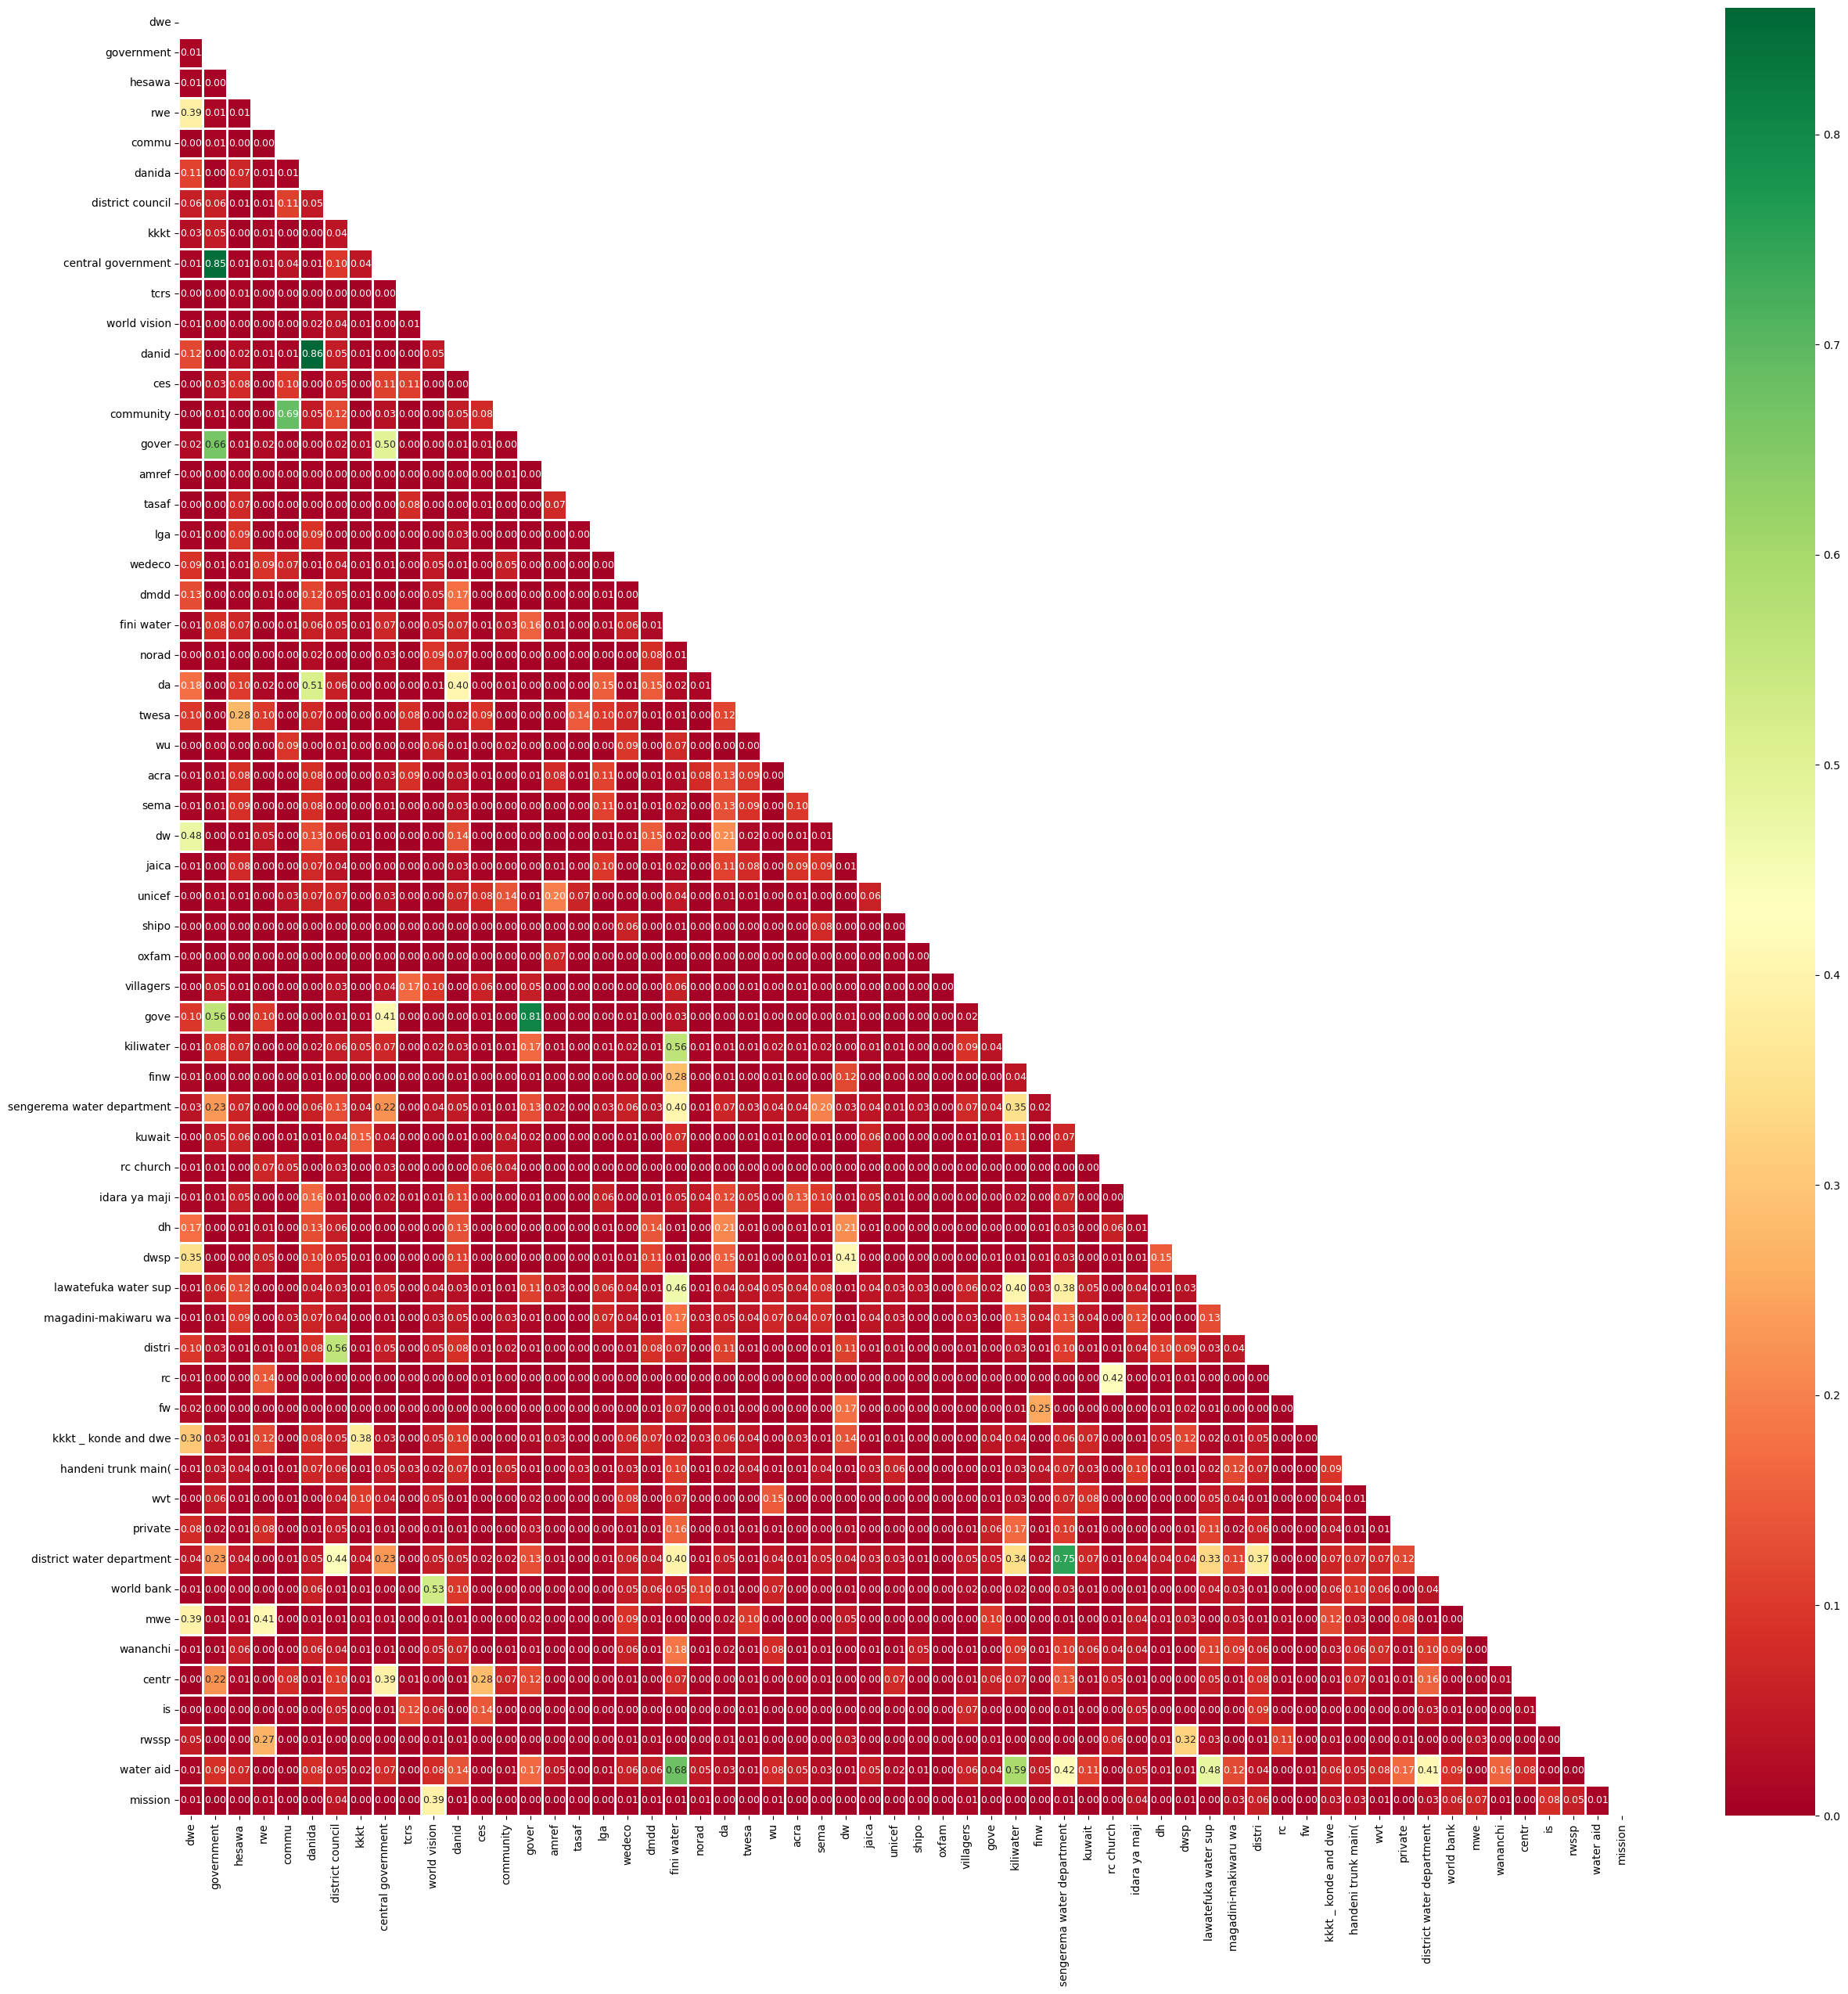

In [15]:
df=process_installers(df, 'installer', 'id', encode_and_plot, 150)

In [ ]:
#FUNDER:

In [16]:
#set al entries to lowercase
df['funder'] = df['funder'].str.lower()


funder = df.groupby('funder')['id'].count().reset_index()
funder = funder.sort_values('id', ascending = False)
funder.head(10)

funder     id
506   government of tanzania  11299
292                   danida   3907
572                   hesawa   2782
1598                   rwssp   1703
2105              world bank   1701
807                     kkkt   1623
2107            world vision   1562
1960                  unicef   1324
1840                   tasaf   1135
326                      dhv   1065

In [17]:
#create list of top 150 funders
top_funders = funder.nlargest(150, 'id')['funder'].unique()

#replace funders that are not in top 150 with 'other'
df['funder'] = np.where(df['funder'].isin(top_funders), df['funder'], 'other')

In [ ]:
#CONSTRUCTION YEAR:

In [18]:
#because of the wide spread of construction years, I don't want to impude by the overall mean
df['construction_year'].min(),  df['construction_year'].max() , df['construction_year'].mean()

(1960.0, 2013.0, 1996.8709430210642)

In [19]:
#We can see that the mean construction year by extraction type group gives much more detailed information
mean_construction = df.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction

extraction_type_group  construction_year
0                afridev        2002.215589
1                gravity        1996.014441
2          india mark ii        2001.187973
3         india mark iii        2003.975904
4                   mono        1992.824017
5            nira/tanira        1999.523877
6                  other        1993.272477
7         other handpump        2000.594203
8        other motorpump        2011.400000
9              rope pump        2005.634888
10           submersible        1999.372897
11                swn 80        1996.607039
12          wind-powered        1996.012346

In [20]:
#create df with the mean extraction year by extraction type group
mean_construction = df.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction  = mean_construction .rename(columns={"construction_year": "imputed_construction_year"})

#merge this df to the main df and replace missing values
df = df.merge(mean_construction, how =  'left', on =  'extraction_type_group')
df['construction_year_imputed'] = np.where(df['construction_year'].isna(), df['imputed_construction_year'], df['construction_year'] )

#drop redundant columns
df=df.drop(['imputed_construction_year', 'construction_year'], axis=1)

In [ ]:
#GPS HEIGHT

Tanzania's geographical location is above sea level, making any negative readings for GPS height inaccurate. Typically, the GPS altitude has a standard error margin of ±15 meters, which is reliable 95% of the time. In the remaining 5%, the readings can vary widely. However, it's unclear whether the GPS height refers to the water level or the well's location. Had this been certain, I would have adjusted all negative values to zero. Approximately 2.5% of the data shows negative altitudes. To address this, I plan to impute missing values using the average of regional characteristics.

In [21]:
import pandas as pd
import numpy as np

def impute_gps_height(df, region_col, lga_col, ward_col, subvillage_col, basin_col, gps_height_col):
    # Function to calculate mean GPS height for different granularity levels
    def calculate_mean_gps_height(df, groupby_cols, new_col_name):
        mean_df = df.groupby(groupby_cols)[gps_height_col].mean().reset_index()
        mean_df = mean_df.rename(columns={gps_height_col: new_col_name})
        return mean_df

    # Calculate mean GPS height at different levels
    subvillage_means = calculate_mean_gps_height(df, [region_col, lga_col, ward_col, subvillage_col], "gps_height_imputed_subvillage")
    ward_means = calculate_mean_gps_height(df, [region_col, lga_col, ward_col], "gps_height_imputed_ward")
    lga_means = calculate_mean_gps_height(df, [region_col, lga_col], "gps_height_imputed_lga")
    region_means = calculate_mean_gps_height(df, [region_col], "gps_height_imputed_region")
    basin_means = calculate_mean_gps_height(df, [basin_col], "gps_height_imputed_basin")

    # Merge the aggregated dataframes as new columns to the original dataframe
    df = df.merge(subvillage_means, how='left', on=[region_col, lga_col, ward_col, subvillage_col])
    df = df.merge(ward_means, how='left', on=[region_col, lga_col, ward_col])
    df = df.merge(lga_means, how='left', on=[region_col, lga_col])
    df = df.merge(region_means, how='left', on=[region_col])
    df = df.merge(basin_means, how='left', on=[basin_col])

    # Initialize imputed_gps_height column
    df['imputed_gps_height'] = df[gps_height_col]

    # Impute missing GPS height values
    imputation_cols = [
        'gps_height_imputed_subvillage', 'gps_height_imputed_ward',
        'gps_height_imputed_lga', 'gps_height_imputed_region', 'gps_height_imputed_basin'
    ]

    for col in imputation_cols:
        df['imputed_gps_height'] = np.where(df['imputed_gps_height'].isna(), df[col], df['imputed_gps_height'])

    # Drop redundant columns
    df = df.drop(imputation_cols + [gps_height_col], axis=1)

    return df

# Usage example:
# df_modified = impute_gps_height(df, 'region', 'lga', 'ward', 'subvillage', 'basin', 'gps_height')


In [22]:
df=impute_gps_height(df, 'region', 'lga', 'ward', 'subvillage', 'basin', 'gps_height')

In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
#POPULATION

In [23]:
import pandas as pd
import numpy as np

def impute_population(df, region_col, lga_col, ward_col, subvillage_col, basin_col, population_col):
    # Function to calculate mean population for different granularity levels
    def calculate_mean_population(df, groupby_cols, new_col_name):
        mean_df = df.groupby(groupby_cols)[population_col].mean().reset_index()
        mean_df = mean_df.rename(columns={population_col: new_col_name})
        return mean_df

    # Calculate mean population at different levels
    subvillage_means = calculate_mean_population(df, [region_col, lga_col, ward_col, subvillage_col], "population_imputed_subvillage")
    ward_means = calculate_mean_population(df, [region_col, lga_col, ward_col], "population_imputed_ward")
    lga_means = calculate_mean_population(df, [region_col, lga_col], "population_imputed_lga")
    region_means = calculate_mean_population(df, [region_col], "population_imputed_region")
    basin_means = calculate_mean_population(df, [basin_col], "population_imputed_basin")

    # Merge the aggregated dataframes as new columns to the original dataframe
    df = df.merge(subvillage_means, how='left', on=[region_col, lga_col, ward_col, subvillage_col])
    df = df.merge(ward_means, how='left', on=[region_col, lga_col, ward_col])
    df = df.merge(lga_means, how='left', on=[region_col, lga_col])
    df = df.merge(region_means, how='left', on=[region_col])
    df = df.merge(basin_means, how='left', on=[basin_col])

    # Initialize imputed_population column
    df['imputed_population'] = df[population_col]

    # Impute missing population values
    imputation_cols = [
        'population_imputed_subvillage', 'population_imputed_ward',
        'population_imputed_lga', 'population_imputed_region', 'population_imputed_basin'
    ]

    for col in imputation_cols:
        df['imputed_population'] = np.where(df['imputed_population'].isna(), df[col], df['imputed_population'])

    # Drop redundant columns
    df = df.drop(imputation_cols + [population_col], axis=1)

    return df

# Usage example:
# df_modified = 

In [24]:
df=impute_population(df, 'region', 'lga', 'ward', 'subvillage', 'basin', 'population')

In [ ]:
df.info()

DATA TYPE:

In [ ]:
df.info()

In [25]:
#replace string to integer
df['public_meeting'] = df['public_meeting'].replace({True: 1, False: 0})
df['imputed_permit'] = df['imputed_permit'].replace({True: 1, False: 0})


#change to integer
df[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']] = df[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']].astype('int')

#change type to categorical
df[[ 'num_private', 'region_code', 'district_code']] = df[[ 'num_private', 'region_code', 'district_code']].astype('str')

#remove decimal
df['district_code'] = df['district_code'].str.split(".").str[0]

In [ ]:
df.info()

In [26]:
# Define a dictionary for renaming columns
rename_dict = {
    "imputed_permit": "permit", 
    "imputed_scheme_management": "scheme_management",
    "imputed_gps_height": "gps_height", 
    'construction_year_imputed': 'construction_year', 
    'imputed_population': 'population', 
    'imputed_longitude': 'longitude'
}

# Rename the columns using the dictionary
df = df.rename(columns=rename_dict, errors="raise")

In [ ]:
df.to_csv("PUMPITUP_CLEAN_DATASET.csv")

In [ ]:
df.head()

FEATURE ENGINEERING:

In [27]:
modeldata = df.copy()

In [ ]:
#age:

In [28]:
#create age feature
modeldata['recorded_year'] = pd.DatetimeIndex(modeldata ['date_recorded']).year
modeldata[ 'age'] = modeldata['recorded_year'] - modeldata['construction_year']
modeldata = modeldata.drop('recorded_year',axis=1)

In [ ]:
#season:

In [29]:
modeldata['month'] = pd.DatetimeIndex(modeldata['date_recorded']).month

# season encoder
season_mapper = {1: 'short dry',2:'short dry', 3: 'long rain', 4: 'long rain', 5: 'long rain',6: 'long dry', 
                 7: 'long dry', 8: 'long dry', 9: 'long dry', 10: 'long dry', 11:'short rain', 12:'short rain'}
#.p feature values to scale
modeldata['season']=modeldata['month'].replace(season_mapper)
modeldata=modeldata.drop('month', axis=1)

In [30]:
distribution_checker(modeldata, 'season')

nr_pumps  perc_total_pumps  perc_functional  perc_non_functional  \
season                                                                         
long dry       16432              27.7             51.5                 41.6   
long rain      22242              37.4             59.8                 34.1   
short dry      18756              31.6             50.4                 40.3   
short rain      1969               3.3             52.4                 43.0   

            perc_functional_needs_repair  
season                                    
long dry                             6.9  
long rain                            6.1  
short dry                            9.3  
short rain                           4.6

In [ ]:
#amount tsh

In [31]:
#where amount tsh isn't missing, the percentage of functional pumps is a lot higher
modeldata['amount_tsh_missing'] = np.where( modeldata['amount_tsh'].isna(), 1, 0)
distribution_checker(modeldata, 'amount_tsh_missing')

nr_pumps  perc_total_pumps  perc_functional  \
amount_tsh_missing                                                
0                      17761              29.9             70.7   
1                      41638              70.1             47.3   

                    perc_non_functional  perc_functional_needs_repair  
amount_tsh_missing                                                     
0                                  22.2                           7.1  
1                                  45.4                           7.3

In [ ]:
#region district

In [32]:
modeldata['region_district'] = modeldata['region']+ "-" + modeldata['district_code']
region_district = distribution_checker(modeldata,  'region_district')
region_district.head()

nr_pumps  perc_total_pumps  perc_functional  \
region_district                                                
Arusha-1              189               0.3             50.3   
Arusha-2             1206               2.0             69.6   
Arusha-3              109               0.2             71.6   
Arusha-30             326               0.5             96.9   
Arusha-5              201               0.3             54.2   

                 perc_non_functional  perc_functional_needs_repair  
region_district                                                     
Arusha-1                        33.9                          15.9  
Arusha-2                        26.6                           3.8  
Arusha-3                        20.2                           8.3  
Arusha-30                        2.8                           0.3  
Arusha-5                        31.8                          13.9

In [ ]:
#coordinates:

In [33]:
#two decimal places is 1.1 km accurate. This will provide enough information on the location. Using the full coordinate doesn't provide a lot of general information, but does result in high cardinality
modeldata['longitude'] = round(modeldata['longitude'], 2)
modeldata['latitude'] = round(modeldata['latitude'],2)

In [ ]:
#extraction

In [34]:
modeldata.groupby([  'extraction_type_class', 'extraction_type_group', 'extraction_type'])['id'].count().reset_index()

extraction_type_class extraction_type_group            extraction_type  \
0                gravity               gravity                    gravity   
1               handpump               afridev                    afridev   
2               handpump         india mark ii              india mark ii   
3               handpump        india mark iii             india mark iii   
4               handpump           nira/tanira                nira/tanira   
5               handpump        other handpump  other - mkulima/shinyanga   
6               handpump        other handpump          other - play pump   
7               handpump        other handpump             other - swn 81   
8               handpump        other handpump                     walimi   
9               handpump                swn 80                     swn 80   
10             motorpump                  mono                       mono   
11             motorpump       other motorpump                       cemo   
12             motorpump       other motorpump                     climax   
13                 other                 other                      other   
14             rope pump             rope pump          other - rope pump   
15           submersible           submersible                        ksb   
16           submersible           submersible                submersible   
17          wind-powered          wind-powered                   windmill   

       id  
0   33263  
1    2207  
2    3029  
3     135  
4   10205  
5       2  
6     101  
7     284  
8      60  
9    4588  
10   3628  
11    108  
12     41  
13   8102  
14    572  
15   1790  
16   5982  
17    152

In [35]:
#i want to keep extraction type class and I will group the extraction type group en type together

#swn 80 and swn 81 become swn
#cemo + climax become other motorpump
# other -mkulima, other -play and walimi become other handpump

swn = ['other - swn 81', 'swn80']
modeldata['extraction_type'] =np.where(modeldata['extraction_type'].isin(swn), 'swn',  modeldata['extraction_type'])

other_handpump = ['other - mkulima/shinyanga', 'other - play pump', 'other - walimi']
modeldata['extraction_type']=np.where(modeldata['extraction_type'].isin(other_handpump), 'other handpump',  modeldata['extraction_type'])

other_motorpump = ['cemo', 'climax']
modeldata['extraction_type'] =np.where(modeldata['extraction_type'].isin(other_motorpump), 'other motorpump',  modeldata['extraction_type'])

In [ ]:
#autonomy:

In [36]:
#autonomous = government, VWC, town council ..... also water authority?, parastatal (=state company)? SWC?
#autonomous = WUA, WUG, board, trust, school
#private = private, company

non = ['VWC', 'Water authority', 'Parastatal', 'SWC']
autonomous = ['WUG', 'WUA', 'Water Board', 'Trust']
private = ['Company', 'Private operator']
other = ['None', 'Other']

modeldata['authority_scheme'] = modeldata['scheme_management']
modeldata.loc[modeldata['authority_scheme'].isin(non),'authority_scheme']='non-autonomous'
modeldata.loc[modeldata['authority_scheme'].isin(autonomous ),'authority_scheme']='autonomous'
modeldata.loc[modeldata['authority_scheme'].isin(private),'authority_scheme']='private'
modeldata.loc[modeldata['authority_scheme'].isin(other ),'authority_scheme']='other'

In [37]:
autonomy = distribution_checker(modeldata, 'authority_scheme')
autonomy= autonomy.sort_values('nr_pumps', ascending= False)
autonomy

nr_pumps  perc_total_pumps  perc_functional  \
authority_scheme                                                
non-autonomous       44653              75.2             51.2   
autonomous           11549              19.4             64.6   
private               2244               3.8             60.1   
other                  953               1.6             61.5   

                  perc_non_functional  perc_functional_needs_repair  
authority_scheme                                                     
non-autonomous                   41.7                           7.1  
autonomous                       26.5                           8.9  
private                          37.1                           2.8  
other                            34.6                           3.9

In [ ]:
#source type

In [38]:
#source type by source class
modeldata.groupby([  'source_class', 'source_type','source' ])['id'].count().reset_index()

source_class           source_type                source     id
0  groundwater              borehole              hand dtw   1108
1  groundwater              borehole           machine dbh  13822
2  groundwater          shallow well          shallow well  21139
3  groundwater                spring                spring  21216
4      surface                   dam                   dam    840
5      surface  rainwater harvesting  rainwater harvesting   2863
6      surface            river/lake                  lake    950
7      surface            river/lake                 river  11964
8      unknown                 other                 other    261
9      unknown                 other               unknown     86

In [39]:
#keep source, but the rare classes will be put together
other = ['other',  'unknown']
modeldata['source'] = np.where(modeldata['source']=='unknown', 'other', modeldata['source'])

In [ ]:
#drop not required colls:

In [40]:
#during EDA I already decided what features to keep and which ones to drop
modeldata = modeldata.drop(['amount_tsh', 'date_recorded', 'wpt_name', 'num_private', 'subvillage', 'region',  'district_code', 'lga', 'ward', 'recorded_by', 'scheme_name', 'extraction_type_group', 'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group', 'construction_year'], axis=1)
modeldata.head()

id    status_group   funder     installer  latitude  \
0  69572      functional    roman         roman     -9.86   
1   8776      functional  grumeti       grumeti     -2.15   
2  34310      functional    other  world vision     -3.82   
3  67743  non functional   unicef        unicef    -11.16   
4  19728      functional    other       artisan     -1.83   

                     basin region_code  public_meeting extraction_type  \
0               Lake Nyasa          11               1         gravity   
1            Lake Victoria          20               1         gravity   
2                  Pangani          21               1         gravity   
3  Ruvuma / Southern Coast          90               1     submersible   
4            Lake Victoria          18               1         gravity   

  extraction_type_class  ... longitude permit scheme_management gps_height  \
0               gravity  ...     34.94      0               VWC       1390   
1               gravity  ...     34.70      1             Other       1399   
2               gravity  ...     37.46      1               VWC        686   
3           submersible  ...     38.49      1               VWC        263   
4               gravity  ...     31.13      1             Other       1328   

  population  age     season amount_tsh_missing  region_district  \
0        109   12  long rain                  0         Iringa-5   
1        280    3  long rain                  1           Mara-2   
2        250    4  short dry                  0        Manyara-4   
3         58   27  short dry                  1        Mtwara-63   
4        532   15   long dry                  1         Kagera-1   

   authority_scheme  
0    non-autonomous  
1             other  
2    non-autonomous  
3    non-autonomous  
4             other  

[5 rows x 25 columns]

In [ ]:
#encoding:

In [41]:
#define train and test 
train_set = modeldata [modeldata ["id"].isin(train_values["id"])]
test_set =  modeldata  [modeldata ["id"].isin(test_values["id"])]

In [42]:
X = train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

In [43]:
categorical_cols = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

categorical_cols

['funder',
 'installer',
 'basin',
 'region_code',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'scheme_management',
 'season',
 'region_district',
 'authority_scheme']

In [44]:
# Encode Categorical Columns 
for col in categorical_cols:
  le = LabelEncoder()
  train_set[col] = le.fit_transform(train_set[col])
  test_set[col] = le.transform(test_set[col])

/var/folders/0b/3t3ybbj57qz9mgtyr3khlc1w0000gn/T/ipykernel_50081/3482595570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[col] = le.fit_transform(train_set[col])
/var/folders/0b/3t3ybbj57qz9mgtyr3khlc1w0000gn/T/ipykernel_50081/3482595570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[col] = le.transform(test_set[col])
/var/folders/0b/3t3ybbj57qz9mgtyr3khlc1w0000gn/T/ipykernel_50081/3482595570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [45]:
#merge the encoded train and test sets together
modeldata = train_set.append(test_set)
modeldata.head()

/var/folders/0b/3t3ybbj57qz9mgtyr3khlc1w0000gn/T/ipykernel_50081/3014191330.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modeldata = train_set.append(test_set)


id    status_group  funder  installer  latitude  basin  region_code  \
0  69572      functional     107        108     -9.86      1            2   
1   8776      functional      45         47     -2.15      4           12   
2  34310      functional      95        148     -3.82      5           13   
3  67743  non functional     136        129    -11.16      7           25   
4  19728      functional      95          7     -1.83      4            9   

   public_meeting  extraction_type  extraction_type_class  ...  longitude  \
0               1                1                      0  ...      34.94   
1               1                1                      0  ...      34.70   
2               1                1                      0  ...      37.46   
3               1               11                      5  ...      38.49   
4               1                1                      0  ...      31.13   

   permit  scheme_management  gps_height  population  age  season  \
0       0                  7        1390         109   12       1   
1       1                  2        1399         280    3       1   
2       1                  7         686         250    4       2   
3       1                  7         263          58   27       2   
4       1                  2        1328         532   15       0   

   amount_tsh_missing  region_district  authority_scheme  
0                   0               20                 1  
1                   1               55                 2  
2                   0               52                 1  
3                   1               76                 1  
4                   1               22                 2  

[5 rows x 25 columns]

In [ ]:
modeldata.to_csv("data for modeling.csv")

In [46]:
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74249 entries, 0 to 74248
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74249 non-null  int64  
 1   status_group           59399 non-null  object 
 2   funder                 74249 non-null  int64  
 3   installer              74249 non-null  int64  
 4   latitude               74249 non-null  float64
 5   basin                  74249 non-null  int64  
 6   region_code            74249 non-null  int64  
 7   public_meeting         74249 non-null  int64  
 8   extraction_type        74249 non-null  int64  
 9   extraction_type_class  74249 non-null  int64  
 10  payment_type           74249 non-null  int64  
 11  water_quality          74249 non-null  int64  
 12  quantity               74249 non-null  int64  
 13  source                 74249 non-null  int64  
 14  waterpoint_type        74249 non-null  int64  
 15  lo

In [47]:
# Replaced the target variable with 0,1,2

replacement_dict = {'functional': 0, 
                    'functional needs repair': 1, 
                    'non functional': 2}
modeldata['status_group'] = modeldata['status_group'].replace(replacement_dict)

MACHINE LEARNING MODEL:

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
import shap

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
#define train and test 
train_set = modeldata [modeldata ["id"].isin(train_values["id"])]
test_set =  modeldata [modeldata  ["id"].isin(test_values["id"])]

In [50]:
#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

In [ ]:
#RANDOM FOREST:

In [51]:
#using grid seach cv

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'n_estimators': [ 150, 175,  200, 225],
             'max_features':['log2', ],
             'max_depth' : [30 , 40, 50, 60, 70],      
             'min_samples_split':[6, 7, 8, 9, 10]}



#Create a based model
rf =     RandomForestClassifier( random_state=42, warm_start = True)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_rf .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_rf .best_score_)
print('Parameters:', grid_search_rf .best_params_)
print('Best Model:', grid_search_rf .best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

Accuracy score train: 0.8956206990887855
Accuracy score test: 0.8105218855218855

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      6452
         1.0       0.64      0.25      0.36       863
         2.0       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.67     11880
weighted avg       0.81      0.81      0.80     11880

Cross-validation scores:  [0.80555556 0.80429293 0.81755051 0.81155303 0.80587121 0.81281566
 0.80744949 0.81439394 0.80650253 0.8147096  0.80681818 0.81376263
 0.81691919 0.80965909 0.81180928]
Mean CV Score:  0.8106441879057921


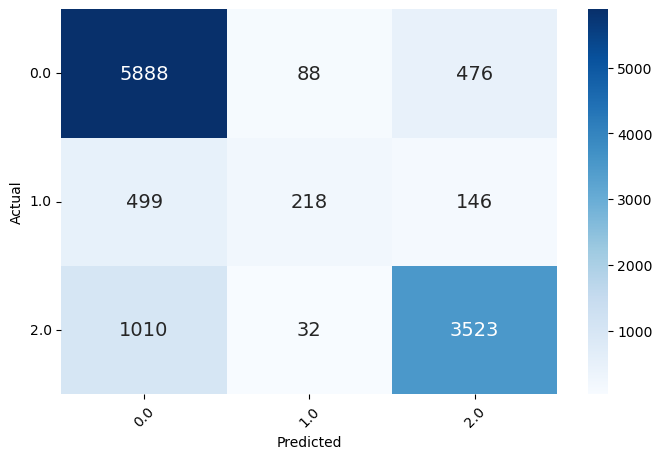

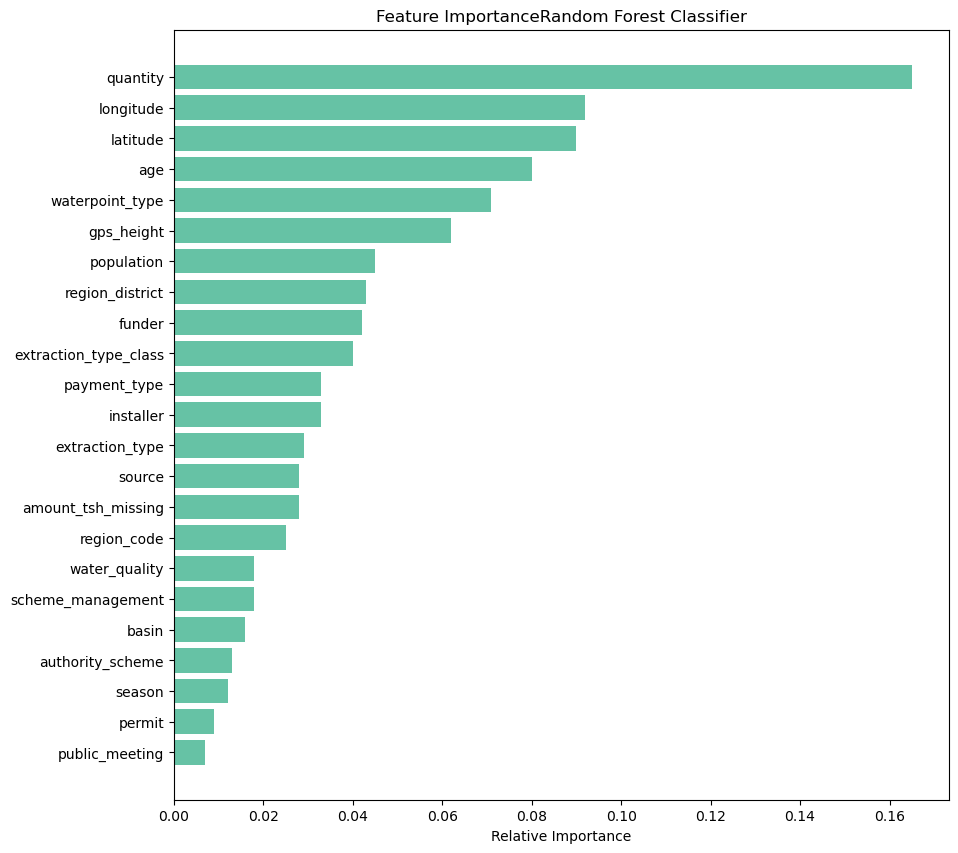

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Assuming confusion_matrix_plotter and feature_importances are defined functions
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the best model

#ORIGNAL
#best_model = RandomForestClassifier(max_depth=30,
                                    #max_features='log2', 
                                    #min_samples_split=7,
                                    #n_estimators=225, 
                                    #random_state=42, 
                                    #warm_start=True)

best_model = RandomForestClassifier(max_depth=25, max_features='log2', min_samples_split=10,
                                    n_estimators=284, random_state=42, warm_start=True)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Print accuracy scores
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_plotter(y_test, y_pred)

# Show feature importances
feature_importances(best_model, "Random Forest Classifier")

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=15)  # Using 5-fold cross-validation

# Print cross-validation results
print("Cross-validation scores: ", cv_scores)
print("Mean CV Score: ", cv_scores.mean())

In [ ]:
#XGBOOST:

In [57]:
#USING GRID SEACH CV

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


param_grid = { 'n_estimators': [ 100,200,300,400 ],
              'colsample_bytree' :[  0.2,0.3,0.4,0.5 ],
              'eta': [0.2,0.3,0.4],
             'max_depth': [10,12,13,14]}


#Create a based model
xgb =     XGBClassifier( random_state=42)

grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_xgb .fit(X_train, y_train,  eval_metric = 'mlogloss',)

#print best parameters 
print('Best Score:', grid_search_xgb .best_score_)
print('Parameters:', grid_search_xgb .best_params_)
print('Best Model:', grid_search_xgb .best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=   1.7s


KeyboardInterrupt: 

Accuracy score train: 0.9467160504219365
Accuracy score test: 0.810016835016835

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      6452
         1.0       0.57      0.31      0.40       863
         2.0       0.84      0.79      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.74      0.66      0.69     11880
weighted avg       0.80      0.81      0.80     11880

Cross-validation scores:  [0.79734848 0.80271465 0.80839646 0.80145202 0.79766414 0.80808081
 0.79924242 0.80871212 0.80397727 0.80429293 0.80018939 0.81502525
 0.80776515 0.80776515 0.80865172]
Mean CV Score:  0.8047518655665168


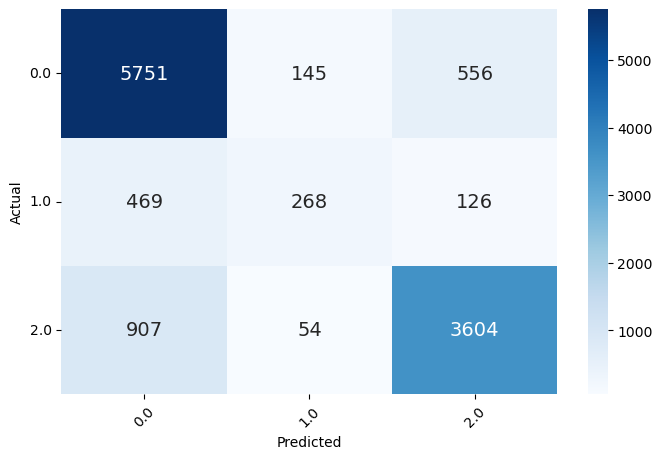

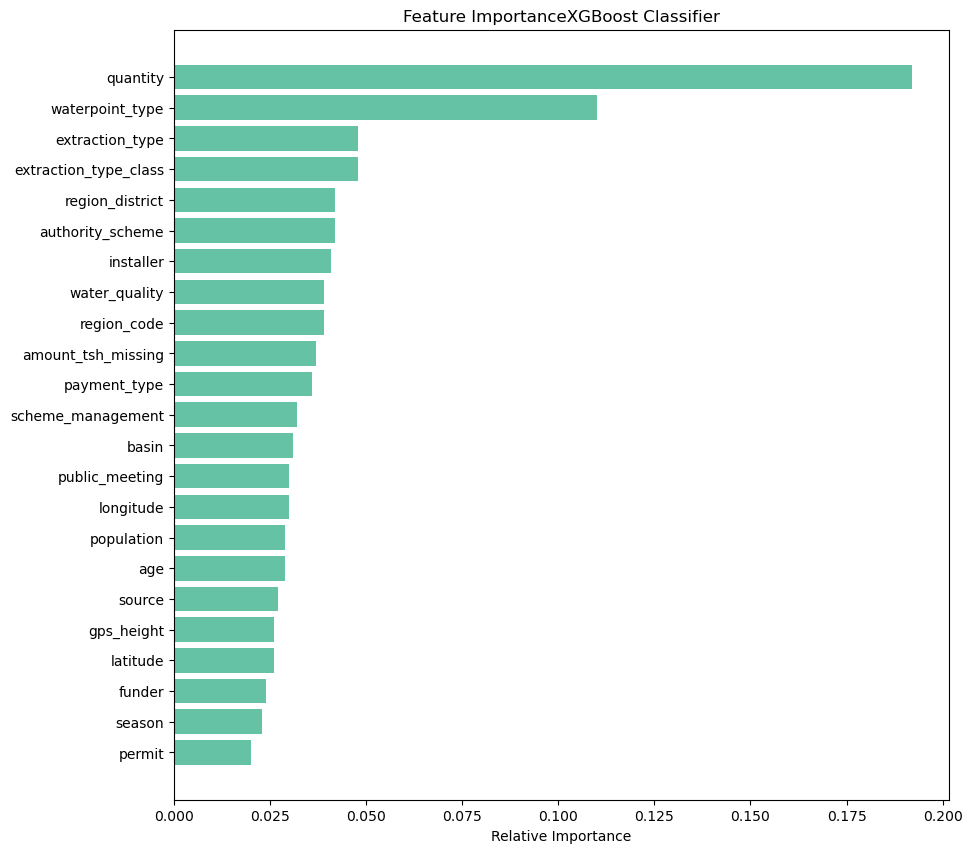

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Assuming confusion_matrix_plotter and feature_importances are defined functions
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the best model
#best_model = XGBClassifier(random_state=42, n_estimators=200, colsample_bytree=0.3, eta=0.2, max_depth=12)

#{'n_estimators': 255, 'colsample_bytree': 0.3, 'eta': 0.2, 'max_depth': 12}
best_model = XGBClassifier(random_state=42, n_estimators=225, colsample_bytree=0.3, eta=0.2, max_depth=12)

# Fit the model on the training data
best_model.fit(X_train, y_train, eval_metric='mlogloss')

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Print accuracy scores
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_plotter(y_test, y_pred)

# Show feature importances
feature_importances(best_model, "XGBoost Classifier")

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=15, scoring='accuracy')  # Using 5-fold cross-validation

# Print cross-validation results
print("Cross-validation scores: ", cv_scores)
print("Mean CV Score: ", cv_scores.mean())

In [ ]:
#CATBOOST:

In [55]:
#USING OPTUNA:

import optuna
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 7, 16),
        'iterations': trial.suggest_categorical('iterations', [1000, 750]),
        'rsm': trial.suggest_float('rsm', 0.2, 0.5)
    }

    cat = CatBoostClassifier(random_state=42, **param)
    cat.fit(X_train, y_train, verbose=False)
    score = cat.score(X_test, y_test)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can change the number of trials

best_params = study.best_params
best_score = study.best_value

print('Best Score:', best_score)
print('Best Parameters:', best_params)

# Retrain the model with best parameters
best_model = CatBoostClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

#Best Score: 0.8074915824915825
#Best Parameters: {'max_depth': 10, 'iterations': 1000, 'rsm': 0.4242391119783712}


[I 2023-11-27 00:22:19,040] A new study created in memory with name: no-name-3353e0be-037b-4a4d-8e74-3758698eee05
[I 2023-11-27 00:22:23,476] Trial 0 finished with value: 0.7996632996632996 and parameters: {'max_depth': 7, 'iterations': 750, 'rsm': 0.3170109822437795}. Best is trial 0 with value: 0.7996632996632996.
[I 2023-11-27 00:22:55,090] Trial 1 finished with value: 0.802946127946128 and parameters: {'max_depth': 12, 'iterations': 1000, 'rsm': 0.41741503692547627}. Best is trial 1 with value: 0.802946127946128.
[I 2023-11-27 00:25:26,848] Trial 2 finished with value: 0.7986531986531986 and parameters: {'max_depth': 14, 'iterations': 1000, 'rsm': 0.4358382211715315}. Best is trial 1 with value: 0.802946127946128.
[I 2023-11-27 00:25:32,579] Trial 3 finished with value: 0.8001683501683502 and parameters: {'max_depth': 7, 'iterations': 750, 'rsm': 0.4795430613892431}. Best is trial 1 with value: 0.802946127946128.
[I 2023-11-27 00:26:00,404] Trial 4 finished with value: 0.8036195286

[I 2023-11-27 00:53:30,842] Trial 40 finished with value: 0.8013468013468014 and parameters: {'max_depth': 13, 'iterations': 1000, 'rsm': 0.3639436721254536}. Best is trial 17 with value: 0.806986531986532.
[I 2023-11-27 00:53:49,108] Trial 41 finished with value: 0.8055555555555556 and parameters: {'max_depth': 11, 'iterations': 1000, 'rsm': 0.3947338963688139}. Best is trial 17 with value: 0.806986531986532.
[I 2023-11-27 00:54:07,235] Trial 42 finished with value: 0.8063973063973064 and parameters: {'max_depth': 11, 'iterations': 1000, 'rsm': 0.3941404306006735}. Best is trial 17 with value: 0.806986531986532.
[I 2023-11-27 00:54:19,063] Trial 43 finished with value: 0.8048821548821549 and parameters: {'max_depth': 10, 'iterations': 1000, 'rsm': 0.39171288514765806}. Best is trial 17 with value: 0.806986531986532.
[I 2023-11-27 00:54:50,332] Trial 44 finished with value: 0.8038720538720538 and parameters: {'max_depth': 12, 'iterations': 1000, 'rsm': 0.42056528262452975}. Best is tri

[I 2023-11-27 01:04:51,633] Trial 80 finished with value: 0.80496632996633 and parameters: {'max_depth': 11, 'iterations': 750, 'rsm': 0.43508667310148896}. Best is trial 62 with value: 0.8074915824915825.
[I 2023-11-27 01:05:00,304] Trial 81 finished with value: 0.8037037037037037 and parameters: {'max_depth': 9, 'iterations': 1000, 'rsm': 0.4125702646936823}. Best is trial 62 with value: 0.8074915824915825.
[I 2023-11-27 01:05:12,544] Trial 82 finished with value: 0.8058080808080809 and parameters: {'max_depth': 10, 'iterations': 1000, 'rsm': 0.39493929145683604}. Best is trial 62 with value: 0.8074915824915825.
[I 2023-11-27 01:05:24,820] Trial 83 finished with value: 0.805976430976431 and parameters: {'max_depth': 10, 'iterations': 1000, 'rsm': 0.42426988308253294}. Best is trial 62 with value: 0.8074915824915825.
[I 2023-11-27 01:05:43,208] Trial 84 finished with value: 0.8034511784511784 and parameters: {'max_depth': 11, 'iterations': 1000, 'rsm': 0.41359229950104964}. Best is tr

Best Score: 0.8074915824915825
Best Parameters: {'max_depth': 10, 'iterations': 1000, 'rsm': 0.4242391119783712}
Learning rate set to 0.096348
0:	learn: 1.0285400	total: 12.5ms	remaining: 12.5s
1:	learn: 0.9728939	total: 24.1ms	remaining: 12s
2:	learn: 0.9275039	total: 35ms	remaining: 11.6s
3:	learn: 0.8879779	total: 49ms	remaining: 12.2s
4:	learn: 0.8538801	total: 60.6ms	remaining: 12.1s
5:	learn: 0.8238454	total: 72.9ms	remaining: 12.1s
6:	learn: 0.7991509	total: 84.3ms	remaining: 12s
7:	learn: 0.7774065	total: 97ms	remaining: 12s
8:	learn: 0.7591463	total: 117ms	remaining: 12.9s
9:	learn: 0.7418263	total: 129ms	remaining: 12.8s
10:	learn: 0.7275100	total: 142ms	remaining: 12.8s
11:	learn: 0.7156344	total: 153ms	remaining: 12.6s
12:	learn: 0.7032154	total: 167ms	remaining: 12.7s
13:	learn: 0.6937102	total: 178ms	remaining: 12.5s
14:	learn: 0.6846268	total: 190ms	remaining: 12.4s
15:	learn: 0.6754030	total: 200ms	remaining: 12.3s
16:	learn: 0.6676081	total: 213ms	remaining: 12.3s
17:	

168:	learn: 0.4521117	total: 2.04s	remaining: 10s
169:	learn: 0.4518270	total: 2.05s	remaining: 10s
170:	learn: 0.4514408	total: 2.06s	remaining: 10s
171:	learn: 0.4511578	total: 2.08s	remaining: 10s
172:	learn: 0.4504369	total: 2.09s	remaining: 9.99s
173:	learn: 0.4499751	total: 2.1s	remaining: 9.98s
174:	learn: 0.4494042	total: 2.11s	remaining: 9.97s
175:	learn: 0.4489092	total: 2.13s	remaining: 9.96s
176:	learn: 0.4484255	total: 2.14s	remaining: 9.94s
177:	learn: 0.4479851	total: 2.15s	remaining: 9.93s
178:	learn: 0.4475419	total: 2.16s	remaining: 9.92s
179:	learn: 0.4469862	total: 2.17s	remaining: 9.91s
180:	learn: 0.4466833	total: 2.19s	remaining: 9.89s
181:	learn: 0.4463641	total: 2.2s	remaining: 9.88s
182:	learn: 0.4458952	total: 2.21s	remaining: 9.87s
183:	learn: 0.4454615	total: 2.22s	remaining: 9.86s
184:	learn: 0.4450665	total: 2.23s	remaining: 9.85s
185:	learn: 0.4447159	total: 2.25s	remaining: 9.83s
186:	learn: 0.4443443	total: 2.26s	remaining: 9.82s
187:	learn: 0.4438635	

339:	learn: 0.3917044	total: 4.1s	remaining: 7.97s
340:	learn: 0.3914418	total: 4.12s	remaining: 7.95s
341:	learn: 0.3912687	total: 4.13s	remaining: 7.94s
342:	learn: 0.3910549	total: 4.14s	remaining: 7.93s
343:	learn: 0.3908468	total: 4.15s	remaining: 7.92s
344:	learn: 0.3903710	total: 4.16s	remaining: 7.91s
345:	learn: 0.3901780	total: 4.18s	remaining: 7.89s
346:	learn: 0.3899952	total: 4.19s	remaining: 7.88s
347:	learn: 0.3896450	total: 4.2s	remaining: 7.87s
348:	learn: 0.3892497	total: 4.21s	remaining: 7.86s
349:	learn: 0.3890606	total: 4.22s	remaining: 7.84s
350:	learn: 0.3888250	total: 4.24s	remaining: 7.83s
351:	learn: 0.3884802	total: 4.25s	remaining: 7.82s
352:	learn: 0.3880731	total: 4.26s	remaining: 7.81s
353:	learn: 0.3878889	total: 4.27s	remaining: 7.8s
354:	learn: 0.3876235	total: 4.29s	remaining: 7.79s
355:	learn: 0.3874559	total: 4.3s	remaining: 7.78s
356:	learn: 0.3872205	total: 4.31s	remaining: 7.76s
357:	learn: 0.3870068	total: 4.32s	remaining: 7.75s
358:	learn: 0.38

512:	learn: 0.3522717	total: 6.16s	remaining: 5.85s
513:	learn: 0.3521850	total: 6.17s	remaining: 5.84s
514:	learn: 0.3519374	total: 6.19s	remaining: 5.83s
515:	learn: 0.3518386	total: 6.2s	remaining: 5.82s
516:	learn: 0.3516109	total: 6.22s	remaining: 5.81s
517:	learn: 0.3514821	total: 6.23s	remaining: 5.79s
518:	learn: 0.3512906	total: 6.24s	remaining: 5.78s
519:	learn: 0.3510018	total: 6.25s	remaining: 5.77s
520:	learn: 0.3508221	total: 6.26s	remaining: 5.76s
521:	learn: 0.3506323	total: 6.27s	remaining: 5.75s
522:	learn: 0.3503872	total: 6.29s	remaining: 5.73s
523:	learn: 0.3502129	total: 6.3s	remaining: 5.72s
524:	learn: 0.3500945	total: 6.31s	remaining: 5.71s
525:	learn: 0.3500070	total: 6.32s	remaining: 5.7s
526:	learn: 0.3497927	total: 6.33s	remaining: 5.68s
527:	learn: 0.3495543	total: 6.34s	remaining: 5.67s
528:	learn: 0.3494139	total: 6.36s	remaining: 5.66s
529:	learn: 0.3492679	total: 6.37s	remaining: 5.65s
530:	learn: 0.3489763	total: 6.38s	remaining: 5.64s
531:	learn: 0.3

685:	learn: 0.3238979	total: 8.23s	remaining: 3.77s
686:	learn: 0.3237654	total: 8.24s	remaining: 3.75s
687:	learn: 0.3236879	total: 8.26s	remaining: 3.74s
688:	learn: 0.3235406	total: 8.27s	remaining: 3.73s
689:	learn: 0.3234026	total: 8.28s	remaining: 3.72s
690:	learn: 0.3232950	total: 8.29s	remaining: 3.71s
691:	learn: 0.3231570	total: 8.31s	remaining: 3.7s
692:	learn: 0.3229922	total: 8.32s	remaining: 3.69s
693:	learn: 0.3228874	total: 8.33s	remaining: 3.67s
694:	learn: 0.3227877	total: 8.34s	remaining: 3.66s
695:	learn: 0.3225868	total: 8.36s	remaining: 3.65s
696:	learn: 0.3225131	total: 8.37s	remaining: 3.64s
697:	learn: 0.3223425	total: 8.38s	remaining: 3.63s
698:	learn: 0.3221897	total: 8.39s	remaining: 3.61s
699:	learn: 0.3220251	total: 8.4s	remaining: 3.6s
700:	learn: 0.3218455	total: 8.42s	remaining: 3.59s
701:	learn: 0.3217190	total: 8.43s	remaining: 3.58s
702:	learn: 0.3215905	total: 8.44s	remaining: 3.57s
703:	learn: 0.3214550	total: 8.46s	remaining: 3.56s
704:	learn: 0.3

855:	learn: 0.3022206	total: 10.3s	remaining: 1.73s
856:	learn: 0.3021192	total: 10.3s	remaining: 1.72s
857:	learn: 0.3020155	total: 10.3s	remaining: 1.71s
858:	learn: 0.3019287	total: 10.3s	remaining: 1.7s
859:	learn: 0.3018209	total: 10.3s	remaining: 1.68s
860:	learn: 0.3017134	total: 10.4s	remaining: 1.67s
861:	learn: 0.3015993	total: 10.4s	remaining: 1.66s
862:	learn: 0.3014658	total: 10.4s	remaining: 1.65s
863:	learn: 0.3013632	total: 10.4s	remaining: 1.63s
864:	learn: 0.3012791	total: 10.4s	remaining: 1.62s
865:	learn: 0.3011123	total: 10.4s	remaining: 1.61s
866:	learn: 0.3010167	total: 10.4s	remaining: 1.6s
867:	learn: 0.3008868	total: 10.4s	remaining: 1.59s
868:	learn: 0.3007505	total: 10.4s	remaining: 1.57s
869:	learn: 0.3006498	total: 10.5s	remaining: 1.56s
870:	learn: 0.3005886	total: 10.5s	remaining: 1.55s
871:	learn: 0.3004305	total: 10.5s	remaining: 1.54s
872:	learn: 0.3003306	total: 10.5s	remaining: 1.53s
873:	learn: 0.3001550	total: 10.5s	remaining: 1.51s
874:	learn: 0.

In [53]:
#USING GRID SEACH CV

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'max_depth': [ 7,8,9],
              'iterations': [1000, 750],
              'rsm' :[0.3, 0.2]}

#Create a based model
cat  =     CatBoostClassifier( random_state=42)

grid_search_cat = GridSearchCV(estimator = cat, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_cat .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_cat .best_score_)
print('Parameters:', grid_search_cat .best_params_)
print('Best Model:', grid_search_cat .best_estimator_)

#'iterations': 1000, 'max_depth': 9, 'rsm': 0.2

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Learning rate set to 0.095258
0:	learn: 1.0324113	total: 67ms	remaining: 1m 6s
1:	learn: 0.9797901	total: 72.5ms	remaining: 36.2s
2:	learn: 0.9356115	total: 77.4ms	remaining: 25.7s
3:	learn: 0.8985561	total: 82.3ms	remaining: 20.5s
4:	learn: 0.8691656	total: 86.7ms	remaining: 17.2s
5:	learn: 0.8434945	total: 91.9ms	remaining: 15.2s
6:	learn: 0.8205248	total: 97.4ms	remaining: 13.8s
7:	learn: 0.8011954	total: 102ms	remaining: 12.6s
8:	learn: 0.7837480	total: 106ms	remaining: 11.7s
9:	learn: 0.7685895	total: 110ms	remaining: 10.9s
10:	learn: 0.7562646	total: 115ms	remaining: 10.3s
11:	learn: 0.7453437	total: 119ms	remaining: 9.79s
12:	learn: 0.7350016	total: 124ms	remaining: 9.39s
13:	learn: 0.7260017	total: 127ms	remaining: 8.98s
14:	learn: 0.7173244	total: 133ms	remaining: 8.71s
15:	learn: 0.7092324	total: 137ms	remaining: 8.42s
16:	learn: 0.7024187	total: 142ms	remaining: 8.19s
17:	learn: 0.6968502	total: 146ms	remaining: 7.

189:	learn: 0.5248138	total: 969ms	remaining: 4.13s
190:	learn: 0.5244080	total: 974ms	remaining: 4.12s
191:	learn: 0.5242049	total: 979ms	remaining: 4.12s
192:	learn: 0.5238740	total: 984ms	remaining: 4.11s
193:	learn: 0.5232918	total: 988ms	remaining: 4.1s
194:	learn: 0.5229996	total: 994ms	remaining: 4.1s
195:	learn: 0.5226936	total: 999ms	remaining: 4.1s
196:	learn: 0.5220684	total: 1s	remaining: 4.09s
197:	learn: 0.5217573	total: 1.01s	remaining: 4.08s
198:	learn: 0.5211495	total: 1.01s	remaining: 4.08s
199:	learn: 0.5208892	total: 1.02s	remaining: 4.07s
200:	learn: 0.5206586	total: 1.02s	remaining: 4.06s
201:	learn: 0.5201542	total: 1.03s	remaining: 4.06s
202:	learn: 0.5197925	total: 1.03s	remaining: 4.06s
203:	learn: 0.5195632	total: 1.04s	remaining: 4.05s
204:	learn: 0.5193598	total: 1.04s	remaining: 4.04s
205:	learn: 0.5189254	total: 1.05s	remaining: 4.04s
206:	learn: 0.5184121	total: 1.05s	remaining: 4.03s
207:	learn: 0.5181653	total: 1.06s	remaining: 4.03s
208:	learn: 0.5178

356:	learn: 0.4777417	total: 1.77s	remaining: 3.19s
357:	learn: 0.4775700	total: 1.78s	remaining: 3.19s
358:	learn: 0.4773729	total: 1.78s	remaining: 3.18s
359:	learn: 0.4770656	total: 1.79s	remaining: 3.18s
360:	learn: 0.4768529	total: 1.79s	remaining: 3.17s
361:	learn: 0.4766188	total: 1.8s	remaining: 3.17s
362:	learn: 0.4764940	total: 1.8s	remaining: 3.16s
363:	learn: 0.4763366	total: 1.81s	remaining: 3.16s
364:	learn: 0.4762033	total: 1.81s	remaining: 3.15s
365:	learn: 0.4759924	total: 1.82s	remaining: 3.15s
366:	learn: 0.4758039	total: 1.82s	remaining: 3.14s
367:	learn: 0.4756202	total: 1.83s	remaining: 3.14s
368:	learn: 0.4753184	total: 1.83s	remaining: 3.13s
369:	learn: 0.4749865	total: 1.83s	remaining: 3.13s
370:	learn: 0.4748857	total: 1.84s	remaining: 3.12s
371:	learn: 0.4747013	total: 1.85s	remaining: 3.12s
372:	learn: 0.4745753	total: 1.85s	remaining: 3.11s
373:	learn: 0.4744199	total: 1.86s	remaining: 3.11s
374:	learn: 0.4742201	total: 1.86s	remaining: 3.1s
375:	learn: 0.4

524:	learn: 0.4487562	total: 2.58s	remaining: 2.34s
525:	learn: 0.4486314	total: 2.59s	remaining: 2.33s
526:	learn: 0.4484016	total: 2.59s	remaining: 2.33s
527:	learn: 0.4482379	total: 2.6s	remaining: 2.32s
528:	learn: 0.4481431	total: 2.6s	remaining: 2.32s
529:	learn: 0.4479811	total: 2.61s	remaining: 2.31s
530:	learn: 0.4478540	total: 2.62s	remaining: 2.31s
531:	learn: 0.4476913	total: 2.62s	remaining: 2.3s
532:	learn: 0.4475521	total: 2.62s	remaining: 2.3s
533:	learn: 0.4474209	total: 2.63s	remaining: 2.29s
534:	learn: 0.4472325	total: 2.63s	remaining: 2.29s
535:	learn: 0.4471464	total: 2.64s	remaining: 2.28s
536:	learn: 0.4470531	total: 2.64s	remaining: 2.28s
537:	learn: 0.4469035	total: 2.65s	remaining: 2.27s
538:	learn: 0.4467430	total: 2.65s	remaining: 2.27s
539:	learn: 0.4466010	total: 2.66s	remaining: 2.26s
540:	learn: 0.4464519	total: 2.66s	remaining: 2.26s
541:	learn: 0.4462144	total: 2.67s	remaining: 2.25s
542:	learn: 0.4461289	total: 2.67s	remaining: 2.25s
543:	learn: 0.44

692:	learn: 0.4279167	total: 3.4s	remaining: 1.5s
693:	learn: 0.4278386	total: 3.4s	remaining: 1.5s
694:	learn: 0.4277018	total: 3.4s	remaining: 1.49s
695:	learn: 0.4275240	total: 3.41s	remaining: 1.49s
696:	learn: 0.4274406	total: 3.42s	remaining: 1.48s
697:	learn: 0.4273520	total: 3.42s	remaining: 1.48s
698:	learn: 0.4272609	total: 3.42s	remaining: 1.48s
699:	learn: 0.4271414	total: 3.43s	remaining: 1.47s
700:	learn: 0.4270982	total: 3.43s	remaining: 1.47s
701:	learn: 0.4269719	total: 3.44s	remaining: 1.46s
702:	learn: 0.4268692	total: 3.44s	remaining: 1.45s
703:	learn: 0.4267796	total: 3.45s	remaining: 1.45s
704:	learn: 0.4266091	total: 3.45s	remaining: 1.44s
705:	learn: 0.4265078	total: 3.46s	remaining: 1.44s
706:	learn: 0.4264652	total: 3.46s	remaining: 1.44s
707:	learn: 0.4263357	total: 3.47s	remaining: 1.43s
708:	learn: 0.4261563	total: 3.47s	remaining: 1.43s
709:	learn: 0.4260196	total: 3.48s	remaining: 1.42s
710:	learn: 0.4259132	total: 3.48s	remaining: 1.42s
711:	learn: 0.425

856:	learn: 0.4103971	total: 4.2s	remaining: 701ms
857:	learn: 0.4102544	total: 4.21s	remaining: 696ms
858:	learn: 0.4101135	total: 4.21s	remaining: 691ms
859:	learn: 0.4099493	total: 4.22s	remaining: 686ms
860:	learn: 0.4098898	total: 4.22s	remaining: 682ms
861:	learn: 0.4097502	total: 4.23s	remaining: 677ms
862:	learn: 0.4097294	total: 4.23s	remaining: 672ms
863:	learn: 0.4096227	total: 4.24s	remaining: 667ms
864:	learn: 0.4095258	total: 4.24s	remaining: 662ms
865:	learn: 0.4093815	total: 4.25s	remaining: 657ms
866:	learn: 0.4092850	total: 4.25s	remaining: 652ms
867:	learn: 0.4092131	total: 4.25s	remaining: 647ms
868:	learn: 0.4091628	total: 4.26s	remaining: 642ms
869:	learn: 0.4090403	total: 4.26s	remaining: 637ms
870:	learn: 0.4089229	total: 4.27s	remaining: 633ms
871:	learn: 0.4088345	total: 4.28s	remaining: 628ms
872:	learn: 0.4086648	total: 4.28s	remaining: 623ms
873:	learn: 0.4085651	total: 4.29s	remaining: 618ms
874:	learn: 0.4084838	total: 4.29s	remaining: 613ms
875:	learn: 0

16:	learn: 0.7043039	total: 79.4ms	remaining: 4.59s
17:	learn: 0.6992233	total: 83.9ms	remaining: 4.57s
18:	learn: 0.6938146	total: 89.1ms	remaining: 4.6s
19:	learn: 0.6901476	total: 93.2ms	remaining: 4.57s
20:	learn: 0.6850362	total: 98.3ms	remaining: 4.58s
21:	learn: 0.6799514	total: 103ms	remaining: 4.57s
22:	learn: 0.6753157	total: 108ms	remaining: 4.6s
23:	learn: 0.6708783	total: 113ms	remaining: 4.6s
24:	learn: 0.6676210	total: 118ms	remaining: 4.59s
25:	learn: 0.6643891	total: 122ms	remaining: 4.58s
26:	learn: 0.6611083	total: 128ms	remaining: 4.61s
27:	learn: 0.6588202	total: 133ms	remaining: 4.6s
28:	learn: 0.6559856	total: 137ms	remaining: 4.59s
29:	learn: 0.6535793	total: 143ms	remaining: 4.61s
30:	learn: 0.6510544	total: 149ms	remaining: 4.67s
31:	learn: 0.6488848	total: 155ms	remaining: 4.68s
32:	learn: 0.6462326	total: 161ms	remaining: 4.71s
33:	learn: 0.6434917	total: 165ms	remaining: 4.69s
34:	learn: 0.6409282	total: 171ms	remaining: 4.71s
35:	learn: 0.6386492	total: 17

180:	learn: 0.5260037	total: 893ms	remaining: 4.04s
181:	learn: 0.5255993	total: 897ms	remaining: 4.03s
182:	learn: 0.5251331	total: 901ms	remaining: 4.02s
183:	learn: 0.5246775	total: 906ms	remaining: 4.02s
184:	learn: 0.5244271	total: 911ms	remaining: 4.01s
185:	learn: 0.5242416	total: 917ms	remaining: 4.01s
186:	learn: 0.5234637	total: 922ms	remaining: 4.01s
187:	learn: 0.5228825	total: 927ms	remaining: 4s
188:	learn: 0.5225888	total: 931ms	remaining: 4s
189:	learn: 0.5222865	total: 936ms	remaining: 3.99s
190:	learn: 0.5219003	total: 941ms	remaining: 3.98s
191:	learn: 0.5215395	total: 946ms	remaining: 3.98s
192:	learn: 0.5212031	total: 951ms	remaining: 3.97s
193:	learn: 0.5209117	total: 957ms	remaining: 3.98s
194:	learn: 0.5204359	total: 962ms	remaining: 3.97s
195:	learn: 0.5199881	total: 966ms	remaining: 3.96s
196:	learn: 0.5197221	total: 971ms	remaining: 3.96s
197:	learn: 0.5194065	total: 975ms	remaining: 3.95s
198:	learn: 0.5191536	total: 981ms	remaining: 3.95s
199:	learn: 0.5189

345:	learn: 0.4811933	total: 1.7s	remaining: 3.22s
346:	learn: 0.4809596	total: 1.71s	remaining: 3.21s
347:	learn: 0.4808070	total: 1.71s	remaining: 3.21s
348:	learn: 0.4806301	total: 1.72s	remaining: 3.2s
349:	learn: 0.4803342	total: 1.72s	remaining: 3.2s
350:	learn: 0.4801120	total: 1.73s	remaining: 3.19s
351:	learn: 0.4799597	total: 1.73s	remaining: 3.19s
352:	learn: 0.4797812	total: 1.74s	remaining: 3.18s
353:	learn: 0.4795064	total: 1.74s	remaining: 3.18s
354:	learn: 0.4791457	total: 1.75s	remaining: 3.17s
355:	learn: 0.4789676	total: 1.75s	remaining: 3.17s
356:	learn: 0.4787653	total: 1.76s	remaining: 3.16s
357:	learn: 0.4785314	total: 1.76s	remaining: 3.16s
358:	learn: 0.4782679	total: 1.77s	remaining: 3.15s
359:	learn: 0.4779520	total: 1.77s	remaining: 3.15s
360:	learn: 0.4778153	total: 1.78s	remaining: 3.15s
361:	learn: 0.4776199	total: 1.78s	remaining: 3.14s
362:	learn: 0.4774208	total: 1.79s	remaining: 3.14s
363:	learn: 0.4773046	total: 1.79s	remaining: 3.13s
364:	learn: 0.4

511:	learn: 0.4519685	total: 2.52s	remaining: 2.4s
512:	learn: 0.4518636	total: 2.52s	remaining: 2.39s
513:	learn: 0.4517895	total: 2.53s	remaining: 2.39s
514:	learn: 0.4515676	total: 2.53s	remaining: 2.38s
515:	learn: 0.4514645	total: 2.54s	remaining: 2.38s
516:	learn: 0.4513162	total: 2.54s	remaining: 2.37s
517:	learn: 0.4511830	total: 2.55s	remaining: 2.37s
518:	learn: 0.4508076	total: 2.55s	remaining: 2.36s
519:	learn: 0.4506762	total: 2.56s	remaining: 2.36s
520:	learn: 0.4504963	total: 2.56s	remaining: 2.35s
521:	learn: 0.4504254	total: 2.57s	remaining: 2.35s
522:	learn: 0.4503189	total: 2.57s	remaining: 2.34s
523:	learn: 0.4501765	total: 2.58s	remaining: 2.34s
524:	learn: 0.4500615	total: 2.58s	remaining: 2.34s
525:	learn: 0.4498987	total: 2.59s	remaining: 2.33s
526:	learn: 0.4497874	total: 2.59s	remaining: 2.33s
527:	learn: 0.4495734	total: 2.6s	remaining: 2.32s
528:	learn: 0.4494993	total: 2.6s	remaining: 2.32s
529:	learn: 0.4492559	total: 2.61s	remaining: 2.31s
530:	learn: 0.4

679:	learn: 0.4294034	total: 3.33s	remaining: 1.56s
680:	learn: 0.4292556	total: 3.33s	remaining: 1.56s
681:	learn: 0.4290915	total: 3.33s	remaining: 1.55s
682:	learn: 0.4289685	total: 3.34s	remaining: 1.55s
683:	learn: 0.4288367	total: 3.35s	remaining: 1.54s
684:	learn: 0.4287363	total: 3.35s	remaining: 1.54s
685:	learn: 0.4286799	total: 3.35s	remaining: 1.53s
686:	learn: 0.4285781	total: 3.36s	remaining: 1.53s
687:	learn: 0.4284451	total: 3.36s	remaining: 1.52s
688:	learn: 0.4283490	total: 3.37s	remaining: 1.52s
689:	learn: 0.4282141	total: 3.37s	remaining: 1.52s
690:	learn: 0.4281526	total: 3.38s	remaining: 1.51s
691:	learn: 0.4280349	total: 3.38s	remaining: 1.51s
692:	learn: 0.4279445	total: 3.39s	remaining: 1.5s
693:	learn: 0.4277108	total: 3.4s	remaining: 1.5s
694:	learn: 0.4274472	total: 3.4s	remaining: 1.49s
695:	learn: 0.4273534	total: 3.4s	remaining: 1.49s
696:	learn: 0.4271942	total: 3.41s	remaining: 1.48s
697:	learn: 0.4271012	total: 3.41s	remaining: 1.48s
698:	learn: 0.427

846:	learn: 0.4107515	total: 4.14s	remaining: 747ms
847:	learn: 0.4105610	total: 4.14s	remaining: 742ms
848:	learn: 0.4104753	total: 4.15s	remaining: 737ms
849:	learn: 0.4103276	total: 4.15s	remaining: 733ms
850:	learn: 0.4102185	total: 4.16s	remaining: 728ms
851:	learn: 0.4101015	total: 4.16s	remaining: 723ms
852:	learn: 0.4099903	total: 4.17s	remaining: 718ms
853:	learn: 0.4099272	total: 4.17s	remaining: 713ms
854:	learn: 0.4098284	total: 4.17s	remaining: 708ms
855:	learn: 0.4097582	total: 4.18s	remaining: 703ms
856:	learn: 0.4096723	total: 4.18s	remaining: 698ms
857:	learn: 0.4095522	total: 4.19s	remaining: 693ms
858:	learn: 0.4094882	total: 4.2s	remaining: 689ms
859:	learn: 0.4094070	total: 4.2s	remaining: 684ms
860:	learn: 0.4093033	total: 4.21s	remaining: 679ms
861:	learn: 0.4092066	total: 4.21s	remaining: 674ms
862:	learn: 0.4091957	total: 4.21s	remaining: 669ms
863:	learn: 0.4091285	total: 4.22s	remaining: 664ms
864:	learn: 0.4089944	total: 4.22s	remaining: 659ms
865:	learn: 0.

7:	learn: 0.8023102	total: 40.2ms	remaining: 4.98s
8:	learn: 0.7852291	total: 45.1ms	remaining: 4.97s
9:	learn: 0.7701230	total: 49ms	remaining: 4.85s
10:	learn: 0.7573404	total: 54.1ms	remaining: 4.86s
11:	learn: 0.7460889	total: 58.1ms	remaining: 4.79s
12:	learn: 0.7367215	total: 62.8ms	remaining: 4.77s
13:	learn: 0.7277953	total: 66.9ms	remaining: 4.71s
14:	learn: 0.7191299	total: 72.2ms	remaining: 4.74s
15:	learn: 0.7117781	total: 76.5ms	remaining: 4.7s
16:	learn: 0.7046016	total: 81.3ms	remaining: 4.7s
17:	learn: 0.6994700	total: 85.9ms	remaining: 4.68s
18:	learn: 0.6932329	total: 91.3ms	remaining: 4.71s
19:	learn: 0.6894960	total: 94.8ms	remaining: 4.65s
20:	learn: 0.6846636	total: 99.7ms	remaining: 4.65s
21:	learn: 0.6797434	total: 104ms	remaining: 4.61s
22:	learn: 0.6753474	total: 109ms	remaining: 4.62s
23:	learn: 0.6709386	total: 114ms	remaining: 4.63s
24:	learn: 0.6678819	total: 119ms	remaining: 4.64s
25:	learn: 0.6648598	total: 123ms	remaining: 4.62s
26:	learn: 0.6613642	tot

172:	learn: 0.5314025	total: 849ms	remaining: 4.06s
173:	learn: 0.5310061	total: 854ms	remaining: 4.05s
174:	learn: 0.5305113	total: 858ms	remaining: 4.04s
175:	learn: 0.5299613	total: 863ms	remaining: 4.04s
176:	learn: 0.5292917	total: 867ms	remaining: 4.03s
177:	learn: 0.5285393	total: 872ms	remaining: 4.03s
178:	learn: 0.5280584	total: 877ms	remaining: 4.02s
179:	learn: 0.5276190	total: 883ms	remaining: 4.02s
180:	learn: 0.5273552	total: 888ms	remaining: 4.02s
181:	learn: 0.5268282	total: 893ms	remaining: 4.01s
182:	learn: 0.5263163	total: 897ms	remaining: 4.01s
183:	learn: 0.5259641	total: 903ms	remaining: 4s
184:	learn: 0.5255172	total: 908ms	remaining: 4s
185:	learn: 0.5251782	total: 913ms	remaining: 3.99s
186:	learn: 0.5246585	total: 918ms	remaining: 3.99s
187:	learn: 0.5242498	total: 922ms	remaining: 3.98s
188:	learn: 0.5239241	total: 927ms	remaining: 3.98s
189:	learn: 0.5235157	total: 932ms	remaining: 3.97s
190:	learn: 0.5230417	total: 937ms	remaining: 3.97s
191:	learn: 0.5226

336:	learn: 0.4817003	total: 1.66s	remaining: 3.26s
337:	learn: 0.4815363	total: 1.66s	remaining: 3.25s
338:	learn: 0.4812722	total: 1.67s	remaining: 3.25s
339:	learn: 0.4810887	total: 1.67s	remaining: 3.24s
340:	learn: 0.4808840	total: 1.68s	remaining: 3.24s
341:	learn: 0.4806140	total: 1.68s	remaining: 3.23s
342:	learn: 0.4805002	total: 1.69s	remaining: 3.23s
343:	learn: 0.4801439	total: 1.69s	remaining: 3.23s
344:	learn: 0.4799689	total: 1.7s	remaining: 3.22s
345:	learn: 0.4798052	total: 1.7s	remaining: 3.21s
346:	learn: 0.4796111	total: 1.71s	remaining: 3.21s
347:	learn: 0.4794962	total: 1.71s	remaining: 3.21s
348:	learn: 0.4793837	total: 1.72s	remaining: 3.2s
349:	learn: 0.4790946	total: 1.72s	remaining: 3.2s
350:	learn: 0.4789079	total: 1.73s	remaining: 3.19s
351:	learn: 0.4786760	total: 1.73s	remaining: 3.19s
352:	learn: 0.4784858	total: 1.74s	remaining: 3.18s
353:	learn: 0.4784083	total: 1.74s	remaining: 3.18s
354:	learn: 0.4782484	total: 1.75s	remaining: 3.17s
355:	learn: 0.47

501:	learn: 0.4526731	total: 2.47s	remaining: 2.45s
502:	learn: 0.4524875	total: 2.47s	remaining: 2.44s
503:	learn: 0.4523562	total: 2.48s	remaining: 2.44s
504:	learn: 0.4522022	total: 2.48s	remaining: 2.43s
505:	learn: 0.4519749	total: 2.49s	remaining: 2.43s
506:	learn: 0.4518281	total: 2.49s	remaining: 2.42s
507:	learn: 0.4517151	total: 2.5s	remaining: 2.42s
508:	learn: 0.4516002	total: 2.5s	remaining: 2.41s
509:	learn: 0.4514173	total: 2.51s	remaining: 2.41s
510:	learn: 0.4512837	total: 2.51s	remaining: 2.4s
511:	learn: 0.4509860	total: 2.52s	remaining: 2.4s
512:	learn: 0.4508535	total: 2.52s	remaining: 2.39s
513:	learn: 0.4506371	total: 2.53s	remaining: 2.39s
514:	learn: 0.4504654	total: 2.53s	remaining: 2.38s
515:	learn: 0.4503677	total: 2.54s	remaining: 2.38s
516:	learn: 0.4502166	total: 2.54s	remaining: 2.37s
517:	learn: 0.4501244	total: 2.55s	remaining: 2.37s
518:	learn: 0.4499576	total: 2.55s	remaining: 2.36s
519:	learn: 0.4498250	total: 2.56s	remaining: 2.36s
520:	learn: 0.44

669:	learn: 0.4299494	total: 3.28s	remaining: 1.61s
670:	learn: 0.4298736	total: 3.28s	remaining: 1.61s
671:	learn: 0.4297440	total: 3.29s	remaining: 1.6s
672:	learn: 0.4295935	total: 3.29s	remaining: 1.6s
673:	learn: 0.4294964	total: 3.3s	remaining: 1.59s
674:	learn: 0.4293719	total: 3.3s	remaining: 1.59s
675:	learn: 0.4292598	total: 3.31s	remaining: 1.58s
676:	learn: 0.4291692	total: 3.31s	remaining: 1.58s
677:	learn: 0.4290592	total: 3.31s	remaining: 1.57s
678:	learn: 0.4289558	total: 3.32s	remaining: 1.57s
679:	learn: 0.4289020	total: 3.32s	remaining: 1.56s
680:	learn: 0.4287894	total: 3.33s	remaining: 1.56s
681:	learn: 0.4287118	total: 3.33s	remaining: 1.55s
682:	learn: 0.4285136	total: 3.34s	remaining: 1.55s
683:	learn: 0.4284240	total: 3.35s	remaining: 1.54s
684:	learn: 0.4282847	total: 3.35s	remaining: 1.54s
685:	learn: 0.4281684	total: 3.35s	remaining: 1.53s
686:	learn: 0.4280610	total: 3.36s	remaining: 1.53s
687:	learn: 0.4279830	total: 3.36s	remaining: 1.52s
688:	learn: 0.42

838:	learn: 0.4116655	total: 4.09s	remaining: 785ms
839:	learn: 0.4115824	total: 4.1s	remaining: 780ms
840:	learn: 0.4114874	total: 4.1s	remaining: 775ms
841:	learn: 0.4113799	total: 4.11s	remaining: 771ms
842:	learn: 0.4112923	total: 4.11s	remaining: 766ms
843:	learn: 0.4111785	total: 4.12s	remaining: 761ms
844:	learn: 0.4110392	total: 4.12s	remaining: 756ms
845:	learn: 0.4109481	total: 4.13s	remaining: 751ms
846:	learn: 0.4108941	total: 4.13s	remaining: 746ms
847:	learn: 0.4107790	total: 4.14s	remaining: 741ms
848:	learn: 0.4106612	total: 4.14s	remaining: 736ms
849:	learn: 0.4105507	total: 4.14s	remaining: 732ms
850:	learn: 0.4104928	total: 4.15s	remaining: 727ms
851:	learn: 0.4103630	total: 4.15s	remaining: 722ms
852:	learn: 0.4102439	total: 4.16s	remaining: 717ms
853:	learn: 0.4102039	total: 4.16s	remaining: 712ms
854:	learn: 0.4101266	total: 4.17s	remaining: 707ms
855:	learn: 0.4099800	total: 4.17s	remaining: 702ms
856:	learn: 0.4098643	total: 4.18s	remaining: 697ms
857:	learn: 0.

Learning rate set to 0.095258
0:	learn: 1.0325397	total: 4.35ms	remaining: 4.34s
1:	learn: 0.9799110	total: 9.21ms	remaining: 4.59s
2:	learn: 0.9354483	total: 13.5ms	remaining: 4.48s
3:	learn: 0.8984058	total: 18.8ms	remaining: 4.68s
4:	learn: 0.8671985	total: 23.1ms	remaining: 4.59s
5:	learn: 0.8421618	total: 28.7ms	remaining: 4.75s
6:	learn: 0.8187125	total: 34.4ms	remaining: 4.88s
7:	learn: 0.7996941	total: 38.9ms	remaining: 4.82s
8:	learn: 0.7828440	total: 44.1ms	remaining: 4.86s
9:	learn: 0.7678428	total: 48.8ms	remaining: 4.83s
10:	learn: 0.7561548	total: 53.2ms	remaining: 4.79s
11:	learn: 0.7452875	total: 58.4ms	remaining: 4.81s
12:	learn: 0.7350962	total: 62.7ms	remaining: 4.76s
13:	learn: 0.7266909	total: 66.8ms	remaining: 4.71s
14:	learn: 0.7182317	total: 71.5ms	remaining: 4.69s
15:	learn: 0.7100347	total: 75.8ms	remaining: 4.66s
16:	learn: 0.7037289	total: 80.6ms	remaining: 4.66s
17:	learn: 0.6990205	total: 86.1ms	remaining: 4.69s
18:	learn: 0.6931828	total: 91.1ms	remaining

166:	learn: 0.5328407	total: 805ms	remaining: 4.01s
167:	learn: 0.5325262	total: 810ms	remaining: 4.01s
168:	learn: 0.5321924	total: 815ms	remaining: 4s
169:	learn: 0.5315609	total: 820ms	remaining: 4s
170:	learn: 0.5311372	total: 825ms	remaining: 4s
171:	learn: 0.5309455	total: 830ms	remaining: 3.99s
172:	learn: 0.5306521	total: 834ms	remaining: 3.99s
173:	learn: 0.5301073	total: 839ms	remaining: 3.98s
174:	learn: 0.5295269	total: 844ms	remaining: 3.98s
175:	learn: 0.5292153	total: 848ms	remaining: 3.97s
176:	learn: 0.5288946	total: 854ms	remaining: 3.97s
177:	learn: 0.5282734	total: 859ms	remaining: 3.96s
178:	learn: 0.5277931	total: 864ms	remaining: 3.96s
179:	learn: 0.5272684	total: 868ms	remaining: 3.95s
180:	learn: 0.5268941	total: 872ms	remaining: 3.95s
181:	learn: 0.5265482	total: 877ms	remaining: 3.94s
182:	learn: 0.5263072	total: 881ms	remaining: 3.94s
183:	learn: 0.5259366	total: 887ms	remaining: 3.93s
184:	learn: 0.5255165	total: 891ms	remaining: 3.92s
185:	learn: 0.5252294

331:	learn: 0.4830562	total: 1.61s	remaining: 3.24s
332:	learn: 0.4829208	total: 1.62s	remaining: 3.24s
333:	learn: 0.4826691	total: 1.62s	remaining: 3.23s
334:	learn: 0.4825171	total: 1.63s	remaining: 3.23s
335:	learn: 0.4821178	total: 1.63s	remaining: 3.22s
336:	learn: 0.4818948	total: 1.64s	remaining: 3.22s
337:	learn: 0.4815685	total: 1.64s	remaining: 3.21s
338:	learn: 0.4814278	total: 1.64s	remaining: 3.21s
339:	learn: 0.4812368	total: 1.65s	remaining: 3.2s
340:	learn: 0.4810000	total: 1.66s	remaining: 3.2s
341:	learn: 0.4808260	total: 1.66s	remaining: 3.19s
342:	learn: 0.4806417	total: 1.66s	remaining: 3.19s
343:	learn: 0.4804932	total: 1.67s	remaining: 3.18s
344:	learn: 0.4802258	total: 1.67s	remaining: 3.18s
345:	learn: 0.4800709	total: 1.68s	remaining: 3.17s
346:	learn: 0.4798674	total: 1.68s	remaining: 3.17s
347:	learn: 0.4797241	total: 1.69s	remaining: 3.16s
348:	learn: 0.4794714	total: 1.69s	remaining: 3.16s
349:	learn: 0.4793621	total: 1.7s	remaining: 3.15s
350:	learn: 0.4

497:	learn: 0.4534220	total: 2.42s	remaining: 2.44s
498:	learn: 0.4532245	total: 2.43s	remaining: 2.44s
499:	learn: 0.4530451	total: 2.43s	remaining: 2.43s
500:	learn: 0.4528955	total: 2.44s	remaining: 2.43s
501:	learn: 0.4527011	total: 2.44s	remaining: 2.42s
502:	learn: 0.4525503	total: 2.45s	remaining: 2.42s
503:	learn: 0.4524440	total: 2.45s	remaining: 2.41s
504:	learn: 0.4522967	total: 2.46s	remaining: 2.41s
505:	learn: 0.4521161	total: 2.46s	remaining: 2.4s
506:	learn: 0.4519922	total: 2.47s	remaining: 2.4s
507:	learn: 0.4518825	total: 2.47s	remaining: 2.39s
508:	learn: 0.4517760	total: 2.47s	remaining: 2.39s
509:	learn: 0.4517250	total: 2.48s	remaining: 2.38s
510:	learn: 0.4515992	total: 2.48s	remaining: 2.38s
511:	learn: 0.4515098	total: 2.49s	remaining: 2.37s
512:	learn: 0.4514015	total: 2.49s	remaining: 2.37s
513:	learn: 0.4512386	total: 2.5s	remaining: 2.36s
514:	learn: 0.4511040	total: 2.5s	remaining: 2.36s
515:	learn: 0.4510062	total: 2.51s	remaining: 2.35s
516:	learn: 0.45

665:	learn: 0.4317267	total: 3.23s	remaining: 1.62s
666:	learn: 0.4315693	total: 3.24s	remaining: 1.62s
667:	learn: 0.4314355	total: 3.24s	remaining: 1.61s
668:	learn: 0.4313533	total: 3.25s	remaining: 1.61s
669:	learn: 0.4312614	total: 3.25s	remaining: 1.6s
670:	learn: 0.4311640	total: 3.26s	remaining: 1.6s
671:	learn: 0.4310721	total: 3.26s	remaining: 1.59s
672:	learn: 0.4308926	total: 3.27s	remaining: 1.59s
673:	learn: 0.4307902	total: 3.27s	remaining: 1.58s
674:	learn: 0.4306881	total: 3.28s	remaining: 1.58s
675:	learn: 0.4305699	total: 3.28s	remaining: 1.57s
676:	learn: 0.4304862	total: 3.29s	remaining: 1.57s
677:	learn: 0.4304024	total: 3.29s	remaining: 1.56s
678:	learn: 0.4302730	total: 3.29s	remaining: 1.56s
679:	learn: 0.4301986	total: 3.3s	remaining: 1.55s
680:	learn: 0.4301515	total: 3.3s	remaining: 1.55s
681:	learn: 0.4300848	total: 3.31s	remaining: 1.54s
682:	learn: 0.4299519	total: 3.32s	remaining: 1.54s
683:	learn: 0.4298826	total: 3.32s	remaining: 1.53s
684:	learn: 0.42

827:	learn: 0.4140726	total: 4.05s	remaining: 841ms
828:	learn: 0.4140134	total: 4.05s	remaining: 836ms
829:	learn: 0.4138880	total: 4.05s	remaining: 831ms
830:	learn: 0.4138066	total: 4.06s	remaining: 826ms
831:	learn: 0.4137263	total: 4.07s	remaining: 821ms
832:	learn: 0.4136521	total: 4.07s	remaining: 816ms
833:	learn: 0.4134817	total: 4.08s	remaining: 812ms
834:	learn: 0.4133906	total: 4.08s	remaining: 807ms
835:	learn: 0.4132951	total: 4.09s	remaining: 802ms
836:	learn: 0.4132111	total: 4.09s	remaining: 797ms
837:	learn: 0.4131052	total: 4.1s	remaining: 792ms
838:	learn: 0.4130076	total: 4.11s	remaining: 788ms
839:	learn: 0.4129299	total: 4.11s	remaining: 783ms
840:	learn: 0.4128584	total: 4.11s	remaining: 778ms
841:	learn: 0.4127251	total: 4.12s	remaining: 773ms
842:	learn: 0.4126727	total: 4.12s	remaining: 768ms
843:	learn: 0.4126090	total: 4.13s	remaining: 763ms
844:	learn: 0.4124892	total: 4.13s	remaining: 759ms
845:	learn: 0.4123314	total: 4.14s	remaining: 754ms
846:	learn: 0

990:	learn: 0.3991923	total: 4.85s	remaining: 44.1ms
991:	learn: 0.3990943	total: 4.86s	remaining: 39.2ms
992:	learn: 0.3990850	total: 4.86s	remaining: 34.3ms
993:	learn: 0.3989745	total: 4.87s	remaining: 29.4ms
994:	learn: 0.3989023	total: 4.87s	remaining: 24.5ms
995:	learn: 0.3988256	total: 4.88s	remaining: 19.6ms
996:	learn: 0.3987703	total: 4.88s	remaining: 14.7ms
997:	learn: 0.3987010	total: 4.89s	remaining: 9.79ms
998:	learn: 0.3986317	total: 4.89s	remaining: 4.9ms
999:	learn: 0.3985272	total: 4.9s	remaining: 0us
[CV] END ..............iterations=1000, max_depth=7, rsm=0.3; total time=   5.0s
Learning rate set to 0.095258
0:	learn: 1.0319054	total: 4.84ms	remaining: 4.84s
1:	learn: 0.9792194	total: 10.8ms	remaining: 5.38s
2:	learn: 0.9350110	total: 15.6ms	remaining: 5.19s
3:	learn: 0.8979162	total: 20.4ms	remaining: 5.07s
4:	learn: 0.8680692	total: 24.9ms	remaining: 4.95s
5:	learn: 0.8416932	total: 30.6ms	remaining: 5.07s
6:	learn: 0.8190021	total: 36ms	remaining: 5.1s
7:	learn: 

180:	learn: 0.5280842	total: 936ms	remaining: 4.23s
181:	learn: 0.5276016	total: 940ms	remaining: 4.22s
182:	learn: 0.5273255	total: 945ms	remaining: 4.22s
183:	learn: 0.5270075	total: 950ms	remaining: 4.21s
184:	learn: 0.5265827	total: 955ms	remaining: 4.21s
185:	learn: 0.5263082	total: 961ms	remaining: 4.2s
186:	learn: 0.5258775	total: 965ms	remaining: 4.2s
187:	learn: 0.5255954	total: 971ms	remaining: 4.19s
188:	learn: 0.5252150	total: 976ms	remaining: 4.19s
189:	learn: 0.5246516	total: 981ms	remaining: 4.18s
190:	learn: 0.5243281	total: 985ms	remaining: 4.17s
191:	learn: 0.5238732	total: 990ms	remaining: 4.17s
192:	learn: 0.5236417	total: 995ms	remaining: 4.16s
193:	learn: 0.5233321	total: 1s	remaining: 4.16s
194:	learn: 0.5229601	total: 1.01s	remaining: 4.15s
195:	learn: 0.5224661	total: 1.01s	remaining: 4.15s
196:	learn: 0.5220821	total: 1.01s	remaining: 4.14s
197:	learn: 0.5218685	total: 1.02s	remaining: 4.13s
198:	learn: 0.5215866	total: 1.02s	remaining: 4.13s
199:	learn: 0.521

375:	learn: 0.4759248	total: 1.94s	remaining: 3.21s
376:	learn: 0.4757773	total: 1.94s	remaining: 3.21s
377:	learn: 0.4755373	total: 1.95s	remaining: 3.21s
378:	learn: 0.4753641	total: 1.95s	remaining: 3.2s
379:	learn: 0.4751752	total: 1.96s	remaining: 3.2s
380:	learn: 0.4749755	total: 1.96s	remaining: 3.19s
381:	learn: 0.4748332	total: 1.97s	remaining: 3.19s
382:	learn: 0.4745705	total: 1.97s	remaining: 3.18s
383:	learn: 0.4742376	total: 1.98s	remaining: 3.17s
384:	learn: 0.4739862	total: 1.98s	remaining: 3.17s
385:	learn: 0.4737367	total: 1.99s	remaining: 3.17s
386:	learn: 0.4736445	total: 2s	remaining: 3.16s
387:	learn: 0.4734605	total: 2s	remaining: 3.15s
388:	learn: 0.4732725	total: 2.01s	remaining: 3.16s
389:	learn: 0.4730370	total: 2.02s	remaining: 3.16s
390:	learn: 0.4729320	total: 2.02s	remaining: 3.15s
391:	learn: 0.4727338	total: 2.04s	remaining: 3.16s
392:	learn: 0.4725824	total: 2.04s	remaining: 3.15s
393:	learn: 0.4723807	total: 2.05s	remaining: 3.15s
394:	learn: 0.472106

535:	learn: 0.4498238	total: 2.75s	remaining: 2.38s
536:	learn: 0.4497378	total: 2.75s	remaining: 2.37s
537:	learn: 0.4495136	total: 2.76s	remaining: 2.37s
538:	learn: 0.4494159	total: 2.76s	remaining: 2.36s
539:	learn: 0.4493188	total: 2.77s	remaining: 2.36s
540:	learn: 0.4491977	total: 2.77s	remaining: 2.35s
541:	learn: 0.4490910	total: 2.78s	remaining: 2.35s
542:	learn: 0.4490434	total: 2.78s	remaining: 2.34s
543:	learn: 0.4489813	total: 2.79s	remaining: 2.34s
544:	learn: 0.4488096	total: 2.79s	remaining: 2.33s
545:	learn: 0.4486950	total: 2.8s	remaining: 2.33s
546:	learn: 0.4484795	total: 2.8s	remaining: 2.32s
547:	learn: 0.4484296	total: 2.81s	remaining: 2.32s
548:	learn: 0.4481920	total: 2.81s	remaining: 2.31s
549:	learn: 0.4480422	total: 2.82s	remaining: 2.31s
550:	learn: 0.4478912	total: 2.82s	remaining: 2.3s
551:	learn: 0.4478032	total: 2.83s	remaining: 2.3s
552:	learn: 0.4477112	total: 2.83s	remaining: 2.29s
553:	learn: 0.4475162	total: 2.84s	remaining: 2.29s
554:	learn: 0.44

718:	learn: 0.4273140	total: 3.76s	remaining: 1.47s
719:	learn: 0.4271966	total: 3.76s	remaining: 1.46s
720:	learn: 0.4270741	total: 3.77s	remaining: 1.46s
721:	learn: 0.4269741	total: 3.77s	remaining: 1.45s
722:	learn: 0.4268690	total: 3.78s	remaining: 1.45s
723:	learn: 0.4267500	total: 3.78s	remaining: 1.44s
724:	learn: 0.4266333	total: 3.79s	remaining: 1.44s
725:	learn: 0.4265283	total: 3.79s	remaining: 1.43s
726:	learn: 0.4264730	total: 3.8s	remaining: 1.43s
727:	learn: 0.4263390	total: 3.8s	remaining: 1.42s
728:	learn: 0.4262055	total: 3.81s	remaining: 1.41s
729:	learn: 0.4261200	total: 3.81s	remaining: 1.41s
730:	learn: 0.4259984	total: 3.82s	remaining: 1.4s
731:	learn: 0.4258928	total: 3.82s	remaining: 1.4s
732:	learn: 0.4258094	total: 3.83s	remaining: 1.39s
733:	learn: 0.4257574	total: 3.83s	remaining: 1.39s
734:	learn: 0.4256010	total: 3.84s	remaining: 1.38s
735:	learn: 0.4254895	total: 3.84s	remaining: 1.38s
736:	learn: 0.4254250	total: 3.85s	remaining: 1.37s
737:	learn: 0.42

884:	learn: 0.4103680	total: 4.57s	remaining: 593ms
885:	learn: 0.4102674	total: 4.57s	remaining: 588ms
886:	learn: 0.4101706	total: 4.58s	remaining: 583ms
887:	learn: 0.4100825	total: 4.58s	remaining: 578ms
888:	learn: 0.4099785	total: 4.59s	remaining: 573ms
889:	learn: 0.4099474	total: 4.59s	remaining: 568ms
890:	learn: 0.4098447	total: 4.6s	remaining: 563ms
891:	learn: 0.4097663	total: 4.6s	remaining: 557ms
892:	learn: 0.4096637	total: 4.61s	remaining: 552ms
893:	learn: 0.4095710	total: 4.61s	remaining: 547ms
894:	learn: 0.4094472	total: 4.62s	remaining: 542ms
895:	learn: 0.4093518	total: 4.62s	remaining: 537ms
896:	learn: 0.4091956	total: 4.63s	remaining: 531ms
897:	learn: 0.4091009	total: 4.63s	remaining: 526ms
898:	learn: 0.4089010	total: 4.64s	remaining: 521ms
899:	learn: 0.4087826	total: 4.64s	remaining: 516ms
900:	learn: 0.4087049	total: 4.65s	remaining: 511ms
901:	learn: 0.4085727	total: 4.65s	remaining: 505ms
902:	learn: 0.4084603	total: 4.66s	remaining: 500ms
903:	learn: 0.

51:	learn: 0.6184449	total: 228ms	remaining: 4.16s
52:	learn: 0.6172552	total: 233ms	remaining: 4.17s
53:	learn: 0.6160856	total: 238ms	remaining: 4.17s
54:	learn: 0.6144980	total: 242ms	remaining: 4.15s
55:	learn: 0.6131052	total: 247ms	remaining: 4.16s
56:	learn: 0.6116586	total: 251ms	remaining: 4.15s
57:	learn: 0.6105810	total: 255ms	remaining: 4.15s
58:	learn: 0.6088463	total: 259ms	remaining: 4.13s
59:	learn: 0.6075125	total: 264ms	remaining: 4.14s
60:	learn: 0.6063580	total: 268ms	remaining: 4.12s
61:	learn: 0.6052032	total: 272ms	remaining: 4.12s
62:	learn: 0.6037974	total: 276ms	remaining: 4.11s
63:	learn: 0.6030314	total: 281ms	remaining: 4.12s
64:	learn: 0.6022498	total: 286ms	remaining: 4.12s
65:	learn: 0.6015779	total: 290ms	remaining: 4.11s
66:	learn: 0.6005853	total: 296ms	remaining: 4.12s
67:	learn: 0.5994483	total: 300ms	remaining: 4.12s
68:	learn: 0.5983112	total: 304ms	remaining: 4.1s
69:	learn: 0.5975648	total: 309ms	remaining: 4.11s
70:	learn: 0.5968429	total: 313m

231:	learn: 0.5096304	total: 1.03s	remaining: 3.43s
232:	learn: 0.5092358	total: 1.04s	remaining: 3.42s
233:	learn: 0.5090564	total: 1.04s	remaining: 3.42s
234:	learn: 0.5085377	total: 1.05s	remaining: 3.41s
235:	learn: 0.5082466	total: 1.05s	remaining: 3.41s
236:	learn: 0.5080233	total: 1.06s	remaining: 3.4s
237:	learn: 0.5078034	total: 1.06s	remaining: 3.4s
238:	learn: 0.5076004	total: 1.07s	remaining: 3.39s
239:	learn: 0.5074133	total: 1.07s	remaining: 3.39s
240:	learn: 0.5071882	total: 1.07s	remaining: 3.39s
241:	learn: 0.5069065	total: 1.08s	remaining: 3.38s
242:	learn: 0.5066383	total: 1.08s	remaining: 3.38s
243:	learn: 0.5061336	total: 1.09s	remaining: 3.37s
244:	learn: 0.5059708	total: 1.09s	remaining: 3.37s
245:	learn: 0.5058738	total: 1.1s	remaining: 3.36s
246:	learn: 0.5055045	total: 1.1s	remaining: 3.36s
247:	learn: 0.5053839	total: 1.11s	remaining: 3.35s
248:	learn: 0.5051112	total: 1.11s	remaining: 3.35s
249:	learn: 0.5048149	total: 1.11s	remaining: 3.35s
250:	learn: 0.50

411:	learn: 0.4703031	total: 1.84s	remaining: 2.63s
412:	learn: 0.4701656	total: 1.85s	remaining: 2.63s
413:	learn: 0.4699977	total: 1.85s	remaining: 2.63s
414:	learn: 0.4698132	total: 1.86s	remaining: 2.62s
415:	learn: 0.4695508	total: 1.86s	remaining: 2.62s
416:	learn: 0.4693489	total: 1.87s	remaining: 2.62s
417:	learn: 0.4692349	total: 1.88s	remaining: 2.61s
418:	learn: 0.4691344	total: 1.88s	remaining: 2.61s
419:	learn: 0.4689491	total: 1.89s	remaining: 2.6s
420:	learn: 0.4688309	total: 1.89s	remaining: 2.6s
421:	learn: 0.4686305	total: 1.89s	remaining: 2.59s
422:	learn: 0.4684908	total: 1.9s	remaining: 2.59s
423:	learn: 0.4683126	total: 1.9s	remaining: 2.59s
424:	learn: 0.4681572	total: 1.91s	remaining: 2.58s
425:	learn: 0.4679803	total: 1.92s	remaining: 2.58s
426:	learn: 0.4678387	total: 1.92s	remaining: 2.58s
427:	learn: 0.4676807	total: 1.93s	remaining: 2.58s
428:	learn: 0.4673529	total: 1.93s	remaining: 2.57s
429:	learn: 0.4670941	total: 1.94s	remaining: 2.57s
430:	learn: 0.46

576:	learn: 0.4457249	total: 2.65s	remaining: 1.94s
577:	learn: 0.4455595	total: 2.65s	remaining: 1.94s
578:	learn: 0.4454097	total: 2.66s	remaining: 1.93s
579:	learn: 0.4451784	total: 2.66s	remaining: 1.93s
580:	learn: 0.4450819	total: 2.67s	remaining: 1.92s
581:	learn: 0.4449810	total: 2.67s	remaining: 1.92s
582:	learn: 0.4448101	total: 2.68s	remaining: 1.92s
583:	learn: 0.4446606	total: 2.68s	remaining: 1.91s
584:	learn: 0.4445322	total: 2.69s	remaining: 1.91s
585:	learn: 0.4442794	total: 2.69s	remaining: 1.9s
586:	learn: 0.4441702	total: 2.7s	remaining: 1.9s
587:	learn: 0.4440198	total: 2.7s	remaining: 1.89s
588:	learn: 0.4439558	total: 2.71s	remaining: 1.89s
589:	learn: 0.4438734	total: 2.71s	remaining: 1.89s
590:	learn: 0.4437598	total: 2.72s	remaining: 1.88s
591:	learn: 0.4436683	total: 2.72s	remaining: 1.88s
592:	learn: 0.4435159	total: 2.73s	remaining: 1.87s
593:	learn: 0.4433141	total: 2.73s	remaining: 1.87s
594:	learn: 0.4432357	total: 2.73s	remaining: 1.86s
595:	learn: 0.44

745:	learn: 0.4254550	total: 3.45s	remaining: 1.18s
746:	learn: 0.4253864	total: 3.46s	remaining: 1.17s
747:	learn: 0.4252327	total: 3.46s	remaining: 1.17s
748:	learn: 0.4250895	total: 3.47s	remaining: 1.16s
749:	learn: 0.4250086	total: 3.47s	remaining: 1.16s
750:	learn: 0.4248587	total: 3.48s	remaining: 1.15s
751:	learn: 0.4247230	total: 3.48s	remaining: 1.15s
752:	learn: 0.4246466	total: 3.48s	remaining: 1.14s
753:	learn: 0.4245604	total: 3.49s	remaining: 1.14s
754:	learn: 0.4245077	total: 3.49s	remaining: 1.13s
755:	learn: 0.4244461	total: 3.5s	remaining: 1.13s
756:	learn: 0.4242948	total: 3.5s	remaining: 1.12s
757:	learn: 0.4241683	total: 3.51s	remaining: 1.12s
758:	learn: 0.4241156	total: 3.51s	remaining: 1.11s
759:	learn: 0.4239636	total: 3.52s	remaining: 1.11s
760:	learn: 0.4238942	total: 3.52s	remaining: 1.11s
761:	learn: 0.4237899	total: 3.53s	remaining: 1.1s
762:	learn: 0.4236670	total: 3.53s	remaining: 1.1s
763:	learn: 0.4235051	total: 3.54s	remaining: 1.09s
764:	learn: 0.42

916:	learn: 0.4090249	total: 4.25s	remaining: 385ms
917:	learn: 0.4089072	total: 4.25s	remaining: 380ms
918:	learn: 0.4088102	total: 4.26s	remaining: 375ms
919:	learn: 0.4086282	total: 4.26s	remaining: 371ms
920:	learn: 0.4085395	total: 4.27s	remaining: 366ms
921:	learn: 0.4084317	total: 4.27s	remaining: 362ms
922:	learn: 0.4084249	total: 4.28s	remaining: 357ms
923:	learn: 0.4082606	total: 4.28s	remaining: 352ms
924:	learn: 0.4081869	total: 4.29s	remaining: 348ms
925:	learn: 0.4081010	total: 4.29s	remaining: 343ms
926:	learn: 0.4079978	total: 4.29s	remaining: 338ms
927:	learn: 0.4079047	total: 4.3s	remaining: 334ms
928:	learn: 0.4078355	total: 4.3s	remaining: 329ms
929:	learn: 0.4077899	total: 4.31s	remaining: 324ms
930:	learn: 0.4076889	total: 4.31s	remaining: 320ms
931:	learn: 0.4076626	total: 4.32s	remaining: 315ms
932:	learn: 0.4075570	total: 4.32s	remaining: 310ms
933:	learn: 0.4074980	total: 4.33s	remaining: 306ms
934:	learn: 0.4074537	total: 4.33s	remaining: 301ms
935:	learn: 0.

95:	learn: 0.5762250	total: 419ms	remaining: 3.94s
96:	learn: 0.5754532	total: 423ms	remaining: 3.94s
97:	learn: 0.5754531	total: 424ms	remaining: 3.91s
98:	learn: 0.5748729	total: 429ms	remaining: 3.9s
99:	learn: 0.5743549	total: 433ms	remaining: 3.89s
100:	learn: 0.5736142	total: 438ms	remaining: 3.9s
101:	learn: 0.5728622	total: 443ms	remaining: 3.9s
102:	learn: 0.5722236	total: 447ms	remaining: 3.89s
103:	learn: 0.5713119	total: 452ms	remaining: 3.89s
104:	learn: 0.5705832	total: 456ms	remaining: 3.88s
105:	learn: 0.5701583	total: 462ms	remaining: 3.89s
106:	learn: 0.5696124	total: 466ms	remaining: 3.89s
107:	learn: 0.5691400	total: 471ms	remaining: 3.89s
108:	learn: 0.5685351	total: 475ms	remaining: 3.88s
109:	learn: 0.5679484	total: 480ms	remaining: 3.88s
110:	learn: 0.5669156	total: 484ms	remaining: 3.87s
111:	learn: 0.5661949	total: 489ms	remaining: 3.88s
112:	learn: 0.5655181	total: 493ms	remaining: 3.87s
113:	learn: 0.5647353	total: 497ms	remaining: 3.86s
114:	learn: 0.564249

276:	learn: 0.4993642	total: 1.23s	remaining: 3.21s
277:	learn: 0.4989920	total: 1.24s	remaining: 3.21s
278:	learn: 0.4985521	total: 1.24s	remaining: 3.2s
279:	learn: 0.4983591	total: 1.24s	remaining: 3.2s
280:	learn: 0.4981249	total: 1.25s	remaining: 3.2s
281:	learn: 0.4979710	total: 1.25s	remaining: 3.19s
282:	learn: 0.4977542	total: 1.26s	remaining: 3.19s
283:	learn: 0.4975956	total: 1.26s	remaining: 3.18s
284:	learn: 0.4974387	total: 1.27s	remaining: 3.18s
285:	learn: 0.4972418	total: 1.27s	remaining: 3.18s
286:	learn: 0.4968994	total: 1.28s	remaining: 3.17s
287:	learn: 0.4967195	total: 1.28s	remaining: 3.17s
288:	learn: 0.4964438	total: 1.29s	remaining: 3.17s
289:	learn: 0.4962312	total: 1.29s	remaining: 3.16s
290:	learn: 0.4960031	total: 1.29s	remaining: 3.15s
291:	learn: 0.4957688	total: 1.3s	remaining: 3.15s
292:	learn: 0.4953290	total: 1.3s	remaining: 3.15s
293:	learn: 0.4950272	total: 1.31s	remaining: 3.14s
294:	learn: 0.4948247	total: 1.31s	remaining: 3.14s
295:	learn: 0.494

448:	learn: 0.4632496	total: 2.03s	remaining: 2.5s
449:	learn: 0.4631585	total: 2.04s	remaining: 2.49s
450:	learn: 0.4630101	total: 2.04s	remaining: 2.49s
451:	learn: 0.4628853	total: 2.05s	remaining: 2.48s
452:	learn: 0.4626495	total: 2.05s	remaining: 2.48s
453:	learn: 0.4625239	total: 2.06s	remaining: 2.47s
454:	learn: 0.4624194	total: 2.06s	remaining: 2.47s
455:	learn: 0.4622751	total: 2.07s	remaining: 2.46s
456:	learn: 0.4621546	total: 2.07s	remaining: 2.46s
457:	learn: 0.4619870	total: 2.08s	remaining: 2.46s
458:	learn: 0.4618207	total: 2.08s	remaining: 2.45s
459:	learn: 0.4616898	total: 2.08s	remaining: 2.45s
460:	learn: 0.4615297	total: 2.09s	remaining: 2.44s
461:	learn: 0.4613958	total: 2.1s	remaining: 2.44s
462:	learn: 0.4611855	total: 2.1s	remaining: 2.44s
463:	learn: 0.4611744	total: 2.1s	remaining: 2.43s
464:	learn: 0.4611668	total: 2.1s	remaining: 2.42s
465:	learn: 0.4609442	total: 2.11s	remaining: 2.42s
466:	learn: 0.4607907	total: 2.11s	remaining: 2.41s
467:	learn: 0.460

625:	learn: 0.4374712	total: 2.84s	remaining: 1.7s
626:	learn: 0.4372363	total: 2.85s	remaining: 1.69s
627:	learn: 0.4370898	total: 2.85s	remaining: 1.69s
628:	learn: 0.4368542	total: 2.85s	remaining: 1.68s
629:	learn: 0.4368334	total: 2.86s	remaining: 1.68s
630:	learn: 0.4366931	total: 2.86s	remaining: 1.68s
631:	learn: 0.4365628	total: 2.87s	remaining: 1.67s
632:	learn: 0.4364008	total: 2.87s	remaining: 1.67s
633:	learn: 0.4362420	total: 2.88s	remaining: 1.66s
634:	learn: 0.4360268	total: 2.88s	remaining: 1.66s
635:	learn: 0.4359704	total: 2.89s	remaining: 1.65s
636:	learn: 0.4358713	total: 2.89s	remaining: 1.65s
637:	learn: 0.4357227	total: 2.9s	remaining: 1.64s
638:	learn: 0.4356414	total: 2.9s	remaining: 1.64s
639:	learn: 0.4355186	total: 2.91s	remaining: 1.64s
640:	learn: 0.4354698	total: 2.91s	remaining: 1.63s
641:	learn: 0.4352889	total: 2.92s	remaining: 1.63s
642:	learn: 0.4351912	total: 2.92s	remaining: 1.62s
643:	learn: 0.4350751	total: 2.93s	remaining: 1.62s
644:	learn: 0.4

795:	learn: 0.4177841	total: 3.65s	remaining: 935ms
796:	learn: 0.4176529	total: 3.65s	remaining: 931ms
797:	learn: 0.4175788	total: 3.66s	remaining: 926ms
798:	learn: 0.4175223	total: 3.66s	remaining: 922ms
799:	learn: 0.4174316	total: 3.67s	remaining: 917ms
800:	learn: 0.4172715	total: 3.67s	remaining: 913ms
801:	learn: 0.4171598	total: 3.68s	remaining: 908ms
802:	learn: 0.4170701	total: 3.68s	remaining: 904ms
803:	learn: 0.4169625	total: 3.69s	remaining: 899ms
804:	learn: 0.4168758	total: 3.69s	remaining: 894ms
805:	learn: 0.4167634	total: 3.7s	remaining: 890ms
806:	learn: 0.4166995	total: 3.7s	remaining: 885ms
807:	learn: 0.4166377	total: 3.71s	remaining: 881ms
808:	learn: 0.4165613	total: 3.71s	remaining: 876ms
809:	learn: 0.4164360	total: 3.71s	remaining: 872ms
810:	learn: 0.4163102	total: 3.72s	remaining: 867ms
811:	learn: 0.4161430	total: 3.72s	remaining: 862ms
812:	learn: 0.4160652	total: 3.73s	remaining: 858ms
813:	learn: 0.4159396	total: 3.73s	remaining: 853ms
814:	learn: 0.

971:	learn: 0.4015880	total: 4.46s	remaining: 128ms
972:	learn: 0.4015033	total: 4.46s	remaining: 124ms
973:	learn: 0.4014106	total: 4.46s	remaining: 119ms
974:	learn: 0.4013461	total: 4.47s	remaining: 115ms
975:	learn: 0.4012464	total: 4.47s	remaining: 110ms
976:	learn: 0.4011614	total: 4.48s	remaining: 105ms
977:	learn: 0.4010916	total: 4.48s	remaining: 101ms
978:	learn: 0.4009841	total: 4.49s	remaining: 96.3ms
979:	learn: 0.4009405	total: 4.49s	remaining: 91.7ms
980:	learn: 0.4008185	total: 4.5s	remaining: 87.1ms
981:	learn: 0.4007336	total: 4.5s	remaining: 82.5ms
982:	learn: 0.4007336	total: 4.5s	remaining: 77.9ms
983:	learn: 0.4006367	total: 4.51s	remaining: 73.3ms
984:	learn: 0.4004989	total: 4.51s	remaining: 68.7ms
985:	learn: 0.4004852	total: 4.51s	remaining: 64.1ms
986:	learn: 0.4004095	total: 4.52s	remaining: 59.5ms
987:	learn: 0.4003457	total: 4.53s	remaining: 55ms
988:	learn: 0.4002480	total: 4.53s	remaining: 50.4ms
989:	learn: 0.4002250	total: 4.53s	remaining: 45.8ms
990:	

146:	learn: 0.5462351	total: 663ms	remaining: 3.85s
147:	learn: 0.5459670	total: 668ms	remaining: 3.84s
148:	learn: 0.5454618	total: 673ms	remaining: 3.84s
149:	learn: 0.5448669	total: 677ms	remaining: 3.84s
150:	learn: 0.5444337	total: 682ms	remaining: 3.83s
151:	learn: 0.5436710	total: 686ms	remaining: 3.82s
152:	learn: 0.5431536	total: 690ms	remaining: 3.82s
153:	learn: 0.5427591	total: 695ms	remaining: 3.82s
154:	learn: 0.5421064	total: 699ms	remaining: 3.81s
155:	learn: 0.5416922	total: 704ms	remaining: 3.81s
156:	learn: 0.5411723	total: 709ms	remaining: 3.81s
157:	learn: 0.5406211	total: 713ms	remaining: 3.8s
158:	learn: 0.5402640	total: 719ms	remaining: 3.8s
159:	learn: 0.5396581	total: 723ms	remaining: 3.79s
160:	learn: 0.5392590	total: 728ms	remaining: 3.79s
161:	learn: 0.5386470	total: 732ms	remaining: 3.79s
162:	learn: 0.5382672	total: 737ms	remaining: 3.78s
163:	learn: 0.5379054	total: 741ms	remaining: 3.78s
164:	learn: 0.5375834	total: 745ms	remaining: 3.77s
165:	learn: 0.

321:	learn: 0.4894905	total: 1.47s	remaining: 3.09s
322:	learn: 0.4892208	total: 1.47s	remaining: 3.09s
323:	learn: 0.4890547	total: 1.48s	remaining: 3.09s
324:	learn: 0.4888044	total: 1.48s	remaining: 3.08s
325:	learn: 0.4886831	total: 1.49s	remaining: 3.08s
326:	learn: 0.4885518	total: 1.49s	remaining: 3.08s
327:	learn: 0.4882924	total: 1.5s	remaining: 3.07s
328:	learn: 0.4879855	total: 1.5s	remaining: 3.07s
329:	learn: 0.4877540	total: 1.51s	remaining: 3.06s
330:	learn: 0.4875356	total: 1.51s	remaining: 3.06s
331:	learn: 0.4873270	total: 1.52s	remaining: 3.06s
332:	learn: 0.4871522	total: 1.52s	remaining: 3.05s
333:	learn: 0.4869878	total: 1.53s	remaining: 3.05s
334:	learn: 0.4868617	total: 1.53s	remaining: 3.04s
335:	learn: 0.4865976	total: 1.54s	remaining: 3.04s
336:	learn: 0.4864767	total: 1.55s	remaining: 3.04s
337:	learn: 0.4863011	total: 1.55s	remaining: 3.04s
338:	learn: 0.4860724	total: 1.56s	remaining: 3.04s
339:	learn: 0.4858489	total: 1.57s	remaining: 3.04s
340:	learn: 0.

487:	learn: 0.4591286	total: 2.27s	remaining: 2.39s
488:	learn: 0.4588717	total: 2.28s	remaining: 2.38s
489:	learn: 0.4586929	total: 2.29s	remaining: 2.38s
490:	learn: 0.4585828	total: 2.29s	remaining: 2.37s
491:	learn: 0.4584603	total: 2.29s	remaining: 2.37s
492:	learn: 0.4583347	total: 2.3s	remaining: 2.36s
493:	learn: 0.4581670	total: 2.3s	remaining: 2.36s
494:	learn: 0.4581058	total: 2.31s	remaining: 2.35s
495:	learn: 0.4578127	total: 2.31s	remaining: 2.35s
496:	learn: 0.4576339	total: 2.32s	remaining: 2.35s
497:	learn: 0.4574971	total: 2.32s	remaining: 2.34s
498:	learn: 0.4574968	total: 2.32s	remaining: 2.33s
499:	learn: 0.4573495	total: 2.33s	remaining: 2.33s
500:	learn: 0.4572045	total: 2.33s	remaining: 2.32s
501:	learn: 0.4569084	total: 2.34s	remaining: 2.32s
502:	learn: 0.4567920	total: 2.34s	remaining: 2.31s
503:	learn: 0.4566898	total: 2.35s	remaining: 2.31s
504:	learn: 0.4565980	total: 2.35s	remaining: 2.3s
505:	learn: 0.4563974	total: 2.36s	remaining: 2.3s
506:	learn: 0.45

660:	learn: 0.4350246	total: 3.08s	remaining: 1.58s
661:	learn: 0.4348671	total: 3.09s	remaining: 1.58s
662:	learn: 0.4347467	total: 3.09s	remaining: 1.57s
663:	learn: 0.4346923	total: 3.1s	remaining: 1.57s
664:	learn: 0.4345635	total: 3.1s	remaining: 1.56s
665:	learn: 0.4344274	total: 3.11s	remaining: 1.56s
666:	learn: 0.4344271	total: 3.11s	remaining: 1.55s
667:	learn: 0.4343356	total: 3.11s	remaining: 1.55s
668:	learn: 0.4342244	total: 3.12s	remaining: 1.54s
669:	learn: 0.4341230	total: 3.12s	remaining: 1.54s
670:	learn: 0.4339990	total: 3.13s	remaining: 1.53s
671:	learn: 0.4339314	total: 3.14s	remaining: 1.53s
672:	learn: 0.4338054	total: 3.14s	remaining: 1.53s
673:	learn: 0.4336466	total: 3.15s	remaining: 1.52s
674:	learn: 0.4335465	total: 3.15s	remaining: 1.52s
675:	learn: 0.4334428	total: 3.16s	remaining: 1.51s
676:	learn: 0.4333717	total: 3.16s	remaining: 1.51s
677:	learn: 0.4332605	total: 3.17s	remaining: 1.5s
678:	learn: 0.4331372	total: 3.17s	remaining: 1.5s
679:	learn: 0.43

833:	learn: 0.4165637	total: 3.89s	remaining: 775ms
834:	learn: 0.4164376	total: 3.9s	remaining: 770ms
835:	learn: 0.4163757	total: 3.9s	remaining: 765ms
836:	learn: 0.4162155	total: 3.91s	remaining: 761ms
837:	learn: 0.4161262	total: 3.91s	remaining: 756ms
838:	learn: 0.4160371	total: 3.91s	remaining: 751ms
839:	learn: 0.4159067	total: 3.92s	remaining: 746ms
840:	learn: 0.4158368	total: 3.92s	remaining: 742ms
841:	learn: 0.4157428	total: 3.93s	remaining: 737ms
842:	learn: 0.4157428	total: 3.93s	remaining: 732ms
843:	learn: 0.4156088	total: 3.93s	remaining: 727ms
844:	learn: 0.4154412	total: 3.94s	remaining: 722ms
845:	learn: 0.4153379	total: 3.94s	remaining: 717ms
846:	learn: 0.4152109	total: 3.95s	remaining: 713ms
847:	learn: 0.4151336	total: 3.95s	remaining: 708ms
848:	learn: 0.4150151	total: 3.96s	remaining: 704ms
849:	learn: 0.4148941	total: 3.96s	remaining: 699ms
850:	learn: 0.4148463	total: 3.96s	remaining: 694ms
851:	learn: 0.4147606	total: 3.97s	remaining: 690ms
852:	learn: 0.

9:	learn: 0.7746274	total: 43.5ms	remaining: 4.31s
10:	learn: 0.7611897	total: 47.8ms	remaining: 4.29s
11:	learn: 0.7496521	total: 52.8ms	remaining: 4.35s
12:	learn: 0.7391946	total: 56.6ms	remaining: 4.29s
13:	learn: 0.7302072	total: 60.6ms	remaining: 4.27s
14:	learn: 0.7224000	total: 65.8ms	remaining: 4.32s
15:	learn: 0.7153624	total: 69.7ms	remaining: 4.29s
16:	learn: 0.7093099	total: 74.7ms	remaining: 4.32s
17:	learn: 0.7043851	total: 77.8ms	remaining: 4.24s
18:	learn: 0.6992826	total: 82.3ms	remaining: 4.25s
19:	learn: 0.6942642	total: 86.1ms	remaining: 4.22s
20:	learn: 0.6901544	total: 91ms	remaining: 4.24s
21:	learn: 0.6855762	total: 95.7ms	remaining: 4.25s
22:	learn: 0.6813170	total: 100ms	remaining: 4.25s
23:	learn: 0.6780192	total: 104ms	remaining: 4.24s
24:	learn: 0.6739180	total: 110ms	remaining: 4.28s
25:	learn: 0.6709134	total: 114ms	remaining: 4.26s
26:	learn: 0.6680085	total: 118ms	remaining: 4.26s
27:	learn: 0.6655809	total: 123ms	remaining: 4.26s
28:	learn: 0.6628111	

193:	learn: 0.5235328	total: 855ms	remaining: 3.55s
194:	learn: 0.5230118	total: 860ms	remaining: 3.55s
195:	learn: 0.5226160	total: 864ms	remaining: 3.54s
196:	learn: 0.5223198	total: 868ms	remaining: 3.54s
197:	learn: 0.5218581	total: 873ms	remaining: 3.54s
198:	learn: 0.5216527	total: 877ms	remaining: 3.53s
199:	learn: 0.5213713	total: 882ms	remaining: 3.53s
200:	learn: 0.5209166	total: 886ms	remaining: 3.52s
201:	learn: 0.5204686	total: 891ms	remaining: 3.52s
202:	learn: 0.5201105	total: 895ms	remaining: 3.52s
203:	learn: 0.5196785	total: 900ms	remaining: 3.51s
204:	learn: 0.5191097	total: 904ms	remaining: 3.51s
205:	learn: 0.5186122	total: 909ms	remaining: 3.5s
206:	learn: 0.5183815	total: 913ms	remaining: 3.5s
207:	learn: 0.5181089	total: 918ms	remaining: 3.49s
208:	learn: 0.5176549	total: 922ms	remaining: 3.49s
209:	learn: 0.5173046	total: 927ms	remaining: 3.49s
210:	learn: 0.5167876	total: 931ms	remaining: 3.48s
211:	learn: 0.5162274	total: 936ms	remaining: 3.48s
212:	learn: 0.

371:	learn: 0.4779880	total: 1.66s	remaining: 2.81s
372:	learn: 0.4777832	total: 1.67s	remaining: 2.81s
373:	learn: 0.4776868	total: 1.67s	remaining: 2.8s
374:	learn: 0.4775110	total: 1.68s	remaining: 2.8s
375:	learn: 0.4773470	total: 1.68s	remaining: 2.79s
376:	learn: 0.4771717	total: 1.69s	remaining: 2.79s
377:	learn: 0.4769834	total: 1.69s	remaining: 2.78s
378:	learn: 0.4768089	total: 1.7s	remaining: 2.78s
379:	learn: 0.4766802	total: 1.7s	remaining: 2.77s
380:	learn: 0.4765559	total: 1.7s	remaining: 2.77s
381:	learn: 0.4763316	total: 1.71s	remaining: 2.77s
382:	learn: 0.4760451	total: 1.71s	remaining: 2.76s
383:	learn: 0.4759069	total: 1.72s	remaining: 2.75s
384:	learn: 0.4756833	total: 1.72s	remaining: 2.75s
385:	learn: 0.4756593	total: 1.73s	remaining: 2.74s
386:	learn: 0.4754060	total: 1.73s	remaining: 2.74s
387:	learn: 0.4750856	total: 1.73s	remaining: 2.73s
388:	learn: 0.4748944	total: 1.74s	remaining: 2.73s
389:	learn: 0.4746055	total: 1.74s	remaining: 2.73s
390:	learn: 0.474

554:	learn: 0.4495491	total: 2.47s	remaining: 1.98s
555:	learn: 0.4494073	total: 2.48s	remaining: 1.98s
556:	learn: 0.4492742	total: 2.48s	remaining: 1.97s
557:	learn: 0.4490636	total: 2.49s	remaining: 1.97s
558:	learn: 0.4489057	total: 2.49s	remaining: 1.96s
559:	learn: 0.4488023	total: 2.5s	remaining: 1.96s
560:	learn: 0.4485766	total: 2.5s	remaining: 1.96s
561:	learn: 0.4484439	total: 2.5s	remaining: 1.95s
562:	learn: 0.4482586	total: 2.51s	remaining: 1.95s
563:	learn: 0.4481710	total: 2.51s	remaining: 1.94s
564:	learn: 0.4479867	total: 2.52s	remaining: 1.94s
565:	learn: 0.4478485	total: 2.52s	remaining: 1.93s
566:	learn: 0.4477159	total: 2.53s	remaining: 1.93s
567:	learn: 0.4476547	total: 2.53s	remaining: 1.93s
568:	learn: 0.4474786	total: 2.54s	remaining: 1.92s
569:	learn: 0.4472325	total: 2.54s	remaining: 1.92s
570:	learn: 0.4471114	total: 2.54s	remaining: 1.91s
571:	learn: 0.4469475	total: 2.55s	remaining: 1.91s
572:	learn: 0.4468274	total: 2.55s	remaining: 1.9s
573:	learn: 0.44

733:	learn: 0.4274263	total: 3.28s	remaining: 1.19s
734:	learn: 0.4273356	total: 3.28s	remaining: 1.18s
735:	learn: 0.4272974	total: 3.29s	remaining: 1.18s
736:	learn: 0.4271782	total: 3.29s	remaining: 1.17s
737:	learn: 0.4271114	total: 3.29s	remaining: 1.17s
738:	learn: 0.4269413	total: 3.3s	remaining: 1.17s
739:	learn: 0.4268741	total: 3.3s	remaining: 1.16s
740:	learn: 0.4267852	total: 3.31s	remaining: 1.16s
741:	learn: 0.4267002	total: 3.31s	remaining: 1.15s
742:	learn: 0.4266977	total: 3.31s	remaining: 1.15s
743:	learn: 0.4265946	total: 3.32s	remaining: 1.14s
744:	learn: 0.4263856	total: 3.33s	remaining: 1.14s
745:	learn: 0.4262422	total: 3.33s	remaining: 1.13s
746:	learn: 0.4261155	total: 3.33s	remaining: 1.13s
747:	learn: 0.4259631	total: 3.34s	remaining: 1.12s
748:	learn: 0.4258394	total: 3.34s	remaining: 1.12s
749:	learn: 0.4257497	total: 3.35s	remaining: 1.11s
750:	learn: 0.4255670	total: 3.35s	remaining: 1.11s
751:	learn: 0.4254500	total: 3.35s	remaining: 1.11s
752:	learn: 0.

906:	learn: 0.4099755	total: 4.08s	remaining: 419ms
907:	learn: 0.4098572	total: 4.09s	remaining: 414ms
908:	learn: 0.4097573	total: 4.09s	remaining: 410ms
909:	learn: 0.4096897	total: 4.1s	remaining: 405ms
910:	learn: 0.4096185	total: 4.1s	remaining: 401ms
911:	learn: 0.4095197	total: 4.11s	remaining: 396ms
912:	learn: 0.4094361	total: 4.11s	remaining: 392ms
913:	learn: 0.4092432	total: 4.12s	remaining: 387ms
914:	learn: 0.4091522	total: 4.12s	remaining: 383ms
915:	learn: 0.4090625	total: 4.13s	remaining: 378ms
916:	learn: 0.4089627	total: 4.13s	remaining: 374ms
917:	learn: 0.4088103	total: 4.13s	remaining: 369ms
918:	learn: 0.4087459	total: 4.14s	remaining: 365ms
919:	learn: 0.4087007	total: 4.14s	remaining: 360ms
920:	learn: 0.4085891	total: 4.15s	remaining: 356ms
921:	learn: 0.4084731	total: 4.15s	remaining: 351ms
922:	learn: 0.4084686	total: 4.16s	remaining: 347ms
923:	learn: 0.4083995	total: 4.16s	remaining: 342ms
924:	learn: 0.4083020	total: 4.16s	remaining: 338ms
925:	learn: 0.

82:	learn: 0.5836006	total: 368ms	remaining: 4.07s
83:	learn: 0.5828421	total: 373ms	remaining: 4.06s
84:	learn: 0.5821165	total: 377ms	remaining: 4.05s
85:	learn: 0.5816170	total: 381ms	remaining: 4.05s
86:	learn: 0.5810861	total: 386ms	remaining: 4.05s
87:	learn: 0.5809500	total: 388ms	remaining: 4.02s
88:	learn: 0.5799794	total: 393ms	remaining: 4.02s
89:	learn: 0.5793627	total: 397ms	remaining: 4.01s
90:	learn: 0.5785154	total: 401ms	remaining: 4s
91:	learn: 0.5777593	total: 406ms	remaining: 4.01s
92:	learn: 0.5770221	total: 410ms	remaining: 4s
93:	learn: 0.5763894	total: 416ms	remaining: 4s
94:	learn: 0.5758873	total: 420ms	remaining: 4s
95:	learn: 0.5753004	total: 424ms	remaining: 3.99s
96:	learn: 0.5743366	total: 428ms	remaining: 3.99s
97:	learn: 0.5743365	total: 430ms	remaining: 3.95s
98:	learn: 0.5737043	total: 434ms	remaining: 3.95s
99:	learn: 0.5730902	total: 438ms	remaining: 3.94s
100:	learn: 0.5724006	total: 442ms	remaining: 3.94s
101:	learn: 0.5717579	total: 447ms	remaini

262:	learn: 0.5024108	total: 1.17s	remaining: 3.29s
263:	learn: 0.5020352	total: 1.18s	remaining: 3.28s
264:	learn: 0.5016861	total: 1.18s	remaining: 3.28s
265:	learn: 0.5014075	total: 1.19s	remaining: 3.27s
266:	learn: 0.5011129	total: 1.19s	remaining: 3.27s
267:	learn: 0.5008972	total: 1.2s	remaining: 3.27s
268:	learn: 0.5004981	total: 1.2s	remaining: 3.26s
269:	learn: 0.5003614	total: 1.21s	remaining: 3.26s
270:	learn: 0.5000749	total: 1.21s	remaining: 3.25s
271:	learn: 0.4998192	total: 1.21s	remaining: 3.25s
272:	learn: 0.4995460	total: 1.22s	remaining: 3.24s
273:	learn: 0.4991949	total: 1.22s	remaining: 3.24s
274:	learn: 0.4989994	total: 1.23s	remaining: 3.23s
275:	learn: 0.4987563	total: 1.23s	remaining: 3.23s
276:	learn: 0.4985527	total: 1.24s	remaining: 3.23s
277:	learn: 0.4981960	total: 1.24s	remaining: 3.22s
278:	learn: 0.4979780	total: 1.25s	remaining: 3.22s
279:	learn: 0.4975409	total: 1.25s	remaining: 3.21s
280:	learn: 0.4972190	total: 1.25s	remaining: 3.21s
281:	learn: 0.

438:	learn: 0.4661945	total: 1.98s	remaining: 2.53s
439:	learn: 0.4658940	total: 1.98s	remaining: 2.52s
440:	learn: 0.4656857	total: 1.99s	remaining: 2.52s
441:	learn: 0.4656134	total: 1.99s	remaining: 2.52s
442:	learn: 0.4652974	total: 2s	remaining: 2.51s
443:	learn: 0.4651615	total: 2s	remaining: 2.51s
444:	learn: 0.4650278	total: 2.01s	remaining: 2.5s
445:	learn: 0.4649022	total: 2.01s	remaining: 2.5s
446:	learn: 0.4648043	total: 2.02s	remaining: 2.49s
447:	learn: 0.4646476	total: 2.02s	remaining: 2.49s
448:	learn: 0.4644347	total: 2.02s	remaining: 2.48s
449:	learn: 0.4642914	total: 2.03s	remaining: 2.48s
450:	learn: 0.4641764	total: 2.03s	remaining: 2.48s
451:	learn: 0.4640349	total: 2.04s	remaining: 2.47s
452:	learn: 0.4638730	total: 2.04s	remaining: 2.47s
453:	learn: 0.4637426	total: 2.05s	remaining: 2.46s
454:	learn: 0.4635816	total: 2.05s	remaining: 2.46s
455:	learn: 0.4634540	total: 2.06s	remaining: 2.45s
456:	learn: 0.4633252	total: 2.06s	remaining: 2.45s
457:	learn: 0.463128

618:	learn: 0.4412436	total: 2.79s	remaining: 1.71s
619:	learn: 0.4411018	total: 2.79s	remaining: 1.71s
620:	learn: 0.4409717	total: 2.8s	remaining: 1.71s
621:	learn: 0.4408791	total: 2.8s	remaining: 1.7s
622:	learn: 0.4407703	total: 2.81s	remaining: 1.7s
623:	learn: 0.4406773	total: 2.81s	remaining: 1.69s
624:	learn: 0.4405705	total: 2.81s	remaining: 1.69s
625:	learn: 0.4404415	total: 2.82s	remaining: 1.68s
626:	learn: 0.4403581	total: 2.82s	remaining: 1.68s
627:	learn: 0.4402695	total: 2.83s	remaining: 1.68s
628:	learn: 0.4402056	total: 2.83s	remaining: 1.67s
629:	learn: 0.4401497	total: 2.83s	remaining: 1.67s
630:	learn: 0.4399871	total: 2.84s	remaining: 1.66s
631:	learn: 0.4398617	total: 2.85s	remaining: 1.66s
632:	learn: 0.4397031	total: 2.85s	remaining: 1.65s
633:	learn: 0.4396110	total: 2.85s	remaining: 1.65s
634:	learn: 0.4394930	total: 2.86s	remaining: 1.64s
635:	learn: 0.4394044	total: 2.86s	remaining: 1.64s
636:	learn: 0.4392732	total: 2.87s	remaining: 1.63s
637:	learn: 0.43

800:	learn: 0.4212883	total: 3.59s	remaining: 893ms
801:	learn: 0.4212167	total: 3.6s	remaining: 889ms
802:	learn: 0.4211400	total: 3.6s	remaining: 884ms
803:	learn: 0.4209967	total: 3.61s	remaining: 880ms
804:	learn: 0.4208424	total: 3.61s	remaining: 875ms
805:	learn: 0.4207283	total: 3.62s	remaining: 871ms
806:	learn: 0.4206058	total: 3.62s	remaining: 866ms
807:	learn: 0.4205098	total: 3.63s	remaining: 862ms
808:	learn: 0.4204396	total: 3.63s	remaining: 857ms
809:	learn: 0.4203739	total: 3.64s	remaining: 853ms
810:	learn: 0.4203011	total: 3.64s	remaining: 848ms
811:	learn: 0.4201784	total: 3.65s	remaining: 844ms
812:	learn: 0.4201297	total: 3.65s	remaining: 840ms
813:	learn: 0.4199643	total: 3.65s	remaining: 835ms
814:	learn: 0.4198727	total: 3.66s	remaining: 831ms
815:	learn: 0.4197434	total: 3.66s	remaining: 826ms
816:	learn: 0.4196445	total: 3.67s	remaining: 822ms
817:	learn: 0.4195819	total: 3.67s	remaining: 817ms
818:	learn: 0.4194764	total: 3.68s	remaining: 813ms
819:	learn: 0.

976:	learn: 0.4054889	total: 4.4s	remaining: 104ms
977:	learn: 0.4054087	total: 4.41s	remaining: 99.1ms
978:	learn: 0.4053370	total: 4.41s	remaining: 94.6ms
979:	learn: 0.4052276	total: 4.42s	remaining: 90.1ms
980:	learn: 0.4051788	total: 4.42s	remaining: 85.6ms
981:	learn: 0.4050799	total: 4.43s	remaining: 81.1ms
982:	learn: 0.4050799	total: 4.43s	remaining: 76.6ms
983:	learn: 0.4050242	total: 4.43s	remaining: 72.1ms
984:	learn: 0.4049581	total: 4.44s	remaining: 67.6ms
985:	learn: 0.4049478	total: 4.44s	remaining: 63ms
986:	learn: 0.4047930	total: 4.45s	remaining: 58.6ms
987:	learn: 0.4046167	total: 4.46s	remaining: 54.1ms
988:	learn: 0.4045830	total: 4.46s	remaining: 49.6ms
989:	learn: 0.4045484	total: 4.47s	remaining: 45.1ms
990:	learn: 0.4044070	total: 4.47s	remaining: 40.6ms
991:	learn: 0.4043593	total: 4.48s	remaining: 36.1ms
992:	learn: 0.4042381	total: 4.48s	remaining: 31.6ms
993:	learn: 0.4041711	total: 4.49s	remaining: 27.1ms
994:	learn: 0.4040994	total: 4.49s	remaining: 22.6

168:	learn: 0.5067499	total: 866ms	remaining: 4.26s
169:	learn: 0.5064529	total: 872ms	remaining: 4.25s
170:	learn: 0.5060928	total: 877ms	remaining: 4.25s
171:	learn: 0.5055968	total: 882ms	remaining: 4.25s
172:	learn: 0.5049003	total: 887ms	remaining: 4.24s
173:	learn: 0.5045552	total: 892ms	remaining: 4.24s
174:	learn: 0.5037916	total: 897ms	remaining: 4.23s
175:	learn: 0.5033966	total: 902ms	remaining: 4.22s
176:	learn: 0.5028066	total: 907ms	remaining: 4.22s
177:	learn: 0.5022766	total: 912ms	remaining: 4.21s
178:	learn: 0.5015910	total: 917ms	remaining: 4.21s
179:	learn: 0.5012782	total: 922ms	remaining: 4.2s
180:	learn: 0.5007609	total: 927ms	remaining: 4.19s
181:	learn: 0.5003948	total: 932ms	remaining: 4.19s
182:	learn: 0.4996713	total: 937ms	remaining: 4.18s
183:	learn: 0.4992113	total: 942ms	remaining: 4.18s
184:	learn: 0.4988459	total: 947ms	remaining: 4.17s
185:	learn: 0.4982612	total: 952ms	remaining: 4.17s
186:	learn: 0.4979491	total: 957ms	remaining: 4.16s
187:	learn: 0

328:	learn: 0.4524649	total: 1.68s	remaining: 3.42s
329:	learn: 0.4522590	total: 1.68s	remaining: 3.41s
330:	learn: 0.4521100	total: 1.69s	remaining: 3.41s
331:	learn: 0.4516959	total: 1.69s	remaining: 3.4s
332:	learn: 0.4513672	total: 1.7s	remaining: 3.4s
333:	learn: 0.4512107	total: 1.7s	remaining: 3.4s
334:	learn: 0.4509814	total: 1.71s	remaining: 3.39s
335:	learn: 0.4507695	total: 1.71s	remaining: 3.38s
336:	learn: 0.4505896	total: 1.72s	remaining: 3.38s
337:	learn: 0.4503767	total: 1.72s	remaining: 3.37s
338:	learn: 0.4500985	total: 1.73s	remaining: 3.37s
339:	learn: 0.4498350	total: 1.73s	remaining: 3.36s
340:	learn: 0.4496747	total: 1.74s	remaining: 3.36s
341:	learn: 0.4493684	total: 1.74s	remaining: 3.35s
342:	learn: 0.4489030	total: 1.75s	remaining: 3.35s
343:	learn: 0.4486690	total: 1.75s	remaining: 3.34s
344:	learn: 0.4485877	total: 1.76s	remaining: 3.34s
345:	learn: 0.4483404	total: 1.76s	remaining: 3.33s
346:	learn: 0.4482491	total: 1.77s	remaining: 3.33s
347:	learn: 0.448

526:	learn: 0.4142901	total: 2.69s	remaining: 2.41s
527:	learn: 0.4140502	total: 2.69s	remaining: 2.41s
528:	learn: 0.4139226	total: 2.7s	remaining: 2.4s
529:	learn: 0.4137564	total: 2.71s	remaining: 2.4s
530:	learn: 0.4135963	total: 2.71s	remaining: 2.39s
531:	learn: 0.4133575	total: 2.71s	remaining: 2.39s
532:	learn: 0.4131856	total: 2.72s	remaining: 2.38s
533:	learn: 0.4129710	total: 2.72s	remaining: 2.38s
534:	learn: 0.4127507	total: 2.73s	remaining: 2.37s
535:	learn: 0.4126287	total: 2.73s	remaining: 2.37s
536:	learn: 0.4124765	total: 2.74s	remaining: 2.36s
537:	learn: 0.4123234	total: 2.74s	remaining: 2.36s
538:	learn: 0.4121405	total: 2.75s	remaining: 2.35s
539:	learn: 0.4119939	total: 2.75s	remaining: 2.35s
540:	learn: 0.4117845	total: 2.76s	remaining: 2.34s
541:	learn: 0.4116841	total: 2.77s	remaining: 2.34s
542:	learn: 0.4115479	total: 2.77s	remaining: 2.33s
543:	learn: 0.4113799	total: 2.77s	remaining: 2.33s
544:	learn: 0.4112303	total: 2.78s	remaining: 2.32s
545:	learn: 0.4

685:	learn: 0.3907947	total: 3.5s	remaining: 1.6s
686:	learn: 0.3906732	total: 3.51s	remaining: 1.6s
687:	learn: 0.3905592	total: 3.51s	remaining: 1.59s
688:	learn: 0.3904215	total: 3.52s	remaining: 1.59s
689:	learn: 0.3903155	total: 3.52s	remaining: 1.58s
690:	learn: 0.3901629	total: 3.53s	remaining: 1.58s
691:	learn: 0.3900431	total: 3.53s	remaining: 1.57s
692:	learn: 0.3899197	total: 3.54s	remaining: 1.57s
693:	learn: 0.3897808	total: 3.54s	remaining: 1.56s
694:	learn: 0.3896705	total: 3.55s	remaining: 1.56s
695:	learn: 0.3895242	total: 3.55s	remaining: 1.55s
696:	learn: 0.3894688	total: 3.56s	remaining: 1.55s
697:	learn: 0.3893116	total: 3.56s	remaining: 1.54s
698:	learn: 0.3891532	total: 3.57s	remaining: 1.54s
699:	learn: 0.3889713	total: 3.57s	remaining: 1.53s
700:	learn: 0.3888346	total: 3.58s	remaining: 1.52s
701:	learn: 0.3887006	total: 3.58s	remaining: 1.52s
702:	learn: 0.3885839	total: 3.59s	remaining: 1.51s
703:	learn: 0.3884511	total: 3.59s	remaining: 1.51s
704:	learn: 0.3

882:	learn: 0.3672368	total: 4.51s	remaining: 598ms
883:	learn: 0.3671599	total: 4.52s	remaining: 593ms
884:	learn: 0.3670797	total: 4.52s	remaining: 588ms
885:	learn: 0.3669761	total: 4.53s	remaining: 583ms
886:	learn: 0.3668489	total: 4.53s	remaining: 577ms
887:	learn: 0.3667525	total: 4.54s	remaining: 572ms
888:	learn: 0.3666593	total: 4.54s	remaining: 567ms
889:	learn: 0.3665066	total: 4.55s	remaining: 562ms
890:	learn: 0.3663859	total: 4.55s	remaining: 557ms
891:	learn: 0.3663058	total: 4.56s	remaining: 552ms
892:	learn: 0.3662114	total: 4.56s	remaining: 547ms
893:	learn: 0.3660408	total: 4.57s	remaining: 542ms
894:	learn: 0.3659579	total: 4.57s	remaining: 537ms
895:	learn: 0.3658543	total: 4.58s	remaining: 531ms
896:	learn: 0.3657394	total: 4.58s	remaining: 526ms
897:	learn: 0.3656664	total: 4.59s	remaining: 521ms
898:	learn: 0.3655467	total: 4.59s	remaining: 516ms
899:	learn: 0.3654147	total: 4.6s	remaining: 511ms
900:	learn: 0.3653483	total: 4.6s	remaining: 506ms
901:	learn: 0.

63:	learn: 0.5775019	total: 341ms	remaining: 4.99s
64:	learn: 0.5760432	total: 347ms	remaining: 4.99s
65:	learn: 0.5741878	total: 352ms	remaining: 4.98s
66:	learn: 0.5733119	total: 357ms	remaining: 4.97s
67:	learn: 0.5726997	total: 363ms	remaining: 4.97s
68:	learn: 0.5719556	total: 368ms	remaining: 4.96s
69:	learn: 0.5713080	total: 373ms	remaining: 4.96s
70:	learn: 0.5702697	total: 379ms	remaining: 4.95s
71:	learn: 0.5687898	total: 383ms	remaining: 4.94s
72:	learn: 0.5682158	total: 389ms	remaining: 4.94s
73:	learn: 0.5674565	total: 395ms	remaining: 4.94s
74:	learn: 0.5667419	total: 400ms	remaining: 4.94s
75:	learn: 0.5660994	total: 406ms	remaining: 4.93s
76:	learn: 0.5654898	total: 412ms	remaining: 4.94s
77:	learn: 0.5645646	total: 417ms	remaining: 4.93s
78:	learn: 0.5637393	total: 422ms	remaining: 4.92s
79:	learn: 0.5629014	total: 427ms	remaining: 4.92s
80:	learn: 0.5620487	total: 433ms	remaining: 4.91s
81:	learn: 0.5612375	total: 438ms	remaining: 4.91s
82:	learn: 0.5604094	total: 444

254:	learn: 0.4728885	total: 1.35s	remaining: 3.96s
255:	learn: 0.4727051	total: 1.36s	remaining: 3.96s
256:	learn: 0.4724881	total: 1.37s	remaining: 3.95s
257:	learn: 0.4721788	total: 1.37s	remaining: 3.94s
258:	learn: 0.4717067	total: 1.38s	remaining: 3.94s
259:	learn: 0.4714347	total: 1.38s	remaining: 3.93s
260:	learn: 0.4711349	total: 1.39s	remaining: 3.93s
261:	learn: 0.4709566	total: 1.39s	remaining: 3.92s
262:	learn: 0.4706039	total: 1.4s	remaining: 3.91s
263:	learn: 0.4701494	total: 1.4s	remaining: 3.91s
264:	learn: 0.4698611	total: 1.41s	remaining: 3.9s
265:	learn: 0.4696629	total: 1.41s	remaining: 3.9s
266:	learn: 0.4691834	total: 1.42s	remaining: 3.89s
267:	learn: 0.4686753	total: 1.42s	remaining: 3.88s
268:	learn: 0.4683077	total: 1.43s	remaining: 3.88s
269:	learn: 0.4680392	total: 1.43s	remaining: 3.87s
270:	learn: 0.4678297	total: 1.44s	remaining: 3.87s
271:	learn: 0.4675660	total: 1.44s	remaining: 3.86s
272:	learn: 0.4670864	total: 1.45s	remaining: 3.86s
273:	learn: 0.46

441:	learn: 0.4274902	total: 2.36s	remaining: 2.98s
442:	learn: 0.4273004	total: 2.37s	remaining: 2.98s
443:	learn: 0.4270977	total: 2.37s	remaining: 2.97s
444:	learn: 0.4269419	total: 2.38s	remaining: 2.97s
445:	learn: 0.4267777	total: 2.38s	remaining: 2.96s
446:	learn: 0.4266535	total: 2.39s	remaining: 2.95s
447:	learn: 0.4264439	total: 2.39s	remaining: 2.95s
448:	learn: 0.4261889	total: 2.4s	remaining: 2.94s
449:	learn: 0.4258450	total: 2.4s	remaining: 2.94s
450:	learn: 0.4256809	total: 2.41s	remaining: 2.93s
451:	learn: 0.4254057	total: 2.41s	remaining: 2.93s
452:	learn: 0.4252080	total: 2.42s	remaining: 2.92s
453:	learn: 0.4248534	total: 2.42s	remaining: 2.92s
454:	learn: 0.4247014	total: 2.43s	remaining: 2.91s
455:	learn: 0.4245202	total: 2.44s	remaining: 2.9s
456:	learn: 0.4244245	total: 2.44s	remaining: 2.9s
457:	learn: 0.4242221	total: 2.45s	remaining: 2.9s
458:	learn: 0.4239766	total: 2.45s	remaining: 2.89s
459:	learn: 0.4237920	total: 2.46s	remaining: 2.88s
460:	learn: 0.423

631:	learn: 0.3966245	total: 3.38s	remaining: 1.97s
632:	learn: 0.3964433	total: 3.38s	remaining: 1.96s
633:	learn: 0.3962586	total: 3.39s	remaining: 1.96s
634:	learn: 0.3961785	total: 3.4s	remaining: 1.95s
635:	learn: 0.3960069	total: 3.4s	remaining: 1.95s
636:	learn: 0.3958997	total: 3.41s	remaining: 1.94s
637:	learn: 0.3958192	total: 3.41s	remaining: 1.94s
638:	learn: 0.3957136	total: 3.42s	remaining: 1.93s
639:	learn: 0.3956417	total: 3.42s	remaining: 1.93s
640:	learn: 0.3955147	total: 3.43s	remaining: 1.92s
641:	learn: 0.3953593	total: 3.43s	remaining: 1.91s
642:	learn: 0.3952127	total: 3.44s	remaining: 1.91s
643:	learn: 0.3950926	total: 3.44s	remaining: 1.9s
644:	learn: 0.3950274	total: 3.45s	remaining: 1.9s
645:	learn: 0.3948220	total: 3.45s	remaining: 1.89s
646:	learn: 0.3945523	total: 3.46s	remaining: 1.89s
647:	learn: 0.3944399	total: 3.46s	remaining: 1.88s
648:	learn: 0.3942846	total: 3.47s	remaining: 1.88s
649:	learn: 0.3941216	total: 3.48s	remaining: 1.87s
650:	learn: 0.39

822:	learn: 0.3717074	total: 4.39s	remaining: 944ms
823:	learn: 0.3715152	total: 4.39s	remaining: 938ms
824:	learn: 0.3714039	total: 4.4s	remaining: 933ms
825:	learn: 0.3712413	total: 4.4s	remaining: 928ms
826:	learn: 0.3711498	total: 4.41s	remaining: 922ms
827:	learn: 0.3710679	total: 4.41s	remaining: 917ms
828:	learn: 0.3709933	total: 4.42s	remaining: 912ms
829:	learn: 0.3709038	total: 4.42s	remaining: 906ms
830:	learn: 0.3707467	total: 4.43s	remaining: 901ms
831:	learn: 0.3706596	total: 4.44s	remaining: 896ms
832:	learn: 0.3704855	total: 4.44s	remaining: 890ms
833:	learn: 0.3704259	total: 4.45s	remaining: 885ms
834:	learn: 0.3703068	total: 4.45s	remaining: 880ms
835:	learn: 0.3702090	total: 4.46s	remaining: 874ms
836:	learn: 0.3701008	total: 4.46s	remaining: 869ms
837:	learn: 0.3700253	total: 4.47s	remaining: 864ms
838:	learn: 0.3698914	total: 4.47s	remaining: 858ms
839:	learn: 0.3697640	total: 4.48s	remaining: 853ms
840:	learn: 0.3696917	total: 4.48s	remaining: 848ms
841:	learn: 0.

5:	learn: 0.8386839	total: 31.9ms	remaining: 5.29s
6:	learn: 0.8160318	total: 37.1ms	remaining: 5.26s
7:	learn: 0.7962280	total: 42ms	remaining: 5.21s
8:	learn: 0.7781157	total: 47.2ms	remaining: 5.2s
9:	learn: 0.7632172	total: 52.1ms	remaining: 5.16s
10:	learn: 0.7498130	total: 57.4ms	remaining: 5.16s
11:	learn: 0.7376866	total: 62ms	remaining: 5.11s
12:	learn: 0.7267678	total: 67ms	remaining: 5.08s
13:	learn: 0.7203711	total: 70.1ms	remaining: 4.93s
14:	learn: 0.7115692	total: 75.2ms	remaining: 4.94s
15:	learn: 0.7044092	total: 80.4ms	remaining: 4.95s
16:	learn: 0.6982296	total: 86.2ms	remaining: 4.99s
17:	learn: 0.6936327	total: 89.5ms	remaining: 4.88s
18:	learn: 0.6873831	total: 95ms	remaining: 4.9s
19:	learn: 0.6806736	total: 99.9ms	remaining: 4.89s
20:	learn: 0.6758397	total: 105ms	remaining: 4.91s
21:	learn: 0.6713569	total: 111ms	remaining: 4.92s
22:	learn: 0.6666565	total: 116ms	remaining: 4.92s
23:	learn: 0.6630291	total: 121ms	remaining: 4.94s
24:	learn: 0.6585026	total: 127

197:	learn: 0.4927771	total: 1.05s	remaining: 4.26s
198:	learn: 0.4923690	total: 1.06s	remaining: 4.25s
199:	learn: 0.4920057	total: 1.06s	remaining: 4.25s
200:	learn: 0.4917814	total: 1.07s	remaining: 4.24s
201:	learn: 0.4909999	total: 1.07s	remaining: 4.24s
202:	learn: 0.4905339	total: 1.08s	remaining: 4.23s
203:	learn: 0.4901971	total: 1.08s	remaining: 4.23s
204:	learn: 0.4898354	total: 1.09s	remaining: 4.22s
205:	learn: 0.4895630	total: 1.09s	remaining: 4.21s
206:	learn: 0.4891276	total: 1.1s	remaining: 4.21s
207:	learn: 0.4888438	total: 1.1s	remaining: 4.2s
208:	learn: 0.4883975	total: 1.11s	remaining: 4.2s
209:	learn: 0.4882044	total: 1.11s	remaining: 4.19s
210:	learn: 0.4877331	total: 1.12s	remaining: 4.19s
211:	learn: 0.4875076	total: 1.13s	remaining: 4.18s
212:	learn: 0.4872570	total: 1.13s	remaining: 4.18s
213:	learn: 0.4869016	total: 1.14s	remaining: 4.17s
214:	learn: 0.4864819	total: 1.14s	remaining: 4.17s
215:	learn: 0.4860372	total: 1.15s	remaining: 4.16s
216:	learn: 0.48

387:	learn: 0.4388015	total: 2.06s	remaining: 3.25s
388:	learn: 0.4385704	total: 2.06s	remaining: 3.24s
389:	learn: 0.4383724	total: 2.07s	remaining: 3.24s
390:	learn: 0.4382116	total: 2.08s	remaining: 3.23s
391:	learn: 0.4379619	total: 2.08s	remaining: 3.23s
392:	learn: 0.4377849	total: 2.08s	remaining: 3.22s
393:	learn: 0.4375472	total: 2.09s	remaining: 3.21s
394:	learn: 0.4373541	total: 2.1s	remaining: 3.21s
395:	learn: 0.4371592	total: 2.1s	remaining: 3.21s
396:	learn: 0.4370735	total: 2.11s	remaining: 3.2s
397:	learn: 0.4368329	total: 2.11s	remaining: 3.19s
398:	learn: 0.4366164	total: 2.12s	remaining: 3.19s
399:	learn: 0.4363784	total: 2.12s	remaining: 3.18s
400:	learn: 0.4361048	total: 2.13s	remaining: 3.18s
401:	learn: 0.4358688	total: 2.13s	remaining: 3.17s
402:	learn: 0.4356642	total: 2.14s	remaining: 3.17s
403:	learn: 0.4353928	total: 2.14s	remaining: 3.16s
404:	learn: 0.4352002	total: 2.15s	remaining: 3.16s
405:	learn: 0.4349705	total: 2.15s	remaining: 3.15s
406:	learn: 0.4

576:	learn: 0.4054118	total: 3.07s	remaining: 2.25s
577:	learn: 0.4052062	total: 3.07s	remaining: 2.24s
578:	learn: 0.4049459	total: 3.08s	remaining: 2.24s
579:	learn: 0.4048239	total: 3.08s	remaining: 2.23s
580:	learn: 0.4046061	total: 3.09s	remaining: 2.23s
581:	learn: 0.4043732	total: 3.09s	remaining: 2.22s
582:	learn: 0.4042292	total: 3.1s	remaining: 2.22s
583:	learn: 0.4039469	total: 3.1s	remaining: 2.21s
584:	learn: 0.4037493	total: 3.11s	remaining: 2.21s
585:	learn: 0.4036226	total: 3.11s	remaining: 2.2s
586:	learn: 0.4034999	total: 3.12s	remaining: 2.19s
587:	learn: 0.4033534	total: 3.13s	remaining: 2.19s
588:	learn: 0.4032342	total: 3.13s	remaining: 2.18s
589:	learn: 0.4031014	total: 3.13s	remaining: 2.18s
590:	learn: 0.4029732	total: 3.14s	remaining: 2.17s
591:	learn: 0.4027866	total: 3.15s	remaining: 2.17s
592:	learn: 0.4027235	total: 3.15s	remaining: 2.16s
593:	learn: 0.4026546	total: 3.16s	remaining: 2.16s
594:	learn: 0.4025540	total: 3.16s	remaining: 2.15s
595:	learn: 0.4

765:	learn: 0.3793216	total: 4.08s	remaining: 1.25s
766:	learn: 0.3791688	total: 4.08s	remaining: 1.24s
767:	learn: 0.3789321	total: 4.09s	remaining: 1.24s
768:	learn: 0.3787962	total: 4.09s	remaining: 1.23s
769:	learn: 0.3786170	total: 4.1s	remaining: 1.22s
770:	learn: 0.3785595	total: 4.11s	remaining: 1.22s
771:	learn: 0.3784627	total: 4.11s	remaining: 1.21s
772:	learn: 0.3783814	total: 4.12s	remaining: 1.21s
773:	learn: 0.3782620	total: 4.12s	remaining: 1.2s
774:	learn: 0.3781530	total: 4.13s	remaining: 1.2s
775:	learn: 0.3779944	total: 4.13s	remaining: 1.19s
776:	learn: 0.3778959	total: 4.14s	remaining: 1.19s
777:	learn: 0.3777907	total: 4.14s	remaining: 1.18s
778:	learn: 0.3776539	total: 4.15s	remaining: 1.18s
779:	learn: 0.3774418	total: 4.15s	remaining: 1.17s
780:	learn: 0.3773741	total: 4.16s	remaining: 1.17s
781:	learn: 0.3772656	total: 4.17s	remaining: 1.16s
782:	learn: 0.3771283	total: 4.17s	remaining: 1.16s
783:	learn: 0.3770709	total: 4.17s	remaining: 1.15s
784:	learn: 0.3

957:	learn: 0.3591491	total: 5.09s	remaining: 223ms
958:	learn: 0.3590562	total: 5.09s	remaining: 218ms
959:	learn: 0.3590072	total: 5.1s	remaining: 213ms
960:	learn: 0.3589426	total: 5.11s	remaining: 207ms
961:	learn: 0.3588529	total: 5.11s	remaining: 202ms
962:	learn: 0.3587457	total: 5.12s	remaining: 197ms
963:	learn: 0.3586005	total: 5.12s	remaining: 191ms
964:	learn: 0.3584988	total: 5.13s	remaining: 186ms
965:	learn: 0.3584387	total: 5.13s	remaining: 181ms
966:	learn: 0.3583798	total: 5.14s	remaining: 175ms
967:	learn: 0.3582850	total: 5.14s	remaining: 170ms
968:	learn: 0.3582124	total: 5.15s	remaining: 165ms
969:	learn: 0.3580508	total: 5.15s	remaining: 159ms
970:	learn: 0.3580018	total: 5.16s	remaining: 154ms
971:	learn: 0.3578439	total: 5.16s	remaining: 149ms
972:	learn: 0.3577661	total: 5.17s	remaining: 143ms
973:	learn: 0.3577102	total: 5.17s	remaining: 138ms
974:	learn: 0.3576435	total: 5.18s	remaining: 133ms
975:	learn: 0.3575516	total: 5.18s	remaining: 128ms
976:	learn: 0

144:	learn: 0.5190928	total: 759ms	remaining: 4.47s
145:	learn: 0.5185972	total: 764ms	remaining: 4.47s
146:	learn: 0.5180192	total: 768ms	remaining: 4.46s
147:	learn: 0.5175047	total: 773ms	remaining: 4.45s
148:	learn: 0.5170874	total: 779ms	remaining: 4.45s
149:	learn: 0.5165053	total: 784ms	remaining: 4.44s
150:	learn: 0.5161739	total: 789ms	remaining: 4.44s
151:	learn: 0.5156865	total: 794ms	remaining: 4.43s
152:	learn: 0.5151650	total: 799ms	remaining: 4.42s
153:	learn: 0.5144457	total: 804ms	remaining: 4.42s
154:	learn: 0.5137275	total: 809ms	remaining: 4.41s
155:	learn: 0.5132160	total: 814ms	remaining: 4.4s
156:	learn: 0.5127129	total: 819ms	remaining: 4.4s
157:	learn: 0.5123230	total: 824ms	remaining: 4.39s
158:	learn: 0.5120251	total: 830ms	remaining: 4.39s
159:	learn: 0.5114460	total: 835ms	remaining: 4.38s
160:	learn: 0.5107335	total: 840ms	remaining: 4.38s
161:	learn: 0.5104494	total: 845ms	remaining: 4.37s
162:	learn: 0.5100938	total: 851ms	remaining: 4.37s
163:	learn: 0.

331:	learn: 0.4530990	total: 1.76s	remaining: 3.55s
332:	learn: 0.4529195	total: 1.77s	remaining: 3.54s
333:	learn: 0.4526845	total: 1.77s	remaining: 3.54s
334:	learn: 0.4524491	total: 1.78s	remaining: 3.53s
335:	learn: 0.4521061	total: 1.78s	remaining: 3.52s
336:	learn: 0.4517695	total: 1.79s	remaining: 3.52s
337:	learn: 0.4515897	total: 1.79s	remaining: 3.51s
338:	learn: 0.4512726	total: 1.8s	remaining: 3.51s
339:	learn: 0.4510200	total: 1.8s	remaining: 3.5s
340:	learn: 0.4507309	total: 1.81s	remaining: 3.5s
341:	learn: 0.4505372	total: 1.81s	remaining: 3.49s
342:	learn: 0.4503921	total: 1.82s	remaining: 3.48s
343:	learn: 0.4501513	total: 1.82s	remaining: 3.48s
344:	learn: 0.4500064	total: 1.83s	remaining: 3.47s
345:	learn: 0.4498146	total: 1.83s	remaining: 3.47s
346:	learn: 0.4496579	total: 1.84s	remaining: 3.46s
347:	learn: 0.4494776	total: 1.84s	remaining: 3.46s
348:	learn: 0.4491694	total: 1.85s	remaining: 3.45s
349:	learn: 0.4489885	total: 1.85s	remaining: 3.44s
350:	learn: 0.44

527:	learn: 0.4145166	total: 2.77s	remaining: 2.48s
528:	learn: 0.4142975	total: 2.78s	remaining: 2.47s
529:	learn: 0.4141138	total: 2.78s	remaining: 2.47s
530:	learn: 0.4139311	total: 2.79s	remaining: 2.46s
531:	learn: 0.4138006	total: 2.79s	remaining: 2.46s
532:	learn: 0.4136676	total: 2.8s	remaining: 2.45s
533:	learn: 0.4132931	total: 2.8s	remaining: 2.45s
534:	learn: 0.4130615	total: 2.81s	remaining: 2.44s
535:	learn: 0.4127699	total: 2.81s	remaining: 2.44s
536:	learn: 0.4125978	total: 2.82s	remaining: 2.43s
537:	learn: 0.4123925	total: 2.82s	remaining: 2.42s
538:	learn: 0.4122439	total: 2.83s	remaining: 2.42s
539:	learn: 0.4120592	total: 2.83s	remaining: 2.41s
540:	learn: 0.4118959	total: 2.84s	remaining: 2.41s
541:	learn: 0.4117967	total: 2.84s	remaining: 2.4s
542:	learn: 0.4115945	total: 2.85s	remaining: 2.4s
543:	learn: 0.4114281	total: 2.85s	remaining: 2.39s
544:	learn: 0.4112899	total: 2.86s	remaining: 2.39s
545:	learn: 0.4110675	total: 2.86s	remaining: 2.38s
546:	learn: 0.41

686:	learn: 0.3906241	total: 3.58s	remaining: 1.63s
687:	learn: 0.3905303	total: 3.58s	remaining: 1.63s
688:	learn: 0.3904042	total: 3.59s	remaining: 1.62s
689:	learn: 0.3902864	total: 3.6s	remaining: 1.61s
690:	learn: 0.3901147	total: 3.6s	remaining: 1.61s
691:	learn: 0.3899806	total: 3.61s	remaining: 1.6s
692:	learn: 0.3898846	total: 3.61s	remaining: 1.6s
693:	learn: 0.3897286	total: 3.62s	remaining: 1.59s
694:	learn: 0.3896262	total: 3.62s	remaining: 1.59s
695:	learn: 0.3895119	total: 3.63s	remaining: 1.58s
696:	learn: 0.3893787	total: 3.63s	remaining: 1.58s
697:	learn: 0.3892538	total: 3.64s	remaining: 1.57s
698:	learn: 0.3891516	total: 3.64s	remaining: 1.57s
699:	learn: 0.3890038	total: 3.65s	remaining: 1.56s
700:	learn: 0.3888539	total: 3.65s	remaining: 1.56s
701:	learn: 0.3887522	total: 3.66s	remaining: 1.55s
702:	learn: 0.3886202	total: 3.66s	remaining: 1.55s
703:	learn: 0.3885534	total: 3.67s	remaining: 1.54s
704:	learn: 0.3884198	total: 3.67s	remaining: 1.54s
705:	learn: 0.38

880:	learn: 0.3684641	total: 4.59s	remaining: 620ms
881:	learn: 0.3683889	total: 4.6s	remaining: 615ms
882:	learn: 0.3683110	total: 4.6s	remaining: 610ms
883:	learn: 0.3681979	total: 4.61s	remaining: 605ms
884:	learn: 0.3681365	total: 4.61s	remaining: 599ms
885:	learn: 0.3680281	total: 4.62s	remaining: 594ms
886:	learn: 0.3679287	total: 4.62s	remaining: 589ms
887:	learn: 0.3678166	total: 4.63s	remaining: 584ms
888:	learn: 0.3677093	total: 4.63s	remaining: 579ms
889:	learn: 0.3676323	total: 4.64s	remaining: 573ms
890:	learn: 0.3675762	total: 4.64s	remaining: 568ms
891:	learn: 0.3674293	total: 4.65s	remaining: 563ms
892:	learn: 0.3672860	total: 4.65s	remaining: 558ms
893:	learn: 0.3672491	total: 4.66s	remaining: 552ms
894:	learn: 0.3671443	total: 4.66s	remaining: 547ms
895:	learn: 0.3670375	total: 4.67s	remaining: 542ms
896:	learn: 0.3669731	total: 4.67s	remaining: 537ms
897:	learn: 0.3668933	total: 4.68s	remaining: 532ms
898:	learn: 0.3667896	total: 4.68s	remaining: 526ms
899:	learn: 0.

38:	learn: 0.6209705	total: 193ms	remaining: 4.75s
39:	learn: 0.6187282	total: 198ms	remaining: 4.75s
40:	learn: 0.6169803	total: 203ms	remaining: 4.75s
41:	learn: 0.6156156	total: 209ms	remaining: 4.76s
42:	learn: 0.6133529	total: 214ms	remaining: 4.76s
43:	learn: 0.6112537	total: 219ms	remaining: 4.75s
44:	learn: 0.6096637	total: 224ms	remaining: 4.76s
45:	learn: 0.6077208	total: 229ms	remaining: 4.75s
46:	learn: 0.6053371	total: 234ms	remaining: 4.74s
47:	learn: 0.6036577	total: 239ms	remaining: 4.74s
48:	learn: 0.6022534	total: 243ms	remaining: 4.72s
49:	learn: 0.6008403	total: 248ms	remaining: 4.71s
50:	learn: 0.5998645	total: 253ms	remaining: 4.72s
51:	learn: 0.5978761	total: 258ms	remaining: 4.71s
52:	learn: 0.5961358	total: 264ms	remaining: 4.71s
53:	learn: 0.5950604	total: 269ms	remaining: 4.72s
54:	learn: 0.5939072	total: 275ms	remaining: 4.72s
55:	learn: 0.5928990	total: 280ms	remaining: 4.71s
56:	learn: 0.5908890	total: 285ms	remaining: 4.71s
57:	learn: 0.5893693	total: 290

235:	learn: 0.4795273	total: 1.21s	remaining: 3.91s
236:	learn: 0.4791398	total: 1.21s	remaining: 3.9s
237:	learn: 0.4790334	total: 1.22s	remaining: 3.89s
238:	learn: 0.4788975	total: 1.22s	remaining: 3.88s
239:	learn: 0.4786367	total: 1.23s	remaining: 3.88s
240:	learn: 0.4785121	total: 1.24s	remaining: 3.89s
241:	learn: 0.4780634	total: 1.24s	remaining: 3.89s
242:	learn: 0.4777491	total: 1.25s	remaining: 3.9s
243:	learn: 0.4775149	total: 1.25s	remaining: 3.89s
244:	learn: 0.4772447	total: 1.26s	remaining: 3.89s
245:	learn: 0.4769661	total: 1.27s	remaining: 3.88s
246:	learn: 0.4766898	total: 1.27s	remaining: 3.88s
247:	learn: 0.4762154	total: 1.28s	remaining: 3.87s
248:	learn: 0.4757838	total: 1.28s	remaining: 3.87s
249:	learn: 0.4755772	total: 1.29s	remaining: 3.86s
250:	learn: 0.4752625	total: 1.29s	remaining: 3.86s
251:	learn: 0.4748295	total: 1.3s	remaining: 3.85s
252:	learn: 0.4746028	total: 1.3s	remaining: 3.84s
253:	learn: 0.4743262	total: 1.31s	remaining: 3.84s
254:	learn: 0.47

432:	learn: 0.4312569	total: 2.22s	remaining: 2.91s
433:	learn: 0.4311403	total: 2.23s	remaining: 2.9s
434:	learn: 0.4308915	total: 2.23s	remaining: 2.9s
435:	learn: 0.4306671	total: 2.24s	remaining: 2.89s
436:	learn: 0.4304851	total: 2.24s	remaining: 2.89s
437:	learn: 0.4303688	total: 2.25s	remaining: 2.88s
438:	learn: 0.4301742	total: 2.25s	remaining: 2.88s
439:	learn: 0.4299686	total: 2.26s	remaining: 2.88s
440:	learn: 0.4297505	total: 2.26s	remaining: 2.87s
441:	learn: 0.4295854	total: 2.27s	remaining: 2.87s
442:	learn: 0.4294387	total: 2.27s	remaining: 2.86s
443:	learn: 0.4292480	total: 2.28s	remaining: 2.85s
444:	learn: 0.4288318	total: 2.28s	remaining: 2.85s
445:	learn: 0.4286532	total: 2.29s	remaining: 2.84s
446:	learn: 0.4285414	total: 2.29s	remaining: 2.84s
447:	learn: 0.4283532	total: 2.3s	remaining: 2.83s
448:	learn: 0.4281550	total: 2.3s	remaining: 2.83s
449:	learn: 0.4280049	total: 2.31s	remaining: 2.82s
450:	learn: 0.4277643	total: 2.31s	remaining: 2.82s
451:	learn: 0.42

591:	learn: 0.4044044	total: 3.03s	remaining: 2.09s
592:	learn: 0.4042992	total: 3.04s	remaining: 2.08s
593:	learn: 0.4041318	total: 3.04s	remaining: 2.08s
594:	learn: 0.4040412	total: 3.05s	remaining: 2.08s
595:	learn: 0.4038929	total: 3.05s	remaining: 2.07s
596:	learn: 0.4037489	total: 3.06s	remaining: 2.06s
597:	learn: 0.4036422	total: 3.06s	remaining: 2.06s
598:	learn: 0.4035032	total: 3.07s	remaining: 2.06s
599:	learn: 0.4032236	total: 3.08s	remaining: 2.05s
600:	learn: 0.4030524	total: 3.08s	remaining: 2.04s
601:	learn: 0.4029804	total: 3.08s	remaining: 2.04s
602:	learn: 0.4028636	total: 3.09s	remaining: 2.03s
603:	learn: 0.4026316	total: 3.1s	remaining: 2.03s
604:	learn: 0.4025770	total: 3.1s	remaining: 2.02s
605:	learn: 0.4024128	total: 3.11s	remaining: 2.02s
606:	learn: 0.4023377	total: 3.11s	remaining: 2.01s
607:	learn: 0.4021924	total: 3.12s	remaining: 2.01s
608:	learn: 0.4019971	total: 3.12s	remaining: 2s
609:	learn: 0.4018404	total: 3.13s	remaining: 2s
610:	learn: 0.401561

785:	learn: 0.3787044	total: 4.04s	remaining: 1.1s
786:	learn: 0.3785246	total: 4.05s	remaining: 1.1s
787:	learn: 0.3783991	total: 4.05s	remaining: 1.09s
788:	learn: 0.3783316	total: 4.06s	remaining: 1.08s
789:	learn: 0.3781203	total: 4.07s	remaining: 1.08s
790:	learn: 0.3779886	total: 4.07s	remaining: 1.07s
791:	learn: 0.3778384	total: 4.08s	remaining: 1.07s
792:	learn: 0.3777224	total: 4.08s	remaining: 1.06s
793:	learn: 0.3776448	total: 4.09s	remaining: 1.06s
794:	learn: 0.3775716	total: 4.09s	remaining: 1.05s
795:	learn: 0.3774947	total: 4.1s	remaining: 1.05s
796:	learn: 0.3774432	total: 4.1s	remaining: 1.04s
797:	learn: 0.3772577	total: 4.11s	remaining: 1.04s
798:	learn: 0.3771457	total: 4.11s	remaining: 1.03s
799:	learn: 0.3769695	total: 4.12s	remaining: 1.03s
800:	learn: 0.3768839	total: 4.12s	remaining: 1.02s
801:	learn: 0.3767853	total: 4.13s	remaining: 1.02s
802:	learn: 0.3766948	total: 4.13s	remaining: 1.01s
803:	learn: 0.3765913	total: 4.14s	remaining: 1.01s
804:	learn: 0.37

971:	learn: 0.3588650	total: 5.05s	remaining: 146ms
972:	learn: 0.3587892	total: 5.06s	remaining: 140ms
973:	learn: 0.3586820	total: 5.07s	remaining: 135ms
974:	learn: 0.3586218	total: 5.07s	remaining: 130ms
975:	learn: 0.3585436	total: 5.08s	remaining: 125ms
976:	learn: 0.3584652	total: 5.08s	remaining: 120ms
977:	learn: 0.3582437	total: 5.09s	remaining: 114ms
978:	learn: 0.3581708	total: 5.09s	remaining: 109ms
979:	learn: 0.3580222	total: 5.1s	remaining: 104ms
980:	learn: 0.3579151	total: 5.1s	remaining: 98.8ms
981:	learn: 0.3578194	total: 5.11s	remaining: 93.6ms
982:	learn: 0.3576724	total: 5.11s	remaining: 88.4ms
983:	learn: 0.3575890	total: 5.12s	remaining: 83.2ms
984:	learn: 0.3574563	total: 5.13s	remaining: 78ms
985:	learn: 0.3573963	total: 5.13s	remaining: 72.9ms
986:	learn: 0.3573057	total: 5.14s	remaining: 67.7ms
987:	learn: 0.3572531	total: 5.14s	remaining: 62.5ms
988:	learn: 0.3571075	total: 5.15s	remaining: 57.2ms
989:	learn: 0.3569705	total: 5.15s	remaining: 52ms
990:	lea

131:	learn: 0.5291927	total: 620ms	remaining: 4.08s
132:	learn: 0.5287642	total: 625ms	remaining: 4.08s
133:	learn: 0.5281321	total: 630ms	remaining: 4.07s
134:	learn: 0.5273939	total: 635ms	remaining: 4.07s
135:	learn: 0.5267208	total: 639ms	remaining: 4.06s
136:	learn: 0.5263496	total: 644ms	remaining: 4.05s
137:	learn: 0.5259224	total: 649ms	remaining: 4.05s
138:	learn: 0.5253306	total: 653ms	remaining: 4.05s
139:	learn: 0.5247129	total: 659ms	remaining: 4.05s
140:	learn: 0.5244277	total: 664ms	remaining: 4.04s
141:	learn: 0.5235839	total: 669ms	remaining: 4.04s
142:	learn: 0.5227335	total: 674ms	remaining: 4.04s
143:	learn: 0.5222010	total: 679ms	remaining: 4.04s
144:	learn: 0.5217161	total: 684ms	remaining: 4.03s
145:	learn: 0.5213624	total: 688ms	remaining: 4.03s
146:	learn: 0.5206066	total: 693ms	remaining: 4.02s
147:	learn: 0.5201461	total: 698ms	remaining: 4.02s
148:	learn: 0.5195371	total: 702ms	remaining: 4.01s
149:	learn: 0.5190241	total: 706ms	remaining: 4s
150:	learn: 0.5

297:	learn: 0.4647476	total: 1.43s	remaining: 3.36s
298:	learn: 0.4646512	total: 1.43s	remaining: 3.36s
299:	learn: 0.4644323	total: 1.44s	remaining: 3.35s
300:	learn: 0.4641881	total: 1.44s	remaining: 3.35s
301:	learn: 0.4638868	total: 1.45s	remaining: 3.34s
302:	learn: 0.4636371	total: 1.45s	remaining: 3.34s
303:	learn: 0.4633533	total: 1.45s	remaining: 3.33s
304:	learn: 0.4632354	total: 1.46s	remaining: 3.33s
305:	learn: 0.4630520	total: 1.46s	remaining: 3.32s
306:	learn: 0.4628691	total: 1.47s	remaining: 3.32s
307:	learn: 0.4626415	total: 1.47s	remaining: 3.31s
308:	learn: 0.4619318	total: 1.48s	remaining: 3.31s
309:	learn: 0.4616264	total: 1.48s	remaining: 3.3s
310:	learn: 0.4613120	total: 1.49s	remaining: 3.3s
311:	learn: 0.4610545	total: 1.49s	remaining: 3.29s
312:	learn: 0.4608547	total: 1.5s	remaining: 3.29s
313:	learn: 0.4605923	total: 1.5s	remaining: 3.28s
314:	learn: 0.4603794	total: 1.51s	remaining: 3.28s
315:	learn: 0.4601403	total: 1.51s	remaining: 3.27s
316:	learn: 0.45

473:	learn: 0.4256761	total: 2.24s	remaining: 2.48s
474:	learn: 0.4254296	total: 2.24s	remaining: 2.48s
475:	learn: 0.4252837	total: 2.25s	remaining: 2.47s
476:	learn: 0.4251539	total: 2.25s	remaining: 2.47s
477:	learn: 0.4249827	total: 2.25s	remaining: 2.46s
478:	learn: 0.4247918	total: 2.26s	remaining: 2.46s
479:	learn: 0.4245674	total: 2.26s	remaining: 2.45s
480:	learn: 0.4244220	total: 2.27s	remaining: 2.45s
481:	learn: 0.4242161	total: 2.27s	remaining: 2.44s
482:	learn: 0.4240248	total: 2.28s	remaining: 2.44s
483:	learn: 0.4240215	total: 2.28s	remaining: 2.43s
484:	learn: 0.4238867	total: 2.28s	remaining: 2.43s
485:	learn: 0.4236622	total: 2.29s	remaining: 2.42s
486:	learn: 0.4235718	total: 2.29s	remaining: 2.42s
487:	learn: 0.4233666	total: 2.3s	remaining: 2.41s
488:	learn: 0.4231484	total: 2.3s	remaining: 2.41s
489:	learn: 0.4230479	total: 2.31s	remaining: 2.4s
490:	learn: 0.4229579	total: 2.31s	remaining: 2.4s
491:	learn: 0.4228200	total: 2.32s	remaining: 2.39s
492:	learn: 0.42

651:	learn: 0.3978807	total: 3.04s	remaining: 1.63s
652:	learn: 0.3977952	total: 3.05s	remaining: 1.62s
653:	learn: 0.3977823	total: 3.05s	remaining: 1.61s
654:	learn: 0.3976754	total: 3.06s	remaining: 1.61s
655:	learn: 0.3975699	total: 3.06s	remaining: 1.6s
656:	learn: 0.3974148	total: 3.07s	remaining: 1.6s
657:	learn: 0.3972447	total: 3.07s	remaining: 1.6s
658:	learn: 0.3970631	total: 3.08s	remaining: 1.59s
659:	learn: 0.3968935	total: 3.08s	remaining: 1.59s
660:	learn: 0.3967012	total: 3.08s	remaining: 1.58s
661:	learn: 0.3965527	total: 3.09s	remaining: 1.58s
662:	learn: 0.3964167	total: 3.1s	remaining: 1.57s
663:	learn: 0.3962946	total: 3.1s	remaining: 1.57s
664:	learn: 0.3961203	total: 3.1s	remaining: 1.56s
665:	learn: 0.3960298	total: 3.11s	remaining: 1.56s
666:	learn: 0.3958574	total: 3.11s	remaining: 1.55s
667:	learn: 0.3957846	total: 3.12s	remaining: 1.55s
668:	learn: 0.3956559	total: 3.12s	remaining: 1.54s
669:	learn: 0.3954415	total: 3.13s	remaining: 1.54s
670:	learn: 0.3953

825:	learn: 0.3773157	total: 3.85s	remaining: 811ms
826:	learn: 0.3772183	total: 3.85s	remaining: 806ms
827:	learn: 0.3771530	total: 3.86s	remaining: 802ms
828:	learn: 0.3770401	total: 3.86s	remaining: 797ms
829:	learn: 0.3769875	total: 3.87s	remaining: 792ms
830:	learn: 0.3768481	total: 3.87s	remaining: 788ms
831:	learn: 0.3767814	total: 3.88s	remaining: 783ms
832:	learn: 0.3766777	total: 3.88s	remaining: 778ms
833:	learn: 0.3765856	total: 3.89s	remaining: 774ms
834:	learn: 0.3764735	total: 3.89s	remaining: 769ms
835:	learn: 0.3763009	total: 3.9s	remaining: 764ms
836:	learn: 0.3761847	total: 3.9s	remaining: 760ms
837:	learn: 0.3761635	total: 3.9s	remaining: 755ms
838:	learn: 0.3760617	total: 3.91s	remaining: 750ms
839:	learn: 0.3759681	total: 3.91s	remaining: 746ms
840:	learn: 0.3758445	total: 3.92s	remaining: 741ms
841:	learn: 0.3756904	total: 3.92s	remaining: 736ms
842:	learn: 0.3755830	total: 3.93s	remaining: 732ms
843:	learn: 0.3754934	total: 3.93s	remaining: 727ms
844:	learn: 0.3

997:	learn: 0.3606577	total: 4.65s	remaining: 9.32ms
998:	learn: 0.3605547	total: 4.66s	remaining: 4.67ms
999:	learn: 0.3604303	total: 4.67s	remaining: 0us
[CV] END ..............iterations=1000, max_depth=8, rsm=0.2; total time=   4.7s
Learning rate set to 0.095258
0:	learn: 1.0306564	total: 4.34ms	remaining: 4.34s
1:	learn: 0.9796410	total: 8.96ms	remaining: 4.47s
2:	learn: 0.9378333	total: 14.3ms	remaining: 4.75s
3:	learn: 0.9004738	total: 18.7ms	remaining: 4.67s
4:	learn: 0.8701396	total: 24ms	remaining: 4.77s
5:	learn: 0.8432456	total: 32.1ms	remaining: 5.32s
6:	learn: 0.8203580	total: 37.2ms	remaining: 5.28s
7:	learn: 0.7990818	total: 41.9ms	remaining: 5.19s
8:	learn: 0.7817574	total: 46.7ms	remaining: 5.14s
9:	learn: 0.7667355	total: 51.5ms	remaining: 5.1s
10:	learn: 0.7521394	total: 55.6ms	remaining: 5s
11:	learn: 0.7399009	total: 59.5ms	remaining: 4.89s
12:	learn: 0.7282084	total: 64.5ms	remaining: 4.9s
13:	learn: 0.7187653	total: 68.3ms	remaining: 4.81s
14:	learn: 0.7107068	t

160:	learn: 0.5144614	total: 744ms	remaining: 3.88s
161:	learn: 0.5138259	total: 750ms	remaining: 3.88s
162:	learn: 0.5132174	total: 755ms	remaining: 3.87s
163:	learn: 0.5129513	total: 760ms	remaining: 3.87s
164:	learn: 0.5126128	total: 764ms	remaining: 3.87s
165:	learn: 0.5120080	total: 769ms	remaining: 3.87s
166:	learn: 0.5115162	total: 774ms	remaining: 3.86s
167:	learn: 0.5109573	total: 778ms	remaining: 3.85s
168:	learn: 0.5109142	total: 781ms	remaining: 3.84s
169:	learn: 0.5104159	total: 785ms	remaining: 3.83s
170:	learn: 0.5099531	total: 790ms	remaining: 3.83s
171:	learn: 0.5093243	total: 794ms	remaining: 3.82s
172:	learn: 0.5088385	total: 799ms	remaining: 3.82s
173:	learn: 0.5084222	total: 804ms	remaining: 3.82s
174:	learn: 0.5079984	total: 809ms	remaining: 3.81s
175:	learn: 0.5075286	total: 814ms	remaining: 3.81s
176:	learn: 0.5070899	total: 818ms	remaining: 3.81s
177:	learn: 0.5068062	total: 823ms	remaining: 3.8s
178:	learn: 0.5063241	total: 827ms	remaining: 3.79s
179:	learn: 0

347:	learn: 0.4508530	total: 1.77s	remaining: 3.31s
348:	learn: 0.4507073	total: 1.77s	remaining: 3.31s
349:	learn: 0.4504802	total: 1.78s	remaining: 3.31s
350:	learn: 0.4502611	total: 1.79s	remaining: 3.31s
351:	learn: 0.4502234	total: 1.79s	remaining: 3.3s
352:	learn: 0.4497250	total: 1.8s	remaining: 3.29s
353:	learn: 0.4495328	total: 1.8s	remaining: 3.29s
354:	learn: 0.4492365	total: 1.81s	remaining: 3.28s
355:	learn: 0.4490689	total: 1.81s	remaining: 3.28s
356:	learn: 0.4487861	total: 1.82s	remaining: 3.28s
357:	learn: 0.4487014	total: 1.82s	remaining: 3.27s
358:	learn: 0.4486422	total: 1.83s	remaining: 3.27s
359:	learn: 0.4481804	total: 1.83s	remaining: 3.26s
360:	learn: 0.4479033	total: 1.84s	remaining: 3.25s
361:	learn: 0.4477145	total: 1.84s	remaining: 3.25s
362:	learn: 0.4474712	total: 1.85s	remaining: 3.24s
363:	learn: 0.4472946	total: 1.85s	remaining: 3.23s
364:	learn: 0.4470612	total: 1.86s	remaining: 3.23s
365:	learn: 0.4466835	total: 1.86s	remaining: 3.22s
366:	learn: 0.4

512:	learn: 0.4191271	total: 2.56s	remaining: 2.43s
513:	learn: 0.4189255	total: 2.57s	remaining: 2.43s
514:	learn: 0.4187216	total: 2.57s	remaining: 2.42s
515:	learn: 0.4186184	total: 2.58s	remaining: 2.42s
516:	learn: 0.4184934	total: 2.58s	remaining: 2.41s
517:	learn: 0.4182639	total: 2.59s	remaining: 2.41s
518:	learn: 0.4180978	total: 2.59s	remaining: 2.4s
519:	learn: 0.4179057	total: 2.6s	remaining: 2.4s
520:	learn: 0.4178945	total: 2.6s	remaining: 2.39s
521:	learn: 0.4177452	total: 2.6s	remaining: 2.38s
522:	learn: 0.4175773	total: 2.61s	remaining: 2.38s
523:	learn: 0.4174908	total: 2.61s	remaining: 2.37s
524:	learn: 0.4173763	total: 2.62s	remaining: 2.37s
525:	learn: 0.4173143	total: 2.62s	remaining: 2.36s
526:	learn: 0.4171567	total: 2.63s	remaining: 2.36s
527:	learn: 0.4170354	total: 2.63s	remaining: 2.35s
528:	learn: 0.4169422	total: 2.63s	remaining: 2.35s
529:	learn: 0.4168326	total: 2.64s	remaining: 2.34s
530:	learn: 0.4165380	total: 2.64s	remaining: 2.34s
531:	learn: 0.416

685:	learn: 0.3938351	total: 3.37s	remaining: 1.54s
686:	learn: 0.3937002	total: 3.37s	remaining: 1.53s
687:	learn: 0.3936015	total: 3.37s	remaining: 1.53s
688:	learn: 0.3934518	total: 3.38s	remaining: 1.52s
689:	learn: 0.3933527	total: 3.38s	remaining: 1.52s
690:	learn: 0.3932713	total: 3.39s	remaining: 1.51s
691:	learn: 0.3931174	total: 3.39s	remaining: 1.51s
692:	learn: 0.3929786	total: 3.4s	remaining: 1.5s
693:	learn: 0.3928049	total: 3.4s	remaining: 1.5s
694:	learn: 0.3926966	total: 3.4s	remaining: 1.49s
695:	learn: 0.3925721	total: 3.41s	remaining: 1.49s
696:	learn: 0.3924856	total: 3.42s	remaining: 1.48s
697:	learn: 0.3922898	total: 3.42s	remaining: 1.48s
698:	learn: 0.3921166	total: 3.42s	remaining: 1.47s
699:	learn: 0.3919377	total: 3.43s	remaining: 1.47s
700:	learn: 0.3919373	total: 3.43s	remaining: 1.46s
701:	learn: 0.3918091	total: 3.44s	remaining: 1.46s
702:	learn: 0.3916836	total: 3.44s	remaining: 1.45s
703:	learn: 0.3915048	total: 3.44s	remaining: 1.45s
704:	learn: 0.391

865:	learn: 0.3730003	total: 4.17s	remaining: 646ms
866:	learn: 0.3728654	total: 4.18s	remaining: 641ms
867:	learn: 0.3727748	total: 4.18s	remaining: 636ms
868:	learn: 0.3727639	total: 4.19s	remaining: 631ms
869:	learn: 0.3726578	total: 4.19s	remaining: 626ms
870:	learn: 0.3725278	total: 4.2s	remaining: 622ms
871:	learn: 0.3724724	total: 4.2s	remaining: 617ms
872:	learn: 0.3724701	total: 4.2s	remaining: 612ms
873:	learn: 0.3723328	total: 4.21s	remaining: 607ms
874:	learn: 0.3721977	total: 4.21s	remaining: 602ms
875:	learn: 0.3720534	total: 4.22s	remaining: 597ms
876:	learn: 0.3719597	total: 4.22s	remaining: 592ms
877:	learn: 0.3718142	total: 4.23s	remaining: 587ms
878:	learn: 0.3717230	total: 4.23s	remaining: 583ms
879:	learn: 0.3716337	total: 4.24s	remaining: 578ms
880:	learn: 0.3715262	total: 4.24s	remaining: 573ms
881:	learn: 0.3713813	total: 4.25s	remaining: 568ms
882:	learn: 0.3712813	total: 4.25s	remaining: 563ms
883:	learn: 0.3711859	total: 4.25s	remaining: 558ms
884:	learn: 0.3

34:	learn: 0.6339907	total: 158ms	remaining: 4.35s
35:	learn: 0.6317490	total: 163ms	remaining: 4.36s
36:	learn: 0.6293422	total: 167ms	remaining: 4.35s
37:	learn: 0.6275694	total: 172ms	remaining: 4.35s
38:	learn: 0.6256660	total: 177ms	remaining: 4.36s
39:	learn: 0.6235162	total: 181ms	remaining: 4.35s
40:	learn: 0.6228358	total: 184ms	remaining: 4.31s
41:	learn: 0.6201594	total: 189ms	remaining: 4.32s
42:	learn: 0.6181806	total: 195ms	remaining: 4.33s
43:	learn: 0.6165134	total: 199ms	remaining: 4.32s
44:	learn: 0.6144227	total: 204ms	remaining: 4.33s
45:	learn: 0.6120785	total: 210ms	remaining: 4.35s
46:	learn: 0.6109655	total: 213ms	remaining: 4.32s
47:	learn: 0.6090857	total: 218ms	remaining: 4.33s
48:	learn: 0.6076122	total: 223ms	remaining: 4.33s
49:	learn: 0.6062656	total: 228ms	remaining: 4.32s
50:	learn: 0.6041168	total: 233ms	remaining: 4.33s
51:	learn: 0.6020374	total: 238ms	remaining: 4.35s
52:	learn: 0.6009287	total: 243ms	remaining: 4.34s
53:	learn: 0.5994287	total: 248

203:	learn: 0.4935150	total: 962ms	remaining: 3.75s
204:	learn: 0.4929283	total: 967ms	remaining: 3.75s
205:	learn: 0.4923951	total: 971ms	remaining: 3.74s
206:	learn: 0.4921441	total: 976ms	remaining: 3.74s
207:	learn: 0.4918926	total: 981ms	remaining: 3.73s
208:	learn: 0.4917095	total: 985ms	remaining: 3.73s
209:	learn: 0.4913157	total: 989ms	remaining: 3.72s
210:	learn: 0.4908392	total: 995ms	remaining: 3.72s
211:	learn: 0.4905395	total: 999ms	remaining: 3.71s
212:	learn: 0.4903133	total: 1s	remaining: 3.71s
213:	learn: 0.4900578	total: 1.01s	remaining: 3.71s
214:	learn: 0.4895763	total: 1.01s	remaining: 3.7s
215:	learn: 0.4892634	total: 1.02s	remaining: 3.7s
216:	learn: 0.4890567	total: 1.02s	remaining: 3.69s
217:	learn: 0.4887534	total: 1.03s	remaining: 3.69s
218:	learn: 0.4883450	total: 1.03s	remaining: 3.68s
219:	learn: 0.4879991	total: 1.04s	remaining: 3.68s
220:	learn: 0.4877208	total: 1.04s	remaining: 3.67s
221:	learn: 0.4872724	total: 1.05s	remaining: 3.67s
222:	learn: 0.486

376:	learn: 0.4456443	total: 1.77s	remaining: 2.92s
377:	learn: 0.4453481	total: 1.77s	remaining: 2.92s
378:	learn: 0.4451315	total: 1.78s	remaining: 2.91s
379:	learn: 0.4449445	total: 1.78s	remaining: 2.91s
380:	learn: 0.4447494	total: 1.79s	remaining: 2.9s
381:	learn: 0.4446158	total: 1.79s	remaining: 2.9s
382:	learn: 0.4444531	total: 1.79s	remaining: 2.89s
383:	learn: 0.4442447	total: 1.8s	remaining: 2.89s
384:	learn: 0.4439903	total: 1.8s	remaining: 2.88s
385:	learn: 0.4435777	total: 1.81s	remaining: 2.88s
386:	learn: 0.4432135	total: 1.81s	remaining: 2.87s
387:	learn: 0.4429607	total: 1.82s	remaining: 2.87s
388:	learn: 0.4428439	total: 1.82s	remaining: 2.86s
389:	learn: 0.4425432	total: 1.83s	remaining: 2.86s
390:	learn: 0.4422802	total: 1.83s	remaining: 2.85s
391:	learn: 0.4420814	total: 1.83s	remaining: 2.85s
392:	learn: 0.4418775	total: 1.84s	remaining: 2.84s
393:	learn: 0.4416854	total: 1.84s	remaining: 2.84s
394:	learn: 0.4414427	total: 1.85s	remaining: 2.83s
395:	learn: 0.44

536:	learn: 0.4167594	total: 2.57s	remaining: 2.22s
537:	learn: 0.4166193	total: 2.58s	remaining: 2.21s
538:	learn: 0.4163811	total: 2.58s	remaining: 2.21s
539:	learn: 0.4161095	total: 2.59s	remaining: 2.2s
540:	learn: 0.4160300	total: 2.59s	remaining: 2.2s
541:	learn: 0.4158080	total: 2.6s	remaining: 2.19s
542:	learn: 0.4156983	total: 2.6s	remaining: 2.19s
543:	learn: 0.4155722	total: 2.6s	remaining: 2.18s
544:	learn: 0.4153790	total: 2.61s	remaining: 2.18s
545:	learn: 0.4151573	total: 2.61s	remaining: 2.17s
546:	learn: 0.4150140	total: 2.62s	remaining: 2.17s
547:	learn: 0.4149216	total: 2.62s	remaining: 2.16s
548:	learn: 0.4147630	total: 2.63s	remaining: 2.16s
549:	learn: 0.4145971	total: 2.63s	remaining: 2.15s
550:	learn: 0.4143966	total: 2.64s	remaining: 2.15s
551:	learn: 0.4142436	total: 2.64s	remaining: 2.14s
552:	learn: 0.4140949	total: 2.65s	remaining: 2.14s
553:	learn: 0.4138900	total: 2.65s	remaining: 2.13s
554:	learn: 0.4137058	total: 2.66s	remaining: 2.13s
555:	learn: 0.413

702:	learn: 0.3935889	total: 3.38s	remaining: 1.43s
703:	learn: 0.3934449	total: 3.38s	remaining: 1.42s
704:	learn: 0.3933310	total: 3.39s	remaining: 1.42s
705:	learn: 0.3932563	total: 3.39s	remaining: 1.41s
706:	learn: 0.3930958	total: 3.4s	remaining: 1.41s
707:	learn: 0.3929499	total: 3.4s	remaining: 1.4s
708:	learn: 0.3927884	total: 3.41s	remaining: 1.4s
709:	learn: 0.3926707	total: 3.41s	remaining: 1.39s
710:	learn: 0.3925036	total: 3.42s	remaining: 1.39s
711:	learn: 0.3924302	total: 3.42s	remaining: 1.38s
712:	learn: 0.3923020	total: 3.43s	remaining: 1.38s
713:	learn: 0.3921675	total: 3.43s	remaining: 1.37s
714:	learn: 0.3920878	total: 3.44s	remaining: 1.37s
715:	learn: 0.3919630	total: 3.44s	remaining: 1.36s
716:	learn: 0.3918735	total: 3.45s	remaining: 1.36s
717:	learn: 0.3917371	total: 3.45s	remaining: 1.35s
718:	learn: 0.3915718	total: 3.46s	remaining: 1.35s
719:	learn: 0.3915153	total: 3.46s	remaining: 1.34s
720:	learn: 0.3914307	total: 3.47s	remaining: 1.34s
721:	learn: 0.39

872:	learn: 0.3744561	total: 4.18s	remaining: 609ms
873:	learn: 0.3743691	total: 4.19s	remaining: 604ms
874:	learn: 0.3743326	total: 4.2s	remaining: 599ms
875:	learn: 0.3742406	total: 4.2s	remaining: 595ms
876:	learn: 0.3741358	total: 4.21s	remaining: 590ms
877:	learn: 0.3740396	total: 4.21s	remaining: 585ms
878:	learn: 0.3739342	total: 4.22s	remaining: 580ms
879:	learn: 0.3738423	total: 4.22s	remaining: 576ms
880:	learn: 0.3738054	total: 4.22s	remaining: 571ms
881:	learn: 0.3736569	total: 4.23s	remaining: 566ms
882:	learn: 0.3735104	total: 4.24s	remaining: 561ms
883:	learn: 0.3734206	total: 4.24s	remaining: 556ms
884:	learn: 0.3732841	total: 4.25s	remaining: 552ms
885:	learn: 0.3732372	total: 4.25s	remaining: 547ms
886:	learn: 0.3731565	total: 4.26s	remaining: 542ms
887:	learn: 0.3730470	total: 4.27s	remaining: 538ms
888:	learn: 0.3730171	total: 4.27s	remaining: 534ms
889:	learn: 0.3730121	total: 4.28s	remaining: 529ms
890:	learn: 0.3729055	total: 4.29s	remaining: 524ms
891:	learn: 0.

29:	learn: 0.6459226	total: 128ms	remaining: 4.13s
30:	learn: 0.6429247	total: 132ms	remaining: 4.14s
31:	learn: 0.6402940	total: 136ms	remaining: 4.12s
32:	learn: 0.6382709	total: 141ms	remaining: 4.13s
33:	learn: 0.6355092	total: 146ms	remaining: 4.14s
34:	learn: 0.6324932	total: 150ms	remaining: 4.14s
35:	learn: 0.6300263	total: 155ms	remaining: 4.15s
36:	learn: 0.6274622	total: 159ms	remaining: 4.13s
37:	learn: 0.6255681	total: 163ms	remaining: 4.13s
38:	learn: 0.6241706	total: 168ms	remaining: 4.14s
39:	learn: 0.6223576	total: 172ms	remaining: 4.13s
40:	learn: 0.6215905	total: 175ms	remaining: 4.09s
41:	learn: 0.6196052	total: 179ms	remaining: 4.09s
42:	learn: 0.6176573	total: 184ms	remaining: 4.1s
43:	learn: 0.6155184	total: 189ms	remaining: 4.1s
44:	learn: 0.6132911	total: 193ms	remaining: 4.1s
45:	learn: 0.6114681	total: 198ms	remaining: 4.12s
46:	learn: 0.6102383	total: 202ms	remaining: 4.09s
47:	learn: 0.6085201	total: 207ms	remaining: 4.1s
48:	learn: 0.6062244	total: 212ms	r

194:	learn: 0.4996643	total: 935ms	remaining: 3.86s
195:	learn: 0.4993707	total: 941ms	remaining: 3.86s
196:	learn: 0.4990011	total: 946ms	remaining: 3.86s
197:	learn: 0.4985817	total: 951ms	remaining: 3.85s
198:	learn: 0.4980664	total: 955ms	remaining: 3.84s
199:	learn: 0.4975450	total: 960ms	remaining: 3.84s
200:	learn: 0.4972400	total: 965ms	remaining: 3.84s
201:	learn: 0.4968412	total: 970ms	remaining: 3.83s
202:	learn: 0.4963120	total: 974ms	remaining: 3.83s
203:	learn: 0.4959489	total: 980ms	remaining: 3.82s
204:	learn: 0.4954985	total: 985ms	remaining: 3.82s
205:	learn: 0.4951282	total: 990ms	remaining: 3.81s
206:	learn: 0.4947902	total: 994ms	remaining: 3.81s
207:	learn: 0.4945390	total: 1000ms	remaining: 3.81s
208:	learn: 0.4941669	total: 1.01s	remaining: 3.81s
209:	learn: 0.4937514	total: 1.01s	remaining: 3.81s
210:	learn: 0.4934180	total: 1.02s	remaining: 3.81s
211:	learn: 0.4929941	total: 1.02s	remaining: 3.8s
212:	learn: 0.4926587	total: 1.03s	remaining: 3.8s
213:	learn: 0

359:	learn: 0.4516613	total: 1.74s	remaining: 3.09s
360:	learn: 0.4515940	total: 1.74s	remaining: 3.09s
361:	learn: 0.4514229	total: 1.75s	remaining: 3.08s
362:	learn: 0.4512449	total: 1.75s	remaining: 3.08s
363:	learn: 0.4510161	total: 1.76s	remaining: 3.07s
364:	learn: 0.4507733	total: 1.76s	remaining: 3.07s
365:	learn: 0.4505942	total: 1.77s	remaining: 3.06s
366:	learn: 0.4503993	total: 1.77s	remaining: 3.06s
367:	learn: 0.4501589	total: 1.78s	remaining: 3.05s
368:	learn: 0.4498230	total: 1.78s	remaining: 3.05s
369:	learn: 0.4495939	total: 1.79s	remaining: 3.04s
370:	learn: 0.4494230	total: 1.79s	remaining: 3.04s
371:	learn: 0.4492895	total: 1.8s	remaining: 3.03s
372:	learn: 0.4491206	total: 1.8s	remaining: 3.03s
373:	learn: 0.4489184	total: 1.81s	remaining: 3.02s
374:	learn: 0.4486477	total: 1.81s	remaining: 3.02s
375:	learn: 0.4485123	total: 1.82s	remaining: 3.02s
376:	learn: 0.4483723	total: 1.82s	remaining: 3.01s
377:	learn: 0.4479963	total: 1.83s	remaining: 3s
378:	learn: 0.447

525:	learn: 0.4212145	total: 2.54s	remaining: 2.29s
526:	learn: 0.4209204	total: 2.55s	remaining: 2.29s
527:	learn: 0.4207717	total: 2.55s	remaining: 2.28s
528:	learn: 0.4206487	total: 2.56s	remaining: 2.28s
529:	learn: 0.4204846	total: 2.56s	remaining: 2.27s
530:	learn: 0.4202058	total: 2.57s	remaining: 2.27s
531:	learn: 0.4200302	total: 2.57s	remaining: 2.26s
532:	learn: 0.4199204	total: 2.58s	remaining: 2.26s
533:	learn: 0.4197578	total: 2.58s	remaining: 2.25s
534:	learn: 0.4196139	total: 2.58s	remaining: 2.25s
535:	learn: 0.4196045	total: 2.59s	remaining: 2.24s
536:	learn: 0.4194207	total: 2.59s	remaining: 2.23s
537:	learn: 0.4192594	total: 2.6s	remaining: 2.23s
538:	learn: 0.4190825	total: 2.6s	remaining: 2.23s
539:	learn: 0.4189503	total: 2.61s	remaining: 2.22s
540:	learn: 0.4187877	total: 2.61s	remaining: 2.22s
541:	learn: 0.4186838	total: 2.62s	remaining: 2.21s
542:	learn: 0.4185737	total: 2.62s	remaining: 2.21s
543:	learn: 0.4184497	total: 2.63s	remaining: 2.2s
544:	learn: 0.4

703:	learn: 0.3947329	total: 3.35s	remaining: 1.41s
704:	learn: 0.3945576	total: 3.36s	remaining: 1.41s
705:	learn: 0.3944838	total: 3.36s	remaining: 1.4s
706:	learn: 0.3944270	total: 3.37s	remaining: 1.4s
707:	learn: 0.3943629	total: 3.37s	remaining: 1.39s
708:	learn: 0.3941619	total: 3.38s	remaining: 1.39s
709:	learn: 0.3940603	total: 3.38s	remaining: 1.38s
710:	learn: 0.3939548	total: 3.39s	remaining: 1.38s
711:	learn: 0.3937859	total: 3.39s	remaining: 1.37s
712:	learn: 0.3936304	total: 3.4s	remaining: 1.37s
713:	learn: 0.3934963	total: 3.4s	remaining: 1.36s
714:	learn: 0.3933821	total: 3.41s	remaining: 1.36s
715:	learn: 0.3932132	total: 3.41s	remaining: 1.35s
716:	learn: 0.3930812	total: 3.42s	remaining: 1.35s
717:	learn: 0.3929670	total: 3.42s	remaining: 1.34s
718:	learn: 0.3928409	total: 3.42s	remaining: 1.34s
719:	learn: 0.3926269	total: 3.43s	remaining: 1.33s
720:	learn: 0.3925218	total: 3.44s	remaining: 1.33s
721:	learn: 0.3924333	total: 3.44s	remaining: 1.32s
722:	learn: 0.39

882:	learn: 0.3739765	total: 4.16s	remaining: 552ms
883:	learn: 0.3738284	total: 4.17s	remaining: 547ms
884:	learn: 0.3736827	total: 4.17s	remaining: 542ms
885:	learn: 0.3736086	total: 4.18s	remaining: 538ms
886:	learn: 0.3734875	total: 4.18s	remaining: 533ms
887:	learn: 0.3733630	total: 4.19s	remaining: 528ms
888:	learn: 0.3733039	total: 4.19s	remaining: 523ms
889:	learn: 0.3733012	total: 4.19s	remaining: 518ms
890:	learn: 0.3731694	total: 4.2s	remaining: 514ms
891:	learn: 0.3730613	total: 4.2s	remaining: 509ms
892:	learn: 0.3729462	total: 4.21s	remaining: 504ms
893:	learn: 0.3728983	total: 4.21s	remaining: 499ms
894:	learn: 0.3728959	total: 4.21s	remaining: 494ms
895:	learn: 0.3728727	total: 4.22s	remaining: 489ms
896:	learn: 0.3727276	total: 4.22s	remaining: 485ms
897:	learn: 0.3726386	total: 4.23s	remaining: 480ms
898:	learn: 0.3725075	total: 4.23s	remaining: 475ms
899:	learn: 0.3724092	total: 4.24s	remaining: 471ms
900:	learn: 0.3723320	total: 4.24s	remaining: 466ms
901:	learn: 0.

60:	learn: 0.5894885	total: 262ms	remaining: 4.03s
61:	learn: 0.5885648	total: 267ms	remaining: 4.03s
62:	learn: 0.5876892	total: 272ms	remaining: 4.04s
63:	learn: 0.5865926	total: 276ms	remaining: 4.04s
64:	learn: 0.5857811	total: 281ms	remaining: 4.04s
65:	learn: 0.5844694	total: 285ms	remaining: 4.04s
66:	learn: 0.5832784	total: 290ms	remaining: 4.04s
67:	learn: 0.5815836	total: 294ms	remaining: 4.03s
68:	learn: 0.5805543	total: 300ms	remaining: 4.04s
69:	learn: 0.5793231	total: 304ms	remaining: 4.04s
70:	learn: 0.5782512	total: 308ms	remaining: 4.03s
71:	learn: 0.5770387	total: 312ms	remaining: 4.02s
72:	learn: 0.5763921	total: 317ms	remaining: 4.03s
73:	learn: 0.5753666	total: 322ms	remaining: 4.03s
74:	learn: 0.5743873	total: 327ms	remaining: 4.03s
75:	learn: 0.5734940	total: 332ms	remaining: 4.04s
76:	learn: 0.5719849	total: 337ms	remaining: 4.04s
77:	learn: 0.5707918	total: 341ms	remaining: 4.03s
78:	learn: 0.5693967	total: 346ms	remaining: 4.04s
79:	learn: 0.5683989	total: 350

220:	learn: 0.4897800	total: 1.07s	remaining: 3.76s
221:	learn: 0.4895376	total: 1.07s	remaining: 3.76s
222:	learn: 0.4890043	total: 1.08s	remaining: 3.76s
223:	learn: 0.4887542	total: 1.08s	remaining: 3.75s
224:	learn: 0.4881329	total: 1.09s	remaining: 3.75s
225:	learn: 0.4878284	total: 1.09s	remaining: 3.74s
226:	learn: 0.4873764	total: 1.1s	remaining: 3.74s
227:	learn: 0.4871766	total: 1.1s	remaining: 3.73s
228:	learn: 0.4868664	total: 1.11s	remaining: 3.73s
229:	learn: 0.4865261	total: 1.11s	remaining: 3.72s
230:	learn: 0.4861918	total: 1.11s	remaining: 3.71s
231:	learn: 0.4858434	total: 1.12s	remaining: 3.71s
232:	learn: 0.4855244	total: 1.12s	remaining: 3.7s
233:	learn: 0.4851437	total: 1.13s	remaining: 3.7s
234:	learn: 0.4847395	total: 1.13s	remaining: 3.69s
235:	learn: 0.4843663	total: 1.14s	remaining: 3.69s
236:	learn: 0.4841660	total: 1.14s	remaining: 3.68s
237:	learn: 0.4837790	total: 1.15s	remaining: 3.67s
238:	learn: 0.4833376	total: 1.15s	remaining: 3.67s
239:	learn: 0.48

396:	learn: 0.4449146	total: 1.88s	remaining: 2.85s
397:	learn: 0.4447215	total: 1.88s	remaining: 2.85s
398:	learn: 0.4445997	total: 1.89s	remaining: 2.85s
399:	learn: 0.4443412	total: 1.89s	remaining: 2.84s
400:	learn: 0.4441500	total: 1.9s	remaining: 2.84s
401:	learn: 0.4439282	total: 1.9s	remaining: 2.83s
402:	learn: 0.4437448	total: 1.91s	remaining: 2.83s
403:	learn: 0.4435490	total: 1.91s	remaining: 2.82s
404:	learn: 0.4432937	total: 1.92s	remaining: 2.82s
405:	learn: 0.4431043	total: 1.92s	remaining: 2.81s
406:	learn: 0.4429034	total: 1.93s	remaining: 2.81s
407:	learn: 0.4426967	total: 1.93s	remaining: 2.8s
408:	learn: 0.4425764	total: 1.93s	remaining: 2.79s
409:	learn: 0.4424269	total: 1.94s	remaining: 2.79s
410:	learn: 0.4422397	total: 1.94s	remaining: 2.79s
411:	learn: 0.4419708	total: 1.95s	remaining: 2.78s
412:	learn: 0.4417172	total: 1.95s	remaining: 2.78s
413:	learn: 0.4416087	total: 1.96s	remaining: 2.77s
414:	learn: 0.4413145	total: 1.96s	remaining: 2.77s
415:	learn: 0.4

573:	learn: 0.4139876	total: 2.69s	remaining: 2s
574:	learn: 0.4138633	total: 2.69s	remaining: 1.99s
575:	learn: 0.4136755	total: 2.7s	remaining: 1.99s
576:	learn: 0.4135360	total: 2.7s	remaining: 1.98s
577:	learn: 0.4133627	total: 2.71s	remaining: 1.98s
578:	learn: 0.4132310	total: 2.71s	remaining: 1.97s
579:	learn: 0.4131039	total: 2.72s	remaining: 1.97s
580:	learn: 0.4129282	total: 2.72s	remaining: 1.96s
581:	learn: 0.4129275	total: 2.72s	remaining: 1.96s
582:	learn: 0.4127260	total: 2.73s	remaining: 1.95s
583:	learn: 0.4125981	total: 2.73s	remaining: 1.95s
584:	learn: 0.4123356	total: 2.74s	remaining: 1.94s
585:	learn: 0.4121632	total: 2.74s	remaining: 1.94s
586:	learn: 0.4121357	total: 2.74s	remaining: 1.93s
587:	learn: 0.4119279	total: 2.75s	remaining: 1.93s
588:	learn: 0.4118094	total: 2.75s	remaining: 1.92s
589:	learn: 0.4116891	total: 2.76s	remaining: 1.92s
590:	learn: 0.4115424	total: 2.76s	remaining: 1.91s
591:	learn: 0.4114255	total: 2.77s	remaining: 1.91s
592:	learn: 0.411

744:	learn: 0.3905749	total: 3.5s	remaining: 1.2s
745:	learn: 0.3904768	total: 3.5s	remaining: 1.19s
746:	learn: 0.3903836	total: 3.51s	remaining: 1.19s
747:	learn: 0.3902682	total: 3.51s	remaining: 1.18s
748:	learn: 0.3901636	total: 3.52s	remaining: 1.18s
749:	learn: 0.3900248	total: 3.52s	remaining: 1.17s
750:	learn: 0.3899678	total: 3.52s	remaining: 1.17s
751:	learn: 0.3898778	total: 3.53s	remaining: 1.16s
752:	learn: 0.3897653	total: 3.54s	remaining: 1.16s
753:	learn: 0.3896837	total: 3.54s	remaining: 1.15s
754:	learn: 0.3896013	total: 3.54s	remaining: 1.15s
755:	learn: 0.3894362	total: 3.55s	remaining: 1.15s
756:	learn: 0.3893053	total: 3.55s	remaining: 1.14s
757:	learn: 0.3891595	total: 3.56s	remaining: 1.14s
758:	learn: 0.3890138	total: 3.56s	remaining: 1.13s
759:	learn: 0.3888118	total: 3.56s	remaining: 1.13s
760:	learn: 0.3886104	total: 3.57s	remaining: 1.12s
761:	learn: 0.3884877	total: 3.57s	remaining: 1.12s
762:	learn: 0.3884630	total: 3.58s	remaining: 1.11s
763:	learn: 0.3

928:	learn: 0.3705902	total: 4.3s	remaining: 329ms
929:	learn: 0.3704187	total: 4.31s	remaining: 324ms
930:	learn: 0.3703502	total: 4.32s	remaining: 320ms
931:	learn: 0.3702583	total: 4.32s	remaining: 315ms
932:	learn: 0.3701652	total: 4.32s	remaining: 311ms
933:	learn: 0.3700848	total: 4.33s	remaining: 306ms
934:	learn: 0.3700160	total: 4.33s	remaining: 301ms
935:	learn: 0.3699173	total: 4.34s	remaining: 297ms
936:	learn: 0.3698364	total: 4.34s	remaining: 292ms
937:	learn: 0.3697465	total: 4.35s	remaining: 287ms
938:	learn: 0.3696491	total: 4.35s	remaining: 283ms
939:	learn: 0.3695871	total: 4.36s	remaining: 278ms
940:	learn: 0.3695832	total: 4.36s	remaining: 273ms
941:	learn: 0.3695827	total: 4.36s	remaining: 269ms
942:	learn: 0.3694525	total: 4.37s	remaining: 264ms
943:	learn: 0.3693229	total: 4.37s	remaining: 259ms
944:	learn: 0.3692443	total: 4.38s	remaining: 255ms
945:	learn: 0.3691286	total: 4.38s	remaining: 250ms
946:	learn: 0.3689936	total: 4.38s	remaining: 245ms
947:	learn: 0

102:	learn: 0.5216735	total: 673ms	remaining: 5.86s
103:	learn: 0.5209044	total: 680ms	remaining: 5.86s
104:	learn: 0.5202524	total: 687ms	remaining: 5.85s
105:	learn: 0.5192436	total: 692ms	remaining: 5.84s
106:	learn: 0.5184384	total: 699ms	remaining: 5.84s
107:	learn: 0.5173562	total: 706ms	remaining: 5.83s
108:	learn: 0.5167194	total: 712ms	remaining: 5.82s
109:	learn: 0.5157269	total: 718ms	remaining: 5.81s
110:	learn: 0.5149011	total: 724ms	remaining: 5.8s
111:	learn: 0.5134856	total: 730ms	remaining: 5.79s
112:	learn: 0.5122429	total: 736ms	remaining: 5.78s
113:	learn: 0.5117812	total: 743ms	remaining: 5.77s
114:	learn: 0.5110902	total: 749ms	remaining: 5.76s
115:	learn: 0.5105089	total: 755ms	remaining: 5.76s
116:	learn: 0.5098453	total: 763ms	remaining: 5.75s
117:	learn: 0.5087993	total: 769ms	remaining: 5.75s
118:	learn: 0.5083443	total: 776ms	remaining: 5.74s
119:	learn: 0.5078489	total: 781ms	remaining: 5.73s
120:	learn: 0.5070662	total: 788ms	remaining: 5.73s
121:	learn: 0

282:	learn: 0.4362067	total: 1.89s	remaining: 4.78s
283:	learn: 0.4359627	total: 1.89s	remaining: 4.77s
284:	learn: 0.4357661	total: 1.9s	remaining: 4.77s
285:	learn: 0.4355320	total: 1.91s	remaining: 4.76s
286:	learn: 0.4351775	total: 1.91s	remaining: 4.75s
287:	learn: 0.4348174	total: 1.92s	remaining: 4.75s
288:	learn: 0.4346063	total: 1.93s	remaining: 4.74s
289:	learn: 0.4344579	total: 1.93s	remaining: 4.74s
290:	learn: 0.4341695	total: 1.94s	remaining: 4.73s
291:	learn: 0.4338001	total: 1.95s	remaining: 4.72s
292:	learn: 0.4334425	total: 1.95s	remaining: 4.71s
293:	learn: 0.4330886	total: 1.96s	remaining: 4.71s
294:	learn: 0.4328765	total: 1.97s	remaining: 4.7s
295:	learn: 0.4326276	total: 1.97s	remaining: 4.69s
296:	learn: 0.4322801	total: 1.98s	remaining: 4.69s
297:	learn: 0.4319750	total: 1.99s	remaining: 4.68s
298:	learn: 0.4317856	total: 1.99s	remaining: 4.67s
299:	learn: 0.4314947	total: 2s	remaining: 4.67s
300:	learn: 0.4311383	total: 2.01s	remaining: 4.66s
301:	learn: 0.430

466:	learn: 0.3890039	total: 3.11s	remaining: 3.55s
467:	learn: 0.3888422	total: 3.12s	remaining: 3.54s
468:	learn: 0.3885989	total: 3.12s	remaining: 3.53s
469:	learn: 0.3884128	total: 3.13s	remaining: 3.53s
470:	learn: 0.3880092	total: 3.13s	remaining: 3.52s
471:	learn: 0.3877075	total: 3.14s	remaining: 3.51s
472:	learn: 0.3874908	total: 3.15s	remaining: 3.51s
473:	learn: 0.3871380	total: 3.15s	remaining: 3.5s
474:	learn: 0.3869937	total: 3.16s	remaining: 3.49s
475:	learn: 0.3867296	total: 3.17s	remaining: 3.49s
476:	learn: 0.3865540	total: 3.17s	remaining: 3.48s
477:	learn: 0.3863639	total: 3.18s	remaining: 3.47s
478:	learn: 0.3862926	total: 3.19s	remaining: 3.47s
479:	learn: 0.3861907	total: 3.19s	remaining: 3.46s
480:	learn: 0.3860462	total: 3.2s	remaining: 3.45s
481:	learn: 0.3859264	total: 3.21s	remaining: 3.45s
482:	learn: 0.3857527	total: 3.21s	remaining: 3.44s
483:	learn: 0.3856426	total: 3.22s	remaining: 3.43s
484:	learn: 0.3854319	total: 3.23s	remaining: 3.43s
485:	learn: 0.

650:	learn: 0.3560698	total: 4.33s	remaining: 2.32s
651:	learn: 0.3559189	total: 4.33s	remaining: 2.31s
652:	learn: 0.3557670	total: 4.34s	remaining: 2.31s
653:	learn: 0.3556499	total: 4.34s	remaining: 2.3s
654:	learn: 0.3554705	total: 4.35s	remaining: 2.29s
655:	learn: 0.3553222	total: 4.36s	remaining: 2.29s
656:	learn: 0.3552059	total: 4.36s	remaining: 2.28s
657:	learn: 0.3551257	total: 4.37s	remaining: 2.27s
658:	learn: 0.3549972	total: 4.38s	remaining: 2.27s
659:	learn: 0.3548987	total: 4.38s	remaining: 2.26s
660:	learn: 0.3547260	total: 4.39s	remaining: 2.25s
661:	learn: 0.3545718	total: 4.4s	remaining: 2.25s
662:	learn: 0.3543609	total: 4.4s	remaining: 2.24s
663:	learn: 0.3542133	total: 4.41s	remaining: 2.23s
664:	learn: 0.3540849	total: 4.42s	remaining: 2.23s
665:	learn: 0.3539321	total: 4.43s	remaining: 2.22s
666:	learn: 0.3538159	total: 4.44s	remaining: 2.22s
667:	learn: 0.3536381	total: 4.45s	remaining: 2.21s
668:	learn: 0.3534812	total: 4.46s	remaining: 2.21s
669:	learn: 0.3

833:	learn: 0.3308249	total: 5.55s	remaining: 1.1s
834:	learn: 0.3306956	total: 5.56s	remaining: 1.1s
835:	learn: 0.3305951	total: 5.56s	remaining: 1.09s
836:	learn: 0.3305137	total: 5.57s	remaining: 1.08s
837:	learn: 0.3303561	total: 5.58s	remaining: 1.08s
838:	learn: 0.3302645	total: 5.58s	remaining: 1.07s
839:	learn: 0.3301248	total: 5.59s	remaining: 1.06s
840:	learn: 0.3300599	total: 5.59s	remaining: 1.06s
841:	learn: 0.3299499	total: 5.6s	remaining: 1.05s
842:	learn: 0.3298798	total: 5.61s	remaining: 1.04s
843:	learn: 0.3297397	total: 5.61s	remaining: 1.04s
844:	learn: 0.3296718	total: 5.62s	remaining: 1.03s
845:	learn: 0.3296032	total: 5.63s	remaining: 1.02s
846:	learn: 0.3293907	total: 5.63s	remaining: 1.02s
847:	learn: 0.3292714	total: 5.64s	remaining: 1.01s
848:	learn: 0.3291661	total: 5.65s	remaining: 1s
849:	learn: 0.3289803	total: 5.65s	remaining: 998ms
850:	learn: 0.3289375	total: 5.66s	remaining: 991ms
851:	learn: 0.3287529	total: 5.67s	remaining: 984ms
852:	learn: 0.3286

13:	learn: 0.7140998	total: 89.7ms	remaining: 6.32s
14:	learn: 0.7052495	total: 97.2ms	remaining: 6.38s
15:	learn: 0.6971399	total: 105ms	remaining: 6.43s
16:	learn: 0.6928299	total: 107ms	remaining: 6.18s
17:	learn: 0.6856028	total: 114ms	remaining: 6.22s
18:	learn: 0.6787392	total: 121ms	remaining: 6.26s
19:	learn: 0.6727994	total: 135ms	remaining: 6.63s
20:	learn: 0.6661743	total: 146ms	remaining: 6.82s
21:	learn: 0.6601249	total: 158ms	remaining: 7.04s
22:	learn: 0.6561343	total: 166ms	remaining: 7.04s
23:	learn: 0.6516470	total: 172ms	remaining: 7.01s
24:	learn: 0.6477115	total: 180ms	remaining: 7.01s
25:	learn: 0.6439202	total: 187ms	remaining: 7.01s
26:	learn: 0.6397893	total: 194ms	remaining: 6.99s
27:	learn: 0.6361365	total: 201ms	remaining: 6.98s
28:	learn: 0.6317435	total: 208ms	remaining: 6.96s
29:	learn: 0.6285081	total: 214ms	remaining: 6.93s
30:	learn: 0.6257853	total: 222ms	remaining: 6.95s
31:	learn: 0.6224440	total: 228ms	remaining: 6.9s
32:	learn: 0.6203823	total: 23

189:	learn: 0.4688996	total: 1.32s	remaining: 5.62s
190:	learn: 0.4683726	total: 1.32s	remaining: 5.61s
191:	learn: 0.4679210	total: 1.33s	remaining: 5.6s
192:	learn: 0.4676250	total: 1.34s	remaining: 5.59s
193:	learn: 0.4670212	total: 1.34s	remaining: 5.58s
194:	learn: 0.4665453	total: 1.35s	remaining: 5.57s
195:	learn: 0.4656605	total: 1.36s	remaining: 5.56s
196:	learn: 0.4652166	total: 1.36s	remaining: 5.55s
197:	learn: 0.4647586	total: 1.37s	remaining: 5.55s
198:	learn: 0.4643430	total: 1.38s	remaining: 5.54s
199:	learn: 0.4640138	total: 1.38s	remaining: 5.53s
200:	learn: 0.4635578	total: 1.39s	remaining: 5.53s
201:	learn: 0.4630750	total: 1.4s	remaining: 5.52s
202:	learn: 0.4627659	total: 1.4s	remaining: 5.51s
203:	learn: 0.4622718	total: 1.41s	remaining: 5.5s
204:	learn: 0.4619020	total: 1.42s	remaining: 5.49s
205:	learn: 0.4616560	total: 1.42s	remaining: 5.49s
206:	learn: 0.4613005	total: 1.43s	remaining: 5.48s
207:	learn: 0.4609909	total: 1.44s	remaining: 5.47s
208:	learn: 0.46

348:	learn: 0.4159026	total: 2.35s	remaining: 4.38s
349:	learn: 0.4155418	total: 2.35s	remaining: 4.37s
350:	learn: 0.4151303	total: 2.36s	remaining: 4.36s
351:	learn: 0.4148452	total: 2.37s	remaining: 4.36s
352:	learn: 0.4147115	total: 2.37s	remaining: 4.35s
353:	learn: 0.4145257	total: 2.38s	remaining: 4.34s
354:	learn: 0.4141973	total: 2.39s	remaining: 4.34s
355:	learn: 0.4139705	total: 2.39s	remaining: 4.33s
356:	learn: 0.4137479	total: 2.4s	remaining: 4.32s
357:	learn: 0.4134709	total: 2.4s	remaining: 4.31s
358:	learn: 0.4132836	total: 2.41s	remaining: 4.3s
359:	learn: 0.4130074	total: 2.42s	remaining: 4.3s
360:	learn: 0.4126699	total: 2.42s	remaining: 4.29s
361:	learn: 0.4123785	total: 2.43s	remaining: 4.29s
362:	learn: 0.4121305	total: 2.44s	remaining: 4.28s
363:	learn: 0.4118653	total: 2.44s	remaining: 4.27s
364:	learn: 0.4117283	total: 2.45s	remaining: 4.26s
365:	learn: 0.4115473	total: 2.46s	remaining: 4.26s
366:	learn: 0.4114271	total: 2.46s	remaining: 4.25s
367:	learn: 0.41

535:	learn: 0.3745934	total: 3.57s	remaining: 3.09s
536:	learn: 0.3743896	total: 3.58s	remaining: 3.08s
537:	learn: 0.3743039	total: 3.58s	remaining: 3.08s
538:	learn: 0.3740847	total: 3.59s	remaining: 3.07s
539:	learn: 0.3739349	total: 3.6s	remaining: 3.06s
540:	learn: 0.3737802	total: 3.6s	remaining: 3.06s
541:	learn: 0.3736265	total: 3.61s	remaining: 3.05s
542:	learn: 0.3734348	total: 3.62s	remaining: 3.04s
543:	learn: 0.3733375	total: 3.62s	remaining: 3.04s
544:	learn: 0.3731639	total: 3.63s	remaining: 3.03s
545:	learn: 0.3730002	total: 3.64s	remaining: 3.02s
546:	learn: 0.3727769	total: 3.64s	remaining: 3.02s
547:	learn: 0.3724969	total: 3.65s	remaining: 3.01s
548:	learn: 0.3723631	total: 3.65s	remaining: 3s
549:	learn: 0.3720985	total: 3.66s	remaining: 3s
550:	learn: 0.3719128	total: 3.67s	remaining: 2.99s
551:	learn: 0.3717105	total: 3.67s	remaining: 2.98s
552:	learn: 0.3715688	total: 3.68s	remaining: 2.98s
553:	learn: 0.3714128	total: 3.69s	remaining: 2.97s
554:	learn: 0.371197

719:	learn: 0.3453682	total: 4.79s	remaining: 1.86s
720:	learn: 0.3452500	total: 4.79s	remaining: 1.85s
721:	learn: 0.3450473	total: 4.8s	remaining: 1.85s
722:	learn: 0.3449799	total: 4.8s	remaining: 1.84s
723:	learn: 0.3448234	total: 4.81s	remaining: 1.83s
724:	learn: 0.3446861	total: 4.82s	remaining: 1.83s
725:	learn: 0.3445185	total: 4.83s	remaining: 1.82s
726:	learn: 0.3444276	total: 4.83s	remaining: 1.81s
727:	learn: 0.3442389	total: 4.84s	remaining: 1.81s
728:	learn: 0.3441317	total: 4.84s	remaining: 1.8s
729:	learn: 0.3440121	total: 4.85s	remaining: 1.79s
730:	learn: 0.3438676	total: 4.86s	remaining: 1.79s
731:	learn: 0.3437268	total: 4.86s	remaining: 1.78s
732:	learn: 0.3435821	total: 4.87s	remaining: 1.77s
733:	learn: 0.3434482	total: 4.88s	remaining: 1.77s
734:	learn: 0.3432958	total: 4.88s	remaining: 1.76s
735:	learn: 0.3431319	total: 4.89s	remaining: 1.75s
736:	learn: 0.3429121	total: 4.89s	remaining: 1.75s
737:	learn: 0.3427136	total: 4.9s	remaining: 1.74s
738:	learn: 0.34

905:	learn: 0.3221431	total: 6.01s	remaining: 623ms
906:	learn: 0.3220175	total: 6.01s	remaining: 617ms
907:	learn: 0.3219202	total: 6.02s	remaining: 610ms
908:	learn: 0.3218404	total: 6.03s	remaining: 603ms
909:	learn: 0.3217279	total: 6.03s	remaining: 597ms
910:	learn: 0.3216056	total: 6.04s	remaining: 590ms
911:	learn: 0.3215265	total: 6.04s	remaining: 583ms
912:	learn: 0.3214263	total: 6.05s	remaining: 577ms
913:	learn: 0.3212993	total: 6.06s	remaining: 570ms
914:	learn: 0.3211953	total: 6.07s	remaining: 564ms
915:	learn: 0.3211423	total: 6.07s	remaining: 557ms
916:	learn: 0.3210257	total: 6.08s	remaining: 550ms
917:	learn: 0.3209323	total: 6.09s	remaining: 544ms
918:	learn: 0.3208625	total: 6.09s	remaining: 537ms
919:	learn: 0.3208060	total: 6.1s	remaining: 530ms
920:	learn: 0.3206946	total: 6.11s	remaining: 524ms
921:	learn: 0.3205534	total: 6.11s	remaining: 517ms
922:	learn: 0.3204188	total: 6.12s	remaining: 510ms
923:	learn: 0.3203125	total: 6.12s	remaining: 504ms
924:	learn: 0

84:	learn: 0.5381922	total: 562ms	remaining: 6.04s
85:	learn: 0.5371639	total: 568ms	remaining: 6.04s
86:	learn: 0.5364318	total: 575ms	remaining: 6.03s
87:	learn: 0.5348920	total: 582ms	remaining: 6.03s
88:	learn: 0.5337627	total: 588ms	remaining: 6.02s
89:	learn: 0.5329240	total: 595ms	remaining: 6.01s
90:	learn: 0.5317672	total: 602ms	remaining: 6.01s
91:	learn: 0.5305769	total: 609ms	remaining: 6.01s
92:	learn: 0.5297133	total: 615ms	remaining: 6s
93:	learn: 0.5288498	total: 622ms	remaining: 6s
94:	learn: 0.5280105	total: 629ms	remaining: 5.99s
95:	learn: 0.5267468	total: 635ms	remaining: 5.98s
96:	learn: 0.5258456	total: 642ms	remaining: 5.97s
97:	learn: 0.5247261	total: 648ms	remaining: 5.96s
98:	learn: 0.5238924	total: 653ms	remaining: 5.95s
99:	learn: 0.5233139	total: 660ms	remaining: 5.94s
100:	learn: 0.5226636	total: 667ms	remaining: 5.93s
101:	learn: 0.5215521	total: 674ms	remaining: 5.93s
102:	learn: 0.5207924	total: 680ms	remaining: 5.92s
103:	learn: 0.5200905	total: 688ms

271:	learn: 0.4391124	total: 1.79s	remaining: 4.78s
272:	learn: 0.4387343	total: 1.79s	remaining: 4.78s
273:	learn: 0.4385136	total: 1.8s	remaining: 4.77s
274:	learn: 0.4382454	total: 1.81s	remaining: 4.76s
275:	learn: 0.4377422	total: 1.81s	remaining: 4.76s
276:	learn: 0.4375110	total: 1.82s	remaining: 4.75s
277:	learn: 0.4372327	total: 1.83s	remaining: 4.75s
278:	learn: 0.4369544	total: 1.83s	remaining: 4.74s
279:	learn: 0.4366585	total: 1.84s	remaining: 4.73s
280:	learn: 0.4363239	total: 1.85s	remaining: 4.72s
281:	learn: 0.4358052	total: 1.85s	remaining: 4.72s
282:	learn: 0.4355627	total: 1.86s	remaining: 4.71s
283:	learn: 0.4353702	total: 1.86s	remaining: 4.7s
284:	learn: 0.4348951	total: 1.87s	remaining: 4.7s
285:	learn: 0.4346686	total: 1.88s	remaining: 4.69s
286:	learn: 0.4343400	total: 1.88s	remaining: 4.68s
287:	learn: 0.4340256	total: 1.89s	remaining: 4.67s
288:	learn: 0.4336569	total: 1.9s	remaining: 4.67s
289:	learn: 0.4333877	total: 1.9s	remaining: 4.66s
290:	learn: 0.433

459:	learn: 0.3905300	total: 3.01s	remaining: 3.53s
460:	learn: 0.3902534	total: 3.01s	remaining: 3.52s
461:	learn: 0.3901008	total: 3.02s	remaining: 3.52s
462:	learn: 0.3897395	total: 3.03s	remaining: 3.51s
463:	learn: 0.3895648	total: 3.03s	remaining: 3.5s
464:	learn: 0.3892724	total: 3.04s	remaining: 3.5s
465:	learn: 0.3891528	total: 3.05s	remaining: 3.49s
466:	learn: 0.3889261	total: 3.05s	remaining: 3.48s
467:	learn: 0.3887616	total: 3.06s	remaining: 3.48s
468:	learn: 0.3885428	total: 3.06s	remaining: 3.47s
469:	learn: 0.3882581	total: 3.07s	remaining: 3.46s
470:	learn: 0.3880506	total: 3.08s	remaining: 3.46s
471:	learn: 0.3878449	total: 3.08s	remaining: 3.45s
472:	learn: 0.3875207	total: 3.09s	remaining: 3.44s
473:	learn: 0.3873272	total: 3.1s	remaining: 3.44s
474:	learn: 0.3871561	total: 3.1s	remaining: 3.43s
475:	learn: 0.3869814	total: 3.11s	remaining: 3.42s
476:	learn: 0.3868125	total: 3.12s	remaining: 3.42s
477:	learn: 0.3866217	total: 3.13s	remaining: 3.41s
478:	learn: 0.38

640:	learn: 0.3576300	total: 4.22s	remaining: 2.37s
641:	learn: 0.3573231	total: 4.23s	remaining: 2.36s
642:	learn: 0.3570550	total: 4.24s	remaining: 2.35s
643:	learn: 0.3569265	total: 4.25s	remaining: 2.35s
644:	learn: 0.3567347	total: 4.25s	remaining: 2.34s
645:	learn: 0.3566580	total: 4.26s	remaining: 2.33s
646:	learn: 0.3565544	total: 4.27s	remaining: 2.33s
647:	learn: 0.3564186	total: 4.27s	remaining: 2.32s
648:	learn: 0.3562833	total: 4.28s	remaining: 2.31s
649:	learn: 0.3561043	total: 4.29s	remaining: 2.31s
650:	learn: 0.3560199	total: 4.29s	remaining: 2.3s
651:	learn: 0.3558863	total: 4.3s	remaining: 2.3s
652:	learn: 0.3557540	total: 4.31s	remaining: 2.29s
653:	learn: 0.3556454	total: 4.32s	remaining: 2.29s
654:	learn: 0.3555412	total: 4.33s	remaining: 2.28s
655:	learn: 0.3553652	total: 4.33s	remaining: 2.27s
656:	learn: 0.3551526	total: 4.34s	remaining: 2.27s
657:	learn: 0.3549943	total: 4.35s	remaining: 2.26s
658:	learn: 0.3548551	total: 4.35s	remaining: 2.25s
659:	learn: 0.3

824:	learn: 0.3326432	total: 5.44s	remaining: 1.15s
825:	learn: 0.3324928	total: 5.45s	remaining: 1.15s
826:	learn: 0.3322936	total: 5.46s	remaining: 1.14s
827:	learn: 0.3322082	total: 5.46s	remaining: 1.13s
828:	learn: 0.3320260	total: 5.47s	remaining: 1.13s
829:	learn: 0.3319777	total: 5.47s	remaining: 1.12s
830:	learn: 0.3319213	total: 5.48s	remaining: 1.11s
831:	learn: 0.3317468	total: 5.49s	remaining: 1.11s
832:	learn: 0.3316578	total: 5.5s	remaining: 1.1s
833:	learn: 0.3315298	total: 5.5s	remaining: 1.09s
834:	learn: 0.3314471	total: 5.51s	remaining: 1.09s
835:	learn: 0.3313636	total: 5.52s	remaining: 1.08s
836:	learn: 0.3313106	total: 5.52s	remaining: 1.07s
837:	learn: 0.3311252	total: 5.53s	remaining: 1.07s
838:	learn: 0.3310066	total: 5.54s	remaining: 1.06s
839:	learn: 0.3309056	total: 5.54s	remaining: 1.05s
840:	learn: 0.3307944	total: 5.55s	remaining: 1.05s
841:	learn: 0.3306740	total: 5.55s	remaining: 1.04s
842:	learn: 0.3304503	total: 5.56s	remaining: 1.03s
843:	learn: 0.3

4:	learn: 0.8591196	total: 32.5ms	remaining: 6.46s
5:	learn: 0.8311652	total: 38.9ms	remaining: 6.45s
6:	learn: 0.8079765	total: 45.6ms	remaining: 6.47s
7:	learn: 0.7874147	total: 51ms	remaining: 6.32s
8:	learn: 0.7696435	total: 57.6ms	remaining: 6.34s
9:	learn: 0.7549517	total: 63ms	remaining: 6.24s
10:	learn: 0.7416171	total: 69.3ms	remaining: 6.23s
11:	learn: 0.7295143	total: 75.4ms	remaining: 6.21s
12:	learn: 0.7188363	total: 81.5ms	remaining: 6.19s
13:	learn: 0.7089856	total: 88.1ms	remaining: 6.2s
14:	learn: 0.6993552	total: 94.2ms	remaining: 6.19s
15:	learn: 0.6910190	total: 100ms	remaining: 6.15s
16:	learn: 0.6835403	total: 107ms	remaining: 6.18s
17:	learn: 0.6756355	total: 114ms	remaining: 6.22s
18:	learn: 0.6686623	total: 121ms	remaining: 6.23s
19:	learn: 0.6632283	total: 128ms	remaining: 6.25s
20:	learn: 0.6580346	total: 134ms	remaining: 6.25s
21:	learn: 0.6530715	total: 141ms	remaining: 6.26s
22:	learn: 0.6482686	total: 148ms	remaining: 6.27s
23:	learn: 0.6428228	total: 154

192:	learn: 0.4677955	total: 1.25s	remaining: 5.24s
193:	learn: 0.4672687	total: 1.26s	remaining: 5.23s
194:	learn: 0.4667450	total: 1.27s	remaining: 5.23s
195:	learn: 0.4663596	total: 1.27s	remaining: 5.22s
196:	learn: 0.4659078	total: 1.28s	remaining: 5.21s
197:	learn: 0.4655480	total: 1.29s	remaining: 5.21s
198:	learn: 0.4648848	total: 1.29s	remaining: 5.2s
199:	learn: 0.4647012	total: 1.3s	remaining: 5.2s
200:	learn: 0.4643671	total: 1.31s	remaining: 5.2s
201:	learn: 0.4639541	total: 1.31s	remaining: 5.19s
202:	learn: 0.4634717	total: 1.32s	remaining: 5.18s
203:	learn: 0.4628803	total: 1.33s	remaining: 5.18s
204:	learn: 0.4625822	total: 1.33s	remaining: 5.17s
205:	learn: 0.4623190	total: 1.34s	remaining: 5.17s
206:	learn: 0.4616649	total: 1.35s	remaining: 5.16s
207:	learn: 0.4610216	total: 1.35s	remaining: 5.15s
208:	learn: 0.4606765	total: 1.36s	remaining: 5.15s
209:	learn: 0.4603123	total: 1.37s	remaining: 5.14s
210:	learn: 0.4598084	total: 1.37s	remaining: 5.13s
211:	learn: 0.45

376:	learn: 0.4088640	total: 2.47s	remaining: 4.08s
377:	learn: 0.4086753	total: 2.47s	remaining: 4.07s
378:	learn: 0.4084516	total: 2.48s	remaining: 4.06s
379:	learn: 0.4082761	total: 2.49s	remaining: 4.06s
380:	learn: 0.4080573	total: 2.49s	remaining: 4.05s
381:	learn: 0.4078224	total: 2.5s	remaining: 4.04s
382:	learn: 0.4076277	total: 2.5s	remaining: 4.04s
383:	learn: 0.4073749	total: 2.51s	remaining: 4.03s
384:	learn: 0.4070533	total: 2.52s	remaining: 4.02s
385:	learn: 0.4067694	total: 2.52s	remaining: 4.02s
386:	learn: 0.4066313	total: 2.53s	remaining: 4.01s
387:	learn: 0.4063962	total: 2.54s	remaining: 4s
388:	learn: 0.4060608	total: 2.54s	remaining: 4s
389:	learn: 0.4058911	total: 2.55s	remaining: 3.99s
390:	learn: 0.4055632	total: 2.56s	remaining: 3.98s
391:	learn: 0.4052819	total: 2.56s	remaining: 3.98s
392:	learn: 0.4049467	total: 2.57s	remaining: 3.97s
393:	learn: 0.4046397	total: 2.58s	remaining: 3.96s
394:	learn: 0.4043932	total: 2.58s	remaining: 3.96s
395:	learn: 0.404199

559:	learn: 0.3711550	total: 3.67s	remaining: 2.89s
560:	learn: 0.3709646	total: 3.68s	remaining: 2.88s
561:	learn: 0.3708286	total: 3.69s	remaining: 2.87s
562:	learn: 0.3705956	total: 3.69s	remaining: 2.87s
563:	learn: 0.3704667	total: 3.7s	remaining: 2.86s
564:	learn: 0.3702358	total: 3.71s	remaining: 2.85s
565:	learn: 0.3700968	total: 3.71s	remaining: 2.85s
566:	learn: 0.3698809	total: 3.72s	remaining: 2.84s
567:	learn: 0.3696279	total: 3.73s	remaining: 2.83s
568:	learn: 0.3694789	total: 3.73s	remaining: 2.83s
569:	learn: 0.3692976	total: 3.74s	remaining: 2.82s
570:	learn: 0.3691857	total: 3.75s	remaining: 2.82s
571:	learn: 0.3690661	total: 3.75s	remaining: 2.81s
572:	learn: 0.3689552	total: 3.76s	remaining: 2.8s
573:	learn: 0.3687935	total: 3.77s	remaining: 2.8s
574:	learn: 0.3686652	total: 3.77s	remaining: 2.79s
575:	learn: 0.3684215	total: 3.78s	remaining: 2.78s
576:	learn: 0.3683114	total: 3.79s	remaining: 2.77s
577:	learn: 0.3681514	total: 3.79s	remaining: 2.77s
578:	learn: 0.3

747:	learn: 0.3428004	total: 4.9s	remaining: 1.65s
748:	learn: 0.3426773	total: 4.91s	remaining: 1.65s
749:	learn: 0.3425806	total: 4.91s	remaining: 1.64s
750:	learn: 0.3424653	total: 4.92s	remaining: 1.63s
751:	learn: 0.3423640	total: 4.93s	remaining: 1.62s
752:	learn: 0.3422655	total: 4.93s	remaining: 1.62s
753:	learn: 0.3421804	total: 4.94s	remaining: 1.61s
754:	learn: 0.3419439	total: 4.95s	remaining: 1.6s
755:	learn: 0.3418024	total: 4.95s	remaining: 1.6s
756:	learn: 0.3417136	total: 4.96s	remaining: 1.59s
757:	learn: 0.3416204	total: 4.97s	remaining: 1.59s
758:	learn: 0.3414180	total: 4.97s	remaining: 1.58s
759:	learn: 0.3412779	total: 4.98s	remaining: 1.57s
760:	learn: 0.3411623	total: 4.99s	remaining: 1.57s
761:	learn: 0.3409884	total: 4.99s	remaining: 1.56s
762:	learn: 0.3408171	total: 5s	remaining: 1.55s
763:	learn: 0.3407350	total: 5.01s	remaining: 1.55s
764:	learn: 0.3406378	total: 5.01s	remaining: 1.54s
765:	learn: 0.3405434	total: 5.02s	remaining: 1.53s
766:	learn: 0.3404

935:	learn: 0.3198834	total: 6.12s	remaining: 419ms
936:	learn: 0.3197806	total: 6.13s	remaining: 412ms
937:	learn: 0.3197079	total: 6.13s	remaining: 406ms
938:	learn: 0.3195914	total: 6.14s	remaining: 399ms
939:	learn: 0.3194994	total: 6.15s	remaining: 392ms
940:	learn: 0.3193675	total: 6.16s	remaining: 386ms
941:	learn: 0.3192442	total: 6.16s	remaining: 379ms
942:	learn: 0.3191445	total: 6.17s	remaining: 373ms
943:	learn: 0.3190795	total: 6.18s	remaining: 366ms
944:	learn: 0.3190014	total: 6.18s	remaining: 360ms
945:	learn: 0.3188944	total: 6.19s	remaining: 353ms
946:	learn: 0.3188020	total: 6.2s	remaining: 347ms
947:	learn: 0.3187509	total: 6.2s	remaining: 340ms
948:	learn: 0.3186370	total: 6.21s	remaining: 334ms
949:	learn: 0.3185705	total: 6.21s	remaining: 327ms
950:	learn: 0.3184654	total: 6.22s	remaining: 321ms
951:	learn: 0.3183759	total: 6.23s	remaining: 314ms
952:	learn: 0.3183182	total: 6.23s	remaining: 307ms
953:	learn: 0.3182306	total: 6.24s	remaining: 301ms
954:	learn: 0.

112:	learn: 0.5152902	total: 759ms	remaining: 5.96s
113:	learn: 0.5146921	total: 766ms	remaining: 5.95s
114:	learn: 0.5139015	total: 772ms	remaining: 5.94s
115:	learn: 0.5133994	total: 779ms	remaining: 5.94s
116:	learn: 0.5125518	total: 786ms	remaining: 5.93s
117:	learn: 0.5116990	total: 792ms	remaining: 5.92s
118:	learn: 0.5107502	total: 798ms	remaining: 5.91s
119:	learn: 0.5099070	total: 804ms	remaining: 5.9s
120:	learn: 0.5090302	total: 811ms	remaining: 5.89s
121:	learn: 0.5083509	total: 819ms	remaining: 5.89s
122:	learn: 0.5077745	total: 824ms	remaining: 5.87s
123:	learn: 0.5072203	total: 831ms	remaining: 5.87s
124:	learn: 0.5061673	total: 838ms	remaining: 5.87s
125:	learn: 0.5055288	total: 845ms	remaining: 5.86s
126:	learn: 0.5048440	total: 852ms	remaining: 5.86s
127:	learn: 0.5043675	total: 859ms	remaining: 5.85s
128:	learn: 0.5035975	total: 866ms	remaining: 5.84s
129:	learn: 0.5030027	total: 872ms	remaining: 5.83s
130:	learn: 0.5025195	total: 878ms	remaining: 5.82s
131:	learn: 0

297:	learn: 0.4335729	total: 1.98s	remaining: 4.66s
298:	learn: 0.4331743	total: 1.99s	remaining: 4.66s
299:	learn: 0.4326973	total: 1.99s	remaining: 4.65s
300:	learn: 0.4325497	total: 2s	remaining: 4.64s
301:	learn: 0.4322847	total: 2.01s	remaining: 4.64s
302:	learn: 0.4319086	total: 2.01s	remaining: 4.63s
303:	learn: 0.4317791	total: 2.02s	remaining: 4.63s
304:	learn: 0.4315743	total: 2.03s	remaining: 4.62s
305:	learn: 0.4310619	total: 2.03s	remaining: 4.61s
306:	learn: 0.4307965	total: 2.04s	remaining: 4.6s
307:	learn: 0.4305026	total: 2.05s	remaining: 4.6s
308:	learn: 0.4302497	total: 2.05s	remaining: 4.59s
309:	learn: 0.4299870	total: 2.06s	remaining: 4.58s
310:	learn: 0.4297214	total: 2.06s	remaining: 4.58s
311:	learn: 0.4293483	total: 2.07s	remaining: 4.57s
312:	learn: 0.4290162	total: 2.08s	remaining: 4.56s
313:	learn: 0.4287760	total: 2.08s	remaining: 4.55s
314:	learn: 0.4284942	total: 2.09s	remaining: 4.54s
315:	learn: 0.4282068	total: 2.1s	remaining: 4.54s
316:	learn: 0.4279

482:	learn: 0.3887597	total: 3.19s	remaining: 3.42s
483:	learn: 0.3884534	total: 3.2s	remaining: 3.41s
484:	learn: 0.3882700	total: 3.21s	remaining: 3.41s
485:	learn: 0.3881136	total: 3.21s	remaining: 3.4s
486:	learn: 0.3879148	total: 3.22s	remaining: 3.39s
487:	learn: 0.3878159	total: 3.23s	remaining: 3.39s
488:	learn: 0.3876063	total: 3.23s	remaining: 3.38s
489:	learn: 0.3874097	total: 3.24s	remaining: 3.37s
490:	learn: 0.3871559	total: 3.25s	remaining: 3.37s
491:	learn: 0.3868758	total: 3.25s	remaining: 3.36s
492:	learn: 0.3866370	total: 3.26s	remaining: 3.35s
493:	learn: 0.3865223	total: 3.27s	remaining: 3.35s
494:	learn: 0.3863152	total: 3.27s	remaining: 3.34s
495:	learn: 0.3861705	total: 3.28s	remaining: 3.33s
496:	learn: 0.3859190	total: 3.29s	remaining: 3.33s
497:	learn: 0.3856276	total: 3.29s	remaining: 3.32s
498:	learn: 0.3854095	total: 3.3s	remaining: 3.31s
499:	learn: 0.3850656	total: 3.3s	remaining: 3.3s
500:	learn: 0.3848608	total: 3.31s	remaining: 3.3s
501:	learn: 0.3847

667:	learn: 0.3565797	total: 4.41s	remaining: 2.19s
668:	learn: 0.3565018	total: 4.42s	remaining: 2.19s
669:	learn: 0.3563898	total: 4.42s	remaining: 2.18s
670:	learn: 0.3563102	total: 4.43s	remaining: 2.17s
671:	learn: 0.3561718	total: 4.44s	remaining: 2.17s
672:	learn: 0.3561559	total: 4.44s	remaining: 2.16s
673:	learn: 0.3559282	total: 4.45s	remaining: 2.15s
674:	learn: 0.3558334	total: 4.45s	remaining: 2.14s
675:	learn: 0.3556864	total: 4.46s	remaining: 2.14s
676:	learn: 0.3556059	total: 4.46s	remaining: 2.13s
677:	learn: 0.3553147	total: 4.47s	remaining: 2.12s
678:	learn: 0.3551468	total: 4.48s	remaining: 2.12s
679:	learn: 0.3550241	total: 4.48s	remaining: 2.11s
680:	learn: 0.3548490	total: 4.49s	remaining: 2.1s
681:	learn: 0.3547053	total: 4.5s	remaining: 2.1s
682:	learn: 0.3545772	total: 4.5s	remaining: 2.09s
683:	learn: 0.3544762	total: 4.51s	remaining: 2.08s
684:	learn: 0.3543271	total: 4.52s	remaining: 2.08s
685:	learn: 0.3541975	total: 4.52s	remaining: 2.07s
686:	learn: 0.35

848:	learn: 0.3327155	total: 5.62s	remaining: 1000ms
849:	learn: 0.3325720	total: 5.63s	remaining: 994ms
850:	learn: 0.3324974	total: 5.65s	remaining: 989ms
851:	learn: 0.3323827	total: 5.66s	remaining: 983ms
852:	learn: 0.3322597	total: 5.67s	remaining: 977ms
853:	learn: 0.3321241	total: 5.68s	remaining: 971ms
854:	learn: 0.3319010	total: 5.68s	remaining: 964ms
855:	learn: 0.3318078	total: 5.69s	remaining: 958ms
856:	learn: 0.3316527	total: 5.7s	remaining: 951ms
857:	learn: 0.3315565	total: 5.71s	remaining: 944ms
858:	learn: 0.3314259	total: 5.71s	remaining: 938ms
859:	learn: 0.3312964	total: 5.72s	remaining: 931ms
860:	learn: 0.3311586	total: 5.73s	remaining: 925ms
861:	learn: 0.3310408	total: 5.73s	remaining: 918ms
862:	learn: 0.3308832	total: 5.74s	remaining: 911ms
863:	learn: 0.3307179	total: 5.75s	remaining: 905ms
864:	learn: 0.3305934	total: 5.75s	remaining: 898ms
865:	learn: 0.3304775	total: 5.76s	remaining: 892ms
866:	learn: 0.3303933	total: 5.77s	remaining: 885ms
867:	learn: 

19:	learn: 0.6675945	total: 121ms	remaining: 5.92s
20:	learn: 0.6626043	total: 128ms	remaining: 5.98s
21:	learn: 0.6571873	total: 135ms	remaining: 6s
22:	learn: 0.6524886	total: 140ms	remaining: 5.96s
23:	learn: 0.6486921	total: 147ms	remaining: 5.98s
24:	learn: 0.6442582	total: 154ms	remaining: 6s
25:	learn: 0.6414799	total: 157ms	remaining: 5.9s
26:	learn: 0.6372114	total: 164ms	remaining: 5.92s
27:	learn: 0.6328607	total: 170ms	remaining: 5.89s
28:	learn: 0.6298907	total: 176ms	remaining: 5.91s
29:	learn: 0.6257803	total: 183ms	remaining: 5.91s
30:	learn: 0.6227750	total: 189ms	remaining: 5.92s
31:	learn: 0.6198419	total: 196ms	remaining: 5.94s
32:	learn: 0.6169707	total: 203ms	remaining: 5.94s
33:	learn: 0.6144363	total: 209ms	remaining: 5.94s
34:	learn: 0.6140794	total: 211ms	remaining: 5.81s
35:	learn: 0.6113457	total: 218ms	remaining: 5.83s
36:	learn: 0.6080882	total: 225ms	remaining: 5.85s
37:	learn: 0.6048699	total: 232ms	remaining: 5.87s
38:	learn: 0.6041785	total: 235ms	rema

183:	learn: 0.4755686	total: 1.13s	remaining: 5.03s
184:	learn: 0.4751085	total: 1.14s	remaining: 5.02s
185:	learn: 0.4748515	total: 1.15s	remaining: 5.01s
186:	learn: 0.4744776	total: 1.15s	remaining: 5s
187:	learn: 0.4741047	total: 1.16s	remaining: 5s
188:	learn: 0.4737920	total: 1.16s	remaining: 4.99s
189:	learn: 0.4733269	total: 1.17s	remaining: 4.98s
190:	learn: 0.4727206	total: 1.17s	remaining: 4.97s
191:	learn: 0.4721519	total: 1.18s	remaining: 4.96s
192:	learn: 0.4715182	total: 1.18s	remaining: 4.95s
193:	learn: 0.4709476	total: 1.19s	remaining: 4.95s
194:	learn: 0.4707063	total: 1.19s	remaining: 4.93s
195:	learn: 0.4701791	total: 1.2s	remaining: 4.92s
196:	learn: 0.4699754	total: 1.2s	remaining: 4.91s
197:	learn: 0.4692854	total: 1.21s	remaining: 4.9s
198:	learn: 0.4686662	total: 1.22s	remaining: 4.9s
199:	learn: 0.4683789	total: 1.22s	remaining: 4.89s
200:	learn: 0.4682721	total: 1.23s	remaining: 4.87s
201:	learn: 0.4678388	total: 1.23s	remaining: 4.87s
202:	learn: 0.4673837	

355:	learn: 0.4179789	total: 2.14s	remaining: 3.88s
356:	learn: 0.4177716	total: 2.15s	remaining: 3.87s
357:	learn: 0.4175858	total: 2.15s	remaining: 3.87s
358:	learn: 0.4173653	total: 2.16s	remaining: 3.86s
359:	learn: 0.4171173	total: 2.17s	remaining: 3.85s
360:	learn: 0.4167909	total: 2.17s	remaining: 3.85s
361:	learn: 0.4166091	total: 2.18s	remaining: 3.84s
362:	learn: 0.4164735	total: 2.19s	remaining: 3.84s
363:	learn: 0.4163339	total: 2.19s	remaining: 3.83s
364:	learn: 0.4161354	total: 2.2s	remaining: 3.82s
365:	learn: 0.4157043	total: 2.2s	remaining: 3.82s
366:	learn: 0.4154173	total: 2.21s	remaining: 3.81s
367:	learn: 0.4151859	total: 2.22s	remaining: 3.81s
368:	learn: 0.4149174	total: 2.22s	remaining: 3.8s
369:	learn: 0.4147091	total: 2.23s	remaining: 3.8s
370:	learn: 0.4146008	total: 2.23s	remaining: 3.79s
371:	learn: 0.4143908	total: 2.24s	remaining: 3.79s
372:	learn: 0.4141490	total: 2.25s	remaining: 3.78s
373:	learn: 0.4138486	total: 2.25s	remaining: 3.77s
374:	learn: 0.41

533:	learn: 0.3806384	total: 3.16s	remaining: 2.76s
534:	learn: 0.3804698	total: 3.17s	remaining: 2.75s
535:	learn: 0.3802197	total: 3.17s	remaining: 2.75s
536:	learn: 0.3800518	total: 3.18s	remaining: 2.74s
537:	learn: 0.3797727	total: 3.19s	remaining: 2.74s
538:	learn: 0.3797726	total: 3.19s	remaining: 2.73s
539:	learn: 0.3794883	total: 3.19s	remaining: 2.72s
540:	learn: 0.3793519	total: 3.2s	remaining: 2.71s
541:	learn: 0.3792440	total: 3.21s	remaining: 2.71s
542:	learn: 0.3790941	total: 3.21s	remaining: 2.7s
543:	learn: 0.3787231	total: 3.22s	remaining: 2.7s
544:	learn: 0.3785128	total: 3.22s	remaining: 2.69s
545:	learn: 0.3783767	total: 3.23s	remaining: 2.69s
546:	learn: 0.3782190	total: 3.24s	remaining: 2.68s
547:	learn: 0.3781013	total: 3.24s	remaining: 2.67s
548:	learn: 0.3779827	total: 3.25s	remaining: 2.67s
549:	learn: 0.3778265	total: 3.25s	remaining: 2.66s
550:	learn: 0.3777055	total: 3.26s	remaining: 2.65s
551:	learn: 0.3775256	total: 3.27s	remaining: 2.65s
552:	learn: 0.3

710:	learn: 0.3529844	total: 4.17s	remaining: 1.7s
711:	learn: 0.3528868	total: 4.18s	remaining: 1.69s
712:	learn: 0.3527476	total: 4.18s	remaining: 1.68s
713:	learn: 0.3526268	total: 4.19s	remaining: 1.68s
714:	learn: 0.3524766	total: 4.2s	remaining: 1.67s
715:	learn: 0.3522960	total: 4.2s	remaining: 1.67s
716:	learn: 0.3522007	total: 4.21s	remaining: 1.66s
717:	learn: 0.3522007	total: 4.21s	remaining: 1.65s
718:	learn: 0.3520885	total: 4.21s	remaining: 1.65s
719:	learn: 0.3519974	total: 4.22s	remaining: 1.64s
720:	learn: 0.3518162	total: 4.23s	remaining: 1.64s
721:	learn: 0.3517247	total: 4.23s	remaining: 1.63s
722:	learn: 0.3517230	total: 4.23s	remaining: 1.62s
723:	learn: 0.3515820	total: 4.24s	remaining: 1.62s
724:	learn: 0.3514495	total: 4.25s	remaining: 1.61s
725:	learn: 0.3513268	total: 4.25s	remaining: 1.6s
726:	learn: 0.3511458	total: 4.26s	remaining: 1.6s
727:	learn: 0.3509651	total: 4.26s	remaining: 1.59s
728:	learn: 0.3509419	total: 4.26s	remaining: 1.58s
729:	learn: 0.350

891:	learn: 0.3311712	total: 5.18s	remaining: 628ms
892:	learn: 0.3310687	total: 5.19s	remaining: 622ms
893:	learn: 0.3308546	total: 5.2s	remaining: 616ms
894:	learn: 0.3306965	total: 5.2s	remaining: 610ms
895:	learn: 0.3305884	total: 5.21s	remaining: 604ms
896:	learn: 0.3305164	total: 5.21s	remaining: 598ms
897:	learn: 0.3304066	total: 5.22s	remaining: 593ms
898:	learn: 0.3303211	total: 5.22s	remaining: 587ms
899:	learn: 0.3302006	total: 5.23s	remaining: 581ms
900:	learn: 0.3300621	total: 5.24s	remaining: 575ms
901:	learn: 0.3298094	total: 5.24s	remaining: 570ms
902:	learn: 0.3297366	total: 5.25s	remaining: 564ms
903:	learn: 0.3295340	total: 5.25s	remaining: 558ms
904:	learn: 0.3294276	total: 5.26s	remaining: 552ms
905:	learn: 0.3293535	total: 5.27s	remaining: 546ms
906:	learn: 0.3291950	total: 5.27s	remaining: 541ms
907:	learn: 0.3290928	total: 5.28s	remaining: 535ms
908:	learn: 0.3289379	total: 5.28s	remaining: 529ms
909:	learn: 0.3288806	total: 5.29s	remaining: 523ms
910:	learn: 0.

58:	learn: 0.5695917	total: 328ms	remaining: 5.24s
59:	learn: 0.5682368	total: 334ms	remaining: 5.24s
60:	learn: 0.5662789	total: 340ms	remaining: 5.23s
61:	learn: 0.5647229	total: 346ms	remaining: 5.23s
62:	learn: 0.5636921	total: 353ms	remaining: 5.24s
63:	learn: 0.5623420	total: 359ms	remaining: 5.25s
64:	learn: 0.5615239	total: 366ms	remaining: 5.26s
65:	learn: 0.5602257	total: 373ms	remaining: 5.27s
66:	learn: 0.5584328	total: 379ms	remaining: 5.28s
67:	learn: 0.5576596	total: 385ms	remaining: 5.27s
68:	learn: 0.5563263	total: 391ms	remaining: 5.28s
69:	learn: 0.5561393	total: 394ms	remaining: 5.23s
70:	learn: 0.5555504	total: 400ms	remaining: 5.23s
71:	learn: 0.5541604	total: 405ms	remaining: 5.22s
72:	learn: 0.5528134	total: 412ms	remaining: 5.23s
73:	learn: 0.5514129	total: 418ms	remaining: 5.23s
74:	learn: 0.5504152	total: 423ms	remaining: 5.22s
75:	learn: 0.5492633	total: 429ms	remaining: 5.22s
76:	learn: 0.5484469	total: 435ms	remaining: 5.21s
77:	learn: 0.5472588	total: 440

229:	learn: 0.4576064	total: 1.34s	remaining: 4.47s
230:	learn: 0.4572127	total: 1.34s	remaining: 4.47s
231:	learn: 0.4569077	total: 1.35s	remaining: 4.46s
232:	learn: 0.4566290	total: 1.35s	remaining: 4.46s
233:	learn: 0.4563256	total: 1.36s	remaining: 4.45s
234:	learn: 0.4560961	total: 1.37s	remaining: 4.45s
235:	learn: 0.4556334	total: 1.37s	remaining: 4.45s
236:	learn: 0.4554210	total: 1.38s	remaining: 4.44s
237:	learn: 0.4550379	total: 1.39s	remaining: 4.44s
238:	learn: 0.4546902	total: 1.39s	remaining: 4.43s
239:	learn: 0.4542930	total: 1.4s	remaining: 4.43s
240:	learn: 0.4540091	total: 1.41s	remaining: 4.42s
241:	learn: 0.4537055	total: 1.41s	remaining: 4.42s
242:	learn: 0.4531355	total: 1.42s	remaining: 4.42s
243:	learn: 0.4526318	total: 1.42s	remaining: 4.41s
244:	learn: 0.4520953	total: 1.43s	remaining: 4.4s
245:	learn: 0.4517438	total: 1.44s	remaining: 4.4s
246:	learn: 0.4514892	total: 1.44s	remaining: 4.39s
247:	learn: 0.4509434	total: 1.45s	remaining: 4.38s
248:	learn: 0.4

403:	learn: 0.4059194	total: 2.35s	remaining: 3.47s
404:	learn: 0.4056632	total: 2.36s	remaining: 3.46s
405:	learn: 0.4054685	total: 2.37s	remaining: 3.46s
406:	learn: 0.4052455	total: 2.37s	remaining: 3.46s
407:	learn: 0.4050538	total: 2.38s	remaining: 3.45s
408:	learn: 0.4048722	total: 2.38s	remaining: 3.44s
409:	learn: 0.4045933	total: 2.39s	remaining: 3.44s
410:	learn: 0.4043049	total: 2.39s	remaining: 3.43s
411:	learn: 0.4040436	total: 2.4s	remaining: 3.42s
412:	learn: 0.4038476	total: 2.4s	remaining: 3.42s
413:	learn: 0.4036883	total: 2.41s	remaining: 3.41s
414:	learn: 0.4034206	total: 2.42s	remaining: 3.41s
415:	learn: 0.4031886	total: 2.42s	remaining: 3.4s
416:	learn: 0.4030227	total: 2.43s	remaining: 3.4s
417:	learn: 0.4028289	total: 2.44s	remaining: 3.39s
418:	learn: 0.4025266	total: 2.44s	remaining: 3.39s
419:	learn: 0.4024722	total: 2.44s	remaining: 3.38s
420:	learn: 0.4022981	total: 2.45s	remaining: 3.37s
421:	learn: 0.4021513	total: 2.46s	remaining: 3.37s
422:	learn: 0.40

579:	learn: 0.3716096	total: 3.37s	remaining: 2.44s
580:	learn: 0.3713320	total: 3.38s	remaining: 2.44s
581:	learn: 0.3711876	total: 3.38s	remaining: 2.43s
582:	learn: 0.3710182	total: 3.39s	remaining: 2.42s
583:	learn: 0.3707994	total: 3.4s	remaining: 2.42s
584:	learn: 0.3706621	total: 3.4s	remaining: 2.41s
585:	learn: 0.3705495	total: 3.41s	remaining: 2.41s
586:	learn: 0.3705312	total: 3.41s	remaining: 2.4s
587:	learn: 0.3703391	total: 3.42s	remaining: 2.39s
588:	learn: 0.3701493	total: 3.42s	remaining: 2.39s
589:	learn: 0.3699702	total: 3.43s	remaining: 2.38s
590:	learn: 0.3697208	total: 3.43s	remaining: 2.38s
591:	learn: 0.3695345	total: 3.44s	remaining: 2.37s
592:	learn: 0.3694565	total: 3.44s	remaining: 2.36s
593:	learn: 0.3693333	total: 3.45s	remaining: 2.36s
594:	learn: 0.3691697	total: 3.46s	remaining: 2.35s
595:	learn: 0.3690843	total: 3.46s	remaining: 2.35s
596:	learn: 0.3689286	total: 3.47s	remaining: 2.34s
597:	learn: 0.3687488	total: 3.48s	remaining: 2.34s
598:	learn: 0.3

758:	learn: 0.3453722	total: 4.38s	remaining: 1.39s
759:	learn: 0.3453017	total: 4.39s	remaining: 1.39s
760:	learn: 0.3451326	total: 4.39s	remaining: 1.38s
761:	learn: 0.3449986	total: 4.4s	remaining: 1.37s
762:	learn: 0.3448894	total: 4.41s	remaining: 1.37s
763:	learn: 0.3447928	total: 4.41s	remaining: 1.36s
764:	learn: 0.3446693	total: 4.42s	remaining: 1.36s
765:	learn: 0.3445823	total: 4.42s	remaining: 1.35s
766:	learn: 0.3444486	total: 4.42s	remaining: 1.34s
767:	learn: 0.3442839	total: 4.43s	remaining: 1.34s
768:	learn: 0.3441698	total: 4.44s	remaining: 1.33s
769:	learn: 0.3440483	total: 4.44s	remaining: 1.33s
770:	learn: 0.3439800	total: 4.45s	remaining: 1.32s
771:	learn: 0.3437470	total: 4.45s	remaining: 1.31s
772:	learn: 0.3437419	total: 4.46s	remaining: 1.31s
773:	learn: 0.3436345	total: 4.46s	remaining: 1.3s
774:	learn: 0.3434411	total: 4.47s	remaining: 1.3s
775:	learn: 0.3433641	total: 4.47s	remaining: 1.29s
776:	learn: 0.3433169	total: 4.48s	remaining: 1.28s
777:	learn: 0.3

943:	learn: 0.3238708	total: 5.4s	remaining: 321ms
944:	learn: 0.3237365	total: 5.41s	remaining: 315ms
945:	learn: 0.3236022	total: 5.42s	remaining: 309ms
946:	learn: 0.3235387	total: 5.42s	remaining: 304ms
947:	learn: 0.3234414	total: 5.43s	remaining: 298ms
948:	learn: 0.3234005	total: 5.43s	remaining: 292ms
949:	learn: 0.3232682	total: 5.44s	remaining: 286ms
950:	learn: 0.3231871	total: 5.44s	remaining: 280ms
951:	learn: 0.3230605	total: 5.45s	remaining: 275ms
952:	learn: 0.3229850	total: 5.45s	remaining: 269ms
953:	learn: 0.3227765	total: 5.46s	remaining: 263ms
954:	learn: 0.3226966	total: 5.46s	remaining: 257ms
955:	learn: 0.3225788	total: 5.47s	remaining: 252ms
956:	learn: 0.3224706	total: 5.47s	remaining: 246ms
957:	learn: 0.3223523	total: 5.48s	remaining: 240ms
958:	learn: 0.3222793	total: 5.49s	remaining: 235ms
959:	learn: 0.3222043	total: 5.49s	remaining: 229ms
960:	learn: 0.3220952	total: 5.5s	remaining: 223ms
961:	learn: 0.3219535	total: 5.5s	remaining: 217ms
962:	learn: 0.3

115:	learn: 0.5159828	total: 662ms	remaining: 5.04s
116:	learn: 0.5155735	total: 667ms	remaining: 5.03s
117:	learn: 0.5150380	total: 673ms	remaining: 5.03s
118:	learn: 0.5142984	total: 679ms	remaining: 5.02s
119:	learn: 0.5133992	total: 684ms	remaining: 5.02s
120:	learn: 0.5127396	total: 690ms	remaining: 5.01s
121:	learn: 0.5121136	total: 696ms	remaining: 5.01s
122:	learn: 0.5112377	total: 702ms	remaining: 5s
123:	learn: 0.5107938	total: 708ms	remaining: 5s
124:	learn: 0.5097949	total: 714ms	remaining: 5s
125:	learn: 0.5092747	total: 721ms	remaining: 5s
126:	learn: 0.5085980	total: 727ms	remaining: 4.99s
127:	learn: 0.5080232	total: 733ms	remaining: 4.99s
128:	learn: 0.5073452	total: 739ms	remaining: 4.99s
129:	learn: 0.5066767	total: 744ms	remaining: 4.98s
130:	learn: 0.5051727	total: 751ms	remaining: 4.98s
131:	learn: 0.5042750	total: 757ms	remaining: 4.97s
132:	learn: 0.5037404	total: 763ms	remaining: 4.97s
133:	learn: 0.5029529	total: 769ms	remaining: 4.97s
134:	learn: 0.5023169	to

292:	learn: 0.4356138	total: 1.68s	remaining: 4.05s
293:	learn: 0.4353307	total: 1.68s	remaining: 4.04s
294:	learn: 0.4350143	total: 1.69s	remaining: 4.04s
295:	learn: 0.4346882	total: 1.7s	remaining: 4.03s
296:	learn: 0.4342936	total: 1.7s	remaining: 4.03s
297:	learn: 0.4339854	total: 1.71s	remaining: 4.02s
298:	learn: 0.4337818	total: 1.71s	remaining: 4.02s
299:	learn: 0.4334074	total: 1.72s	remaining: 4.01s
300:	learn: 0.4330660	total: 1.73s	remaining: 4.01s
301:	learn: 0.4328775	total: 1.73s	remaining: 4s
302:	learn: 0.4325693	total: 1.74s	remaining: 4s
303:	learn: 0.4323904	total: 1.74s	remaining: 3.99s
304:	learn: 0.4321474	total: 1.75s	remaining: 3.98s
305:	learn: 0.4318665	total: 1.75s	remaining: 3.98s
306:	learn: 0.4316724	total: 1.76s	remaining: 3.97s
307:	learn: 0.4313391	total: 1.76s	remaining: 3.97s
308:	learn: 0.4313367	total: 1.77s	remaining: 3.95s
309:	learn: 0.4310659	total: 1.77s	remaining: 3.94s
310:	learn: 0.4307554	total: 1.78s	remaining: 3.94s
311:	learn: 0.430480

470:	learn: 0.3929909	total: 2.7s	remaining: 3.03s
471:	learn: 0.3929678	total: 2.7s	remaining: 3.02s
472:	learn: 0.3928098	total: 2.71s	remaining: 3.02s
473:	learn: 0.3927514	total: 2.71s	remaining: 3.01s
474:	learn: 0.3924977	total: 2.72s	remaining: 3s
475:	learn: 0.3923131	total: 2.72s	remaining: 3s
476:	learn: 0.3921403	total: 2.73s	remaining: 2.99s
477:	learn: 0.3918810	total: 2.74s	remaining: 2.99s
478:	learn: 0.3916264	total: 2.74s	remaining: 2.98s
479:	learn: 0.3914394	total: 2.75s	remaining: 2.98s
480:	learn: 0.3911758	total: 2.75s	remaining: 2.97s
481:	learn: 0.3910242	total: 2.76s	remaining: 2.97s
482:	learn: 0.3908626	total: 2.77s	remaining: 2.96s
483:	learn: 0.3906137	total: 2.77s	remaining: 2.96s
484:	learn: 0.3906127	total: 2.77s	remaining: 2.95s
485:	learn: 0.3904085	total: 2.78s	remaining: 2.94s
486:	learn: 0.3900122	total: 2.79s	remaining: 2.94s
487:	learn: 0.3898147	total: 2.79s	remaining: 2.93s
488:	learn: 0.3895976	total: 2.79s	remaining: 2.92s
489:	learn: 0.389505

647:	learn: 0.3626753	total: 3.71s	remaining: 2.02s
648:	learn: 0.3625860	total: 3.71s	remaining: 2.01s
649:	learn: 0.3623378	total: 3.72s	remaining: 2s
650:	learn: 0.3621913	total: 3.73s	remaining: 2s
651:	learn: 0.3620607	total: 3.73s	remaining: 1.99s
652:	learn: 0.3618763	total: 3.74s	remaining: 1.99s
653:	learn: 0.3617510	total: 3.75s	remaining: 1.98s
654:	learn: 0.3616002	total: 3.75s	remaining: 1.98s
655:	learn: 0.3614427	total: 3.76s	remaining: 1.97s
656:	learn: 0.3612749	total: 3.76s	remaining: 1.96s
657:	learn: 0.3610943	total: 3.77s	remaining: 1.96s
658:	learn: 0.3609700	total: 3.77s	remaining: 1.95s
659:	learn: 0.3609012	total: 3.78s	remaining: 1.95s
660:	learn: 0.3606869	total: 3.78s	remaining: 1.94s
661:	learn: 0.3605630	total: 3.79s	remaining: 1.93s
662:	learn: 0.3603404	total: 3.79s	remaining: 1.93s
663:	learn: 0.3602241	total: 3.8s	remaining: 1.92s
664:	learn: 0.3600613	total: 3.81s	remaining: 1.92s
665:	learn: 0.3598997	total: 3.81s	remaining: 1.91s
666:	learn: 0.35980

821:	learn: 0.3392838	total: 4.72s	remaining: 1.02s
822:	learn: 0.3391526	total: 4.73s	remaining: 1.02s
823:	learn: 0.3390298	total: 4.73s	remaining: 1.01s
824:	learn: 0.3388942	total: 4.74s	remaining: 1s
825:	learn: 0.3387215	total: 4.75s	remaining: 1000ms
826:	learn: 0.3386228	total: 4.75s	remaining: 994ms
827:	learn: 0.3386116	total: 4.75s	remaining: 988ms
828:	learn: 0.3384736	total: 4.76s	remaining: 982ms
829:	learn: 0.3384091	total: 4.76s	remaining: 976ms
830:	learn: 0.3382854	total: 4.77s	remaining: 970ms
831:	learn: 0.3381305	total: 4.78s	remaining: 965ms
832:	learn: 0.3379874	total: 4.78s	remaining: 959ms
833:	learn: 0.3378643	total: 4.79s	remaining: 953ms
834:	learn: 0.3377588	total: 4.79s	remaining: 947ms
835:	learn: 0.3375950	total: 4.8s	remaining: 942ms
836:	learn: 0.3372975	total: 4.81s	remaining: 936ms
837:	learn: 0.3372174	total: 4.81s	remaining: 930ms
838:	learn: 0.3371489	total: 4.82s	remaining: 925ms
839:	learn: 0.3370759	total: 4.82s	remaining: 919ms
840:	learn: 0.3

[CV] END ..............iterations=1000, max_depth=9, rsm=0.2; total time=   5.8s
Learning rate set to 0.095258
0:	learn: 1.0303735	total: 5.64ms	remaining: 5.63s
1:	learn: 0.9790286	total: 11.6ms	remaining: 5.8s
2:	learn: 0.9354836	total: 17.4ms	remaining: 5.79s
3:	learn: 0.8984768	total: 23.4ms	remaining: 5.82s
4:	learn: 0.8662656	total: 29.1ms	remaining: 5.78s
5:	learn: 0.8378774	total: 37.3ms	remaining: 6.18s
6:	learn: 0.8126520	total: 42.1ms	remaining: 5.97s
7:	learn: 0.7917180	total: 48ms	remaining: 5.96s
8:	learn: 0.7740836	total: 53.7ms	remaining: 5.91s
9:	learn: 0.7579209	total: 59.4ms	remaining: 5.88s
10:	learn: 0.7432667	total: 65.6ms	remaining: 5.89s
11:	learn: 0.7312176	total: 71.7ms	remaining: 5.9s
12:	learn: 0.7200008	total: 77.8ms	remaining: 5.91s
13:	learn: 0.7102070	total: 82.5ms	remaining: 5.81s
14:	learn: 0.7010680	total: 88.8ms	remaining: 5.83s
15:	learn: 0.6929466	total: 93.2ms	remaining: 5.73s
16:	learn: 0.6853054	total: 98ms	remaining: 5.67s
17:	learn: 0.6792439	

175:	learn: 0.4817669	total: 1.01s	remaining: 4.71s
176:	learn: 0.4812552	total: 1.01s	remaining: 4.71s
177:	learn: 0.4807205	total: 1.02s	remaining: 4.7s
178:	learn: 0.4799975	total: 1.02s	remaining: 4.7s
179:	learn: 0.4796146	total: 1.03s	remaining: 4.7s
180:	learn: 0.4789927	total: 1.04s	remaining: 4.69s
181:	learn: 0.4786636	total: 1.04s	remaining: 4.69s
182:	learn: 0.4782079	total: 1.05s	remaining: 4.68s
183:	learn: 0.4776662	total: 1.05s	remaining: 4.68s
184:	learn: 0.4773443	total: 1.06s	remaining: 4.67s
185:	learn: 0.4769652	total: 1.06s	remaining: 4.66s
186:	learn: 0.4765246	total: 1.07s	remaining: 4.66s
187:	learn: 0.4761903	total: 1.08s	remaining: 4.65s
188:	learn: 0.4758980	total: 1.08s	remaining: 4.65s
189:	learn: 0.4748649	total: 1.09s	remaining: 4.63s
190:	learn: 0.4744230	total: 1.09s	remaining: 4.64s
191:	learn: 0.4739578	total: 1.1s	remaining: 4.65s
192:	learn: 0.4734564	total: 1.11s	remaining: 4.65s
193:	learn: 0.4731759	total: 1.12s	remaining: 4.66s
194:	learn: 0.47

350:	learn: 0.4215831	total: 2.02s	remaining: 3.74s
351:	learn: 0.4212348	total: 2.03s	remaining: 3.74s
352:	learn: 0.4209433	total: 2.04s	remaining: 3.73s
353:	learn: 0.4208422	total: 2.04s	remaining: 3.73s
354:	learn: 0.4205244	total: 2.05s	remaining: 3.72s
355:	learn: 0.4202345	total: 2.05s	remaining: 3.71s
356:	learn: 0.4199120	total: 2.06s	remaining: 3.71s
357:	learn: 0.4197160	total: 2.06s	remaining: 3.7s
358:	learn: 0.4194630	total: 2.07s	remaining: 3.7s
359:	learn: 0.4192171	total: 2.08s	remaining: 3.69s
360:	learn: 0.4189407	total: 2.08s	remaining: 3.69s
361:	learn: 0.4187413	total: 2.09s	remaining: 3.68s
362:	learn: 0.4182241	total: 2.1s	remaining: 3.68s
363:	learn: 0.4179860	total: 2.1s	remaining: 3.67s
364:	learn: 0.4177708	total: 2.11s	remaining: 3.66s
365:	learn: 0.4175415	total: 2.11s	remaining: 3.66s
366:	learn: 0.4172128	total: 2.12s	remaining: 3.65s
367:	learn: 0.4168162	total: 2.13s	remaining: 3.65s
368:	learn: 0.4165926	total: 2.13s	remaining: 3.65s
369:	learn: 0.41

532:	learn: 0.3822813	total: 3.04s	remaining: 2.67s
533:	learn: 0.3820763	total: 3.05s	remaining: 2.66s
534:	learn: 0.3819199	total: 3.06s	remaining: 2.65s
535:	learn: 0.3818107	total: 3.06s	remaining: 2.65s
536:	learn: 0.3816561	total: 3.07s	remaining: 2.65s
537:	learn: 0.3815745	total: 3.07s	remaining: 2.64s
538:	learn: 0.3813774	total: 3.08s	remaining: 2.63s
539:	learn: 0.3811702	total: 3.08s	remaining: 2.63s
540:	learn: 0.3810776	total: 3.09s	remaining: 2.62s
541:	learn: 0.3809251	total: 3.09s	remaining: 2.62s
542:	learn: 0.3807270	total: 3.1s	remaining: 2.61s
543:	learn: 0.3805994	total: 3.11s	remaining: 2.6s
544:	learn: 0.3804838	total: 3.11s	remaining: 2.6s
545:	learn: 0.3802710	total: 3.12s	remaining: 2.59s
546:	learn: 0.3800658	total: 3.13s	remaining: 2.59s
547:	learn: 0.3799842	total: 3.13s	remaining: 2.58s
548:	learn: 0.3797953	total: 3.13s	remaining: 2.58s
549:	learn: 0.3796414	total: 3.14s	remaining: 2.57s
550:	learn: 0.3794540	total: 3.15s	remaining: 2.56s
551:	learn: 0.3

707:	learn: 0.3552545	total: 4.06s	remaining: 1.67s
708:	learn: 0.3551703	total: 4.06s	remaining: 1.67s
709:	learn: 0.3549850	total: 4.07s	remaining: 1.66s
710:	learn: 0.3548723	total: 4.07s	remaining: 1.66s
711:	learn: 0.3547364	total: 4.08s	remaining: 1.65s
712:	learn: 0.3545892	total: 4.08s	remaining: 1.64s
713:	learn: 0.3544728	total: 4.09s	remaining: 1.64s
714:	learn: 0.3543298	total: 4.09s	remaining: 1.63s
715:	learn: 0.3541859	total: 4.1s	remaining: 1.63s
716:	learn: 0.3541859	total: 4.1s	remaining: 1.62s
717:	learn: 0.3540261	total: 4.11s	remaining: 1.61s
718:	learn: 0.3538594	total: 4.11s	remaining: 1.61s
719:	learn: 0.3537330	total: 4.12s	remaining: 1.6s
720:	learn: 0.3536001	total: 4.12s	remaining: 1.6s
721:	learn: 0.3535982	total: 4.13s	remaining: 1.59s
722:	learn: 0.3534378	total: 4.13s	remaining: 1.58s
723:	learn: 0.3533202	total: 4.14s	remaining: 1.58s
724:	learn: 0.3531733	total: 4.14s	remaining: 1.57s
725:	learn: 0.3530965	total: 4.15s	remaining: 1.57s
726:	learn: 0.35

892:	learn: 0.3332665	total: 5.07s	remaining: 608ms
893:	learn: 0.3331194	total: 5.08s	remaining: 602ms
894:	learn: 0.3330444	total: 5.08s	remaining: 597ms
895:	learn: 0.3329517	total: 5.09s	remaining: 591ms
896:	learn: 0.3328699	total: 5.1s	remaining: 585ms
897:	learn: 0.3328104	total: 5.1s	remaining: 580ms
898:	learn: 0.3326577	total: 5.11s	remaining: 574ms
899:	learn: 0.3325026	total: 5.12s	remaining: 568ms
900:	learn: 0.3324136	total: 5.12s	remaining: 563ms
901:	learn: 0.3322616	total: 5.13s	remaining: 557ms
902:	learn: 0.3321989	total: 5.13s	remaining: 551ms
903:	learn: 0.3320817	total: 5.14s	remaining: 546ms
904:	learn: 0.3319793	total: 5.14s	remaining: 540ms
905:	learn: 0.3319394	total: 5.15s	remaining: 534ms
906:	learn: 0.3317760	total: 5.16s	remaining: 529ms
907:	learn: 0.3316516	total: 5.16s	remaining: 523ms
908:	learn: 0.3315103	total: 5.17s	remaining: 517ms
909:	learn: 0.3313321	total: 5.17s	remaining: 512ms
910:	learn: 0.3311784	total: 5.18s	remaining: 506ms
911:	learn: 0.

64:	learn: 0.5597158	total: 366ms	remaining: 5.27s
65:	learn: 0.5582668	total: 373ms	remaining: 5.28s
66:	learn: 0.5570738	total: 379ms	remaining: 5.28s
67:	learn: 0.5562635	total: 385ms	remaining: 5.28s
68:	learn: 0.5550501	total: 392ms	remaining: 5.28s
69:	learn: 0.5548955	total: 394ms	remaining: 5.24s
70:	learn: 0.5535220	total: 400ms	remaining: 5.24s
71:	learn: 0.5523834	total: 406ms	remaining: 5.23s
72:	learn: 0.5510820	total: 412ms	remaining: 5.24s
73:	learn: 0.5500945	total: 418ms	remaining: 5.23s
74:	learn: 0.5491283	total: 423ms	remaining: 5.22s
75:	learn: 0.5477903	total: 429ms	remaining: 5.21s
76:	learn: 0.5470455	total: 435ms	remaining: 5.21s
77:	learn: 0.5459977	total: 440ms	remaining: 5.2s
78:	learn: 0.5452588	total: 446ms	remaining: 5.19s
79:	learn: 0.5442388	total: 452ms	remaining: 5.2s
80:	learn: 0.5434328	total: 457ms	remaining: 5.19s
81:	learn: 0.5421500	total: 462ms	remaining: 5.18s
82:	learn: 0.5409013	total: 467ms	remaining: 5.16s
83:	learn: 0.5393427	total: 472ms

237:	learn: 0.4555750	total: 1.38s	remaining: 4.42s
238:	learn: 0.4551498	total: 1.39s	remaining: 4.42s
239:	learn: 0.4548853	total: 1.39s	remaining: 4.41s
240:	learn: 0.4544904	total: 1.4s	remaining: 4.41s
241:	learn: 0.4541601	total: 1.41s	remaining: 4.4s
242:	learn: 0.4539260	total: 1.41s	remaining: 4.4s
243:	learn: 0.4534203	total: 1.42s	remaining: 4.39s
244:	learn: 0.4531337	total: 1.42s	remaining: 4.39s
245:	learn: 0.4527517	total: 1.43s	remaining: 4.38s
246:	learn: 0.4525590	total: 1.44s	remaining: 4.38s
247:	learn: 0.4522155	total: 1.44s	remaining: 4.37s
248:	learn: 0.4517780	total: 1.45s	remaining: 4.37s
249:	learn: 0.4517704	total: 1.45s	remaining: 4.35s
250:	learn: 0.4511663	total: 1.46s	remaining: 4.34s
251:	learn: 0.4508706	total: 1.46s	remaining: 4.34s
252:	learn: 0.4504682	total: 1.47s	remaining: 4.33s
253:	learn: 0.4500055	total: 1.47s	remaining: 4.33s
254:	learn: 0.4497192	total: 1.48s	remaining: 4.33s
255:	learn: 0.4492902	total: 1.49s	remaining: 4.32s
256:	learn: 0.4

414:	learn: 0.4066413	total: 2.4s	remaining: 3.38s
415:	learn: 0.4064717	total: 2.4s	remaining: 3.37s
416:	learn: 0.4063559	total: 2.41s	remaining: 3.37s
417:	learn: 0.4060971	total: 2.41s	remaining: 3.36s
418:	learn: 0.4058069	total: 2.42s	remaining: 3.35s
419:	learn: 0.4057731	total: 2.42s	remaining: 3.35s
420:	learn: 0.4055459	total: 2.43s	remaining: 3.34s
421:	learn: 0.4052280	total: 2.44s	remaining: 3.33s
422:	learn: 0.4050469	total: 2.44s	remaining: 3.33s
423:	learn: 0.4048545	total: 2.45s	remaining: 3.32s
424:	learn: 0.4045971	total: 2.45s	remaining: 3.32s
425:	learn: 0.4043517	total: 2.46s	remaining: 3.31s
426:	learn: 0.4041168	total: 2.46s	remaining: 3.31s
427:	learn: 0.4037987	total: 2.47s	remaining: 3.3s
428:	learn: 0.4036251	total: 2.47s	remaining: 3.29s
429:	learn: 0.4034648	total: 2.48s	remaining: 3.29s
430:	learn: 0.4033820	total: 2.48s	remaining: 3.28s
431:	learn: 0.4032451	total: 2.49s	remaining: 3.28s
432:	learn: 0.4031054	total: 2.5s	remaining: 3.27s
433:	learn: 0.40

592:	learn: 0.3733972	total: 3.41s	remaining: 2.34s
593:	learn: 0.3731802	total: 3.42s	remaining: 2.34s
594:	learn: 0.3730250	total: 3.43s	remaining: 2.33s
595:	learn: 0.3728787	total: 3.43s	remaining: 2.33s
596:	learn: 0.3726897	total: 3.44s	remaining: 2.32s
597:	learn: 0.3725171	total: 3.44s	remaining: 2.32s
598:	learn: 0.3723381	total: 3.45s	remaining: 2.31s
599:	learn: 0.3720876	total: 3.46s	remaining: 2.31s
600:	learn: 0.3718783	total: 3.46s	remaining: 2.3s
601:	learn: 0.3717465	total: 3.47s	remaining: 2.29s
602:	learn: 0.3715502	total: 3.48s	remaining: 2.29s
603:	learn: 0.3715482	total: 3.48s	remaining: 2.28s
604:	learn: 0.3714066	total: 3.48s	remaining: 2.27s
605:	learn: 0.3712888	total: 3.49s	remaining: 2.27s
606:	learn: 0.3712888	total: 3.49s	remaining: 2.26s
607:	learn: 0.3711399	total: 3.5s	remaining: 2.25s
608:	learn: 0.3710816	total: 3.5s	remaining: 2.25s
609:	learn: 0.3709567	total: 3.5s	remaining: 2.24s
610:	learn: 0.3707606	total: 3.51s	remaining: 2.23s
611:	learn: 0.37

773:	learn: 0.3484899	total: 4.43s	remaining: 1.29s
774:	learn: 0.3482615	total: 4.43s	remaining: 1.29s
775:	learn: 0.3481043	total: 4.44s	remaining: 1.28s
776:	learn: 0.3479696	total: 4.45s	remaining: 1.28s
777:	learn: 0.3479678	total: 4.45s	remaining: 1.27s
778:	learn: 0.3478220	total: 4.45s	remaining: 1.26s
779:	learn: 0.3477522	total: 4.46s	remaining: 1.26s
780:	learn: 0.3476626	total: 4.46s	remaining: 1.25s
781:	learn: 0.3474396	total: 4.47s	remaining: 1.25s
782:	learn: 0.3473138	total: 4.47s	remaining: 1.24s
783:	learn: 0.3471879	total: 4.48s	remaining: 1.23s
784:	learn: 0.3470064	total: 4.49s	remaining: 1.23s
785:	learn: 0.3468906	total: 4.49s	remaining: 1.22s
786:	learn: 0.3467607	total: 4.5s	remaining: 1.22s
787:	learn: 0.3465667	total: 4.5s	remaining: 1.21s
788:	learn: 0.3464332	total: 4.51s	remaining: 1.21s
789:	learn: 0.3463486	total: 4.51s	remaining: 1.2s
790:	learn: 0.3462348	total: 4.52s	remaining: 1.19s
791:	learn: 0.3461048	total: 4.52s	remaining: 1.19s
792:	learn: 0.3

952:	learn: 0.3273546	total: 5.43s	remaining: 268ms
953:	learn: 0.3272507	total: 5.44s	remaining: 262ms
954:	learn: 0.3271005	total: 5.45s	remaining: 257ms
955:	learn: 0.3270048	total: 5.45s	remaining: 251ms
956:	learn: 0.3269498	total: 5.46s	remaining: 245ms
957:	learn: 0.3268633	total: 5.46s	remaining: 240ms
958:	learn: 0.3267888	total: 5.47s	remaining: 234ms
959:	learn: 0.3266588	total: 5.47s	remaining: 228ms
960:	learn: 0.3266009	total: 5.48s	remaining: 222ms
961:	learn: 0.3265148	total: 5.49s	remaining: 217ms
962:	learn: 0.3264273	total: 5.49s	remaining: 211ms
963:	learn: 0.3263202	total: 5.5s	remaining: 205ms
964:	learn: 0.3262446	total: 5.5s	remaining: 200ms
965:	learn: 0.3261802	total: 5.51s	remaining: 194ms
966:	learn: 0.3261242	total: 5.51s	remaining: 188ms
967:	learn: 0.3260724	total: 5.52s	remaining: 182ms
968:	learn: 0.3259870	total: 5.53s	remaining: 177ms
969:	learn: 0.3258762	total: 5.53s	remaining: 171ms
970:	learn: 0.3257827	total: 5.54s	remaining: 165ms
971:	learn: 0.

147:	learn: 0.5225530	total: 712ms	remaining: 2.9s
148:	learn: 0.5221335	total: 717ms	remaining: 2.89s
149:	learn: 0.5215040	total: 722ms	remaining: 2.89s
150:	learn: 0.5210909	total: 727ms	remaining: 2.88s
151:	learn: 0.5207554	total: 732ms	remaining: 2.88s
152:	learn: 0.5204394	total: 737ms	remaining: 2.87s
153:	learn: 0.5202510	total: 741ms	remaining: 2.87s
154:	learn: 0.5198694	total: 747ms	remaining: 2.87s
155:	learn: 0.5192793	total: 752ms	remaining: 2.86s
156:	learn: 0.5190487	total: 757ms	remaining: 2.86s
157:	learn: 0.5184502	total: 761ms	remaining: 2.85s
158:	learn: 0.5178345	total: 766ms	remaining: 2.85s
159:	learn: 0.5173589	total: 770ms	remaining: 2.84s
160:	learn: 0.5170961	total: 775ms	remaining: 2.84s
161:	learn: 0.5167165	total: 780ms	remaining: 2.83s
162:	learn: 0.5164028	total: 784ms	remaining: 2.82s
163:	learn: 0.5159970	total: 790ms	remaining: 2.82s
164:	learn: 0.5152737	total: 794ms	remaining: 2.82s
165:	learn: 0.5147015	total: 800ms	remaining: 2.81s
166:	learn: 0

313:	learn: 0.4686600	total: 1.52s	remaining: 2.11s
314:	learn: 0.4685210	total: 1.52s	remaining: 2.1s
315:	learn: 0.4681255	total: 1.53s	remaining: 2.1s
316:	learn: 0.4677772	total: 1.53s	remaining: 2.1s
317:	learn: 0.4676264	total: 1.54s	remaining: 2.09s
318:	learn: 0.4673621	total: 1.54s	remaining: 2.08s
319:	learn: 0.4672117	total: 1.55s	remaining: 2.08s
320:	learn: 0.4670383	total: 1.55s	remaining: 2.08s
321:	learn: 0.4668016	total: 1.56s	remaining: 2.07s
322:	learn: 0.4666521	total: 1.56s	remaining: 2.06s
323:	learn: 0.4664530	total: 1.57s	remaining: 2.06s
324:	learn: 0.4661614	total: 1.57s	remaining: 2.06s
325:	learn: 0.4658911	total: 1.58s	remaining: 2.05s
326:	learn: 0.4655790	total: 1.58s	remaining: 2.05s
327:	learn: 0.4652539	total: 1.59s	remaining: 2.04s
328:	learn: 0.4650791	total: 1.59s	remaining: 2.04s
329:	learn: 0.4649435	total: 1.6s	remaining: 2.03s
330:	learn: 0.4646938	total: 1.6s	remaining: 2.03s
331:	learn: 0.4645480	total: 1.61s	remaining: 2.02s
332:	learn: 0.464

477:	learn: 0.4367234	total: 2.33s	remaining: 1.32s
478:	learn: 0.4365420	total: 2.33s	remaining: 1.32s
479:	learn: 0.4363881	total: 2.34s	remaining: 1.31s
480:	learn: 0.4361790	total: 2.34s	remaining: 1.31s
481:	learn: 0.4360078	total: 2.35s	remaining: 1.31s
482:	learn: 0.4358397	total: 2.35s	remaining: 1.3s
483:	learn: 0.4356498	total: 2.36s	remaining: 1.3s
484:	learn: 0.4354667	total: 2.37s	remaining: 1.29s
485:	learn: 0.4352836	total: 2.37s	remaining: 1.29s
486:	learn: 0.4350337	total: 2.38s	remaining: 1.28s
487:	learn: 0.4348765	total: 2.38s	remaining: 1.28s
488:	learn: 0.4347166	total: 2.38s	remaining: 1.27s
489:	learn: 0.4345975	total: 2.39s	remaining: 1.27s
490:	learn: 0.4344044	total: 2.4s	remaining: 1.26s
491:	learn: 0.4343049	total: 2.4s	remaining: 1.26s
492:	learn: 0.4342252	total: 2.41s	remaining: 1.25s
493:	learn: 0.4340563	total: 2.41s	remaining: 1.25s
494:	learn: 0.4339302	total: 2.42s	remaining: 1.25s
495:	learn: 0.4336749	total: 2.42s	remaining: 1.24s
496:	learn: 0.43

666:	learn: 0.4091097	total: 3.34s	remaining: 415ms
667:	learn: 0.4090204	total: 3.34s	remaining: 410ms
668:	learn: 0.4088873	total: 3.35s	remaining: 405ms
669:	learn: 0.4087746	total: 3.35s	remaining: 400ms
670:	learn: 0.4086655	total: 3.36s	remaining: 395ms
671:	learn: 0.4085877	total: 3.36s	remaining: 390ms
672:	learn: 0.4084498	total: 3.37s	remaining: 385ms
673:	learn: 0.4083370	total: 3.37s	remaining: 380ms
674:	learn: 0.4081627	total: 3.38s	remaining: 375ms
675:	learn: 0.4080262	total: 3.38s	remaining: 370ms
676:	learn: 0.4079387	total: 3.39s	remaining: 365ms
677:	learn: 0.4078400	total: 3.39s	remaining: 360ms
678:	learn: 0.4077607	total: 3.4s	remaining: 355ms
679:	learn: 0.4075951	total: 3.4s	remaining: 350ms
680:	learn: 0.4074923	total: 3.41s	remaining: 345ms
681:	learn: 0.4073583	total: 3.41s	remaining: 340ms
682:	learn: 0.4072739	total: 3.42s	remaining: 335ms
683:	learn: 0.4069848	total: 3.42s	remaining: 331ms
684:	learn: 0.4069107	total: 3.43s	remaining: 326ms
685:	learn: 0.

112:	learn: 0.5445638	total: 571ms	remaining: 3.22s
113:	learn: 0.5439180	total: 576ms	remaining: 3.21s
114:	learn: 0.5431322	total: 581ms	remaining: 3.21s
115:	learn: 0.5427007	total: 585ms	remaining: 3.2s
116:	learn: 0.5421472	total: 590ms	remaining: 3.19s
117:	learn: 0.5417248	total: 596ms	remaining: 3.19s
118:	learn: 0.5408665	total: 601ms	remaining: 3.19s
119:	learn: 0.5400222	total: 607ms	remaining: 3.19s
120:	learn: 0.5394914	total: 612ms	remaining: 3.18s
121:	learn: 0.5390222	total: 617ms	remaining: 3.17s
122:	learn: 0.5385627	total: 622ms	remaining: 3.17s
123:	learn: 0.5379782	total: 626ms	remaining: 3.16s
124:	learn: 0.5373108	total: 631ms	remaining: 3.15s
125:	learn: 0.5365314	total: 635ms	remaining: 3.14s
126:	learn: 0.5357356	total: 640ms	remaining: 3.14s
127:	learn: 0.5352737	total: 644ms	remaining: 3.13s
128:	learn: 0.5347310	total: 649ms	remaining: 3.12s
129:	learn: 0.5341186	total: 654ms	remaining: 3.12s
130:	learn: 0.5336060	total: 659ms	remaining: 3.11s
131:	learn: 0

281:	learn: 0.4788514	total: 1.38s	remaining: 2.3s
282:	learn: 0.4785852	total: 1.39s	remaining: 2.29s
283:	learn: 0.4782822	total: 1.39s	remaining: 2.29s
284:	learn: 0.4779630	total: 1.4s	remaining: 2.28s
285:	learn: 0.4776610	total: 1.4s	remaining: 2.28s
286:	learn: 0.4774421	total: 1.41s	remaining: 2.27s
287:	learn: 0.4770983	total: 1.41s	remaining: 2.27s
288:	learn: 0.4768927	total: 1.42s	remaining: 2.26s
289:	learn: 0.4767215	total: 1.42s	remaining: 2.26s
290:	learn: 0.4765020	total: 1.43s	remaining: 2.25s
291:	learn: 0.4763763	total: 1.43s	remaining: 2.25s
292:	learn: 0.4762293	total: 1.44s	remaining: 2.24s
293:	learn: 0.4759650	total: 1.44s	remaining: 2.24s
294:	learn: 0.4756342	total: 1.45s	remaining: 2.23s
295:	learn: 0.4751259	total: 1.45s	remaining: 2.23s
296:	learn: 0.4748321	total: 1.46s	remaining: 2.22s
297:	learn: 0.4745803	total: 1.46s	remaining: 2.22s
298:	learn: 0.4742300	total: 1.47s	remaining: 2.21s
299:	learn: 0.4741053	total: 1.47s	remaining: 2.21s
300:	learn: 0.4

453:	learn: 0.4424845	total: 2.2s	remaining: 1.43s
454:	learn: 0.4423228	total: 2.2s	remaining: 1.43s
455:	learn: 0.4422037	total: 2.21s	remaining: 1.42s
456:	learn: 0.4421163	total: 2.21s	remaining: 1.42s
457:	learn: 0.4419810	total: 2.22s	remaining: 1.41s
458:	learn: 0.4418095	total: 2.22s	remaining: 1.41s
459:	learn: 0.4415680	total: 2.23s	remaining: 1.4s
460:	learn: 0.4414039	total: 2.23s	remaining: 1.4s
461:	learn: 0.4412728	total: 2.24s	remaining: 1.39s
462:	learn: 0.4411590	total: 2.24s	remaining: 1.39s
463:	learn: 0.4409191	total: 2.25s	remaining: 1.38s
464:	learn: 0.4407608	total: 2.25s	remaining: 1.38s
465:	learn: 0.4406512	total: 2.25s	remaining: 1.37s
466:	learn: 0.4403989	total: 2.26s	remaining: 1.37s
467:	learn: 0.4402396	total: 2.26s	remaining: 1.36s
468:	learn: 0.4399730	total: 2.27s	remaining: 1.36s
469:	learn: 0.4397621	total: 2.27s	remaining: 1.35s
470:	learn: 0.4396341	total: 2.28s	remaining: 1.35s
471:	learn: 0.4395332	total: 2.28s	remaining: 1.34s
472:	learn: 0.43

620:	learn: 0.4171693	total: 3.02s	remaining: 627ms
621:	learn: 0.4170041	total: 3.02s	remaining: 622ms
622:	learn: 0.4169325	total: 3.03s	remaining: 617ms
623:	learn: 0.4168799	total: 3.03s	remaining: 612ms
624:	learn: 0.4167381	total: 3.04s	remaining: 608ms
625:	learn: 0.4166179	total: 3.05s	remaining: 604ms
626:	learn: 0.4165282	total: 3.05s	remaining: 599ms
627:	learn: 0.4164620	total: 3.06s	remaining: 594ms
628:	learn: 0.4163957	total: 3.06s	remaining: 589ms
629:	learn: 0.4162383	total: 3.07s	remaining: 584ms
630:	learn: 0.4161603	total: 3.07s	remaining: 580ms
631:	learn: 0.4160822	total: 3.08s	remaining: 575ms
632:	learn: 0.4159554	total: 3.08s	remaining: 570ms
633:	learn: 0.4158288	total: 3.09s	remaining: 565ms
634:	learn: 0.4157584	total: 3.09s	remaining: 560ms
635:	learn: 0.4156810	total: 3.1s	remaining: 555ms
636:	learn: 0.4155736	total: 3.1s	remaining: 550ms
637:	learn: 0.4154188	total: 3.11s	remaining: 545ms
638:	learn: 0.4152337	total: 3.11s	remaining: 541ms
639:	learn: 0.

27:	learn: 0.6395030	total: 147ms	remaining: 3.79s
28:	learn: 0.6368738	total: 152ms	remaining: 3.78s
29:	learn: 0.6344282	total: 157ms	remaining: 3.78s
30:	learn: 0.6320921	total: 162ms	remaining: 3.76s
31:	learn: 0.6299802	total: 167ms	remaining: 3.74s
32:	learn: 0.6274645	total: 171ms	remaining: 3.72s
33:	learn: 0.6254779	total: 176ms	remaining: 3.7s
34:	learn: 0.6235396	total: 181ms	remaining: 3.69s
35:	learn: 0.6218801	total: 185ms	remaining: 3.67s
36:	learn: 0.6204540	total: 190ms	remaining: 3.66s
37:	learn: 0.6188976	total: 194ms	remaining: 3.64s
38:	learn: 0.6167519	total: 200ms	remaining: 3.64s
39:	learn: 0.6147525	total: 204ms	remaining: 3.62s
40:	learn: 0.6129736	total: 209ms	remaining: 3.62s
41:	learn: 0.6115219	total: 214ms	remaining: 3.6s
42:	learn: 0.6092955	total: 219ms	remaining: 3.59s
43:	learn: 0.6078250	total: 223ms	remaining: 3.58s
44:	learn: 0.6057833	total: 228ms	remaining: 3.57s
45:	learn: 0.6038802	total: 232ms	remaining: 3.55s
46:	learn: 0.6028212	total: 237ms

197:	learn: 0.5023037	total: 957ms	remaining: 2.67s
198:	learn: 0.5019463	total: 962ms	remaining: 2.66s
199:	learn: 0.5016866	total: 968ms	remaining: 2.66s
200:	learn: 0.5013467	total: 972ms	remaining: 2.65s
201:	learn: 0.5008765	total: 978ms	remaining: 2.65s
202:	learn: 0.5004567	total: 983ms	remaining: 2.65s
203:	learn: 0.5001988	total: 987ms	remaining: 2.64s
204:	learn: 0.4998683	total: 992ms	remaining: 2.64s
205:	learn: 0.4996075	total: 996ms	remaining: 2.63s
206:	learn: 0.4991988	total: 1s	remaining: 2.62s
207:	learn: 0.4988980	total: 1.01s	remaining: 2.62s
208:	learn: 0.4986275	total: 1.01s	remaining: 2.62s
209:	learn: 0.4982260	total: 1.01s	remaining: 2.61s
210:	learn: 0.4979752	total: 1.02s	remaining: 2.6s
211:	learn: 0.4976205	total: 1.02s	remaining: 2.6s
212:	learn: 0.4974142	total: 1.03s	remaining: 2.59s
213:	learn: 0.4969740	total: 1.03s	remaining: 2.59s
214:	learn: 0.4964645	total: 1.04s	remaining: 2.58s
215:	learn: 0.4962913	total: 1.04s	remaining: 2.58s
216:	learn: 0.495

372:	learn: 0.4575689	total: 1.77s	remaining: 1.79s
373:	learn: 0.4573514	total: 1.77s	remaining: 1.78s
374:	learn: 0.4572200	total: 1.78s	remaining: 1.78s
375:	learn: 0.4569355	total: 1.78s	remaining: 1.77s
376:	learn: 0.4568329	total: 1.78s	remaining: 1.77s
377:	learn: 0.4565345	total: 1.79s	remaining: 1.76s
378:	learn: 0.4561132	total: 1.79s	remaining: 1.76s
379:	learn: 0.4559678	total: 1.8s	remaining: 1.75s
380:	learn: 0.4558018	total: 1.8s	remaining: 1.75s
381:	learn: 0.4557019	total: 1.81s	remaining: 1.74s
382:	learn: 0.4554895	total: 1.81s	remaining: 1.74s
383:	learn: 0.4552456	total: 1.82s	remaining: 1.73s
384:	learn: 0.4550390	total: 1.82s	remaining: 1.73s
385:	learn: 0.4548729	total: 1.83s	remaining: 1.72s
386:	learn: 0.4547198	total: 1.83s	remaining: 1.72s
387:	learn: 0.4545226	total: 1.84s	remaining: 1.71s
388:	learn: 0.4543791	total: 1.84s	remaining: 1.71s
389:	learn: 0.4541426	total: 1.85s	remaining: 1.71s
390:	learn: 0.4540519	total: 1.85s	remaining: 1.7s
391:	learn: 0.4

543:	learn: 0.4289976	total: 2.58s	remaining: 976ms
544:	learn: 0.4288644	total: 2.58s	remaining: 971ms
545:	learn: 0.4286537	total: 2.58s	remaining: 966ms
546:	learn: 0.4285016	total: 2.59s	remaining: 961ms
547:	learn: 0.4283278	total: 2.59s	remaining: 956ms
548:	learn: 0.4282379	total: 2.6s	remaining: 952ms
549:	learn: 0.4281669	total: 2.6s	remaining: 947ms
550:	learn: 0.4279700	total: 2.61s	remaining: 942ms
551:	learn: 0.4278586	total: 2.61s	remaining: 937ms
552:	learn: 0.4277059	total: 2.62s	remaining: 933ms
553:	learn: 0.4275210	total: 2.62s	remaining: 928ms
554:	learn: 0.4273350	total: 2.63s	remaining: 923ms
555:	learn: 0.4271859	total: 2.63s	remaining: 918ms
556:	learn: 0.4270208	total: 2.64s	remaining: 914ms
557:	learn: 0.4269066	total: 2.64s	remaining: 909ms
558:	learn: 0.4266817	total: 2.65s	remaining: 904ms
559:	learn: 0.4265279	total: 2.65s	remaining: 899ms
560:	learn: 0.4262610	total: 2.66s	remaining: 895ms
561:	learn: 0.4261928	total: 2.66s	remaining: 890ms
562:	learn: 0.

711:	learn: 0.4063845	total: 3.38s	remaining: 180ms
712:	learn: 0.4062150	total: 3.38s	remaining: 176ms
713:	learn: 0.4061177	total: 3.39s	remaining: 171ms
714:	learn: 0.4060056	total: 3.39s	remaining: 166ms
715:	learn: 0.4058837	total: 3.4s	remaining: 161ms
716:	learn: 0.4058294	total: 3.4s	remaining: 157ms
717:	learn: 0.4057026	total: 3.41s	remaining: 152ms
718:	learn: 0.4055678	total: 3.41s	remaining: 147ms
719:	learn: 0.4054429	total: 3.42s	remaining: 142ms
720:	learn: 0.4053569	total: 3.42s	remaining: 138ms
721:	learn: 0.4052790	total: 3.43s	remaining: 133ms
722:	learn: 0.4050896	total: 3.43s	remaining: 128ms
723:	learn: 0.4049489	total: 3.44s	remaining: 123ms
724:	learn: 0.4047532	total: 3.44s	remaining: 119ms
725:	learn: 0.4046116	total: 3.45s	remaining: 114ms
726:	learn: 0.4045240	total: 3.45s	remaining: 109ms
727:	learn: 0.4044190	total: 3.46s	remaining: 104ms
728:	learn: 0.4043624	total: 3.46s	remaining: 99.7ms
729:	learn: 0.4042382	total: 3.46s	remaining: 94.9ms
730:	learn: 

128:	learn: 0.5336098	total: 606ms	remaining: 2.92s
129:	learn: 0.5331375	total: 611ms	remaining: 2.91s
130:	learn: 0.5327297	total: 615ms	remaining: 2.91s
131:	learn: 0.5323961	total: 620ms	remaining: 2.9s
132:	learn: 0.5320204	total: 624ms	remaining: 2.9s
133:	learn: 0.5313211	total: 630ms	remaining: 2.89s
134:	learn: 0.5310450	total: 634ms	remaining: 2.89s
135:	learn: 0.5305121	total: 639ms	remaining: 2.89s
136:	learn: 0.5300889	total: 644ms	remaining: 2.88s
137:	learn: 0.5296024	total: 650ms	remaining: 2.88s
138:	learn: 0.5290677	total: 655ms	remaining: 2.88s
139:	learn: 0.5284828	total: 660ms	remaining: 2.87s
140:	learn: 0.5280486	total: 664ms	remaining: 2.87s
141:	learn: 0.5274551	total: 669ms	remaining: 2.86s
142:	learn: 0.5270019	total: 674ms	remaining: 2.86s
143:	learn: 0.5263077	total: 678ms	remaining: 2.85s
144:	learn: 0.5256819	total: 683ms	remaining: 2.85s
145:	learn: 0.5251372	total: 687ms	remaining: 2.84s
146:	learn: 0.5247095	total: 692ms	remaining: 2.84s
147:	learn: 0.

296:	learn: 0.4755466	total: 1.42s	remaining: 2.16s
297:	learn: 0.4754155	total: 1.42s	remaining: 2.16s
298:	learn: 0.4752565	total: 1.43s	remaining: 2.15s
299:	learn: 0.4750189	total: 1.43s	remaining: 2.15s
300:	learn: 0.4748334	total: 1.44s	remaining: 2.14s
301:	learn: 0.4744586	total: 1.44s	remaining: 2.14s
302:	learn: 0.4740877	total: 1.45s	remaining: 2.13s
303:	learn: 0.4736654	total: 1.45s	remaining: 2.13s
304:	learn: 0.4732769	total: 1.46s	remaining: 2.12s
305:	learn: 0.4730288	total: 1.46s	remaining: 2.12s
306:	learn: 0.4728963	total: 1.47s	remaining: 2.12s
307:	learn: 0.4726432	total: 1.47s	remaining: 2.11s
308:	learn: 0.4724673	total: 1.48s	remaining: 2.1s
309:	learn: 0.4722701	total: 1.48s	remaining: 2.1s
310:	learn: 0.4720692	total: 1.48s	remaining: 2.1s
311:	learn: 0.4716746	total: 1.49s	remaining: 2.09s
312:	learn: 0.4713934	total: 1.49s	remaining: 2.08s
313:	learn: 0.4711903	total: 1.5s	remaining: 2.08s
314:	learn: 0.4709224	total: 1.5s	remaining: 2.08s
315:	learn: 0.470

468:	learn: 0.4404884	total: 2.23s	remaining: 1.34s
469:	learn: 0.4403373	total: 2.23s	remaining: 1.33s
470:	learn: 0.4402158	total: 2.24s	remaining: 1.33s
471:	learn: 0.4400465	total: 2.25s	remaining: 1.32s
472:	learn: 0.4398379	total: 2.25s	remaining: 1.32s
473:	learn: 0.4396131	total: 2.25s	remaining: 1.31s
474:	learn: 0.4394608	total: 2.26s	remaining: 1.31s
475:	learn: 0.4393654	total: 2.26s	remaining: 1.3s
476:	learn: 0.4392600	total: 2.27s	remaining: 1.3s
477:	learn: 0.4391021	total: 2.27s	remaining: 1.29s
478:	learn: 0.4389642	total: 2.28s	remaining: 1.29s
479:	learn: 0.4388204	total: 2.28s	remaining: 1.28s
480:	learn: 0.4387021	total: 2.29s	remaining: 1.28s
481:	learn: 0.4384858	total: 2.29s	remaining: 1.27s
482:	learn: 0.4383018	total: 2.3s	remaining: 1.27s
483:	learn: 0.4381604	total: 2.3s	remaining: 1.26s
484:	learn: 0.4379651	total: 2.31s	remaining: 1.26s
485:	learn: 0.4376800	total: 2.31s	remaining: 1.26s
486:	learn: 0.4375615	total: 2.32s	remaining: 1.25s
487:	learn: 0.43

639:	learn: 0.4157326	total: 3.04s	remaining: 522ms
640:	learn: 0.4156710	total: 3.04s	remaining: 518ms
641:	learn: 0.4155549	total: 3.05s	remaining: 513ms
642:	learn: 0.4154310	total: 3.05s	remaining: 508ms
643:	learn: 0.4152887	total: 3.06s	remaining: 503ms
644:	learn: 0.4152052	total: 3.06s	remaining: 498ms
645:	learn: 0.4150837	total: 3.07s	remaining: 494ms
646:	learn: 0.4149502	total: 3.07s	remaining: 489ms
647:	learn: 0.4147935	total: 3.08s	remaining: 484ms
648:	learn: 0.4146043	total: 3.08s	remaining: 479ms
649:	learn: 0.4144981	total: 3.08s	remaining: 475ms
650:	learn: 0.4144003	total: 3.09s	remaining: 470ms
651:	learn: 0.4143392	total: 3.1s	remaining: 465ms
652:	learn: 0.4141569	total: 3.1s	remaining: 461ms
653:	learn: 0.4140004	total: 3.1s	remaining: 456ms
654:	learn: 0.4138010	total: 3.11s	remaining: 451ms
655:	learn: 0.4136518	total: 3.12s	remaining: 446ms
656:	learn: 0.4135704	total: 3.12s	remaining: 442ms
657:	learn: 0.4134418	total: 3.13s	remaining: 437ms
658:	learn: 0.4

49:	learn: 0.6013962	total: 251ms	remaining: 3.51s
50:	learn: 0.5989151	total: 255ms	remaining: 3.49s
51:	learn: 0.5979526	total: 261ms	remaining: 3.5s
52:	learn: 0.5963291	total: 266ms	remaining: 3.5s
53:	learn: 0.5949352	total: 271ms	remaining: 3.5s
54:	learn: 0.5933888	total: 276ms	remaining: 3.48s
55:	learn: 0.5919864	total: 281ms	remaining: 3.48s
56:	learn: 0.5904560	total: 286ms	remaining: 3.48s
57:	learn: 0.5896635	total: 292ms	remaining: 3.48s
58:	learn: 0.5887225	total: 296ms	remaining: 3.47s
59:	learn: 0.5878231	total: 302ms	remaining: 3.47s
60:	learn: 0.5866960	total: 307ms	remaining: 3.47s
61:	learn: 0.5857219	total: 312ms	remaining: 3.46s
62:	learn: 0.5848284	total: 317ms	remaining: 3.46s
63:	learn: 0.5832113	total: 323ms	remaining: 3.46s
64:	learn: 0.5823793	total: 327ms	remaining: 3.45s
65:	learn: 0.5813503	total: 333ms	remaining: 3.45s
66:	learn: 0.5803578	total: 338ms	remaining: 3.44s
67:	learn: 0.5793571	total: 342ms	remaining: 3.43s
68:	learn: 0.5786157	total: 347ms	

211:	learn: 0.5015153	total: 1.06s	remaining: 2.69s
212:	learn: 0.5010860	total: 1.06s	remaining: 2.69s
213:	learn: 0.5008513	total: 1.07s	remaining: 2.68s
214:	learn: 0.5005927	total: 1.08s	remaining: 2.68s
215:	learn: 0.5001655	total: 1.08s	remaining: 2.67s
216:	learn: 0.4997694	total: 1.09s	remaining: 2.67s
217:	learn: 0.4991515	total: 1.09s	remaining: 2.67s
218:	learn: 0.4989630	total: 1.1s	remaining: 2.67s
219:	learn: 0.4986145	total: 1.11s	remaining: 2.67s
220:	learn: 0.4982590	total: 1.12s	remaining: 2.68s
221:	learn: 0.4979464	total: 1.13s	remaining: 2.68s
222:	learn: 0.4976757	total: 1.13s	remaining: 2.67s
223:	learn: 0.4974794	total: 1.14s	remaining: 2.67s
224:	learn: 0.4971761	total: 1.14s	remaining: 2.66s
225:	learn: 0.4968427	total: 1.15s	remaining: 2.66s
226:	learn: 0.4965131	total: 1.15s	remaining: 2.65s
227:	learn: 0.4961682	total: 1.16s	remaining: 2.65s
228:	learn: 0.4959359	total: 1.16s	remaining: 2.64s
229:	learn: 0.4957438	total: 1.17s	remaining: 2.64s
230:	learn: 0

370:	learn: 0.4612478	total: 1.87s	remaining: 1.91s
371:	learn: 0.4610416	total: 1.87s	remaining: 1.9s
372:	learn: 0.4608865	total: 1.88s	remaining: 1.9s
373:	learn: 0.4607204	total: 1.88s	remaining: 1.89s
374:	learn: 0.4605443	total: 1.89s	remaining: 1.89s
375:	learn: 0.4603538	total: 1.89s	remaining: 1.88s
376:	learn: 0.4601976	total: 1.9s	remaining: 1.88s
377:	learn: 0.4599786	total: 1.9s	remaining: 1.87s
378:	learn: 0.4596983	total: 1.91s	remaining: 1.87s
379:	learn: 0.4595175	total: 1.91s	remaining: 1.86s
380:	learn: 0.4592647	total: 1.92s	remaining: 1.86s
381:	learn: 0.4591055	total: 1.92s	remaining: 1.85s
382:	learn: 0.4588565	total: 1.93s	remaining: 1.85s
383:	learn: 0.4586055	total: 1.93s	remaining: 1.84s
384:	learn: 0.4583427	total: 1.94s	remaining: 1.84s
385:	learn: 0.4581237	total: 1.94s	remaining: 1.83s
386:	learn: 0.4579877	total: 1.95s	remaining: 1.83s
387:	learn: 0.4577738	total: 1.95s	remaining: 1.82s
388:	learn: 0.4576201	total: 1.96s	remaining: 1.82s
389:	learn: 0.45

534:	learn: 0.4319397	total: 2.68s	remaining: 1.07s
535:	learn: 0.4318195	total: 2.68s	remaining: 1.07s
536:	learn: 0.4317207	total: 2.69s	remaining: 1.06s
537:	learn: 0.4316168	total: 2.69s	remaining: 1.06s
538:	learn: 0.4315260	total: 2.7s	remaining: 1.05s
539:	learn: 0.4314441	total: 2.7s	remaining: 1.05s
540:	learn: 0.4313046	total: 2.71s	remaining: 1.04s
541:	learn: 0.4311091	total: 2.71s	remaining: 1.04s
542:	learn: 0.4310533	total: 2.72s	remaining: 1.03s
543:	learn: 0.4309927	total: 2.72s	remaining: 1.03s
544:	learn: 0.4308080	total: 2.73s	remaining: 1.02s
545:	learn: 0.4306938	total: 2.73s	remaining: 1.02s
546:	learn: 0.4304907	total: 2.73s	remaining: 1.01s
547:	learn: 0.4303902	total: 2.74s	remaining: 1.01s
548:	learn: 0.4301868	total: 2.75s	remaining: 1s
549:	learn: 0.4299934	total: 2.75s	remaining: 1s
550:	learn: 0.4298391	total: 2.75s	remaining: 995ms
551:	learn: 0.4296556	total: 2.76s	remaining: 990ms
552:	learn: 0.4294899	total: 2.77s	remaining: 985ms
553:	learn: 0.429269

697:	learn: 0.4105582	total: 3.49s	remaining: 260ms
698:	learn: 0.4103769	total: 3.49s	remaining: 255ms
699:	learn: 0.4102863	total: 3.5s	remaining: 250ms
700:	learn: 0.4101879	total: 3.5s	remaining: 245ms
701:	learn: 0.4101083	total: 3.51s	remaining: 240ms
702:	learn: 0.4099646	total: 3.51s	remaining: 235ms
703:	learn: 0.4098841	total: 3.52s	remaining: 230ms
704:	learn: 0.4098114	total: 3.52s	remaining: 225ms
705:	learn: 0.4096845	total: 3.53s	remaining: 220ms
706:	learn: 0.4095874	total: 3.53s	remaining: 215ms
707:	learn: 0.4094202	total: 3.54s	remaining: 210ms
708:	learn: 0.4092750	total: 3.54s	remaining: 205ms
709:	learn: 0.4091834	total: 3.55s	remaining: 200ms
710:	learn: 0.4091399	total: 3.55s	remaining: 195ms
711:	learn: 0.4090033	total: 3.56s	remaining: 190ms
712:	learn: 0.4089259	total: 3.56s	remaining: 185ms
713:	learn: 0.4087727	total: 3.57s	remaining: 180ms
714:	learn: 0.4086677	total: 3.57s	remaining: 175ms
715:	learn: 0.4085563	total: 3.58s	remaining: 170ms
716:	learn: 0.

116:	learn: 0.5453965	total: 530ms	remaining: 2.87s
117:	learn: 0.5448014	total: 535ms	remaining: 2.87s
118:	learn: 0.5442272	total: 540ms	remaining: 2.86s
119:	learn: 0.5435187	total: 545ms	remaining: 2.86s
120:	learn: 0.5428254	total: 550ms	remaining: 2.86s
121:	learn: 0.5422741	total: 554ms	remaining: 2.85s
122:	learn: 0.5418462	total: 561ms	remaining: 2.86s
123:	learn: 0.5407983	total: 566ms	remaining: 2.85s
124:	learn: 0.5402303	total: 571ms	remaining: 2.85s
125:	learn: 0.5395444	total: 575ms	remaining: 2.85s
126:	learn: 0.5391897	total: 580ms	remaining: 2.84s
127:	learn: 0.5385517	total: 584ms	remaining: 2.84s
128:	learn: 0.5375945	total: 589ms	remaining: 2.84s
129:	learn: 0.5368179	total: 594ms	remaining: 2.83s
130:	learn: 0.5360387	total: 601ms	remaining: 2.84s
131:	learn: 0.5350383	total: 605ms	remaining: 2.83s
132:	learn: 0.5344831	total: 611ms	remaining: 2.83s
133:	learn: 0.5338870	total: 615ms	remaining: 2.83s
134:	learn: 0.5334646	total: 620ms	remaining: 2.83s
135:	learn: 

283:	learn: 0.4787482	total: 1.33s	remaining: 2.19s
284:	learn: 0.4784179	total: 1.34s	remaining: 2.18s
285:	learn: 0.4782096	total: 1.34s	remaining: 2.18s
286:	learn: 0.4779937	total: 1.35s	remaining: 2.18s
287:	learn: 0.4778203	total: 1.35s	remaining: 2.17s
288:	learn: 0.4776174	total: 1.36s	remaining: 2.17s
289:	learn: 0.4772918	total: 1.36s	remaining: 2.16s
290:	learn: 0.4770742	total: 1.37s	remaining: 2.16s
291:	learn: 0.4767680	total: 1.37s	remaining: 2.15s
292:	learn: 0.4765454	total: 1.38s	remaining: 2.15s
293:	learn: 0.4762959	total: 1.38s	remaining: 2.14s
294:	learn: 0.4760288	total: 1.39s	remaining: 2.14s
295:	learn: 0.4757338	total: 1.39s	remaining: 2.13s
296:	learn: 0.4753061	total: 1.4s	remaining: 2.13s
297:	learn: 0.4751321	total: 1.4s	remaining: 2.12s
298:	learn: 0.4748763	total: 1.41s	remaining: 2.12s
299:	learn: 0.4747858	total: 1.41s	remaining: 2.12s
300:	learn: 0.4745986	total: 1.42s	remaining: 2.11s
301:	learn: 0.4744204	total: 1.42s	remaining: 2.11s
302:	learn: 0.

459:	learn: 0.4441053	total: 2.14s	remaining: 1.35s
460:	learn: 0.4439092	total: 2.15s	remaining: 1.35s
461:	learn: 0.4437750	total: 2.15s	remaining: 1.34s
462:	learn: 0.4436333	total: 2.16s	remaining: 1.34s
463:	learn: 0.4436292	total: 2.16s	remaining: 1.33s
464:	learn: 0.4436178	total: 2.16s	remaining: 1.33s
465:	learn: 0.4434725	total: 2.17s	remaining: 1.32s
466:	learn: 0.4433570	total: 2.17s	remaining: 1.32s
467:	learn: 0.4432540	total: 2.18s	remaining: 1.31s
468:	learn: 0.4429997	total: 2.18s	remaining: 1.31s
469:	learn: 0.4427991	total: 2.19s	remaining: 1.3s
470:	learn: 0.4426627	total: 2.19s	remaining: 1.3s
471:	learn: 0.4424376	total: 2.19s	remaining: 1.29s
472:	learn: 0.4422701	total: 2.2s	remaining: 1.29s
473:	learn: 0.4421192	total: 2.2s	remaining: 1.28s
474:	learn: 0.4419392	total: 2.21s	remaining: 1.28s
475:	learn: 0.4418125	total: 2.21s	remaining: 1.27s
476:	learn: 0.4416220	total: 2.22s	remaining: 1.27s
477:	learn: 0.4414353	total: 2.22s	remaining: 1.26s
478:	learn: 0.44

638:	learn: 0.4187376	total: 2.95s	remaining: 513ms
639:	learn: 0.4186356	total: 2.96s	remaining: 508ms
640:	learn: 0.4184911	total: 2.96s	remaining: 503ms
641:	learn: 0.4183666	total: 2.96s	remaining: 499ms
642:	learn: 0.4182476	total: 2.97s	remaining: 494ms
643:	learn: 0.4181494	total: 2.97s	remaining: 490ms
644:	learn: 0.4180516	total: 2.98s	remaining: 485ms
645:	learn: 0.4179071	total: 2.98s	remaining: 480ms
646:	learn: 0.4177416	total: 2.99s	remaining: 476ms
647:	learn: 0.4176090	total: 2.99s	remaining: 471ms
648:	learn: 0.4175242	total: 3s	remaining: 466ms
649:	learn: 0.4173318	total: 3s	remaining: 462ms
650:	learn: 0.4172020	total: 3.01s	remaining: 457ms
651:	learn: 0.4170713	total: 3.01s	remaining: 452ms
652:	learn: 0.4169560	total: 3.01s	remaining: 448ms
653:	learn: 0.4167993	total: 3.02s	remaining: 443ms
654:	learn: 0.4166171	total: 3.02s	remaining: 439ms
655:	learn: 0.4165087	total: 3.03s	remaining: 434ms
656:	learn: 0.4163291	total: 3.03s	remaining: 429ms
657:	learn: 0.4162

62:	learn: 0.5891096	total: 290ms	remaining: 3.16s
63:	learn: 0.5872039	total: 295ms	remaining: 3.16s
64:	learn: 0.5864608	total: 299ms	remaining: 3.15s
65:	learn: 0.5855641	total: 304ms	remaining: 3.15s
66:	learn: 0.5842633	total: 309ms	remaining: 3.15s
67:	learn: 0.5835873	total: 313ms	remaining: 3.14s
68:	learn: 0.5828310	total: 317ms	remaining: 3.13s
69:	learn: 0.5820131	total: 323ms	remaining: 3.13s
70:	learn: 0.5812086	total: 327ms	remaining: 3.13s
71:	learn: 0.5804816	total: 332ms	remaining: 3.13s
72:	learn: 0.5798945	total: 336ms	remaining: 3.12s
73:	learn: 0.5789581	total: 342ms	remaining: 3.12s
74:	learn: 0.5781049	total: 346ms	remaining: 3.12s
75:	learn: 0.5772372	total: 351ms	remaining: 3.12s
76:	learn: 0.5758447	total: 356ms	remaining: 3.11s
77:	learn: 0.5748908	total: 360ms	remaining: 3.1s
78:	learn: 0.5741504	total: 365ms	remaining: 3.1s
79:	learn: 0.5729964	total: 370ms	remaining: 3.1s
80:	learn: 0.5720174	total: 375ms	remaining: 3.09s
81:	learn: 0.5708769	total: 379ms	

236:	learn: 0.4931559	total: 1.09s	remaining: 2.37s
237:	learn: 0.4927633	total: 1.1s	remaining: 2.37s
238:	learn: 0.4924086	total: 1.1s	remaining: 2.36s
239:	learn: 0.4922411	total: 1.11s	remaining: 2.35s
240:	learn: 0.4920095	total: 1.11s	remaining: 2.35s
241:	learn: 0.4917586	total: 1.12s	remaining: 2.35s
242:	learn: 0.4915601	total: 1.12s	remaining: 2.34s
243:	learn: 0.4912001	total: 1.13s	remaining: 2.34s
244:	learn: 0.4909526	total: 1.13s	remaining: 2.33s
245:	learn: 0.4907877	total: 1.13s	remaining: 2.32s
246:	learn: 0.4904042	total: 1.14s	remaining: 2.32s
247:	learn: 0.4901267	total: 1.14s	remaining: 2.31s
248:	learn: 0.4899498	total: 1.15s	remaining: 2.31s
249:	learn: 0.4896967	total: 1.15s	remaining: 2.31s
250:	learn: 0.4894736	total: 1.16s	remaining: 2.3s
251:	learn: 0.4892949	total: 1.16s	remaining: 2.3s
252:	learn: 0.4889945	total: 1.17s	remaining: 2.29s
253:	learn: 0.4889945	total: 1.17s	remaining: 2.28s
254:	learn: 0.4887959	total: 1.17s	remaining: 2.27s
255:	learn: 0.48

418:	learn: 0.4514214	total: 1.9s	remaining: 1.5s
419:	learn: 0.4512264	total: 1.91s	remaining: 1.5s
420:	learn: 0.4509574	total: 1.91s	remaining: 1.49s
421:	learn: 0.4508219	total: 1.91s	remaining: 1.49s
422:	learn: 0.4505460	total: 1.92s	remaining: 1.48s
423:	learn: 0.4504043	total: 1.92s	remaining: 1.48s
424:	learn: 0.4501874	total: 1.93s	remaining: 1.47s
425:	learn: 0.4499147	total: 1.93s	remaining: 1.47s
426:	learn: 0.4497767	total: 1.94s	remaining: 1.47s
427:	learn: 0.4495960	total: 1.94s	remaining: 1.46s
428:	learn: 0.4494480	total: 1.95s	remaining: 1.46s
429:	learn: 0.4492445	total: 1.95s	remaining: 1.45s
430:	learn: 0.4491452	total: 1.96s	remaining: 1.45s
431:	learn: 0.4490137	total: 1.96s	remaining: 1.44s
432:	learn: 0.4486812	total: 1.96s	remaining: 1.44s
433:	learn: 0.4485143	total: 1.97s	remaining: 1.43s
434:	learn: 0.4483171	total: 1.97s	remaining: 1.43s
435:	learn: 0.4481614	total: 1.98s	remaining: 1.43s
436:	learn: 0.4480246	total: 1.98s	remaining: 1.42s
437:	learn: 0.4

589:	learn: 0.4243490	total: 2.71s	remaining: 736ms
590:	learn: 0.4242584	total: 2.72s	remaining: 731ms
591:	learn: 0.4241557	total: 2.72s	remaining: 726ms
592:	learn: 0.4240132	total: 2.73s	remaining: 722ms
593:	learn: 0.4238845	total: 2.73s	remaining: 717ms
594:	learn: 0.4237226	total: 2.73s	remaining: 712ms
595:	learn: 0.4234864	total: 2.74s	remaining: 708ms
596:	learn: 0.4233366	total: 2.74s	remaining: 703ms
597:	learn: 0.4232662	total: 2.75s	remaining: 698ms
598:	learn: 0.4231375	total: 2.75s	remaining: 694ms
599:	learn: 0.4229729	total: 2.76s	remaining: 689ms
600:	learn: 0.4228828	total: 2.76s	remaining: 685ms
601:	learn: 0.4227337	total: 2.77s	remaining: 680ms
602:	learn: 0.4225051	total: 2.77s	remaining: 676ms
603:	learn: 0.4223780	total: 2.78s	remaining: 671ms
604:	learn: 0.4221438	total: 2.78s	remaining: 667ms
605:	learn: 0.4220237	total: 2.79s	remaining: 662ms
606:	learn: 0.4219269	total: 2.79s	remaining: 657ms
607:	learn: 0.4217138	total: 2.8s	remaining: 653ms
608:	learn: 0

16:	learn: 0.6866860	total: 74.5ms	remaining: 3.21s
17:	learn: 0.6828707	total: 77.9ms	remaining: 3.17s
18:	learn: 0.6779506	total: 82.3ms	remaining: 3.17s
19:	learn: 0.6731544	total: 86.2ms	remaining: 3.15s
20:	learn: 0.6688203	total: 91.2ms	remaining: 3.16s
21:	learn: 0.6648950	total: 95.6ms	remaining: 3.16s
22:	learn: 0.6604633	total: 100ms	remaining: 3.17s
23:	learn: 0.6572098	total: 104ms	remaining: 3.16s
24:	learn: 0.6545347	total: 110ms	remaining: 3.18s
25:	learn: 0.6511925	total: 113ms	remaining: 3.15s
26:	learn: 0.6485917	total: 118ms	remaining: 3.17s
27:	learn: 0.6462074	total: 123ms	remaining: 3.17s
28:	learn: 0.6439530	total: 128ms	remaining: 3.19s
29:	learn: 0.6417974	total: 133ms	remaining: 3.18s
30:	learn: 0.6400138	total: 138ms	remaining: 3.2s
31:	learn: 0.6368412	total: 142ms	remaining: 3.19s
32:	learn: 0.6343091	total: 147ms	remaining: 3.2s
33:	learn: 0.6320377	total: 152ms	remaining: 3.19s
34:	learn: 0.6297426	total: 157ms	remaining: 3.21s
35:	learn: 0.6278449	total:

192:	learn: 0.5093208	total: 886ms	remaining: 2.56s
193:	learn: 0.5089558	total: 890ms	remaining: 2.55s
194:	learn: 0.5084640	total: 895ms	remaining: 2.55s
195:	learn: 0.5082249	total: 899ms	remaining: 2.54s
196:	learn: 0.5078940	total: 903ms	remaining: 2.53s
197:	learn: 0.5074171	total: 908ms	remaining: 2.53s
198:	learn: 0.5070485	total: 912ms	remaining: 2.52s
199:	learn: 0.5067469	total: 916ms	remaining: 2.52s
200:	learn: 0.5065359	total: 920ms	remaining: 2.51s
201:	learn: 0.5062359	total: 925ms	remaining: 2.51s
202:	learn: 0.5056483	total: 930ms	remaining: 2.5s
203:	learn: 0.5049175	total: 934ms	remaining: 2.5s
204:	learn: 0.5046898	total: 938ms	remaining: 2.49s
205:	learn: 0.5043314	total: 942ms	remaining: 2.49s
206:	learn: 0.5041026	total: 947ms	remaining: 2.48s
207:	learn: 0.5035036	total: 952ms	remaining: 2.48s
208:	learn: 0.5032399	total: 957ms	remaining: 2.48s
209:	learn: 0.5028975	total: 962ms	remaining: 2.47s
210:	learn: 0.5026056	total: 966ms	remaining: 2.47s
211:	learn: 0.

371:	learn: 0.4614132	total: 1.69s	remaining: 1.72s
372:	learn: 0.4611685	total: 1.7s	remaining: 1.72s
373:	learn: 0.4609667	total: 1.7s	remaining: 1.71s
374:	learn: 0.4607987	total: 1.71s	remaining: 1.71s
375:	learn: 0.4604836	total: 1.71s	remaining: 1.7s
376:	learn: 0.4602585	total: 1.72s	remaining: 1.7s
377:	learn: 0.4599336	total: 1.72s	remaining: 1.69s
378:	learn: 0.4597582	total: 1.73s	remaining: 1.69s
379:	learn: 0.4595784	total: 1.73s	remaining: 1.69s
380:	learn: 0.4594402	total: 1.74s	remaining: 1.68s
381:	learn: 0.4592440	total: 1.74s	remaining: 1.68s
382:	learn: 0.4589750	total: 1.74s	remaining: 1.67s
383:	learn: 0.4586020	total: 1.75s	remaining: 1.67s
384:	learn: 0.4582910	total: 1.75s	remaining: 1.66s
385:	learn: 0.4582571	total: 1.75s	remaining: 1.66s
386:	learn: 0.4580539	total: 1.76s	remaining: 1.65s
387:	learn: 0.4579637	total: 1.76s	remaining: 1.65s
388:	learn: 0.4577193	total: 1.77s	remaining: 1.64s
389:	learn: 0.4575707	total: 1.77s	remaining: 1.64s
390:	learn: 0.45

555:	learn: 0.4298054	total: 2.5s	remaining: 874ms
556:	learn: 0.4295376	total: 2.51s	remaining: 869ms
557:	learn: 0.4294493	total: 2.51s	remaining: 865ms
558:	learn: 0.4293153	total: 2.52s	remaining: 860ms
559:	learn: 0.4292289	total: 2.52s	remaining: 856ms
560:	learn: 0.4291302	total: 2.53s	remaining: 851ms
561:	learn: 0.4290392	total: 2.53s	remaining: 846ms
562:	learn: 0.4289593	total: 2.53s	remaining: 842ms
563:	learn: 0.4288306	total: 2.54s	remaining: 837ms
564:	learn: 0.4286721	total: 2.54s	remaining: 833ms
565:	learn: 0.4285294	total: 2.55s	remaining: 829ms
566:	learn: 0.4284139	total: 2.55s	remaining: 824ms
567:	learn: 0.4283341	total: 2.56s	remaining: 820ms
568:	learn: 0.4281816	total: 2.56s	remaining: 815ms
569:	learn: 0.4279823	total: 2.57s	remaining: 810ms
570:	learn: 0.4278562	total: 2.57s	remaining: 806ms
571:	learn: 0.4277774	total: 2.58s	remaining: 801ms
572:	learn: 0.4276533	total: 2.58s	remaining: 797ms
573:	learn: 0.4275522	total: 2.58s	remaining: 792ms
574:	learn: 0

733:	learn: 0.4076769	total: 3.31s	remaining: 72.2ms
734:	learn: 0.4075274	total: 3.31s	remaining: 67.6ms
735:	learn: 0.4073875	total: 3.32s	remaining: 63.1ms
736:	learn: 0.4073022	total: 3.32s	remaining: 58.6ms
737:	learn: 0.4072494	total: 3.33s	remaining: 54.1ms
738:	learn: 0.4071148	total: 3.33s	remaining: 49.6ms
739:	learn: 0.4070189	total: 3.34s	remaining: 45.1ms
740:	learn: 0.4069243	total: 3.34s	remaining: 40.6ms
741:	learn: 0.4067761	total: 3.35s	remaining: 36.1ms
742:	learn: 0.4065844	total: 3.35s	remaining: 31.6ms
743:	learn: 0.4065807	total: 3.35s	remaining: 27ms
744:	learn: 0.4064402	total: 3.36s	remaining: 22.5ms
745:	learn: 0.4063058	total: 3.36s	remaining: 18ms
746:	learn: 0.4061630	total: 3.37s	remaining: 13.5ms
747:	learn: 0.4060688	total: 3.37s	remaining: 9.01ms
748:	learn: 0.4060161	total: 3.37s	remaining: 4.5ms
749:	learn: 0.4059307	total: 3.38s	remaining: 0us
[CV] END ...............iterations=750, max_depth=7, rsm=0.2; total time=   3.4s
Learning rate set to 0.121

160:	learn: 0.5203101	total: 722ms	remaining: 2.64s
161:	learn: 0.5197932	total: 726ms	remaining: 2.63s
162:	learn: 0.5193976	total: 730ms	remaining: 2.63s
163:	learn: 0.5188882	total: 734ms	remaining: 2.62s
164:	learn: 0.5187169	total: 739ms	remaining: 2.62s
165:	learn: 0.5181787	total: 743ms	remaining: 2.61s
166:	learn: 0.5176572	total: 748ms	remaining: 2.61s
167:	learn: 0.5171197	total: 752ms	remaining: 2.6s
168:	learn: 0.5168383	total: 757ms	remaining: 2.6s
169:	learn: 0.5163671	total: 761ms	remaining: 2.6s
170:	learn: 0.5158094	total: 765ms	remaining: 2.59s
171:	learn: 0.5155152	total: 770ms	remaining: 2.59s
172:	learn: 0.5151360	total: 774ms	remaining: 2.58s
173:	learn: 0.5147593	total: 779ms	remaining: 2.58s
174:	learn: 0.5142972	total: 784ms	remaining: 2.58s
175:	learn: 0.5139863	total: 788ms	remaining: 2.57s
176:	learn: 0.5138114	total: 794ms	remaining: 2.57s
177:	learn: 0.5133473	total: 798ms	remaining: 2.56s
178:	learn: 0.5130254	total: 803ms	remaining: 2.56s
179:	learn: 0.5

337:	learn: 0.4683808	total: 1.53s	remaining: 1.86s
338:	learn: 0.4680678	total: 1.53s	remaining: 1.86s
339:	learn: 0.4678952	total: 1.54s	remaining: 1.85s
340:	learn: 0.4676903	total: 1.54s	remaining: 1.85s
341:	learn: 0.4675362	total: 1.55s	remaining: 1.85s
342:	learn: 0.4673597	total: 1.55s	remaining: 1.84s
343:	learn: 0.4669494	total: 1.56s	remaining: 1.84s
344:	learn: 0.4666849	total: 1.56s	remaining: 1.83s
345:	learn: 0.4664876	total: 1.57s	remaining: 1.83s
346:	learn: 0.4660583	total: 1.57s	remaining: 1.82s
347:	learn: 0.4658277	total: 1.57s	remaining: 1.82s
348:	learn: 0.4655200	total: 1.58s	remaining: 1.81s
349:	learn: 0.4651914	total: 1.58s	remaining: 1.81s
350:	learn: 0.4649768	total: 1.59s	remaining: 1.81s
351:	learn: 0.4646965	total: 1.59s	remaining: 1.8s
352:	learn: 0.4644554	total: 1.6s	remaining: 1.8s
353:	learn: 0.4642862	total: 1.6s	remaining: 1.79s
354:	learn: 0.4640122	total: 1.61s	remaining: 1.79s
355:	learn: 0.4637993	total: 1.61s	remaining: 1.78s
356:	learn: 0.46

516:	learn: 0.4361390	total: 2.33s	remaining: 1.05s
517:	learn: 0.4360707	total: 2.34s	remaining: 1.05s
518:	learn: 0.4359917	total: 2.34s	remaining: 1.04s
519:	learn: 0.4357696	total: 2.35s	remaining: 1.04s
520:	learn: 0.4356046	total: 2.35s	remaining: 1.03s
521:	learn: 0.4354854	total: 2.35s	remaining: 1.03s
522:	learn: 0.4353172	total: 2.36s	remaining: 1.02s
523:	learn: 0.4351430	total: 2.36s	remaining: 1.02s
524:	learn: 0.4349962	total: 2.37s	remaining: 1.01s
525:	learn: 0.4349241	total: 2.37s	remaining: 1.01s
526:	learn: 0.4347933	total: 2.37s	remaining: 1s
527:	learn: 0.4346298	total: 2.38s	remaining: 1s
528:	learn: 0.4345658	total: 2.38s	remaining: 996ms
529:	learn: 0.4344408	total: 2.39s	remaining: 991ms
530:	learn: 0.4343179	total: 2.39s	remaining: 987ms
531:	learn: 0.4341944	total: 2.4s	remaining: 982ms
532:	learn: 0.4339581	total: 2.4s	remaining: 978ms
533:	learn: 0.4337350	total: 2.41s	remaining: 973ms
534:	learn: 0.4334197	total: 2.41s	remaining: 969ms
535:	learn: 0.433352

695:	learn: 0.4123998	total: 3.14s	remaining: 244ms
696:	learn: 0.4122788	total: 3.15s	remaining: 239ms
697:	learn: 0.4121895	total: 3.15s	remaining: 235ms
698:	learn: 0.4120415	total: 3.16s	remaining: 230ms
699:	learn: 0.4118738	total: 3.16s	remaining: 226ms
700:	learn: 0.4117575	total: 3.17s	remaining: 221ms
701:	learn: 0.4115949	total: 3.17s	remaining: 217ms
702:	learn: 0.4115097	total: 3.18s	remaining: 212ms
703:	learn: 0.4114200	total: 3.18s	remaining: 208ms
704:	learn: 0.4113280	total: 3.19s	remaining: 203ms
705:	learn: 0.4111516	total: 3.19s	remaining: 199ms
706:	learn: 0.4110571	total: 3.19s	remaining: 194ms
707:	learn: 0.4108726	total: 3.2s	remaining: 190ms
708:	learn: 0.4108702	total: 3.2s	remaining: 185ms
709:	learn: 0.4106739	total: 3.2s	remaining: 181ms
710:	learn: 0.4106431	total: 3.21s	remaining: 176ms
711:	learn: 0.4104925	total: 3.21s	remaining: 172ms
712:	learn: 0.4103852	total: 3.22s	remaining: 167ms
713:	learn: 0.4103115	total: 3.22s	remaining: 163ms
714:	learn: 0.4

121:	learn: 0.5427624	total: 543ms	remaining: 2.8s
122:	learn: 0.5422191	total: 549ms	remaining: 2.8s
123:	learn: 0.5416869	total: 554ms	remaining: 2.8s
124:	learn: 0.5410190	total: 559ms	remaining: 2.79s
125:	learn: 0.5403859	total: 563ms	remaining: 2.79s
126:	learn: 0.5397456	total: 568ms	remaining: 2.78s
127:	learn: 0.5393151	total: 572ms	remaining: 2.78s
128:	learn: 0.5386986	total: 576ms	remaining: 2.77s
129:	learn: 0.5379275	total: 580ms	remaining: 2.77s
130:	learn: 0.5373129	total: 585ms	remaining: 2.77s
131:	learn: 0.5366225	total: 589ms	remaining: 2.76s
132:	learn: 0.5359099	total: 595ms	remaining: 2.76s
133:	learn: 0.5350410	total: 599ms	remaining: 2.75s
134:	learn: 0.5346217	total: 604ms	remaining: 2.75s
135:	learn: 0.5341320	total: 609ms	remaining: 2.75s
136:	learn: 0.5340178	total: 612ms	remaining: 2.74s
137:	learn: 0.5332761	total: 616ms	remaining: 2.73s
138:	learn: 0.5327194	total: 620ms	remaining: 2.73s
139:	learn: 0.5320519	total: 625ms	remaining: 2.72s
140:	learn: 0.5

299:	learn: 0.4778056	total: 1.35s	remaining: 2.02s
300:	learn: 0.4776360	total: 1.36s	remaining: 2.02s
301:	learn: 0.4774386	total: 1.36s	remaining: 2.02s
302:	learn: 0.4771559	total: 1.36s	remaining: 2.01s
303:	learn: 0.4768862	total: 1.37s	remaining: 2.01s
304:	learn: 0.4768496	total: 1.37s	remaining: 2s
305:	learn: 0.4766297	total: 1.38s	remaining: 2s
306:	learn: 0.4763707	total: 1.38s	remaining: 1.99s
307:	learn: 0.4761925	total: 1.39s	remaining: 1.99s
308:	learn: 0.4759902	total: 1.39s	remaining: 1.98s
309:	learn: 0.4758809	total: 1.4s	remaining: 1.98s
310:	learn: 0.4754802	total: 1.4s	remaining: 1.98s
311:	learn: 0.4751318	total: 1.41s	remaining: 1.97s
312:	learn: 0.4749787	total: 1.41s	remaining: 1.97s
313:	learn: 0.4749364	total: 1.41s	remaining: 1.96s
314:	learn: 0.4746893	total: 1.42s	remaining: 1.96s
315:	learn: 0.4745500	total: 1.42s	remaining: 1.95s
316:	learn: 0.4744812	total: 1.43s	remaining: 1.95s
317:	learn: 0.4742244	total: 1.43s	remaining: 1.94s
318:	learn: 0.474055

471:	learn: 0.4443302	total: 2.16s	remaining: 1.27s
472:	learn: 0.4440925	total: 2.16s	remaining: 1.27s
473:	learn: 0.4439152	total: 2.17s	remaining: 1.26s
474:	learn: 0.4437777	total: 2.17s	remaining: 1.26s
475:	learn: 0.4436706	total: 2.17s	remaining: 1.25s
476:	learn: 0.4435523	total: 2.18s	remaining: 1.25s
477:	learn: 0.4433134	total: 2.18s	remaining: 1.24s
478:	learn: 0.4431948	total: 2.19s	remaining: 1.24s
479:	learn: 0.4430644	total: 2.19s	remaining: 1.23s
480:	learn: 0.4429600	total: 2.2s	remaining: 1.23s
481:	learn: 0.4428486	total: 2.2s	remaining: 1.22s
482:	learn: 0.4426895	total: 2.21s	remaining: 1.22s
483:	learn: 0.4426036	total: 2.21s	remaining: 1.22s
484:	learn: 0.4423204	total: 2.21s	remaining: 1.21s
485:	learn: 0.4420974	total: 2.22s	remaining: 1.21s
486:	learn: 0.4419382	total: 2.22s	remaining: 1.2s
487:	learn: 0.4418040	total: 2.23s	remaining: 1.2s
488:	learn: 0.4417373	total: 2.23s	remaining: 1.19s
489:	learn: 0.4416296	total: 2.24s	remaining: 1.19s
490:	learn: 0.44

648:	learn: 0.4192940	total: 2.96s	remaining: 461ms
649:	learn: 0.4191930	total: 2.97s	remaining: 457ms
650:	learn: 0.4191201	total: 2.97s	remaining: 452ms
651:	learn: 0.4190033	total: 2.98s	remaining: 448ms
652:	learn: 0.4188905	total: 2.98s	remaining: 443ms
653:	learn: 0.4187311	total: 2.99s	remaining: 438ms
654:	learn: 0.4185736	total: 2.99s	remaining: 434ms
655:	learn: 0.4184490	total: 3s	remaining: 429ms
656:	learn: 0.4183010	total: 3s	remaining: 425ms
657:	learn: 0.4181885	total: 3s	remaining: 420ms
658:	learn: 0.4180523	total: 3.01s	remaining: 416ms
659:	learn: 0.4179476	total: 3.01s	remaining: 411ms
660:	learn: 0.4177780	total: 3.02s	remaining: 406ms
661:	learn: 0.4177269	total: 3.02s	remaining: 402ms
662:	learn: 0.4176408	total: 3.03s	remaining: 397ms
663:	learn: 0.4174970	total: 3.03s	remaining: 393ms
664:	learn: 0.4173548	total: 3.04s	remaining: 388ms
665:	learn: 0.4172008	total: 3.04s	remaining: 383ms
666:	learn: 0.4171050	total: 3.04s	remaining: 379ms
667:	learn: 0.4169981

61:	learn: 0.5630817	total: 325ms	remaining: 3.61s
62:	learn: 0.5619898	total: 330ms	remaining: 3.6s
63:	learn: 0.5605971	total: 336ms	remaining: 3.6s
64:	learn: 0.5591913	total: 340ms	remaining: 3.59s
65:	learn: 0.5576750	total: 345ms	remaining: 3.58s
66:	learn: 0.5567762	total: 350ms	remaining: 3.57s
67:	learn: 0.5561566	total: 356ms	remaining: 3.57s
68:	learn: 0.5551101	total: 361ms	remaining: 3.56s
69:	learn: 0.5540513	total: 365ms	remaining: 3.55s
70:	learn: 0.5532562	total: 371ms	remaining: 3.54s
71:	learn: 0.5521496	total: 376ms	remaining: 3.54s
72:	learn: 0.5513498	total: 381ms	remaining: 3.53s
73:	learn: 0.5506179	total: 386ms	remaining: 3.53s
74:	learn: 0.5502212	total: 392ms	remaining: 3.53s
75:	learn: 0.5496272	total: 397ms	remaining: 3.52s
76:	learn: 0.5488355	total: 402ms	remaining: 3.51s
77:	learn: 0.5478375	total: 407ms	remaining: 3.51s
78:	learn: 0.5465869	total: 412ms	remaining: 3.5s
79:	learn: 0.5456188	total: 417ms	remaining: 3.49s
80:	learn: 0.5449232	total: 422ms	

259:	learn: 0.4535009	total: 1.33s	remaining: 2.52s
260:	learn: 0.4532713	total: 1.34s	remaining: 2.51s
261:	learn: 0.4529926	total: 1.35s	remaining: 2.51s
262:	learn: 0.4526958	total: 1.35s	remaining: 2.5s
263:	learn: 0.4523046	total: 1.36s	remaining: 2.5s
264:	learn: 0.4520718	total: 1.36s	remaining: 2.49s
265:	learn: 0.4518816	total: 1.37s	remaining: 2.49s
266:	learn: 0.4513913	total: 1.37s	remaining: 2.48s
267:	learn: 0.4510285	total: 1.38s	remaining: 2.48s
268:	learn: 0.4506556	total: 1.38s	remaining: 2.47s
269:	learn: 0.4503351	total: 1.39s	remaining: 2.47s
270:	learn: 0.4500730	total: 1.4s	remaining: 2.47s
271:	learn: 0.4498035	total: 1.4s	remaining: 2.46s
272:	learn: 0.4494264	total: 1.41s	remaining: 2.46s
273:	learn: 0.4492717	total: 1.41s	remaining: 2.45s
274:	learn: 0.4491275	total: 1.42s	remaining: 2.45s
275:	learn: 0.4487342	total: 1.42s	remaining: 2.44s
276:	learn: 0.4483160	total: 1.43s	remaining: 2.44s
277:	learn: 0.4479472	total: 1.43s	remaining: 2.43s
278:	learn: 0.44

454:	learn: 0.4056387	total: 2.35s	remaining: 1.52s
455:	learn: 0.4054783	total: 2.35s	remaining: 1.52s
456:	learn: 0.4053592	total: 2.36s	remaining: 1.51s
457:	learn: 0.4049789	total: 2.36s	remaining: 1.51s
458:	learn: 0.4047460	total: 2.37s	remaining: 1.5s
459:	learn: 0.4045573	total: 2.37s	remaining: 1.5s
460:	learn: 0.4044463	total: 2.38s	remaining: 1.49s
461:	learn: 0.4042051	total: 2.38s	remaining: 1.49s
462:	learn: 0.4040992	total: 2.39s	remaining: 1.48s
463:	learn: 0.4040094	total: 2.39s	remaining: 1.48s
464:	learn: 0.4037984	total: 2.4s	remaining: 1.47s
465:	learn: 0.4036867	total: 2.4s	remaining: 1.47s
466:	learn: 0.4035010	total: 2.41s	remaining: 1.46s
467:	learn: 0.4033338	total: 2.42s	remaining: 1.46s
468:	learn: 0.4031929	total: 2.42s	remaining: 1.45s
469:	learn: 0.4030475	total: 2.42s	remaining: 1.44s
470:	learn: 0.4028067	total: 2.43s	remaining: 1.44s
471:	learn: 0.4026496	total: 2.44s	remaining: 1.43s
472:	learn: 0.4023551	total: 2.44s	remaining: 1.43s
473:	learn: 0.40

613:	learn: 0.3781638	total: 3.16s	remaining: 699ms
614:	learn: 0.3780246	total: 3.16s	remaining: 694ms
615:	learn: 0.3778341	total: 3.17s	remaining: 689ms
616:	learn: 0.3777581	total: 3.17s	remaining: 684ms
617:	learn: 0.3777130	total: 3.18s	remaining: 679ms
618:	learn: 0.3775860	total: 3.18s	remaining: 674ms
619:	learn: 0.3773654	total: 3.19s	remaining: 668ms
620:	learn: 0.3773014	total: 3.19s	remaining: 663ms
621:	learn: 0.3771798	total: 3.2s	remaining: 658ms
622:	learn: 0.3770451	total: 3.2s	remaining: 653ms
623:	learn: 0.3769153	total: 3.21s	remaining: 648ms
624:	learn: 0.3767609	total: 3.21s	remaining: 643ms
625:	learn: 0.3766730	total: 3.22s	remaining: 638ms
626:	learn: 0.3765258	total: 3.22s	remaining: 632ms
627:	learn: 0.3762473	total: 3.23s	remaining: 627ms
628:	learn: 0.3760092	total: 3.23s	remaining: 622ms
629:	learn: 0.3759165	total: 3.24s	remaining: 617ms
630:	learn: 0.3757706	total: 3.24s	remaining: 612ms
631:	learn: 0.3756573	total: 3.25s	remaining: 606ms
632:	learn: 0.

58:	learn: 0.5661046	total: 296ms	remaining: 3.47s
59:	learn: 0.5646844	total: 302ms	remaining: 3.47s
60:	learn: 0.5636869	total: 307ms	remaining: 3.47s
61:	learn: 0.5629156	total: 312ms	remaining: 3.47s
62:	learn: 0.5618803	total: 318ms	remaining: 3.46s
63:	learn: 0.5605646	total: 323ms	remaining: 3.46s
64:	learn: 0.5591948	total: 328ms	remaining: 3.45s
65:	learn: 0.5573565	total: 333ms	remaining: 3.45s
66:	learn: 0.5563201	total: 338ms	remaining: 3.44s
67:	learn: 0.5557522	total: 344ms	remaining: 3.45s
68:	learn: 0.5548394	total: 349ms	remaining: 3.44s
69:	learn: 0.5542363	total: 353ms	remaining: 3.43s
70:	learn: 0.5535962	total: 359ms	remaining: 3.43s
71:	learn: 0.5521504	total: 364ms	remaining: 3.42s
72:	learn: 0.5515779	total: 369ms	remaining: 3.42s
73:	learn: 0.5507779	total: 374ms	remaining: 3.42s
74:	learn: 0.5502007	total: 380ms	remaining: 3.42s
75:	learn: 0.5491972	total: 385ms	remaining: 3.41s
76:	learn: 0.5485985	total: 391ms	remaining: 3.41s
77:	learn: 0.5476843	total: 396

217:	learn: 0.4683009	total: 1.11s	remaining: 2.71s
218:	learn: 0.4678430	total: 1.11s	remaining: 2.7s
219:	learn: 0.4674707	total: 1.12s	remaining: 2.69s
220:	learn: 0.4670148	total: 1.12s	remaining: 2.69s
221:	learn: 0.4664050	total: 1.13s	remaining: 2.68s
222:	learn: 0.4660877	total: 1.13s	remaining: 2.68s
223:	learn: 0.4657355	total: 1.14s	remaining: 2.67s
224:	learn: 0.4652356	total: 1.14s	remaining: 2.67s
225:	learn: 0.4646373	total: 1.15s	remaining: 2.66s
226:	learn: 0.4641044	total: 1.15s	remaining: 2.66s
227:	learn: 0.4637008	total: 1.16s	remaining: 2.65s
228:	learn: 0.4633707	total: 1.16s	remaining: 2.65s
229:	learn: 0.4630507	total: 1.17s	remaining: 2.64s
230:	learn: 0.4626934	total: 1.17s	remaining: 2.64s
231:	learn: 0.4624477	total: 1.18s	remaining: 2.63s
232:	learn: 0.4622284	total: 1.18s	remaining: 2.63s
233:	learn: 0.4620373	total: 1.19s	remaining: 2.62s
234:	learn: 0.4615187	total: 1.19s	remaining: 2.62s
235:	learn: 0.4612043	total: 1.2s	remaining: 2.61s
236:	learn: 0.

415:	learn: 0.4131933	total: 2.12s	remaining: 1.71s
416:	learn: 0.4130317	total: 2.13s	remaining: 1.7s
417:	learn: 0.4128294	total: 2.13s	remaining: 1.7s
418:	learn: 0.4125857	total: 2.14s	remaining: 1.69s
419:	learn: 0.4123546	total: 2.14s	remaining: 1.68s
420:	learn: 0.4120884	total: 2.15s	remaining: 1.68s
421:	learn: 0.4118813	total: 2.15s	remaining: 1.67s
422:	learn: 0.4115107	total: 2.16s	remaining: 1.67s
423:	learn: 0.4113687	total: 2.16s	remaining: 1.66s
424:	learn: 0.4112351	total: 2.17s	remaining: 1.66s
425:	learn: 0.4110743	total: 2.17s	remaining: 1.65s
426:	learn: 0.4109412	total: 2.18s	remaining: 1.65s
427:	learn: 0.4107676	total: 2.19s	remaining: 1.64s
428:	learn: 0.4104155	total: 2.19s	remaining: 1.64s
429:	learn: 0.4101948	total: 2.19s	remaining: 1.63s
430:	learn: 0.4100129	total: 2.2s	remaining: 1.63s
431:	learn: 0.4098957	total: 2.21s	remaining: 1.62s
432:	learn: 0.4096522	total: 2.21s	remaining: 1.62s
433:	learn: 0.4094814	total: 2.21s	remaining: 1.61s
434:	learn: 0.4

575:	learn: 0.3837522	total: 2.93s	remaining: 886ms
576:	learn: 0.3835601	total: 2.94s	remaining: 881ms
577:	learn: 0.3833534	total: 2.94s	remaining: 876ms
578:	learn: 0.3831421	total: 2.95s	remaining: 870ms
579:	learn: 0.3830779	total: 2.95s	remaining: 865ms
580:	learn: 0.3826991	total: 2.96s	remaining: 860ms
581:	learn: 0.3825650	total: 2.96s	remaining: 855ms
582:	learn: 0.3824133	total: 2.97s	remaining: 850ms
583:	learn: 0.3823469	total: 2.97s	remaining: 845ms
584:	learn: 0.3822132	total: 2.98s	remaining: 840ms
585:	learn: 0.3819169	total: 2.98s	remaining: 835ms
586:	learn: 0.3816956	total: 2.99s	remaining: 830ms
587:	learn: 0.3816516	total: 2.99s	remaining: 825ms
588:	learn: 0.3815207	total: 3s	remaining: 820ms
589:	learn: 0.3814127	total: 3.01s	remaining: 817ms
590:	learn: 0.3812814	total: 3.02s	remaining: 813ms
591:	learn: 0.3811149	total: 3.03s	remaining: 809ms
592:	learn: 0.3810148	total: 3.03s	remaining: 804ms
593:	learn: 0.3808736	total: 3.04s	remaining: 799ms
594:	learn: 0.3

18:	learn: 0.6581162	total: 91ms	remaining: 3.5s
19:	learn: 0.6531420	total: 96ms	remaining: 3.5s
20:	learn: 0.6488792	total: 102ms	remaining: 3.53s
21:	learn: 0.6451766	total: 106ms	remaining: 3.52s
22:	learn: 0.6415461	total: 111ms	remaining: 3.52s
23:	learn: 0.6377761	total: 117ms	remaining: 3.54s
24:	learn: 0.6348996	total: 122ms	remaining: 3.55s
25:	learn: 0.6308361	total: 127ms	remaining: 3.53s
26:	learn: 0.6279626	total: 132ms	remaining: 3.54s
27:	learn: 0.6246226	total: 138ms	remaining: 3.55s
28:	learn: 0.6223781	total: 143ms	remaining: 3.54s
29:	learn: 0.6190165	total: 148ms	remaining: 3.55s
30:	learn: 0.6158194	total: 152ms	remaining: 3.52s
31:	learn: 0.6129086	total: 157ms	remaining: 3.53s
32:	learn: 0.6110082	total: 163ms	remaining: 3.53s
33:	learn: 0.6089750	total: 168ms	remaining: 3.53s
34:	learn: 0.6069901	total: 173ms	remaining: 3.52s
35:	learn: 0.6056753	total: 178ms	remaining: 3.53s
36:	learn: 0.6039462	total: 184ms	remaining: 3.54s
37:	learn: 0.6013092	total: 189ms	r

213:	learn: 0.4711228	total: 1.1s	remaining: 2.77s
214:	learn: 0.4708132	total: 1.11s	remaining: 2.76s
215:	learn: 0.4704721	total: 1.11s	remaining: 2.76s
216:	learn: 0.4698245	total: 1.12s	remaining: 2.75s
217:	learn: 0.4693459	total: 1.13s	remaining: 2.75s
218:	learn: 0.4688476	total: 1.13s	remaining: 2.74s
219:	learn: 0.4684159	total: 1.13s	remaining: 2.73s
220:	learn: 0.4680510	total: 1.14s	remaining: 2.73s
221:	learn: 0.4674308	total: 1.14s	remaining: 2.72s
222:	learn: 0.4671107	total: 1.15s	remaining: 2.72s
223:	learn: 0.4665662	total: 1.15s	remaining: 2.71s
224:	learn: 0.4663187	total: 1.16s	remaining: 2.71s
225:	learn: 0.4658540	total: 1.17s	remaining: 2.7s
226:	learn: 0.4654032	total: 1.17s	remaining: 2.69s
227:	learn: 0.4651382	total: 1.18s	remaining: 2.69s
228:	learn: 0.4647896	total: 1.18s	remaining: 2.68s
229:	learn: 0.4645151	total: 1.18s	remaining: 2.68s
230:	learn: 0.4641590	total: 1.19s	remaining: 2.67s
231:	learn: 0.4636607	total: 1.2s	remaining: 2.67s
232:	learn: 0.4

373:	learn: 0.4246321	total: 1.91s	remaining: 1.92s
374:	learn: 0.4244057	total: 1.92s	remaining: 1.92s
375:	learn: 0.4241052	total: 1.92s	remaining: 1.91s
376:	learn: 0.4237391	total: 1.93s	remaining: 1.91s
377:	learn: 0.4235830	total: 1.93s	remaining: 1.9s
378:	learn: 0.4234910	total: 1.94s	remaining: 1.9s
379:	learn: 0.4233075	total: 1.94s	remaining: 1.89s
380:	learn: 0.4231164	total: 1.95s	remaining: 1.89s
381:	learn: 0.4230002	total: 1.95s	remaining: 1.88s
382:	learn: 0.4226948	total: 1.96s	remaining: 1.88s
383:	learn: 0.4225162	total: 1.96s	remaining: 1.87s
384:	learn: 0.4222168	total: 1.97s	remaining: 1.87s
385:	learn: 0.4219296	total: 1.97s	remaining: 1.86s
386:	learn: 0.4214664	total: 1.98s	remaining: 1.86s
387:	learn: 0.4212823	total: 1.98s	remaining: 1.85s
388:	learn: 0.4210009	total: 1.99s	remaining: 1.84s
389:	learn: 0.4207859	total: 1.99s	remaining: 1.84s
390:	learn: 0.4206140	total: 2s	remaining: 1.83s
391:	learn: 0.4204361	total: 2s	remaining: 1.83s
392:	learn: 0.420219

533:	learn: 0.3920775	total: 2.72s	remaining: 1.1s
534:	learn: 0.3918634	total: 2.73s	remaining: 1.1s
535:	learn: 0.3917264	total: 2.73s	remaining: 1.09s
536:	learn: 0.3915755	total: 2.74s	remaining: 1.09s
537:	learn: 0.3912756	total: 2.74s	remaining: 1.08s
538:	learn: 0.3910064	total: 2.75s	remaining: 1.08s
539:	learn: 0.3908982	total: 2.75s	remaining: 1.07s
540:	learn: 0.3906977	total: 2.76s	remaining: 1.07s
541:	learn: 0.3905528	total: 2.76s	remaining: 1.06s
542:	learn: 0.3902377	total: 2.77s	remaining: 1.06s
543:	learn: 0.3899458	total: 2.77s	remaining: 1.05s
544:	learn: 0.3897019	total: 2.78s	remaining: 1.04s
545:	learn: 0.3895982	total: 2.79s	remaining: 1.04s
546:	learn: 0.3894051	total: 2.79s	remaining: 1.03s
547:	learn: 0.3891289	total: 2.79s	remaining: 1.03s
548:	learn: 0.3890221	total: 2.8s	remaining: 1.02s
549:	learn: 0.3888757	total: 2.81s	remaining: 1.02s
550:	learn: 0.3886407	total: 2.81s	remaining: 1.01s
551:	learn: 0.3885084	total: 2.82s	remaining: 1.01s
552:	learn: 0.3

730:	learn: 0.3622860	total: 3.73s	remaining: 97ms
731:	learn: 0.3621124	total: 3.74s	remaining: 91.9ms
732:	learn: 0.3620109	total: 3.74s	remaining: 86.8ms
733:	learn: 0.3619029	total: 3.75s	remaining: 81.7ms
734:	learn: 0.3617626	total: 3.75s	remaining: 76.6ms
735:	learn: 0.3616461	total: 3.76s	remaining: 71.5ms
736:	learn: 0.3614744	total: 3.76s	remaining: 66.4ms
737:	learn: 0.3613878	total: 3.77s	remaining: 61.2ms
738:	learn: 0.3613213	total: 3.77s	remaining: 56.1ms
739:	learn: 0.3611717	total: 3.78s	remaining: 51ms
740:	learn: 0.3611046	total: 3.78s	remaining: 45.9ms
741:	learn: 0.3609980	total: 3.79s	remaining: 40.8ms
742:	learn: 0.3608089	total: 3.79s	remaining: 35.7ms
743:	learn: 0.3606889	total: 3.8s	remaining: 30.6ms
744:	learn: 0.3605850	total: 3.8s	remaining: 25.5ms
745:	learn: 0.3604674	total: 3.81s	remaining: 20.4ms
746:	learn: 0.3603921	total: 3.81s	remaining: 15.3ms
747:	learn: 0.3602134	total: 3.82s	remaining: 10.2ms
748:	learn: 0.3600684	total: 3.82s	remaining: 5.1ms


172:	learn: 0.4864057	total: 892ms	remaining: 2.97s
173:	learn: 0.4856356	total: 897ms	remaining: 2.97s
174:	learn: 0.4849541	total: 902ms	remaining: 2.96s
175:	learn: 0.4844112	total: 907ms	remaining: 2.96s
176:	learn: 0.4839647	total: 912ms	remaining: 2.95s
177:	learn: 0.4833020	total: 918ms	remaining: 2.95s
178:	learn: 0.4829826	total: 922ms	remaining: 2.94s
179:	learn: 0.4825597	total: 928ms	remaining: 2.94s
180:	learn: 0.4818424	total: 932ms	remaining: 2.93s
181:	learn: 0.4815431	total: 938ms	remaining: 2.93s
182:	learn: 0.4812232	total: 944ms	remaining: 2.92s
183:	learn: 0.4807168	total: 948ms	remaining: 2.92s
184:	learn: 0.4801827	total: 953ms	remaining: 2.91s
185:	learn: 0.4796921	total: 958ms	remaining: 2.9s
186:	learn: 0.4792907	total: 963ms	remaining: 2.9s
187:	learn: 0.4787901	total: 968ms	remaining: 2.89s
188:	learn: 0.4782023	total: 973ms	remaining: 2.89s
189:	learn: 0.4777096	total: 978ms	remaining: 2.88s
190:	learn: 0.4773198	total: 984ms	remaining: 2.88s
191:	learn: 0.

333:	learn: 0.4325615	total: 1.7s	remaining: 2.12s
334:	learn: 0.4323672	total: 1.71s	remaining: 2.12s
335:	learn: 0.4321994	total: 1.71s	remaining: 2.11s
336:	learn: 0.4317551	total: 1.72s	remaining: 2.1s
337:	learn: 0.4315002	total: 1.72s	remaining: 2.1s
338:	learn: 0.4311107	total: 1.73s	remaining: 2.09s
339:	learn: 0.4309015	total: 1.73s	remaining: 2.09s
340:	learn: 0.4306179	total: 1.74s	remaining: 2.08s
341:	learn: 0.4303259	total: 1.74s	remaining: 2.08s
342:	learn: 0.4301333	total: 1.75s	remaining: 2.07s
343:	learn: 0.4298443	total: 1.75s	remaining: 2.07s
344:	learn: 0.4297174	total: 1.76s	remaining: 2.06s
345:	learn: 0.4294958	total: 1.76s	remaining: 2.06s
346:	learn: 0.4292781	total: 1.77s	remaining: 2.05s
347:	learn: 0.4291358	total: 1.77s	remaining: 2.05s
348:	learn: 0.4289653	total: 1.78s	remaining: 2.04s
349:	learn: 0.4285379	total: 1.78s	remaining: 2.04s
350:	learn: 0.4282835	total: 1.79s	remaining: 2.03s
351:	learn: 0.4281638	total: 1.79s	remaining: 2.03s
352:	learn: 0.4

493:	learn: 0.4000677	total: 2.51s	remaining: 1.3s
494:	learn: 0.3999855	total: 2.52s	remaining: 1.3s
495:	learn: 0.3996790	total: 2.52s	remaining: 1.29s
496:	learn: 0.3995593	total: 2.53s	remaining: 1.29s
497:	learn: 0.3993477	total: 2.53s	remaining: 1.28s
498:	learn: 0.3992663	total: 2.54s	remaining: 1.28s
499:	learn: 0.3990833	total: 2.54s	remaining: 1.27s
500:	learn: 0.3989112	total: 2.55s	remaining: 1.27s
501:	learn: 0.3987838	total: 2.56s	remaining: 1.26s
502:	learn: 0.3986462	total: 2.56s	remaining: 1.26s
503:	learn: 0.3984595	total: 2.56s	remaining: 1.25s
504:	learn: 0.3983265	total: 2.57s	remaining: 1.25s
505:	learn: 0.3981557	total: 2.58s	remaining: 1.24s
506:	learn: 0.3979250	total: 2.58s	remaining: 1.24s
507:	learn: 0.3977847	total: 2.58s	remaining: 1.23s
508:	learn: 0.3976334	total: 2.59s	remaining: 1.23s
509:	learn: 0.3974901	total: 2.6s	remaining: 1.22s
510:	learn: 0.3971969	total: 2.6s	remaining: 1.22s
511:	learn: 0.3969254	total: 2.61s	remaining: 1.21s
512:	learn: 0.39

652:	learn: 0.3742126	total: 3.32s	remaining: 493ms
653:	learn: 0.3741057	total: 3.33s	remaining: 488ms
654:	learn: 0.3740162	total: 3.33s	remaining: 483ms
655:	learn: 0.3738418	total: 3.34s	remaining: 478ms
656:	learn: 0.3736911	total: 3.34s	remaining: 473ms
657:	learn: 0.3735649	total: 3.35s	remaining: 468ms
658:	learn: 0.3734197	total: 3.35s	remaining: 463ms
659:	learn: 0.3732943	total: 3.36s	remaining: 458ms
660:	learn: 0.3731426	total: 3.36s	remaining: 453ms
661:	learn: 0.3729911	total: 3.37s	remaining: 448ms
662:	learn: 0.3728725	total: 3.37s	remaining: 442ms
663:	learn: 0.3726834	total: 3.38s	remaining: 437ms
664:	learn: 0.3725665	total: 3.38s	remaining: 432ms
665:	learn: 0.3724944	total: 3.39s	remaining: 427ms
666:	learn: 0.3723351	total: 3.39s	remaining: 422ms
667:	learn: 0.3722418	total: 3.4s	remaining: 417ms
668:	learn: 0.3721217	total: 3.4s	remaining: 412ms
669:	learn: 0.3719964	total: 3.41s	remaining: 407ms
670:	learn: 0.3718464	total: 3.41s	remaining: 402ms
671:	learn: 0.

95:	learn: 0.5347148	total: 485ms	remaining: 3.3s
96:	learn: 0.5339517	total: 489ms	remaining: 3.29s
97:	learn: 0.5331206	total: 494ms	remaining: 3.29s
98:	learn: 0.5318884	total: 500ms	remaining: 3.28s
99:	learn: 0.5306097	total: 505ms	remaining: 3.28s
100:	learn: 0.5300056	total: 509ms	remaining: 3.27s
101:	learn: 0.5292169	total: 515ms	remaining: 3.27s
102:	learn: 0.5282451	total: 519ms	remaining: 3.26s
103:	learn: 0.5274483	total: 525ms	remaining: 3.26s
104:	learn: 0.5265641	total: 530ms	remaining: 3.25s
105:	learn: 0.5259262	total: 535ms	remaining: 3.25s
106:	learn: 0.5251359	total: 540ms	remaining: 3.25s
107:	learn: 0.5242090	total: 544ms	remaining: 3.24s
108:	learn: 0.5234758	total: 549ms	remaining: 3.23s
109:	learn: 0.5226523	total: 554ms	remaining: 3.22s
110:	learn: 0.5216007	total: 559ms	remaining: 3.22s
111:	learn: 0.5208268	total: 564ms	remaining: 3.21s
112:	learn: 0.5200176	total: 569ms	remaining: 3.21s
113:	learn: 0.5192864	total: 574ms	remaining: 3.2s
114:	learn: 0.51855

292:	learn: 0.4446690	total: 1.5s	remaining: 2.34s
293:	learn: 0.4442180	total: 1.5s	remaining: 2.33s
294:	learn: 0.4439437	total: 1.51s	remaining: 2.33s
295:	learn: 0.4436772	total: 1.51s	remaining: 2.32s
296:	learn: 0.4434714	total: 1.52s	remaining: 2.32s
297:	learn: 0.4431707	total: 1.52s	remaining: 2.31s
298:	learn: 0.4430018	total: 1.53s	remaining: 2.31s
299:	learn: 0.4426769	total: 1.53s	remaining: 2.3s
300:	learn: 0.4425025	total: 1.54s	remaining: 2.29s
301:	learn: 0.4422921	total: 1.54s	remaining: 2.29s
302:	learn: 0.4419501	total: 1.55s	remaining: 2.29s
303:	learn: 0.4416763	total: 1.55s	remaining: 2.28s
304:	learn: 0.4413357	total: 1.56s	remaining: 2.27s
305:	learn: 0.4411217	total: 1.56s	remaining: 2.27s
306:	learn: 0.4408507	total: 1.57s	remaining: 2.26s
307:	learn: 0.4405326	total: 1.57s	remaining: 2.26s
308:	learn: 0.4402445	total: 1.58s	remaining: 2.25s
309:	learn: 0.4399706	total: 1.58s	remaining: 2.25s
310:	learn: 0.4396655	total: 1.59s	remaining: 2.24s
311:	learn: 0.4

489:	learn: 0.4004296	total: 2.51s	remaining: 1.33s
490:	learn: 0.4001868	total: 2.52s	remaining: 1.33s
491:	learn: 0.3999531	total: 2.52s	remaining: 1.32s
492:	learn: 0.3997980	total: 2.53s	remaining: 1.32s
493:	learn: 0.3996255	total: 2.53s	remaining: 1.31s
494:	learn: 0.3995206	total: 2.54s	remaining: 1.31s
495:	learn: 0.3993887	total: 2.54s	remaining: 1.3s
496:	learn: 0.3991512	total: 2.55s	remaining: 1.3s
497:	learn: 0.3990187	total: 2.55s	remaining: 1.29s
498:	learn: 0.3987427	total: 2.56s	remaining: 1.29s
499:	learn: 0.3986035	total: 2.56s	remaining: 1.28s
500:	learn: 0.3984197	total: 2.57s	remaining: 1.28s
501:	learn: 0.3982095	total: 2.57s	remaining: 1.27s
502:	learn: 0.3981197	total: 2.58s	remaining: 1.27s
503:	learn: 0.3978614	total: 2.58s	remaining: 1.26s
504:	learn: 0.3977423	total: 2.59s	remaining: 1.26s
505:	learn: 0.3976277	total: 2.59s	remaining: 1.25s
506:	learn: 0.3975368	total: 2.6s	remaining: 1.25s
507:	learn: 0.3973900	total: 2.6s	remaining: 1.24s
508:	learn: 0.39

687:	learn: 0.3700975	total: 3.52s	remaining: 317ms
688:	learn: 0.3699800	total: 3.53s	remaining: 312ms
689:	learn: 0.3697561	total: 3.53s	remaining: 307ms
690:	learn: 0.3695944	total: 3.54s	remaining: 302ms
691:	learn: 0.3694933	total: 3.54s	remaining: 297ms
692:	learn: 0.3693593	total: 3.55s	remaining: 292ms
693:	learn: 0.3690947	total: 3.55s	remaining: 287ms
694:	learn: 0.3690314	total: 3.56s	remaining: 282ms
695:	learn: 0.3689706	total: 3.56s	remaining: 277ms
696:	learn: 0.3687512	total: 3.57s	remaining: 271ms
697:	learn: 0.3684970	total: 3.57s	remaining: 266ms
698:	learn: 0.3682742	total: 3.58s	remaining: 261ms
699:	learn: 0.3681319	total: 3.58s	remaining: 256ms
700:	learn: 0.3679718	total: 3.59s	remaining: 251ms
701:	learn: 0.3677861	total: 3.59s	remaining: 246ms
702:	learn: 0.3676908	total: 3.6s	remaining: 241ms
703:	learn: 0.3675745	total: 3.6s	remaining: 235ms
704:	learn: 0.3674555	total: 3.61s	remaining: 230ms
705:	learn: 0.3673032	total: 3.61s	remaining: 225ms
706:	learn: 0.

103:	learn: 0.5319009	total: 477ms	remaining: 2.96s
104:	learn: 0.5310582	total: 482ms	remaining: 2.96s
105:	learn: 0.5301772	total: 486ms	remaining: 2.95s
106:	learn: 0.5297459	total: 491ms	remaining: 2.95s
107:	learn: 0.5289427	total: 495ms	remaining: 2.94s
108:	learn: 0.5284452	total: 500ms	remaining: 2.94s
109:	learn: 0.5277296	total: 504ms	remaining: 2.93s
110:	learn: 0.5267307	total: 509ms	remaining: 2.93s
111:	learn: 0.5259318	total: 513ms	remaining: 2.92s
112:	learn: 0.5252750	total: 517ms	remaining: 2.92s
113:	learn: 0.5245732	total: 522ms	remaining: 2.91s
114:	learn: 0.5235143	total: 526ms	remaining: 2.9s
115:	learn: 0.5228153	total: 531ms	remaining: 2.9s
116:	learn: 0.5221650	total: 536ms	remaining: 2.9s
117:	learn: 0.5216568	total: 541ms	remaining: 2.9s
118:	learn: 0.5209625	total: 545ms	remaining: 2.89s
119:	learn: 0.5203214	total: 550ms	remaining: 2.89s
120:	learn: 0.5196633	total: 555ms	remaining: 2.88s
121:	learn: 0.5192941	total: 559ms	remaining: 2.88s
122:	learn: 0.51

279:	learn: 0.4519994	total: 1.28s	remaining: 2.15s
280:	learn: 0.4515720	total: 1.29s	remaining: 2.15s
281:	learn: 0.4512907	total: 1.29s	remaining: 2.15s
282:	learn: 0.4510727	total: 1.3s	remaining: 2.14s
283:	learn: 0.4507382	total: 1.3s	remaining: 2.14s
284:	learn: 0.4503224	total: 1.31s	remaining: 2.13s
285:	learn: 0.4501222	total: 1.31s	remaining: 2.13s
286:	learn: 0.4499605	total: 1.32s	remaining: 2.13s
287:	learn: 0.4498332	total: 1.32s	remaining: 2.12s
288:	learn: 0.4495876	total: 1.33s	remaining: 2.12s
289:	learn: 0.4491013	total: 1.33s	remaining: 2.11s
290:	learn: 0.4488054	total: 1.34s	remaining: 2.11s
291:	learn: 0.4487452	total: 1.34s	remaining: 2.1s
292:	learn: 0.4485486	total: 1.34s	remaining: 2.09s
293:	learn: 0.4481133	total: 1.35s	remaining: 2.09s
294:	learn: 0.4478469	total: 1.35s	remaining: 2.08s
295:	learn: 0.4474290	total: 1.36s	remaining: 2.08s
296:	learn: 0.4471365	total: 1.36s	remaining: 2.07s
297:	learn: 0.4469346	total: 1.36s	remaining: 2.07s
298:	learn: 0.4

458:	learn: 0.4094681	total: 2.1s	remaining: 1.33s
459:	learn: 0.4092879	total: 2.1s	remaining: 1.32s
460:	learn: 0.4092809	total: 2.1s	remaining: 1.32s
461:	learn: 0.4091003	total: 2.11s	remaining: 1.31s
462:	learn: 0.4087947	total: 2.11s	remaining: 1.31s
463:	learn: 0.4086452	total: 2.12s	remaining: 1.31s
464:	learn: 0.4084058	total: 2.12s	remaining: 1.3s
465:	learn: 0.4080558	total: 2.13s	remaining: 1.3s
466:	learn: 0.4078346	total: 2.13s	remaining: 1.29s
467:	learn: 0.4078257	total: 2.13s	remaining: 1.29s
468:	learn: 0.4075891	total: 2.14s	remaining: 1.28s
469:	learn: 0.4073734	total: 2.14s	remaining: 1.28s
470:	learn: 0.4070172	total: 2.15s	remaining: 1.27s
471:	learn: 0.4068789	total: 2.15s	remaining: 1.27s
472:	learn: 0.4066871	total: 2.16s	remaining: 1.26s
473:	learn: 0.4063847	total: 2.16s	remaining: 1.26s
474:	learn: 0.4062546	total: 2.17s	remaining: 1.25s
475:	learn: 0.4060880	total: 2.17s	remaining: 1.25s
476:	learn: 0.4059269	total: 2.18s	remaining: 1.25s
477:	learn: 0.405

640:	learn: 0.3794008	total: 2.91s	remaining: 494ms
641:	learn: 0.3791922	total: 2.91s	remaining: 490ms
642:	learn: 0.3791268	total: 2.92s	remaining: 485ms
643:	learn: 0.3789329	total: 2.92s	remaining: 481ms
644:	learn: 0.3787995	total: 2.92s	remaining: 476ms
645:	learn: 0.3786395	total: 2.93s	remaining: 472ms
646:	learn: 0.3784506	total: 2.93s	remaining: 467ms
647:	learn: 0.3782769	total: 2.94s	remaining: 463ms
648:	learn: 0.3781954	total: 2.94s	remaining: 458ms
649:	learn: 0.3780726	total: 2.95s	remaining: 454ms
650:	learn: 0.3779426	total: 2.95s	remaining: 449ms
651:	learn: 0.3778476	total: 2.96s	remaining: 445ms
652:	learn: 0.3777304	total: 2.96s	remaining: 440ms
653:	learn: 0.3777189	total: 2.96s	remaining: 435ms
654:	learn: 0.3774915	total: 2.97s	remaining: 431ms
655:	learn: 0.3774205	total: 2.97s	remaining: 426ms
656:	learn: 0.3772542	total: 2.98s	remaining: 422ms
657:	learn: 0.3770771	total: 2.98s	remaining: 417ms
658:	learn: 0.3769058	total: 2.99s	remaining: 413ms
659:	learn: 

68:	learn: 0.5623418	total: 297ms	remaining: 2.93s
69:	learn: 0.5613510	total: 302ms	remaining: 2.94s
70:	learn: 0.5602193	total: 307ms	remaining: 2.94s
71:	learn: 0.5592987	total: 311ms	remaining: 2.93s
72:	learn: 0.5584189	total: 315ms	remaining: 2.92s
73:	learn: 0.5574454	total: 320ms	remaining: 2.92s
74:	learn: 0.5564722	total: 325ms	remaining: 2.93s
75:	learn: 0.5556705	total: 330ms	remaining: 2.93s
76:	learn: 0.5550079	total: 335ms	remaining: 2.93s
77:	learn: 0.5542268	total: 340ms	remaining: 2.93s
78:	learn: 0.5536424	total: 345ms	remaining: 2.93s
79:	learn: 0.5526370	total: 350ms	remaining: 2.93s
80:	learn: 0.5517492	total: 354ms	remaining: 2.92s
81:	learn: 0.5508103	total: 359ms	remaining: 2.92s
82:	learn: 0.5492982	total: 363ms	remaining: 2.91s
83:	learn: 0.5484207	total: 367ms	remaining: 2.91s
84:	learn: 0.5474443	total: 372ms	remaining: 2.91s
85:	learn: 0.5462461	total: 377ms	remaining: 2.91s
86:	learn: 0.5456525	total: 382ms	remaining: 2.91s
87:	learn: 0.5445151	total: 386

242:	learn: 0.4603653	total: 1.11s	remaining: 2.31s
243:	learn: 0.4599109	total: 1.11s	remaining: 2.31s
244:	learn: 0.4595031	total: 1.12s	remaining: 2.31s
245:	learn: 0.4592550	total: 1.13s	remaining: 2.31s
246:	learn: 0.4588861	total: 1.13s	remaining: 2.3s
247:	learn: 0.4585536	total: 1.13s	remaining: 2.3s
248:	learn: 0.4582431	total: 1.14s	remaining: 2.29s
249:	learn: 0.4579509	total: 1.15s	remaining: 2.29s
250:	learn: 0.4576290	total: 1.15s	remaining: 2.29s
251:	learn: 0.4574734	total: 1.16s	remaining: 2.28s
252:	learn: 0.4567712	total: 1.16s	remaining: 2.28s
253:	learn: 0.4563317	total: 1.16s	remaining: 2.27s
254:	learn: 0.4559431	total: 1.17s	remaining: 2.27s
255:	learn: 0.4557274	total: 1.17s	remaining: 2.26s
256:	learn: 0.4554087	total: 1.18s	remaining: 2.26s
257:	learn: 0.4550944	total: 1.18s	remaining: 2.25s
258:	learn: 0.4546186	total: 1.19s	remaining: 2.25s
259:	learn: 0.4541982	total: 1.19s	remaining: 2.24s
260:	learn: 0.4539875	total: 1.2s	remaining: 2.24s
261:	learn: 0.4

419:	learn: 0.4146910	total: 1.92s	remaining: 1.5s
420:	learn: 0.4144970	total: 1.92s	remaining: 1.5s
421:	learn: 0.4142667	total: 1.93s	remaining: 1.5s
422:	learn: 0.4140876	total: 1.93s	remaining: 1.49s
423:	learn: 0.4139689	total: 1.94s	remaining: 1.49s
424:	learn: 0.4138673	total: 1.94s	remaining: 1.48s
425:	learn: 0.4136352	total: 1.95s	remaining: 1.48s
426:	learn: 0.4133926	total: 1.95s	remaining: 1.48s
427:	learn: 0.4131869	total: 1.96s	remaining: 1.47s
428:	learn: 0.4131535	total: 1.96s	remaining: 1.46s
429:	learn: 0.4128912	total: 1.96s	remaining: 1.46s
430:	learn: 0.4126259	total: 1.97s	remaining: 1.46s
431:	learn: 0.4123920	total: 1.97s	remaining: 1.45s
432:	learn: 0.4122729	total: 1.98s	remaining: 1.45s
433:	learn: 0.4122478	total: 1.98s	remaining: 1.44s
434:	learn: 0.4120976	total: 1.98s	remaining: 1.44s
435:	learn: 0.4119512	total: 1.99s	remaining: 1.43s
436:	learn: 0.4118438	total: 1.99s	remaining: 1.43s
437:	learn: 0.4117600	total: 2s	remaining: 1.42s
438:	learn: 0.4116

600:	learn: 0.3827783	total: 2.72s	remaining: 675ms
601:	learn: 0.3827586	total: 2.72s	remaining: 670ms
602:	learn: 0.3826141	total: 2.73s	remaining: 665ms
603:	learn: 0.3824768	total: 2.73s	remaining: 661ms
604:	learn: 0.3823112	total: 2.74s	remaining: 656ms
605:	learn: 0.3821710	total: 2.74s	remaining: 652ms
606:	learn: 0.3820412	total: 2.75s	remaining: 647ms
607:	learn: 0.3817958	total: 2.75s	remaining: 643ms
608:	learn: 0.3815551	total: 2.75s	remaining: 638ms
609:	learn: 0.3814275	total: 2.76s	remaining: 634ms
610:	learn: 0.3812787	total: 2.76s	remaining: 629ms
611:	learn: 0.3811332	total: 2.77s	remaining: 625ms
612:	learn: 0.3808954	total: 2.77s	remaining: 620ms
613:	learn: 0.3808954	total: 2.77s	remaining: 615ms
614:	learn: 0.3807183	total: 2.78s	remaining: 610ms
615:	learn: 0.3805351	total: 2.78s	remaining: 606ms
616:	learn: 0.3804912	total: 2.79s	remaining: 601ms
617:	learn: 0.3803897	total: 2.79s	remaining: 597ms
618:	learn: 0.3802746	total: 2.8s	remaining: 592ms
619:	learn: 0

28:	learn: 0.6302824	total: 121ms	remaining: 3.01s
29:	learn: 0.6268221	total: 126ms	remaining: 3.03s
30:	learn: 0.6242828	total: 130ms	remaining: 3.02s
31:	learn: 0.6218811	total: 134ms	remaining: 3.01s
32:	learn: 0.6201138	total: 139ms	remaining: 3.01s
33:	learn: 0.6181866	total: 143ms	remaining: 3.02s
34:	learn: 0.6158333	total: 148ms	remaining: 3.03s
35:	learn: 0.6140984	total: 153ms	remaining: 3.03s
36:	learn: 0.6117742	total: 157ms	remaining: 3.02s
37:	learn: 0.6097266	total: 161ms	remaining: 3.02s
38:	learn: 0.6078141	total: 166ms	remaining: 3.02s
39:	learn: 0.6060122	total: 170ms	remaining: 3.01s
40:	learn: 0.6053250	total: 172ms	remaining: 2.98s
41:	learn: 0.6026190	total: 177ms	remaining: 2.98s
42:	learn: 0.6010909	total: 181ms	remaining: 2.98s
43:	learn: 0.5997241	total: 186ms	remaining: 2.98s
44:	learn: 0.5979972	total: 191ms	remaining: 2.99s
45:	learn: 0.5960974	total: 195ms	remaining: 2.99s
46:	learn: 0.5952266	total: 198ms	remaining: 2.97s
47:	learn: 0.5936640	total: 203

202:	learn: 0.4770674	total: 931ms	remaining: 2.51s
203:	learn: 0.4762593	total: 936ms	remaining: 2.5s
204:	learn: 0.4759056	total: 940ms	remaining: 2.5s
205:	learn: 0.4754324	total: 944ms	remaining: 2.49s
206:	learn: 0.4751198	total: 949ms	remaining: 2.49s
207:	learn: 0.4747834	total: 953ms	remaining: 2.48s
208:	learn: 0.4743630	total: 958ms	remaining: 2.48s
209:	learn: 0.4738200	total: 962ms	remaining: 2.47s
210:	learn: 0.4732595	total: 967ms	remaining: 2.47s
211:	learn: 0.4728148	total: 971ms	remaining: 2.46s
212:	learn: 0.4725326	total: 976ms	remaining: 2.46s
213:	learn: 0.4722652	total: 981ms	remaining: 2.46s
214:	learn: 0.4717357	total: 985ms	remaining: 2.45s
215:	learn: 0.4714255	total: 990ms	remaining: 2.45s
216:	learn: 0.4712755	total: 993ms	remaining: 2.44s
217:	learn: 0.4708715	total: 999ms	remaining: 2.44s
218:	learn: 0.4701008	total: 1s	remaining: 2.43s
219:	learn: 0.4697360	total: 1.01s	remaining: 2.43s
220:	learn: 0.4694532	total: 1.01s	remaining: 2.42s
221:	learn: 0.468

380:	learn: 0.4250040	total: 1.74s	remaining: 1.69s
381:	learn: 0.4248472	total: 1.75s	remaining: 1.68s
382:	learn: 0.4246837	total: 1.75s	remaining: 1.68s
383:	learn: 0.4244748	total: 1.75s	remaining: 1.67s
384:	learn: 0.4242136	total: 1.76s	remaining: 1.67s
385:	learn: 0.4239668	total: 1.76s	remaining: 1.66s
386:	learn: 0.4236397	total: 1.77s	remaining: 1.66s
387:	learn: 0.4235338	total: 1.77s	remaining: 1.65s
388:	learn: 0.4232405	total: 1.77s	remaining: 1.65s
389:	learn: 0.4229914	total: 1.78s	remaining: 1.64s
390:	learn: 0.4228986	total: 1.78s	remaining: 1.64s
391:	learn: 0.4226893	total: 1.79s	remaining: 1.63s
392:	learn: 0.4224167	total: 1.79s	remaining: 1.63s
393:	learn: 0.4221226	total: 1.8s	remaining: 1.62s
394:	learn: 0.4219117	total: 1.8s	remaining: 1.62s
395:	learn: 0.4216012	total: 1.81s	remaining: 1.61s
396:	learn: 0.4214481	total: 1.81s	remaining: 1.61s
397:	learn: 0.4210745	total: 1.82s	remaining: 1.61s
398:	learn: 0.4209201	total: 1.82s	remaining: 1.6s
399:	learn: 0.4

560:	learn: 0.3920918	total: 2.55s	remaining: 858ms
561:	learn: 0.3919647	total: 2.55s	remaining: 854ms
562:	learn: 0.3918772	total: 2.56s	remaining: 849ms
563:	learn: 0.3917185	total: 2.56s	remaining: 845ms
564:	learn: 0.3915628	total: 2.56s	remaining: 840ms
565:	learn: 0.3913241	total: 2.57s	remaining: 835ms
566:	learn: 0.3911889	total: 2.57s	remaining: 831ms
567:	learn: 0.3908343	total: 2.58s	remaining: 827ms
568:	learn: 0.3906140	total: 2.58s	remaining: 822ms
569:	learn: 0.3904555	total: 2.59s	remaining: 818ms
570:	learn: 0.3903283	total: 2.59s	remaining: 813ms
571:	learn: 0.3901531	total: 2.6s	remaining: 809ms
572:	learn: 0.3899534	total: 2.6s	remaining: 804ms
573:	learn: 0.3897757	total: 2.61s	remaining: 800ms
574:	learn: 0.3895959	total: 2.61s	remaining: 795ms
575:	learn: 0.3894450	total: 2.62s	remaining: 791ms
576:	learn: 0.3893072	total: 2.62s	remaining: 786ms
577:	learn: 0.3891936	total: 2.63s	remaining: 781ms
578:	learn: 0.3889565	total: 2.63s	remaining: 777ms
579:	learn: 0.

740:	learn: 0.3663969	total: 3.35s	remaining: 40.7ms
741:	learn: 0.3662664	total: 3.36s	remaining: 36.2ms
742:	learn: 0.3660741	total: 3.36s	remaining: 31.7ms
743:	learn: 0.3659572	total: 3.37s	remaining: 27.2ms
744:	learn: 0.3658590	total: 3.37s	remaining: 22.6ms
745:	learn: 0.3657392	total: 3.38s	remaining: 18.1ms
746:	learn: 0.3656546	total: 3.38s	remaining: 13.6ms
747:	learn: 0.3654815	total: 3.39s	remaining: 9.05ms
748:	learn: 0.3653284	total: 3.39s	remaining: 4.53ms
749:	learn: 0.3651894	total: 3.4s	remaining: 0us
[CV] END ...............iterations=750, max_depth=8, rsm=0.2; total time=   3.5s
Learning rate set to 0.121471
0:	learn: 1.0129842	total: 4.34ms	remaining: 3.25s
1:	learn: 0.9521081	total: 8.62ms	remaining: 3.22s
2:	learn: 0.9046618	total: 13.4ms	remaining: 3.33s
3:	learn: 0.8642397	total: 17.4ms	remaining: 3.24s
4:	learn: 0.8308241	total: 22.1ms	remaining: 3.29s
5:	learn: 0.8036383	total: 27ms	remaining: 3.35s
6:	learn: 0.7816138	total: 31.8ms	remaining: 3.37s
7:	learn

160:	learn: 0.4932042	total: 740ms	remaining: 2.71s
161:	learn: 0.4925006	total: 745ms	remaining: 2.7s
162:	learn: 0.4921510	total: 750ms	remaining: 2.7s
163:	learn: 0.4915389	total: 755ms	remaining: 2.7s
164:	learn: 0.4908936	total: 760ms	remaining: 2.7s
165:	learn: 0.4904404	total: 766ms	remaining: 2.69s
166:	learn: 0.4900888	total: 770ms	remaining: 2.69s
167:	learn: 0.4897905	total: 775ms	remaining: 2.68s
168:	learn: 0.4897323	total: 777ms	remaining: 2.67s
169:	learn: 0.4894029	total: 782ms	remaining: 2.67s
170:	learn: 0.4890036	total: 786ms	remaining: 2.66s
171:	learn: 0.4887638	total: 791ms	remaining: 2.66s
172:	learn: 0.4884446	total: 796ms	remaining: 2.65s
173:	learn: 0.4879731	total: 801ms	remaining: 2.65s
174:	learn: 0.4874460	total: 805ms	remaining: 2.65s
175:	learn: 0.4869810	total: 810ms	remaining: 2.64s
176:	learn: 0.4865699	total: 814ms	remaining: 2.64s
177:	learn: 0.4863522	total: 819ms	remaining: 2.63s
178:	learn: 0.4857250	total: 823ms	remaining: 2.62s
179:	learn: 0.48

335:	learn: 0.4356047	total: 1.55s	remaining: 1.91s
336:	learn: 0.4353727	total: 1.56s	remaining: 1.91s
337:	learn: 0.4351988	total: 1.56s	remaining: 1.9s
338:	learn: 0.4350922	total: 1.57s	remaining: 1.9s
339:	learn: 0.4348182	total: 1.57s	remaining: 1.9s
340:	learn: 0.4346251	total: 1.58s	remaining: 1.89s
341:	learn: 0.4343639	total: 1.58s	remaining: 1.89s
342:	learn: 0.4342681	total: 1.59s	remaining: 1.88s
343:	learn: 0.4341039	total: 1.59s	remaining: 1.88s
344:	learn: 0.4336413	total: 1.6s	remaining: 1.87s
345:	learn: 0.4334512	total: 1.6s	remaining: 1.87s
346:	learn: 0.4332467	total: 1.61s	remaining: 1.86s
347:	learn: 0.4329725	total: 1.61s	remaining: 1.86s
348:	learn: 0.4327550	total: 1.61s	remaining: 1.86s
349:	learn: 0.4325639	total: 1.62s	remaining: 1.85s
350:	learn: 0.4322575	total: 1.63s	remaining: 1.85s
351:	learn: 0.4322139	total: 1.63s	remaining: 1.84s
352:	learn: 0.4319499	total: 1.63s	remaining: 1.83s
353:	learn: 0.4317780	total: 1.64s	remaining: 1.83s
354:	learn: 0.431

514:	learn: 0.4010161	total: 2.36s	remaining: 1.08s
515:	learn: 0.4008410	total: 2.36s	remaining: 1.07s
516:	learn: 0.4006004	total: 2.37s	remaining: 1.07s
517:	learn: 0.4003510	total: 2.37s	remaining: 1.06s
518:	learn: 0.4001629	total: 2.38s	remaining: 1.06s
519:	learn: 0.3999901	total: 2.38s	remaining: 1.05s
520:	learn: 0.3999730	total: 2.38s	remaining: 1.05s
521:	learn: 0.3998143	total: 2.39s	remaining: 1.04s
522:	learn: 0.3996575	total: 2.39s	remaining: 1.04s
523:	learn: 0.3995589	total: 2.4s	remaining: 1.03s
524:	learn: 0.3994686	total: 2.4s	remaining: 1.03s
525:	learn: 0.3992875	total: 2.41s	remaining: 1.02s
526:	learn: 0.3990966	total: 2.41s	remaining: 1.02s
527:	learn: 0.3989282	total: 2.42s	remaining: 1.01s
528:	learn: 0.3986868	total: 2.42s	remaining: 1.01s
529:	learn: 0.3986022	total: 2.42s	remaining: 1.01s
530:	learn: 0.3983445	total: 2.43s	remaining: 1s
531:	learn: 0.3982277	total: 2.43s	remaining: 997ms
532:	learn: 0.3981020	total: 2.44s	remaining: 993ms
533:	learn: 0.397

696:	learn: 0.3726600	total: 3.17s	remaining: 241ms
697:	learn: 0.3724760	total: 3.17s	remaining: 236ms
698:	learn: 0.3723320	total: 3.17s	remaining: 232ms
699:	learn: 0.3721341	total: 3.18s	remaining: 227ms
700:	learn: 0.3721338	total: 3.18s	remaining: 222ms
701:	learn: 0.3719847	total: 3.18s	remaining: 218ms
702:	learn: 0.3719018	total: 3.19s	remaining: 213ms
703:	learn: 0.3718136	total: 3.19s	remaining: 209ms
704:	learn: 0.3716240	total: 3.2s	remaining: 204ms
705:	learn: 0.3715075	total: 3.2s	remaining: 200ms
706:	learn: 0.3714118	total: 3.21s	remaining: 195ms
707:	learn: 0.3713090	total: 3.21s	remaining: 191ms
708:	learn: 0.3711836	total: 3.21s	remaining: 186ms
709:	learn: 0.3710430	total: 3.22s	remaining: 181ms
710:	learn: 0.3709157	total: 3.22s	remaining: 177ms
711:	learn: 0.3707047	total: 3.23s	remaining: 172ms
712:	learn: 0.3705750	total: 3.23s	remaining: 168ms
713:	learn: 0.3704876	total: 3.24s	remaining: 163ms
714:	learn: 0.3704231	total: 3.24s	remaining: 159ms
715:	learn: 0.

121:	learn: 0.5194348	total: 546ms	remaining: 2.81s
122:	learn: 0.5188366	total: 550ms	remaining: 2.8s
123:	learn: 0.5181233	total: 555ms	remaining: 2.8s
124:	learn: 0.5173378	total: 560ms	remaining: 2.8s
125:	learn: 0.5168161	total: 565ms	remaining: 2.8s
126:	learn: 0.5160534	total: 570ms	remaining: 2.79s
127:	learn: 0.5160364	total: 571ms	remaining: 2.78s
128:	learn: 0.5152238	total: 576ms	remaining: 2.77s
129:	learn: 0.5142986	total: 581ms	remaining: 2.77s
130:	learn: 0.5138432	total: 585ms	remaining: 2.77s
131:	learn: 0.5134170	total: 590ms	remaining: 2.76s
132:	learn: 0.5127594	total: 594ms	remaining: 2.76s
133:	learn: 0.5123521	total: 599ms	remaining: 2.75s
134:	learn: 0.5119585	total: 604ms	remaining: 2.75s
135:	learn: 0.5115688	total: 609ms	remaining: 2.75s
136:	learn: 0.5109335	total: 613ms	remaining: 2.74s
137:	learn: 0.5103008	total: 618ms	remaining: 2.74s
138:	learn: 0.5095572	total: 622ms	remaining: 2.73s
139:	learn: 0.5090793	total: 627ms	remaining: 2.73s
140:	learn: 0.50

297:	learn: 0.4472274	total: 1.35s	remaining: 2.05s
298:	learn: 0.4466795	total: 1.36s	remaining: 2.05s
299:	learn: 0.4463817	total: 1.36s	remaining: 2.04s
300:	learn: 0.4461657	total: 1.37s	remaining: 2.04s
301:	learn: 0.4457709	total: 1.37s	remaining: 2.04s
302:	learn: 0.4454796	total: 1.38s	remaining: 2.03s
303:	learn: 0.4452122	total: 1.38s	remaining: 2.02s
304:	learn: 0.4447121	total: 1.39s	remaining: 2.02s
305:	learn: 0.4446278	total: 1.39s	remaining: 2.02s
306:	learn: 0.4443514	total: 1.39s	remaining: 2.01s
307:	learn: 0.4441489	total: 1.4s	remaining: 2.01s
308:	learn: 0.4439738	total: 1.4s	remaining: 2s
309:	learn: 0.4437695	total: 1.41s	remaining: 2s
310:	learn: 0.4435672	total: 1.41s	remaining: 2s
311:	learn: 0.4431019	total: 1.42s	remaining: 1.99s
312:	learn: 0.4429019	total: 1.42s	remaining: 1.99s
313:	learn: 0.4425978	total: 1.43s	remaining: 1.98s
314:	learn: 0.4421667	total: 1.43s	remaining: 1.98s
315:	learn: 0.4419953	total: 1.44s	remaining: 1.97s
316:	learn: 0.4417623	t

474:	learn: 0.4086950	total: 2.17s	remaining: 1.25s
475:	learn: 0.4084944	total: 2.17s	remaining: 1.25s
476:	learn: 0.4082563	total: 2.17s	remaining: 1.25s
477:	learn: 0.4080717	total: 2.18s	remaining: 1.24s
478:	learn: 0.4079386	total: 2.18s	remaining: 1.24s
479:	learn: 0.4078545	total: 2.19s	remaining: 1.23s
480:	learn: 0.4076181	total: 2.19s	remaining: 1.23s
481:	learn: 0.4074356	total: 2.2s	remaining: 1.22s
482:	learn: 0.4072407	total: 2.2s	remaining: 1.22s
483:	learn: 0.4072330	total: 2.21s	remaining: 1.21s
484:	learn: 0.4069536	total: 2.21s	remaining: 1.21s
485:	learn: 0.4066666	total: 2.21s	remaining: 1.2s
486:	learn: 0.4064558	total: 2.22s	remaining: 1.2s
487:	learn: 0.4061804	total: 2.22s	remaining: 1.19s
488:	learn: 0.4060241	total: 2.23s	remaining: 1.19s
489:	learn: 0.4058298	total: 2.23s	remaining: 1.18s
490:	learn: 0.4057102	total: 2.24s	remaining: 1.18s
491:	learn: 0.4055935	total: 2.24s	remaining: 1.17s
492:	learn: 0.4053663	total: 2.25s	remaining: 1.17s
493:	learn: 0.40

654:	learn: 0.3798247	total: 2.97s	remaining: 431ms
655:	learn: 0.3796458	total: 2.98s	remaining: 427ms
656:	learn: 0.3794982	total: 2.98s	remaining: 422ms
657:	learn: 0.3792579	total: 2.99s	remaining: 418ms
658:	learn: 0.3791112	total: 2.99s	remaining: 413ms
659:	learn: 0.3789933	total: 3s	remaining: 409ms
660:	learn: 0.3787495	total: 3s	remaining: 404ms
661:	learn: 0.3786129	total: 3.01s	remaining: 400ms
662:	learn: 0.3784994	total: 3.01s	remaining: 395ms
663:	learn: 0.3782348	total: 3.02s	remaining: 391ms
664:	learn: 0.3781395	total: 3.02s	remaining: 386ms
665:	learn: 0.3780226	total: 3.03s	remaining: 382ms
666:	learn: 0.3778807	total: 3.03s	remaining: 377ms
667:	learn: 0.3777230	total: 3.04s	remaining: 373ms
668:	learn: 0.3775478	total: 3.04s	remaining: 368ms
669:	learn: 0.3774765	total: 3.04s	remaining: 364ms
670:	learn: 0.3773153	total: 3.05s	remaining: 359ms
671:	learn: 0.3771237	total: 3.05s	remaining: 355ms
672:	learn: 0.3770505	total: 3.06s	remaining: 350ms
673:	learn: 0.3769

87:	learn: 0.5159804	total: 570ms	remaining: 4.29s
88:	learn: 0.5148307	total: 577ms	remaining: 4.28s
89:	learn: 0.5139196	total: 583ms	remaining: 4.28s
90:	learn: 0.5130511	total: 590ms	remaining: 4.27s
91:	learn: 0.5120494	total: 597ms	remaining: 4.27s
92:	learn: 0.5114233	total: 604ms	remaining: 4.26s
93:	learn: 0.5098466	total: 610ms	remaining: 4.26s
94:	learn: 0.5094074	total: 617ms	remaining: 4.26s
95:	learn: 0.5088881	total: 624ms	remaining: 4.25s
96:	learn: 0.5078187	total: 630ms	remaining: 4.24s
97:	learn: 0.5069979	total: 637ms	remaining: 4.24s
98:	learn: 0.5060557	total: 643ms	remaining: 4.23s
99:	learn: 0.5052375	total: 649ms	remaining: 4.22s
100:	learn: 0.5047230	total: 656ms	remaining: 4.21s
101:	learn: 0.5040967	total: 663ms	remaining: 4.21s
102:	learn: 0.5035178	total: 669ms	remaining: 4.2s
103:	learn: 0.5030251	total: 676ms	remaining: 4.2s
104:	learn: 0.5024715	total: 683ms	remaining: 4.2s
105:	learn: 0.5013845	total: 689ms	remaining: 4.18s
106:	learn: 0.5003075	total:

272:	learn: 0.4180951	total: 1.78s	remaining: 3.12s
273:	learn: 0.4178695	total: 1.79s	remaining: 3.11s
274:	learn: 0.4174391	total: 1.8s	remaining: 3.1s
275:	learn: 0.4169313	total: 1.8s	remaining: 3.1s
276:	learn: 0.4165376	total: 1.81s	remaining: 3.09s
277:	learn: 0.4162175	total: 1.82s	remaining: 3.08s
278:	learn: 0.4160088	total: 1.82s	remaining: 3.08s
279:	learn: 0.4156340	total: 1.83s	remaining: 3.07s
280:	learn: 0.4152424	total: 1.83s	remaining: 3.06s
281:	learn: 0.4148741	total: 1.84s	remaining: 3.06s
282:	learn: 0.4146171	total: 1.85s	remaining: 3.05s
283:	learn: 0.4143081	total: 1.85s	remaining: 3.04s
284:	learn: 0.4141567	total: 1.86s	remaining: 3.04s
285:	learn: 0.4137797	total: 1.87s	remaining: 3.03s
286:	learn: 0.4134419	total: 1.87s	remaining: 3.02s
287:	learn: 0.4130979	total: 1.88s	remaining: 3.01s
288:	learn: 0.4128248	total: 1.89s	remaining: 3.01s
289:	learn: 0.4125824	total: 1.89s	remaining: 3s
290:	learn: 0.4122315	total: 1.9s	remaining: 3s
291:	learn: 0.4119123	t

461:	learn: 0.3656969	total: 3.01s	remaining: 1.87s
462:	learn: 0.3654547	total: 3.01s	remaining: 1.87s
463:	learn: 0.3652869	total: 3.02s	remaining: 1.86s
464:	learn: 0.3651069	total: 3.03s	remaining: 1.85s
465:	learn: 0.3649128	total: 3.03s	remaining: 1.85s
466:	learn: 0.3647107	total: 3.04s	remaining: 1.84s
467:	learn: 0.3645760	total: 3.05s	remaining: 1.83s
468:	learn: 0.3643836	total: 3.05s	remaining: 1.83s
469:	learn: 0.3641434	total: 3.06s	remaining: 1.82s
470:	learn: 0.3639167	total: 3.06s	remaining: 1.81s
471:	learn: 0.3636903	total: 3.07s	remaining: 1.81s
472:	learn: 0.3634499	total: 3.08s	remaining: 1.8s
473:	learn: 0.3632578	total: 3.08s	remaining: 1.8s
474:	learn: 0.3630501	total: 3.09s	remaining: 1.79s
475:	learn: 0.3628696	total: 3.1s	remaining: 1.78s
476:	learn: 0.3626992	total: 3.1s	remaining: 1.78s
477:	learn: 0.3625031	total: 3.11s	remaining: 1.77s
478:	learn: 0.3623570	total: 3.12s	remaining: 1.76s
479:	learn: 0.3621839	total: 3.13s	remaining: 1.76s
480:	learn: 0.36

643:	learn: 0.3328601	total: 4.22s	remaining: 695ms
644:	learn: 0.3327572	total: 4.23s	remaining: 688ms
645:	learn: 0.3326050	total: 4.23s	remaining: 682ms
646:	learn: 0.3325215	total: 4.24s	remaining: 675ms
647:	learn: 0.3324125	total: 4.25s	remaining: 669ms
648:	learn: 0.3322778	total: 4.25s	remaining: 662ms
649:	learn: 0.3321192	total: 4.26s	remaining: 656ms
650:	learn: 0.3319978	total: 4.27s	remaining: 649ms
651:	learn: 0.3318260	total: 4.27s	remaining: 643ms
652:	learn: 0.3316692	total: 4.28s	remaining: 636ms
653:	learn: 0.3315608	total: 4.29s	remaining: 629ms
654:	learn: 0.3314141	total: 4.29s	remaining: 623ms
655:	learn: 0.3311949	total: 4.3s	remaining: 616ms
656:	learn: 0.3310597	total: 4.31s	remaining: 610ms
657:	learn: 0.3309414	total: 4.31s	remaining: 603ms
658:	learn: 0.3307628	total: 4.32s	remaining: 597ms
659:	learn: 0.3306495	total: 4.33s	remaining: 590ms
660:	learn: 0.3304658	total: 4.33s	remaining: 583ms
661:	learn: 0.3302828	total: 4.34s	remaining: 577ms
662:	learn: 0

75:	learn: 0.5231819	total: 492ms	remaining: 4.36s
76:	learn: 0.5226244	total: 499ms	remaining: 4.36s
77:	learn: 0.5219333	total: 506ms	remaining: 4.36s
78:	learn: 0.5210542	total: 513ms	remaining: 4.35s
79:	learn: 0.5194497	total: 519ms	remaining: 4.35s
80:	learn: 0.5183363	total: 526ms	remaining: 4.34s
81:	learn: 0.5173179	total: 531ms	remaining: 4.33s
82:	learn: 0.5162458	total: 538ms	remaining: 4.32s
83:	learn: 0.5157524	total: 544ms	remaining: 4.32s
84:	learn: 0.5143425	total: 550ms	remaining: 4.31s
85:	learn: 0.5130650	total: 557ms	remaining: 4.3s
86:	learn: 0.5117255	total: 564ms	remaining: 4.29s
87:	learn: 0.5107888	total: 570ms	remaining: 4.29s
88:	learn: 0.5093885	total: 577ms	remaining: 4.29s
89:	learn: 0.5087701	total: 584ms	remaining: 4.28s
90:	learn: 0.5078928	total: 591ms	remaining: 4.28s
91:	learn: 0.5069445	total: 598ms	remaining: 4.27s
92:	learn: 0.5061896	total: 604ms	remaining: 4.27s
93:	learn: 0.5054079	total: 611ms	remaining: 4.26s
94:	learn: 0.5040223	total: 617m

262:	learn: 0.4203339	total: 1.71s	remaining: 3.17s
263:	learn: 0.4199333	total: 1.72s	remaining: 3.16s
264:	learn: 0.4195416	total: 1.72s	remaining: 3.15s
265:	learn: 0.4191134	total: 1.73s	remaining: 3.15s
266:	learn: 0.4186528	total: 1.74s	remaining: 3.14s
267:	learn: 0.4182920	total: 1.74s	remaining: 3.13s
268:	learn: 0.4178521	total: 1.75s	remaining: 3.13s
269:	learn: 0.4176326	total: 1.75s	remaining: 3.12s
270:	learn: 0.4173047	total: 1.76s	remaining: 3.11s
271:	learn: 0.4169981	total: 1.77s	remaining: 3.11s
272:	learn: 0.4167057	total: 1.77s	remaining: 3.1s
273:	learn: 0.4163543	total: 1.78s	remaining: 3.1s
274:	learn: 0.4160533	total: 1.79s	remaining: 3.09s
275:	learn: 0.4156897	total: 1.79s	remaining: 3.08s
276:	learn: 0.4153548	total: 1.8s	remaining: 3.08s
277:	learn: 0.4149223	total: 1.81s	remaining: 3.07s
278:	learn: 0.4144841	total: 1.81s	remaining: 3.06s
279:	learn: 0.4140537	total: 1.82s	remaining: 3.06s
280:	learn: 0.4137551	total: 1.83s	remaining: 3.05s
281:	learn: 0.4

448:	learn: 0.3680880	total: 2.93s	remaining: 1.96s
449:	learn: 0.3678608	total: 2.93s	remaining: 1.96s
450:	learn: 0.3676975	total: 2.94s	remaining: 1.95s
451:	learn: 0.3674280	total: 2.95s	remaining: 1.94s
452:	learn: 0.3671879	total: 2.95s	remaining: 1.94s
453:	learn: 0.3669444	total: 2.96s	remaining: 1.93s
454:	learn: 0.3667143	total: 2.97s	remaining: 1.92s
455:	learn: 0.3665645	total: 2.97s	remaining: 1.92s
456:	learn: 0.3663076	total: 2.98s	remaining: 1.91s
457:	learn: 0.3660526	total: 2.99s	remaining: 1.9s
458:	learn: 0.3657513	total: 2.99s	remaining: 1.9s
459:	learn: 0.3654997	total: 3s	remaining: 1.89s
460:	learn: 0.3651825	total: 3.01s	remaining: 1.89s
461:	learn: 0.3650346	total: 3.01s	remaining: 1.88s
462:	learn: 0.3647641	total: 3.02s	remaining: 1.87s
463:	learn: 0.3645783	total: 3.03s	remaining: 1.87s
464:	learn: 0.3643896	total: 3.03s	remaining: 1.86s
465:	learn: 0.3643007	total: 3.04s	remaining: 1.85s
466:	learn: 0.3640580	total: 3.05s	remaining: 1.85s
467:	learn: 0.363

634:	learn: 0.3327549	total: 4.15s	remaining: 752ms
635:	learn: 0.3325915	total: 4.16s	remaining: 745ms
636:	learn: 0.3324608	total: 4.17s	remaining: 739ms
637:	learn: 0.3321350	total: 4.17s	remaining: 732ms
638:	learn: 0.3317971	total: 4.18s	remaining: 726ms
639:	learn: 0.3316583	total: 4.18s	remaining: 719ms
640:	learn: 0.3314947	total: 4.19s	remaining: 713ms
641:	learn: 0.3313478	total: 4.2s	remaining: 706ms
642:	learn: 0.3311897	total: 4.2s	remaining: 700ms
643:	learn: 0.3310607	total: 4.21s	remaining: 693ms
644:	learn: 0.3309395	total: 4.22s	remaining: 687ms
645:	learn: 0.3307931	total: 4.22s	remaining: 680ms
646:	learn: 0.3306983	total: 4.23s	remaining: 674ms
647:	learn: 0.3305398	total: 4.24s	remaining: 667ms
648:	learn: 0.3303537	total: 4.24s	remaining: 661ms
649:	learn: 0.3301600	total: 4.25s	remaining: 654ms
650:	learn: 0.3300402	total: 4.26s	remaining: 647ms
651:	learn: 0.3298787	total: 4.26s	remaining: 641ms
652:	learn: 0.3297731	total: 4.27s	remaining: 634ms
653:	learn: 0.

68:	learn: 0.5362981	total: 448ms	remaining: 4.42s
69:	learn: 0.5354113	total: 455ms	remaining: 4.42s
70:	learn: 0.5339265	total: 463ms	remaining: 4.43s
71:	learn: 0.5333131	total: 470ms	remaining: 4.43s
72:	learn: 0.5318316	total: 477ms	remaining: 4.43s
73:	learn: 0.5306549	total: 484ms	remaining: 4.42s
74:	learn: 0.5296541	total: 492ms	remaining: 4.43s
75:	learn: 0.5287335	total: 499ms	remaining: 4.42s
76:	learn: 0.5278467	total: 507ms	remaining: 4.43s
77:	learn: 0.5270973	total: 514ms	remaining: 4.43s
78:	learn: 0.5263460	total: 521ms	remaining: 4.43s
79:	learn: 0.5250759	total: 528ms	remaining: 4.42s
80:	learn: 0.5239032	total: 535ms	remaining: 4.42s
81:	learn: 0.5231622	total: 541ms	remaining: 4.41s
82:	learn: 0.5220686	total: 548ms	remaining: 4.4s
83:	learn: 0.5202622	total: 554ms	remaining: 4.39s
84:	learn: 0.5191672	total: 560ms	remaining: 4.38s
85:	learn: 0.5182733	total: 567ms	remaining: 4.38s
86:	learn: 0.5173664	total: 574ms	remaining: 4.38s
87:	learn: 0.5161963	total: 582m

252:	learn: 0.4270109	total: 1.67s	remaining: 3.28s
253:	learn: 0.4266850	total: 1.68s	remaining: 3.28s
254:	learn: 0.4264545	total: 1.69s	remaining: 3.27s
255:	learn: 0.4261326	total: 1.69s	remaining: 3.26s
256:	learn: 0.4258830	total: 1.7s	remaining: 3.26s
257:	learn: 0.4253234	total: 1.7s	remaining: 3.25s
258:	learn: 0.4248196	total: 1.71s	remaining: 3.24s
259:	learn: 0.4245913	total: 1.72s	remaining: 3.24s
260:	learn: 0.4242523	total: 1.72s	remaining: 3.23s
261:	learn: 0.4240090	total: 1.73s	remaining: 3.22s
262:	learn: 0.4237001	total: 1.74s	remaining: 3.21s
263:	learn: 0.4234174	total: 1.74s	remaining: 3.21s
264:	learn: 0.4229908	total: 1.75s	remaining: 3.2s
265:	learn: 0.4225742	total: 1.75s	remaining: 3.19s
266:	learn: 0.4219405	total: 1.76s	remaining: 3.19s
267:	learn: 0.4215361	total: 1.77s	remaining: 3.18s
268:	learn: 0.4211530	total: 1.77s	remaining: 3.17s
269:	learn: 0.4207651	total: 1.78s	remaining: 3.16s
270:	learn: 0.4205756	total: 1.78s	remaining: 3.16s
271:	learn: 0.4

435:	learn: 0.3748690	total: 2.89s	remaining: 2.08s
436:	learn: 0.3746788	total: 2.9s	remaining: 2.08s
437:	learn: 0.3745229	total: 2.91s	remaining: 2.07s
438:	learn: 0.3743573	total: 2.91s	remaining: 2.06s
439:	learn: 0.3740893	total: 2.92s	remaining: 2.06s
440:	learn: 0.3739448	total: 2.93s	remaining: 2.05s
441:	learn: 0.3736456	total: 2.93s	remaining: 2.04s
442:	learn: 0.3734264	total: 2.94s	remaining: 2.04s
443:	learn: 0.3733017	total: 2.94s	remaining: 2.03s
444:	learn: 0.3729353	total: 2.95s	remaining: 2.02s
445:	learn: 0.3727957	total: 2.96s	remaining: 2.02s
446:	learn: 0.3725142	total: 2.96s	remaining: 2.01s
447:	learn: 0.3723467	total: 2.97s	remaining: 2s
448:	learn: 0.3720345	total: 2.98s	remaining: 2s
449:	learn: 0.3718066	total: 2.98s	remaining: 1.99s
450:	learn: 0.3714026	total: 2.99s	remaining: 1.98s
451:	learn: 0.3711649	total: 3s	remaining: 1.98s
452:	learn: 0.3710090	total: 3s	remaining: 1.97s
453:	learn: 0.3708042	total: 3.01s	remaining: 1.96s
454:	learn: 0.3705101	tot

618:	learn: 0.3383458	total: 4.11s	remaining: 869ms
619:	learn: 0.3381895	total: 4.11s	remaining: 862ms
620:	learn: 0.3379802	total: 4.12s	remaining: 855ms
621:	learn: 0.3377470	total: 4.13s	remaining: 849ms
622:	learn: 0.3375953	total: 4.13s	remaining: 842ms
623:	learn: 0.3373853	total: 4.14s	remaining: 836ms
624:	learn: 0.3372709	total: 4.14s	remaining: 829ms
625:	learn: 0.3371319	total: 4.15s	remaining: 822ms
626:	learn: 0.3369416	total: 4.16s	remaining: 816ms
627:	learn: 0.3367800	total: 4.16s	remaining: 809ms
628:	learn: 0.3365862	total: 4.17s	remaining: 802ms
629:	learn: 0.3364296	total: 4.17s	remaining: 795ms
630:	learn: 0.3362764	total: 4.18s	remaining: 789ms
631:	learn: 0.3361104	total: 4.19s	remaining: 782ms
632:	learn: 0.3359701	total: 4.2s	remaining: 776ms
633:	learn: 0.3358598	total: 4.2s	remaining: 769ms
634:	learn: 0.3357687	total: 4.21s	remaining: 763ms
635:	learn: 0.3356249	total: 4.22s	remaining: 756ms
636:	learn: 0.3354766	total: 4.22s	remaining: 749ms
637:	learn: 0.

52:	learn: 0.5548116	total: 334ms	remaining: 4.39s
53:	learn: 0.5529784	total: 341ms	remaining: 4.39s
54:	learn: 0.5513455	total: 348ms	remaining: 4.39s
55:	learn: 0.5502839	total: 354ms	remaining: 4.39s
56:	learn: 0.5492434	total: 359ms	remaining: 4.36s
57:	learn: 0.5478069	total: 365ms	remaining: 4.35s
58:	learn: 0.5465630	total: 372ms	remaining: 4.35s
59:	learn: 0.5457070	total: 379ms	remaining: 4.35s
60:	learn: 0.5448383	total: 385ms	remaining: 4.35s
61:	learn: 0.5433023	total: 391ms	remaining: 4.34s
62:	learn: 0.5418813	total: 397ms	remaining: 4.33s
63:	learn: 0.5407418	total: 404ms	remaining: 4.33s
64:	learn: 0.5394340	total: 414ms	remaining: 4.36s
65:	learn: 0.5380135	total: 425ms	remaining: 4.4s
66:	learn: 0.5365119	total: 436ms	remaining: 4.44s
67:	learn: 0.5350828	total: 442ms	remaining: 4.43s
68:	learn: 0.5339997	total: 449ms	remaining: 4.43s
69:	learn: 0.5331009	total: 456ms	remaining: 4.43s
70:	learn: 0.5316209	total: 463ms	remaining: 4.42s
71:	learn: 0.5304857	total: 470m

238:	learn: 0.4289697	total: 1.55s	remaining: 3.33s
239:	learn: 0.4284431	total: 1.56s	remaining: 3.32s
240:	learn: 0.4282094	total: 1.57s	remaining: 3.31s
241:	learn: 0.4276952	total: 1.58s	remaining: 3.31s
242:	learn: 0.4274584	total: 1.58s	remaining: 3.3s
243:	learn: 0.4272041	total: 1.59s	remaining: 3.29s
244:	learn: 0.4269427	total: 1.59s	remaining: 3.29s
245:	learn: 0.4265354	total: 1.6s	remaining: 3.28s
246:	learn: 0.4260950	total: 1.61s	remaining: 3.28s
247:	learn: 0.4258047	total: 1.61s	remaining: 3.27s
248:	learn: 0.4255023	total: 1.62s	remaining: 3.26s
249:	learn: 0.4251388	total: 1.63s	remaining: 3.25s
250:	learn: 0.4249571	total: 1.63s	remaining: 3.25s
251:	learn: 0.4245905	total: 1.64s	remaining: 3.24s
252:	learn: 0.4242164	total: 1.65s	remaining: 3.23s
253:	learn: 0.4237078	total: 1.65s	remaining: 3.23s
254:	learn: 0.4233890	total: 1.66s	remaining: 3.22s
255:	learn: 0.4230746	total: 1.67s	remaining: 3.21s
256:	learn: 0.4225546	total: 1.67s	remaining: 3.21s
257:	learn: 0.

428:	learn: 0.3748450	total: 2.78s	remaining: 2.08s
429:	learn: 0.3745602	total: 2.79s	remaining: 2.07s
430:	learn: 0.3743282	total: 2.79s	remaining: 2.07s
431:	learn: 0.3742004	total: 2.8s	remaining: 2.06s
432:	learn: 0.3740905	total: 2.81s	remaining: 2.05s
433:	learn: 0.3738812	total: 2.81s	remaining: 2.05s
434:	learn: 0.3736871	total: 2.82s	remaining: 2.04s
435:	learn: 0.3734058	total: 2.83s	remaining: 2.04s
436:	learn: 0.3731497	total: 2.83s	remaining: 2.03s
437:	learn: 0.3729584	total: 2.84s	remaining: 2.02s
438:	learn: 0.3727783	total: 2.85s	remaining: 2.02s
439:	learn: 0.3725338	total: 2.85s	remaining: 2.01s
440:	learn: 0.3723313	total: 2.86s	remaining: 2s
441:	learn: 0.3721775	total: 2.87s	remaining: 2s
442:	learn: 0.3720659	total: 2.87s	remaining: 1.99s
443:	learn: 0.3717467	total: 2.88s	remaining: 1.98s
444:	learn: 0.3715072	total: 2.88s	remaining: 1.98s
445:	learn: 0.3712079	total: 2.89s	remaining: 1.97s
446:	learn: 0.3709720	total: 2.9s	remaining: 1.96s
447:	learn: 0.370769

613:	learn: 0.3391406	total: 3.99s	remaining: 884ms
614:	learn: 0.3389772	total: 4s	remaining: 877ms
615:	learn: 0.3388542	total: 4s	remaining: 871ms
616:	learn: 0.3387129	total: 4.01s	remaining: 865ms
617:	learn: 0.3384999	total: 4.02s	remaining: 858ms
618:	learn: 0.3383954	total: 4.02s	remaining: 852ms
619:	learn: 0.3380957	total: 4.03s	remaining: 845ms
620:	learn: 0.3378811	total: 4.04s	remaining: 838ms
621:	learn: 0.3377722	total: 4.04s	remaining: 832ms
622:	learn: 0.3375773	total: 4.05s	remaining: 826ms
623:	learn: 0.3374256	total: 4.06s	remaining: 819ms
624:	learn: 0.3372594	total: 4.06s	remaining: 813ms
625:	learn: 0.3370493	total: 4.07s	remaining: 806ms
626:	learn: 0.3368481	total: 4.08s	remaining: 800ms
627:	learn: 0.3366417	total: 4.08s	remaining: 793ms
628:	learn: 0.3365248	total: 4.09s	remaining: 786ms
629:	learn: 0.3363452	total: 4.09s	remaining: 780ms
630:	learn: 0.3361733	total: 4.1s	remaining: 773ms
631:	learn: 0.3360201	total: 4.11s	remaining: 767ms
632:	learn: 0.33582

47:	learn: 0.5662282	total: 304ms	remaining: 4.45s
48:	learn: 0.5643692	total: 311ms	remaining: 4.45s
49:	learn: 0.5626524	total: 318ms	remaining: 4.45s
50:	learn: 0.5604521	total: 323ms	remaining: 4.43s
51:	learn: 0.5589453	total: 330ms	remaining: 4.43s
52:	learn: 0.5568570	total: 337ms	remaining: 4.43s
53:	learn: 0.5556984	total: 343ms	remaining: 4.43s
54:	learn: 0.5536179	total: 351ms	remaining: 4.43s
55:	learn: 0.5524071	total: 357ms	remaining: 4.43s
56:	learn: 0.5512044	total: 364ms	remaining: 4.43s
57:	learn: 0.5495142	total: 370ms	remaining: 4.42s
58:	learn: 0.5480203	total: 377ms	remaining: 4.42s
59:	learn: 0.5465950	total: 384ms	remaining: 4.41s
60:	learn: 0.5455363	total: 390ms	remaining: 4.41s
61:	learn: 0.5438190	total: 397ms	remaining: 4.41s
62:	learn: 0.5423241	total: 404ms	remaining: 4.4s
63:	learn: 0.5409629	total: 411ms	remaining: 4.4s
64:	learn: 0.5401989	total: 418ms	remaining: 4.4s
65:	learn: 0.5393505	total: 423ms	remaining: 4.38s
66:	learn: 0.5379631	total: 430ms	

231:	learn: 0.4324714	total: 1.53s	remaining: 3.41s
232:	learn: 0.4321432	total: 1.53s	remaining: 3.4s
233:	learn: 0.4316986	total: 1.54s	remaining: 3.4s
234:	learn: 0.4313023	total: 1.55s	remaining: 3.39s
235:	learn: 0.4307307	total: 1.55s	remaining: 3.38s
236:	learn: 0.4303299	total: 1.56s	remaining: 3.38s
237:	learn: 0.4299374	total: 1.57s	remaining: 3.37s
238:	learn: 0.4294827	total: 1.57s	remaining: 3.36s
239:	learn: 0.4288941	total: 1.58s	remaining: 3.36s
240:	learn: 0.4286619	total: 1.59s	remaining: 3.35s
241:	learn: 0.4282571	total: 1.59s	remaining: 3.35s
242:	learn: 0.4278965	total: 1.6s	remaining: 3.34s
243:	learn: 0.4273982	total: 1.61s	remaining: 3.33s
244:	learn: 0.4271069	total: 1.61s	remaining: 3.33s
245:	learn: 0.4267357	total: 1.62s	remaining: 3.32s
246:	learn: 0.4265314	total: 1.63s	remaining: 3.31s
247:	learn: 0.4263161	total: 1.63s	remaining: 3.31s
248:	learn: 0.4259019	total: 1.64s	remaining: 3.3s
249:	learn: 0.4255320	total: 1.65s	remaining: 3.29s
250:	learn: 0.42

418:	learn: 0.3780506	total: 2.74s	remaining: 2.17s
419:	learn: 0.3778814	total: 2.75s	remaining: 2.16s
420:	learn: 0.3776756	total: 2.76s	remaining: 2.15s
421:	learn: 0.3773288	total: 2.76s	remaining: 2.15s
422:	learn: 0.3771918	total: 2.77s	remaining: 2.14s
423:	learn: 0.3768886	total: 2.77s	remaining: 2.13s
424:	learn: 0.3765907	total: 2.78s	remaining: 2.13s
425:	learn: 0.3764032	total: 2.79s	remaining: 2.12s
426:	learn: 0.3761536	total: 2.79s	remaining: 2.11s
427:	learn: 0.3758426	total: 2.8s	remaining: 2.11s
428:	learn: 0.3756216	total: 2.81s	remaining: 2.1s
429:	learn: 0.3753910	total: 2.81s	remaining: 2.1s
430:	learn: 0.3751082	total: 2.82s	remaining: 2.09s
431:	learn: 0.3748934	total: 2.83s	remaining: 2.08s
432:	learn: 0.3747383	total: 2.83s	remaining: 2.08s
433:	learn: 0.3742979	total: 2.84s	remaining: 2.07s
434:	learn: 0.3739612	total: 2.85s	remaining: 2.06s
435:	learn: 0.3737232	total: 2.85s	remaining: 2.06s
436:	learn: 0.3734439	total: 2.86s	remaining: 2.05s
437:	learn: 0.3

603:	learn: 0.3402353	total: 3.96s	remaining: 957ms
604:	learn: 0.3400979	total: 3.96s	remaining: 950ms
605:	learn: 0.3400069	total: 3.97s	remaining: 944ms
606:	learn: 0.3398922	total: 3.98s	remaining: 937ms
607:	learn: 0.3397694	total: 3.98s	remaining: 931ms
608:	learn: 0.3396292	total: 3.99s	remaining: 924ms
609:	learn: 0.3395228	total: 4s	remaining: 918ms
610:	learn: 0.3394047	total: 4s	remaining: 911ms
611:	learn: 0.3392208	total: 4.01s	remaining: 905ms
612:	learn: 0.3391052	total: 4.02s	remaining: 898ms
613:	learn: 0.3390008	total: 4.02s	remaining: 891ms
614:	learn: 0.3388913	total: 4.03s	remaining: 885ms
615:	learn: 0.3387768	total: 4.04s	remaining: 878ms
616:	learn: 0.3385781	total: 4.04s	remaining: 872ms
617:	learn: 0.3384158	total: 4.05s	remaining: 865ms
618:	learn: 0.3383059	total: 4.06s	remaining: 859ms
619:	learn: 0.3380513	total: 4.06s	remaining: 852ms
620:	learn: 0.3377724	total: 4.07s	remaining: 845ms
621:	learn: 0.3376030	total: 4.08s	remaining: 839ms
622:	learn: 0.3374

37:	learn: 0.5837404	total: 211ms	remaining: 3.95s
38:	learn: 0.5832222	total: 214ms	remaining: 3.89s
39:	learn: 0.5808944	total: 219ms	remaining: 3.89s
40:	learn: 0.5780233	total: 224ms	remaining: 3.88s
41:	learn: 0.5780095	total: 226ms	remaining: 3.8s
42:	learn: 0.5759334	total: 232ms	remaining: 3.82s
43:	learn: 0.5744565	total: 238ms	remaining: 3.82s
44:	learn: 0.5723481	total: 244ms	remaining: 3.82s
45:	learn: 0.5700140	total: 249ms	remaining: 3.82s
46:	learn: 0.5687717	total: 255ms	remaining: 3.81s
47:	learn: 0.5664423	total: 261ms	remaining: 3.81s
48:	learn: 0.5641607	total: 266ms	remaining: 3.81s
49:	learn: 0.5628039	total: 271ms	remaining: 3.8s
50:	learn: 0.5608179	total: 278ms	remaining: 3.81s
51:	learn: 0.5590806	total: 282ms	remaining: 3.79s
52:	learn: 0.5570588	total: 288ms	remaining: 3.79s
53:	learn: 0.5555199	total: 295ms	remaining: 3.8s
54:	learn: 0.5542202	total: 301ms	remaining: 3.8s
55:	learn: 0.5526925	total: 307ms	remaining: 3.81s
56:	learn: 0.5511531	total: 313ms	r

214:	learn: 0.4421479	total: 1.23s	remaining: 3.05s
215:	learn: 0.4415090	total: 1.23s	remaining: 3.05s
216:	learn: 0.4411936	total: 1.24s	remaining: 3.04s
217:	learn: 0.4407291	total: 1.24s	remaining: 3.04s
218:	learn: 0.4400667	total: 1.25s	remaining: 3.03s
219:	learn: 0.4397884	total: 1.26s	remaining: 3.03s
220:	learn: 0.4392374	total: 1.26s	remaining: 3.02s
221:	learn: 0.4388322	total: 1.27s	remaining: 3.02s
222:	learn: 0.4385318	total: 1.27s	remaining: 3.01s
223:	learn: 0.4379458	total: 1.28s	remaining: 3.01s
224:	learn: 0.4377132	total: 1.29s	remaining: 3s
225:	learn: 0.4372752	total: 1.29s	remaining: 3s
226:	learn: 0.4367766	total: 1.3s	remaining: 3s
227:	learn: 0.4364420	total: 1.31s	remaining: 2.99s
228:	learn: 0.4359989	total: 1.31s	remaining: 2.99s
229:	learn: 0.4355293	total: 1.32s	remaining: 2.98s
230:	learn: 0.4349634	total: 1.32s	remaining: 2.97s
231:	learn: 0.4345749	total: 1.33s	remaining: 2.97s
232:	learn: 0.4342700	total: 1.34s	remaining: 2.97s
233:	learn: 0.4338072	

380:	learn: 0.3907621	total: 2.24s	remaining: 2.17s
381:	learn: 0.3903265	total: 2.25s	remaining: 2.16s
382:	learn: 0.3901202	total: 2.25s	remaining: 2.16s
383:	learn: 0.3898674	total: 2.26s	remaining: 2.15s
384:	learn: 0.3895633	total: 2.26s	remaining: 2.15s
385:	learn: 0.3892143	total: 2.27s	remaining: 2.14s
386:	learn: 0.3890183	total: 2.27s	remaining: 2.13s
387:	learn: 0.3887698	total: 2.28s	remaining: 2.13s
388:	learn: 0.3887443	total: 2.28s	remaining: 2.12s
389:	learn: 0.3885586	total: 2.29s	remaining: 2.11s
390:	learn: 0.3881993	total: 2.29s	remaining: 2.1s
391:	learn: 0.3879007	total: 2.3s	remaining: 2.1s
392:	learn: 0.3878667	total: 2.3s	remaining: 2.09s
393:	learn: 0.3877498	total: 2.31s	remaining: 2.08s
394:	learn: 0.3873224	total: 2.31s	remaining: 2.08s
395:	learn: 0.3871532	total: 2.32s	remaining: 2.07s
396:	learn: 0.3868765	total: 2.32s	remaining: 2.07s
397:	learn: 0.3866403	total: 2.33s	remaining: 2.06s
398:	learn: 0.3863797	total: 2.33s	remaining: 2.05s
399:	learn: 0.38

563:	learn: 0.3528416	total: 3.26s	remaining: 1.07s
564:	learn: 0.3526445	total: 3.26s	remaining: 1.07s
565:	learn: 0.3523797	total: 3.27s	remaining: 1.06s
566:	learn: 0.3519908	total: 3.27s	remaining: 1.06s
567:	learn: 0.3518109	total: 3.28s	remaining: 1.05s
568:	learn: 0.3516022	total: 3.29s	remaining: 1.04s
569:	learn: 0.3514529	total: 3.29s	remaining: 1.04s
570:	learn: 0.3512360	total: 3.3s	remaining: 1.03s
571:	learn: 0.3510372	total: 3.31s	remaining: 1.03s
572:	learn: 0.3509113	total: 3.31s	remaining: 1.02s
573:	learn: 0.3507972	total: 3.32s	remaining: 1.02s
574:	learn: 0.3505098	total: 3.32s	remaining: 1.01s
575:	learn: 0.3503016	total: 3.33s	remaining: 1s
576:	learn: 0.3501918	total: 3.33s	remaining: 1s
577:	learn: 0.3498821	total: 3.34s	remaining: 994ms
578:	learn: 0.3497467	total: 3.35s	remaining: 989ms
579:	learn: 0.3494286	total: 3.35s	remaining: 983ms
580:	learn: 0.3492450	total: 3.36s	remaining: 977ms
581:	learn: 0.3490551	total: 3.37s	remaining: 972ms
582:	learn: 0.34895

738:	learn: 0.3259714	total: 4.27s	remaining: 63.5ms
739:	learn: 0.3258787	total: 4.27s	remaining: 57.8ms
740:	learn: 0.3257152	total: 4.28s	remaining: 52ms
741:	learn: 0.3254765	total: 4.29s	remaining: 46.2ms
742:	learn: 0.3254119	total: 4.29s	remaining: 40.4ms
743:	learn: 0.3252546	total: 4.3s	remaining: 34.7ms
744:	learn: 0.3250839	total: 4.3s	remaining: 28.9ms
745:	learn: 0.3249112	total: 4.31s	remaining: 23.1ms
746:	learn: 0.3247926	total: 4.31s	remaining: 17.3ms
747:	learn: 0.3246162	total: 4.32s	remaining: 11.5ms
748:	learn: 0.3244943	total: 4.33s	remaining: 5.78ms
749:	learn: 0.3243130	total: 4.33s	remaining: 0us
[CV] END ...............iterations=750, max_depth=9, rsm=0.2; total time=   4.4s
Learning rate set to 0.121471
0:	learn: 1.0128405	total: 5.93ms	remaining: 4.44s
1:	learn: 0.9523413	total: 12ms	remaining: 4.5s
2:	learn: 0.9029803	total: 17.8ms	remaining: 4.43s
3:	learn: 0.8628375	total: 23.6ms	remaining: 4.41s
4:	learn: 0.8290572	total: 29.6ms	remaining: 4.41s
5:	learn

159:	learn: 0.4665863	total: 915ms	remaining: 3.38s
160:	learn: 0.4659556	total: 924ms	remaining: 3.38s
161:	learn: 0.4653662	total: 929ms	remaining: 3.37s
162:	learn: 0.4648293	total: 935ms	remaining: 3.37s
163:	learn: 0.4643970	total: 941ms	remaining: 3.36s
164:	learn: 0.4640376	total: 947ms	remaining: 3.36s
165:	learn: 0.4634019	total: 952ms	remaining: 3.35s
166:	learn: 0.4628452	total: 957ms	remaining: 3.34s
167:	learn: 0.4626448	total: 963ms	remaining: 3.34s
168:	learn: 0.4618939	total: 970ms	remaining: 3.33s
169:	learn: 0.4614022	total: 977ms	remaining: 3.33s
170:	learn: 0.4610130	total: 983ms	remaining: 3.33s
171:	learn: 0.4603739	total: 990ms	remaining: 3.33s
172:	learn: 0.4600366	total: 996ms	remaining: 3.32s
173:	learn: 0.4592882	total: 1s	remaining: 3.32s
174:	learn: 0.4589439	total: 1.01s	remaining: 3.31s
175:	learn: 0.4585528	total: 1.01s	remaining: 3.31s
176:	learn: 0.4577988	total: 1.02s	remaining: 3.3s
177:	learn: 0.4572766	total: 1.02s	remaining: 3.29s
178:	learn: 0.45

330:	learn: 0.4036195	total: 1.92s	remaining: 2.43s
331:	learn: 0.4033444	total: 1.93s	remaining: 2.42s
332:	learn: 0.4031814	total: 1.93s	remaining: 2.42s
333:	learn: 0.4027596	total: 1.94s	remaining: 2.41s
334:	learn: 0.4024942	total: 1.94s	remaining: 2.41s
335:	learn: 0.4023217	total: 1.95s	remaining: 2.4s
336:	learn: 0.4019935	total: 1.95s	remaining: 2.39s
337:	learn: 0.4017569	total: 1.96s	remaining: 2.39s
338:	learn: 0.4014407	total: 1.97s	remaining: 2.38s
339:	learn: 0.4009550	total: 1.97s	remaining: 2.38s
340:	learn: 0.4007636	total: 1.98s	remaining: 2.37s
341:	learn: 0.4004545	total: 1.98s	remaining: 2.37s
342:	learn: 0.4000950	total: 1.99s	remaining: 2.36s
343:	learn: 0.3996666	total: 1.99s	remaining: 2.35s
344:	learn: 0.3994292	total: 2s	remaining: 2.35s
345:	learn: 0.3992110	total: 2.01s	remaining: 2.34s
346:	learn: 0.3989095	total: 2.01s	remaining: 2.34s
347:	learn: 0.3986929	total: 2.02s	remaining: 2.33s
348:	learn: 0.3985230	total: 2.02s	remaining: 2.33s
349:	learn: 0.39

510:	learn: 0.3623359	total: 2.93s	remaining: 1.37s
511:	learn: 0.3620661	total: 2.94s	remaining: 1.37s
512:	learn: 0.3618628	total: 2.94s	remaining: 1.36s
513:	learn: 0.3618207	total: 2.95s	remaining: 1.35s
514:	learn: 0.3613816	total: 2.95s	remaining: 1.35s
515:	learn: 0.3611489	total: 2.96s	remaining: 1.34s
516:	learn: 0.3610428	total: 2.97s	remaining: 1.34s
517:	learn: 0.3608216	total: 2.97s	remaining: 1.33s
518:	learn: 0.3606208	total: 2.98s	remaining: 1.32s
519:	learn: 0.3603072	total: 2.98s	remaining: 1.32s
520:	learn: 0.3601047	total: 2.99s	remaining: 1.31s
521:	learn: 0.3598552	total: 2.99s	remaining: 1.31s
522:	learn: 0.3595592	total: 3s	remaining: 1.3s
523:	learn: 0.3593540	total: 3.01s	remaining: 1.3s
524:	learn: 0.3592001	total: 3.01s	remaining: 1.29s
525:	learn: 0.3589790	total: 3.02s	remaining: 1.28s
526:	learn: 0.3587328	total: 3.02s	remaining: 1.28s
527:	learn: 0.3585900	total: 3.03s	remaining: 1.27s
528:	learn: 0.3584134	total: 3.03s	remaining: 1.27s
529:	learn: 0.358

686:	learn: 0.3325998	total: 3.94s	remaining: 362ms
687:	learn: 0.3325298	total: 3.95s	remaining: 356ms
688:	learn: 0.3323509	total: 3.96s	remaining: 350ms
689:	learn: 0.3320953	total: 3.96s	remaining: 345ms
690:	learn: 0.3319527	total: 3.97s	remaining: 339ms
691:	learn: 0.3317280	total: 3.97s	remaining: 333ms
692:	learn: 0.3315426	total: 3.98s	remaining: 327ms
693:	learn: 0.3313853	total: 3.99s	remaining: 322ms
694:	learn: 0.3313056	total: 3.99s	remaining: 316ms
695:	learn: 0.3311489	total: 4s	remaining: 310ms
696:	learn: 0.3309198	total: 4s	remaining: 304ms
697:	learn: 0.3307757	total: 4.01s	remaining: 299ms
698:	learn: 0.3307266	total: 4.01s	remaining: 293ms
699:	learn: 0.3305694	total: 4.02s	remaining: 287ms
700:	learn: 0.3303867	total: 4.03s	remaining: 282ms
701:	learn: 0.3303038	total: 4.03s	remaining: 276ms
702:	learn: 0.3301338	total: 4.04s	remaining: 270ms
703:	learn: 0.3300245	total: 4.05s	remaining: 264ms
704:	learn: 0.3297955	total: 4.05s	remaining: 259ms
705:	learn: 0.3296

109:	learn: 0.4987277	total: 621ms	remaining: 3.61s
110:	learn: 0.4978102	total: 627ms	remaining: 3.61s
111:	learn: 0.4973075	total: 634ms	remaining: 3.61s
112:	learn: 0.4962948	total: 639ms	remaining: 3.6s
113:	learn: 0.4954181	total: 645ms	remaining: 3.6s
114:	learn: 0.4954112	total: 647ms	remaining: 3.57s
115:	learn: 0.4947244	total: 652ms	remaining: 3.56s
116:	learn: 0.4940533	total: 657ms	remaining: 3.55s
117:	learn: 0.4931549	total: 662ms	remaining: 3.55s
118:	learn: 0.4925217	total: 668ms	remaining: 3.54s
119:	learn: 0.4918311	total: 674ms	remaining: 3.54s
120:	learn: 0.4908316	total: 680ms	remaining: 3.53s
121:	learn: 0.4901271	total: 686ms	remaining: 3.53s
122:	learn: 0.4893164	total: 692ms	remaining: 3.53s
123:	learn: 0.4888533	total: 698ms	remaining: 3.52s
124:	learn: 0.4880296	total: 704ms	remaining: 3.52s
125:	learn: 0.4873263	total: 710ms	remaining: 3.52s
126:	learn: 0.4863242	total: 716ms	remaining: 3.51s
127:	learn: 0.4858199	total: 723ms	remaining: 3.51s
128:	learn: 0.

285:	learn: 0.4180237	total: 1.64s	remaining: 2.66s
286:	learn: 0.4177699	total: 1.64s	remaining: 2.65s
287:	learn: 0.4175408	total: 1.65s	remaining: 2.65s
288:	learn: 0.4171883	total: 1.66s	remaining: 2.64s
289:	learn: 0.4170162	total: 1.66s	remaining: 2.64s
290:	learn: 0.4165591	total: 1.67s	remaining: 2.63s
291:	learn: 0.4159915	total: 1.67s	remaining: 2.63s
292:	learn: 0.4156844	total: 1.68s	remaining: 2.62s
293:	learn: 0.4154637	total: 1.69s	remaining: 2.62s
294:	learn: 0.4151865	total: 1.69s	remaining: 2.61s
295:	learn: 0.4147956	total: 1.7s	remaining: 2.6s
296:	learn: 0.4144162	total: 1.7s	remaining: 2.6s
297:	learn: 0.4143047	total: 1.71s	remaining: 2.59s
298:	learn: 0.4140414	total: 1.72s	remaining: 2.59s
299:	learn: 0.4136856	total: 1.72s	remaining: 2.58s
300:	learn: 0.4134187	total: 1.73s	remaining: 2.58s
301:	learn: 0.4132672	total: 1.73s	remaining: 2.57s
302:	learn: 0.4129982	total: 1.74s	remaining: 2.57s
303:	learn: 0.4126971	total: 1.75s	remaining: 2.56s
304:	learn: 0.41

463:	learn: 0.3738009	total: 2.65s	remaining: 1.63s
464:	learn: 0.3734890	total: 2.65s	remaining: 1.63s
465:	learn: 0.3732937	total: 2.66s	remaining: 1.62s
466:	learn: 0.3732586	total: 2.66s	remaining: 1.61s
467:	learn: 0.3730188	total: 2.67s	remaining: 1.61s
468:	learn: 0.3728212	total: 2.67s	remaining: 1.6s
469:	learn: 0.3726566	total: 2.68s	remaining: 1.59s
470:	learn: 0.3723466	total: 2.68s	remaining: 1.59s
471:	learn: 0.3723167	total: 2.69s	remaining: 1.58s
472:	learn: 0.3722175	total: 2.69s	remaining: 1.58s
473:	learn: 0.3721573	total: 2.7s	remaining: 1.57s
474:	learn: 0.3719126	total: 2.7s	remaining: 1.56s
475:	learn: 0.3717391	total: 2.71s	remaining: 1.56s
476:	learn: 0.3715845	total: 2.71s	remaining: 1.55s
477:	learn: 0.3712612	total: 2.72s	remaining: 1.55s
478:	learn: 0.3709895	total: 2.73s	remaining: 1.54s
479:	learn: 0.3708246	total: 2.73s	remaining: 1.54s
480:	learn: 0.3704310	total: 2.74s	remaining: 1.53s
481:	learn: 0.3702876	total: 2.74s	remaining: 1.53s
482:	learn: 0.3

643:	learn: 0.3415173	total: 3.66s	remaining: 603ms
644:	learn: 0.3414269	total: 3.67s	remaining: 597ms
645:	learn: 0.3413002	total: 3.67s	remaining: 591ms
646:	learn: 0.3410802	total: 3.68s	remaining: 586ms
647:	learn: 0.3408151	total: 3.69s	remaining: 580ms
648:	learn: 0.3406979	total: 3.69s	remaining: 574ms
649:	learn: 0.3402964	total: 3.7s	remaining: 569ms
650:	learn: 0.3401952	total: 3.7s	remaining: 563ms
651:	learn: 0.3400110	total: 3.71s	remaining: 557ms
652:	learn: 0.3398351	total: 3.71s	remaining: 552ms
653:	learn: 0.3396726	total: 3.72s	remaining: 546ms
654:	learn: 0.3395496	total: 3.73s	remaining: 540ms
655:	learn: 0.3394349	total: 3.73s	remaining: 535ms
656:	learn: 0.3391862	total: 3.74s	remaining: 529ms
657:	learn: 0.3390532	total: 3.74s	remaining: 523ms
658:	learn: 0.3389759	total: 3.75s	remaining: 517ms
659:	learn: 0.3388677	total: 3.75s	remaining: 512ms
660:	learn: 0.3386429	total: 3.76s	remaining: 506ms
661:	learn: 0.3384866	total: 3.76s	remaining: 500ms
662:	learn: 0.

69:	learn: 0.5392709	total: 393ms	remaining: 3.81s
70:	learn: 0.5385860	total: 399ms	remaining: 3.82s
71:	learn: 0.5370479	total: 404ms	remaining: 3.81s
72:	learn: 0.5357597	total: 411ms	remaining: 3.81s
73:	learn: 0.5348001	total: 417ms	remaining: 3.81s
74:	learn: 0.5334998	total: 422ms	remaining: 3.8s
75:	learn: 0.5325079	total: 428ms	remaining: 3.8s
76:	learn: 0.5315410	total: 434ms	remaining: 3.79s
77:	learn: 0.5304107	total: 439ms	remaining: 3.78s
78:	learn: 0.5295860	total: 445ms	remaining: 3.78s
79:	learn: 0.5290297	total: 451ms	remaining: 3.78s
80:	learn: 0.5277104	total: 456ms	remaining: 3.76s
81:	learn: 0.5265108	total: 461ms	remaining: 3.76s
82:	learn: 0.5258760	total: 466ms	remaining: 3.75s
83:	learn: 0.5243880	total: 471ms	remaining: 3.74s
84:	learn: 0.5233406	total: 477ms	remaining: 3.73s
85:	learn: 0.5220587	total: 484ms	remaining: 3.74s
86:	learn: 0.5213480	total: 490ms	remaining: 3.73s
87:	learn: 0.5206686	total: 496ms	remaining: 3.73s
88:	learn: 0.5197637	total: 503ms

239:	learn: 0.4346005	total: 1.41s	remaining: 3s
240:	learn: 0.4342578	total: 1.42s	remaining: 3s
241:	learn: 0.4338536	total: 1.43s	remaining: 2.99s
242:	learn: 0.4336707	total: 1.43s	remaining: 2.99s
243:	learn: 0.4332228	total: 1.44s	remaining: 2.98s
244:	learn: 0.4328370	total: 1.44s	remaining: 2.98s
245:	learn: 0.4322416	total: 1.45s	remaining: 2.97s
246:	learn: 0.4319248	total: 1.46s	remaining: 2.96s
247:	learn: 0.4314064	total: 1.46s	remaining: 2.96s
248:	learn: 0.4309115	total: 1.47s	remaining: 2.95s
249:	learn: 0.4308915	total: 1.47s	remaining: 2.94s
250:	learn: 0.4304560	total: 1.47s	remaining: 2.93s
251:	learn: 0.4299901	total: 1.48s	remaining: 2.93s
252:	learn: 0.4297558	total: 1.49s	remaining: 2.92s
253:	learn: 0.4293631	total: 1.49s	remaining: 2.91s
254:	learn: 0.4288611	total: 1.5s	remaining: 2.91s
255:	learn: 0.4286918	total: 1.5s	remaining: 2.9s
256:	learn: 0.4282967	total: 1.51s	remaining: 2.9s
257:	learn: 0.4277341	total: 1.52s	remaining: 2.89s
258:	learn: 0.4272542	

418:	learn: 0.3820974	total: 2.44s	remaining: 1.92s
419:	learn: 0.3820818	total: 2.44s	remaining: 1.92s
420:	learn: 0.3818268	total: 2.44s	remaining: 1.91s
421:	learn: 0.3816517	total: 2.45s	remaining: 1.91s
422:	learn: 0.3815170	total: 2.46s	remaining: 1.9s
423:	learn: 0.3810804	total: 2.46s	remaining: 1.89s
424:	learn: 0.3808771	total: 2.47s	remaining: 1.89s
425:	learn: 0.3806159	total: 2.47s	remaining: 1.88s
426:	learn: 0.3803501	total: 2.48s	remaining: 1.88s
427:	learn: 0.3801476	total: 2.48s	remaining: 1.87s
428:	learn: 0.3799887	total: 2.49s	remaining: 1.86s
429:	learn: 0.3797136	total: 2.5s	remaining: 1.86s
430:	learn: 0.3793976	total: 2.5s	remaining: 1.85s
431:	learn: 0.3793287	total: 2.51s	remaining: 1.85s
432:	learn: 0.3790874	total: 2.51s	remaining: 1.84s
433:	learn: 0.3789073	total: 2.52s	remaining: 1.83s
434:	learn: 0.3787061	total: 2.52s	remaining: 1.83s
435:	learn: 0.3783924	total: 2.53s	remaining: 1.82s
436:	learn: 0.3780717	total: 2.54s	remaining: 1.82s
437:	learn: 0.3

597:	learn: 0.3475580	total: 3.45s	remaining: 877ms
598:	learn: 0.3473259	total: 3.46s	remaining: 871ms
599:	learn: 0.3472467	total: 3.46s	remaining: 866ms
600:	learn: 0.3470644	total: 3.47s	remaining: 860ms
601:	learn: 0.3469246	total: 3.48s	remaining: 854ms
602:	learn: 0.3469197	total: 3.48s	remaining: 848ms
603:	learn: 0.3468122	total: 3.48s	remaining: 842ms
604:	learn: 0.3467430	total: 3.49s	remaining: 836ms
605:	learn: 0.3467410	total: 3.49s	remaining: 829ms
606:	learn: 0.3465269	total: 3.5s	remaining: 823ms
607:	learn: 0.3464905	total: 3.5s	remaining: 817ms
608:	learn: 0.3463735	total: 3.5s	remaining: 811ms
609:	learn: 0.3462694	total: 3.51s	remaining: 806ms
610:	learn: 0.3461762	total: 3.52s	remaining: 800ms
611:	learn: 0.3460807	total: 3.52s	remaining: 794ms
612:	learn: 0.3458442	total: 3.53s	remaining: 788ms
613:	learn: 0.3456224	total: 3.53s	remaining: 782ms
614:	learn: 0.3454354	total: 3.54s	remaining: 777ms
615:	learn: 0.3453571	total: 3.54s	remaining: 771ms
616:	learn: 0.3

20:	learn: 0.6407674	total: 122ms	remaining: 4.25s
21:	learn: 0.6343074	total: 129ms	remaining: 4.28s
22:	learn: 0.6298665	total: 134ms	remaining: 4.25s
23:	learn: 0.6259580	total: 141ms	remaining: 4.26s
24:	learn: 0.6220580	total: 147ms	remaining: 4.27s
25:	learn: 0.6200705	total: 151ms	remaining: 4.2s
26:	learn: 0.6151312	total: 158ms	remaining: 4.23s
27:	learn: 0.6120448	total: 164ms	remaining: 4.23s
28:	learn: 0.6091241	total: 171ms	remaining: 4.24s
29:	learn: 0.6065513	total: 177ms	remaining: 4.24s
30:	learn: 0.6020809	total: 183ms	remaining: 4.25s
31:	learn: 0.5992729	total: 190ms	remaining: 4.25s
32:	learn: 0.5963627	total: 196ms	remaining: 4.25s
33:	learn: 0.5927211	total: 202ms	remaining: 4.25s
34:	learn: 0.5925335	total: 204ms	remaining: 4.16s
35:	learn: 0.5902301	total: 210ms	remaining: 4.17s
36:	learn: 0.5870527	total: 217ms	remaining: 4.18s
37:	learn: 0.5842040	total: 224ms	remaining: 4.19s
38:	learn: 0.5835807	total: 227ms	remaining: 4.13s
39:	learn: 0.5810474	total: 232m

191:	learn: 0.4525019	total: 1.13s	remaining: 3.3s
192:	learn: 0.4516781	total: 1.14s	remaining: 3.29s
193:	learn: 0.4511778	total: 1.15s	remaining: 3.29s
194:	learn: 0.4509132	total: 1.15s	remaining: 3.27s
195:	learn: 0.4503920	total: 1.16s	remaining: 3.27s
196:	learn: 0.4501204	total: 1.16s	remaining: 3.26s
197:	learn: 0.4496592	total: 1.17s	remaining: 3.25s
198:	learn: 0.4491310	total: 1.17s	remaining: 3.25s
199:	learn: 0.4488761	total: 1.18s	remaining: 3.24s
200:	learn: 0.4486875	total: 1.18s	remaining: 3.23s
201:	learn: 0.4484631	total: 1.19s	remaining: 3.22s
202:	learn: 0.4477990	total: 1.19s	remaining: 3.22s
203:	learn: 0.4471872	total: 1.2s	remaining: 3.21s
204:	learn: 0.4465255	total: 1.21s	remaining: 3.2s
205:	learn: 0.4460819	total: 1.21s	remaining: 3.2s
206:	learn: 0.4455480	total: 1.22s	remaining: 3.19s
207:	learn: 0.4451765	total: 1.22s	remaining: 3.19s
208:	learn: 0.4448735	total: 1.23s	remaining: 3.18s
209:	learn: 0.4443984	total: 1.24s	remaining: 3.18s
210:	learn: 0.44

367:	learn: 0.3948727	total: 2.15s	remaining: 2.23s
368:	learn: 0.3946300	total: 2.15s	remaining: 2.23s
369:	learn: 0.3944413	total: 2.16s	remaining: 2.22s
370:	learn: 0.3942489	total: 2.17s	remaining: 2.21s
371:	learn: 0.3939157	total: 2.17s	remaining: 2.21s
372:	learn: 0.3935875	total: 2.18s	remaining: 2.2s
373:	learn: 0.3933578	total: 2.19s	remaining: 2.2s
374:	learn: 0.3930095	total: 2.19s	remaining: 2.19s
375:	learn: 0.3926497	total: 2.2s	remaining: 2.19s
376:	learn: 0.3923907	total: 2.2s	remaining: 2.18s
377:	learn: 0.3920787	total: 2.21s	remaining: 2.17s
378:	learn: 0.3918595	total: 2.22s	remaining: 2.17s
379:	learn: 0.3916510	total: 2.23s	remaining: 2.17s
380:	learn: 0.3913843	total: 2.24s	remaining: 2.17s
381:	learn: 0.3910397	total: 2.25s	remaining: 2.16s
382:	learn: 0.3906947	total: 2.25s	remaining: 2.16s
383:	learn: 0.3903876	total: 2.26s	remaining: 2.15s
384:	learn: 0.3902525	total: 2.26s	remaining: 2.15s
385:	learn: 0.3899698	total: 2.27s	remaining: 2.14s
386:	learn: 0.38

546:	learn: 0.3572175	total: 3.17s	remaining: 1.18s
547:	learn: 0.3571070	total: 3.17s	remaining: 1.17s
548:	learn: 0.3569513	total: 3.18s	remaining: 1.16s
549:	learn: 0.3566460	total: 3.18s	remaining: 1.16s
550:	learn: 0.3564573	total: 3.19s	remaining: 1.15s
551:	learn: 0.3562799	total: 3.2s	remaining: 1.15s
552:	learn: 0.3560449	total: 3.2s	remaining: 1.14s
553:	learn: 0.3558856	total: 3.21s	remaining: 1.13s
554:	learn: 0.3557483	total: 3.21s	remaining: 1.13s
555:	learn: 0.3555768	total: 3.22s	remaining: 1.12s
556:	learn: 0.3554822	total: 3.23s	remaining: 1.12s
557:	learn: 0.3553387	total: 3.23s	remaining: 1.11s
558:	learn: 0.3550999	total: 3.24s	remaining: 1.11s
559:	learn: 0.3547726	total: 3.24s	remaining: 1.1s
560:	learn: 0.3547726	total: 3.25s	remaining: 1.09s
561:	learn: 0.3545354	total: 3.25s	remaining: 1.09s
562:	learn: 0.3543165	total: 3.26s	remaining: 1.08s
563:	learn: 0.3541932	total: 3.26s	remaining: 1.08s
564:	learn: 0.3539939	total: 3.27s	remaining: 1.07s
565:	learn: 0.3

724:	learn: 0.3304632	total: 4.17s	remaining: 144ms
725:	learn: 0.3303570	total: 4.18s	remaining: 138ms
726:	learn: 0.3301841	total: 4.18s	remaining: 132ms
727:	learn: 0.3301758	total: 4.18s	remaining: 126ms
728:	learn: 0.3300631	total: 4.19s	remaining: 121ms
729:	learn: 0.3299714	total: 4.2s	remaining: 115ms
730:	learn: 0.3298876	total: 4.2s	remaining: 109ms
731:	learn: 0.3298363	total: 4.21s	remaining: 104ms
732:	learn: 0.3297591	total: 4.21s	remaining: 97.8ms
733:	learn: 0.3296511	total: 4.22s	remaining: 92ms
734:	learn: 0.3294816	total: 4.23s	remaining: 86.3ms
735:	learn: 0.3293531	total: 4.23s	remaining: 80.6ms
736:	learn: 0.3291628	total: 4.24s	remaining: 74.8ms
737:	learn: 0.3290453	total: 4.25s	remaining: 69ms
738:	learn: 0.3288897	total: 4.25s	remaining: 63.3ms
739:	learn: 0.3287929	total: 4.25s	remaining: 57.5ms
740:	learn: 0.3286517	total: 4.26s	remaining: 51.8ms
741:	learn: 0.3285430	total: 4.27s	remaining: 46ms
742:	learn: 0.3283339	total: 4.27s	remaining: 40.3ms
743:	lear

132:	learn: 0.5075258	total: 838ms	remaining: 5.46s
133:	learn: 0.5066978	total: 846ms	remaining: 5.46s
134:	learn: 0.5062139	total: 856ms	remaining: 5.48s
135:	learn: 0.5055960	total: 865ms	remaining: 5.5s
136:	learn: 0.5049760	total: 876ms	remaining: 5.51s
137:	learn: 0.5040048	total: 882ms	remaining: 5.51s
138:	learn: 0.5033657	total: 889ms	remaining: 5.51s
139:	learn: 0.5028784	total: 896ms	remaining: 5.5s
140:	learn: 0.5022247	total: 902ms	remaining: 5.5s
141:	learn: 0.5016933	total: 910ms	remaining: 5.5s
142:	learn: 0.5010674	total: 916ms	remaining: 5.49s
143:	learn: 0.5006343	total: 923ms	remaining: 5.49s
144:	learn: 0.5002875	total: 930ms	remaining: 5.49s
145:	learn: 0.4998198	total: 938ms	remaining: 5.48s
146:	learn: 0.4988848	total: 945ms	remaining: 5.49s
147:	learn: 0.4982681	total: 953ms	remaining: 5.48s
148:	learn: 0.4978059	total: 960ms	remaining: 5.48s
149:	learn: 0.4972673	total: 966ms	remaining: 5.47s
150:	learn: 0.4967316	total: 973ms	remaining: 5.47s
151:	learn: 0.49

316:	learn: 0.4387707	total: 2.05s	remaining: 4.42s
317:	learn: 0.4386315	total: 2.06s	remaining: 4.42s
318:	learn: 0.4386280	total: 2.06s	remaining: 4.4s
319:	learn: 0.4383581	total: 2.07s	remaining: 4.4s
320:	learn: 0.4381301	total: 2.08s	remaining: 4.39s
321:	learn: 0.4378832	total: 2.08s	remaining: 4.39s
322:	learn: 0.4376419	total: 2.09s	remaining: 4.38s
323:	learn: 0.4373211	total: 2.1s	remaining: 4.38s
324:	learn: 0.4373158	total: 2.1s	remaining: 4.36s
325:	learn: 0.4367771	total: 2.11s	remaining: 4.35s
326:	learn: 0.4366408	total: 2.11s	remaining: 4.35s
327:	learn: 0.4362728	total: 2.12s	remaining: 4.34s
328:	learn: 0.4360076	total: 2.12s	remaining: 4.33s
329:	learn: 0.4357331	total: 2.13s	remaining: 4.32s
330:	learn: 0.4354497	total: 2.13s	remaining: 4.32s
331:	learn: 0.4350466	total: 2.14s	remaining: 4.31s
332:	learn: 0.4348309	total: 2.15s	remaining: 4.3s
333:	learn: 0.4345567	total: 2.16s	remaining: 4.3s
334:	learn: 0.4343507	total: 2.16s	remaining: 4.29s
335:	learn: 0.4340

476:	learn: 0.4036325	total: 3.08s	remaining: 3.37s
477:	learn: 0.4035018	total: 3.08s	remaining: 3.37s
478:	learn: 0.4031972	total: 3.09s	remaining: 3.36s
479:	learn: 0.4029534	total: 3.1s	remaining: 3.36s
480:	learn: 0.4028681	total: 3.1s	remaining: 3.35s
481:	learn: 0.4026009	total: 3.11s	remaining: 3.34s
482:	learn: 0.4024020	total: 3.12s	remaining: 3.33s
483:	learn: 0.4022287	total: 3.12s	remaining: 3.33s
484:	learn: 0.4022228	total: 3.12s	remaining: 3.32s
485:	learn: 0.4020531	total: 3.13s	remaining: 3.31s
486:	learn: 0.4017952	total: 3.14s	remaining: 3.31s
487:	learn: 0.4016836	total: 3.14s	remaining: 3.3s
488:	learn: 0.4014738	total: 3.15s	remaining: 3.29s
489:	learn: 0.4012509	total: 3.15s	remaining: 3.28s
490:	learn: 0.4010516	total: 3.16s	remaining: 3.28s
491:	learn: 0.4008768	total: 3.17s	remaining: 3.27s
492:	learn: 0.4006678	total: 3.17s	remaining: 3.27s
493:	learn: 0.4004204	total: 3.19s	remaining: 3.26s
494:	learn: 0.4003001	total: 3.2s	remaining: 3.26s
495:	learn: 0.40

664:	learn: 0.3730256	total: 4.29s	remaining: 2.16s
665:	learn: 0.3727777	total: 4.3s	remaining: 2.15s
666:	learn: 0.3726127	total: 4.3s	remaining: 2.15s
667:	learn: 0.3725208	total: 4.31s	remaining: 2.14s
668:	learn: 0.3723807	total: 4.32s	remaining: 2.14s
669:	learn: 0.3722999	total: 4.32s	remaining: 2.13s
670:	learn: 0.3722322	total: 4.33s	remaining: 2.12s
671:	learn: 0.3721319	total: 4.34s	remaining: 2.12s
672:	learn: 0.3720221	total: 4.34s	remaining: 2.11s
673:	learn: 0.3718349	total: 4.35s	remaining: 2.1s
674:	learn: 0.3717575	total: 4.36s	remaining: 2.1s
675:	learn: 0.3715918	total: 4.36s	remaining: 2.09s
676:	learn: 0.3714829	total: 4.37s	remaining: 2.08s
677:	learn: 0.3713936	total: 4.38s	remaining: 2.08s
678:	learn: 0.3712895	total: 4.38s	remaining: 2.07s
679:	learn: 0.3712355	total: 4.39s	remaining: 2.06s
680:	learn: 0.3710487	total: 4.39s	remaining: 2.06s
681:	learn: 0.3709023	total: 4.4s	remaining: 2.05s
682:	learn: 0.3707923	total: 4.41s	remaining: 2.04s
683:	learn: 0.370

825:	learn: 0.3538132	total: 5.31s	remaining: 1.12s
826:	learn: 0.3537468	total: 5.32s	remaining: 1.11s
827:	learn: 0.3535494	total: 5.33s	remaining: 1.11s
828:	learn: 0.3535457	total: 5.33s	remaining: 1.1s
829:	learn: 0.3534780	total: 5.34s	remaining: 1.09s
830:	learn: 0.3533789	total: 5.34s	remaining: 1.09s
831:	learn: 0.3532967	total: 5.35s	remaining: 1.08s
832:	learn: 0.3531531	total: 5.36s	remaining: 1.07s
833:	learn: 0.3530020	total: 5.36s	remaining: 1.07s
834:	learn: 0.3528621	total: 5.37s	remaining: 1.06s
835:	learn: 0.3527552	total: 5.38s	remaining: 1.05s
836:	learn: 0.3526796	total: 5.38s	remaining: 1.05s
837:	learn: 0.3525962	total: 5.39s	remaining: 1.04s
838:	learn: 0.3525181	total: 5.4s	remaining: 1.03s
839:	learn: 0.3524409	total: 5.4s	remaining: 1.03s
840:	learn: 0.3523973	total: 5.41s	remaining: 1.02s
841:	learn: 0.3522753	total: 5.42s	remaining: 1.02s
842:	learn: 0.3521941	total: 5.42s	remaining: 1.01s
843:	learn: 0.3520784	total: 5.43s	remaining: 1s
844:	learn: 0.3519

987:	learn: 0.3369473	total: 6.33s	remaining: 77ms
988:	learn: 0.3368735	total: 6.34s	remaining: 70.5ms
989:	learn: 0.3367956	total: 6.35s	remaining: 64.1ms
990:	learn: 0.3367449	total: 6.36s	remaining: 57.7ms
991:	learn: 0.3366634	total: 6.36s	remaining: 51.3ms
992:	learn: 0.3365960	total: 6.37s	remaining: 44.9ms
993:	learn: 0.3365822	total: 6.37s	remaining: 38.5ms
994:	learn: 0.3365183	total: 6.38s	remaining: 32.1ms
995:	learn: 0.3364368	total: 6.38s	remaining: 25.6ms
996:	learn: 0.3363302	total: 6.39s	remaining: 19.2ms
997:	learn: 0.3362520	total: 6.4s	remaining: 12.8ms
998:	learn: 0.3361416	total: 6.41s	remaining: 6.41ms
999:	learn: 0.3360574	total: 6.41s	remaining: 0us
Best Score: 0.8005429571948038
Parameters: {'iterations': 1000, 'max_depth': 9, 'rsm': 0.2}
Best Model: <catboost.core.CatBoostClassifier object at 0x2a2281190>


Accuracy score train: 0.8962099370778005
Accuracy score test: 0.8074915824915825

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      6452
         1.0       0.60      0.30      0.40       863
         2.0       0.84      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.66      0.68     11880
weighted avg       0.80      0.81      0.80     11880

Learning rate set to 0.09601
0:	learn: 1.0286413	total: 13.5ms	remaining: 13.5s
1:	learn: 0.9727254	total: 38.2ms	remaining: 19s
2:	learn: 0.9268800	total: 52.1ms	remaining: 17.3s
3:	learn: 0.8877775	total: 68.6ms	remaining: 17.1s
4:	learn: 0.8548167	total: 80.7ms	remaining: 16.1s
5:	learn: 0.8252471	total: 93.9ms	remaining: 15.6s
6:	learn: 0.8010413	total: 108ms	remaining: 15.3s
7:	learn: 0.7790907	total: 123ms	remaining: 15.3s
8:	learn: 0.7601007	total: 135ms	remaining: 14.9s
9:	learn: 0.7438092	total: 148ms	remaining: 14.7s
10:	

163:	learn: 0.4557691	total: 1.97s	remaining: 10.1s
164:	learn: 0.4550950	total: 1.99s	remaining: 10s
165:	learn: 0.4546570	total: 2s	remaining: 10s
166:	learn: 0.4543104	total: 2.01s	remaining: 10s
167:	learn: 0.4539774	total: 2.02s	remaining: 10s
168:	learn: 0.4533317	total: 2.03s	remaining: 9.99s
169:	learn: 0.4525091	total: 2.04s	remaining: 9.96s
170:	learn: 0.4520555	total: 2.05s	remaining: 9.95s
171:	learn: 0.4515328	total: 2.06s	remaining: 9.94s
172:	learn: 0.4511756	total: 2.08s	remaining: 9.92s
173:	learn: 0.4505535	total: 2.09s	remaining: 9.91s
174:	learn: 0.4499703	total: 2.1s	remaining: 9.89s
175:	learn: 0.4494761	total: 2.11s	remaining: 9.88s
176:	learn: 0.4487989	total: 2.12s	remaining: 9.86s
177:	learn: 0.4483988	total: 2.13s	remaining: 9.85s
178:	learn: 0.4478358	total: 2.15s	remaining: 9.84s
179:	learn: 0.4473604	total: 2.15s	remaining: 9.82s
180:	learn: 0.4470041	total: 2.17s	remaining: 9.81s
181:	learn: 0.4464802	total: 2.18s	remaining: 9.79s
182:	learn: 0.4460447	to

324:	learn: 0.3935397	total: 3.84s	remaining: 7.99s
325:	learn: 0.3932427	total: 3.85s	remaining: 7.97s
326:	learn: 0.3928012	total: 3.87s	remaining: 7.96s
327:	learn: 0.3925547	total: 3.88s	remaining: 7.95s
328:	learn: 0.3923373	total: 3.89s	remaining: 7.94s
329:	learn: 0.3920451	total: 3.9s	remaining: 7.92s
330:	learn: 0.3917559	total: 3.92s	remaining: 7.91s
331:	learn: 0.3916012	total: 3.93s	remaining: 7.9s
332:	learn: 0.3913292	total: 3.94s	remaining: 7.89s
333:	learn: 0.3908678	total: 3.95s	remaining: 7.88s
334:	learn: 0.3906499	total: 3.96s	remaining: 7.87s
335:	learn: 0.3902178	total: 3.98s	remaining: 7.86s
336:	learn: 0.3900669	total: 3.99s	remaining: 7.84s
337:	learn: 0.3896690	total: 4s	remaining: 7.83s
338:	learn: 0.3892929	total: 4.01s	remaining: 7.82s
339:	learn: 0.3890233	total: 4.02s	remaining: 7.81s
340:	learn: 0.3886623	total: 4.04s	remaining: 7.8s
341:	learn: 0.3883884	total: 4.05s	remaining: 7.79s
342:	learn: 0.3881542	total: 4.06s	remaining: 7.77s
343:	learn: 0.3877

484:	learn: 0.3545564	total: 5.71s	remaining: 6.07s
485:	learn: 0.3544074	total: 5.72s	remaining: 6.05s
486:	learn: 0.3542225	total: 5.73s	remaining: 6.04s
487:	learn: 0.3540282	total: 5.74s	remaining: 6.03s
488:	learn: 0.3538115	total: 5.75s	remaining: 6.01s
489:	learn: 0.3535586	total: 5.76s	remaining: 6s
490:	learn: 0.3533814	total: 5.78s	remaining: 5.99s
491:	learn: 0.3532250	total: 5.79s	remaining: 5.98s
492:	learn: 0.3529664	total: 5.8s	remaining: 5.96s
493:	learn: 0.3528364	total: 5.81s	remaining: 5.95s
494:	learn: 0.3526762	total: 5.82s	remaining: 5.94s
495:	learn: 0.3525089	total: 5.83s	remaining: 5.93s
496:	learn: 0.3522077	total: 5.84s	remaining: 5.92s
497:	learn: 0.3520215	total: 5.86s	remaining: 5.91s
498:	learn: 0.3519159	total: 5.87s	remaining: 5.89s
499:	learn: 0.3517588	total: 5.88s	remaining: 5.88s
500:	learn: 0.3515480	total: 5.89s	remaining: 5.87s
501:	learn: 0.3512793	total: 5.9s	remaining: 5.86s
502:	learn: 0.3510023	total: 5.92s	remaining: 5.84s
503:	learn: 0.350

644:	learn: 0.3251571	total: 7.56s	remaining: 4.16s
645:	learn: 0.3250232	total: 7.57s	remaining: 4.15s
646:	learn: 0.3249359	total: 7.58s	remaining: 4.14s
647:	learn: 0.3247432	total: 7.59s	remaining: 4.13s
648:	learn: 0.3246044	total: 7.61s	remaining: 4.11s
649:	learn: 0.3244395	total: 7.62s	remaining: 4.1s
650:	learn: 0.3243396	total: 7.63s	remaining: 4.09s
651:	learn: 0.3242212	total: 7.64s	remaining: 4.08s
652:	learn: 0.3240737	total: 7.65s	remaining: 4.07s
653:	learn: 0.3238847	total: 7.66s	remaining: 4.05s
654:	learn: 0.3237073	total: 7.67s	remaining: 4.04s
655:	learn: 0.3234953	total: 7.68s	remaining: 4.03s
656:	learn: 0.3232567	total: 7.69s	remaining: 4.02s
657:	learn: 0.3230496	total: 7.71s	remaining: 4.01s
658:	learn: 0.3228842	total: 7.72s	remaining: 3.99s
659:	learn: 0.3227256	total: 7.73s	remaining: 3.98s
660:	learn: 0.3225929	total: 7.74s	remaining: 3.97s
661:	learn: 0.3224673	total: 7.75s	remaining: 3.96s
662:	learn: 0.3223104	total: 7.76s	remaining: 3.95s
663:	learn: 0

806:	learn: 0.3019355	total: 9.42s	remaining: 2.25s
807:	learn: 0.3018659	total: 9.43s	remaining: 2.24s
808:	learn: 0.3016838	total: 9.44s	remaining: 2.23s
809:	learn: 0.3015716	total: 9.45s	remaining: 2.22s
810:	learn: 0.3014244	total: 9.46s	remaining: 2.21s
811:	learn: 0.3013461	total: 9.48s	remaining: 2.19s
812:	learn: 0.3012480	total: 9.49s	remaining: 2.18s
813:	learn: 0.3011337	total: 9.5s	remaining: 2.17s
814:	learn: 0.3009250	total: 9.51s	remaining: 2.16s
815:	learn: 0.3008370	total: 9.52s	remaining: 2.15s
816:	learn: 0.3007776	total: 9.53s	remaining: 2.13s
817:	learn: 0.3006517	total: 9.54s	remaining: 2.12s
818:	learn: 0.3005304	total: 9.56s	remaining: 2.11s
819:	learn: 0.3003808	total: 9.57s	remaining: 2.1s
820:	learn: 0.3002576	total: 9.58s	remaining: 2.09s
821:	learn: 0.3001762	total: 9.59s	remaining: 2.08s
822:	learn: 0.3000263	total: 9.61s	remaining: 2.06s
823:	learn: 0.2999484	total: 9.62s	remaining: 2.05s
824:	learn: 0.2998492	total: 9.63s	remaining: 2.04s
825:	learn: 0.

967:	learn: 0.2843967	total: 11.3s	remaining: 372ms
968:	learn: 0.2842652	total: 11.3s	remaining: 361ms
969:	learn: 0.2842115	total: 11.3s	remaining: 349ms
970:	learn: 0.2841211	total: 11.3s	remaining: 337ms
971:	learn: 0.2840005	total: 11.3s	remaining: 326ms
972:	learn: 0.2839180	total: 11.3s	remaining: 314ms
973:	learn: 0.2838397	total: 11.3s	remaining: 302ms
974:	learn: 0.2836937	total: 11.3s	remaining: 291ms
975:	learn: 0.2835763	total: 11.3s	remaining: 279ms
976:	learn: 0.2834842	total: 11.4s	remaining: 267ms
977:	learn: 0.2834032	total: 11.4s	remaining: 256ms
978:	learn: 0.2833498	total: 11.4s	remaining: 244ms
979:	learn: 0.2832151	total: 11.4s	remaining: 233ms
980:	learn: 0.2831125	total: 11.4s	remaining: 221ms
981:	learn: 0.2829888	total: 11.4s	remaining: 209ms
982:	learn: 0.2829217	total: 11.4s	remaining: 198ms
983:	learn: 0.2828527	total: 11.4s	remaining: 186ms
984:	learn: 0.2827621	total: 11.5s	remaining: 174ms
985:	learn: 0.2826768	total: 11.5s	remaining: 163ms
986:	learn: 

137:	learn: 0.4695772	total: 1.64s	remaining: 10.3s
138:	learn: 0.4690186	total: 1.65s	remaining: 10.2s
139:	learn: 0.4684588	total: 1.66s	remaining: 10.2s
140:	learn: 0.4677528	total: 1.68s	remaining: 10.2s
141:	learn: 0.4669388	total: 1.69s	remaining: 10.2s
142:	learn: 0.4665110	total: 1.7s	remaining: 10.2s
143:	learn: 0.4659263	total: 1.71s	remaining: 10.2s
144:	learn: 0.4653420	total: 1.72s	remaining: 10.2s
145:	learn: 0.4647439	total: 1.74s	remaining: 10.1s
146:	learn: 0.4643545	total: 1.75s	remaining: 10.1s
147:	learn: 0.4637726	total: 1.76s	remaining: 10.1s
148:	learn: 0.4634020	total: 1.77s	remaining: 10.1s
149:	learn: 0.4627452	total: 1.78s	remaining: 10.1s
150:	learn: 0.4624268	total: 1.79s	remaining: 10.1s
151:	learn: 0.4621749	total: 1.81s	remaining: 10.1s
152:	learn: 0.4615831	total: 1.82s	remaining: 10.1s
153:	learn: 0.4608928	total: 1.83s	remaining: 10s
154:	learn: 0.4603010	total: 1.84s	remaining: 10s
155:	learn: 0.4598317	total: 1.85s	remaining: 10s
156:	learn: 0.45949

312:	learn: 0.3956371	total: 3.7s	remaining: 8.13s
313:	learn: 0.3954005	total: 3.71s	remaining: 8.11s
314:	learn: 0.3950329	total: 3.73s	remaining: 8.1s
315:	learn: 0.3948955	total: 3.74s	remaining: 8.09s
316:	learn: 0.3945667	total: 3.75s	remaining: 8.08s
317:	learn: 0.3943364	total: 3.76s	remaining: 8.06s
318:	learn: 0.3938524	total: 3.77s	remaining: 8.05s
319:	learn: 0.3935742	total: 3.79s	remaining: 8.04s
320:	learn: 0.3932395	total: 3.8s	remaining: 8.03s
321:	learn: 0.3930654	total: 3.81s	remaining: 8.02s
322:	learn: 0.3927420	total: 3.82s	remaining: 8.01s
323:	learn: 0.3925366	total: 3.83s	remaining: 7.99s
324:	learn: 0.3922741	total: 3.84s	remaining: 7.98s
325:	learn: 0.3920982	total: 3.85s	remaining: 7.97s
326:	learn: 0.3917431	total: 3.87s	remaining: 7.96s
327:	learn: 0.3913698	total: 3.88s	remaining: 7.94s
328:	learn: 0.3911392	total: 3.89s	remaining: 7.93s
329:	learn: 0.3906178	total: 3.9s	remaining: 7.92s
330:	learn: 0.3903637	total: 3.91s	remaining: 7.91s
331:	learn: 0.39

487:	learn: 0.3533722	total: 5.76s	remaining: 6.05s
488:	learn: 0.3532135	total: 5.77s	remaining: 6.03s
489:	learn: 0.3530618	total: 5.79s	remaining: 6.02s
490:	learn: 0.3528534	total: 5.8s	remaining: 6.01s
491:	learn: 0.3526747	total: 5.81s	remaining: 6s
492:	learn: 0.3524963	total: 5.82s	remaining: 5.99s
493:	learn: 0.3522515	total: 5.83s	remaining: 5.97s
494:	learn: 0.3519983	total: 5.85s	remaining: 5.96s
495:	learn: 0.3518841	total: 5.86s	remaining: 5.95s
496:	learn: 0.3515808	total: 5.87s	remaining: 5.94s
497:	learn: 0.3513033	total: 5.88s	remaining: 5.93s
498:	learn: 0.3511209	total: 5.89s	remaining: 5.92s
499:	learn: 0.3509976	total: 5.91s	remaining: 5.91s
500:	learn: 0.3505822	total: 5.92s	remaining: 5.89s
501:	learn: 0.3504595	total: 5.93s	remaining: 5.88s
502:	learn: 0.3501955	total: 5.94s	remaining: 5.87s
503:	learn: 0.3500673	total: 5.95s	remaining: 5.86s
504:	learn: 0.3498772	total: 5.96s	remaining: 5.84s
505:	learn: 0.3497415	total: 5.98s	remaining: 5.83s
506:	learn: 0.34

647:	learn: 0.3250501	total: 7.63s	remaining: 4.14s
648:	learn: 0.3249026	total: 7.64s	remaining: 4.13s
649:	learn: 0.3248216	total: 7.65s	remaining: 4.12s
650:	learn: 0.3246378	total: 7.66s	remaining: 4.11s
651:	learn: 0.3245017	total: 7.67s	remaining: 4.09s
652:	learn: 0.3243488	total: 7.68s	remaining: 4.08s
653:	learn: 0.3241880	total: 7.7s	remaining: 4.07s
654:	learn: 0.3240024	total: 7.71s	remaining: 4.06s
655:	learn: 0.3238960	total: 7.71s	remaining: 4.05s
656:	learn: 0.3236579	total: 7.73s	remaining: 4.04s
657:	learn: 0.3234669	total: 7.74s	remaining: 4.02s
658:	learn: 0.3233102	total: 7.75s	remaining: 4.01s
659:	learn: 0.3231299	total: 7.76s	remaining: 4s
660:	learn: 0.3229470	total: 7.77s	remaining: 3.99s
661:	learn: 0.3228099	total: 7.79s	remaining: 3.98s
662:	learn: 0.3226091	total: 7.8s	remaining: 3.96s
663:	learn: 0.3224577	total: 7.81s	remaining: 3.95s
664:	learn: 0.3222844	total: 7.82s	remaining: 3.94s
665:	learn: 0.3221151	total: 7.83s	remaining: 3.93s
666:	learn: 0.321

808:	learn: 0.3027538	total: 9.48s	remaining: 2.24s
809:	learn: 0.3025497	total: 9.49s	remaining: 2.23s
810:	learn: 0.3024335	total: 9.5s	remaining: 2.21s
811:	learn: 0.3022860	total: 9.52s	remaining: 2.2s
812:	learn: 0.3021493	total: 9.53s	remaining: 2.19s
813:	learn: 0.3020291	total: 9.54s	remaining: 2.18s
814:	learn: 0.3019043	total: 9.55s	remaining: 2.17s
815:	learn: 0.3018012	total: 9.56s	remaining: 2.15s
816:	learn: 0.3016604	total: 9.57s	remaining: 2.14s
817:	learn: 0.3015202	total: 9.58s	remaining: 2.13s
818:	learn: 0.3013718	total: 9.59s	remaining: 2.12s
819:	learn: 0.3012950	total: 9.61s	remaining: 2.11s
820:	learn: 0.3011959	total: 9.62s	remaining: 2.1s
821:	learn: 0.3010917	total: 9.63s	remaining: 2.08s
822:	learn: 0.3009604	total: 9.64s	remaining: 2.07s
823:	learn: 0.3008126	total: 9.65s	remaining: 2.06s
824:	learn: 0.3006542	total: 9.66s	remaining: 2.05s
825:	learn: 0.3005469	total: 9.68s	remaining: 2.04s
826:	learn: 0.3004091	total: 9.69s	remaining: 2.03s
827:	learn: 0.3

969:	learn: 0.2855401	total: 11.3s	remaining: 350ms
970:	learn: 0.2854100	total: 11.3s	remaining: 339ms
971:	learn: 0.2853020	total: 11.3s	remaining: 327ms
972:	learn: 0.2852117	total: 11.4s	remaining: 315ms
973:	learn: 0.2850979	total: 11.4s	remaining: 304ms
974:	learn: 0.2849827	total: 11.4s	remaining: 292ms
975:	learn: 0.2848580	total: 11.4s	remaining: 280ms
976:	learn: 0.2847557	total: 11.4s	remaining: 269ms
977:	learn: 0.2846858	total: 11.4s	remaining: 257ms
978:	learn: 0.2845553	total: 11.4s	remaining: 245ms
979:	learn: 0.2844608	total: 11.4s	remaining: 233ms
980:	learn: 0.2843255	total: 11.5s	remaining: 222ms
981:	learn: 0.2842392	total: 11.5s	remaining: 210ms
982:	learn: 0.2841442	total: 11.5s	remaining: 198ms
983:	learn: 0.2840944	total: 11.5s	remaining: 187ms
984:	learn: 0.2839248	total: 11.5s	remaining: 175ms
985:	learn: 0.2837973	total: 11.5s	remaining: 163ms
986:	learn: 0.2836881	total: 11.5s	remaining: 152ms
987:	learn: 0.2835826	total: 11.5s	remaining: 140ms
988:	learn: 

141:	learn: 0.4668096	total: 1.64s	remaining: 9.93s
142:	learn: 0.4663734	total: 1.65s	remaining: 9.91s
143:	learn: 0.4657363	total: 1.67s	remaining: 9.9s
144:	learn: 0.4651036	total: 1.68s	remaining: 9.89s
145:	learn: 0.4644950	total: 1.69s	remaining: 9.88s
146:	learn: 0.4638520	total: 1.7s	remaining: 9.87s
147:	learn: 0.4634669	total: 1.71s	remaining: 9.86s
148:	learn: 0.4630496	total: 1.72s	remaining: 9.84s
149:	learn: 0.4627206	total: 1.73s	remaining: 9.83s
150:	learn: 0.4622185	total: 1.75s	remaining: 9.82s
151:	learn: 0.4616388	total: 1.76s	remaining: 9.81s
152:	learn: 0.4603940	total: 1.77s	remaining: 9.8s
153:	learn: 0.4596565	total: 1.78s	remaining: 9.78s
154:	learn: 0.4592501	total: 1.79s	remaining: 9.77s
155:	learn: 0.4587123	total: 1.8s	remaining: 9.76s
156:	learn: 0.4581797	total: 1.82s	remaining: 9.75s
157:	learn: 0.4575243	total: 1.83s	remaining: 9.75s
158:	learn: 0.4568457	total: 1.84s	remaining: 9.74s
159:	learn: 0.4559999	total: 1.85s	remaining: 9.72s
160:	learn: 0.45

301:	learn: 0.3991266	total: 3.5s	remaining: 8.09s
302:	learn: 0.3989332	total: 3.51s	remaining: 8.08s
303:	learn: 0.3985898	total: 3.52s	remaining: 8.07s
304:	learn: 0.3982475	total: 3.53s	remaining: 8.05s
305:	learn: 0.3979572	total: 3.55s	remaining: 8.04s
306:	learn: 0.3977313	total: 3.56s	remaining: 8.03s
307:	learn: 0.3974729	total: 3.57s	remaining: 8.01s
308:	learn: 0.3972497	total: 3.58s	remaining: 8s
309:	learn: 0.3970268	total: 3.59s	remaining: 7.99s
310:	learn: 0.3968011	total: 3.6s	remaining: 7.98s
311:	learn: 0.3964635	total: 3.61s	remaining: 7.96s
312:	learn: 0.3961963	total: 3.62s	remaining: 7.95s
313:	learn: 0.3959725	total: 3.63s	remaining: 7.94s
314:	learn: 0.3955958	total: 3.65s	remaining: 7.93s
315:	learn: 0.3954244	total: 3.66s	remaining: 7.92s
316:	learn: 0.3951089	total: 3.67s	remaining: 7.91s
317:	learn: 0.3948202	total: 3.68s	remaining: 7.89s
318:	learn: 0.3946077	total: 3.69s	remaining: 7.88s
319:	learn: 0.3943814	total: 3.7s	remaining: 7.87s
320:	learn: 0.3941

461:	learn: 0.3581602	total: 5.36s	remaining: 6.24s
462:	learn: 0.3578933	total: 5.37s	remaining: 6.23s
463:	learn: 0.3576947	total: 5.38s	remaining: 6.22s
464:	learn: 0.3575493	total: 5.39s	remaining: 6.21s
465:	learn: 0.3573577	total: 5.41s	remaining: 6.19s
466:	learn: 0.3571531	total: 5.42s	remaining: 6.18s
467:	learn: 0.3570806	total: 5.43s	remaining: 6.17s
468:	learn: 0.3569215	total: 5.44s	remaining: 6.16s
469:	learn: 0.3566916	total: 5.45s	remaining: 6.14s
470:	learn: 0.3564426	total: 5.46s	remaining: 6.13s
471:	learn: 0.3562319	total: 5.47s	remaining: 6.12s
472:	learn: 0.3559665	total: 5.48s	remaining: 6.11s
473:	learn: 0.3556949	total: 5.5s	remaining: 6.1s
474:	learn: 0.3555366	total: 5.5s	remaining: 6.08s
475:	learn: 0.3553099	total: 5.51s	remaining: 6.07s
476:	learn: 0.3551253	total: 5.53s	remaining: 6.06s
477:	learn: 0.3548968	total: 5.54s	remaining: 6.05s
478:	learn: 0.3546746	total: 5.55s	remaining: 6.04s
479:	learn: 0.3545127	total: 5.56s	remaining: 6.02s
480:	learn: 0.3

620:	learn: 0.3287494	total: 7.22s	remaining: 4.4s
621:	learn: 0.3286520	total: 7.23s	remaining: 4.39s
622:	learn: 0.3285597	total: 7.25s	remaining: 4.38s
623:	learn: 0.3283468	total: 7.26s	remaining: 4.37s
624:	learn: 0.3281676	total: 7.27s	remaining: 4.36s
625:	learn: 0.3280430	total: 7.29s	remaining: 4.35s
626:	learn: 0.3278496	total: 7.3s	remaining: 4.34s
627:	learn: 0.3277677	total: 7.31s	remaining: 4.33s
628:	learn: 0.3276285	total: 7.32s	remaining: 4.32s
629:	learn: 0.3274771	total: 7.33s	remaining: 4.3s
630:	learn: 0.3272891	total: 7.34s	remaining: 4.29s
631:	learn: 0.3271510	total: 7.36s	remaining: 4.28s
632:	learn: 0.3270708	total: 7.37s	remaining: 4.27s
633:	learn: 0.3267995	total: 7.38s	remaining: 4.26s
634:	learn: 0.3266398	total: 7.39s	remaining: 4.25s
635:	learn: 0.3265311	total: 7.4s	remaining: 4.24s
636:	learn: 0.3263625	total: 7.41s	remaining: 4.22s
637:	learn: 0.3262887	total: 7.42s	remaining: 4.21s
638:	learn: 0.3261963	total: 7.44s	remaining: 4.2s
639:	learn: 0.326

781:	learn: 0.3067567	total: 9.08s	remaining: 2.53s
782:	learn: 0.3066627	total: 9.09s	remaining: 2.52s
783:	learn: 0.3065921	total: 9.1s	remaining: 2.51s
784:	learn: 0.3064832	total: 9.12s	remaining: 2.5s
785:	learn: 0.3063854	total: 9.13s	remaining: 2.48s
786:	learn: 0.3062453	total: 9.14s	remaining: 2.47s
787:	learn: 0.3061513	total: 9.15s	remaining: 2.46s
788:	learn: 0.3060461	total: 9.16s	remaining: 2.45s
789:	learn: 0.3058832	total: 9.17s	remaining: 2.44s
790:	learn: 0.3057715	total: 9.19s	remaining: 2.43s
791:	learn: 0.3056696	total: 9.2s	remaining: 2.42s
792:	learn: 0.3054467	total: 9.21s	remaining: 2.4s
793:	learn: 0.3053454	total: 9.22s	remaining: 2.39s
794:	learn: 0.3051936	total: 9.23s	remaining: 2.38s
795:	learn: 0.3050667	total: 9.24s	remaining: 2.37s
796:	learn: 0.3049055	total: 9.26s	remaining: 2.36s
797:	learn: 0.3047742	total: 9.27s	remaining: 2.35s
798:	learn: 0.3046409	total: 9.28s	remaining: 2.33s
799:	learn: 0.3045103	total: 9.29s	remaining: 2.32s
800:	learn: 0.30

956:	learn: 0.2870527	total: 11.2s	remaining: 502ms
957:	learn: 0.2869784	total: 11.2s	remaining: 490ms
958:	learn: 0.2869009	total: 11.2s	remaining: 478ms
959:	learn: 0.2868039	total: 11.2s	remaining: 467ms
960:	learn: 0.2867008	total: 11.2s	remaining: 455ms
961:	learn: 0.2866197	total: 11.2s	remaining: 443ms
962:	learn: 0.2865329	total: 11.2s	remaining: 432ms
963:	learn: 0.2864290	total: 11.2s	remaining: 420ms
964:	learn: 0.2863243	total: 11.3s	remaining: 408ms
965:	learn: 0.2862128	total: 11.3s	remaining: 396ms
966:	learn: 0.2860978	total: 11.3s	remaining: 385ms
967:	learn: 0.2859536	total: 11.3s	remaining: 373ms
968:	learn: 0.2858694	total: 11.3s	remaining: 361ms
969:	learn: 0.2858006	total: 11.3s	remaining: 350ms
970:	learn: 0.2856923	total: 11.3s	remaining: 338ms
971:	learn: 0.2855562	total: 11.3s	remaining: 327ms
972:	learn: 0.2854306	total: 11.3s	remaining: 315ms
973:	learn: 0.2853537	total: 11.4s	remaining: 303ms
974:	learn: 0.2852464	total: 11.4s	remaining: 291ms
975:	learn: 

129:	learn: 0.4743715	total: 1.5s	remaining: 10s
130:	learn: 0.4733740	total: 1.51s	remaining: 9.99s
131:	learn: 0.4726777	total: 1.52s	remaining: 9.99s
132:	learn: 0.4722538	total: 1.53s	remaining: 9.97s
133:	learn: 0.4717571	total: 1.54s	remaining: 9.97s
134:	learn: 0.4713647	total: 1.55s	remaining: 9.96s
135:	learn: 0.4706265	total: 1.57s	remaining: 9.96s
136:	learn: 0.4702466	total: 1.58s	remaining: 9.95s
137:	learn: 0.4696820	total: 1.59s	remaining: 9.92s
138:	learn: 0.4692193	total: 1.6s	remaining: 9.9s
139:	learn: 0.4687659	total: 1.61s	remaining: 9.88s
140:	learn: 0.4681715	total: 1.62s	remaining: 9.87s
141:	learn: 0.4673435	total: 1.63s	remaining: 9.86s
142:	learn: 0.4669535	total: 1.64s	remaining: 9.84s
143:	learn: 0.4664183	total: 1.65s	remaining: 9.83s
144:	learn: 0.4659249	total: 1.67s	remaining: 9.82s
145:	learn: 0.4651903	total: 1.68s	remaining: 9.81s
146:	learn: 0.4647803	total: 1.69s	remaining: 9.79s
147:	learn: 0.4641731	total: 1.7s	remaining: 9.78s
148:	learn: 0.4636

288:	learn: 0.4035451	total: 3.35s	remaining: 8.25s
289:	learn: 0.4031725	total: 3.37s	remaining: 8.24s
290:	learn: 0.4029714	total: 3.38s	remaining: 8.23s
291:	learn: 0.4026672	total: 3.39s	remaining: 8.21s
292:	learn: 0.4021831	total: 3.4s	remaining: 8.21s
293:	learn: 0.4018493	total: 3.41s	remaining: 8.2s
294:	learn: 0.4016533	total: 3.43s	remaining: 8.2s
295:	learn: 0.4013292	total: 3.44s	remaining: 8.18s
296:	learn: 0.4010895	total: 3.45s	remaining: 8.17s
297:	learn: 0.4008545	total: 3.46s	remaining: 8.16s
298:	learn: 0.4005546	total: 3.47s	remaining: 8.15s
299:	learn: 0.4003429	total: 3.49s	remaining: 8.14s
300:	learn: 0.3999572	total: 3.5s	remaining: 8.13s
301:	learn: 0.3997238	total: 3.51s	remaining: 8.12s
302:	learn: 0.3993215	total: 3.53s	remaining: 8.11s
303:	learn: 0.3989551	total: 3.54s	remaining: 8.1s
304:	learn: 0.3984969	total: 3.55s	remaining: 8.09s
305:	learn: 0.3982272	total: 3.56s	remaining: 8.08s
306:	learn: 0.3978564	total: 3.58s	remaining: 8.07s
307:	learn: 0.397

461:	learn: 0.3580490	total: 5.41s	remaining: 6.3s
462:	learn: 0.3578673	total: 5.43s	remaining: 6.29s
463:	learn: 0.3576997	total: 5.44s	remaining: 6.28s
464:	learn: 0.3575249	total: 5.45s	remaining: 6.27s
465:	learn: 0.3571545	total: 5.46s	remaining: 6.26s
466:	learn: 0.3570267	total: 5.48s	remaining: 6.26s
467:	learn: 0.3569572	total: 5.49s	remaining: 6.24s
468:	learn: 0.3567953	total: 5.5s	remaining: 6.23s
469:	learn: 0.3566382	total: 5.52s	remaining: 6.22s
470:	learn: 0.3564410	total: 5.53s	remaining: 6.21s
471:	learn: 0.3562630	total: 5.54s	remaining: 6.2s
472:	learn: 0.3559545	total: 5.55s	remaining: 6.18s
473:	learn: 0.3557129	total: 5.56s	remaining: 6.17s
474:	learn: 0.3555429	total: 5.57s	remaining: 6.16s
475:	learn: 0.3552997	total: 5.58s	remaining: 6.15s
476:	learn: 0.3550569	total: 5.59s	remaining: 6.13s
477:	learn: 0.3548111	total: 5.61s	remaining: 6.12s
478:	learn: 0.3545755	total: 5.62s	remaining: 6.11s
479:	learn: 0.3544001	total: 5.63s	remaining: 6.1s
480:	learn: 0.35

636:	learn: 0.3263145	total: 7.46s	remaining: 4.25s
637:	learn: 0.3261072	total: 7.48s	remaining: 4.24s
638:	learn: 0.3259678	total: 7.49s	remaining: 4.23s
639:	learn: 0.3258072	total: 7.5s	remaining: 4.22s
640:	learn: 0.3256133	total: 7.51s	remaining: 4.21s
641:	learn: 0.3254438	total: 7.52s	remaining: 4.2s
642:	learn: 0.3253177	total: 7.53s	remaining: 4.18s
643:	learn: 0.3252183	total: 7.54s	remaining: 4.17s
644:	learn: 0.3251293	total: 7.55s	remaining: 4.16s
645:	learn: 0.3249873	total: 7.57s	remaining: 4.15s
646:	learn: 0.3248542	total: 7.58s	remaining: 4.13s
647:	learn: 0.3247170	total: 7.59s	remaining: 4.12s
648:	learn: 0.3245556	total: 7.6s	remaining: 4.11s
649:	learn: 0.3244460	total: 7.61s	remaining: 4.1s
650:	learn: 0.3242493	total: 7.62s	remaining: 4.08s
651:	learn: 0.3241332	total: 7.63s	remaining: 4.07s
652:	learn: 0.3240218	total: 7.64s	remaining: 4.06s
653:	learn: 0.3237898	total: 7.66s	remaining: 4.05s
654:	learn: 0.3236052	total: 7.67s	remaining: 4.04s
655:	learn: 0.32

797:	learn: 0.3045844	total: 9.31s	remaining: 2.36s
798:	learn: 0.3044591	total: 9.32s	remaining: 2.35s
799:	learn: 0.3043024	total: 9.33s	remaining: 2.33s
800:	learn: 0.3042008	total: 9.35s	remaining: 2.32s
801:	learn: 0.3040557	total: 9.36s	remaining: 2.31s
802:	learn: 0.3039186	total: 9.37s	remaining: 2.3s
803:	learn: 0.3038498	total: 9.38s	remaining: 2.29s
804:	learn: 0.3036944	total: 9.39s	remaining: 2.27s
805:	learn: 0.3036111	total: 9.41s	remaining: 2.26s
806:	learn: 0.3034542	total: 9.42s	remaining: 2.25s
807:	learn: 0.3033508	total: 9.43s	remaining: 2.24s
808:	learn: 0.3032405	total: 9.44s	remaining: 2.23s
809:	learn: 0.3030985	total: 9.45s	remaining: 2.22s
810:	learn: 0.3028907	total: 9.46s	remaining: 2.21s
811:	learn: 0.3027632	total: 9.47s	remaining: 2.19s
812:	learn: 0.3025864	total: 9.48s	remaining: 2.18s
813:	learn: 0.3025061	total: 9.5s	remaining: 2.17s
814:	learn: 0.3023275	total: 9.51s	remaining: 2.16s
815:	learn: 0.3022405	total: 9.52s	remaining: 2.15s
816:	learn: 0.

973:	learn: 0.2844446	total: 11.4s	remaining: 303ms
974:	learn: 0.2843260	total: 11.4s	remaining: 292ms
975:	learn: 0.2842156	total: 11.4s	remaining: 280ms
976:	learn: 0.2841520	total: 11.4s	remaining: 268ms
977:	learn: 0.2840973	total: 11.4s	remaining: 257ms
978:	learn: 0.2839840	total: 11.4s	remaining: 245ms
979:	learn: 0.2838797	total: 11.4s	remaining: 233ms
980:	learn: 0.2837619	total: 11.4s	remaining: 222ms
981:	learn: 0.2836740	total: 11.5s	remaining: 210ms
982:	learn: 0.2835951	total: 11.5s	remaining: 198ms
983:	learn: 0.2835362	total: 11.5s	remaining: 187ms
984:	learn: 0.2834059	total: 11.5s	remaining: 175ms
985:	learn: 0.2833069	total: 11.5s	remaining: 163ms
986:	learn: 0.2831928	total: 11.5s	remaining: 152ms
987:	learn: 0.2830800	total: 11.5s	remaining: 140ms
988:	learn: 0.2829623	total: 11.5s	remaining: 128ms
989:	learn: 0.2828748	total: 11.6s	remaining: 117ms
990:	learn: 0.2827848	total: 11.6s	remaining: 105ms
991:	learn: 0.2827109	total: 11.6s	remaining: 93.4ms
992:	learn:

137:	learn: 0.4701763	total: 1.7s	remaining: 10.6s
138:	learn: 0.4696468	total: 1.71s	remaining: 10.6s
139:	learn: 0.4689838	total: 1.72s	remaining: 10.6s
140:	learn: 0.4686657	total: 1.74s	remaining: 10.6s
141:	learn: 0.4679876	total: 1.75s	remaining: 10.6s
142:	learn: 0.4675499	total: 1.76s	remaining: 10.5s
143:	learn: 0.4669446	total: 1.77s	remaining: 10.5s
144:	learn: 0.4660009	total: 1.78s	remaining: 10.5s
145:	learn: 0.4649127	total: 1.79s	remaining: 10.5s
146:	learn: 0.4640531	total: 1.8s	remaining: 10.5s
147:	learn: 0.4635366	total: 1.82s	remaining: 10.5s
148:	learn: 0.4626094	total: 1.83s	remaining: 10.4s
149:	learn: 0.4621201	total: 1.84s	remaining: 10.4s
150:	learn: 0.4616878	total: 1.85s	remaining: 10.4s
151:	learn: 0.4613207	total: 1.86s	remaining: 10.4s
152:	learn: 0.4608031	total: 1.88s	remaining: 10.4s
153:	learn: 0.4602561	total: 1.89s	remaining: 10.4s
154:	learn: 0.4595662	total: 1.9s	remaining: 10.4s
155:	learn: 0.4589839	total: 1.91s	remaining: 10.3s
156:	learn: 0.4

313:	learn: 0.3948294	total: 3.75s	remaining: 8.2s
314:	learn: 0.3944327	total: 3.77s	remaining: 8.19s
315:	learn: 0.3940871	total: 3.78s	remaining: 8.18s
316:	learn: 0.3937804	total: 3.79s	remaining: 8.16s
317:	learn: 0.3935977	total: 3.8s	remaining: 8.15s
318:	learn: 0.3932675	total: 3.81s	remaining: 8.14s
319:	learn: 0.3928543	total: 3.83s	remaining: 8.13s
320:	learn: 0.3925704	total: 3.84s	remaining: 8.12s
321:	learn: 0.3922529	total: 3.85s	remaining: 8.11s
322:	learn: 0.3919454	total: 3.87s	remaining: 8.1s
323:	learn: 0.3914339	total: 3.88s	remaining: 8.09s
324:	learn: 0.3910494	total: 3.89s	remaining: 8.08s
325:	learn: 0.3908477	total: 3.9s	remaining: 8.06s
326:	learn: 0.3904807	total: 3.91s	remaining: 8.05s
327:	learn: 0.3901327	total: 3.92s	remaining: 8.04s
328:	learn: 0.3899296	total: 3.94s	remaining: 8.03s
329:	learn: 0.3896714	total: 3.95s	remaining: 8.02s
330:	learn: 0.3892590	total: 3.96s	remaining: 8.01s
331:	learn: 0.3889221	total: 3.98s	remaining: 8.01s
332:	learn: 0.38

487:	learn: 0.3522139	total: 5.82s	remaining: 6.1s
488:	learn: 0.3520409	total: 5.83s	remaining: 6.09s
489:	learn: 0.3517785	total: 5.84s	remaining: 6.08s
490:	learn: 0.3516499	total: 5.85s	remaining: 6.07s
491:	learn: 0.3513539	total: 5.86s	remaining: 6.05s
492:	learn: 0.3510730	total: 5.88s	remaining: 6.04s
493:	learn: 0.3508634	total: 5.89s	remaining: 6.03s
494:	learn: 0.3506765	total: 5.9s	remaining: 6.02s
495:	learn: 0.3504233	total: 5.91s	remaining: 6.01s
496:	learn: 0.3502222	total: 5.92s	remaining: 5.99s
497:	learn: 0.3499912	total: 5.93s	remaining: 5.98s
498:	learn: 0.3497933	total: 5.95s	remaining: 5.97s
499:	learn: 0.3496321	total: 5.96s	remaining: 5.96s
500:	learn: 0.3494590	total: 5.97s	remaining: 5.95s
501:	learn: 0.3492831	total: 5.98s	remaining: 5.93s
502:	learn: 0.3490038	total: 5.99s	remaining: 5.92s
503:	learn: 0.3488325	total: 6s	remaining: 5.91s
504:	learn: 0.3486785	total: 6.01s	remaining: 5.9s
505:	learn: 0.3485811	total: 6.03s	remaining: 5.88s
506:	learn: 0.3483

646:	learn: 0.3244320	total: 7.67s	remaining: 4.19s
647:	learn: 0.3243358	total: 7.69s	remaining: 4.17s
648:	learn: 0.3242091	total: 7.7s	remaining: 4.16s
649:	learn: 0.3241483	total: 7.71s	remaining: 4.15s
650:	learn: 0.3240462	total: 7.72s	remaining: 4.14s
651:	learn: 0.3239518	total: 7.73s	remaining: 4.13s
652:	learn: 0.3237125	total: 7.74s	remaining: 4.11s
653:	learn: 0.3235260	total: 7.75s	remaining: 4.1s
654:	learn: 0.3234205	total: 7.77s	remaining: 4.09s
655:	learn: 0.3233318	total: 7.78s	remaining: 4.08s
656:	learn: 0.3232005	total: 7.79s	remaining: 4.07s
657:	learn: 0.3230814	total: 7.8s	remaining: 4.05s
658:	learn: 0.3228621	total: 7.81s	remaining: 4.04s
659:	learn: 0.3227944	total: 7.82s	remaining: 4.03s
660:	learn: 0.3226328	total: 7.83s	remaining: 4.02s
661:	learn: 0.3224524	total: 7.84s	remaining: 4s
662:	learn: 0.3223783	total: 7.86s	remaining: 3.99s
663:	learn: 0.3221961	total: 7.87s	remaining: 3.98s
664:	learn: 0.3220374	total: 7.88s	remaining: 3.97s
665:	learn: 0.3219

805:	learn: 0.3014363	total: 9.53s	remaining: 2.29s
806:	learn: 0.3012440	total: 9.54s	remaining: 2.28s
807:	learn: 0.3011250	total: 9.55s	remaining: 2.27s
808:	learn: 0.3009902	total: 9.56s	remaining: 2.26s
809:	learn: 0.3008718	total: 9.57s	remaining: 2.25s
810:	learn: 0.3007500	total: 9.59s	remaining: 2.23s
811:	learn: 0.3005956	total: 9.6s	remaining: 2.22s
812:	learn: 0.3004574	total: 9.61s	remaining: 2.21s
813:	learn: 0.3003424	total: 9.62s	remaining: 2.2s
814:	learn: 0.3002395	total: 9.63s	remaining: 2.19s
815:	learn: 0.3001703	total: 9.64s	remaining: 2.17s
816:	learn: 0.3000503	total: 9.65s	remaining: 2.16s
817:	learn: 0.2999169	total: 9.67s	remaining: 2.15s
818:	learn: 0.2998287	total: 9.68s	remaining: 2.14s
819:	learn: 0.2996617	total: 9.69s	remaining: 2.13s
820:	learn: 0.2995940	total: 9.7s	remaining: 2.12s
821:	learn: 0.2994870	total: 9.71s	remaining: 2.1s
822:	learn: 0.2993114	total: 9.73s	remaining: 2.09s
823:	learn: 0.2992022	total: 9.74s	remaining: 2.08s
824:	learn: 0.29

966:	learn: 0.2830686	total: 11.4s	remaining: 389ms
967:	learn: 0.2828841	total: 11.4s	remaining: 377ms
968:	learn: 0.2827590	total: 11.4s	remaining: 365ms
969:	learn: 0.2826617	total: 11.4s	remaining: 354ms
970:	learn: 0.2825553	total: 11.4s	remaining: 342ms
971:	learn: 0.2824198	total: 11.5s	remaining: 330ms
972:	learn: 0.2823492	total: 11.5s	remaining: 318ms
973:	learn: 0.2822915	total: 11.5s	remaining: 306ms
974:	learn: 0.2822043	total: 11.5s	remaining: 295ms
975:	learn: 0.2821086	total: 11.5s	remaining: 283ms
976:	learn: 0.2819936	total: 11.5s	remaining: 271ms
977:	learn: 0.2818887	total: 11.5s	remaining: 259ms
978:	learn: 0.2817502	total: 11.5s	remaining: 247ms
979:	learn: 0.2816555	total: 11.5s	remaining: 236ms
980:	learn: 0.2815419	total: 11.6s	remaining: 224ms
981:	learn: 0.2814313	total: 11.6s	remaining: 212ms
982:	learn: 0.2813616	total: 11.6s	remaining: 200ms
983:	learn: 0.2812874	total: 11.6s	remaining: 189ms
984:	learn: 0.2811891	total: 11.6s	remaining: 177ms
985:	learn: 

136:	learn: 0.4744820	total: 1.64s	remaining: 10.3s
137:	learn: 0.4740344	total: 1.65s	remaining: 10.3s
138:	learn: 0.4733746	total: 1.66s	remaining: 10.3s
139:	learn: 0.4728767	total: 1.67s	remaining: 10.3s
140:	learn: 0.4723927	total: 1.68s	remaining: 10.3s
141:	learn: 0.4717151	total: 1.7s	remaining: 10.2s
142:	learn: 0.4711735	total: 1.71s	remaining: 10.2s
143:	learn: 0.4706578	total: 1.72s	remaining: 10.2s
144:	learn: 0.4697351	total: 1.73s	remaining: 10.2s
145:	learn: 0.4691224	total: 1.74s	remaining: 10.2s
146:	learn: 0.4683984	total: 1.75s	remaining: 10.2s
147:	learn: 0.4677971	total: 1.76s	remaining: 10.2s
148:	learn: 0.4674468	total: 1.77s	remaining: 10.1s
149:	learn: 0.4666907	total: 1.79s	remaining: 10.1s
150:	learn: 0.4661720	total: 1.8s	remaining: 10.1s
151:	learn: 0.4655684	total: 1.81s	remaining: 10.1s
152:	learn: 0.4651196	total: 1.82s	remaining: 10.1s
153:	learn: 0.4645401	total: 1.83s	remaining: 10.1s
154:	learn: 0.4640803	total: 1.85s	remaining: 10.1s
155:	learn: 0.

304:	learn: 0.3996814	total: 3.71s	remaining: 8.47s
305:	learn: 0.3993683	total: 3.73s	remaining: 8.45s
306:	learn: 0.3989798	total: 3.74s	remaining: 8.44s
307:	learn: 0.3985252	total: 3.75s	remaining: 8.43s
308:	learn: 0.3981248	total: 3.76s	remaining: 8.41s
309:	learn: 0.3979115	total: 3.77s	remaining: 8.4s
310:	learn: 0.3974007	total: 3.78s	remaining: 8.38s
311:	learn: 0.3970156	total: 3.79s	remaining: 8.37s
312:	learn: 0.3967471	total: 3.81s	remaining: 8.36s
313:	learn: 0.3964243	total: 3.82s	remaining: 8.34s
314:	learn: 0.3962434	total: 3.83s	remaining: 8.33s
315:	learn: 0.3959039	total: 3.84s	remaining: 8.32s
316:	learn: 0.3956279	total: 3.85s	remaining: 8.31s
317:	learn: 0.3952749	total: 3.87s	remaining: 8.3s
318:	learn: 0.3950371	total: 3.88s	remaining: 8.29s
319:	learn: 0.3947721	total: 3.89s	remaining: 8.27s
320:	learn: 0.3944473	total: 3.9s	remaining: 8.26s
321:	learn: 0.3941840	total: 3.92s	remaining: 8.25s
322:	learn: 0.3940022	total: 3.93s	remaining: 8.24s
323:	learn: 0.3

472:	learn: 0.3574675	total: 5.79s	remaining: 6.45s
473:	learn: 0.3573210	total: 5.8s	remaining: 6.44s
474:	learn: 0.3570861	total: 5.81s	remaining: 6.42s
475:	learn: 0.3567857	total: 5.82s	remaining: 6.41s
476:	learn: 0.3565589	total: 5.83s	remaining: 6.4s
477:	learn: 0.3563229	total: 5.85s	remaining: 6.39s
478:	learn: 0.3561492	total: 5.86s	remaining: 6.38s
479:	learn: 0.3558955	total: 5.87s	remaining: 6.36s
480:	learn: 0.3557012	total: 5.89s	remaining: 6.35s
481:	learn: 0.3554137	total: 5.9s	remaining: 6.34s
482:	learn: 0.3551788	total: 5.92s	remaining: 6.33s
483:	learn: 0.3549009	total: 5.93s	remaining: 6.32s
484:	learn: 0.3547209	total: 5.94s	remaining: 6.31s
485:	learn: 0.3545658	total: 5.95s	remaining: 6.29s
486:	learn: 0.3543928	total: 5.96s	remaining: 6.28s
487:	learn: 0.3541286	total: 5.97s	remaining: 6.27s
488:	learn: 0.3537865	total: 5.99s	remaining: 6.25s
489:	learn: 0.3535403	total: 6s	remaining: 6.24s
490:	learn: 0.3533849	total: 6.01s	remaining: 6.23s
491:	learn: 0.3531

640:	learn: 0.3258505	total: 7.87s	remaining: 4.41s
641:	learn: 0.3257357	total: 7.88s	remaining: 4.39s
642:	learn: 0.3255943	total: 7.89s	remaining: 4.38s
643:	learn: 0.3254407	total: 7.9s	remaining: 4.37s
644:	learn: 0.3252451	total: 7.91s	remaining: 4.35s
645:	learn: 0.3250174	total: 7.92s	remaining: 4.34s
646:	learn: 0.3248745	total: 7.94s	remaining: 4.33s
647:	learn: 0.3246953	total: 7.95s	remaining: 4.32s
648:	learn: 0.3245251	total: 7.96s	remaining: 4.3s
649:	learn: 0.3244361	total: 7.97s	remaining: 4.29s
650:	learn: 0.3243259	total: 7.98s	remaining: 4.28s
651:	learn: 0.3242418	total: 7.99s	remaining: 4.27s
652:	learn: 0.3240829	total: 8.01s	remaining: 4.25s
653:	learn: 0.3239005	total: 8.02s	remaining: 4.24s
654:	learn: 0.3237317	total: 8.03s	remaining: 4.23s
655:	learn: 0.3235584	total: 8.04s	remaining: 4.22s
656:	learn: 0.3233252	total: 8.05s	remaining: 4.2s
657:	learn: 0.3232039	total: 8.07s	remaining: 4.19s
658:	learn: 0.3229017	total: 8.08s	remaining: 4.18s
659:	learn: 0.3

809:	learn: 0.3029693	total: 9.93s	remaining: 2.33s
810:	learn: 0.3028285	total: 9.94s	remaining: 2.32s
811:	learn: 0.3027083	total: 9.95s	remaining: 2.3s
812:	learn: 0.3025623	total: 9.96s	remaining: 2.29s
813:	learn: 0.3024653	total: 9.97s	remaining: 2.28s
814:	learn: 0.3023935	total: 9.99s	remaining: 2.27s
815:	learn: 0.3022103	total: 10s	remaining: 2.25s
816:	learn: 0.3021276	total: 10s	remaining: 2.24s
817:	learn: 0.3020299	total: 10s	remaining: 2.23s
818:	learn: 0.3018609	total: 10s	remaining: 2.22s
819:	learn: 0.3017032	total: 10s	remaining: 2.21s
820:	learn: 0.3016216	total: 10.1s	remaining: 2.19s
821:	learn: 0.3014457	total: 10.1s	remaining: 2.18s
822:	learn: 0.3012612	total: 10.1s	remaining: 2.17s
823:	learn: 0.3011568	total: 10.1s	remaining: 2.16s
824:	learn: 0.3009590	total: 10.1s	remaining: 2.15s
825:	learn: 0.3008259	total: 10.1s	remaining: 2.13s
826:	learn: 0.3007126	total: 10.1s	remaining: 2.12s
827:	learn: 0.3005886	total: 10.1s	remaining: 2.11s
828:	learn: 0.3004580	t

978:	learn: 0.2843316	total: 12s	remaining: 257ms
979:	learn: 0.2841657	total: 12s	remaining: 245ms
980:	learn: 0.2840456	total: 12s	remaining: 232ms
981:	learn: 0.2839763	total: 12s	remaining: 220ms
982:	learn: 0.2839001	total: 12s	remaining: 208ms
983:	learn: 0.2838343	total: 12s	remaining: 196ms
984:	learn: 0.2837367	total: 12s	remaining: 183ms
985:	learn: 0.2835849	total: 12.1s	remaining: 171ms
986:	learn: 0.2834951	total: 12.1s	remaining: 159ms
987:	learn: 0.2833827	total: 12.1s	remaining: 147ms
988:	learn: 0.2833446	total: 12.1s	remaining: 135ms
989:	learn: 0.2832813	total: 12.1s	remaining: 122ms
990:	learn: 0.2831556	total: 12.1s	remaining: 110ms
991:	learn: 0.2830293	total: 12.1s	remaining: 97.9ms
992:	learn: 0.2829240	total: 12.1s	remaining: 85.6ms
993:	learn: 0.2827470	total: 12.2s	remaining: 73.4ms
994:	learn: 0.2826655	total: 12.2s	remaining: 61.1ms
995:	learn: 0.2825657	total: 12.2s	remaining: 48.9ms
996:	learn: 0.2824579	total: 12.2s	remaining: 36.7ms
997:	learn: 0.282419

141:	learn: 0.4673031	total: 1.75s	remaining: 10.6s
142:	learn: 0.4667487	total: 1.76s	remaining: 10.5s
143:	learn: 0.4662792	total: 1.77s	remaining: 10.5s
144:	learn: 0.4658490	total: 1.78s	remaining: 10.5s
145:	learn: 0.4654292	total: 1.79s	remaining: 10.5s
146:	learn: 0.4649296	total: 1.81s	remaining: 10.5s
147:	learn: 0.4642866	total: 1.82s	remaining: 10.5s
148:	learn: 0.4637417	total: 1.83s	remaining: 10.5s
149:	learn: 0.4631206	total: 1.84s	remaining: 10.4s
150:	learn: 0.4627206	total: 1.85s	remaining: 10.4s
151:	learn: 0.4623362	total: 1.87s	remaining: 10.4s
152:	learn: 0.4618204	total: 1.88s	remaining: 10.4s
153:	learn: 0.4612318	total: 1.89s	remaining: 10.4s
154:	learn: 0.4606387	total: 1.9s	remaining: 10.4s
155:	learn: 0.4600010	total: 1.92s	remaining: 10.4s
156:	learn: 0.4594124	total: 1.93s	remaining: 10.4s
157:	learn: 0.4583811	total: 1.94s	remaining: 10.3s
158:	learn: 0.4579586	total: 1.96s	remaining: 10.3s
159:	learn: 0.4573808	total: 1.97s	remaining: 10.3s
160:	learn: 0

313:	learn: 0.3960902	total: 3.81s	remaining: 8.31s
314:	learn: 0.3957324	total: 3.82s	remaining: 8.3s
315:	learn: 0.3952990	total: 3.83s	remaining: 8.29s
316:	learn: 0.3951102	total: 3.84s	remaining: 8.28s
317:	learn: 0.3946922	total: 3.85s	remaining: 8.26s
318:	learn: 0.3944013	total: 3.87s	remaining: 8.25s
319:	learn: 0.3941250	total: 3.88s	remaining: 8.24s
320:	learn: 0.3937443	total: 3.89s	remaining: 8.23s
321:	learn: 0.3934649	total: 3.9s	remaining: 8.21s
322:	learn: 0.3932033	total: 3.91s	remaining: 8.2s
323:	learn: 0.3929173	total: 3.92s	remaining: 8.19s
324:	learn: 0.3925450	total: 3.94s	remaining: 8.18s
325:	learn: 0.3923192	total: 3.95s	remaining: 8.16s
326:	learn: 0.3920409	total: 3.96s	remaining: 8.15s
327:	learn: 0.3918330	total: 3.97s	remaining: 8.13s
328:	learn: 0.3915354	total: 3.98s	remaining: 8.12s
329:	learn: 0.3912204	total: 3.99s	remaining: 8.11s
330:	learn: 0.3909734	total: 4s	remaining: 8.1s
331:	learn: 0.3906660	total: 4.02s	remaining: 8.08s
332:	learn: 0.39029

489:	learn: 0.3524074	total: 5.87s	remaining: 6.11s
490:	learn: 0.3523092	total: 5.88s	remaining: 6.1s
491:	learn: 0.3520903	total: 5.89s	remaining: 6.08s
492:	learn: 0.3519829	total: 5.9s	remaining: 6.07s
493:	learn: 0.3517625	total: 5.92s	remaining: 6.06s
494:	learn: 0.3515801	total: 5.93s	remaining: 6.05s
495:	learn: 0.3512487	total: 5.94s	remaining: 6.04s
496:	learn: 0.3510960	total: 5.95s	remaining: 6.02s
497:	learn: 0.3508541	total: 5.97s	remaining: 6.01s
498:	learn: 0.3506778	total: 5.98s	remaining: 6s
499:	learn: 0.3504609	total: 5.99s	remaining: 5.99s
500:	learn: 0.3502314	total: 6s	remaining: 5.98s
501:	learn: 0.3499807	total: 6.01s	remaining: 5.97s
502:	learn: 0.3497423	total: 6.03s	remaining: 5.96s
503:	learn: 0.3495727	total: 6.04s	remaining: 5.94s
504:	learn: 0.3493744	total: 6.05s	remaining: 5.93s
505:	learn: 0.3491073	total: 6.06s	remaining: 5.92s
506:	learn: 0.3488681	total: 6.07s	remaining: 5.91s
507:	learn: 0.3487327	total: 6.08s	remaining: 5.89s
508:	learn: 0.348479

664:	learn: 0.3217220	total: 7.93s	remaining: 3.99s
665:	learn: 0.3216491	total: 7.94s	remaining: 3.98s
666:	learn: 0.3215135	total: 7.95s	remaining: 3.97s
667:	learn: 0.3213452	total: 7.96s	remaining: 3.96s
668:	learn: 0.3211462	total: 7.98s	remaining: 3.95s
669:	learn: 0.3209330	total: 7.99s	remaining: 3.93s
670:	learn: 0.3208050	total: 8s	remaining: 3.92s
671:	learn: 0.3207095	total: 8.01s	remaining: 3.91s
672:	learn: 0.3205923	total: 8.02s	remaining: 3.9s
673:	learn: 0.3204437	total: 8.03s	remaining: 3.88s
674:	learn: 0.3203391	total: 8.04s	remaining: 3.87s
675:	learn: 0.3201559	total: 8.06s	remaining: 3.86s
676:	learn: 0.3200195	total: 8.07s	remaining: 3.85s
677:	learn: 0.3199467	total: 8.08s	remaining: 3.84s
678:	learn: 0.3198435	total: 8.09s	remaining: 3.82s
679:	learn: 0.3196445	total: 8.1s	remaining: 3.81s
680:	learn: 0.3195111	total: 8.12s	remaining: 3.8s
681:	learn: 0.3193009	total: 8.13s	remaining: 3.79s
682:	learn: 0.3191701	total: 8.14s	remaining: 3.78s
683:	learn: 0.3189

824:	learn: 0.3008566	total: 9.79s	remaining: 2.08s
825:	learn: 0.3007618	total: 9.8s	remaining: 2.06s
826:	learn: 0.3006691	total: 9.81s	remaining: 2.05s
827:	learn: 0.3005612	total: 9.82s	remaining: 2.04s
828:	learn: 0.3004321	total: 9.84s	remaining: 2.03s
829:	learn: 0.3002912	total: 9.85s	remaining: 2.02s
830:	learn: 0.3002035	total: 9.86s	remaining: 2s
831:	learn: 0.3000382	total: 9.87s	remaining: 1.99s
832:	learn: 0.2999754	total: 9.88s	remaining: 1.98s
833:	learn: 0.2998131	total: 9.89s	remaining: 1.97s
834:	learn: 0.2997599	total: 9.9s	remaining: 1.96s
835:	learn: 0.2996624	total: 9.91s	remaining: 1.95s
836:	learn: 0.2995705	total: 9.93s	remaining: 1.93s
837:	learn: 0.2994058	total: 9.94s	remaining: 1.92s
838:	learn: 0.2992930	total: 9.95s	remaining: 1.91s
839:	learn: 0.2991740	total: 9.96s	remaining: 1.9s
840:	learn: 0.2990251	total: 9.97s	remaining: 1.89s
841:	learn: 0.2989002	total: 9.98s	remaining: 1.87s
842:	learn: 0.2988303	total: 10s	remaining: 1.86s
843:	learn: 0.298771

997:	learn: 0.2825109	total: 11.9s	remaining: 23.8ms
998:	learn: 0.2824416	total: 11.9s	remaining: 11.9ms
999:	learn: 0.2823032	total: 11.9s	remaining: 0us
Learning rate set to 0.09601
0:	learn: 1.0291362	total: 13.1ms	remaining: 13.1s
1:	learn: 0.9737219	total: 24.6ms	remaining: 12.3s
2:	learn: 0.9278469	total: 37.1ms	remaining: 12.3s
3:	learn: 0.8890467	total: 51.8ms	remaining: 12.9s
4:	learn: 0.8546950	total: 63.3ms	remaining: 12.6s
5:	learn: 0.8256331	total: 76.2ms	remaining: 12.6s
6:	learn: 0.8014200	total: 88.9ms	remaining: 12.6s
7:	learn: 0.7795152	total: 102ms	remaining: 12.7s
8:	learn: 0.7611364	total: 113ms	remaining: 12.5s
9:	learn: 0.7438054	total: 126ms	remaining: 12.5s
10:	learn: 0.7290256	total: 138ms	remaining: 12.5s
11:	learn: 0.7162760	total: 150ms	remaining: 12.3s
12:	learn: 0.7040899	total: 163ms	remaining: 12.3s
13:	learn: 0.6927491	total: 174ms	remaining: 12.3s
14:	learn: 0.6835035	total: 185ms	remaining: 12.2s
15:	learn: 0.6744261	total: 196ms	remaining: 12.1s
16

158:	learn: 0.4584958	total: 1.98s	remaining: 10.5s
159:	learn: 0.4578095	total: 1.99s	remaining: 10.5s
160:	learn: 0.4572177	total: 2s	remaining: 10.5s
161:	learn: 0.4566021	total: 2.02s	remaining: 10.4s
162:	learn: 0.4560239	total: 2.03s	remaining: 10.4s
163:	learn: 0.4554253	total: 2.04s	remaining: 10.4s
164:	learn: 0.4549063	total: 2.06s	remaining: 10.4s
165:	learn: 0.4543383	total: 2.07s	remaining: 10.4s
166:	learn: 0.4540189	total: 2.08s	remaining: 10.4s
167:	learn: 0.4535990	total: 2.09s	remaining: 10.4s
168:	learn: 0.4530084	total: 2.11s	remaining: 10.4s
169:	learn: 0.4525208	total: 2.12s	remaining: 10.3s
170:	learn: 0.4517964	total: 2.13s	remaining: 10.3s
171:	learn: 0.4513072	total: 2.14s	remaining: 10.3s
172:	learn: 0.4507385	total: 2.15s	remaining: 10.3s
173:	learn: 0.4502154	total: 2.17s	remaining: 10.3s
174:	learn: 0.4496227	total: 2.18s	remaining: 10.3s
175:	learn: 0.4490613	total: 2.19s	remaining: 10.3s
176:	learn: 0.4484868	total: 2.2s	remaining: 10.2s
177:	learn: 0.44

324:	learn: 0.3917397	total: 4.05s	remaining: 8.42s
325:	learn: 0.3915411	total: 4.07s	remaining: 8.41s
326:	learn: 0.3913151	total: 4.08s	remaining: 8.39s
327:	learn: 0.3910922	total: 4.09s	remaining: 8.38s
328:	learn: 0.3907664	total: 4.1s	remaining: 8.37s
329:	learn: 0.3905191	total: 4.11s	remaining: 8.35s
330:	learn: 0.3901081	total: 4.13s	remaining: 8.34s
331:	learn: 0.3896710	total: 4.14s	remaining: 8.33s
332:	learn: 0.3892913	total: 4.15s	remaining: 8.32s
333:	learn: 0.3890349	total: 4.17s	remaining: 8.31s
334:	learn: 0.3886060	total: 4.18s	remaining: 8.29s
335:	learn: 0.3884600	total: 4.19s	remaining: 8.28s
336:	learn: 0.3881938	total: 4.2s	remaining: 8.27s
337:	learn: 0.3880046	total: 4.22s	remaining: 8.26s
338:	learn: 0.3876892	total: 4.23s	remaining: 8.25s
339:	learn: 0.3875473	total: 4.24s	remaining: 8.23s
340:	learn: 0.3873103	total: 4.25s	remaining: 8.22s
341:	learn: 0.3868704	total: 4.27s	remaining: 8.21s
342:	learn: 0.3866092	total: 4.28s	remaining: 8.2s
343:	learn: 0.3

493:	learn: 0.3519760	total: 6.13s	remaining: 6.28s
494:	learn: 0.3517416	total: 6.14s	remaining: 6.26s
495:	learn: 0.3515605	total: 6.15s	remaining: 6.25s
496:	learn: 0.3514103	total: 6.16s	remaining: 6.24s
497:	learn: 0.3512070	total: 6.18s	remaining: 6.23s
498:	learn: 0.3510532	total: 6.19s	remaining: 6.22s
499:	learn: 0.3509008	total: 6.2s	remaining: 6.2s
500:	learn: 0.3507063	total: 6.22s	remaining: 6.19s
501:	learn: 0.3505268	total: 6.23s	remaining: 6.18s
502:	learn: 0.3502137	total: 6.24s	remaining: 6.17s
503:	learn: 0.3499436	total: 6.25s	remaining: 6.15s
504:	learn: 0.3497361	total: 6.26s	remaining: 6.14s
505:	learn: 0.3494364	total: 6.28s	remaining: 6.13s
506:	learn: 0.3491860	total: 6.29s	remaining: 6.11s
507:	learn: 0.3490858	total: 6.3s	remaining: 6.1s
508:	learn: 0.3489286	total: 6.31s	remaining: 6.09s
509:	learn: 0.3486891	total: 6.32s	remaining: 6.07s
510:	learn: 0.3485114	total: 6.33s	remaining: 6.06s
511:	learn: 0.3484242	total: 6.35s	remaining: 6.05s
512:	learn: 0.34

661:	learn: 0.3228241	total: 8.19s	remaining: 4.18s
662:	learn: 0.3227071	total: 8.21s	remaining: 4.17s
663:	learn: 0.3225507	total: 8.22s	remaining: 4.16s
664:	learn: 0.3223782	total: 8.23s	remaining: 4.14s
665:	learn: 0.3221992	total: 8.24s	remaining: 4.13s
666:	learn: 0.3221026	total: 8.25s	remaining: 4.12s
667:	learn: 0.3219527	total: 8.26s	remaining: 4.11s
668:	learn: 0.3218268	total: 8.28s	remaining: 4.09s
669:	learn: 0.3216549	total: 8.29s	remaining: 4.08s
670:	learn: 0.3214874	total: 8.3s	remaining: 4.07s
671:	learn: 0.3212815	total: 8.31s	remaining: 4.06s
672:	learn: 0.3210998	total: 8.32s	remaining: 4.04s
673:	learn: 0.3208656	total: 8.33s	remaining: 4.03s
674:	learn: 0.3207749	total: 8.35s	remaining: 4.02s
675:	learn: 0.3205505	total: 8.36s	remaining: 4.01s
676:	learn: 0.3203945	total: 8.37s	remaining: 3.99s
677:	learn: 0.3202853	total: 8.38s	remaining: 3.98s
678:	learn: 0.3201040	total: 8.4s	remaining: 3.97s
679:	learn: 0.3199280	total: 8.41s	remaining: 3.96s
680:	learn: 0.

825:	learn: 0.3005011	total: 10.3s	remaining: 2.16s
826:	learn: 0.3003596	total: 10.3s	remaining: 2.15s
827:	learn: 0.3001833	total: 10.3s	remaining: 2.13s
828:	learn: 0.3000896	total: 10.3s	remaining: 2.12s
829:	learn: 0.2999406	total: 10.3s	remaining: 2.11s
830:	learn: 0.2997646	total: 10.3s	remaining: 2.1s
831:	learn: 0.2996546	total: 10.3s	remaining: 2.08s
832:	learn: 0.2995497	total: 10.3s	remaining: 2.07s
833:	learn: 0.2994021	total: 10.4s	remaining: 2.06s
834:	learn: 0.2993012	total: 10.4s	remaining: 2.05s
835:	learn: 0.2991952	total: 10.4s	remaining: 2.03s
836:	learn: 0.2990751	total: 10.4s	remaining: 2.02s
837:	learn: 0.2988818	total: 10.4s	remaining: 2.01s
838:	learn: 0.2987621	total: 10.4s	remaining: 2s
839:	learn: 0.2986531	total: 10.4s	remaining: 1.99s
840:	learn: 0.2985590	total: 10.4s	remaining: 1.97s
841:	learn: 0.2984059	total: 10.4s	remaining: 1.96s
842:	learn: 0.2982886	total: 10.5s	remaining: 1.95s
843:	learn: 0.2981885	total: 10.5s	remaining: 1.94s
844:	learn: 0.29

987:	learn: 0.2828591	total: 12.3s	remaining: 149ms
988:	learn: 0.2828058	total: 12.3s	remaining: 137ms
989:	learn: 0.2827166	total: 12.3s	remaining: 125ms
990:	learn: 0.2826127	total: 12.3s	remaining: 112ms
991:	learn: 0.2825318	total: 12.4s	remaining: 99.6ms
992:	learn: 0.2824402	total: 12.4s	remaining: 87.2ms
993:	learn: 0.2823109	total: 12.4s	remaining: 74.7ms
994:	learn: 0.2822149	total: 12.4s	remaining: 62.3ms
995:	learn: 0.2821297	total: 12.4s	remaining: 49.8ms
996:	learn: 0.2819912	total: 12.4s	remaining: 37.4ms
997:	learn: 0.2818953	total: 12.4s	remaining: 24.9ms
998:	learn: 0.2818137	total: 12.4s	remaining: 12.5ms
999:	learn: 0.2816958	total: 12.5s	remaining: 0us
Learning rate set to 0.09601
0:	learn: 1.0288928	total: 13ms	remaining: 13s
1:	learn: 0.9727107	total: 24.6ms	remaining: 12.3s
2:	learn: 0.9270902	total: 36.3ms	remaining: 12.1s
3:	learn: 0.8883522	total: 50.3ms	remaining: 12.5s
4:	learn: 0.8541848	total: 62.4ms	remaining: 12.4s
5:	learn: 0.8254113	total: 74.9ms	rema

147:	learn: 0.4666630	total: 1.85s	remaining: 10.6s
148:	learn: 0.4659700	total: 1.86s	remaining: 10.6s
149:	learn: 0.4657225	total: 1.87s	remaining: 10.6s
150:	learn: 0.4651268	total: 1.88s	remaining: 10.6s
151:	learn: 0.4641740	total: 1.89s	remaining: 10.6s
152:	learn: 0.4636660	total: 1.91s	remaining: 10.5s
153:	learn: 0.4630132	total: 1.92s	remaining: 10.5s
154:	learn: 0.4621428	total: 1.93s	remaining: 10.5s
155:	learn: 0.4617386	total: 1.94s	remaining: 10.5s
156:	learn: 0.4613032	total: 1.95s	remaining: 10.5s
157:	learn: 0.4606631	total: 1.97s	remaining: 10.5s
158:	learn: 0.4601749	total: 1.98s	remaining: 10.5s
159:	learn: 0.4591841	total: 1.99s	remaining: 10.4s
160:	learn: 0.4583825	total: 2s	remaining: 10.4s
161:	learn: 0.4577926	total: 2.01s	remaining: 10.4s
162:	learn: 0.4569569	total: 2.02s	remaining: 10.4s
163:	learn: 0.4564579	total: 2.03s	remaining: 10.4s
164:	learn: 0.4558589	total: 2.04s	remaining: 10.4s
165:	learn: 0.4552548	total: 2.06s	remaining: 10.3s
166:	learn: 0.4

322:	learn: 0.3927525	total: 3.92s	remaining: 8.21s
323:	learn: 0.3923946	total: 3.93s	remaining: 8.2s
324:	learn: 0.3921075	total: 3.94s	remaining: 8.18s
325:	learn: 0.3919017	total: 3.95s	remaining: 8.17s
326:	learn: 0.3916621	total: 3.96s	remaining: 8.15s
327:	learn: 0.3912857	total: 3.97s	remaining: 8.14s
328:	learn: 0.3910060	total: 3.98s	remaining: 8.13s
329:	learn: 0.3907712	total: 4s	remaining: 8.11s
330:	learn: 0.3903747	total: 4.01s	remaining: 8.1s
331:	learn: 0.3901508	total: 4.02s	remaining: 8.09s
332:	learn: 0.3898122	total: 4.03s	remaining: 8.07s
333:	learn: 0.3895286	total: 4.04s	remaining: 8.06s
334:	learn: 0.3892969	total: 4.06s	remaining: 8.05s
335:	learn: 0.3890800	total: 4.07s	remaining: 8.04s
336:	learn: 0.3888549	total: 4.08s	remaining: 8.03s
337:	learn: 0.3885740	total: 4.09s	remaining: 8.02s
338:	learn: 0.3882396	total: 4.1s	remaining: 8s
339:	learn: 0.3881175	total: 4.12s	remaining: 7.99s
340:	learn: 0.3878900	total: 4.13s	remaining: 7.98s
341:	learn: 0.3874606

481:	learn: 0.3539513	total: 5.78s	remaining: 6.21s
482:	learn: 0.3537258	total: 5.79s	remaining: 6.2s
483:	learn: 0.3534760	total: 5.8s	remaining: 6.19s
484:	learn: 0.3532289	total: 5.82s	remaining: 6.18s
485:	learn: 0.3530767	total: 5.83s	remaining: 6.16s
486:	learn: 0.3527633	total: 5.84s	remaining: 6.15s
487:	learn: 0.3525621	total: 5.85s	remaining: 6.14s
488:	learn: 0.3523832	total: 5.86s	remaining: 6.12s
489:	learn: 0.3521545	total: 5.87s	remaining: 6.11s
490:	learn: 0.3519901	total: 5.88s	remaining: 6.1s
491:	learn: 0.3517302	total: 5.89s	remaining: 6.09s
492:	learn: 0.3514627	total: 5.91s	remaining: 6.08s
493:	learn: 0.3512041	total: 5.92s	remaining: 6.06s
494:	learn: 0.3510583	total: 5.93s	remaining: 6.05s
495:	learn: 0.3509194	total: 5.94s	remaining: 6.04s
496:	learn: 0.3506734	total: 5.95s	remaining: 6.02s
497:	learn: 0.3504958	total: 5.96s	remaining: 6.01s
498:	learn: 0.3502797	total: 5.98s	remaining: 6s
499:	learn: 0.3501077	total: 5.99s	remaining: 5.99s
500:	learn: 0.3499

656:	learn: 0.3229049	total: 7.85s	remaining: 4.1s
657:	learn: 0.3227470	total: 7.87s	remaining: 4.09s
658:	learn: 0.3225423	total: 7.88s	remaining: 4.08s
659:	learn: 0.3224442	total: 7.89s	remaining: 4.06s
660:	learn: 0.3222983	total: 7.9s	remaining: 4.05s
661:	learn: 0.3221486	total: 7.91s	remaining: 4.04s
662:	learn: 0.3220525	total: 7.92s	remaining: 4.03s
663:	learn: 0.3219103	total: 7.94s	remaining: 4.01s
664:	learn: 0.3217471	total: 7.95s	remaining: 4s
665:	learn: 0.3216332	total: 7.96s	remaining: 3.99s
666:	learn: 0.3215318	total: 7.96s	remaining: 3.98s
667:	learn: 0.3213604	total: 7.98s	remaining: 3.96s
668:	learn: 0.3212121	total: 7.99s	remaining: 3.95s
669:	learn: 0.3210791	total: 8s	remaining: 3.94s
670:	learn: 0.3209313	total: 8.01s	remaining: 3.93s
671:	learn: 0.3206925	total: 8.03s	remaining: 3.92s
672:	learn: 0.3205612	total: 8.04s	remaining: 3.9s
673:	learn: 0.3204414	total: 8.05s	remaining: 3.89s
674:	learn: 0.3202428	total: 8.06s	remaining: 3.88s
675:	learn: 0.3200384

817:	learn: 0.3005742	total: 9.72s	remaining: 2.16s
818:	learn: 0.3004355	total: 9.73s	remaining: 2.15s
819:	learn: 0.3003515	total: 9.74s	remaining: 2.14s
820:	learn: 0.3001843	total: 9.75s	remaining: 2.13s
821:	learn: 0.3001060	total: 9.77s	remaining: 2.11s
822:	learn: 0.2999702	total: 9.78s	remaining: 2.1s
823:	learn: 0.2999157	total: 9.79s	remaining: 2.09s
824:	learn: 0.2998256	total: 9.8s	remaining: 2.08s
825:	learn: 0.2997459	total: 9.81s	remaining: 2.07s
826:	learn: 0.2996347	total: 9.82s	remaining: 2.06s
827:	learn: 0.2995175	total: 9.84s	remaining: 2.04s
828:	learn: 0.2994109	total: 9.85s	remaining: 2.03s
829:	learn: 0.2992521	total: 9.86s	remaining: 2.02s
830:	learn: 0.2991040	total: 9.87s	remaining: 2.01s
831:	learn: 0.2990044	total: 9.88s	remaining: 2s
832:	learn: 0.2989179	total: 9.89s	remaining: 1.98s
833:	learn: 0.2988025	total: 9.9s	remaining: 1.97s
834:	learn: 0.2987428	total: 9.91s	remaining: 1.96s
835:	learn: 0.2985724	total: 9.93s	remaining: 1.95s
836:	learn: 0.2984

988:	learn: 0.2820180	total: 11.8s	remaining: 131ms
989:	learn: 0.2818897	total: 11.8s	remaining: 119ms
990:	learn: 0.2817584	total: 11.8s	remaining: 107ms
991:	learn: 0.2816701	total: 11.8s	remaining: 95.3ms
992:	learn: 0.2815449	total: 11.8s	remaining: 83.3ms
993:	learn: 0.2813948	total: 11.8s	remaining: 71.4ms
994:	learn: 0.2812406	total: 11.8s	remaining: 59.5ms
995:	learn: 0.2811640	total: 11.9s	remaining: 47.6ms
996:	learn: 0.2810870	total: 11.9s	remaining: 35.7ms
997:	learn: 0.2810268	total: 11.9s	remaining: 23.8ms
998:	learn: 0.2809639	total: 11.9s	remaining: 11.9ms
999:	learn: 0.2808581	total: 11.9s	remaining: 0us
Learning rate set to 0.09601
0:	learn: 1.0288554	total: 12.6ms	remaining: 12.6s
1:	learn: 0.9729041	total: 23.6ms	remaining: 11.8s
2:	learn: 0.9273091	total: 35.3ms	remaining: 11.7s
3:	learn: 0.8880079	total: 48.2ms	remaining: 12s
4:	learn: 0.8539884	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8252895	total: 72.7ms	remaining: 12s
6:	learn: 0.8006829	total: 84ms	remaini

152:	learn: 0.4609389	total: 1.86s	remaining: 10.3s
153:	learn: 0.4602269	total: 1.88s	remaining: 10.3s
154:	learn: 0.4598192	total: 1.89s	remaining: 10.3s
155:	learn: 0.4590192	total: 1.9s	remaining: 10.3s
156:	learn: 0.4585267	total: 1.91s	remaining: 10.3s
157:	learn: 0.4581475	total: 1.92s	remaining: 10.3s
158:	learn: 0.4574249	total: 1.94s	remaining: 10.2s
159:	learn: 0.4569022	total: 1.95s	remaining: 10.2s
160:	learn: 0.4562886	total: 1.96s	remaining: 10.2s
161:	learn: 0.4555759	total: 1.97s	remaining: 10.2s
162:	learn: 0.4549376	total: 1.98s	remaining: 10.2s
163:	learn: 0.4543886	total: 2s	remaining: 10.2s
164:	learn: 0.4539468	total: 2.01s	remaining: 10.2s
165:	learn: 0.4530475	total: 2.02s	remaining: 10.1s
166:	learn: 0.4527021	total: 2.03s	remaining: 10.1s
167:	learn: 0.4522911	total: 2.04s	remaining: 10.1s
168:	learn: 0.4519232	total: 2.06s	remaining: 10.1s
169:	learn: 0.4515385	total: 2.06s	remaining: 10.1s
170:	learn: 0.4510269	total: 2.08s	remaining: 10.1s
171:	learn: 0.45

319:	learn: 0.3935943	total: 3.9s	remaining: 8.3s
320:	learn: 0.3933339	total: 3.92s	remaining: 8.29s
321:	learn: 0.3931550	total: 3.93s	remaining: 8.27s
322:	learn: 0.3929534	total: 3.94s	remaining: 8.26s
323:	learn: 0.3927078	total: 3.95s	remaining: 8.25s
324:	learn: 0.3922233	total: 3.96s	remaining: 8.24s
325:	learn: 0.3920219	total: 3.98s	remaining: 8.22s
326:	learn: 0.3917720	total: 3.99s	remaining: 8.21s
327:	learn: 0.3916083	total: 4s	remaining: 8.19s
328:	learn: 0.3913764	total: 4.01s	remaining: 8.18s
329:	learn: 0.3910964	total: 4.02s	remaining: 8.17s
330:	learn: 0.3907359	total: 4.04s	remaining: 8.16s
331:	learn: 0.3904042	total: 4.05s	remaining: 8.14s
332:	learn: 0.3902386	total: 4.06s	remaining: 8.13s
333:	learn: 0.3899719	total: 4.07s	remaining: 8.12s
334:	learn: 0.3896170	total: 4.08s	remaining: 8.11s
335:	learn: 0.3893558	total: 4.09s	remaining: 8.09s
336:	learn: 0.3890448	total: 4.11s	remaining: 8.08s
337:	learn: 0.3888189	total: 4.12s	remaining: 8.07s
338:	learn: 0.388

493:	learn: 0.3520235	total: 5.96s	remaining: 6.1s
494:	learn: 0.3518550	total: 5.97s	remaining: 6.09s
495:	learn: 0.3516092	total: 5.98s	remaining: 6.08s
496:	learn: 0.3513219	total: 5.99s	remaining: 6.07s
497:	learn: 0.3509646	total: 6.01s	remaining: 6.05s
498:	learn: 0.3507621	total: 6.02s	remaining: 6.04s
499:	learn: 0.3506125	total: 6.03s	remaining: 6.03s
500:	learn: 0.3504400	total: 6.04s	remaining: 6.02s
501:	learn: 0.3501671	total: 6.05s	remaining: 6s
502:	learn: 0.3498398	total: 6.06s	remaining: 5.99s
503:	learn: 0.3496790	total: 6.08s	remaining: 5.98s
504:	learn: 0.3495436	total: 6.09s	remaining: 5.97s
505:	learn: 0.3492728	total: 6.1s	remaining: 5.96s
506:	learn: 0.3491243	total: 6.11s	remaining: 5.94s
507:	learn: 0.3490082	total: 6.12s	remaining: 5.93s
508:	learn: 0.3487877	total: 6.13s	remaining: 5.92s
509:	learn: 0.3486746	total: 6.14s	remaining: 5.9s
510:	learn: 0.3484708	total: 6.15s	remaining: 5.89s
511:	learn: 0.3483757	total: 6.17s	remaining: 5.88s
512:	learn: 0.3481

669:	learn: 0.3214864	total: 8.02s	remaining: 3.95s
670:	learn: 0.3212976	total: 8.03s	remaining: 3.94s
671:	learn: 0.3210861	total: 8.04s	remaining: 3.92s
672:	learn: 0.3208571	total: 8.05s	remaining: 3.91s
673:	learn: 0.3207398	total: 8.06s	remaining: 3.9s
674:	learn: 0.3206069	total: 8.08s	remaining: 3.89s
675:	learn: 0.3202975	total: 8.09s	remaining: 3.88s
676:	learn: 0.3201780	total: 8.1s	remaining: 3.87s
677:	learn: 0.3200612	total: 8.11s	remaining: 3.85s
678:	learn: 0.3199724	total: 8.13s	remaining: 3.84s
679:	learn: 0.3197878	total: 8.14s	remaining: 3.83s
680:	learn: 0.3196573	total: 8.15s	remaining: 3.82s
681:	learn: 0.3194389	total: 8.16s	remaining: 3.81s
682:	learn: 0.3192742	total: 8.18s	remaining: 3.79s
683:	learn: 0.3191411	total: 8.19s	remaining: 3.78s
684:	learn: 0.3190024	total: 8.2s	remaining: 3.77s
685:	learn: 0.3187991	total: 8.21s	remaining: 3.76s
686:	learn: 0.3186973	total: 8.22s	remaining: 3.75s
687:	learn: 0.3185604	total: 8.23s	remaining: 3.73s
688:	learn: 0.3

845:	learn: 0.2971150	total: 10.1s	remaining: 1.83s
846:	learn: 0.2970012	total: 10.1s	remaining: 1.82s
847:	learn: 0.2968737	total: 10.1s	remaining: 1.81s
848:	learn: 0.2967861	total: 10.1s	remaining: 1.8s
849:	learn: 0.2966210	total: 10.1s	remaining: 1.79s
850:	learn: 0.2965657	total: 10.1s	remaining: 1.77s
851:	learn: 0.2964940	total: 10.2s	remaining: 1.76s
852:	learn: 0.2964469	total: 10.2s	remaining: 1.75s
853:	learn: 0.2963556	total: 10.2s	remaining: 1.74s
854:	learn: 0.2962636	total: 10.2s	remaining: 1.73s
855:	learn: 0.2961681	total: 10.2s	remaining: 1.72s
856:	learn: 0.2961064	total: 10.2s	remaining: 1.7s
857:	learn: 0.2960053	total: 10.2s	remaining: 1.69s
858:	learn: 0.2958170	total: 10.2s	remaining: 1.68s
859:	learn: 0.2956679	total: 10.2s	remaining: 1.67s
860:	learn: 0.2955053	total: 10.3s	remaining: 1.66s
861:	learn: 0.2953742	total: 10.3s	remaining: 1.64s
862:	learn: 0.2952111	total: 10.3s	remaining: 1.63s
863:	learn: 0.2951187	total: 10.3s	remaining: 1.62s
864:	learn: 0.

18:	learn: 0.6526636	total: 223ms	remaining: 11.5s
19:	learn: 0.6460221	total: 233ms	remaining: 11.4s
20:	learn: 0.6396335	total: 245ms	remaining: 11.4s
21:	learn: 0.6342566	total: 257ms	remaining: 11.4s
22:	learn: 0.6289436	total: 269ms	remaining: 11.4s
23:	learn: 0.6243817	total: 281ms	remaining: 11.4s
24:	learn: 0.6195685	total: 294ms	remaining: 11.5s
25:	learn: 0.6163264	total: 306ms	remaining: 11.5s
26:	learn: 0.6133091	total: 318ms	remaining: 11.5s
27:	learn: 0.6102134	total: 329ms	remaining: 11.4s
28:	learn: 0.6062862	total: 342ms	remaining: 11.4s
29:	learn: 0.6033681	total: 353ms	remaining: 11.4s
30:	learn: 0.5990240	total: 365ms	remaining: 11.4s
31:	learn: 0.5968436	total: 377ms	remaining: 11.4s
32:	learn: 0.5941746	total: 389ms	remaining: 11.4s
33:	learn: 0.5900845	total: 400ms	remaining: 11.4s
34:	learn: 0.5874579	total: 411ms	remaining: 11.3s
35:	learn: 0.5846905	total: 422ms	remaining: 11.3s
36:	learn: 0.5821150	total: 434ms	remaining: 11.3s
37:	learn: 0.5784442	total: 446

191:	learn: 0.4413950	total: 2.25s	remaining: 9.47s
192:	learn: 0.4409667	total: 2.26s	remaining: 9.46s
193:	learn: 0.4406115	total: 2.27s	remaining: 9.45s
194:	learn: 0.4397749	total: 2.29s	remaining: 9.43s
195:	learn: 0.4392843	total: 2.3s	remaining: 9.42s
196:	learn: 0.4387829	total: 2.31s	remaining: 9.41s
197:	learn: 0.4383223	total: 2.32s	remaining: 9.4s
198:	learn: 0.4374308	total: 2.33s	remaining: 9.38s
199:	learn: 0.4368902	total: 2.34s	remaining: 9.37s
200:	learn: 0.4363720	total: 2.35s	remaining: 9.36s
201:	learn: 0.4359019	total: 2.37s	remaining: 9.35s
202:	learn: 0.4354614	total: 2.38s	remaining: 9.32s
203:	learn: 0.4350987	total: 2.39s	remaining: 9.31s
204:	learn: 0.4348970	total: 2.4s	remaining: 9.3s
205:	learn: 0.4343047	total: 2.41s	remaining: 9.28s
206:	learn: 0.4336631	total: 2.42s	remaining: 9.27s
207:	learn: 0.4332448	total: 2.43s	remaining: 9.26s
208:	learn: 0.4329049	total: 2.44s	remaining: 9.25s
209:	learn: 0.4324527	total: 2.46s	remaining: 9.24s
210:	learn: 0.43

364:	learn: 0.3817117	total: 4.29s	remaining: 7.47s
365:	learn: 0.3814125	total: 4.31s	remaining: 7.46s
366:	learn: 0.3811301	total: 4.32s	remaining: 7.45s
367:	learn: 0.3807712	total: 4.33s	remaining: 7.44s
368:	learn: 0.3805282	total: 4.34s	remaining: 7.42s
369:	learn: 0.3801503	total: 4.35s	remaining: 7.41s
370:	learn: 0.3798438	total: 4.37s	remaining: 7.4s
371:	learn: 0.3793977	total: 4.38s	remaining: 7.39s
372:	learn: 0.3791966	total: 4.39s	remaining: 7.38s
373:	learn: 0.3789927	total: 4.4s	remaining: 7.36s
374:	learn: 0.3787484	total: 4.41s	remaining: 7.35s
375:	learn: 0.3785327	total: 4.42s	remaining: 7.34s
376:	learn: 0.3783208	total: 4.43s	remaining: 7.33s
377:	learn: 0.3780918	total: 4.44s	remaining: 7.31s
378:	learn: 0.3777927	total: 4.46s	remaining: 7.3s
379:	learn: 0.3774962	total: 4.47s	remaining: 7.29s
380:	learn: 0.3772053	total: 4.48s	remaining: 7.28s
381:	learn: 0.3770083	total: 4.49s	remaining: 7.27s
382:	learn: 0.3766882	total: 4.5s	remaining: 7.26s
383:	learn: 0.37

539:	learn: 0.3426316	total: 6.36s	remaining: 5.42s
540:	learn: 0.3424904	total: 6.38s	remaining: 5.41s
541:	learn: 0.3423124	total: 6.39s	remaining: 5.4s
542:	learn: 0.3420651	total: 6.4s	remaining: 5.38s
543:	learn: 0.3419830	total: 6.41s	remaining: 5.37s
544:	learn: 0.3417602	total: 6.42s	remaining: 5.36s
545:	learn: 0.3415854	total: 6.43s	remaining: 5.35s
546:	learn: 0.3413991	total: 6.45s	remaining: 5.34s
547:	learn: 0.3412239	total: 6.46s	remaining: 5.33s
548:	learn: 0.3409762	total: 6.47s	remaining: 5.31s
549:	learn: 0.3408011	total: 6.48s	remaining: 5.3s
550:	learn: 0.3406900	total: 6.49s	remaining: 5.29s
551:	learn: 0.3405263	total: 6.5s	remaining: 5.28s
552:	learn: 0.3403897	total: 6.52s	remaining: 5.27s
553:	learn: 0.3401976	total: 6.53s	remaining: 5.26s
554:	learn: 0.3401018	total: 6.54s	remaining: 5.25s
555:	learn: 0.3398699	total: 6.55s	remaining: 5.23s
556:	learn: 0.3396678	total: 6.57s	remaining: 5.22s
557:	learn: 0.3395007	total: 6.58s	remaining: 5.21s
558:	learn: 0.33

715:	learn: 0.3143861	total: 8.42s	remaining: 3.34s
716:	learn: 0.3142127	total: 8.43s	remaining: 3.33s
717:	learn: 0.3140947	total: 8.44s	remaining: 3.31s
718:	learn: 0.3139408	total: 8.45s	remaining: 3.3s
719:	learn: 0.3138080	total: 8.46s	remaining: 3.29s
720:	learn: 0.3135878	total: 8.47s	remaining: 3.28s
721:	learn: 0.3134642	total: 8.48s	remaining: 3.27s
722:	learn: 0.3132844	total: 8.5s	remaining: 3.25s
723:	learn: 0.3130922	total: 8.51s	remaining: 3.24s
724:	learn: 0.3129342	total: 8.52s	remaining: 3.23s
725:	learn: 0.3127117	total: 8.53s	remaining: 3.22s
726:	learn: 0.3125631	total: 8.54s	remaining: 3.21s
727:	learn: 0.3124468	total: 8.55s	remaining: 3.2s
728:	learn: 0.3122628	total: 8.57s	remaining: 3.18s
729:	learn: 0.3120810	total: 8.58s	remaining: 3.17s
730:	learn: 0.3119132	total: 8.59s	remaining: 3.16s
731:	learn: 0.3116983	total: 8.6s	remaining: 3.15s
732:	learn: 0.3115722	total: 8.61s	remaining: 3.14s
733:	learn: 0.3113926	total: 8.62s	remaining: 3.13s
734:	learn: 0.31

875:	learn: 0.2940379	total: 10.3s	remaining: 1.46s
876:	learn: 0.2939312	total: 10.3s	remaining: 1.44s
877:	learn: 0.2938047	total: 10.3s	remaining: 1.43s
878:	learn: 0.2937025	total: 10.3s	remaining: 1.42s
879:	learn: 0.2935659	total: 10.3s	remaining: 1.41s
880:	learn: 0.2934164	total: 10.3s	remaining: 1.4s
881:	learn: 0.2932471	total: 10.4s	remaining: 1.39s
882:	learn: 0.2931524	total: 10.4s	remaining: 1.37s
883:	learn: 0.2930567	total: 10.4s	remaining: 1.36s
884:	learn: 0.2928834	total: 10.4s	remaining: 1.35s
885:	learn: 0.2927965	total: 10.4s	remaining: 1.34s
886:	learn: 0.2926705	total: 10.4s	remaining: 1.33s
887:	learn: 0.2925604	total: 10.4s	remaining: 1.31s
888:	learn: 0.2923705	total: 10.4s	remaining: 1.3s
889:	learn: 0.2922354	total: 10.5s	remaining: 1.29s
890:	learn: 0.2921617	total: 10.5s	remaining: 1.28s
891:	learn: 0.2920972	total: 10.5s	remaining: 1.27s
892:	learn: 0.2919736	total: 10.5s	remaining: 1.26s
893:	learn: 0.2918785	total: 10.5s	remaining: 1.24s
894:	learn: 0.

51:	learn: 0.5499723	total: 617ms	remaining: 11.3s
52:	learn: 0.5483212	total: 630ms	remaining: 11.3s
53:	learn: 0.5469951	total: 641ms	remaining: 11.2s
54:	learn: 0.5455846	total: 655ms	remaining: 11.2s
55:	learn: 0.5446701	total: 667ms	remaining: 11.2s
56:	learn: 0.5431898	total: 679ms	remaining: 11.2s
57:	learn: 0.5417608	total: 692ms	remaining: 11.2s
58:	learn: 0.5403783	total: 704ms	remaining: 11.2s
59:	learn: 0.5385977	total: 714ms	remaining: 11.2s
60:	learn: 0.5374552	total: 725ms	remaining: 11.2s
61:	learn: 0.5358868	total: 737ms	remaining: 11.1s
62:	learn: 0.5348326	total: 749ms	remaining: 11.1s
63:	learn: 0.5335271	total: 761ms	remaining: 11.1s
64:	learn: 0.5321457	total: 773ms	remaining: 11.1s
65:	learn: 0.5305490	total: 783ms	remaining: 11.1s
66:	learn: 0.5290863	total: 795ms	remaining: 11.1s
67:	learn: 0.5278353	total: 808ms	remaining: 11.1s
68:	learn: 0.5267284	total: 820ms	remaining: 11.1s
69:	learn: 0.5258159	total: 831ms	remaining: 11s
70:	learn: 0.5251445	total: 844ms

225:	learn: 0.4264605	total: 2.67s	remaining: 9.14s
226:	learn: 0.4261048	total: 2.68s	remaining: 9.13s
227:	learn: 0.4257732	total: 2.69s	remaining: 9.12s
228:	learn: 0.4254695	total: 2.7s	remaining: 9.1s
229:	learn: 0.4249703	total: 2.71s	remaining: 9.09s
230:	learn: 0.4246020	total: 2.73s	remaining: 9.08s
231:	learn: 0.4241785	total: 2.74s	remaining: 9.06s
232:	learn: 0.4237310	total: 2.75s	remaining: 9.05s
233:	learn: 0.4233803	total: 2.76s	remaining: 9.04s
234:	learn: 0.4230129	total: 2.77s	remaining: 9.03s
235:	learn: 0.4227704	total: 2.79s	remaining: 9.02s
236:	learn: 0.4224450	total: 2.8s	remaining: 9s
237:	learn: 0.4221336	total: 2.81s	remaining: 8.99s
238:	learn: 0.4217786	total: 2.82s	remaining: 8.98s
239:	learn: 0.4214299	total: 2.83s	remaining: 8.97s
240:	learn: 0.4209534	total: 2.84s	remaining: 8.96s
241:	learn: 0.4206878	total: 2.86s	remaining: 8.95s
242:	learn: 0.4202092	total: 2.87s	remaining: 8.93s
243:	learn: 0.4198876	total: 2.88s	remaining: 8.92s
244:	learn: 0.4194

384:	learn: 0.3774591	total: 4.54s	remaining: 7.25s
385:	learn: 0.3772216	total: 4.55s	remaining: 7.23s
386:	learn: 0.3769859	total: 4.56s	remaining: 7.22s
387:	learn: 0.3767794	total: 4.57s	remaining: 7.21s
388:	learn: 0.3766547	total: 4.58s	remaining: 7.2s
389:	learn: 0.3764573	total: 4.59s	remaining: 7.18s
390:	learn: 0.3760579	total: 4.6s	remaining: 7.17s
391:	learn: 0.3757782	total: 4.62s	remaining: 7.16s
392:	learn: 0.3755449	total: 4.63s	remaining: 7.15s
393:	learn: 0.3753781	total: 4.64s	remaining: 7.14s
394:	learn: 0.3751394	total: 4.65s	remaining: 7.13s
395:	learn: 0.3748673	total: 4.67s	remaining: 7.12s
396:	learn: 0.3745511	total: 4.68s	remaining: 7.11s
397:	learn: 0.3742064	total: 4.69s	remaining: 7.09s
398:	learn: 0.3738686	total: 4.7s	remaining: 7.08s
399:	learn: 0.3736979	total: 4.71s	remaining: 7.07s
400:	learn: 0.3735725	total: 4.73s	remaining: 7.06s
401:	learn: 0.3734179	total: 4.74s	remaining: 7.05s
402:	learn: 0.3731482	total: 4.75s	remaining: 7.04s
403:	learn: 0.3

544:	learn: 0.3427348	total: 6.4s	remaining: 5.34s
545:	learn: 0.3425847	total: 6.41s	remaining: 5.33s
546:	learn: 0.3423996	total: 6.43s	remaining: 5.32s
547:	learn: 0.3421504	total: 6.44s	remaining: 5.31s
548:	learn: 0.3419325	total: 6.45s	remaining: 5.3s
549:	learn: 0.3417365	total: 6.46s	remaining: 5.29s
550:	learn: 0.3415993	total: 6.47s	remaining: 5.28s
551:	learn: 0.3414882	total: 6.49s	remaining: 5.26s
552:	learn: 0.3412817	total: 6.5s	remaining: 5.25s
553:	learn: 0.3411031	total: 6.51s	remaining: 5.24s
554:	learn: 0.3410029	total: 6.52s	remaining: 5.23s
555:	learn: 0.3408520	total: 6.53s	remaining: 5.22s
556:	learn: 0.3406471	total: 6.54s	remaining: 5.21s
557:	learn: 0.3405109	total: 6.55s	remaining: 5.19s
558:	learn: 0.3402687	total: 6.57s	remaining: 5.18s
559:	learn: 0.3400836	total: 6.58s	remaining: 5.17s
560:	learn: 0.3399396	total: 6.59s	remaining: 5.16s
561:	learn: 0.3397379	total: 6.6s	remaining: 5.14s
562:	learn: 0.3396153	total: 6.61s	remaining: 5.13s
563:	learn: 0.33

719:	learn: 0.3147633	total: 8.46s	remaining: 3.29s
720:	learn: 0.3145846	total: 8.47s	remaining: 3.28s
721:	learn: 0.3144608	total: 8.48s	remaining: 3.27s
722:	learn: 0.3143419	total: 8.49s	remaining: 3.25s
723:	learn: 0.3141763	total: 8.51s	remaining: 3.24s
724:	learn: 0.3140042	total: 8.52s	remaining: 3.23s
725:	learn: 0.3138462	total: 8.53s	remaining: 3.22s
726:	learn: 0.3137351	total: 8.54s	remaining: 3.21s
727:	learn: 0.3135656	total: 8.55s	remaining: 3.19s
728:	learn: 0.3133547	total: 8.56s	remaining: 3.18s
729:	learn: 0.3131655	total: 8.57s	remaining: 3.17s
730:	learn: 0.3129837	total: 8.59s	remaining: 3.16s
731:	learn: 0.3128020	total: 8.6s	remaining: 3.15s
732:	learn: 0.3126922	total: 8.61s	remaining: 3.13s
733:	learn: 0.3125834	total: 8.62s	remaining: 3.12s
734:	learn: 0.3125051	total: 8.63s	remaining: 3.11s
735:	learn: 0.3124319	total: 8.64s	remaining: 3.1s
736:	learn: 0.3123667	total: 8.65s	remaining: 3.09s
737:	learn: 0.3122740	total: 8.67s	remaining: 3.08s
738:	learn: 0.

892:	learn: 0.2931717	total: 10.5s	remaining: 1.26s
893:	learn: 0.2930297	total: 10.5s	remaining: 1.25s
894:	learn: 0.2928721	total: 10.5s	remaining: 1.24s
895:	learn: 0.2928071	total: 10.6s	remaining: 1.23s
896:	learn: 0.2926903	total: 10.6s	remaining: 1.21s
897:	learn: 0.2926065	total: 10.6s	remaining: 1.2s
898:	learn: 0.2925011	total: 10.6s	remaining: 1.19s
899:	learn: 0.2924096	total: 10.6s	remaining: 1.18s
900:	learn: 0.2923360	total: 10.6s	remaining: 1.17s
901:	learn: 0.2921378	total: 10.6s	remaining: 1.15s
902:	learn: 0.2920817	total: 10.6s	remaining: 1.14s
903:	learn: 0.2919606	total: 10.6s	remaining: 1.13s
904:	learn: 0.2918410	total: 10.7s	remaining: 1.12s
905:	learn: 0.2917645	total: 10.7s	remaining: 1.11s
906:	learn: 0.2916629	total: 10.7s	remaining: 1.09s
907:	learn: 0.2915905	total: 10.7s	remaining: 1.08s
908:	learn: 0.2914850	total: 10.7s	remaining: 1.07s
909:	learn: 0.2913189	total: 10.7s	remaining: 1.06s
910:	learn: 0.2912240	total: 10.7s	remaining: 1.05s
911:	learn: 0

60:	learn: 0.5437329	total: 724ms	remaining: 11.1s
61:	learn: 0.5426643	total: 737ms	remaining: 11.1s
62:	learn: 0.5413293	total: 749ms	remaining: 11.1s
63:	learn: 0.5400525	total: 761ms	remaining: 11.1s
64:	learn: 0.5383411	total: 773ms	remaining: 11.1s
65:	learn: 0.5372732	total: 784ms	remaining: 11.1s
66:	learn: 0.5352921	total: 797ms	remaining: 11.1s
67:	learn: 0.5336507	total: 809ms	remaining: 11.1s
68:	learn: 0.5321203	total: 821ms	remaining: 11.1s
69:	learn: 0.5305297	total: 832ms	remaining: 11.1s
70:	learn: 0.5293465	total: 844ms	remaining: 11s
71:	learn: 0.5288102	total: 856ms	remaining: 11s
72:	learn: 0.5274621	total: 869ms	remaining: 11s
73:	learn: 0.5260561	total: 881ms	remaining: 11s
74:	learn: 0.5250111	total: 891ms	remaining: 11s
75:	learn: 0.5240274	total: 902ms	remaining: 11s
76:	learn: 0.5228455	total: 916ms	remaining: 11s
77:	learn: 0.5214452	total: 927ms	remaining: 11s
78:	learn: 0.5205967	total: 938ms	remaining: 10.9s
79:	learn: 0.5195002	total: 950ms	remaining: 10

221:	learn: 0.4296863	total: 2.59s	remaining: 9.08s
222:	learn: 0.4292997	total: 2.6s	remaining: 9.06s
223:	learn: 0.4289789	total: 2.61s	remaining: 9.05s
224:	learn: 0.4287206	total: 2.63s	remaining: 9.05s
225:	learn: 0.4284196	total: 2.64s	remaining: 9.03s
226:	learn: 0.4281635	total: 2.65s	remaining: 9.02s
227:	learn: 0.4279041	total: 2.66s	remaining: 9.01s
228:	learn: 0.4274464	total: 2.67s	remaining: 9s
229:	learn: 0.4269952	total: 2.68s	remaining: 8.98s
230:	learn: 0.4263339	total: 2.69s	remaining: 8.97s
231:	learn: 0.4260097	total: 2.71s	remaining: 8.96s
232:	learn: 0.4255281	total: 2.72s	remaining: 8.95s
233:	learn: 0.4252359	total: 2.73s	remaining: 8.94s
234:	learn: 0.4248593	total: 2.74s	remaining: 8.93s
235:	learn: 0.4244688	total: 2.75s	remaining: 8.91s
236:	learn: 0.4240324	total: 2.76s	remaining: 8.9s
237:	learn: 0.4237464	total: 2.77s	remaining: 8.88s
238:	learn: 0.4233167	total: 2.79s	remaining: 8.87s
239:	learn: 0.4228710	total: 2.8s	remaining: 8.87s
240:	learn: 0.4225

380:	learn: 0.3783066	total: 4.44s	remaining: 7.21s
381:	learn: 0.3781739	total: 4.45s	remaining: 7.2s
382:	learn: 0.3779421	total: 4.46s	remaining: 7.18s
383:	learn: 0.3777136	total: 4.47s	remaining: 7.17s
384:	learn: 0.3775048	total: 4.48s	remaining: 7.16s
385:	learn: 0.3773415	total: 4.49s	remaining: 7.15s
386:	learn: 0.3771713	total: 4.51s	remaining: 7.14s
387:	learn: 0.3768827	total: 4.52s	remaining: 7.13s
388:	learn: 0.3766934	total: 4.53s	remaining: 7.11s
389:	learn: 0.3764951	total: 4.54s	remaining: 7.1s
390:	learn: 0.3763426	total: 4.55s	remaining: 7.09s
391:	learn: 0.3761568	total: 4.56s	remaining: 7.07s
392:	learn: 0.3759322	total: 4.57s	remaining: 7.06s
393:	learn: 0.3757670	total: 4.58s	remaining: 7.05s
394:	learn: 0.3756221	total: 4.6s	remaining: 7.04s
395:	learn: 0.3754365	total: 4.61s	remaining: 7.03s
396:	learn: 0.3750545	total: 4.62s	remaining: 7.02s
397:	learn: 0.3748451	total: 4.63s	remaining: 7s
398:	learn: 0.3745362	total: 4.64s	remaining: 6.99s
399:	learn: 0.3742

542:	learn: 0.3427678	total: 6.3s	remaining: 5.3s
543:	learn: 0.3426643	total: 6.31s	remaining: 5.29s
544:	learn: 0.3425027	total: 6.33s	remaining: 5.28s
545:	learn: 0.3423511	total: 6.34s	remaining: 5.27s
546:	learn: 0.3421945	total: 6.35s	remaining: 5.26s
547:	learn: 0.3420700	total: 6.36s	remaining: 5.25s
548:	learn: 0.3419318	total: 6.38s	remaining: 5.24s
549:	learn: 0.3417563	total: 6.39s	remaining: 5.23s
550:	learn: 0.3416201	total: 6.4s	remaining: 5.21s
551:	learn: 0.3414066	total: 6.41s	remaining: 5.2s
552:	learn: 0.3412770	total: 6.42s	remaining: 5.19s
553:	learn: 0.3409840	total: 6.43s	remaining: 5.18s
554:	learn: 0.3407758	total: 6.45s	remaining: 5.17s
555:	learn: 0.3405847	total: 6.46s	remaining: 5.16s
556:	learn: 0.3403937	total: 6.47s	remaining: 5.15s
557:	learn: 0.3402571	total: 6.48s	remaining: 5.13s
558:	learn: 0.3400572	total: 6.49s	remaining: 5.12s
559:	learn: 0.3398830	total: 6.5s	remaining: 5.11s
560:	learn: 0.3396999	total: 6.51s	remaining: 5.1s
561:	learn: 0.3395

701:	learn: 0.3169924	total: 8.15s	remaining: 3.46s
702:	learn: 0.3169045	total: 8.16s	remaining: 3.45s
703:	learn: 0.3167426	total: 8.17s	remaining: 3.44s
704:	learn: 0.3166433	total: 8.18s	remaining: 3.42s
705:	learn: 0.3165548	total: 8.19s	remaining: 3.41s
706:	learn: 0.3164147	total: 8.21s	remaining: 3.4s
707:	learn: 0.3162818	total: 8.22s	remaining: 3.39s
708:	learn: 0.3160996	total: 8.23s	remaining: 3.38s
709:	learn: 0.3159472	total: 8.24s	remaining: 3.37s
710:	learn: 0.3157804	total: 8.25s	remaining: 3.35s
711:	learn: 0.3155813	total: 8.26s	remaining: 3.34s
712:	learn: 0.3154477	total: 8.27s	remaining: 3.33s
713:	learn: 0.3152523	total: 8.28s	remaining: 3.32s
714:	learn: 0.3150790	total: 8.29s	remaining: 3.31s
715:	learn: 0.3148839	total: 8.31s	remaining: 3.29s
716:	learn: 0.3147695	total: 8.32s	remaining: 3.28s
717:	learn: 0.3145564	total: 8.33s	remaining: 3.27s
718:	learn: 0.3144455	total: 8.34s	remaining: 3.26s
719:	learn: 0.3143263	total: 8.35s	remaining: 3.25s
720:	learn: 0

861:	learn: 0.2966489	total: 10s	remaining: 1.6s
862:	learn: 0.2965172	total: 10s	remaining: 1.59s
863:	learn: 0.2964342	total: 10s	remaining: 1.58s
864:	learn: 0.2963145	total: 10s	remaining: 1.57s
865:	learn: 0.2961808	total: 10s	remaining: 1.55s
866:	learn: 0.2960128	total: 10.1s	remaining: 1.54s
867:	learn: 0.2958719	total: 10.1s	remaining: 1.53s
868:	learn: 0.2957637	total: 10.1s	remaining: 1.52s
869:	learn: 0.2956604	total: 10.1s	remaining: 1.51s
870:	learn: 0.2955727	total: 10.1s	remaining: 1.5s
871:	learn: 0.2954726	total: 10.1s	remaining: 1.49s
872:	learn: 0.2953815	total: 10.1s	remaining: 1.47s
873:	learn: 0.2952594	total: 10.1s	remaining: 1.46s
874:	learn: 0.2951654	total: 10.2s	remaining: 1.45s
875:	learn: 0.2950530	total: 10.2s	remaining: 1.44s
876:	learn: 0.2949781	total: 10.2s	remaining: 1.43s
877:	learn: 0.2949026	total: 10.2s	remaining: 1.42s
878:	learn: 0.2947971	total: 10.2s	remaining: 1.4s
879:	learn: 0.2946593	total: 10.2s	remaining: 1.39s
880:	learn: 0.2945630	tot

33:	learn: 0.5901341	total: 404ms	remaining: 11.5s
34:	learn: 0.5877766	total: 415ms	remaining: 11.5s
35:	learn: 0.5853492	total: 426ms	remaining: 11.4s
36:	learn: 0.5832894	total: 438ms	remaining: 11.4s
37:	learn: 0.5794071	total: 451ms	remaining: 11.4s
38:	learn: 0.5764672	total: 463ms	remaining: 11.4s
39:	learn: 0.5736952	total: 477ms	remaining: 11.4s
40:	learn: 0.5712294	total: 488ms	remaining: 11.4s
41:	learn: 0.5691007	total: 499ms	remaining: 11.4s
42:	learn: 0.5675899	total: 511ms	remaining: 11.4s
43:	learn: 0.5649564	total: 522ms	remaining: 11.3s
44:	learn: 0.5621053	total: 534ms	remaining: 11.3s
45:	learn: 0.5606083	total: 545ms	remaining: 11.3s
46:	learn: 0.5584705	total: 556ms	remaining: 11.3s
47:	learn: 0.5572322	total: 568ms	remaining: 11.3s
48:	learn: 0.5549812	total: 579ms	remaining: 11.2s
49:	learn: 0.5538131	total: 592ms	remaining: 11.2s
50:	learn: 0.5526780	total: 612ms	remaining: 11.4s
51:	learn: 0.5511482	total: 623ms	remaining: 11.4s
52:	learn: 0.5493508	total: 635

206:	learn: 0.4328211	total: 2.47s	remaining: 9.46s
207:	learn: 0.4324485	total: 2.48s	remaining: 9.45s
208:	learn: 0.4320060	total: 2.49s	remaining: 9.44s
209:	learn: 0.4317748	total: 2.51s	remaining: 9.43s
210:	learn: 0.4310634	total: 2.52s	remaining: 9.42s
211:	learn: 0.4308453	total: 2.53s	remaining: 9.41s
212:	learn: 0.4303763	total: 2.54s	remaining: 9.4s
213:	learn: 0.4298311	total: 2.55s	remaining: 9.38s
214:	learn: 0.4293585	total: 2.57s	remaining: 9.37s
215:	learn: 0.4291375	total: 2.58s	remaining: 9.36s
216:	learn: 0.4288773	total: 2.59s	remaining: 9.35s
217:	learn: 0.4283402	total: 2.6s	remaining: 9.33s
218:	learn: 0.4279340	total: 2.61s	remaining: 9.32s
219:	learn: 0.4275729	total: 2.63s	remaining: 9.31s
220:	learn: 0.4271180	total: 2.64s	remaining: 9.3s
221:	learn: 0.4267695	total: 2.65s	remaining: 9.29s
222:	learn: 0.4264900	total: 2.66s	remaining: 9.28s
223:	learn: 0.4260563	total: 2.67s	remaining: 9.27s
224:	learn: 0.4255252	total: 2.69s	remaining: 9.26s
225:	learn: 0.4

378:	learn: 0.3785226	total: 4.51s	remaining: 7.39s
379:	learn: 0.3781705	total: 4.52s	remaining: 7.38s
380:	learn: 0.3778307	total: 4.54s	remaining: 7.37s
381:	learn: 0.3775867	total: 4.55s	remaining: 7.36s
382:	learn: 0.3772295	total: 4.56s	remaining: 7.35s
383:	learn: 0.3770120	total: 4.57s	remaining: 7.33s
384:	learn: 0.3768521	total: 4.58s	remaining: 7.32s
385:	learn: 0.3766376	total: 4.59s	remaining: 7.31s
386:	learn: 0.3763603	total: 4.61s	remaining: 7.29s
387:	learn: 0.3761518	total: 4.62s	remaining: 7.28s
388:	learn: 0.3759098	total: 4.63s	remaining: 7.27s
389:	learn: 0.3756486	total: 4.64s	remaining: 7.26s
390:	learn: 0.3751553	total: 4.65s	remaining: 7.24s
391:	learn: 0.3748221	total: 4.66s	remaining: 7.23s
392:	learn: 0.3745829	total: 4.67s	remaining: 7.22s
393:	learn: 0.3744149	total: 4.69s	remaining: 7.21s
394:	learn: 0.3742076	total: 4.7s	remaining: 7.2s
395:	learn: 0.3740317	total: 4.71s	remaining: 7.19s
396:	learn: 0.3737064	total: 4.72s	remaining: 7.18s
397:	learn: 0.

538:	learn: 0.3424519	total: 6.36s	remaining: 5.44s
539:	learn: 0.3423064	total: 6.37s	remaining: 5.43s
540:	learn: 0.3421568	total: 6.38s	remaining: 5.42s
541:	learn: 0.3418647	total: 6.39s	remaining: 5.4s
542:	learn: 0.3417273	total: 6.41s	remaining: 5.39s
543:	learn: 0.3416381	total: 6.42s	remaining: 5.38s
544:	learn: 0.3415309	total: 6.43s	remaining: 5.37s
545:	learn: 0.3412842	total: 6.44s	remaining: 5.36s
546:	learn: 0.3412270	total: 6.45s	remaining: 5.34s
547:	learn: 0.3411235	total: 6.47s	remaining: 5.33s
548:	learn: 0.3409610	total: 6.48s	remaining: 5.32s
549:	learn: 0.3406709	total: 6.49s	remaining: 5.31s
550:	learn: 0.3405261	total: 6.5s	remaining: 5.3s
551:	learn: 0.3403548	total: 6.51s	remaining: 5.29s
552:	learn: 0.3401630	total: 6.53s	remaining: 5.28s
553:	learn: 0.3400052	total: 6.54s	remaining: 5.26s
554:	learn: 0.3398198	total: 6.55s	remaining: 5.25s
555:	learn: 0.3397037	total: 6.56s	remaining: 5.24s
556:	learn: 0.3395570	total: 6.57s	remaining: 5.23s
557:	learn: 0.3

713:	learn: 0.3144560	total: 8.4s	remaining: 3.37s
714:	learn: 0.3143036	total: 8.42s	remaining: 3.35s
715:	learn: 0.3140843	total: 8.43s	remaining: 3.34s
716:	learn: 0.3139595	total: 8.44s	remaining: 3.33s
717:	learn: 0.3138598	total: 8.45s	remaining: 3.32s
718:	learn: 0.3137871	total: 8.46s	remaining: 3.31s
719:	learn: 0.3136417	total: 8.47s	remaining: 3.29s
720:	learn: 0.3135007	total: 8.48s	remaining: 3.28s
721:	learn: 0.3132910	total: 8.49s	remaining: 3.27s
722:	learn: 0.3131356	total: 8.5s	remaining: 3.26s
723:	learn: 0.3129509	total: 8.52s	remaining: 3.25s
724:	learn: 0.3127775	total: 8.53s	remaining: 3.23s
725:	learn: 0.3126130	total: 8.54s	remaining: 3.22s
726:	learn: 0.3125136	total: 8.55s	remaining: 3.21s
727:	learn: 0.3124120	total: 8.56s	remaining: 3.2s
728:	learn: 0.3121899	total: 8.58s	remaining: 3.19s
729:	learn: 0.3120849	total: 8.59s	remaining: 3.18s
730:	learn: 0.3119388	total: 8.6s	remaining: 3.16s
731:	learn: 0.3118079	total: 8.61s	remaining: 3.15s
732:	learn: 0.31

873:	learn: 0.2939330	total: 10.3s	remaining: 1.48s
874:	learn: 0.2938085	total: 10.3s	remaining: 1.47s
875:	learn: 0.2937290	total: 10.3s	remaining: 1.46s
876:	learn: 0.2936389	total: 10.3s	remaining: 1.44s
877:	learn: 0.2935254	total: 10.3s	remaining: 1.43s
878:	learn: 0.2933734	total: 10.3s	remaining: 1.42s
879:	learn: 0.2932230	total: 10.3s	remaining: 1.41s
880:	learn: 0.2931120	total: 10.3s	remaining: 1.4s
881:	learn: 0.2929746	total: 10.4s	remaining: 1.39s
882:	learn: 0.2927913	total: 10.4s	remaining: 1.37s
883:	learn: 0.2927184	total: 10.4s	remaining: 1.36s
884:	learn: 0.2926160	total: 10.4s	remaining: 1.35s
885:	learn: 0.2925277	total: 10.4s	remaining: 1.34s
886:	learn: 0.2923500	total: 10.4s	remaining: 1.33s
887:	learn: 0.2921993	total: 10.4s	remaining: 1.31s
888:	learn: 0.2921245	total: 10.4s	remaining: 1.3s
889:	learn: 0.2919327	total: 10.4s	remaining: 1.29s
890:	learn: 0.2918446	total: 10.5s	remaining: 1.28s
891:	learn: 0.2917302	total: 10.5s	remaining: 1.27s
892:	learn: 0.

44:	learn: 0.5644690	total: 532ms	remaining: 11.3s
45:	learn: 0.5623337	total: 544ms	remaining: 11.3s
46:	learn: 0.5602586	total: 555ms	remaining: 11.2s
47:	learn: 0.5575928	total: 566ms	remaining: 11.2s
48:	learn: 0.5557472	total: 578ms	remaining: 11.2s
49:	learn: 0.5545942	total: 592ms	remaining: 11.2s
50:	learn: 0.5532404	total: 602ms	remaining: 11.2s
51:	learn: 0.5510421	total: 613ms	remaining: 11.2s
52:	learn: 0.5488679	total: 627ms	remaining: 11.2s
53:	learn: 0.5476767	total: 637ms	remaining: 11.2s
54:	learn: 0.5460171	total: 651ms	remaining: 11.2s
55:	learn: 0.5450318	total: 663ms	remaining: 11.2s
56:	learn: 0.5435735	total: 675ms	remaining: 11.2s
57:	learn: 0.5423156	total: 687ms	remaining: 11.2s
58:	learn: 0.5401562	total: 699ms	remaining: 11.1s
59:	learn: 0.5383101	total: 709ms	remaining: 11.1s
60:	learn: 0.5372425	total: 721ms	remaining: 11.1s
61:	learn: 0.5361665	total: 733ms	remaining: 11.1s
62:	learn: 0.5346161	total: 745ms	remaining: 11.1s
63:	learn: 0.5332103	total: 757

220:	learn: 0.4282343	total: 2.59s	remaining: 9.12s
221:	learn: 0.4278727	total: 2.6s	remaining: 9.11s
222:	learn: 0.4274295	total: 2.61s	remaining: 9.1s
223:	learn: 0.4270419	total: 2.62s	remaining: 9.09s
224:	learn: 0.4265829	total: 2.63s	remaining: 9.07s
225:	learn: 0.4263284	total: 2.65s	remaining: 9.06s
226:	learn: 0.4260688	total: 2.66s	remaining: 9.05s
227:	learn: 0.4256795	total: 2.67s	remaining: 9.03s
228:	learn: 0.4253336	total: 2.68s	remaining: 9.02s
229:	learn: 0.4250403	total: 2.69s	remaining: 9.01s
230:	learn: 0.4245887	total: 2.7s	remaining: 9s
231:	learn: 0.4242769	total: 2.71s	remaining: 8.98s
232:	learn: 0.4238759	total: 2.73s	remaining: 8.97s
233:	learn: 0.4235577	total: 2.74s	remaining: 8.96s
234:	learn: 0.4231374	total: 2.75s	remaining: 8.95s
235:	learn: 0.4228273	total: 2.76s	remaining: 8.93s
236:	learn: 0.4223217	total: 2.77s	remaining: 8.92s
237:	learn: 0.4219521	total: 2.78s	remaining: 8.91s
238:	learn: 0.4215657	total: 2.79s	remaining: 8.9s
239:	learn: 0.42100

395:	learn: 0.3744043	total: 4.66s	remaining: 7.11s
396:	learn: 0.3740653	total: 4.67s	remaining: 7.1s
397:	learn: 0.3738302	total: 4.68s	remaining: 7.08s
398:	learn: 0.3735776	total: 4.7s	remaining: 7.07s
399:	learn: 0.3733554	total: 4.71s	remaining: 7.06s
400:	learn: 0.3731059	total: 4.72s	remaining: 7.05s
401:	learn: 0.3729030	total: 4.73s	remaining: 7.04s
402:	learn: 0.3726927	total: 4.74s	remaining: 7.03s
403:	learn: 0.3725050	total: 4.75s	remaining: 7.01s
404:	learn: 0.3721605	total: 4.76s	remaining: 7s
405:	learn: 0.3719415	total: 4.78s	remaining: 6.99s
406:	learn: 0.3717077	total: 4.79s	remaining: 6.98s
407:	learn: 0.3713615	total: 4.8s	remaining: 6.96s
408:	learn: 0.3712044	total: 4.81s	remaining: 6.95s
409:	learn: 0.3708434	total: 4.82s	remaining: 6.94s
410:	learn: 0.3706912	total: 4.83s	remaining: 6.93s
411:	learn: 0.3703168	total: 4.85s	remaining: 6.92s
412:	learn: 0.3699963	total: 4.86s	remaining: 6.91s
413:	learn: 0.3697944	total: 4.87s	remaining: 6.89s
414:	learn: 0.3695

570:	learn: 0.3377947	total: 6.71s	remaining: 5.04s
571:	learn: 0.3376323	total: 6.72s	remaining: 5.03s
572:	learn: 0.3374331	total: 6.74s	remaining: 5.02s
573:	learn: 0.3373259	total: 6.75s	remaining: 5.01s
574:	learn: 0.3371348	total: 6.76s	remaining: 5s
575:	learn: 0.3369040	total: 6.77s	remaining: 4.98s
576:	learn: 0.3368153	total: 6.78s	remaining: 4.97s
577:	learn: 0.3366723	total: 6.79s	remaining: 4.96s
578:	learn: 0.3364779	total: 6.8s	remaining: 4.95s
579:	learn: 0.3362729	total: 6.82s	remaining: 4.94s
580:	learn: 0.3361417	total: 6.83s	remaining: 4.92s
581:	learn: 0.3358740	total: 6.84s	remaining: 4.91s
582:	learn: 0.3356905	total: 6.85s	remaining: 4.9s
583:	learn: 0.3355720	total: 6.86s	remaining: 4.89s
584:	learn: 0.3354451	total: 6.87s	remaining: 4.88s
585:	learn: 0.3353086	total: 6.89s	remaining: 4.86s
586:	learn: 0.3351935	total: 6.9s	remaining: 4.85s
587:	learn: 0.3350199	total: 6.91s	remaining: 4.84s
588:	learn: 0.3348926	total: 6.92s	remaining: 4.83s
589:	learn: 0.3347

730:	learn: 0.3126026	total: 8.56s	remaining: 3.15s
731:	learn: 0.3124338	total: 8.57s	remaining: 3.14s
732:	learn: 0.3123043	total: 8.58s	remaining: 3.13s
733:	learn: 0.3121411	total: 8.59s	remaining: 3.11s
734:	learn: 0.3119879	total: 8.6s	remaining: 3.1s
735:	learn: 0.3118456	total: 8.61s	remaining: 3.09s
736:	learn: 0.3117632	total: 8.62s	remaining: 3.08s
737:	learn: 0.3115936	total: 8.64s	remaining: 3.07s
738:	learn: 0.3114169	total: 8.65s	remaining: 3.05s
739:	learn: 0.3112344	total: 8.66s	remaining: 3.04s
740:	learn: 0.3111074	total: 8.67s	remaining: 3.03s
741:	learn: 0.3110120	total: 8.68s	remaining: 3.02s
742:	learn: 0.3109385	total: 8.69s	remaining: 3.01s
743:	learn: 0.3108181	total: 8.7s	remaining: 3s
744:	learn: 0.3106806	total: 8.72s	remaining: 2.98s
745:	learn: 0.3105850	total: 8.73s	remaining: 2.97s
746:	learn: 0.3104632	total: 8.74s	remaining: 2.96s
747:	learn: 0.3103898	total: 8.75s	remaining: 2.95s
748:	learn: 0.3102633	total: 8.76s	remaining: 2.94s
749:	learn: 0.3101

889:	learn: 0.2934215	total: 10.4s	remaining: 1.29s
890:	learn: 0.2933387	total: 10.4s	remaining: 1.28s
891:	learn: 0.2932321	total: 10.4s	remaining: 1.26s
892:	learn: 0.2931368	total: 10.5s	remaining: 1.25s
893:	learn: 0.2930298	total: 10.5s	remaining: 1.24s
894:	learn: 0.2929218	total: 10.5s	remaining: 1.23s
895:	learn: 0.2928102	total: 10.5s	remaining: 1.22s
896:	learn: 0.2927178	total: 10.5s	remaining: 1.21s
897:	learn: 0.2926294	total: 10.5s	remaining: 1.2s
898:	learn: 0.2924967	total: 10.5s	remaining: 1.18s
899:	learn: 0.2924221	total: 10.5s	remaining: 1.17s
900:	learn: 0.2922719	total: 10.6s	remaining: 1.16s
901:	learn: 0.2921037	total: 10.6s	remaining: 1.15s
902:	learn: 0.2920144	total: 10.6s	remaining: 1.14s
903:	learn: 0.2919167	total: 10.6s	remaining: 1.12s
904:	learn: 0.2917682	total: 10.6s	remaining: 1.11s
905:	learn: 0.2917285	total: 10.6s	remaining: 1.1s
906:	learn: 0.2915634	total: 10.6s	remaining: 1.09s
907:	learn: 0.2914803	total: 10.6s	remaining: 1.08s
908:	learn: 0.

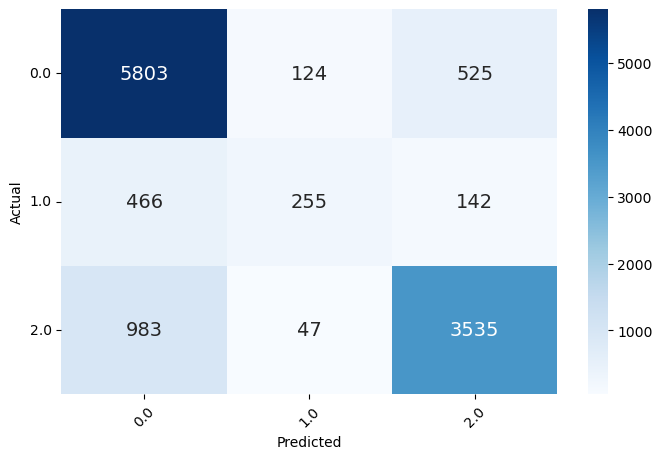

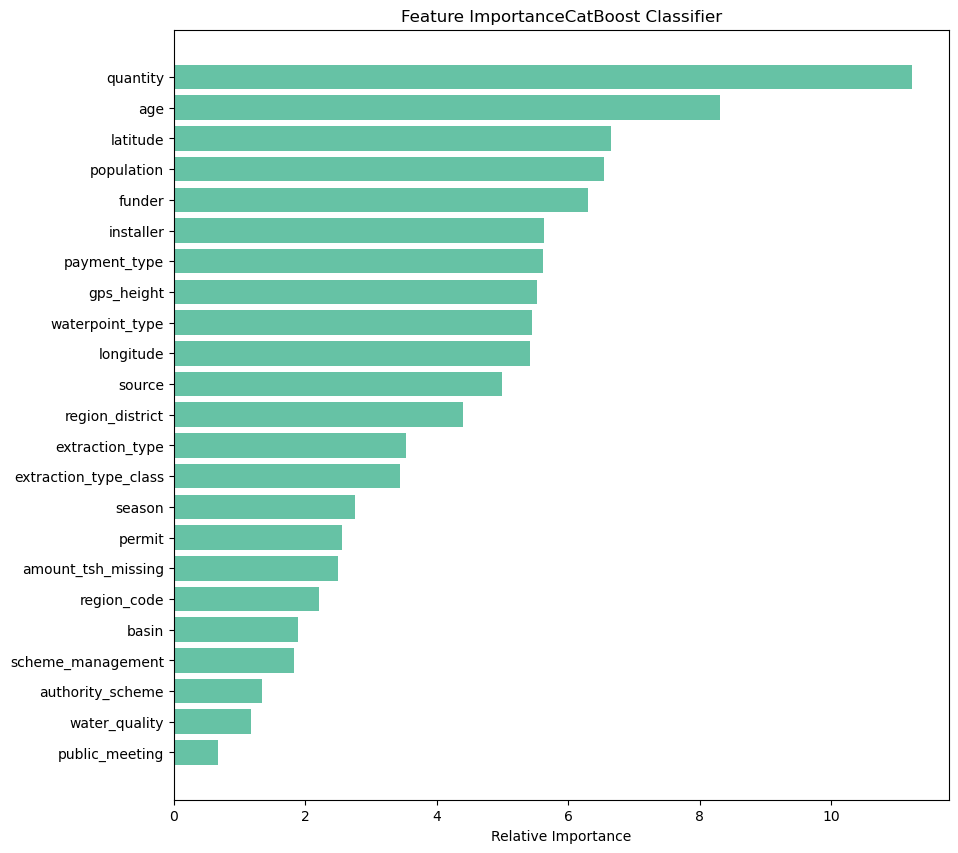

In [56]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Assuming confusion_matrix_plotter and feature_importances are defined functions
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the best model
best_model = CatBoostClassifier(random_state=42, 
                                rsm=0.4242391119783712,
                                max_depth=10, 
                                iterations=1000)

# Fit the model on the training data
best_model.fit(X_train, y_train, verbose=False)  # Set verbose to False to reduce output

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Print accuracy scores
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_plotter(y_test, y_pred)

# Show feature importances
feature_importances(best_model, "CatBoost Classifier")

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=15, scoring='accuracy', verbose=False)  # Using 5-fold cross-validation

# Print cross-validation results
print("Cross-validation scores: ", cv_scores)
print("Mean CV Score: ", cv_scores.mean())

In [ ]:
#BAGGING:

In [57]:
#USING OPTUNA:

import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100,1000]),
        'max_features': trial.suggest_float('max_features', 0.2, 0.8)
    }

    bag = BaggingClassifier(random_state=42, **param)
    bag.fit(X_train, y_train)
    score = bag.score(X_test, y_test)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=45)  # You can adjust the number of trials

best_params = study.best_params
best_score = study.best_value

print('Best Score:', best_score)
print('Best Parameters:', best_params)

# Retrain the model with best parameters
best_model = BaggingClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

#Best Score: 0.8101010101010101
#Best Parameters: {'n_estimators': 1000, 'max_features': 0.5699907443201271}

[I 2023-11-27 01:24:20,266] A new study created in memory with name: no-name-e2e6ebfe-1716-4c54-8d2c-1731b636c32a
[I 2023-11-27 01:25:54,091] Trial 0 finished with value: 0.8097643097643098 and parameters: {'n_estimators': 1000, 'max_features': 0.5523281020802768}. Best is trial 0 with value: 0.8097643097643098.
[I 2023-11-27 01:26:53,921] Trial 1 finished with value: 0.8012626262626262 and parameters: {'n_estimators': 1000, 'max_features': 0.38183860554890453}. Best is trial 0 with value: 0.8097643097643098.
[I 2023-11-27 01:27:02,405] Trial 2 finished with value: 0.8046296296296296 and parameters: {'n_estimators': 100, 'max_features': 0.5029944100715483}. Best is trial 0 with value: 0.8097643097643098.
[I 2023-11-27 01:27:15,329] Trial 3 finished with value: 0.8082491582491582 and parameters: {'n_estimators': 100, 'max_features': 0.7222437978944387}. Best is trial 0 with value: 0.8097643097643098.
[I 2023-11-27 01:27:28,373] Trial 4 finished with value: 0.8082491582491582 and paramet

[I 2023-11-27 01:42:02,622] Trial 41 finished with value: 0.8098484848484848 and parameters: {'n_estimators': 100, 'max_features': 0.6009701698857516}. Best is trial 12 with value: 0.8098484848484848.
[I 2023-11-27 01:42:13,721] Trial 42 finished with value: 0.8084175084175084 and parameters: {'n_estimators': 100, 'max_features': 0.6412537428820437}. Best is trial 12 with value: 0.8098484848484848.
[I 2023-11-27 01:42:24,817] Trial 43 finished with value: 0.8084175084175084 and parameters: {'n_estimators': 100, 'max_features': 0.6125272486106288}. Best is trial 12 with value: 0.8098484848484848.
[I 2023-11-27 01:44:05,483] Trial 44 finished with value: 0.8101010101010101 and parameters: {'n_estimators': 1000, 'max_features': 0.5699907443201271}. Best is trial 44 with value: 0.8101010101010101.


Best Score: 0.8101010101010101
Best Parameters: {'n_estimators': 1000, 'max_features': 0.5699907443201271}


BaggingClassifier(max_features=0.5699907443201271, n_estimators=1000,
                  random_state=42)

In [64]:
#USING GRID SEARCH CV:

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42)


param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}

    

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

grid_search_bag = RandomizedSearchCV(estimator = bag, param_distributions = param_grid, cv =5, n_iter = 45,
                               verbose = 2, scoring = 'accuracy')

#fitmodel
grid_search_bag.fit(X_train, y_train )

#print best parameters 
print('Best Score:', grid_search_bag.best_score_)
print('Parameters:', grid_search_bag.best_params_)
print('Best Model:',grid_search_bag .best_estimator_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .................max_features=0.2, n_estimators=100; total time=   2.2s


KeyboardInterrupt: 

Accuracy score train: 0.9811233401376291
Accuracy score test: 0.8101010101010101

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      6476
         1.0       0.56      0.34      0.42       845
         2.0       0.83      0.79      0.81      4559

    accuracy                           0.81     11880
   macro avg       0.73      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880

Cross-validation scores:  [0.79387626 0.81565657 0.80744949 0.81155303 0.8052399  0.81155303
 0.81060606 0.8030303  0.81186869 0.80176768 0.80555556 0.81849747
 0.81881313 0.80681818 0.81338806]
Mean CV Score:  0.8090448945299751


AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

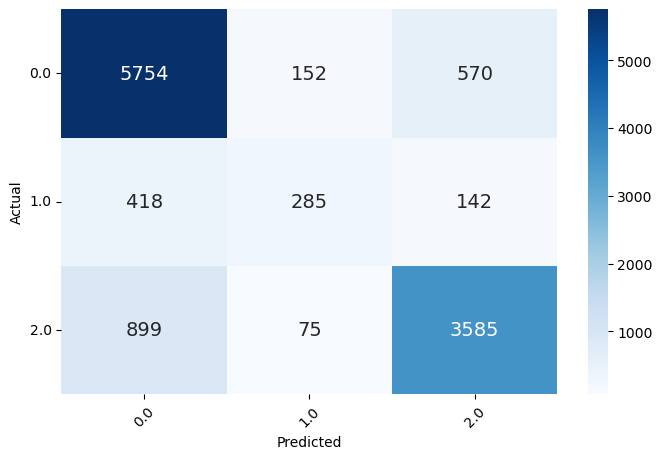

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Assuming confusion_matrix_plotter is a defined function
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the best model
best_model = BaggingClassifier(random_state=42, n_estimators=1000, max_features=0.5699907443201271)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Print accuracy scores
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_plotter(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=15, scoring='accuracy')  # Using 5-fold cross-validation

# Print cross-validation results
print("Cross-validation scores: ", cv_scores)
print("Mean CV Score: ", cv_scores.mean())

feature_importances(best_model, "Bagging")

In [ ]:
#WEIGHTED VOTE:

In [ ]:
#tuned models

# {'n_estimators': 284, 'max_features': 'log2', 'max_depth': 25, 'min_samples_split': 10}
rf = RandomForestClassifier(max_depth=25, 
                            max_features='log2', 
                            min_samples_split=10, 
                            n_estimators=284, 
                            random_state=42, 
                            warm_start=True)

#{'n_estimators': 255, 'colsample_bytree': 0.3, 'eta': 0.2, 'max_depth': 12}
xgb = XGBClassifier(max_depth =12, 
                    n_estimators= 255, 
                    colsample_bytree = 0.3,
                    eta = 0.2, 
                    random_state = 42)

#{'max_depth': 10, 'iterations': 1000, 'rsm': 0.4242391119783712}
cat = CatBoostClassifier(max_depth = 10, 
                         rsm = 0.4242391119783712, 
                         iterations = 1000, 
                         random_state = 42)

#BaggingClassifier(max_features=0.5699907443201271, n_estimators=1000,random_state=42)
bag = BaggingClassifier(max_features=0.5699907443201271, 
                        n_estimators=1000, 
                        random_state=42)

In [ ]:
#GETTING BEST WEIGHTS USING OPTUNA:

import optuna
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X, y, and the classifiers (rf, xgb, cat, bag) are already defined.

def objective(trial):
    # Generate weights
    w1 = trial.suggest_float('w1', 0.1, 1.0)
    w2 = trial.suggest_float('w2', 0.1, 1.0)
    w3 = trial.suggest_float('w3', 0.1, 1.0)
    w4 = trial.suggest_float('w4', 0.1, 1.0)

    # Create the VotingClassifier with the suggested weights
    vc = VotingClassifier(
        [('rf', rf), ('xgb', xgb), ('cat', cat), ('bag', bag)], 
        voting='soft', 
        weights=[w1, w2, w3, w4]
    )

    # Train the classifier
    vc.fit(X_train, y_train)

    # Evaluate the classifier
    pred = vc.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    return accuracy

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a study object and specify the optimization direction
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=1000)  # You can adjust the number of trials

# Best parameters
best_weights = study.best_params
print('Best weights:', best_weights)

In [62]:
#Getting the best weight using grid seach cv:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X, y, and the classifiers (rf, xgb, cat, bag) are already defined.

# Create the VotingClassifier
vc = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('cat', cat), ('bag', bag)], voting='soft')

# Define the parameter grid
param_grid = {
    'weights': [
        [0.85, 1, 0.85, 0.75],  # The specified weights
        [0.8, 1, 0.8, 0.7],      # Slightly lower
        [0.9, 1, 0.9, 0.8],      # Slightly higher
        
    ]
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(vc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best weights and score
best_weights = grid_search.best_params_['weights']
best_score = grid_search.best_score_

print('Best weights:', best_weights)
print('Best score:', best_score)

Learning rate set to 0.095258
0:	learn: 1.0298157	total: 33.2ms	remaining: 33.1s
1:	learn: 0.9735828	total: 46.5ms	remaining: 23.2s
2:	learn: 0.9280032	total: 63.6ms	remaining: 21.1s
3:	learn: 0.8877805	total: 79.2ms	remaining: 19.7s
4:	learn: 0.8542616	total: 91.3ms	remaining: 18.2s
5:	learn: 0.8257885	total: 105ms	remaining: 17.4s
6:	learn: 0.8008774	total: 120ms	remaining: 17s
7:	learn: 0.7786685	total: 136ms	remaining: 16.9s
8:	learn: 0.7605909	total: 148ms	remaining: 16.3s
9:	learn: 0.7431446	total: 163ms	remaining: 16.1s
10:	learn: 0.7279345	total: 176ms	remaining: 15.9s
11:	learn: 0.7141747	total: 188ms	remaining: 15.5s
12:	learn: 0.7026339	total: 203ms	remaining: 15.4s
13:	learn: 0.6926537	total: 216ms	remaining: 15.2s
14:	learn: 0.6839910	total: 227ms	remaining: 14.9s
15:	learn: 0.6754399	total: 238ms	remaining: 14.6s
16:	learn: 0.6672483	total: 251ms	remaining: 14.5s
17:	learn: 0.6596486	total: 262ms	remaining: 14.3s
18:	learn: 0.6523009	total: 274ms	remaining: 14.1s
19:	lear

169:	learn: 0.4475134	total: 2.04s	remaining: 9.94s
170:	learn: 0.4469994	total: 2.05s	remaining: 9.93s
171:	learn: 0.4463555	total: 2.06s	remaining: 9.92s
172:	learn: 0.4458659	total: 2.07s	remaining: 9.9s
173:	learn: 0.4453311	total: 2.08s	remaining: 9.89s
174:	learn: 0.4451031	total: 2.09s	remaining: 9.87s
175:	learn: 0.4446315	total: 2.1s	remaining: 9.86s
176:	learn: 0.4441364	total: 2.12s	remaining: 9.84s
177:	learn: 0.4436802	total: 2.13s	remaining: 9.82s
178:	learn: 0.4430239	total: 2.14s	remaining: 9.81s
179:	learn: 0.4419847	total: 2.15s	remaining: 9.79s
180:	learn: 0.4415600	total: 2.16s	remaining: 9.77s
181:	learn: 0.4411784	total: 2.17s	remaining: 9.75s
182:	learn: 0.4405823	total: 2.18s	remaining: 9.74s
183:	learn: 0.4402143	total: 2.19s	remaining: 9.73s
184:	learn: 0.4394287	total: 2.21s	remaining: 9.72s
185:	learn: 0.4386842	total: 2.22s	remaining: 9.7s
186:	learn: 0.4383744	total: 2.23s	remaining: 9.69s
187:	learn: 0.4378112	total: 2.24s	remaining: 9.67s
188:	learn: 0.4

332:	learn: 0.3836484	total: 3.87s	remaining: 7.75s
333:	learn: 0.3832613	total: 3.88s	remaining: 7.74s
334:	learn: 0.3828756	total: 3.89s	remaining: 7.73s
335:	learn: 0.3826248	total: 3.91s	remaining: 7.72s
336:	learn: 0.3823142	total: 3.92s	remaining: 7.71s
337:	learn: 0.3819468	total: 3.93s	remaining: 7.7s
338:	learn: 0.3816839	total: 3.94s	remaining: 7.69s
339:	learn: 0.3814741	total: 3.95s	remaining: 7.67s
340:	learn: 0.3812585	total: 3.96s	remaining: 7.66s
341:	learn: 0.3809957	total: 3.98s	remaining: 7.65s
342:	learn: 0.3807197	total: 3.99s	remaining: 7.64s
343:	learn: 0.3804647	total: 4s	remaining: 7.62s
344:	learn: 0.3800509	total: 4.01s	remaining: 7.61s
345:	learn: 0.3796368	total: 4.02s	remaining: 7.6s
346:	learn: 0.3793727	total: 4.03s	remaining: 7.59s
347:	learn: 0.3790054	total: 4.04s	remaining: 7.58s
348:	learn: 0.3787233	total: 4.05s	remaining: 7.56s
349:	learn: 0.3785336	total: 4.07s	remaining: 7.55s
350:	learn: 0.3781476	total: 4.08s	remaining: 7.54s
351:	learn: 0.377

496:	learn: 0.3425571	total: 5.72s	remaining: 5.79s
497:	learn: 0.3423640	total: 5.73s	remaining: 5.78s
498:	learn: 0.3419857	total: 5.74s	remaining: 5.77s
499:	learn: 0.3416198	total: 5.76s	remaining: 5.76s
500:	learn: 0.3413938	total: 5.77s	remaining: 5.75s
501:	learn: 0.3411722	total: 5.78s	remaining: 5.73s
502:	learn: 0.3410603	total: 5.79s	remaining: 5.72s
503:	learn: 0.3408356	total: 5.8s	remaining: 5.71s
504:	learn: 0.3406444	total: 5.81s	remaining: 5.7s
505:	learn: 0.3404506	total: 5.82s	remaining: 5.69s
506:	learn: 0.3402227	total: 5.83s	remaining: 5.67s
507:	learn: 0.3400531	total: 5.84s	remaining: 5.66s
508:	learn: 0.3397692	total: 5.86s	remaining: 5.65s
509:	learn: 0.3396097	total: 5.87s	remaining: 5.64s
510:	learn: 0.3394413	total: 5.88s	remaining: 5.62s
511:	learn: 0.3391365	total: 5.89s	remaining: 5.61s
512:	learn: 0.3389724	total: 5.9s	remaining: 5.6s
513:	learn: 0.3387593	total: 5.91s	remaining: 5.59s
514:	learn: 0.3384434	total: 5.92s	remaining: 5.58s
515:	learn: 0.33

659:	learn: 0.3126192	total: 7.57s	remaining: 3.9s
660:	learn: 0.3124637	total: 7.58s	remaining: 3.89s
661:	learn: 0.3123740	total: 7.59s	remaining: 3.87s
662:	learn: 0.3121907	total: 7.6s	remaining: 3.86s
663:	learn: 0.3119723	total: 7.61s	remaining: 3.85s
664:	learn: 0.3118533	total: 7.62s	remaining: 3.84s
665:	learn: 0.3117148	total: 7.63s	remaining: 3.83s
666:	learn: 0.3115546	total: 7.64s	remaining: 3.81s
667:	learn: 0.3114275	total: 7.65s	remaining: 3.8s
668:	learn: 0.3112261	total: 7.66s	remaining: 3.79s
669:	learn: 0.3110736	total: 7.67s	remaining: 3.78s
670:	learn: 0.3109173	total: 7.69s	remaining: 3.77s
671:	learn: 0.3107677	total: 7.7s	remaining: 3.76s
672:	learn: 0.3105971	total: 7.71s	remaining: 3.75s
673:	learn: 0.3104886	total: 7.72s	remaining: 3.73s
674:	learn: 0.3102824	total: 7.73s	remaining: 3.72s
675:	learn: 0.3101561	total: 7.74s	remaining: 3.71s
676:	learn: 0.3099981	total: 7.75s	remaining: 3.7s
677:	learn: 0.3098477	total: 7.76s	remaining: 3.69s
678:	learn: 0.309

824:	learn: 0.2892704	total: 9.41s	remaining: 2s
825:	learn: 0.2891953	total: 9.43s	remaining: 1.99s
826:	learn: 0.2890552	total: 9.44s	remaining: 1.97s
827:	learn: 0.2888582	total: 9.45s	remaining: 1.96s
828:	learn: 0.2887964	total: 9.46s	remaining: 1.95s
829:	learn: 0.2886859	total: 9.47s	remaining: 1.94s
830:	learn: 0.2885894	total: 9.48s	remaining: 1.93s
831:	learn: 0.2884472	total: 9.49s	remaining: 1.92s
832:	learn: 0.2883293	total: 9.5s	remaining: 1.9s
833:	learn: 0.2881877	total: 9.51s	remaining: 1.89s
834:	learn: 0.2880111	total: 9.52s	remaining: 1.88s
835:	learn: 0.2878359	total: 9.53s	remaining: 1.87s
836:	learn: 0.2876992	total: 9.54s	remaining: 1.86s
837:	learn: 0.2876172	total: 9.55s	remaining: 1.85s
838:	learn: 0.2874845	total: 9.57s	remaining: 1.83s
839:	learn: 0.2873307	total: 9.58s	remaining: 1.82s
840:	learn: 0.2871862	total: 9.59s	remaining: 1.81s
841:	learn: 0.2870782	total: 9.6s	remaining: 1.8s
842:	learn: 0.2868914	total: 9.61s	remaining: 1.79s
843:	learn: 0.28674

990:	learn: 0.2696628	total: 11.3s	remaining: 102ms
991:	learn: 0.2695661	total: 11.3s	remaining: 90.9ms
992:	learn: 0.2695123	total: 11.3s	remaining: 79.5ms
993:	learn: 0.2694244	total: 11.3s	remaining: 68.2ms
994:	learn: 0.2693491	total: 11.3s	remaining: 56.8ms
995:	learn: 0.2691821	total: 11.3s	remaining: 45.4ms
996:	learn: 0.2691336	total: 11.3s	remaining: 34.1ms
997:	learn: 0.2690520	total: 11.3s	remaining: 22.7ms
998:	learn: 0.2689567	total: 11.4s	remaining: 11.4ms
999:	learn: 0.2688530	total: 11.4s	remaining: 0us
Learning rate set to 0.095258
0:	learn: 1.0295879	total: 13.4ms	remaining: 13.4s
1:	learn: 0.9740794	total: 27.3ms	remaining: 13.6s
2:	learn: 0.9283941	total: 38.9ms	remaining: 12.9s
3:	learn: 0.8899152	total: 52.9ms	remaining: 13.2s
4:	learn: 0.8563431	total: 66.2ms	remaining: 13.2s
5:	learn: 0.8277366	total: 78.1ms	remaining: 12.9s
6:	learn: 0.8033641	total: 91.8ms	remaining: 13s
7:	learn: 0.7810264	total: 106ms	remaining: 13.1s
8:	learn: 0.7628588	total: 118ms	remain

161:	learn: 0.4497155	total: 1.83s	remaining: 9.47s
162:	learn: 0.4492787	total: 1.84s	remaining: 9.46s
163:	learn: 0.4486786	total: 1.85s	remaining: 9.45s
164:	learn: 0.4480068	total: 1.86s	remaining: 9.43s
165:	learn: 0.4474539	total: 1.88s	remaining: 9.42s
166:	learn: 0.4470203	total: 1.89s	remaining: 9.41s
167:	learn: 0.4466149	total: 1.9s	remaining: 9.4s
168:	learn: 0.4458386	total: 1.91s	remaining: 9.39s
169:	learn: 0.4454291	total: 1.92s	remaining: 9.37s
170:	learn: 0.4449151	total: 1.93s	remaining: 9.36s
171:	learn: 0.4445648	total: 1.94s	remaining: 9.34s
172:	learn: 0.4440261	total: 1.95s	remaining: 9.33s
173:	learn: 0.4435355	total: 1.96s	remaining: 9.31s
174:	learn: 0.4429622	total: 1.97s	remaining: 9.3s
175:	learn: 0.4425864	total: 1.98s	remaining: 9.29s
176:	learn: 0.4419415	total: 1.99s	remaining: 9.27s
177:	learn: 0.4413607	total: 2s	remaining: 9.26s
178:	learn: 0.4408157	total: 2.02s	remaining: 9.25s
179:	learn: 0.4404078	total: 2.03s	remaining: 9.23s
180:	learn: 0.4397

325:	learn: 0.3836787	total: 3.69s	remaining: 7.64s
326:	learn: 0.3833439	total: 3.71s	remaining: 7.63s
327:	learn: 0.3830662	total: 3.72s	remaining: 7.62s
328:	learn: 0.3828219	total: 3.73s	remaining: 7.6s
329:	learn: 0.3825523	total: 3.74s	remaining: 7.59s
330:	learn: 0.3821474	total: 3.75s	remaining: 7.58s
331:	learn: 0.3819606	total: 3.76s	remaining: 7.57s
332:	learn: 0.3817303	total: 3.77s	remaining: 7.55s
333:	learn: 0.3816152	total: 3.78s	remaining: 7.54s
334:	learn: 0.3814299	total: 3.79s	remaining: 7.53s
335:	learn: 0.3811789	total: 3.81s	remaining: 7.52s
336:	learn: 0.3809424	total: 3.82s	remaining: 7.51s
337:	learn: 0.3805382	total: 3.83s	remaining: 7.5s
338:	learn: 0.3801654	total: 3.84s	remaining: 7.49s
339:	learn: 0.3798518	total: 3.85s	remaining: 7.48s
340:	learn: 0.3795525	total: 3.86s	remaining: 7.47s
341:	learn: 0.3792751	total: 3.88s	remaining: 7.46s
342:	learn: 0.3789940	total: 3.88s	remaining: 7.44s
343:	learn: 0.3787308	total: 3.9s	remaining: 7.43s
344:	learn: 0.3

493:	learn: 0.3411384	total: 5.54s	remaining: 5.68s
494:	learn: 0.3409816	total: 5.55s	remaining: 5.67s
495:	learn: 0.3407613	total: 5.57s	remaining: 5.66s
496:	learn: 0.3405148	total: 5.58s	remaining: 5.64s
497:	learn: 0.3403280	total: 5.59s	remaining: 5.63s
498:	learn: 0.3401236	total: 5.6s	remaining: 5.62s
499:	learn: 0.3399936	total: 5.61s	remaining: 5.61s
500:	learn: 0.3398240	total: 5.62s	remaining: 5.6s
501:	learn: 0.3397228	total: 5.63s	remaining: 5.59s
502:	learn: 0.3396082	total: 5.64s	remaining: 5.58s
503:	learn: 0.3393865	total: 5.66s	remaining: 5.57s
504:	learn: 0.3392148	total: 5.67s	remaining: 5.55s
505:	learn: 0.3390433	total: 5.68s	remaining: 5.54s
506:	learn: 0.3388103	total: 5.69s	remaining: 5.53s
507:	learn: 0.3385067	total: 5.7s	remaining: 5.52s
508:	learn: 0.3383513	total: 5.71s	remaining: 5.51s
509:	learn: 0.3382248	total: 5.72s	remaining: 5.5s
510:	learn: 0.3380691	total: 5.73s	remaining: 5.48s
511:	learn: 0.3378653	total: 5.74s	remaining: 5.47s
512:	learn: 0.33

660:	learn: 0.3107855	total: 7.39s	remaining: 3.79s
661:	learn: 0.3106615	total: 7.4s	remaining: 3.78s
662:	learn: 0.3105264	total: 7.41s	remaining: 3.77s
663:	learn: 0.3103577	total: 7.42s	remaining: 3.75s
664:	learn: 0.3101879	total: 7.43s	remaining: 3.74s
665:	learn: 0.3099869	total: 7.44s	remaining: 3.73s
666:	learn: 0.3098826	total: 7.45s	remaining: 3.72s
667:	learn: 0.3097556	total: 7.46s	remaining: 3.71s
668:	learn: 0.3095203	total: 7.47s	remaining: 3.7s
669:	learn: 0.3094199	total: 7.48s	remaining: 3.69s
670:	learn: 0.3092702	total: 7.5s	remaining: 3.68s
671:	learn: 0.3091643	total: 7.51s	remaining: 3.66s
672:	learn: 0.3089839	total: 7.52s	remaining: 3.65s
673:	learn: 0.3088542	total: 7.53s	remaining: 3.64s
674:	learn: 0.3087299	total: 7.54s	remaining: 3.63s
675:	learn: 0.3085335	total: 7.55s	remaining: 3.62s
676:	learn: 0.3083417	total: 7.56s	remaining: 3.61s
677:	learn: 0.3081999	total: 7.57s	remaining: 3.6s
678:	learn: 0.3081161	total: 7.58s	remaining: 3.58s
679:	learn: 0.30

823:	learn: 0.2887786	total: 9.24s	remaining: 1.97s
824:	learn: 0.2886641	total: 9.25s	remaining: 1.96s
825:	learn: 0.2885964	total: 9.26s	remaining: 1.95s
826:	learn: 0.2884385	total: 9.27s	remaining: 1.94s
827:	learn: 0.2883421	total: 9.29s	remaining: 1.93s
828:	learn: 0.2881895	total: 9.29s	remaining: 1.92s
829:	learn: 0.2881129	total: 9.31s	remaining: 1.91s
830:	learn: 0.2879543	total: 9.32s	remaining: 1.9s
831:	learn: 0.2878735	total: 9.33s	remaining: 1.88s
832:	learn: 0.2877359	total: 9.34s	remaining: 1.87s
833:	learn: 0.2875896	total: 9.35s	remaining: 1.86s
834:	learn: 0.2874692	total: 9.36s	remaining: 1.85s
835:	learn: 0.2873474	total: 9.37s	remaining: 1.84s
836:	learn: 0.2872319	total: 9.38s	remaining: 1.83s
837:	learn: 0.2871601	total: 9.39s	remaining: 1.82s
838:	learn: 0.2870524	total: 9.41s	remaining: 1.8s
839:	learn: 0.2868928	total: 9.42s	remaining: 1.79s
840:	learn: 0.2867910	total: 9.43s	remaining: 1.78s
841:	learn: 0.2866933	total: 9.44s	remaining: 1.77s
842:	learn: 0.

991:	learn: 0.2697395	total: 11.1s	remaining: 89.5ms
992:	learn: 0.2696460	total: 11.1s	remaining: 78.3ms
993:	learn: 0.2695176	total: 11.1s	remaining: 67.1ms
994:	learn: 0.2694446	total: 11.1s	remaining: 55.9ms
995:	learn: 0.2693058	total: 11.1s	remaining: 44.7ms
996:	learn: 0.2692302	total: 11.2s	remaining: 33.6ms
997:	learn: 0.2691583	total: 11.2s	remaining: 22.4ms
998:	learn: 0.2690734	total: 11.2s	remaining: 11.2ms
999:	learn: 0.2689863	total: 11.2s	remaining: 0us
Learning rate set to 0.095258
0:	learn: 1.0299828	total: 11ms	remaining: 11s
1:	learn: 0.9744917	total: 22.5ms	remaining: 11.2s
2:	learn: 0.9291727	total: 35.2ms	remaining: 11.7s
3:	learn: 0.8906814	total: 49.4ms	remaining: 12.3s
4:	learn: 0.8571633	total: 63.1ms	remaining: 12.6s
5:	learn: 0.8282581	total: 76ms	remaining: 12.6s
6:	learn: 0.8037563	total: 89.1ms	remaining: 12.6s
7:	learn: 0.7812499	total: 103ms	remaining: 12.7s
8:	learn: 0.7628398	total: 115ms	remaining: 12.6s
9:	learn: 0.7462302	total: 127ms	remaining: 1

160:	learn: 0.4513669	total: 1.83s	remaining: 9.56s
161:	learn: 0.4510156	total: 1.84s	remaining: 9.55s
162:	learn: 0.4501744	total: 1.86s	remaining: 9.53s
163:	learn: 0.4496258	total: 1.87s	remaining: 9.52s
164:	learn: 0.4492867	total: 1.88s	remaining: 9.51s
165:	learn: 0.4488592	total: 1.89s	remaining: 9.49s
166:	learn: 0.4486023	total: 1.9s	remaining: 9.48s
167:	learn: 0.4479918	total: 1.91s	remaining: 9.47s
168:	learn: 0.4475181	total: 1.92s	remaining: 9.46s
169:	learn: 0.4472284	total: 1.93s	remaining: 9.43s
170:	learn: 0.4468390	total: 1.94s	remaining: 9.42s
171:	learn: 0.4465080	total: 1.95s	remaining: 9.4s
172:	learn: 0.4459974	total: 1.96s	remaining: 9.39s
173:	learn: 0.4452652	total: 1.97s	remaining: 9.37s
174:	learn: 0.4447173	total: 1.99s	remaining: 9.36s
175:	learn: 0.4441754	total: 2s	remaining: 9.35s
176:	learn: 0.4436138	total: 2.01s	remaining: 9.33s
177:	learn: 0.4432178	total: 2.02s	remaining: 9.32s
178:	learn: 0.4427835	total: 2.03s	remaining: 9.31s
179:	learn: 0.442

328:	learn: 0.3830272	total: 3.69s	remaining: 7.53s
329:	learn: 0.3826963	total: 3.7s	remaining: 7.52s
330:	learn: 0.3821932	total: 3.72s	remaining: 7.51s
331:	learn: 0.3819721	total: 3.73s	remaining: 7.5s
332:	learn: 0.3814880	total: 3.74s	remaining: 7.49s
333:	learn: 0.3810955	total: 3.75s	remaining: 7.47s
334:	learn: 0.3808592	total: 3.76s	remaining: 7.46s
335:	learn: 0.3805196	total: 3.77s	remaining: 7.45s
336:	learn: 0.3802816	total: 3.78s	remaining: 7.44s
337:	learn: 0.3799998	total: 3.79s	remaining: 7.43s
338:	learn: 0.3795595	total: 3.8s	remaining: 7.42s
339:	learn: 0.3792887	total: 3.81s	remaining: 7.41s
340:	learn: 0.3790411	total: 3.83s	remaining: 7.39s
341:	learn: 0.3787204	total: 3.84s	remaining: 7.38s
342:	learn: 0.3783575	total: 3.85s	remaining: 7.37s
343:	learn: 0.3780292	total: 3.86s	remaining: 7.36s
344:	learn: 0.3776473	total: 3.87s	remaining: 7.35s
345:	learn: 0.3774280	total: 3.88s	remaining: 7.34s
346:	learn: 0.3769491	total: 3.89s	remaining: 7.33s
347:	learn: 0.3

496:	learn: 0.3393500	total: 5.54s	remaining: 5.61s
497:	learn: 0.3391230	total: 5.55s	remaining: 5.59s
498:	learn: 0.3390059	total: 5.56s	remaining: 5.58s
499:	learn: 0.3388937	total: 5.57s	remaining: 5.57s
500:	learn: 0.3387357	total: 5.58s	remaining: 5.56s
501:	learn: 0.3386159	total: 5.59s	remaining: 5.55s
502:	learn: 0.3384964	total: 5.61s	remaining: 5.54s
503:	learn: 0.3381619	total: 5.62s	remaining: 5.53s
504:	learn: 0.3380378	total: 5.63s	remaining: 5.51s
505:	learn: 0.3378088	total: 5.64s	remaining: 5.5s
506:	learn: 0.3375490	total: 5.65s	remaining: 5.49s
507:	learn: 0.3373800	total: 5.66s	remaining: 5.48s
508:	learn: 0.3372007	total: 5.67s	remaining: 5.47s
509:	learn: 0.3370885	total: 5.68s	remaining: 5.46s
510:	learn: 0.3367928	total: 5.69s	remaining: 5.44s
511:	learn: 0.3366163	total: 5.7s	remaining: 5.43s
512:	learn: 0.3362986	total: 5.71s	remaining: 5.42s
513:	learn: 0.3361774	total: 5.72s	remaining: 5.41s
514:	learn: 0.3359219	total: 5.73s	remaining: 5.4s
515:	learn: 0.3

666:	learn: 0.3104933	total: 7.4s	remaining: 3.69s
667:	learn: 0.3103845	total: 7.41s	remaining: 3.68s
668:	learn: 0.3102144	total: 7.42s	remaining: 3.67s
669:	learn: 0.3099938	total: 7.43s	remaining: 3.66s
670:	learn: 0.3098911	total: 7.44s	remaining: 3.65s
671:	learn: 0.3097565	total: 7.45s	remaining: 3.64s
672:	learn: 0.3096584	total: 7.46s	remaining: 3.63s
673:	learn: 0.3094763	total: 7.47s	remaining: 3.61s
674:	learn: 0.3092565	total: 7.49s	remaining: 3.6s
675:	learn: 0.3091698	total: 7.5s	remaining: 3.59s
676:	learn: 0.3090174	total: 7.51s	remaining: 3.58s
677:	learn: 0.3088026	total: 7.52s	remaining: 3.57s
678:	learn: 0.3086460	total: 7.53s	remaining: 3.56s
679:	learn: 0.3085264	total: 7.54s	remaining: 3.55s
680:	learn: 0.3083407	total: 7.55s	remaining: 3.54s
681:	learn: 0.3081887	total: 7.56s	remaining: 3.53s
682:	learn: 0.3081134	total: 7.57s	remaining: 3.52s
683:	learn: 0.3080334	total: 7.58s	remaining: 3.5s
684:	learn: 0.3077786	total: 7.59s	remaining: 3.49s
685:	learn: 0.30

835:	learn: 0.2868560	total: 9.26s	remaining: 1.81s
836:	learn: 0.2867022	total: 9.27s	remaining: 1.8s
837:	learn: 0.2866112	total: 9.28s	remaining: 1.79s
838:	learn: 0.2864633	total: 9.29s	remaining: 1.78s
839:	learn: 0.2862725	total: 9.3s	remaining: 1.77s
840:	learn: 0.2861985	total: 9.31s	remaining: 1.76s
841:	learn: 0.2860316	total: 9.32s	remaining: 1.75s
842:	learn: 0.2858556	total: 9.33s	remaining: 1.74s
843:	learn: 0.2856803	total: 9.34s	remaining: 1.73s
844:	learn: 0.2855549	total: 9.36s	remaining: 1.72s
845:	learn: 0.2854082	total: 9.37s	remaining: 1.7s
846:	learn: 0.2853301	total: 9.38s	remaining: 1.69s
847:	learn: 0.2851679	total: 9.39s	remaining: 1.68s
848:	learn: 0.2850379	total: 9.4s	remaining: 1.67s
849:	learn: 0.2849390	total: 9.41s	remaining: 1.66s
850:	learn: 0.2848275	total: 9.42s	remaining: 1.65s
851:	learn: 0.2846304	total: 9.43s	remaining: 1.64s
852:	learn: 0.2845338	total: 9.44s	remaining: 1.63s
853:	learn: 0.2844344	total: 9.46s	remaining: 1.62s
854:	learn: 0.28

Learning rate set to 0.095258
0:	learn: 1.0293012	total: 11.7ms	remaining: 11.7s
1:	learn: 0.9747711	total: 23.7ms	remaining: 11.8s
2:	learn: 0.9294445	total: 35.9ms	remaining: 11.9s
3:	learn: 0.8912013	total: 49ms	remaining: 12.2s
4:	learn: 0.8570837	total: 60.7ms	remaining: 12.1s
5:	learn: 0.8279456	total: 74.5ms	remaining: 12.3s
6:	learn: 0.8039820	total: 88.5ms	remaining: 12.5s
7:	learn: 0.7820365	total: 102ms	remaining: 12.6s
8:	learn: 0.7638656	total: 114ms	remaining: 12.5s
9:	learn: 0.7476692	total: 126ms	remaining: 12.5s
10:	learn: 0.7326057	total: 137ms	remaining: 12.4s
11:	learn: 0.7189011	total: 148ms	remaining: 12.2s
12:	learn: 0.7063273	total: 161ms	remaining: 12.3s
13:	learn: 0.6958758	total: 172ms	remaining: 12.1s
14:	learn: 0.6872825	total: 184ms	remaining: 12.1s
15:	learn: 0.6779399	total: 193ms	remaining: 11.9s
16:	learn: 0.6702574	total: 206ms	remaining: 11.9s
17:	learn: 0.6625789	total: 218ms	remaining: 11.9s
18:	learn: 0.6550605	total: 229ms	remaining: 11.8s
19:	le

166:	learn: 0.4506573	total: 1.86s	remaining: 9.27s
167:	learn: 0.4501913	total: 1.87s	remaining: 9.27s
168:	learn: 0.4490869	total: 1.88s	remaining: 9.25s
169:	learn: 0.4485214	total: 1.89s	remaining: 9.24s
170:	learn: 0.4480660	total: 1.9s	remaining: 9.23s
171:	learn: 0.4476792	total: 1.92s	remaining: 9.22s
172:	learn: 0.4469207	total: 1.93s	remaining: 9.21s
173:	learn: 0.4464562	total: 1.94s	remaining: 9.2s
174:	learn: 0.4457799	total: 1.95s	remaining: 9.19s
175:	learn: 0.4452040	total: 1.96s	remaining: 9.19s
176:	learn: 0.4447062	total: 1.97s	remaining: 9.17s
177:	learn: 0.4441141	total: 1.98s	remaining: 9.16s
178:	learn: 0.4436725	total: 2s	remaining: 9.15s
179:	learn: 0.4430348	total: 2.01s	remaining: 9.14s
180:	learn: 0.4422575	total: 2.02s	remaining: 9.13s
181:	learn: 0.4416321	total: 2.03s	remaining: 9.12s
182:	learn: 0.4413479	total: 2.04s	remaining: 9.1s
183:	learn: 0.4405729	total: 2.05s	remaining: 9.09s
184:	learn: 0.4401906	total: 2.06s	remaining: 9.08s
185:	learn: 0.4396

334:	learn: 0.3821320	total: 3.71s	remaining: 7.36s
335:	learn: 0.3816428	total: 3.72s	remaining: 7.35s
336:	learn: 0.3813133	total: 3.73s	remaining: 7.34s
337:	learn: 0.3810870	total: 3.74s	remaining: 7.33s
338:	learn: 0.3807185	total: 3.75s	remaining: 7.32s
339:	learn: 0.3805244	total: 3.77s	remaining: 7.31s
340:	learn: 0.3802414	total: 3.78s	remaining: 7.3s
341:	learn: 0.3799875	total: 3.79s	remaining: 7.29s
342:	learn: 0.3797430	total: 3.8s	remaining: 7.28s
343:	learn: 0.3793144	total: 3.81s	remaining: 7.26s
344:	learn: 0.3789752	total: 3.82s	remaining: 7.25s
345:	learn: 0.3785520	total: 3.83s	remaining: 7.24s
346:	learn: 0.3782929	total: 3.84s	remaining: 7.23s
347:	learn: 0.3781200	total: 3.85s	remaining: 7.22s
348:	learn: 0.3778278	total: 3.87s	remaining: 7.21s
349:	learn: 0.3774797	total: 3.88s	remaining: 7.2s
350:	learn: 0.3771557	total: 3.89s	remaining: 7.19s
351:	learn: 0.3769465	total: 3.9s	remaining: 7.18s
352:	learn: 0.3767528	total: 3.91s	remaining: 7.17s
353:	learn: 0.37

501:	learn: 0.3390012	total: 5.55s	remaining: 5.5s
502:	learn: 0.3388535	total: 5.56s	remaining: 5.49s
503:	learn: 0.3386420	total: 5.57s	remaining: 5.48s
504:	learn: 0.3383936	total: 5.58s	remaining: 5.47s
505:	learn: 0.3381829	total: 5.59s	remaining: 5.46s
506:	learn: 0.3379423	total: 5.6s	remaining: 5.45s
507:	learn: 0.3376844	total: 5.61s	remaining: 5.43s
508:	learn: 0.3375173	total: 5.62s	remaining: 5.42s
509:	learn: 0.3373623	total: 5.63s	remaining: 5.41s
510:	learn: 0.3371170	total: 5.64s	remaining: 5.4s
511:	learn: 0.3368723	total: 5.65s	remaining: 5.39s
512:	learn: 0.3366851	total: 5.67s	remaining: 5.38s
513:	learn: 0.3365182	total: 5.68s	remaining: 5.37s
514:	learn: 0.3362615	total: 5.69s	remaining: 5.36s
515:	learn: 0.3360521	total: 5.7s	remaining: 5.34s
516:	learn: 0.3358298	total: 5.71s	remaining: 5.33s
517:	learn: 0.3356021	total: 5.72s	remaining: 5.32s
518:	learn: 0.3353163	total: 5.73s	remaining: 5.31s
519:	learn: 0.3351514	total: 5.74s	remaining: 5.3s
520:	learn: 0.334

670:	learn: 0.3087347	total: 7.4s	remaining: 3.63s
671:	learn: 0.3085534	total: 7.41s	remaining: 3.62s
672:	learn: 0.3083459	total: 7.42s	remaining: 3.61s
673:	learn: 0.3082106	total: 7.43s	remaining: 3.59s
674:	learn: 0.3079693	total: 7.44s	remaining: 3.58s
675:	learn: 0.3078400	total: 7.45s	remaining: 3.57s
676:	learn: 0.3076034	total: 7.46s	remaining: 3.56s
677:	learn: 0.3074229	total: 7.48s	remaining: 3.55s
678:	learn: 0.3072231	total: 7.49s	remaining: 3.54s
679:	learn: 0.3070443	total: 7.5s	remaining: 3.53s
680:	learn: 0.3069118	total: 7.51s	remaining: 3.52s
681:	learn: 0.3066832	total: 7.52s	remaining: 3.51s
682:	learn: 0.3065426	total: 7.53s	remaining: 3.5s
683:	learn: 0.3064201	total: 7.54s	remaining: 3.48s
684:	learn: 0.3062486	total: 7.55s	remaining: 3.47s
685:	learn: 0.3061213	total: 7.57s	remaining: 3.46s
686:	learn: 0.3060549	total: 7.58s	remaining: 3.45s
687:	learn: 0.3059056	total: 7.59s	remaining: 3.44s
688:	learn: 0.3057249	total: 7.6s	remaining: 3.43s
689:	learn: 0.30

838:	learn: 0.2863046	total: 9.24s	remaining: 1.77s
839:	learn: 0.2861009	total: 9.25s	remaining: 1.76s
840:	learn: 0.2859502	total: 9.26s	remaining: 1.75s
841:	learn: 0.2858628	total: 9.27s	remaining: 1.74s
842:	learn: 0.2856518	total: 9.28s	remaining: 1.73s
843:	learn: 0.2854570	total: 9.29s	remaining: 1.72s
844:	learn: 0.2853316	total: 9.31s	remaining: 1.71s
845:	learn: 0.2851800	total: 9.32s	remaining: 1.7s
846:	learn: 0.2850807	total: 9.33s	remaining: 1.69s
847:	learn: 0.2849534	total: 9.34s	remaining: 1.67s
848:	learn: 0.2847879	total: 9.35s	remaining: 1.66s
849:	learn: 0.2846333	total: 9.36s	remaining: 1.65s
850:	learn: 0.2845189	total: 9.37s	remaining: 1.64s
851:	learn: 0.2843817	total: 9.38s	remaining: 1.63s
852:	learn: 0.2842724	total: 9.39s	remaining: 1.62s
853:	learn: 0.2841751	total: 9.4s	remaining: 1.61s
854:	learn: 0.2840596	total: 9.41s	remaining: 1.6s
855:	learn: 0.2839485	total: 9.43s	remaining: 1.58s
856:	learn: 0.2838193	total: 9.44s	remaining: 1.57s
857:	learn: 0.2

Learning rate set to 0.095258
0:	learn: 1.0295804	total: 12.2ms	remaining: 12.2s
1:	learn: 0.9745366	total: 23.6ms	remaining: 11.8s
2:	learn: 0.9296408	total: 35.5ms	remaining: 11.8s
3:	learn: 0.8910492	total: 50.3ms	remaining: 12.5s
4:	learn: 0.8576409	total: 65.6ms	remaining: 13.1s
5:	learn: 0.8281634	total: 78.9ms	remaining: 13.1s
6:	learn: 0.8033621	total: 92.2ms	remaining: 13.1s
7:	learn: 0.7820482	total: 106ms	remaining: 13.2s
8:	learn: 0.7631402	total: 116ms	remaining: 12.8s
9:	learn: 0.7467564	total: 129ms	remaining: 12.8s
10:	learn: 0.7316098	total: 141ms	remaining: 12.7s
11:	learn: 0.7183021	total: 153ms	remaining: 12.6s
12:	learn: 0.7075549	total: 167ms	remaining: 12.7s
13:	learn: 0.6975319	total: 179ms	remaining: 12.6s
14:	learn: 0.6888238	total: 190ms	remaining: 12.5s
15:	learn: 0.6800141	total: 199ms	remaining: 12.3s
16:	learn: 0.6720778	total: 213ms	remaining: 12.3s
17:	learn: 0.6643781	total: 225ms	remaining: 12.3s
18:	learn: 0.6571886	total: 236ms	remaining: 12.2s
19:	

162:	learn: 0.4501689	total: 1.84s	remaining: 9.47s
163:	learn: 0.4497255	total: 1.86s	remaining: 9.46s
164:	learn: 0.4491916	total: 1.87s	remaining: 9.45s
165:	learn: 0.4487366	total: 1.88s	remaining: 9.45s
166:	learn: 0.4482312	total: 1.89s	remaining: 9.44s
167:	learn: 0.4479130	total: 1.9s	remaining: 9.43s
168:	learn: 0.4473203	total: 1.92s	remaining: 9.42s
169:	learn: 0.4469977	total: 1.93s	remaining: 9.4s
170:	learn: 0.4463519	total: 1.94s	remaining: 9.39s
171:	learn: 0.4456912	total: 1.95s	remaining: 9.38s
172:	learn: 0.4450378	total: 1.96s	remaining: 9.37s
173:	learn: 0.4446007	total: 1.97s	remaining: 9.36s
174:	learn: 0.4439224	total: 1.98s	remaining: 9.35s
175:	learn: 0.4432617	total: 1.99s	remaining: 9.34s
176:	learn: 0.4426553	total: 2s	remaining: 9.32s
177:	learn: 0.4421217	total: 2.02s	remaining: 9.31s
178:	learn: 0.4414381	total: 2.03s	remaining: 9.3s
179:	learn: 0.4411146	total: 2.04s	remaining: 9.28s
180:	learn: 0.4405201	total: 2.06s	remaining: 9.3s
181:	learn: 0.44021

328:	learn: 0.3824307	total: 3.71s	remaining: 7.57s
329:	learn: 0.3821756	total: 3.72s	remaining: 7.55s
330:	learn: 0.3816931	total: 3.73s	remaining: 7.54s
331:	learn: 0.3814204	total: 3.74s	remaining: 7.53s
332:	learn: 0.3810792	total: 3.76s	remaining: 7.52s
333:	learn: 0.3806909	total: 3.77s	remaining: 7.51s
334:	learn: 0.3804093	total: 3.78s	remaining: 7.5s
335:	learn: 0.3799397	total: 3.79s	remaining: 7.49s
336:	learn: 0.3793379	total: 3.8s	remaining: 7.48s
337:	learn: 0.3790659	total: 3.81s	remaining: 7.46s
338:	learn: 0.3787462	total: 3.82s	remaining: 7.45s
339:	learn: 0.3784507	total: 3.83s	remaining: 7.44s
340:	learn: 0.3782384	total: 3.84s	remaining: 7.43s
341:	learn: 0.3780580	total: 3.85s	remaining: 7.42s
342:	learn: 0.3777446	total: 3.87s	remaining: 7.41s
343:	learn: 0.3774193	total: 3.88s	remaining: 7.39s
344:	learn: 0.3769856	total: 3.89s	remaining: 7.38s
345:	learn: 0.3765841	total: 3.9s	remaining: 7.37s
346:	learn: 0.3763034	total: 3.91s	remaining: 7.36s
347:	learn: 0.3

498:	learn: 0.3400041	total: 5.58s	remaining: 5.6s
499:	learn: 0.3397760	total: 5.59s	remaining: 5.59s
500:	learn: 0.3396087	total: 5.6s	remaining: 5.58s
501:	learn: 0.3394428	total: 5.62s	remaining: 5.58s
502:	learn: 0.3392462	total: 5.63s	remaining: 5.57s
503:	learn: 0.3390528	total: 5.64s	remaining: 5.55s
504:	learn: 0.3388559	total: 5.65s	remaining: 5.54s
505:	learn: 0.3386291	total: 5.67s	remaining: 5.53s
506:	learn: 0.3383996	total: 5.67s	remaining: 5.52s
507:	learn: 0.3381904	total: 5.68s	remaining: 5.5s
508:	learn: 0.3380697	total: 5.69s	remaining: 5.49s
509:	learn: 0.3379824	total: 5.71s	remaining: 5.48s
510:	learn: 0.3377738	total: 5.71s	remaining: 5.47s
511:	learn: 0.3374997	total: 5.73s	remaining: 5.46s
512:	learn: 0.3372656	total: 5.74s	remaining: 5.45s
513:	learn: 0.3369773	total: 5.75s	remaining: 5.44s
514:	learn: 0.3366883	total: 5.76s	remaining: 5.43s
515:	learn: 0.3364212	total: 5.77s	remaining: 5.42s
516:	learn: 0.3362161	total: 5.79s	remaining: 5.4s
517:	learn: 0.33

667:	learn: 0.3096777	total: 7.43s	remaining: 3.69s
668:	learn: 0.3094683	total: 7.44s	remaining: 3.68s
669:	learn: 0.3093014	total: 7.45s	remaining: 3.67s
670:	learn: 0.3091138	total: 7.47s	remaining: 3.66s
671:	learn: 0.3089447	total: 7.48s	remaining: 3.65s
672:	learn: 0.3087711	total: 7.49s	remaining: 3.64s
673:	learn: 0.3085861	total: 7.5s	remaining: 3.63s
674:	learn: 0.3084654	total: 7.51s	remaining: 3.62s
675:	learn: 0.3082890	total: 7.52s	remaining: 3.6s
676:	learn: 0.3080885	total: 7.53s	remaining: 3.59s
677:	learn: 0.3079689	total: 7.54s	remaining: 3.58s
678:	learn: 0.3078121	total: 7.55s	remaining: 3.57s
679:	learn: 0.3076719	total: 7.56s	remaining: 3.56s
680:	learn: 0.3075815	total: 7.58s	remaining: 3.55s
681:	learn: 0.3074871	total: 7.59s	remaining: 3.54s
682:	learn: 0.3073319	total: 7.6s	remaining: 3.53s
683:	learn: 0.3071618	total: 7.61s	remaining: 3.52s
684:	learn: 0.3070304	total: 7.62s	remaining: 3.5s
685:	learn: 0.3069261	total: 7.63s	remaining: 3.49s
686:	learn: 0.30

833:	learn: 0.2873948	total: 9.28s	remaining: 1.85s
834:	learn: 0.2872325	total: 9.29s	remaining: 1.84s
835:	learn: 0.2871034	total: 9.3s	remaining: 1.82s
836:	learn: 0.2869464	total: 9.31s	remaining: 1.81s
837:	learn: 0.2868743	total: 9.33s	remaining: 1.8s
838:	learn: 0.2867731	total: 9.34s	remaining: 1.79s
839:	learn: 0.2866746	total: 9.35s	remaining: 1.78s
840:	learn: 0.2864786	total: 9.36s	remaining: 1.77s
841:	learn: 0.2863092	total: 9.37s	remaining: 1.76s
842:	learn: 0.2861715	total: 9.38s	remaining: 1.75s
843:	learn: 0.2859912	total: 9.39s	remaining: 1.74s
844:	learn: 0.2858867	total: 9.4s	remaining: 1.72s
845:	learn: 0.2858351	total: 9.41s	remaining: 1.71s
846:	learn: 0.2857039	total: 9.42s	remaining: 1.7s
847:	learn: 0.2855808	total: 9.44s	remaining: 1.69s
848:	learn: 0.2854421	total: 9.45s	remaining: 1.68s
849:	learn: 0.2853326	total: 9.46s	remaining: 1.67s
850:	learn: 0.2852159	total: 9.47s	remaining: 1.66s
851:	learn: 0.2851752	total: 9.48s	remaining: 1.65s
852:	learn: 0.28

Learning rate set to 0.095258
0:	learn: 1.0298157	total: 12.1ms	remaining: 12.1s
1:	learn: 0.9735828	total: 25ms	remaining: 12.5s
2:	learn: 0.9280032	total: 38.3ms	remaining: 12.7s
3:	learn: 0.8877805	total: 52ms	remaining: 13s
4:	learn: 0.8542616	total: 63.8ms	remaining: 12.7s
5:	learn: 0.8257885	total: 76.5ms	remaining: 12.7s
6:	learn: 0.8008774	total: 90.1ms	remaining: 12.8s
7:	learn: 0.7786685	total: 104ms	remaining: 12.8s
8:	learn: 0.7605909	total: 113ms	remaining: 12.5s
9:	learn: 0.7431446	total: 126ms	remaining: 12.5s
10:	learn: 0.7279345	total: 140ms	remaining: 12.6s
11:	learn: 0.7141747	total: 152ms	remaining: 12.5s
12:	learn: 0.7026339	total: 166ms	remaining: 12.6s
13:	learn: 0.6926537	total: 180ms	remaining: 12.7s
14:	learn: 0.6839910	total: 191ms	remaining: 12.6s
15:	learn: 0.6754399	total: 201ms	remaining: 12.3s
16:	learn: 0.6672483	total: 214ms	remaining: 12.4s
17:	learn: 0.6596486	total: 225ms	remaining: 12.3s
18:	learn: 0.6523009	total: 237ms	remaining: 12.2s
19:	learn:

165:	learn: 0.4495498	total: 1.84s	remaining: 9.27s
166:	learn: 0.4491075	total: 1.85s	remaining: 9.25s
167:	learn: 0.4483725	total: 1.87s	remaining: 9.24s
168:	learn: 0.4478376	total: 1.88s	remaining: 9.23s
169:	learn: 0.4475134	total: 1.89s	remaining: 9.21s
170:	learn: 0.4469994	total: 1.9s	remaining: 9.2s
171:	learn: 0.4463555	total: 1.91s	remaining: 9.19s
172:	learn: 0.4458659	total: 1.92s	remaining: 9.17s
173:	learn: 0.4453311	total: 1.93s	remaining: 9.16s
174:	learn: 0.4451031	total: 1.94s	remaining: 9.16s
175:	learn: 0.4446315	total: 1.95s	remaining: 9.15s
176:	learn: 0.4441364	total: 1.96s	remaining: 9.13s
177:	learn: 0.4436802	total: 1.97s	remaining: 9.12s
178:	learn: 0.4430239	total: 1.99s	remaining: 9.11s
179:	learn: 0.4419847	total: 2s	remaining: 9.09s
180:	learn: 0.4415600	total: 2.01s	remaining: 9.08s
181:	learn: 0.4411784	total: 2.02s	remaining: 9.07s
182:	learn: 0.4405823	total: 2.03s	remaining: 9.06s
183:	learn: 0.4402143	total: 2.04s	remaining: 9.05s
184:	learn: 0.439

333:	learn: 0.3832613	total: 3.7s	remaining: 7.39s
334:	learn: 0.3828756	total: 3.72s	remaining: 7.38s
335:	learn: 0.3826248	total: 3.73s	remaining: 7.37s
336:	learn: 0.3823142	total: 3.74s	remaining: 7.36s
337:	learn: 0.3819468	total: 3.75s	remaining: 7.34s
338:	learn: 0.3816839	total: 3.76s	remaining: 7.33s
339:	learn: 0.3814741	total: 3.77s	remaining: 7.32s
340:	learn: 0.3812585	total: 3.78s	remaining: 7.31s
341:	learn: 0.3809957	total: 3.79s	remaining: 7.3s
342:	learn: 0.3807197	total: 3.81s	remaining: 7.29s
343:	learn: 0.3804647	total: 3.82s	remaining: 7.28s
344:	learn: 0.3800509	total: 3.83s	remaining: 7.27s
345:	learn: 0.3796368	total: 3.84s	remaining: 7.26s
346:	learn: 0.3793727	total: 3.85s	remaining: 7.25s
347:	learn: 0.3790054	total: 3.86s	remaining: 7.24s
348:	learn: 0.3787233	total: 3.87s	remaining: 7.22s
349:	learn: 0.3785336	total: 3.88s	remaining: 7.21s
350:	learn: 0.3781476	total: 3.9s	remaining: 7.21s
351:	learn: 0.3778233	total: 3.91s	remaining: 7.19s
352:	learn: 0.3

502:	learn: 0.3410603	total: 5.56s	remaining: 5.49s
503:	learn: 0.3408356	total: 5.57s	remaining: 5.48s
504:	learn: 0.3406444	total: 5.58s	remaining: 5.47s
505:	learn: 0.3404506	total: 5.59s	remaining: 5.46s
506:	learn: 0.3402227	total: 5.6s	remaining: 5.44s
507:	learn: 0.3400531	total: 5.61s	remaining: 5.43s
508:	learn: 0.3397692	total: 5.62s	remaining: 5.42s
509:	learn: 0.3396097	total: 5.63s	remaining: 5.41s
510:	learn: 0.3394413	total: 5.64s	remaining: 5.4s
511:	learn: 0.3391365	total: 5.65s	remaining: 5.38s
512:	learn: 0.3389724	total: 5.66s	remaining: 5.37s
513:	learn: 0.3387593	total: 5.67s	remaining: 5.36s
514:	learn: 0.3384434	total: 5.68s	remaining: 5.35s
515:	learn: 0.3382959	total: 5.7s	remaining: 5.34s
516:	learn: 0.3381028	total: 5.71s	remaining: 5.33s
517:	learn: 0.3378371	total: 5.72s	remaining: 5.32s
518:	learn: 0.3376386	total: 5.73s	remaining: 5.31s
519:	learn: 0.3374167	total: 5.74s	remaining: 5.3s
520:	learn: 0.3371866	total: 5.75s	remaining: 5.29s
521:	learn: 0.33

672:	learn: 0.3105971	total: 7.41s	remaining: 3.6s
673:	learn: 0.3104886	total: 7.42s	remaining: 3.59s
674:	learn: 0.3102824	total: 7.43s	remaining: 3.58s
675:	learn: 0.3101561	total: 7.44s	remaining: 3.57s
676:	learn: 0.3099981	total: 7.45s	remaining: 3.56s
677:	learn: 0.3098477	total: 7.46s	remaining: 3.54s
678:	learn: 0.3097077	total: 7.47s	remaining: 3.53s
679:	learn: 0.3095900	total: 7.49s	remaining: 3.52s
680:	learn: 0.3094158	total: 7.5s	remaining: 3.51s
681:	learn: 0.3092092	total: 7.51s	remaining: 3.5s
682:	learn: 0.3090595	total: 7.52s	remaining: 3.49s
683:	learn: 0.3088062	total: 7.53s	remaining: 3.48s
684:	learn: 0.3086300	total: 7.54s	remaining: 3.47s
685:	learn: 0.3085349	total: 7.55s	remaining: 3.46s
686:	learn: 0.3082830	total: 7.56s	remaining: 3.44s
687:	learn: 0.3081449	total: 7.57s	remaining: 3.43s
688:	learn: 0.3079084	total: 7.58s	remaining: 3.42s
689:	learn: 0.3077845	total: 7.6s	remaining: 3.41s
690:	learn: 0.3076751	total: 7.61s	remaining: 3.4s
691:	learn: 0.307

840:	learn: 0.2871862	total: 9.27s	remaining: 1.75s
841:	learn: 0.2870782	total: 9.28s	remaining: 1.74s
842:	learn: 0.2868914	total: 9.29s	remaining: 1.73s
843:	learn: 0.2867488	total: 9.3s	remaining: 1.72s
844:	learn: 0.2866153	total: 9.31s	remaining: 1.71s
845:	learn: 0.2864615	total: 9.32s	remaining: 1.7s
846:	learn: 0.2863396	total: 9.33s	remaining: 1.69s
847:	learn: 0.2862090	total: 9.34s	remaining: 1.67s
848:	learn: 0.2860863	total: 9.35s	remaining: 1.66s
849:	learn: 0.2859702	total: 9.36s	remaining: 1.65s
850:	learn: 0.2858604	total: 9.37s	remaining: 1.64s
851:	learn: 0.2857381	total: 9.38s	remaining: 1.63s
852:	learn: 0.2856096	total: 9.4s	remaining: 1.62s
853:	learn: 0.2854322	total: 9.41s	remaining: 1.61s
854:	learn: 0.2852660	total: 9.42s	remaining: 1.6s
855:	learn: 0.2851655	total: 9.43s	remaining: 1.59s
856:	learn: 0.2851162	total: 9.44s	remaining: 1.57s
857:	learn: 0.2850270	total: 9.45s	remaining: 1.56s
858:	learn: 0.2848767	total: 9.46s	remaining: 1.55s
859:	learn: 0.28

Learning rate set to 0.095258
0:	learn: 1.0295879	total: 11.8ms	remaining: 11.8s
1:	learn: 0.9740794	total: 23.6ms	remaining: 11.8s
2:	learn: 0.9283941	total: 35.8ms	remaining: 11.9s
3:	learn: 0.8899152	total: 47.5ms	remaining: 11.8s
4:	learn: 0.8563431	total: 59.7ms	remaining: 11.9s
5:	learn: 0.8277366	total: 73.1ms	remaining: 12.1s
6:	learn: 0.8033641	total: 87.3ms	remaining: 12.4s
7:	learn: 0.7810264	total: 103ms	remaining: 12.8s
8:	learn: 0.7628588	total: 113ms	remaining: 12.5s
9:	learn: 0.7451642	total: 125ms	remaining: 12.4s
10:	learn: 0.7294286	total: 137ms	remaining: 12.3s
11:	learn: 0.7160185	total: 149ms	remaining: 12.3s
12:	learn: 0.7041693	total: 162ms	remaining: 12.3s
13:	learn: 0.6933745	total: 174ms	remaining: 12.2s
14:	learn: 0.6841808	total: 187ms	remaining: 12.3s
15:	learn: 0.6748518	total: 196ms	remaining: 12.1s
16:	learn: 0.6672062	total: 210ms	remaining: 12.1s
17:	learn: 0.6590494	total: 221ms	remaining: 12s
18:	learn: 0.6524725	total: 232ms	remaining: 12s
19:	lear

164:	learn: 0.4480068	total: 1.85s	remaining: 9.35s
165:	learn: 0.4474539	total: 1.86s	remaining: 9.34s
166:	learn: 0.4470203	total: 1.87s	remaining: 9.33s
167:	learn: 0.4466149	total: 1.88s	remaining: 9.32s
168:	learn: 0.4458386	total: 1.89s	remaining: 9.3s
169:	learn: 0.4454291	total: 1.9s	remaining: 9.28s
170:	learn: 0.4449151	total: 1.91s	remaining: 9.27s
171:	learn: 0.4445648	total: 1.92s	remaining: 9.26s
172:	learn: 0.4440261	total: 1.93s	remaining: 9.25s
173:	learn: 0.4435355	total: 1.95s	remaining: 9.24s
174:	learn: 0.4429622	total: 1.96s	remaining: 9.22s
175:	learn: 0.4425864	total: 1.97s	remaining: 9.22s
176:	learn: 0.4419415	total: 1.98s	remaining: 9.2s
177:	learn: 0.4413607	total: 1.99s	remaining: 9.19s
178:	learn: 0.4408157	total: 2s	remaining: 9.18s
179:	learn: 0.4404078	total: 2.01s	remaining: 9.16s
180:	learn: 0.4397520	total: 2.02s	remaining: 9.15s
181:	learn: 0.4389418	total: 2.03s	remaining: 9.14s
182:	learn: 0.4381614	total: 2.04s	remaining: 9.13s
183:	learn: 0.4378

334:	learn: 0.3814299	total: 3.72s	remaining: 7.39s
335:	learn: 0.3811789	total: 3.73s	remaining: 7.38s
336:	learn: 0.3809424	total: 3.75s	remaining: 7.37s
337:	learn: 0.3805382	total: 3.76s	remaining: 7.36s
338:	learn: 0.3801654	total: 3.77s	remaining: 7.35s
339:	learn: 0.3798518	total: 3.78s	remaining: 7.33s
340:	learn: 0.3795525	total: 3.79s	remaining: 7.32s
341:	learn: 0.3792751	total: 3.8s	remaining: 7.31s
342:	learn: 0.3789940	total: 3.81s	remaining: 7.3s
343:	learn: 0.3787308	total: 3.82s	remaining: 7.29s
344:	learn: 0.3783534	total: 3.83s	remaining: 7.28s
345:	learn: 0.3781414	total: 3.84s	remaining: 7.27s
346:	learn: 0.3779256	total: 3.85s	remaining: 7.25s
347:	learn: 0.3777101	total: 3.87s	remaining: 7.24s
348:	learn: 0.3774771	total: 3.88s	remaining: 7.23s
349:	learn: 0.3772280	total: 3.89s	remaining: 7.22s
350:	learn: 0.3769722	total: 3.9s	remaining: 7.21s
351:	learn: 0.3765999	total: 3.91s	remaining: 7.2s
352:	learn: 0.3763752	total: 3.92s	remaining: 7.19s
353:	learn: 0.37

501:	learn: 0.3397228	total: 5.6s	remaining: 5.55s
502:	learn: 0.3396082	total: 5.61s	remaining: 5.54s
503:	learn: 0.3393865	total: 5.62s	remaining: 5.53s
504:	learn: 0.3392148	total: 5.63s	remaining: 5.52s
505:	learn: 0.3390433	total: 5.64s	remaining: 5.51s
506:	learn: 0.3388103	total: 5.65s	remaining: 5.49s
507:	learn: 0.3385067	total: 5.66s	remaining: 5.48s
508:	learn: 0.3383513	total: 5.67s	remaining: 5.47s
509:	learn: 0.3382248	total: 5.68s	remaining: 5.46s
510:	learn: 0.3380691	total: 5.69s	remaining: 5.45s
511:	learn: 0.3378653	total: 5.7s	remaining: 5.43s
512:	learn: 0.3376988	total: 5.71s	remaining: 5.42s
513:	learn: 0.3375080	total: 5.72s	remaining: 5.41s
514:	learn: 0.3372847	total: 5.74s	remaining: 5.4s
515:	learn: 0.3370919	total: 5.75s	remaining: 5.39s
516:	learn: 0.3369083	total: 5.76s	remaining: 5.38s
517:	learn: 0.3367277	total: 5.77s	remaining: 5.37s
518:	learn: 0.3365805	total: 5.78s	remaining: 5.36s
519:	learn: 0.3364711	total: 5.79s	remaining: 5.34s
520:	learn: 0.3

670:	learn: 0.3092702	total: 7.45s	remaining: 3.65s
671:	learn: 0.3091643	total: 7.46s	remaining: 3.64s
672:	learn: 0.3089839	total: 7.47s	remaining: 3.63s
673:	learn: 0.3088542	total: 7.48s	remaining: 3.62s
674:	learn: 0.3087299	total: 7.49s	remaining: 3.61s
675:	learn: 0.3085335	total: 7.5s	remaining: 3.6s
676:	learn: 0.3083417	total: 7.51s	remaining: 3.58s
677:	learn: 0.3081999	total: 7.52s	remaining: 3.57s
678:	learn: 0.3081161	total: 7.53s	remaining: 3.56s
679:	learn: 0.3079007	total: 7.55s	remaining: 3.55s
680:	learn: 0.3077438	total: 7.56s	remaining: 3.54s
681:	learn: 0.3076450	total: 7.57s	remaining: 3.53s
682:	learn: 0.3075218	total: 7.58s	remaining: 3.52s
683:	learn: 0.3074438	total: 7.59s	remaining: 3.51s
684:	learn: 0.3073189	total: 7.6s	remaining: 3.49s
685:	learn: 0.3071412	total: 7.61s	remaining: 3.48s
686:	learn: 0.3069198	total: 7.62s	remaining: 3.47s
687:	learn: 0.3068098	total: 7.63s	remaining: 3.46s
688:	learn: 0.3066606	total: 7.64s	remaining: 3.45s
689:	learn: 0.3

840:	learn: 0.2867910	total: 9.31s	remaining: 1.76s
841:	learn: 0.2866933	total: 9.32s	remaining: 1.75s
842:	learn: 0.2866063	total: 9.33s	remaining: 1.74s
843:	learn: 0.2864901	total: 9.34s	remaining: 1.73s
844:	learn: 0.2864070	total: 9.36s	remaining: 1.72s
845:	learn: 0.2863078	total: 9.37s	remaining: 1.7s
846:	learn: 0.2862008	total: 9.38s	remaining: 1.69s
847:	learn: 0.2860501	total: 9.39s	remaining: 1.68s
848:	learn: 0.2859640	total: 9.4s	remaining: 1.67s
849:	learn: 0.2858781	total: 9.41s	remaining: 1.66s
850:	learn: 0.2857672	total: 9.42s	remaining: 1.65s
851:	learn: 0.2856905	total: 9.43s	remaining: 1.64s
852:	learn: 0.2855893	total: 9.44s	remaining: 1.63s
853:	learn: 0.2854626	total: 9.45s	remaining: 1.62s
854:	learn: 0.2853480	total: 9.46s	remaining: 1.6s
855:	learn: 0.2851594	total: 9.47s	remaining: 1.59s
856:	learn: 0.2850296	total: 9.48s	remaining: 1.58s
857:	learn: 0.2848918	total: 9.49s	remaining: 1.57s
858:	learn: 0.2847473	total: 9.51s	remaining: 1.56s
859:	learn: 0.2

Learning rate set to 0.095258
0:	learn: 1.0299828	total: 11.1ms	remaining: 11.1s
1:	learn: 0.9744917	total: 23.7ms	remaining: 11.8s
2:	learn: 0.9291727	total: 37.2ms	remaining: 12.4s
3:	learn: 0.8906814	total: 50.8ms	remaining: 12.7s
4:	learn: 0.8571633	total: 63.9ms	remaining: 12.7s
5:	learn: 0.8282581	total: 76.4ms	remaining: 12.7s
6:	learn: 0.8037563	total: 88.8ms	remaining: 12.6s
7:	learn: 0.7812499	total: 101ms	remaining: 12.5s
8:	learn: 0.7628398	total: 110ms	remaining: 12.2s
9:	learn: 0.7462302	total: 123ms	remaining: 12.2s
10:	learn: 0.7312454	total: 137ms	remaining: 12.3s
11:	learn: 0.7176716	total: 148ms	remaining: 12.2s
12:	learn: 0.7052459	total: 161ms	remaining: 12.2s
13:	learn: 0.6939075	total: 172ms	remaining: 12.1s
14:	learn: 0.6849987	total: 183ms	remaining: 12s
15:	learn: 0.6767979	total: 193ms	remaining: 11.9s
16:	learn: 0.6687558	total: 206ms	remaining: 11.9s
17:	learn: 0.6609714	total: 217ms	remaining: 11.8s
18:	learn: 0.6539470	total: 228ms	remaining: 11.8s
19:	le

166:	learn: 0.4486023	total: 1.86s	remaining: 9.3s
167:	learn: 0.4479918	total: 1.88s	remaining: 9.29s
168:	learn: 0.4475181	total: 1.89s	remaining: 9.28s
169:	learn: 0.4472284	total: 1.9s	remaining: 9.26s
170:	learn: 0.4468390	total: 1.91s	remaining: 9.25s
171:	learn: 0.4465080	total: 1.92s	remaining: 9.23s
172:	learn: 0.4459974	total: 1.93s	remaining: 9.22s
173:	learn: 0.4452652	total: 1.94s	remaining: 9.21s
174:	learn: 0.4447173	total: 1.95s	remaining: 9.2s
175:	learn: 0.4441754	total: 1.96s	remaining: 9.19s
176:	learn: 0.4436138	total: 1.97s	remaining: 9.17s
177:	learn: 0.4432178	total: 1.98s	remaining: 9.16s
178:	learn: 0.4427835	total: 2s	remaining: 9.16s
179:	learn: 0.4424049	total: 2.01s	remaining: 9.14s
180:	learn: 0.4418811	total: 2.02s	remaining: 9.13s
181:	learn: 0.4415384	total: 2.03s	remaining: 9.12s
182:	learn: 0.4406985	total: 2.04s	remaining: 9.11s
183:	learn: 0.4401769	total: 2.05s	remaining: 9.1s
184:	learn: 0.4397934	total: 2.06s	remaining: 9.1s
185:	learn: 0.439536

335:	learn: 0.3805196	total: 3.72s	remaining: 7.35s
336:	learn: 0.3802816	total: 3.73s	remaining: 7.34s
337:	learn: 0.3799998	total: 3.74s	remaining: 7.33s
338:	learn: 0.3795595	total: 3.75s	remaining: 7.32s
339:	learn: 0.3792887	total: 3.76s	remaining: 7.3s
340:	learn: 0.3790411	total: 3.77s	remaining: 7.29s
341:	learn: 0.3787204	total: 3.78s	remaining: 7.28s
342:	learn: 0.3783575	total: 3.79s	remaining: 7.27s
343:	learn: 0.3780292	total: 3.81s	remaining: 7.26s
344:	learn: 0.3776473	total: 3.83s	remaining: 7.26s
345:	learn: 0.3774280	total: 3.84s	remaining: 7.25s
346:	learn: 0.3769491	total: 3.85s	remaining: 7.24s
347:	learn: 0.3766432	total: 3.86s	remaining: 7.23s
348:	learn: 0.3763846	total: 3.87s	remaining: 7.22s
349:	learn: 0.3761838	total: 3.88s	remaining: 7.21s
350:	learn: 0.3759803	total: 3.89s	remaining: 7.2s
351:	learn: 0.3755680	total: 3.9s	remaining: 7.19s
352:	learn: 0.3752773	total: 3.92s	remaining: 7.18s
353:	learn: 0.3749498	total: 3.93s	remaining: 7.17s
354:	learn: 0.3

503:	learn: 0.3381619	total: 5.57s	remaining: 5.49s
504:	learn: 0.3380378	total: 5.58s	remaining: 5.47s
505:	learn: 0.3378088	total: 5.6s	remaining: 5.46s
506:	learn: 0.3375490	total: 5.61s	remaining: 5.45s
507:	learn: 0.3373800	total: 5.61s	remaining: 5.44s
508:	learn: 0.3372007	total: 5.62s	remaining: 5.42s
509:	learn: 0.3370885	total: 5.63s	remaining: 5.41s
510:	learn: 0.3367928	total: 5.64s	remaining: 5.4s
511:	learn: 0.3366163	total: 5.66s	remaining: 5.39s
512:	learn: 0.3362986	total: 5.67s	remaining: 5.38s
513:	learn: 0.3361774	total: 5.68s	remaining: 5.37s
514:	learn: 0.3359219	total: 5.69s	remaining: 5.36s
515:	learn: 0.3357649	total: 5.7s	remaining: 5.35s
516:	learn: 0.3356155	total: 5.71s	remaining: 5.34s
517:	learn: 0.3354832	total: 5.72s	remaining: 5.33s
518:	learn: 0.3352739	total: 5.74s	remaining: 5.32s
519:	learn: 0.3350832	total: 5.74s	remaining: 5.3s
520:	learn: 0.3348648	total: 5.76s	remaining: 5.29s
521:	learn: 0.3347303	total: 5.77s	remaining: 5.28s
522:	learn: 0.33

676:	learn: 0.3090174	total: 7.43s	remaining: 3.55s
677:	learn: 0.3088026	total: 7.45s	remaining: 3.54s
678:	learn: 0.3086460	total: 7.46s	remaining: 3.52s
679:	learn: 0.3085264	total: 7.47s	remaining: 3.52s
680:	learn: 0.3083407	total: 7.48s	remaining: 3.5s
681:	learn: 0.3081887	total: 7.49s	remaining: 3.49s
682:	learn: 0.3081134	total: 7.5s	remaining: 3.48s
683:	learn: 0.3080334	total: 7.51s	remaining: 3.47s
684:	learn: 0.3077786	total: 7.52s	remaining: 3.46s
685:	learn: 0.3076981	total: 7.53s	remaining: 3.45s
686:	learn: 0.3074869	total: 7.54s	remaining: 3.44s
687:	learn: 0.3073313	total: 7.55s	remaining: 3.42s
688:	learn: 0.3071092	total: 7.57s	remaining: 3.42s
689:	learn: 0.3069293	total: 7.58s	remaining: 3.4s
690:	learn: 0.3066985	total: 7.59s	remaining: 3.39s
691:	learn: 0.3065565	total: 7.6s	remaining: 3.38s
692:	learn: 0.3063586	total: 7.61s	remaining: 3.37s
693:	learn: 0.3062244	total: 7.62s	remaining: 3.36s
694:	learn: 0.3061152	total: 7.63s	remaining: 3.35s
695:	learn: 0.30

846:	learn: 0.2853301	total: 9.3s	remaining: 1.68s
847:	learn: 0.2851679	total: 9.31s	remaining: 1.67s
848:	learn: 0.2850379	total: 9.32s	remaining: 1.66s
849:	learn: 0.2849390	total: 9.33s	remaining: 1.65s
850:	learn: 0.2848275	total: 9.35s	remaining: 1.64s
851:	learn: 0.2846304	total: 9.36s	remaining: 1.63s
852:	learn: 0.2845338	total: 9.37s	remaining: 1.61s
853:	learn: 0.2844344	total: 9.38s	remaining: 1.6s
854:	learn: 0.2842189	total: 9.39s	remaining: 1.59s
855:	learn: 0.2840768	total: 9.4s	remaining: 1.58s
856:	learn: 0.2839598	total: 9.41s	remaining: 1.57s
857:	learn: 0.2837803	total: 9.42s	remaining: 1.56s
858:	learn: 0.2837123	total: 9.43s	remaining: 1.55s
859:	learn: 0.2836357	total: 9.44s	remaining: 1.54s
860:	learn: 0.2835282	total: 9.45s	remaining: 1.53s
861:	learn: 0.2834527	total: 9.46s	remaining: 1.51s
862:	learn: 0.2833254	total: 9.48s	remaining: 1.5s
863:	learn: 0.2831881	total: 9.49s	remaining: 1.49s
864:	learn: 0.2830597	total: 9.5s	remaining: 1.48s
865:	learn: 0.282

15:	learn: 0.6779399	total: 199ms	remaining: 12.3s
16:	learn: 0.6702574	total: 212ms	remaining: 12.3s
17:	learn: 0.6625789	total: 223ms	remaining: 12.2s
18:	learn: 0.6550605	total: 234ms	remaining: 12.1s
19:	learn: 0.6492071	total: 245ms	remaining: 12s
20:	learn: 0.6430482	total: 257ms	remaining: 12s
21:	learn: 0.6374895	total: 268ms	remaining: 11.9s
22:	learn: 0.6319441	total: 279ms	remaining: 11.8s
23:	learn: 0.6273177	total: 291ms	remaining: 11.8s
24:	learn: 0.6226938	total: 303ms	remaining: 11.8s
25:	learn: 0.6190402	total: 314ms	remaining: 11.8s
26:	learn: 0.6157607	total: 325ms	remaining: 11.7s
27:	learn: 0.6122423	total: 336ms	remaining: 11.7s
28:	learn: 0.6083827	total: 348ms	remaining: 11.7s
29:	learn: 0.6053275	total: 359ms	remaining: 11.6s
30:	learn: 0.6007387	total: 371ms	remaining: 11.6s
31:	learn: 0.5983254	total: 384ms	remaining: 11.6s
32:	learn: 0.5949601	total: 394ms	remaining: 11.6s
33:	learn: 0.5919423	total: 405ms	remaining: 11.5s
34:	learn: 0.5889523	total: 416ms	r

184:	learn: 0.4401906	total: 2.08s	remaining: 9.14s
185:	learn: 0.4396262	total: 2.09s	remaining: 9.13s
186:	learn: 0.4391220	total: 2.1s	remaining: 9.12s
187:	learn: 0.4386434	total: 2.11s	remaining: 9.11s
188:	learn: 0.4381464	total: 2.12s	remaining: 9.09s
189:	learn: 0.4376851	total: 2.13s	remaining: 9.08s
190:	learn: 0.4371577	total: 2.14s	remaining: 9.06s
191:	learn: 0.4363237	total: 2.15s	remaining: 9.05s
192:	learn: 0.4359895	total: 2.16s	remaining: 9.04s
193:	learn: 0.4355138	total: 2.17s	remaining: 9.03s
194:	learn: 0.4353007	total: 2.18s	remaining: 9.02s
195:	learn: 0.4349451	total: 2.19s	remaining: 9.01s
196:	learn: 0.4343597	total: 2.21s	remaining: 8.99s
197:	learn: 0.4340762	total: 2.22s	remaining: 8.98s
198:	learn: 0.4335601	total: 2.23s	remaining: 8.97s
199:	learn: 0.4328965	total: 2.24s	remaining: 8.95s
200:	learn: 0.4324599	total: 2.25s	remaining: 8.94s
201:	learn: 0.4320537	total: 2.26s	remaining: 8.93s
202:	learn: 0.4315267	total: 2.27s	remaining: 8.91s
203:	learn: 0

350:	learn: 0.3771557	total: 3.92s	remaining: 7.25s
351:	learn: 0.3769465	total: 3.93s	remaining: 7.24s
352:	learn: 0.3767528	total: 3.94s	remaining: 7.23s
353:	learn: 0.3765489	total: 3.96s	remaining: 7.22s
354:	learn: 0.3761730	total: 3.97s	remaining: 7.21s
355:	learn: 0.3758799	total: 3.98s	remaining: 7.2s
356:	learn: 0.3755418	total: 3.99s	remaining: 7.18s
357:	learn: 0.3751788	total: 4s	remaining: 7.18s
358:	learn: 0.3747850	total: 4.01s	remaining: 7.16s
359:	learn: 0.3744661	total: 4.02s	remaining: 7.15s
360:	learn: 0.3741106	total: 4.04s	remaining: 7.14s
361:	learn: 0.3738497	total: 4.05s	remaining: 7.13s
362:	learn: 0.3734656	total: 4.06s	remaining: 7.12s
363:	learn: 0.3732769	total: 4.07s	remaining: 7.11s
364:	learn: 0.3729828	total: 4.08s	remaining: 7.1s
365:	learn: 0.3727960	total: 4.09s	remaining: 7.09s
366:	learn: 0.3724898	total: 4.1s	remaining: 7.08s
367:	learn: 0.3723450	total: 4.11s	remaining: 7.07s
368:	learn: 0.3719887	total: 4.12s	remaining: 7.05s
369:	learn: 0.3714

509:	learn: 0.3373623	total: 5.78s	remaining: 5.55s
510:	learn: 0.3371170	total: 5.79s	remaining: 5.54s
511:	learn: 0.3368723	total: 5.8s	remaining: 5.53s
512:	learn: 0.3366851	total: 5.81s	remaining: 5.52s
513:	learn: 0.3365182	total: 5.82s	remaining: 5.5s
514:	learn: 0.3362615	total: 5.83s	remaining: 5.49s
515:	learn: 0.3360521	total: 5.85s	remaining: 5.49s
516:	learn: 0.3358298	total: 5.86s	remaining: 5.47s
517:	learn: 0.3356021	total: 5.87s	remaining: 5.46s
518:	learn: 0.3353163	total: 5.88s	remaining: 5.45s
519:	learn: 0.3351514	total: 5.89s	remaining: 5.44s
520:	learn: 0.3349047	total: 5.9s	remaining: 5.43s
521:	learn: 0.3347289	total: 5.91s	remaining: 5.42s
522:	learn: 0.3344868	total: 5.92s	remaining: 5.4s
523:	learn: 0.3343049	total: 5.94s	remaining: 5.39s
524:	learn: 0.3339835	total: 5.95s	remaining: 5.38s
525:	learn: 0.3337132	total: 5.96s	remaining: 5.37s
526:	learn: 0.3335394	total: 5.97s	remaining: 5.36s
527:	learn: 0.3332221	total: 5.98s	remaining: 5.35s
528:	learn: 0.33

672:	learn: 0.3083459	total: 7.65s	remaining: 3.72s
673:	learn: 0.3082106	total: 7.66s	remaining: 3.7s
674:	learn: 0.3079693	total: 7.67s	remaining: 3.69s
675:	learn: 0.3078400	total: 7.68s	remaining: 3.68s
676:	learn: 0.3076034	total: 7.69s	remaining: 3.67s
677:	learn: 0.3074229	total: 7.7s	remaining: 3.66s
678:	learn: 0.3072231	total: 7.71s	remaining: 3.65s
679:	learn: 0.3070443	total: 7.73s	remaining: 3.63s
680:	learn: 0.3069118	total: 7.74s	remaining: 3.62s
681:	learn: 0.3066832	total: 7.75s	remaining: 3.61s
682:	learn: 0.3065426	total: 7.76s	remaining: 3.6s
683:	learn: 0.3064201	total: 7.77s	remaining: 3.59s
684:	learn: 0.3062486	total: 7.78s	remaining: 3.58s
685:	learn: 0.3061213	total: 7.79s	remaining: 3.56s
686:	learn: 0.3060549	total: 7.8s	remaining: 3.55s
687:	learn: 0.3059056	total: 7.81s	remaining: 3.54s
688:	learn: 0.3057249	total: 7.82s	remaining: 3.53s
689:	learn: 0.3055916	total: 7.83s	remaining: 3.52s
690:	learn: 0.3054304	total: 7.85s	remaining: 3.51s
691:	learn: 0.30

842:	learn: 0.2856518	total: 9.51s	remaining: 1.77s
843:	learn: 0.2854570	total: 9.52s	remaining: 1.76s
844:	learn: 0.2853316	total: 9.53s	remaining: 1.75s
845:	learn: 0.2851800	total: 9.54s	remaining: 1.74s
846:	learn: 0.2850807	total: 9.55s	remaining: 1.73s
847:	learn: 0.2849534	total: 9.56s	remaining: 1.71s
848:	learn: 0.2847879	total: 9.57s	remaining: 1.7s
849:	learn: 0.2846333	total: 9.59s	remaining: 1.69s
850:	learn: 0.2845189	total: 9.6s	remaining: 1.68s
851:	learn: 0.2843817	total: 9.61s	remaining: 1.67s
852:	learn: 0.2842724	total: 9.62s	remaining: 1.66s
853:	learn: 0.2841751	total: 9.63s	remaining: 1.65s
854:	learn: 0.2840596	total: 9.64s	remaining: 1.64s
855:	learn: 0.2839485	total: 9.65s	remaining: 1.62s
856:	learn: 0.2838193	total: 9.66s	remaining: 1.61s
857:	learn: 0.2837537	total: 9.67s	remaining: 1.6s
858:	learn: 0.2836287	total: 9.69s	remaining: 1.59s
859:	learn: 0.2834862	total: 9.7s	remaining: 1.58s
860:	learn: 0.2832085	total: 9.71s	remaining: 1.57s
861:	learn: 0.28

15:	learn: 0.6800141	total: 209ms	remaining: 12.8s
16:	learn: 0.6720778	total: 223ms	remaining: 12.9s
17:	learn: 0.6643781	total: 234ms	remaining: 12.8s
18:	learn: 0.6571886	total: 247ms	remaining: 12.8s
19:	learn: 0.6512078	total: 257ms	remaining: 12.6s
20:	learn: 0.6455078	total: 268ms	remaining: 12.5s
21:	learn: 0.6386439	total: 280ms	remaining: 12.4s
22:	learn: 0.6333582	total: 291ms	remaining: 12.4s
23:	learn: 0.6285034	total: 303ms	remaining: 12.3s
24:	learn: 0.6241522	total: 315ms	remaining: 12.3s
25:	learn: 0.6203658	total: 328ms	remaining: 12.3s
26:	learn: 0.6171320	total: 340ms	remaining: 12.3s
27:	learn: 0.6122206	total: 352ms	remaining: 12.2s
28:	learn: 0.6085126	total: 363ms	remaining: 12.2s
29:	learn: 0.6055069	total: 375ms	remaining: 12.1s
30:	learn: 0.6012025	total: 388ms	remaining: 12.1s
31:	learn: 0.5984068	total: 401ms	remaining: 12.1s
32:	learn: 0.5941360	total: 412ms	remaining: 12.1s
33:	learn: 0.5922682	total: 422ms	remaining: 12s
34:	learn: 0.5899240	total: 433ms

178:	learn: 0.4414381	total: 2.05s	remaining: 9.41s
179:	learn: 0.4411146	total: 2.06s	remaining: 9.4s
180:	learn: 0.4405201	total: 2.07s	remaining: 9.39s
181:	learn: 0.4402162	total: 2.09s	remaining: 9.38s
182:	learn: 0.4396625	total: 2.1s	remaining: 9.37s
183:	learn: 0.4392617	total: 2.11s	remaining: 9.36s
184:	learn: 0.4387931	total: 2.12s	remaining: 9.35s
185:	learn: 0.4383381	total: 2.13s	remaining: 9.34s
186:	learn: 0.4380196	total: 2.14s	remaining: 9.32s
187:	learn: 0.4373750	total: 2.15s	remaining: 9.31s
188:	learn: 0.4368839	total: 2.17s	remaining: 9.29s
189:	learn: 0.4360872	total: 2.18s	remaining: 9.28s
190:	learn: 0.4354646	total: 2.19s	remaining: 9.26s
191:	learn: 0.4348591	total: 2.19s	remaining: 9.24s
192:	learn: 0.4341906	total: 2.21s	remaining: 9.23s
193:	learn: 0.4337162	total: 2.22s	remaining: 9.21s
194:	learn: 0.4334779	total: 2.23s	remaining: 9.2s
195:	learn: 0.4331034	total: 2.24s	remaining: 9.19s
196:	learn: 0.4327059	total: 2.25s	remaining: 9.18s
197:	learn: 0.4

346:	learn: 0.3763034	total: 3.92s	remaining: 7.37s
347:	learn: 0.3760626	total: 3.93s	remaining: 7.36s
348:	learn: 0.3758757	total: 3.94s	remaining: 7.35s
349:	learn: 0.3756142	total: 3.95s	remaining: 7.33s
350:	learn: 0.3753613	total: 3.96s	remaining: 7.32s
351:	learn: 0.3751212	total: 3.97s	remaining: 7.31s
352:	learn: 0.3748623	total: 3.98s	remaining: 7.3s
353:	learn: 0.3746346	total: 4s	remaining: 7.29s
354:	learn: 0.3744025	total: 4.01s	remaining: 7.28s
355:	learn: 0.3741972	total: 4.02s	remaining: 7.27s
356:	learn: 0.3738212	total: 4.03s	remaining: 7.26s
357:	learn: 0.3734717	total: 4.04s	remaining: 7.25s
358:	learn: 0.3732119	total: 4.05s	remaining: 7.23s
359:	learn: 0.3729144	total: 4.06s	remaining: 7.22s
360:	learn: 0.3726758	total: 4.08s	remaining: 7.21s
361:	learn: 0.3724932	total: 4.09s	remaining: 7.2s
362:	learn: 0.3722581	total: 4.1s	remaining: 7.19s
363:	learn: 0.3719191	total: 4.11s	remaining: 7.18s
364:	learn: 0.3717256	total: 4.12s	remaining: 7.17s
365:	learn: 0.3714

515:	learn: 0.3364212	total: 5.79s	remaining: 5.43s
516:	learn: 0.3362161	total: 5.8s	remaining: 5.42s
517:	learn: 0.3359911	total: 5.81s	remaining: 5.4s
518:	learn: 0.3358455	total: 5.82s	remaining: 5.39s
519:	learn: 0.3356098	total: 5.83s	remaining: 5.38s
520:	learn: 0.3354497	total: 5.84s	remaining: 5.37s
521:	learn: 0.3352937	total: 5.85s	remaining: 5.36s
522:	learn: 0.3351842	total: 5.86s	remaining: 5.35s
523:	learn: 0.3349217	total: 5.87s	remaining: 5.33s
524:	learn: 0.3346564	total: 5.88s	remaining: 5.32s
525:	learn: 0.3344019	total: 5.89s	remaining: 5.31s
526:	learn: 0.3342076	total: 5.9s	remaining: 5.3s
527:	learn: 0.3340182	total: 5.91s	remaining: 5.29s
528:	learn: 0.3338322	total: 5.92s	remaining: 5.28s
529:	learn: 0.3336614	total: 5.94s	remaining: 5.27s
530:	learn: 0.3334920	total: 5.95s	remaining: 5.25s
531:	learn: 0.3333517	total: 5.96s	remaining: 5.24s
532:	learn: 0.3332061	total: 5.97s	remaining: 5.23s
533:	learn: 0.3330400	total: 5.98s	remaining: 5.22s
534:	learn: 0.33

681:	learn: 0.3074871	total: 7.64s	remaining: 3.56s
682:	learn: 0.3073319	total: 7.65s	remaining: 3.55s
683:	learn: 0.3071618	total: 7.66s	remaining: 3.54s
684:	learn: 0.3070304	total: 7.67s	remaining: 3.53s
685:	learn: 0.3069261	total: 7.68s	remaining: 3.52s
686:	learn: 0.3067908	total: 7.69s	remaining: 3.5s
687:	learn: 0.3066026	total: 7.7s	remaining: 3.49s
688:	learn: 0.3064794	total: 7.72s	remaining: 3.48s
689:	learn: 0.3063134	total: 7.73s	remaining: 3.47s
690:	learn: 0.3061888	total: 7.74s	remaining: 3.46s
691:	learn: 0.3060230	total: 7.75s	remaining: 3.45s
692:	learn: 0.3059366	total: 7.76s	remaining: 3.44s
693:	learn: 0.3057842	total: 7.77s	remaining: 3.43s
694:	learn: 0.3056494	total: 7.78s	remaining: 3.42s
695:	learn: 0.3055284	total: 7.79s	remaining: 3.4s
696:	learn: 0.3054122	total: 7.8s	remaining: 3.39s
697:	learn: 0.3052954	total: 7.82s	remaining: 3.38s
698:	learn: 0.3051642	total: 7.83s	remaining: 3.37s
699:	learn: 0.3049769	total: 7.84s	remaining: 3.36s
700:	learn: 0.30

850:	learn: 0.2852159	total: 9.5s	remaining: 1.66s
851:	learn: 0.2851752	total: 9.51s	remaining: 1.65s
852:	learn: 0.2850418	total: 9.52s	remaining: 1.64s
853:	learn: 0.2849456	total: 9.53s	remaining: 1.63s
854:	learn: 0.2848772	total: 9.54s	remaining: 1.62s
855:	learn: 0.2847524	total: 9.55s	remaining: 1.61s
856:	learn: 0.2846300	total: 9.56s	remaining: 1.59s
857:	learn: 0.2844919	total: 9.57s	remaining: 1.58s
858:	learn: 0.2843716	total: 9.58s	remaining: 1.57s
859:	learn: 0.2842158	total: 9.6s	remaining: 1.56s
860:	learn: 0.2840754	total: 9.61s	remaining: 1.55s
861:	learn: 0.2839446	total: 9.62s	remaining: 1.54s
862:	learn: 0.2837997	total: 9.63s	remaining: 1.53s
863:	learn: 0.2836534	total: 9.64s	remaining: 1.52s
864:	learn: 0.2835431	total: 9.65s	remaining: 1.51s
865:	learn: 0.2833687	total: 9.66s	remaining: 1.5s
866:	learn: 0.2832433	total: 9.67s	remaining: 1.48s
867:	learn: 0.2831553	total: 9.69s	remaining: 1.47s
868:	learn: 0.2830872	total: 9.7s	remaining: 1.46s
869:	learn: 0.28

16:	learn: 0.6672483	total: 206ms	remaining: 11.9s
17:	learn: 0.6596486	total: 217ms	remaining: 11.8s
18:	learn: 0.6523009	total: 229ms	remaining: 11.8s
19:	learn: 0.6466009	total: 240ms	remaining: 11.8s
20:	learn: 0.6409908	total: 251ms	remaining: 11.7s
21:	learn: 0.6356851	total: 262ms	remaining: 11.7s
22:	learn: 0.6304377	total: 273ms	remaining: 11.6s
23:	learn: 0.6260466	total: 284ms	remaining: 11.6s
24:	learn: 0.6205199	total: 297ms	remaining: 11.6s
25:	learn: 0.6169381	total: 308ms	remaining: 11.5s
26:	learn: 0.6139766	total: 319ms	remaining: 11.5s
27:	learn: 0.6107115	total: 330ms	remaining: 11.5s
28:	learn: 0.6057359	total: 342ms	remaining: 11.4s
29:	learn: 0.6030948	total: 354ms	remaining: 11.4s
30:	learn: 0.5987488	total: 366ms	remaining: 11.4s
31:	learn: 0.5961477	total: 378ms	remaining: 11.4s
32:	learn: 0.5926893	total: 389ms	remaining: 11.4s
33:	learn: 0.5898872	total: 399ms	remaining: 11.3s
34:	learn: 0.5870607	total: 410ms	remaining: 11.3s
35:	learn: 0.5836372	total: 419

183:	learn: 0.4402143	total: 2.05s	remaining: 9.11s
184:	learn: 0.4394287	total: 2.07s	remaining: 9.1s
185:	learn: 0.4386842	total: 2.08s	remaining: 9.09s
186:	learn: 0.4383744	total: 2.09s	remaining: 9.07s
187:	learn: 0.4378112	total: 2.1s	remaining: 9.06s
188:	learn: 0.4375245	total: 2.11s	remaining: 9.05s
189:	learn: 0.4370124	total: 2.12s	remaining: 9.03s
190:	learn: 0.4366639	total: 2.13s	remaining: 9.02s
191:	learn: 0.4359961	total: 2.14s	remaining: 9s
192:	learn: 0.4355969	total: 2.15s	remaining: 8.99s
193:	learn: 0.4350312	total: 2.16s	remaining: 8.98s
194:	learn: 0.4344733	total: 2.17s	remaining: 8.96s
195:	learn: 0.4340567	total: 2.18s	remaining: 8.95s
196:	learn: 0.4338143	total: 2.19s	remaining: 8.94s
197:	learn: 0.4333229	total: 2.2s	remaining: 8.93s
198:	learn: 0.4326570	total: 2.21s	remaining: 8.91s
199:	learn: 0.4319697	total: 2.23s	remaining: 8.9s
200:	learn: 0.4316943	total: 2.24s	remaining: 8.89s
201:	learn: 0.4311813	total: 2.25s	remaining: 8.88s
202:	learn: 0.43090

353:	learn: 0.3773850	total: 3.92s	remaining: 7.16s
354:	learn: 0.3770150	total: 3.94s	remaining: 7.15s
355:	learn: 0.3766179	total: 3.95s	remaining: 7.14s
356:	learn: 0.3762204	total: 3.96s	remaining: 7.13s
357:	learn: 0.3759059	total: 3.97s	remaining: 7.12s
358:	learn: 0.3756849	total: 3.98s	remaining: 7.11s
359:	learn: 0.3751455	total: 3.99s	remaining: 7.09s
360:	learn: 0.3750121	total: 4s	remaining: 7.08s
361:	learn: 0.3747159	total: 4.01s	remaining: 7.07s
362:	learn: 0.3743587	total: 4.02s	remaining: 7.06s
363:	learn: 0.3741292	total: 4.03s	remaining: 7.05s
364:	learn: 0.3739157	total: 4.04s	remaining: 7.04s
365:	learn: 0.3735860	total: 4.05s	remaining: 7.02s
366:	learn: 0.3732471	total: 4.07s	remaining: 7.01s
367:	learn: 0.3729846	total: 4.08s	remaining: 7s
368:	learn: 0.3725245	total: 4.09s	remaining: 6.99s
369:	learn: 0.3722463	total: 4.1s	remaining: 6.98s
370:	learn: 0.3718721	total: 4.11s	remaining: 6.97s
371:	learn: 0.3716353	total: 4.12s	remaining: 6.96s
372:	learn: 0.37147

524:	learn: 0.3362428	total: 5.79s	remaining: 5.24s
525:	learn: 0.3361552	total: 5.8s	remaining: 5.23s
526:	learn: 0.3359148	total: 5.81s	remaining: 5.22s
527:	learn: 0.3356713	total: 5.82s	remaining: 5.21s
528:	learn: 0.3354661	total: 5.83s	remaining: 5.2s
529:	learn: 0.3352441	total: 5.85s	remaining: 5.18s
530:	learn: 0.3350993	total: 5.86s	remaining: 5.17s
531:	learn: 0.3349484	total: 5.87s	remaining: 5.16s
532:	learn: 0.3346945	total: 5.88s	remaining: 5.15s
533:	learn: 0.3343973	total: 5.89s	remaining: 5.14s
534:	learn: 0.3341917	total: 5.9s	remaining: 5.13s
535:	learn: 0.3338488	total: 5.91s	remaining: 5.12s
536:	learn: 0.3336271	total: 5.92s	remaining: 5.11s
537:	learn: 0.3332980	total: 5.93s	remaining: 5.09s
538:	learn: 0.3331317	total: 5.94s	remaining: 5.08s
539:	learn: 0.3329280	total: 5.95s	remaining: 5.07s
540:	learn: 0.3327521	total: 5.96s	remaining: 5.06s
541:	learn: 0.3325504	total: 5.97s	remaining: 5.05s
542:	learn: 0.3323992	total: 5.99s	remaining: 5.04s
543:	learn: 0.3

691:	learn: 0.3075175	total: 7.63s	remaining: 3.4s
692:	learn: 0.3073114	total: 7.65s	remaining: 3.39s
693:	learn: 0.3070653	total: 7.66s	remaining: 3.38s
694:	learn: 0.3069836	total: 7.67s	remaining: 3.36s
695:	learn: 0.3067644	total: 7.68s	remaining: 3.35s
696:	learn: 0.3065618	total: 7.69s	remaining: 3.34s
697:	learn: 0.3064553	total: 7.7s	remaining: 3.33s
698:	learn: 0.3062573	total: 7.71s	remaining: 3.32s
699:	learn: 0.3060991	total: 7.72s	remaining: 3.31s
700:	learn: 0.3059104	total: 7.73s	remaining: 3.3s
701:	learn: 0.3057569	total: 7.74s	remaining: 3.29s
702:	learn: 0.3056515	total: 7.75s	remaining: 3.27s
703:	learn: 0.3055261	total: 7.76s	remaining: 3.26s
704:	learn: 0.3053680	total: 7.78s	remaining: 3.25s
705:	learn: 0.3052126	total: 7.79s	remaining: 3.24s
706:	learn: 0.3050619	total: 7.8s	remaining: 3.23s
707:	learn: 0.3049061	total: 7.81s	remaining: 3.22s
708:	learn: 0.3047806	total: 7.82s	remaining: 3.21s
709:	learn: 0.3046579	total: 7.83s	remaining: 3.2s
710:	learn: 0.304

858:	learn: 0.2848767	total: 9.5s	remaining: 1.56s
859:	learn: 0.2847500	total: 9.51s	remaining: 1.55s
860:	learn: 0.2845967	total: 9.52s	remaining: 1.54s
861:	learn: 0.2844070	total: 9.53s	remaining: 1.53s
862:	learn: 0.2842680	total: 9.54s	remaining: 1.51s
863:	learn: 0.2841096	total: 9.55s	remaining: 1.5s
864:	learn: 0.2840073	total: 9.56s	remaining: 1.49s
865:	learn: 0.2838521	total: 9.57s	remaining: 1.48s
866:	learn: 0.2837870	total: 9.59s	remaining: 1.47s
867:	learn: 0.2836510	total: 9.6s	remaining: 1.46s
868:	learn: 0.2834978	total: 9.61s	remaining: 1.45s
869:	learn: 0.2833848	total: 9.62s	remaining: 1.44s
870:	learn: 0.2832895	total: 9.63s	remaining: 1.43s
871:	learn: 0.2831528	total: 9.64s	remaining: 1.42s
872:	learn: 0.2830712	total: 9.66s	remaining: 1.4s
873:	learn: 0.2829725	total: 9.67s	remaining: 1.39s
874:	learn: 0.2827982	total: 9.68s	remaining: 1.38s
875:	learn: 0.2826399	total: 9.69s	remaining: 1.37s
876:	learn: 0.2825412	total: 9.7s	remaining: 1.36s
877:	learn: 0.282

35:	learn: 0.5846184	total: 417ms	remaining: 11.2s
36:	learn: 0.5826342	total: 428ms	remaining: 11.1s
37:	learn: 0.5798414	total: 439ms	remaining: 11.1s
38:	learn: 0.5772918	total: 452ms	remaining: 11.1s
39:	learn: 0.5748997	total: 463ms	remaining: 11.1s
40:	learn: 0.5725756	total: 473ms	remaining: 11.1s
41:	learn: 0.5700224	total: 484ms	remaining: 11s
42:	learn: 0.5685889	total: 495ms	remaining: 11s
43:	learn: 0.5661564	total: 505ms	remaining: 11s
44:	learn: 0.5635204	total: 517ms	remaining: 11s
45:	learn: 0.5618458	total: 528ms	remaining: 11s
46:	learn: 0.5593910	total: 538ms	remaining: 10.9s
47:	learn: 0.5572680	total: 549ms	remaining: 10.9s
48:	learn: 0.5550515	total: 560ms	remaining: 10.9s
49:	learn: 0.5536757	total: 573ms	remaining: 10.9s
50:	learn: 0.5515435	total: 583ms	remaining: 10.8s
51:	learn: 0.5495702	total: 592ms	remaining: 10.8s
52:	learn: 0.5475514	total: 605ms	remaining: 10.8s
53:	learn: 0.5458822	total: 614ms	remaining: 10.8s
54:	learn: 0.5440207	total: 625ms	remaini

204:	learn: 0.4284250	total: 2.28s	remaining: 8.84s
205:	learn: 0.4278850	total: 2.29s	remaining: 8.82s
206:	learn: 0.4273981	total: 2.3s	remaining: 8.81s
207:	learn: 0.4269162	total: 2.31s	remaining: 8.8s
208:	learn: 0.4265402	total: 2.32s	remaining: 8.79s
209:	learn: 0.4261495	total: 2.33s	remaining: 8.79s
210:	learn: 0.4255571	total: 2.35s	remaining: 8.77s
211:	learn: 0.4251338	total: 2.36s	remaining: 8.76s
212:	learn: 0.4246211	total: 2.37s	remaining: 8.75s
213:	learn: 0.4242067	total: 2.38s	remaining: 8.74s
214:	learn: 0.4239336	total: 2.39s	remaining: 8.73s
215:	learn: 0.4236166	total: 2.4s	remaining: 8.73s
216:	learn: 0.4231561	total: 2.42s	remaining: 8.71s
217:	learn: 0.4227473	total: 2.43s	remaining: 8.71s
218:	learn: 0.4223648	total: 2.44s	remaining: 8.7s
219:	learn: 0.4219558	total: 2.45s	remaining: 8.69s
220:	learn: 0.4216449	total: 2.46s	remaining: 8.68s
221:	learn: 0.4211584	total: 2.48s	remaining: 8.68s
222:	learn: 0.4207784	total: 2.49s	remaining: 8.66s
223:	learn: 0.42

371:	learn: 0.3710839	total: 4.16s	remaining: 7.02s
372:	learn: 0.3707878	total: 4.17s	remaining: 7s
373:	learn: 0.3705766	total: 4.18s	remaining: 6.99s
374:	learn: 0.3702526	total: 4.19s	remaining: 6.98s
375:	learn: 0.3700029	total: 4.2s	remaining: 6.97s
376:	learn: 0.3697911	total: 4.21s	remaining: 6.96s
377:	learn: 0.3695693	total: 4.22s	remaining: 6.94s
378:	learn: 0.3692836	total: 4.23s	remaining: 6.93s
379:	learn: 0.3689926	total: 4.24s	remaining: 6.92s
380:	learn: 0.3687491	total: 4.25s	remaining: 6.91s
381:	learn: 0.3685264	total: 4.26s	remaining: 6.9s
382:	learn: 0.3682740	total: 4.28s	remaining: 6.89s
383:	learn: 0.3680674	total: 4.29s	remaining: 6.88s
384:	learn: 0.3678088	total: 4.29s	remaining: 6.86s
385:	learn: 0.3675343	total: 4.31s	remaining: 6.85s
386:	learn: 0.3672003	total: 4.32s	remaining: 6.84s
387:	learn: 0.3669049	total: 4.33s	remaining: 6.83s
388:	learn: 0.3665914	total: 4.34s	remaining: 6.81s
389:	learn: 0.3663616	total: 4.35s	remaining: 6.8s
390:	learn: 0.3662

541:	learn: 0.3321662	total: 6.01s	remaining: 5.08s
542:	learn: 0.3319960	total: 6.02s	remaining: 5.07s
543:	learn: 0.3318174	total: 6.03s	remaining: 5.05s
544:	learn: 0.3314905	total: 6.04s	remaining: 5.04s
545:	learn: 0.3312620	total: 6.05s	remaining: 5.03s
546:	learn: 0.3310753	total: 6.06s	remaining: 5.02s
547:	learn: 0.3308369	total: 6.08s	remaining: 5.01s
548:	learn: 0.3306892	total: 6.09s	remaining: 5s
549:	learn: 0.3305351	total: 6.1s	remaining: 4.99s
550:	learn: 0.3302691	total: 6.11s	remaining: 4.98s
551:	learn: 0.3301077	total: 6.12s	remaining: 4.97s
552:	learn: 0.3299725	total: 6.13s	remaining: 4.96s
553:	learn: 0.3297898	total: 6.14s	remaining: 4.94s
554:	learn: 0.3294847	total: 6.15s	remaining: 4.93s
555:	learn: 0.3293326	total: 6.17s	remaining: 4.92s
556:	learn: 0.3291166	total: 6.18s	remaining: 4.91s
557:	learn: 0.3287788	total: 6.19s	remaining: 4.9s
558:	learn: 0.3285659	total: 6.2s	remaining: 4.89s
559:	learn: 0.3284567	total: 6.21s	remaining: 4.88s
560:	learn: 0.3283

710:	learn: 0.3034825	total: 7.85s	remaining: 3.19s
711:	learn: 0.3033336	total: 7.86s	remaining: 3.18s
712:	learn: 0.3032388	total: 7.87s	remaining: 3.17s
713:	learn: 0.3031197	total: 7.88s	remaining: 3.16s
714:	learn: 0.3029028	total: 7.89s	remaining: 3.15s
715:	learn: 0.3027279	total: 7.91s	remaining: 3.13s
716:	learn: 0.3025465	total: 7.92s	remaining: 3.12s
717:	learn: 0.3024799	total: 7.92s	remaining: 3.11s
718:	learn: 0.3023570	total: 7.94s	remaining: 3.1s
719:	learn: 0.3022101	total: 7.95s	remaining: 3.09s
720:	learn: 0.3020871	total: 7.96s	remaining: 3.08s
721:	learn: 0.3019391	total: 7.97s	remaining: 3.07s
722:	learn: 0.3017657	total: 7.98s	remaining: 3.06s
723:	learn: 0.3015249	total: 7.99s	remaining: 3.05s
724:	learn: 0.3013823	total: 8s	remaining: 3.04s
725:	learn: 0.3012795	total: 8.01s	remaining: 3.02s
726:	learn: 0.3011753	total: 8.02s	remaining: 3.01s
727:	learn: 0.3010916	total: 8.04s	remaining: 3s
728:	learn: 0.3009300	total: 8.05s	remaining: 2.99s
729:	learn: 0.30080

881:	learn: 0.2819325	total: 9.71s	remaining: 1.3s
882:	learn: 0.2818460	total: 9.72s	remaining: 1.29s
883:	learn: 0.2817138	total: 9.73s	remaining: 1.28s
884:	learn: 0.2816239	total: 9.75s	remaining: 1.27s
885:	learn: 0.2815553	total: 9.76s	remaining: 1.25s
886:	learn: 0.2814555	total: 9.77s	remaining: 1.24s
887:	learn: 0.2813388	total: 9.78s	remaining: 1.23s
888:	learn: 0.2812323	total: 9.79s	remaining: 1.22s
889:	learn: 0.2810917	total: 9.8s	remaining: 1.21s
890:	learn: 0.2809613	total: 9.81s	remaining: 1.2s
891:	learn: 0.2807727	total: 9.82s	remaining: 1.19s
892:	learn: 0.2806563	total: 9.83s	remaining: 1.18s
893:	learn: 0.2805797	total: 9.85s	remaining: 1.17s
894:	learn: 0.2804674	total: 9.86s	remaining: 1.16s
895:	learn: 0.2803820	total: 9.87s	remaining: 1.15s
896:	learn: 0.2802687	total: 9.88s	remaining: 1.13s
897:	learn: 0.2802095	total: 9.89s	remaining: 1.12s
898:	learn: 0.2801097	total: 9.9s	remaining: 1.11s
899:	learn: 0.2800070	total: 9.91s	remaining: 1.1s
900:	learn: 0.279

53:	learn: 0.5504765	total: 618ms	remaining: 10.8s
54:	learn: 0.5484567	total: 631ms	remaining: 10.8s
55:	learn: 0.5470541	total: 651ms	remaining: 11s
56:	learn: 0.5452203	total: 665ms	remaining: 11s
57:	learn: 0.5430689	total: 677ms	remaining: 11s
58:	learn: 0.5410612	total: 689ms	remaining: 11s
59:	learn: 0.5387189	total: 698ms	remaining: 10.9s
60:	learn: 0.5363525	total: 709ms	remaining: 10.9s
61:	learn: 0.5347991	total: 719ms	remaining: 10.9s
62:	learn: 0.5328695	total: 730ms	remaining: 10.9s
63:	learn: 0.5320258	total: 742ms	remaining: 10.8s
64:	learn: 0.5298697	total: 752ms	remaining: 10.8s
65:	learn: 0.5284795	total: 763ms	remaining: 10.8s
66:	learn: 0.5276581	total: 775ms	remaining: 10.8s
67:	learn: 0.5262838	total: 787ms	remaining: 10.8s
68:	learn: 0.5251759	total: 798ms	remaining: 10.8s
69:	learn: 0.5238979	total: 807ms	remaining: 10.7s
70:	learn: 0.5231105	total: 819ms	remaining: 10.7s
71:	learn: 0.5216347	total: 832ms	remaining: 10.7s
72:	learn: 0.5202072	total: 843ms	remai

221:	learn: 0.4220565	total: 2.47s	remaining: 8.67s
222:	learn: 0.4216441	total: 2.48s	remaining: 8.66s
223:	learn: 0.4213214	total: 2.5s	remaining: 8.64s
224:	learn: 0.4208038	total: 2.51s	remaining: 8.63s
225:	learn: 0.4201990	total: 2.52s	remaining: 8.62s
226:	learn: 0.4198527	total: 2.53s	remaining: 8.61s
227:	learn: 0.4193283	total: 2.54s	remaining: 8.6s
228:	learn: 0.4188457	total: 2.55s	remaining: 8.58s
229:	learn: 0.4184569	total: 2.56s	remaining: 8.57s
230:	learn: 0.4181151	total: 2.57s	remaining: 8.56s
231:	learn: 0.4176494	total: 2.58s	remaining: 8.55s
232:	learn: 0.4173726	total: 2.59s	remaining: 8.53s
233:	learn: 0.4170092	total: 2.6s	remaining: 8.52s
234:	learn: 0.4167150	total: 2.61s	remaining: 8.51s
235:	learn: 0.4164159	total: 2.63s	remaining: 8.5s
236:	learn: 0.4160349	total: 2.64s	remaining: 8.49s
237:	learn: 0.4156831	total: 2.65s	remaining: 8.47s
238:	learn: 0.4150992	total: 2.66s	remaining: 8.47s
239:	learn: 0.4143833	total: 2.67s	remaining: 8.46s
240:	learn: 0.41

386:	learn: 0.3656824	total: 4.31s	remaining: 6.83s
387:	learn: 0.3653375	total: 4.32s	remaining: 6.81s
388:	learn: 0.3650952	total: 4.33s	remaining: 6.8s
389:	learn: 0.3649202	total: 4.34s	remaining: 6.79s
390:	learn: 0.3645844	total: 4.35s	remaining: 6.78s
391:	learn: 0.3643041	total: 4.36s	remaining: 6.77s
392:	learn: 0.3638375	total: 4.37s	remaining: 6.76s
393:	learn: 0.3637178	total: 4.39s	remaining: 6.75s
394:	learn: 0.3634327	total: 4.41s	remaining: 6.75s
395:	learn: 0.3631418	total: 4.42s	remaining: 6.74s
396:	learn: 0.3628875	total: 4.43s	remaining: 6.73s
397:	learn: 0.3625779	total: 4.44s	remaining: 6.72s
398:	learn: 0.3623056	total: 4.45s	remaining: 6.71s
399:	learn: 0.3620721	total: 4.46s	remaining: 6.7s
400:	learn: 0.3617393	total: 4.47s	remaining: 6.68s
401:	learn: 0.3614507	total: 4.49s	remaining: 6.67s
402:	learn: 0.3612736	total: 4.5s	remaining: 6.66s
403:	learn: 0.3610434	total: 4.51s	remaining: 6.65s
404:	learn: 0.3608305	total: 4.52s	remaining: 6.64s
405:	learn: 0.3

554:	learn: 0.3286478	total: 6.16s	remaining: 4.94s
555:	learn: 0.3284953	total: 6.17s	remaining: 4.93s
556:	learn: 0.3283122	total: 6.18s	remaining: 4.92s
557:	learn: 0.3281351	total: 6.19s	remaining: 4.9s
558:	learn: 0.3279568	total: 6.2s	remaining: 4.89s
559:	learn: 0.3277211	total: 6.21s	remaining: 4.88s
560:	learn: 0.3275470	total: 6.22s	remaining: 4.87s
561:	learn: 0.3274136	total: 6.24s	remaining: 4.86s
562:	learn: 0.3272258	total: 6.25s	remaining: 4.85s
563:	learn: 0.3270774	total: 6.26s	remaining: 4.84s
564:	learn: 0.3269494	total: 6.27s	remaining: 4.83s
565:	learn: 0.3267495	total: 6.28s	remaining: 4.82s
566:	learn: 0.3265982	total: 6.29s	remaining: 4.8s
567:	learn: 0.3264683	total: 6.3s	remaining: 4.79s
568:	learn: 0.3262980	total: 6.31s	remaining: 4.78s
569:	learn: 0.3261691	total: 6.32s	remaining: 4.77s
570:	learn: 0.3260088	total: 6.33s	remaining: 4.76s
571:	learn: 0.3258371	total: 6.34s	remaining: 4.75s
572:	learn: 0.3256737	total: 6.36s	remaining: 4.74s
573:	learn: 0.32

724:	learn: 0.3018258	total: 8.02s	remaining: 3.04s
725:	learn: 0.3016469	total: 8.03s	remaining: 3.03s
726:	learn: 0.3015291	total: 8.04s	remaining: 3.02s
727:	learn: 0.3014459	total: 8.05s	remaining: 3.01s
728:	learn: 0.3013278	total: 8.07s	remaining: 3s
729:	learn: 0.3012346	total: 8.08s	remaining: 2.99s
730:	learn: 0.3011414	total: 8.09s	remaining: 2.98s
731:	learn: 0.3010457	total: 8.1s	remaining: 2.96s
732:	learn: 0.3009449	total: 8.11s	remaining: 2.95s
733:	learn: 0.3008071	total: 8.12s	remaining: 2.94s
734:	learn: 0.3006621	total: 8.13s	remaining: 2.93s
735:	learn: 0.3005573	total: 8.14s	remaining: 2.92s
736:	learn: 0.3004012	total: 8.15s	remaining: 2.91s
737:	learn: 0.3002037	total: 8.16s	remaining: 2.9s
738:	learn: 0.3000713	total: 8.17s	remaining: 2.89s
739:	learn: 0.2998381	total: 8.19s	remaining: 2.88s
740:	learn: 0.2997003	total: 8.2s	remaining: 2.87s
741:	learn: 0.2995886	total: 8.21s	remaining: 2.85s
742:	learn: 0.2994359	total: 8.22s	remaining: 2.84s
743:	learn: 0.2992

892:	learn: 0.2796164	total: 9.86s	remaining: 1.18s
893:	learn: 0.2795134	total: 9.88s	remaining: 1.17s
894:	learn: 0.2793869	total: 9.89s	remaining: 1.16s
895:	learn: 0.2792996	total: 9.9s	remaining: 1.15s
896:	learn: 0.2791676	total: 9.91s	remaining: 1.14s
897:	learn: 0.2790549	total: 9.92s	remaining: 1.13s
898:	learn: 0.2789272	total: 9.93s	remaining: 1.11s
899:	learn: 0.2787866	total: 9.94s	remaining: 1.1s
900:	learn: 0.2786942	total: 9.95s	remaining: 1.09s
901:	learn: 0.2785350	total: 9.96s	remaining: 1.08s
902:	learn: 0.2783769	total: 9.97s	remaining: 1.07s
903:	learn: 0.2782510	total: 9.98s	remaining: 1.06s
904:	learn: 0.2781355	total: 9.99s	remaining: 1.05s
905:	learn: 0.2780599	total: 10s	remaining: 1.04s
906:	learn: 0.2779942	total: 10s	remaining: 1.03s
907:	learn: 0.2778641	total: 10s	remaining: 1.01s
908:	learn: 0.2777743	total: 10s	remaining: 1s
909:	learn: 0.2776106	total: 10s	remaining: 994ms
910:	learn: 0.2774811	total: 10.1s	remaining: 983ms
911:	learn: 0.2773088	total

51:	learn: 0.5522815	total: 610ms	remaining: 11.1s
52:	learn: 0.5505747	total: 622ms	remaining: 11.1s
53:	learn: 0.5490797	total: 632ms	remaining: 11.1s
54:	learn: 0.5464346	total: 643ms	remaining: 11.1s
55:	learn: 0.5456623	total: 655ms	remaining: 11s
56:	learn: 0.5437780	total: 667ms	remaining: 11s
57:	learn: 0.5426020	total: 678ms	remaining: 11s
58:	learn: 0.5409898	total: 688ms	remaining: 11s
59:	learn: 0.5393995	total: 699ms	remaining: 10.9s
60:	learn: 0.5382420	total: 709ms	remaining: 10.9s
61:	learn: 0.5364938	total: 721ms	remaining: 10.9s
62:	learn: 0.5355853	total: 732ms	remaining: 10.9s
63:	learn: 0.5345995	total: 745ms	remaining: 10.9s
64:	learn: 0.5332495	total: 756ms	remaining: 10.9s
65:	learn: 0.5317518	total: 767ms	remaining: 10.8s
66:	learn: 0.5303567	total: 780ms	remaining: 10.9s
67:	learn: 0.5290478	total: 792ms	remaining: 10.9s
68:	learn: 0.5273289	total: 803ms	remaining: 10.8s
69:	learn: 0.5263259	total: 813ms	remaining: 10.8s
70:	learn: 0.5255720	total: 825ms	remai

218:	learn: 0.4244396	total: 2.48s	remaining: 8.83s
219:	learn: 0.4240612	total: 2.49s	remaining: 8.82s
220:	learn: 0.4235867	total: 2.5s	remaining: 8.82s
221:	learn: 0.4232836	total: 2.51s	remaining: 8.81s
222:	learn: 0.4228877	total: 2.52s	remaining: 8.8s
223:	learn: 0.4224420	total: 2.54s	remaining: 8.79s
224:	learn: 0.4219169	total: 2.55s	remaining: 8.77s
225:	learn: 0.4214055	total: 2.56s	remaining: 8.76s
226:	learn: 0.4210411	total: 2.57s	remaining: 8.74s
227:	learn: 0.4206305	total: 2.58s	remaining: 8.73s
228:	learn: 0.4201001	total: 2.59s	remaining: 8.72s
229:	learn: 0.4196861	total: 2.6s	remaining: 8.7s
230:	learn: 0.4194707	total: 2.61s	remaining: 8.69s
231:	learn: 0.4189997	total: 2.62s	remaining: 8.68s
232:	learn: 0.4185188	total: 2.63s	remaining: 8.67s
233:	learn: 0.4181555	total: 2.64s	remaining: 8.65s
234:	learn: 0.4176756	total: 2.65s	remaining: 8.64s
235:	learn: 0.4172107	total: 2.67s	remaining: 8.63s
236:	learn: 0.4166805	total: 2.68s	remaining: 8.62s
237:	learn: 0.41

386:	learn: 0.3669871	total: 4.33s	remaining: 6.85s
387:	learn: 0.3665891	total: 4.34s	remaining: 6.84s
388:	learn: 0.3662692	total: 4.35s	remaining: 6.83s
389:	learn: 0.3660021	total: 4.36s	remaining: 6.82s
390:	learn: 0.3657006	total: 4.37s	remaining: 6.8s
391:	learn: 0.3653501	total: 4.38s	remaining: 6.79s
392:	learn: 0.3651208	total: 4.39s	remaining: 6.78s
393:	learn: 0.3648096	total: 4.4s	remaining: 6.77s
394:	learn: 0.3645674	total: 4.42s	remaining: 6.78s
395:	learn: 0.3642616	total: 4.43s	remaining: 6.77s
396:	learn: 0.3640314	total: 4.45s	remaining: 6.75s
397:	learn: 0.3637456	total: 4.46s	remaining: 6.74s
398:	learn: 0.3634859	total: 4.47s	remaining: 6.73s
399:	learn: 0.3632018	total: 4.48s	remaining: 6.72s
400:	learn: 0.3629556	total: 4.49s	remaining: 6.71s
401:	learn: 0.3626750	total: 4.5s	remaining: 6.7s
402:	learn: 0.3623044	total: 4.51s	remaining: 6.69s
403:	learn: 0.3620321	total: 4.53s	remaining: 6.68s
404:	learn: 0.3618253	total: 4.54s	remaining: 6.66s
405:	learn: 0.36

552:	learn: 0.3284617	total: 6.18s	remaining: 5s
553:	learn: 0.3282240	total: 6.19s	remaining: 4.98s
554:	learn: 0.3279927	total: 6.2s	remaining: 4.97s
555:	learn: 0.3278105	total: 6.21s	remaining: 4.96s
556:	learn: 0.3276227	total: 6.22s	remaining: 4.95s
557:	learn: 0.3274443	total: 6.23s	remaining: 4.94s
558:	learn: 0.3272509	total: 6.24s	remaining: 4.93s
559:	learn: 0.3270328	total: 6.25s	remaining: 4.91s
560:	learn: 0.3268799	total: 6.26s	remaining: 4.9s
561:	learn: 0.3267098	total: 6.28s	remaining: 4.89s
562:	learn: 0.3264945	total: 6.29s	remaining: 4.88s
563:	learn: 0.3263609	total: 6.3s	remaining: 4.87s
564:	learn: 0.3261884	total: 6.31s	remaining: 4.86s
565:	learn: 0.3260445	total: 6.32s	remaining: 4.84s
566:	learn: 0.3259296	total: 6.33s	remaining: 4.83s
567:	learn: 0.3258018	total: 6.34s	remaining: 4.82s
568:	learn: 0.3256794	total: 6.35s	remaining: 4.81s
569:	learn: 0.3255096	total: 6.36s	remaining: 4.8s
570:	learn: 0.3253747	total: 6.38s	remaining: 4.79s
571:	learn: 0.32526

720:	learn: 0.3010509	total: 8.02s	remaining: 3.1s
721:	learn: 0.3008657	total: 8.03s	remaining: 3.09s
722:	learn: 0.3006713	total: 8.04s	remaining: 3.08s
723:	learn: 0.3004490	total: 8.05s	remaining: 3.07s
724:	learn: 0.3003378	total: 8.07s	remaining: 3.06s
725:	learn: 0.3001558	total: 8.08s	remaining: 3.05s
726:	learn: 0.3000949	total: 8.09s	remaining: 3.04s
727:	learn: 0.2999820	total: 8.1s	remaining: 3.02s
728:	learn: 0.2998682	total: 8.11s	remaining: 3.01s
729:	learn: 0.2997018	total: 8.12s	remaining: 3s
730:	learn: 0.2995648	total: 8.13s	remaining: 2.99s
731:	learn: 0.2994350	total: 8.14s	remaining: 2.98s
732:	learn: 0.2993447	total: 8.15s	remaining: 2.97s
733:	learn: 0.2991566	total: 8.16s	remaining: 2.96s
734:	learn: 0.2990457	total: 8.17s	remaining: 2.95s
735:	learn: 0.2988763	total: 8.19s	remaining: 2.94s
736:	learn: 0.2987829	total: 8.2s	remaining: 2.92s
737:	learn: 0.2987279	total: 8.21s	remaining: 2.91s
738:	learn: 0.2985492	total: 8.22s	remaining: 2.9s
739:	learn: 0.29842

890:	learn: 0.2797492	total: 9.87s	remaining: 1.21s
891:	learn: 0.2796981	total: 9.89s	remaining: 1.2s
892:	learn: 0.2795643	total: 9.9s	remaining: 1.19s
893:	learn: 0.2793754	total: 9.91s	remaining: 1.17s
894:	learn: 0.2792687	total: 9.92s	remaining: 1.16s
895:	learn: 0.2792047	total: 9.93s	remaining: 1.15s
896:	learn: 0.2790910	total: 9.94s	remaining: 1.14s
897:	learn: 0.2790066	total: 9.95s	remaining: 1.13s
898:	learn: 0.2789265	total: 9.96s	remaining: 1.12s
899:	learn: 0.2788445	total: 9.97s	remaining: 1.11s
900:	learn: 0.2788038	total: 9.98s	remaining: 1.1s
901:	learn: 0.2786969	total: 9.99s	remaining: 1.08s
902:	learn: 0.2786099	total: 10s	remaining: 1.07s
903:	learn: 0.2784907	total: 10s	remaining: 1.06s
904:	learn: 0.2783938	total: 10s	remaining: 1.05s
905:	learn: 0.2783088	total: 10s	remaining: 1.04s
906:	learn: 0.2781458	total: 10.1s	remaining: 1.03s
907:	learn: 0.2779900	total: 10.1s	remaining: 1.02s
908:	learn: 0.2779115	total: 10.1s	remaining: 1.01s
909:	learn: 0.2777860	t

53:	learn: 0.5508971	total: 619ms	remaining: 10.8s
54:	learn: 0.5491828	total: 632ms	remaining: 10.9s
55:	learn: 0.5474471	total: 643ms	remaining: 10.8s
56:	learn: 0.5454438	total: 656ms	remaining: 10.8s
57:	learn: 0.5439059	total: 667ms	remaining: 10.8s
58:	learn: 0.5423140	total: 678ms	remaining: 10.8s
59:	learn: 0.5405479	total: 687ms	remaining: 10.8s
60:	learn: 0.5392588	total: 698ms	remaining: 10.7s
61:	learn: 0.5382217	total: 710ms	remaining: 10.7s
62:	learn: 0.5363339	total: 720ms	remaining: 10.7s
63:	learn: 0.5348552	total: 732ms	remaining: 10.7s
64:	learn: 0.5326148	total: 743ms	remaining: 10.7s
65:	learn: 0.5312799	total: 753ms	remaining: 10.7s
66:	learn: 0.5300853	total: 765ms	remaining: 10.7s
67:	learn: 0.5287734	total: 777ms	remaining: 10.6s
68:	learn: 0.5276346	total: 787ms	remaining: 10.6s
69:	learn: 0.5262818	total: 797ms	remaining: 10.6s
70:	learn: 0.5251463	total: 810ms	remaining: 10.6s
71:	learn: 0.5239842	total: 822ms	remaining: 10.6s
72:	learn: 0.5225537	total: 833

221:	learn: 0.4215889	total: 2.47s	remaining: 8.64s
222:	learn: 0.4212757	total: 2.48s	remaining: 8.63s
223:	learn: 0.4210732	total: 2.49s	remaining: 8.62s
224:	learn: 0.4204375	total: 2.5s	remaining: 8.61s
225:	learn: 0.4198377	total: 2.51s	remaining: 8.59s
226:	learn: 0.4195764	total: 2.52s	remaining: 8.58s
227:	learn: 0.4190549	total: 2.53s	remaining: 8.57s
228:	learn: 0.4186662	total: 2.54s	remaining: 8.56s
229:	learn: 0.4182818	total: 2.55s	remaining: 8.54s
230:	learn: 0.4179994	total: 2.56s	remaining: 8.53s
231:	learn: 0.4175629	total: 2.57s	remaining: 8.52s
232:	learn: 0.4172206	total: 2.58s	remaining: 8.51s
233:	learn: 0.4169152	total: 2.6s	remaining: 8.5s
234:	learn: 0.4166777	total: 2.6s	remaining: 8.48s
235:	learn: 0.4161714	total: 2.62s	remaining: 8.47s
236:	learn: 0.4156115	total: 2.63s	remaining: 8.46s
237:	learn: 0.4152216	total: 2.64s	remaining: 8.45s
238:	learn: 0.4149276	total: 2.65s	remaining: 8.44s
239:	learn: 0.4145359	total: 2.66s	remaining: 8.43s
240:	learn: 0.41

388:	learn: 0.3652488	total: 4.31s	remaining: 6.78s
389:	learn: 0.3650086	total: 4.33s	remaining: 6.76s
390:	learn: 0.3648210	total: 4.33s	remaining: 6.75s
391:	learn: 0.3644225	total: 4.35s	remaining: 6.74s
392:	learn: 0.3640092	total: 4.36s	remaining: 6.73s
393:	learn: 0.3636704	total: 4.37s	remaining: 6.72s
394:	learn: 0.3633821	total: 4.38s	remaining: 6.71s
395:	learn: 0.3631758	total: 4.39s	remaining: 6.7s
396:	learn: 0.3628344	total: 4.4s	remaining: 6.69s
397:	learn: 0.3626030	total: 4.41s	remaining: 6.68s
398:	learn: 0.3624381	total: 4.43s	remaining: 6.67s
399:	learn: 0.3621347	total: 4.44s	remaining: 6.66s
400:	learn: 0.3619014	total: 4.45s	remaining: 6.64s
401:	learn: 0.3617183	total: 4.46s	remaining: 6.63s
402:	learn: 0.3614677	total: 4.47s	remaining: 6.62s
403:	learn: 0.3611944	total: 4.48s	remaining: 6.61s
404:	learn: 0.3610400	total: 4.49s	remaining: 6.6s
405:	learn: 0.3607935	total: 4.5s	remaining: 6.59s
406:	learn: 0.3605453	total: 4.51s	remaining: 6.58s
407:	learn: 0.36

557:	learn: 0.3288118	total: 6.17s	remaining: 4.88s
558:	learn: 0.3286168	total: 6.18s	remaining: 4.87s
559:	learn: 0.3285006	total: 6.19s	remaining: 4.86s
560:	learn: 0.3283614	total: 6.2s	remaining: 4.85s
561:	learn: 0.3281997	total: 6.21s	remaining: 4.84s
562:	learn: 0.3279312	total: 6.22s	remaining: 4.83s
563:	learn: 0.3277623	total: 6.24s	remaining: 4.82s
564:	learn: 0.3276365	total: 6.25s	remaining: 4.81s
565:	learn: 0.3274858	total: 6.26s	remaining: 4.8s
566:	learn: 0.3272537	total: 6.27s	remaining: 4.79s
567:	learn: 0.3270332	total: 6.28s	remaining: 4.78s
568:	learn: 0.3268873	total: 6.29s	remaining: 4.77s
569:	learn: 0.3265973	total: 6.3s	remaining: 4.75s
570:	learn: 0.3263396	total: 6.31s	remaining: 4.74s
571:	learn: 0.3261485	total: 6.32s	remaining: 4.73s
572:	learn: 0.3258897	total: 6.33s	remaining: 4.72s
573:	learn: 0.3256871	total: 6.35s	remaining: 4.71s
574:	learn: 0.3254957	total: 6.36s	remaining: 4.7s
575:	learn: 0.3252778	total: 6.37s	remaining: 4.69s
576:	learn: 0.32

726:	learn: 0.3007833	total: 8.02s	remaining: 3.01s
727:	learn: 0.3006522	total: 8.03s	remaining: 3s
728:	learn: 0.3005285	total: 8.04s	remaining: 2.99s
729:	learn: 0.3004230	total: 8.05s	remaining: 2.98s
730:	learn: 0.3002869	total: 8.06s	remaining: 2.96s
731:	learn: 0.3001102	total: 8.07s	remaining: 2.95s
732:	learn: 0.3000183	total: 8.08s	remaining: 2.94s
733:	learn: 0.2999268	total: 8.09s	remaining: 2.93s
734:	learn: 0.2998323	total: 8.1s	remaining: 2.92s
735:	learn: 0.2997099	total: 8.11s	remaining: 2.91s
736:	learn: 0.2995637	total: 8.12s	remaining: 2.9s
737:	learn: 0.2994636	total: 8.13s	remaining: 2.89s
738:	learn: 0.2993772	total: 8.14s	remaining: 2.88s
739:	learn: 0.2992437	total: 8.16s	remaining: 2.87s
740:	learn: 0.2991085	total: 8.17s	remaining: 2.85s
741:	learn: 0.2990169	total: 8.18s	remaining: 2.84s
742:	learn: 0.2988497	total: 8.19s	remaining: 2.83s
743:	learn: 0.2987199	total: 8.2s	remaining: 2.82s
744:	learn: 0.2985220	total: 8.21s	remaining: 2.81s
745:	learn: 0.2983

896:	learn: 0.2801707	total: 9.87s	remaining: 1.13s
897:	learn: 0.2800952	total: 9.88s	remaining: 1.12s
898:	learn: 0.2799805	total: 9.89s	remaining: 1.11s
899:	learn: 0.2798350	total: 9.9s	remaining: 1.1s
900:	learn: 0.2797752	total: 9.91s	remaining: 1.09s
901:	learn: 0.2796647	total: 9.92s	remaining: 1.08s
902:	learn: 0.2795428	total: 9.93s	remaining: 1.07s
903:	learn: 0.2794615	total: 9.94s	remaining: 1.05s
904:	learn: 0.2793471	total: 9.95s	remaining: 1.04s
905:	learn: 0.2792395	total: 9.96s	remaining: 1.03s
906:	learn: 0.2791166	total: 9.97s	remaining: 1.02s
907:	learn: 0.2790058	total: 9.98s	remaining: 1.01s
908:	learn: 0.2788287	total: 9.99s	remaining: 1s
909:	learn: 0.2786990	total: 10s	remaining: 990ms
910:	learn: 0.2785849	total: 10s	remaining: 978ms
911:	learn: 0.2784474	total: 10s	remaining: 967ms
912:	learn: 0.2783250	total: 10s	remaining: 956ms
913:	learn: 0.2782224	total: 10s	remaining: 945ms
914:	learn: 0.2781420	total: 10.1s	remaining: 935ms
915:	learn: 0.2780594	total

64:	learn: 0.5350587	total: 817ms	remaining: 11.8s
65:	learn: 0.5337912	total: 828ms	remaining: 11.7s
66:	learn: 0.5320916	total: 841ms	remaining: 11.7s
67:	learn: 0.5306819	total: 854ms	remaining: 11.7s
68:	learn: 0.5297244	total: 866ms	remaining: 11.7s
69:	learn: 0.5287344	total: 877ms	remaining: 11.6s
70:	learn: 0.5273982	total: 889ms	remaining: 11.6s
71:	learn: 0.5260620	total: 901ms	remaining: 11.6s
72:	learn: 0.5249132	total: 913ms	remaining: 11.6s
73:	learn: 0.5239807	total: 925ms	remaining: 11.6s
74:	learn: 0.5223782	total: 937ms	remaining: 11.6s
75:	learn: 0.5213473	total: 949ms	remaining: 11.5s
76:	learn: 0.5202030	total: 960ms	remaining: 11.5s
77:	learn: 0.5196175	total: 972ms	remaining: 11.5s
78:	learn: 0.5181322	total: 985ms	remaining: 11.5s
79:	learn: 0.5169120	total: 997ms	remaining: 11.5s
80:	learn: 0.5155819	total: 1.01s	remaining: 11.4s
81:	learn: 0.5147137	total: 1.02s	remaining: 11.4s
82:	learn: 0.5133408	total: 1.03s	remaining: 11.4s
83:	learn: 0.5125886	total: 1.0

236:	learn: 0.4238881	total: 2.86s	remaining: 9.21s
237:	learn: 0.4236362	total: 2.87s	remaining: 9.2s
238:	learn: 0.4233350	total: 2.88s	remaining: 9.19s
239:	learn: 0.4230588	total: 2.9s	remaining: 9.17s
240:	learn: 0.4227147	total: 2.91s	remaining: 9.16s
241:	learn: 0.4222783	total: 2.92s	remaining: 9.14s
242:	learn: 0.4217930	total: 2.93s	remaining: 9.13s
243:	learn: 0.4213399	total: 2.94s	remaining: 9.12s
244:	learn: 0.4211670	total: 2.95s	remaining: 9.1s
245:	learn: 0.4207628	total: 2.96s	remaining: 9.09s
246:	learn: 0.4201841	total: 2.98s	remaining: 9.07s
247:	learn: 0.4198014	total: 2.99s	remaining: 9.06s
248:	learn: 0.4194829	total: 3s	remaining: 9.05s
249:	learn: 0.4189907	total: 3.01s	remaining: 9.04s
250:	learn: 0.4185709	total: 3.03s	remaining: 9.03s
251:	learn: 0.4180965	total: 3.04s	remaining: 9.02s
252:	learn: 0.4177731	total: 3.05s	remaining: 9.01s
253:	learn: 0.4175027	total: 3.06s	remaining: 9s
254:	learn: 0.4171277	total: 3.07s	remaining: 8.98s
255:	learn: 0.4167703

409:	learn: 0.3711638	total: 4.92s	remaining: 7.07s
410:	learn: 0.3708090	total: 4.93s	remaining: 7.06s
411:	learn: 0.3706830	total: 4.94s	remaining: 7.05s
412:	learn: 0.3703425	total: 4.95s	remaining: 7.04s
413:	learn: 0.3701777	total: 4.96s	remaining: 7.02s
414:	learn: 0.3699444	total: 4.97s	remaining: 7.01s
415:	learn: 0.3697168	total: 4.98s	remaining: 7s
416:	learn: 0.3694649	total: 5s	remaining: 6.99s
417:	learn: 0.3693251	total: 5.01s	remaining: 6.97s
418:	learn: 0.3690195	total: 5.02s	remaining: 6.96s
419:	learn: 0.3687347	total: 5.03s	remaining: 6.95s
420:	learn: 0.3685616	total: 5.04s	remaining: 6.93s
421:	learn: 0.3684043	total: 5.05s	remaining: 6.92s
422:	learn: 0.3681742	total: 5.06s	remaining: 6.91s
423:	learn: 0.3679849	total: 5.08s	remaining: 6.89s
424:	learn: 0.3678426	total: 5.09s	remaining: 6.88s
425:	learn: 0.3676259	total: 5.1s	remaining: 6.87s
426:	learn: 0.3674466	total: 5.11s	remaining: 6.86s
427:	learn: 0.3671400	total: 5.12s	remaining: 6.85s
428:	learn: 0.36692

583:	learn: 0.3376993	total: 6.99s	remaining: 4.98s
584:	learn: 0.3374894	total: 7.01s	remaining: 4.97s
585:	learn: 0.3372643	total: 7.02s	remaining: 4.96s
586:	learn: 0.3371444	total: 7.03s	remaining: 4.95s
587:	learn: 0.3369473	total: 7.04s	remaining: 4.93s
588:	learn: 0.3367094	total: 7.05s	remaining: 4.92s
589:	learn: 0.3364865	total: 7.07s	remaining: 4.91s
590:	learn: 0.3363349	total: 7.08s	remaining: 4.9s
591:	learn: 0.3362091	total: 7.09s	remaining: 4.89s
592:	learn: 0.3360132	total: 7.1s	remaining: 4.88s
593:	learn: 0.3359059	total: 7.11s	remaining: 4.86s
594:	learn: 0.3357400	total: 7.13s	remaining: 4.85s
595:	learn: 0.3356217	total: 7.14s	remaining: 4.84s
596:	learn: 0.3354486	total: 7.15s	remaining: 4.83s
597:	learn: 0.3353191	total: 7.16s	remaining: 4.82s
598:	learn: 0.3351579	total: 7.18s	remaining: 4.8s
599:	learn: 0.3350592	total: 7.19s	remaining: 4.79s
600:	learn: 0.3348164	total: 7.2s	remaining: 4.78s
601:	learn: 0.3345795	total: 7.21s	remaining: 4.77s
602:	learn: 0.33

759:	learn: 0.3116207	total: 9.06s	remaining: 2.86s
760:	learn: 0.3115221	total: 9.07s	remaining: 2.85s
761:	learn: 0.3113443	total: 9.08s	remaining: 2.84s
762:	learn: 0.3112193	total: 9.1s	remaining: 2.83s
763:	learn: 0.3110749	total: 9.11s	remaining: 2.81s
764:	learn: 0.3109638	total: 9.12s	remaining: 2.8s
765:	learn: 0.3108591	total: 9.13s	remaining: 2.79s
766:	learn: 0.3107778	total: 9.14s	remaining: 2.78s
767:	learn: 0.3106182	total: 9.15s	remaining: 2.76s
768:	learn: 0.3104815	total: 9.16s	remaining: 2.75s
769:	learn: 0.3103517	total: 9.18s	remaining: 2.74s
770:	learn: 0.3102690	total: 9.19s	remaining: 2.73s
771:	learn: 0.3101645	total: 9.2s	remaining: 2.72s
772:	learn: 0.3099905	total: 9.21s	remaining: 2.7s
773:	learn: 0.3098059	total: 9.22s	remaining: 2.69s
774:	learn: 0.3096553	total: 9.23s	remaining: 2.68s
775:	learn: 0.3096007	total: 9.24s	remaining: 2.67s
776:	learn: 0.3094953	total: 9.26s	remaining: 2.66s
777:	learn: 0.3093450	total: 9.27s	remaining: 2.64s
778:	learn: 0.30

935:	learn: 0.2905965	total: 11.1s	remaining: 761ms
936:	learn: 0.2904746	total: 11.1s	remaining: 749ms
937:	learn: 0.2903813	total: 11.2s	remaining: 737ms
938:	learn: 0.2902843	total: 11.2s	remaining: 725ms
939:	learn: 0.2901832	total: 11.2s	remaining: 713ms
940:	learn: 0.2900728	total: 11.2s	remaining: 702ms
941:	learn: 0.2899407	total: 11.2s	remaining: 690ms
942:	learn: 0.2898376	total: 11.2s	remaining: 678ms
943:	learn: 0.2897691	total: 11.2s	remaining: 666ms
944:	learn: 0.2897105	total: 11.2s	remaining: 654ms
945:	learn: 0.2896134	total: 11.2s	remaining: 642ms
946:	learn: 0.2894666	total: 11.3s	remaining: 630ms
947:	learn: 0.2893238	total: 11.3s	remaining: 618ms
948:	learn: 0.2892355	total: 11.3s	remaining: 606ms
949:	learn: 0.2891363	total: 11.3s	remaining: 595ms
950:	learn: 0.2890037	total: 11.3s	remaining: 583ms
951:	learn: 0.2888556	total: 11.3s	remaining: 571ms
952:	learn: 0.2887234	total: 11.3s	remaining: 559ms
953:	learn: 0.2886326	total: 11.3s	remaining: 547ms
954:	learn: 

In [ ]:
#BEST SCORE:

In [63]:
#tuned models

# {'n_estimators': 284, 'max_features': 'log2', 'max_depth': 25, 'min_samples_split': 10}
rf = RandomForestClassifier(max_depth=25, 
                            max_features='log2', 
                            min_samples_split=10, 
                            n_estimators=284, 
                            random_state=42, 
                            warm_start=True)

#{'n_estimators': 255, 'colsample_bytree': 0.3, 'eta': 0.2, 'max_depth': 12}
xgb = XGBClassifier(max_depth =12, 
                    n_estimators= 255, 
                    colsample_bytree = 0.3,
                    eta = 0.2, 
                    random_state = 42)

#{'max_depth': 10, 'iterations': 1000, 'rsm': 0.4242391119783712}
cat = CatBoostClassifier(max_depth = 10, 
                         rsm = 0.4242391119783712, 
                         iterations = 1000, 
                         random_state = 42)

#BaggingClassifier(max_features=0.5699907443201271, n_estimators=1000,random_state=42)
bag = BaggingClassifier(max_features=0.5699907443201271, 
                        n_estimators=1000, 
                        random_state=42)

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score

# Your existing code for creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Your VotingClassifier setup
vc = VotingClassifier([
    ('rf', rf), 
    ('xgb', xgb),
    ('cat', cat), 
    ('bag', bag)
], voting='soft', weights=[0.9, 1, 0.9, 0.8])

# Cross-validation
cv_scores = cross_val_score(vc, X, y, cv=15)  # 5-fold cross-validation

# Output the results of cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Learning rate set to 0.097109
0:	learn: 1.0264650	total: 22.6ms	remaining: 22.5s
1:	learn: 0.9699540	total: 37.9ms	remaining: 18.9s
2:	learn: 0.9230849	total: 51.7ms	remaining: 17.2s
3:	learn: 0.8836976	total: 69.1ms	remaining: 17.2s
4:	learn: 0.8494506	total: 84.4ms	remaining: 16.8s
5:	learn: 0.8207005	total: 100ms	remaining: 16.6s
6:	learn: 0.7964704	total: 115ms	remaining: 16.3s
7:	learn: 0.7747758	total: 131ms	remaining: 16.3s
8:	learn: 0.7565230	total: 146ms	remaining: 16s
9:	learn: 0.7401808	total: 160ms	remaining: 15.8s
10:	learn: 0.7258814	total: 178ms	remaining: 16s
11:	learn: 0.7123814	total: 191ms	remaining: 15.7s
12:	learn: 0.7003626	total: 206ms	remaining: 15.6s
13:	learn: 0.6893123	total: 219ms	remaining: 15.4s
14:	learn: 0.6798993	total: 231ms	remaining: 15.2s
15:	learn: 0.6711313	total: 244ms	remaining: 15s
16:	learn: 0.6634781	total: 259ms	remaining: 15s
17:	learn: 0.6556949	total: 272ms	remaining: 14.8s
18:	learn: 0.6490468	total: 285ms	remaining: 14.7s
19:	learn: 0.6

171:	learn: 0.4576169	total: 2.26s	remaining: 10.9s
172:	learn: 0.4571920	total: 2.27s	remaining: 10.9s
173:	learn: 0.4568217	total: 2.28s	remaining: 10.8s
174:	learn: 0.4561507	total: 2.3s	remaining: 10.8s
175:	learn: 0.4557384	total: 2.31s	remaining: 10.8s
176:	learn: 0.4551699	total: 2.32s	remaining: 10.8s
177:	learn: 0.4548032	total: 2.33s	remaining: 10.8s
178:	learn: 0.4542709	total: 2.35s	remaining: 10.8s
179:	learn: 0.4535313	total: 2.36s	remaining: 10.8s
180:	learn: 0.4532776	total: 2.37s	remaining: 10.7s
181:	learn: 0.4527732	total: 2.38s	remaining: 10.7s
182:	learn: 0.4523856	total: 2.4s	remaining: 10.7s
183:	learn: 0.4520187	total: 2.41s	remaining: 10.7s
184:	learn: 0.4513716	total: 2.42s	remaining: 10.7s
185:	learn: 0.4504079	total: 2.44s	remaining: 10.7s
186:	learn: 0.4499329	total: 2.45s	remaining: 10.7s
187:	learn: 0.4494520	total: 2.46s	remaining: 10.6s
188:	learn: 0.4491041	total: 2.47s	remaining: 10.6s
189:	learn: 0.4483413	total: 2.49s	remaining: 10.6s
190:	learn: 0.

330:	learn: 0.4006345	total: 4.31s	remaining: 8.71s
331:	learn: 0.4003834	total: 4.32s	remaining: 8.69s
332:	learn: 0.4001064	total: 4.34s	remaining: 8.69s
333:	learn: 0.3997883	total: 4.35s	remaining: 8.67s
334:	learn: 0.3996213	total: 4.36s	remaining: 8.66s
335:	learn: 0.3993805	total: 4.38s	remaining: 8.65s
336:	learn: 0.3991053	total: 4.39s	remaining: 8.63s
337:	learn: 0.3988959	total: 4.4s	remaining: 8.62s
338:	learn: 0.3985866	total: 4.42s	remaining: 8.61s
339:	learn: 0.3983231	total: 4.43s	remaining: 8.6s
340:	learn: 0.3981243	total: 4.44s	remaining: 8.58s
341:	learn: 0.3979193	total: 4.46s	remaining: 8.57s
342:	learn: 0.3976214	total: 4.47s	remaining: 8.56s
343:	learn: 0.3973904	total: 4.48s	remaining: 8.55s
344:	learn: 0.3972096	total: 4.5s	remaining: 8.54s
345:	learn: 0.3970216	total: 4.51s	remaining: 8.52s
346:	learn: 0.3968041	total: 4.52s	remaining: 8.51s
347:	learn: 0.3964198	total: 4.54s	remaining: 8.5s
348:	learn: 0.3960892	total: 4.55s	remaining: 8.49s
349:	learn: 0.39

491:	learn: 0.3638959	total: 6.37s	remaining: 6.58s
492:	learn: 0.3637755	total: 6.38s	remaining: 6.56s
493:	learn: 0.3635622	total: 6.39s	remaining: 6.55s
494:	learn: 0.3632718	total: 6.41s	remaining: 6.54s
495:	learn: 0.3631314	total: 6.42s	remaining: 6.53s
496:	learn: 0.3630070	total: 6.43s	remaining: 6.51s
497:	learn: 0.3628059	total: 6.45s	remaining: 6.5s
498:	learn: 0.3626496	total: 6.46s	remaining: 6.49s
499:	learn: 0.3624365	total: 6.47s	remaining: 6.47s
500:	learn: 0.3622256	total: 6.49s	remaining: 6.46s
501:	learn: 0.3620902	total: 6.5s	remaining: 6.45s
502:	learn: 0.3618946	total: 6.51s	remaining: 6.43s
503:	learn: 0.3616282	total: 6.52s	remaining: 6.42s
504:	learn: 0.3615214	total: 6.54s	remaining: 6.41s
505:	learn: 0.3613189	total: 6.55s	remaining: 6.39s
506:	learn: 0.3611895	total: 6.56s	remaining: 6.38s
507:	learn: 0.3610637	total: 6.57s	remaining: 6.36s
508:	learn: 0.3609217	total: 6.58s	remaining: 6.35s
509:	learn: 0.3607875	total: 6.6s	remaining: 6.34s
510:	learn: 0.3

654:	learn: 0.3366215	total: 8.44s	remaining: 4.44s
655:	learn: 0.3364916	total: 8.45s	remaining: 4.43s
656:	learn: 0.3363968	total: 8.46s	remaining: 4.42s
657:	learn: 0.3361473	total: 8.47s	remaining: 4.41s
658:	learn: 0.3359640	total: 8.49s	remaining: 4.39s
659:	learn: 0.3357125	total: 8.5s	remaining: 4.38s
660:	learn: 0.3356067	total: 8.51s	remaining: 4.37s
661:	learn: 0.3353776	total: 8.53s	remaining: 4.35s
662:	learn: 0.3352233	total: 8.54s	remaining: 4.34s
663:	learn: 0.3350435	total: 8.55s	remaining: 4.33s
664:	learn: 0.3349109	total: 8.56s	remaining: 4.31s
665:	learn: 0.3347892	total: 8.58s	remaining: 4.3s
666:	learn: 0.3345823	total: 8.59s	remaining: 4.29s
667:	learn: 0.3344143	total: 8.6s	remaining: 4.27s
668:	learn: 0.3342695	total: 8.61s	remaining: 4.26s
669:	learn: 0.3341199	total: 8.63s	remaining: 4.25s
670:	learn: 0.3339536	total: 8.64s	remaining: 4.24s
671:	learn: 0.3337642	total: 8.65s	remaining: 4.22s
672:	learn: 0.3335701	total: 8.66s	remaining: 4.21s
673:	learn: 0.3

816:	learn: 0.3145148	total: 10.5s	remaining: 2.35s
817:	learn: 0.3143961	total: 10.5s	remaining: 2.34s
818:	learn: 0.3141986	total: 10.5s	remaining: 2.32s
819:	learn: 0.3141046	total: 10.5s	remaining: 2.31s
820:	learn: 0.3139425	total: 10.5s	remaining: 2.3s
821:	learn: 0.3138225	total: 10.6s	remaining: 2.29s
822:	learn: 0.3137005	total: 10.6s	remaining: 2.27s
823:	learn: 0.3136107	total: 10.6s	remaining: 2.26s
824:	learn: 0.3134946	total: 10.6s	remaining: 2.25s
825:	learn: 0.3134416	total: 10.6s	remaining: 2.23s
826:	learn: 0.3132367	total: 10.6s	remaining: 2.22s
827:	learn: 0.3131186	total: 10.6s	remaining: 2.21s
828:	learn: 0.3129405	total: 10.6s	remaining: 2.2s
829:	learn: 0.3128437	total: 10.7s	remaining: 2.18s
830:	learn: 0.3126740	total: 10.7s	remaining: 2.17s
831:	learn: 0.3125833	total: 10.7s	remaining: 2.16s
832:	learn: 0.3125232	total: 10.7s	remaining: 2.14s
833:	learn: 0.3123482	total: 10.7s	remaining: 2.13s
834:	learn: 0.3122147	total: 10.7s	remaining: 2.12s
835:	learn: 0.

979:	learn: 0.2972719	total: 12.6s	remaining: 256ms
980:	learn: 0.2971692	total: 12.6s	remaining: 243ms
981:	learn: 0.2970809	total: 12.6s	remaining: 231ms
982:	learn: 0.2970287	total: 12.6s	remaining: 218ms
983:	learn: 0.2969027	total: 12.6s	remaining: 205ms
984:	learn: 0.2968515	total: 12.6s	remaining: 192ms
985:	learn: 0.2967569	total: 12.6s	remaining: 179ms
986:	learn: 0.2966711	total: 12.7s	remaining: 167ms
987:	learn: 0.2965542	total: 12.7s	remaining: 154ms
988:	learn: 0.2964680	total: 12.7s	remaining: 141ms
989:	learn: 0.2963646	total: 12.7s	remaining: 128ms
990:	learn: 0.2962174	total: 12.7s	remaining: 115ms
991:	learn: 0.2961730	total: 12.7s	remaining: 103ms
992:	learn: 0.2961122	total: 12.7s	remaining: 89.7ms
993:	learn: 0.2960127	total: 12.7s	remaining: 76.9ms
994:	learn: 0.2959234	total: 12.8s	remaining: 64.1ms
995:	learn: 0.2957948	total: 12.8s	remaining: 51.3ms
996:	learn: 0.2956959	total: 12.8s	remaining: 38.4ms
997:	learn: 0.2956310	total: 12.8s	remaining: 25.6ms
998:	l

140:	learn: 0.4709326	total: 1.88s	remaining: 11.4s
141:	learn: 0.4701938	total: 1.89s	remaining: 11.4s
142:	learn: 0.4695989	total: 1.9s	remaining: 11.4s
143:	learn: 0.4691036	total: 1.92s	remaining: 11.4s
144:	learn: 0.4683542	total: 1.93s	remaining: 11.4s
145:	learn: 0.4677736	total: 1.94s	remaining: 11.4s
146:	learn: 0.4670231	total: 1.95s	remaining: 11.3s
147:	learn: 0.4663102	total: 1.97s	remaining: 11.3s
148:	learn: 0.4657386	total: 1.98s	remaining: 11.3s
149:	learn: 0.4652695	total: 1.99s	remaining: 11.3s
150:	learn: 0.4646105	total: 2s	remaining: 11.3s
151:	learn: 0.4641027	total: 2.02s	remaining: 11.3s
152:	learn: 0.4637843	total: 2.03s	remaining: 11.2s
153:	learn: 0.4630476	total: 2.04s	remaining: 11.2s
154:	learn: 0.4625693	total: 2.06s	remaining: 11.2s
155:	learn: 0.4622382	total: 2.07s	remaining: 11.2s
156:	learn: 0.4616743	total: 2.08s	remaining: 11.2s
157:	learn: 0.4612947	total: 2.1s	remaining: 11.2s
158:	learn: 0.4608240	total: 2.12s	remaining: 11.2s
159:	learn: 0.460

299:	learn: 0.4073676	total: 3.95s	remaining: 9.23s
300:	learn: 0.4072060	total: 3.97s	remaining: 9.21s
301:	learn: 0.4070398	total: 3.98s	remaining: 9.2s
302:	learn: 0.4066244	total: 3.99s	remaining: 9.19s
303:	learn: 0.4063201	total: 4s	remaining: 9.17s
304:	learn: 0.4059416	total: 4.02s	remaining: 9.16s
305:	learn: 0.4055545	total: 4.03s	remaining: 9.14s
306:	learn: 0.4053733	total: 4.04s	remaining: 9.13s
307:	learn: 0.4050214	total: 4.05s	remaining: 9.11s
308:	learn: 0.4049094	total: 4.07s	remaining: 9.1s
309:	learn: 0.4046923	total: 4.08s	remaining: 9.08s
310:	learn: 0.4044704	total: 4.09s	remaining: 9.07s
311:	learn: 0.4042909	total: 4.1s	remaining: 9.05s
312:	learn: 0.4040208	total: 4.12s	remaining: 9.04s
313:	learn: 0.4039167	total: 4.13s	remaining: 9.02s
314:	learn: 0.4036857	total: 4.14s	remaining: 9.01s
315:	learn: 0.4035040	total: 4.16s	remaining: 9s
316:	learn: 0.4032499	total: 4.17s	remaining: 8.98s
317:	learn: 0.4029359	total: 4.18s	remaining: 8.97s
318:	learn: 0.4026718

458:	learn: 0.3680886	total: 6.02s	remaining: 7.1s
459:	learn: 0.3679464	total: 6.04s	remaining: 7.09s
460:	learn: 0.3675704	total: 6.05s	remaining: 7.07s
461:	learn: 0.3673723	total: 6.06s	remaining: 7.06s
462:	learn: 0.3671830	total: 6.08s	remaining: 7.05s
463:	learn: 0.3669860	total: 6.09s	remaining: 7.04s
464:	learn: 0.3668515	total: 6.1s	remaining: 7.02s
465:	learn: 0.3667175	total: 6.12s	remaining: 7.01s
466:	learn: 0.3665096	total: 6.13s	remaining: 7s
467:	learn: 0.3663016	total: 6.14s	remaining: 6.98s
468:	learn: 0.3661663	total: 6.15s	remaining: 6.96s
469:	learn: 0.3660632	total: 6.16s	remaining: 6.95s
470:	learn: 0.3658539	total: 6.18s	remaining: 6.94s
471:	learn: 0.3656615	total: 6.19s	remaining: 6.92s
472:	learn: 0.3654298	total: 6.2s	remaining: 6.91s
473:	learn: 0.3652711	total: 6.21s	remaining: 6.9s
474:	learn: 0.3650603	total: 6.22s	remaining: 6.88s
475:	learn: 0.3648749	total: 6.24s	remaining: 6.87s
476:	learn: 0.3647603	total: 6.25s	remaining: 6.85s
477:	learn: 0.36464

630:	learn: 0.3380456	total: 8.27s	remaining: 4.84s
631:	learn: 0.3378918	total: 8.29s	remaining: 4.82s
632:	learn: 0.3377634	total: 8.3s	remaining: 4.81s
633:	learn: 0.3376208	total: 8.31s	remaining: 4.8s
634:	learn: 0.3375352	total: 8.32s	remaining: 4.79s
635:	learn: 0.3373653	total: 8.34s	remaining: 4.77s
636:	learn: 0.3372432	total: 8.35s	remaining: 4.76s
637:	learn: 0.3371017	total: 8.36s	remaining: 4.74s
638:	learn: 0.3368853	total: 8.38s	remaining: 4.73s
639:	learn: 0.3367560	total: 8.39s	remaining: 4.72s
640:	learn: 0.3366545	total: 8.4s	remaining: 4.71s
641:	learn: 0.3364679	total: 8.41s	remaining: 4.69s
642:	learn: 0.3362292	total: 8.43s	remaining: 4.68s
643:	learn: 0.3360860	total: 8.44s	remaining: 4.67s
644:	learn: 0.3358944	total: 8.45s	remaining: 4.65s
645:	learn: 0.3357931	total: 8.46s	remaining: 4.64s
646:	learn: 0.3355993	total: 8.48s	remaining: 4.63s
647:	learn: 0.3354809	total: 8.49s	remaining: 4.61s
648:	learn: 0.3353468	total: 8.5s	remaining: 4.6s
649:	learn: 0.335

791:	learn: 0.3169095	total: 10.3s	remaining: 2.71s
792:	learn: 0.3167757	total: 10.3s	remaining: 2.69s
793:	learn: 0.3166977	total: 10.3s	remaining: 2.68s
794:	learn: 0.3165430	total: 10.3s	remaining: 2.67s
795:	learn: 0.3164656	total: 10.4s	remaining: 2.65s
796:	learn: 0.3162642	total: 10.4s	remaining: 2.64s
797:	learn: 0.3161559	total: 10.4s	remaining: 2.63s
798:	learn: 0.3160290	total: 10.4s	remaining: 2.62s
799:	learn: 0.3159296	total: 10.4s	remaining: 2.6s
800:	learn: 0.3157874	total: 10.4s	remaining: 2.59s
801:	learn: 0.3157163	total: 10.4s	remaining: 2.58s
802:	learn: 0.3156209	total: 10.4s	remaining: 2.56s
803:	learn: 0.3155281	total: 10.5s	remaining: 2.55s
804:	learn: 0.3154218	total: 10.5s	remaining: 2.54s
805:	learn: 0.3153174	total: 10.5s	remaining: 2.52s
806:	learn: 0.3152284	total: 10.5s	remaining: 2.51s
807:	learn: 0.3151249	total: 10.5s	remaining: 2.5s
808:	learn: 0.3150432	total: 10.5s	remaining: 2.48s
809:	learn: 0.3148926	total: 10.5s	remaining: 2.47s
810:	learn: 0.

952:	learn: 0.2989844	total: 12.4s	remaining: 609ms
953:	learn: 0.2988901	total: 12.4s	remaining: 596ms
954:	learn: 0.2987407	total: 12.4s	remaining: 584ms
955:	learn: 0.2986585	total: 12.4s	remaining: 571ms
956:	learn: 0.2985603	total: 12.4s	remaining: 558ms
957:	learn: 0.2984473	total: 12.4s	remaining: 545ms
958:	learn: 0.2982995	total: 12.4s	remaining: 532ms
959:	learn: 0.2981917	total: 12.4s	remaining: 519ms
960:	learn: 0.2980942	total: 12.5s	remaining: 506ms
961:	learn: 0.2980210	total: 12.5s	remaining: 493ms
962:	learn: 0.2979207	total: 12.5s	remaining: 480ms
963:	learn: 0.2978616	total: 12.5s	remaining: 467ms
964:	learn: 0.2977690	total: 12.5s	remaining: 454ms
965:	learn: 0.2976544	total: 12.5s	remaining: 441ms
966:	learn: 0.2975698	total: 12.5s	remaining: 428ms
967:	learn: 0.2975078	total: 12.5s	remaining: 415ms
968:	learn: 0.2974355	total: 12.6s	remaining: 402ms
969:	learn: 0.2973424	total: 12.6s	remaining: 389ms
970:	learn: 0.2972402	total: 12.6s	remaining: 376ms
971:	learn: 

124:	learn: 0.4861815	total: 1.66s	remaining: 11.6s
125:	learn: 0.4854235	total: 1.67s	remaining: 11.6s
126:	learn: 0.4845911	total: 1.68s	remaining: 11.5s
127:	learn: 0.4841427	total: 1.69s	remaining: 11.5s
128:	learn: 0.4835918	total: 1.7s	remaining: 11.5s
129:	learn: 0.4831537	total: 1.72s	remaining: 11.5s
130:	learn: 0.4826976	total: 1.73s	remaining: 11.5s
131:	learn: 0.4822222	total: 1.74s	remaining: 11.5s
132:	learn: 0.4816280	total: 1.75s	remaining: 11.4s
133:	learn: 0.4810708	total: 1.77s	remaining: 11.4s
134:	learn: 0.4805263	total: 1.78s	remaining: 11.4s
135:	learn: 0.4800239	total: 1.8s	remaining: 11.4s
136:	learn: 0.4792912	total: 1.81s	remaining: 11.4s
137:	learn: 0.4790124	total: 1.82s	remaining: 11.4s
138:	learn: 0.4784876	total: 1.83s	remaining: 11.3s
139:	learn: 0.4778223	total: 1.84s	remaining: 11.3s
140:	learn: 0.4768056	total: 1.86s	remaining: 11.3s
141:	learn: 0.4758714	total: 1.87s	remaining: 11.3s
142:	learn: 0.4751341	total: 1.88s	remaining: 11.3s
143:	learn: 0.

284:	learn: 0.4153901	total: 3.71s	remaining: 9.32s
285:	learn: 0.4151230	total: 3.73s	remaining: 9.31s
286:	learn: 0.4148840	total: 3.74s	remaining: 9.29s
287:	learn: 0.4146768	total: 3.75s	remaining: 9.28s
288:	learn: 0.4144282	total: 3.77s	remaining: 9.27s
289:	learn: 0.4141238	total: 3.78s	remaining: 9.25s
290:	learn: 0.4138769	total: 3.79s	remaining: 9.23s
291:	learn: 0.4136780	total: 3.8s	remaining: 9.22s
292:	learn: 0.4133567	total: 3.82s	remaining: 9.22s
293:	learn: 0.4130510	total: 3.83s	remaining: 9.2s
294:	learn: 0.4126779	total: 3.85s	remaining: 9.19s
295:	learn: 0.4123804	total: 3.86s	remaining: 9.18s
296:	learn: 0.4120499	total: 3.87s	remaining: 9.16s
297:	learn: 0.4117331	total: 3.88s	remaining: 9.15s
298:	learn: 0.4113710	total: 3.9s	remaining: 9.14s
299:	learn: 0.4109790	total: 3.91s	remaining: 9.13s
300:	learn: 0.4105696	total: 3.92s	remaining: 9.11s
301:	learn: 0.4103813	total: 3.94s	remaining: 9.1s
302:	learn: 0.4101079	total: 3.95s	remaining: 9.09s
303:	learn: 0.40

445:	learn: 0.3737293	total: 5.79s	remaining: 7.19s
446:	learn: 0.3735237	total: 5.81s	remaining: 7.18s
447:	learn: 0.3733392	total: 5.82s	remaining: 7.17s
448:	learn: 0.3731348	total: 5.83s	remaining: 7.16s
449:	learn: 0.3729798	total: 5.84s	remaining: 7.14s
450:	learn: 0.3728358	total: 5.86s	remaining: 7.13s
451:	learn: 0.3725564	total: 5.87s	remaining: 7.12s
452:	learn: 0.3723068	total: 5.88s	remaining: 7.1s
453:	learn: 0.3720437	total: 5.9s	remaining: 7.09s
454:	learn: 0.3718644	total: 5.91s	remaining: 7.08s
455:	learn: 0.3716775	total: 5.92s	remaining: 7.06s
456:	learn: 0.3714494	total: 5.93s	remaining: 7.05s
457:	learn: 0.3712568	total: 5.95s	remaining: 7.04s
458:	learn: 0.3710571	total: 5.96s	remaining: 7.02s
459:	learn: 0.3709084	total: 5.97s	remaining: 7.01s
460:	learn: 0.3707295	total: 5.98s	remaining: 7s
461:	learn: 0.3706082	total: 6s	remaining: 6.98s
462:	learn: 0.3703811	total: 6.01s	remaining: 6.97s
463:	learn: 0.3701453	total: 6.02s	remaining: 6.96s
464:	learn: 0.369904

618:	learn: 0.3426350	total: 8.03s	remaining: 4.94s
619:	learn: 0.3423579	total: 8.04s	remaining: 4.93s
620:	learn: 0.3421897	total: 8.05s	remaining: 4.92s
621:	learn: 0.3420746	total: 8.07s	remaining: 4.9s
622:	learn: 0.3418488	total: 8.08s	remaining: 4.89s
623:	learn: 0.3416800	total: 8.09s	remaining: 4.88s
624:	learn: 0.3415632	total: 8.11s	remaining: 4.86s
625:	learn: 0.3414154	total: 8.12s	remaining: 4.85s
626:	learn: 0.3412673	total: 8.13s	remaining: 4.84s
627:	learn: 0.3411477	total: 8.15s	remaining: 4.83s
628:	learn: 0.3410050	total: 8.16s	remaining: 4.81s
629:	learn: 0.3408632	total: 8.18s	remaining: 4.8s
630:	learn: 0.3408118	total: 8.2s	remaining: 4.79s
631:	learn: 0.3406958	total: 8.21s	remaining: 4.78s
632:	learn: 0.3404819	total: 8.22s	remaining: 4.77s
633:	learn: 0.3403366	total: 8.23s	remaining: 4.75s
634:	learn: 0.3402356	total: 8.25s	remaining: 4.74s
635:	learn: 0.3401129	total: 8.26s	remaining: 4.73s
636:	learn: 0.3398844	total: 8.27s	remaining: 4.71s
637:	learn: 0.3

780:	learn: 0.3193821	total: 10.1s	remaining: 2.83s
781:	learn: 0.3192825	total: 10.1s	remaining: 2.82s
782:	learn: 0.3191233	total: 10.1s	remaining: 2.81s
783:	learn: 0.3189364	total: 10.1s	remaining: 2.79s
784:	learn: 0.3187606	total: 10.2s	remaining: 2.78s
785:	learn: 0.3186345	total: 10.2s	remaining: 2.77s
786:	learn: 0.3185752	total: 10.2s	remaining: 2.75s
787:	learn: 0.3184422	total: 10.2s	remaining: 2.74s
788:	learn: 0.3183402	total: 10.2s	remaining: 2.73s
789:	learn: 0.3182352	total: 10.2s	remaining: 2.71s
790:	learn: 0.3181657	total: 10.2s	remaining: 2.7s
791:	learn: 0.3180180	total: 10.2s	remaining: 2.69s
792:	learn: 0.3178873	total: 10.3s	remaining: 2.68s
793:	learn: 0.3178375	total: 10.3s	remaining: 2.66s
794:	learn: 0.3177555	total: 10.3s	remaining: 2.65s
795:	learn: 0.3176271	total: 10.3s	remaining: 2.64s
796:	learn: 0.3175298	total: 10.3s	remaining: 2.63s
797:	learn: 0.3174511	total: 10.3s	remaining: 2.61s
798:	learn: 0.3173468	total: 10.3s	remaining: 2.6s
799:	learn: 0.

941:	learn: 0.3011633	total: 12.1s	remaining: 748ms
942:	learn: 0.3010717	total: 12.2s	remaining: 735ms
943:	learn: 0.3009948	total: 12.2s	remaining: 722ms
944:	learn: 0.3008777	total: 12.2s	remaining: 709ms
945:	learn: 0.3007705	total: 12.2s	remaining: 696ms
946:	learn: 0.3006863	total: 12.2s	remaining: 684ms
947:	learn: 0.3005639	total: 12.2s	remaining: 671ms
948:	learn: 0.3005043	total: 12.2s	remaining: 658ms
949:	learn: 0.3003225	total: 12.3s	remaining: 645ms
950:	learn: 0.3002015	total: 12.3s	remaining: 632ms
951:	learn: 0.3001507	total: 12.3s	remaining: 619ms
952:	learn: 0.3000251	total: 12.3s	remaining: 606ms
953:	learn: 0.2999066	total: 12.3s	remaining: 593ms
954:	learn: 0.2998122	total: 12.3s	remaining: 580ms
955:	learn: 0.2997110	total: 12.3s	remaining: 567ms
956:	learn: 0.2996163	total: 12.3s	remaining: 554ms
957:	learn: 0.2995103	total: 12.3s	remaining: 541ms
958:	learn: 0.2994526	total: 12.4s	remaining: 528ms
959:	learn: 0.2993587	total: 12.4s	remaining: 516ms
960:	learn: 

107:	learn: 0.4936740	total: 1.43s	remaining: 11.8s
108:	learn: 0.4932801	total: 1.44s	remaining: 11.8s
109:	learn: 0.4927842	total: 1.46s	remaining: 11.8s
110:	learn: 0.4918713	total: 1.47s	remaining: 11.8s
111:	learn: 0.4909981	total: 1.48s	remaining: 11.8s
112:	learn: 0.4905011	total: 1.5s	remaining: 11.7s
113:	learn: 0.4896505	total: 1.51s	remaining: 11.7s
114:	learn: 0.4890637	total: 1.52s	remaining: 11.7s
115:	learn: 0.4886832	total: 1.53s	remaining: 11.7s
116:	learn: 0.4881317	total: 1.55s	remaining: 11.7s
117:	learn: 0.4872295	total: 1.56s	remaining: 11.7s
118:	learn: 0.4866474	total: 1.57s	remaining: 11.6s
119:	learn: 0.4857757	total: 1.58s	remaining: 11.6s
120:	learn: 0.4851388	total: 1.6s	remaining: 11.6s
121:	learn: 0.4846404	total: 1.61s	remaining: 11.6s
122:	learn: 0.4841194	total: 1.62s	remaining: 11.6s
123:	learn: 0.4833534	total: 1.64s	remaining: 11.6s
124:	learn: 0.4827275	total: 1.65s	remaining: 11.5s
125:	learn: 0.4819885	total: 1.66s	remaining: 11.5s
126:	learn: 0.

269:	learn: 0.4178776	total: 3.51s	remaining: 9.5s
270:	learn: 0.4176784	total: 3.53s	remaining: 9.49s
271:	learn: 0.4172063	total: 3.54s	remaining: 9.47s
272:	learn: 0.4169425	total: 3.55s	remaining: 9.46s
273:	learn: 0.4166678	total: 3.57s	remaining: 9.45s
274:	learn: 0.4163906	total: 3.58s	remaining: 9.44s
275:	learn: 0.4160949	total: 3.59s	remaining: 9.43s
276:	learn: 0.4157847	total: 3.6s	remaining: 9.41s
277:	learn: 0.4155267	total: 3.62s	remaining: 9.4s
278:	learn: 0.4152691	total: 3.63s	remaining: 9.38s
279:	learn: 0.4148843	total: 3.64s	remaining: 9.37s
280:	learn: 0.4146377	total: 3.66s	remaining: 9.36s
281:	learn: 0.4143495	total: 3.67s	remaining: 9.34s
282:	learn: 0.4139837	total: 3.68s	remaining: 9.33s
283:	learn: 0.4136055	total: 3.69s	remaining: 9.32s
284:	learn: 0.4133893	total: 3.71s	remaining: 9.31s
285:	learn: 0.4131393	total: 3.72s	remaining: 9.29s
286:	learn: 0.4128390	total: 3.73s	remaining: 9.28s
287:	learn: 0.4123231	total: 3.75s	remaining: 9.26s
288:	learn: 0.4

429:	learn: 0.3763303	total: 5.58s	remaining: 7.39s
430:	learn: 0.3761988	total: 5.59s	remaining: 7.38s
431:	learn: 0.3759641	total: 5.6s	remaining: 7.37s
432:	learn: 0.3757158	total: 5.62s	remaining: 7.35s
433:	learn: 0.3755492	total: 5.63s	remaining: 7.34s
434:	learn: 0.3752170	total: 5.64s	remaining: 7.33s
435:	learn: 0.3749629	total: 5.65s	remaining: 7.31s
436:	learn: 0.3746139	total: 5.66s	remaining: 7.3s
437:	learn: 0.3744000	total: 5.68s	remaining: 7.28s
438:	learn: 0.3741280	total: 5.69s	remaining: 7.27s
439:	learn: 0.3738261	total: 5.7s	remaining: 7.26s
440:	learn: 0.3735943	total: 5.71s	remaining: 7.24s
441:	learn: 0.3733501	total: 5.73s	remaining: 7.23s
442:	learn: 0.3731279	total: 5.74s	remaining: 7.22s
443:	learn: 0.3728873	total: 5.75s	remaining: 7.2s
444:	learn: 0.3726617	total: 5.77s	remaining: 7.19s
445:	learn: 0.3725737	total: 5.78s	remaining: 7.18s
446:	learn: 0.3723980	total: 5.79s	remaining: 7.17s
447:	learn: 0.3721231	total: 5.81s	remaining: 7.16s
448:	learn: 0.37

603:	learn: 0.3439995	total: 7.81s	remaining: 5.12s
604:	learn: 0.3438442	total: 7.83s	remaining: 5.11s
605:	learn: 0.3435951	total: 7.84s	remaining: 5.1s
606:	learn: 0.3434680	total: 7.85s	remaining: 5.08s
607:	learn: 0.3432334	total: 7.86s	remaining: 5.07s
608:	learn: 0.3431238	total: 7.88s	remaining: 5.06s
609:	learn: 0.3429347	total: 7.89s	remaining: 5.04s
610:	learn: 0.3428172	total: 7.9s	remaining: 5.03s
611:	learn: 0.3426328	total: 7.92s	remaining: 5.02s
612:	learn: 0.3425740	total: 7.93s	remaining: 5s
613:	learn: 0.3424384	total: 7.94s	remaining: 4.99s
614:	learn: 0.3423147	total: 7.96s	remaining: 4.98s
615:	learn: 0.3420991	total: 7.97s	remaining: 4.97s
616:	learn: 0.3419119	total: 7.98s	remaining: 4.95s
617:	learn: 0.3417496	total: 7.99s	remaining: 4.94s
618:	learn: 0.3416503	total: 8.01s	remaining: 4.93s
619:	learn: 0.3414602	total: 8.02s	remaining: 4.92s
620:	learn: 0.3412682	total: 8.03s	remaining: 4.9s
621:	learn: 0.3411449	total: 8.05s	remaining: 4.89s
622:	learn: 0.3410

766:	learn: 0.3214590	total: 9.89s	remaining: 3s
767:	learn: 0.3213577	total: 9.9s	remaining: 2.99s
768:	learn: 0.3211941	total: 9.92s	remaining: 2.98s
769:	learn: 0.3210848	total: 9.93s	remaining: 2.96s
770:	learn: 0.3209276	total: 9.94s	remaining: 2.95s
771:	learn: 0.3207570	total: 9.96s	remaining: 2.94s
772:	learn: 0.3206520	total: 9.97s	remaining: 2.93s
773:	learn: 0.3205382	total: 9.98s	remaining: 2.91s
774:	learn: 0.3203710	total: 9.99s	remaining: 2.9s
775:	learn: 0.3202118	total: 10s	remaining: 2.89s
776:	learn: 0.3200515	total: 10s	remaining: 2.88s
777:	learn: 0.3198992	total: 10s	remaining: 2.86s
778:	learn: 0.3197301	total: 10s	remaining: 2.85s
779:	learn: 0.3196194	total: 10.1s	remaining: 2.84s
780:	learn: 0.3194766	total: 10.1s	remaining: 2.82s
781:	learn: 0.3193490	total: 10.1s	remaining: 2.81s
782:	learn: 0.3192519	total: 10.1s	remaining: 2.8s
783:	learn: 0.3190709	total: 10.1s	remaining: 2.78s
784:	learn: 0.3188798	total: 10.1s	remaining: 2.77s
785:	learn: 0.3187508	tota

926:	learn: 0.3024984	total: 11.9s	remaining: 939ms
927:	learn: 0.3024033	total: 11.9s	remaining: 927ms
928:	learn: 0.3022634	total: 12s	remaining: 914ms
929:	learn: 0.3021573	total: 12s	remaining: 901ms
930:	learn: 0.3020773	total: 12s	remaining: 888ms
931:	learn: 0.3020053	total: 12s	remaining: 875ms
932:	learn: 0.3019179	total: 12s	remaining: 862ms
933:	learn: 0.3017510	total: 12s	remaining: 849ms
934:	learn: 0.3016475	total: 12s	remaining: 836ms
935:	learn: 0.3015074	total: 12s	remaining: 823ms
936:	learn: 0.3014250	total: 12.1s	remaining: 811ms
937:	learn: 0.3013448	total: 12.1s	remaining: 798ms
938:	learn: 0.3012861	total: 12.1s	remaining: 785ms
939:	learn: 0.3011482	total: 12.1s	remaining: 772ms
940:	learn: 0.3010413	total: 12.1s	remaining: 759ms
941:	learn: 0.3009108	total: 12.1s	remaining: 746ms
942:	learn: 0.3008499	total: 12.1s	remaining: 734ms
943:	learn: 0.3007205	total: 12.1s	remaining: 721ms
944:	learn: 0.3006013	total: 12.2s	remaining: 708ms
945:	learn: 0.3004945	total:

92:	learn: 0.5027064	total: 1.25s	remaining: 12.2s
93:	learn: 0.5019996	total: 1.27s	remaining: 12.2s
94:	learn: 0.5014039	total: 1.28s	remaining: 12.2s
95:	learn: 0.5003529	total: 1.29s	remaining: 12.2s
96:	learn: 0.4993516	total: 1.31s	remaining: 12.2s
97:	learn: 0.4982307	total: 1.32s	remaining: 12.1s
98:	learn: 0.4976229	total: 1.33s	remaining: 12.1s
99:	learn: 0.4972161	total: 1.35s	remaining: 12.1s
100:	learn: 0.4966870	total: 1.36s	remaining: 12.1s
101:	learn: 0.4958292	total: 1.38s	remaining: 12.1s
102:	learn: 0.4952416	total: 1.39s	remaining: 12.1s
103:	learn: 0.4940719	total: 1.4s	remaining: 12.1s
104:	learn: 0.4932467	total: 1.42s	remaining: 12.1s
105:	learn: 0.4922201	total: 1.43s	remaining: 12s
106:	learn: 0.4917901	total: 1.44s	remaining: 12s
107:	learn: 0.4909632	total: 1.45s	remaining: 12s
108:	learn: 0.4903967	total: 1.47s	remaining: 12s
109:	learn: 0.4897814	total: 1.48s	remaining: 12s
110:	learn: 0.4894203	total: 1.49s	remaining: 12s
111:	learn: 0.4883612	total: 1.51

251:	learn: 0.4221249	total: 3.32s	remaining: 9.85s
252:	learn: 0.4219661	total: 3.33s	remaining: 9.84s
253:	learn: 0.4216718	total: 3.34s	remaining: 9.82s
254:	learn: 0.4213991	total: 3.35s	remaining: 9.8s
255:	learn: 0.4209220	total: 3.37s	remaining: 9.79s
256:	learn: 0.4204442	total: 3.38s	remaining: 9.77s
257:	learn: 0.4200695	total: 3.39s	remaining: 9.76s
258:	learn: 0.4197908	total: 3.41s	remaining: 9.75s
259:	learn: 0.4194443	total: 3.42s	remaining: 9.74s
260:	learn: 0.4191179	total: 3.43s	remaining: 9.72s
261:	learn: 0.4187499	total: 3.45s	remaining: 9.71s
262:	learn: 0.4185160	total: 3.46s	remaining: 9.69s
263:	learn: 0.4182350	total: 3.47s	remaining: 9.68s
264:	learn: 0.4179479	total: 3.5s	remaining: 9.69s
265:	learn: 0.4175924	total: 3.51s	remaining: 9.68s
266:	learn: 0.4172679	total: 3.52s	remaining: 9.67s
267:	learn: 0.4169470	total: 3.53s	remaining: 9.65s
268:	learn: 0.4165225	total: 3.54s	remaining: 9.63s
269:	learn: 0.4162112	total: 3.56s	remaining: 9.62s
270:	learn: 0.

425:	learn: 0.3735940	total: 5.57s	remaining: 7.51s
426:	learn: 0.3731869	total: 5.58s	remaining: 7.49s
427:	learn: 0.3729592	total: 5.6s	remaining: 7.48s
428:	learn: 0.3727930	total: 5.61s	remaining: 7.47s
429:	learn: 0.3726123	total: 5.62s	remaining: 7.45s
430:	learn: 0.3724134	total: 5.64s	remaining: 7.44s
431:	learn: 0.3721278	total: 5.65s	remaining: 7.43s
432:	learn: 0.3718597	total: 5.66s	remaining: 7.41s
433:	learn: 0.3716919	total: 5.67s	remaining: 7.4s
434:	learn: 0.3715623	total: 5.69s	remaining: 7.39s
435:	learn: 0.3713181	total: 5.7s	remaining: 7.37s
436:	learn: 0.3710168	total: 5.71s	remaining: 7.36s
437:	learn: 0.3708571	total: 5.72s	remaining: 7.34s
438:	learn: 0.3706967	total: 5.74s	remaining: 7.33s
439:	learn: 0.3704697	total: 5.75s	remaining: 7.32s
440:	learn: 0.3703538	total: 5.76s	remaining: 7.3s
441:	learn: 0.3700790	total: 5.77s	remaining: 7.29s
442:	learn: 0.3697787	total: 5.79s	remaining: 7.28s
443:	learn: 0.3695756	total: 5.8s	remaining: 7.26s
444:	learn: 0.369

586:	learn: 0.3434603	total: 7.63s	remaining: 5.37s
587:	learn: 0.3432141	total: 7.65s	remaining: 5.36s
588:	learn: 0.3431018	total: 7.66s	remaining: 5.34s
589:	learn: 0.3430097	total: 7.67s	remaining: 5.33s
590:	learn: 0.3428297	total: 7.68s	remaining: 5.32s
591:	learn: 0.3426591	total: 7.7s	remaining: 5.3s
592:	learn: 0.3425551	total: 7.71s	remaining: 5.29s
593:	learn: 0.3425089	total: 7.72s	remaining: 5.28s
594:	learn: 0.3424114	total: 7.74s	remaining: 5.26s
595:	learn: 0.3422580	total: 7.75s	remaining: 5.25s
596:	learn: 0.3420695	total: 7.76s	remaining: 5.24s
597:	learn: 0.3418853	total: 7.78s	remaining: 5.23s
598:	learn: 0.3417588	total: 7.79s	remaining: 5.21s
599:	learn: 0.3416110	total: 7.8s	remaining: 5.2s
600:	learn: 0.3414516	total: 7.81s	remaining: 5.19s
601:	learn: 0.3412727	total: 7.83s	remaining: 5.17s
602:	learn: 0.3411217	total: 7.84s	remaining: 5.16s
603:	learn: 0.3409172	total: 7.85s	remaining: 5.15s
604:	learn: 0.3406889	total: 7.87s	remaining: 5.13s
605:	learn: 0.34

749:	learn: 0.3204291	total: 9.7s	remaining: 3.23s
750:	learn: 0.3203684	total: 9.71s	remaining: 3.22s
751:	learn: 0.3202855	total: 9.72s	remaining: 3.21s
752:	learn: 0.3201996	total: 9.73s	remaining: 3.19s
753:	learn: 0.3201160	total: 9.75s	remaining: 3.18s
754:	learn: 0.3200500	total: 9.76s	remaining: 3.17s
755:	learn: 0.3199799	total: 9.77s	remaining: 3.15s
756:	learn: 0.3198445	total: 9.79s	remaining: 3.14s
757:	learn: 0.3197434	total: 9.8s	remaining: 3.13s
758:	learn: 0.3195441	total: 9.81s	remaining: 3.12s
759:	learn: 0.3193626	total: 9.82s	remaining: 3.1s
760:	learn: 0.3191853	total: 9.84s	remaining: 3.09s
761:	learn: 0.3190793	total: 9.85s	remaining: 3.08s
762:	learn: 0.3189976	total: 9.87s	remaining: 3.06s
763:	learn: 0.3188882	total: 9.88s	remaining: 3.05s
764:	learn: 0.3186913	total: 9.89s	remaining: 3.04s
765:	learn: 0.3185080	total: 9.9s	remaining: 3.02s
766:	learn: 0.3183836	total: 9.91s	remaining: 3.01s
767:	learn: 0.3182462	total: 9.93s	remaining: 3s
768:	learn: 0.31809

909:	learn: 0.3019134	total: 11.7s	remaining: 1.16s
910:	learn: 0.3017463	total: 11.8s	remaining: 1.15s
911:	learn: 0.3016037	total: 11.8s	remaining: 1.14s
912:	learn: 0.3015543	total: 11.8s	remaining: 1.12s
913:	learn: 0.3014442	total: 11.8s	remaining: 1.11s
914:	learn: 0.3013424	total: 11.8s	remaining: 1.1s
915:	learn: 0.3012427	total: 11.8s	remaining: 1.08s
916:	learn: 0.3011395	total: 11.8s	remaining: 1.07s
917:	learn: 0.3009904	total: 11.8s	remaining: 1.06s
918:	learn: 0.3008538	total: 11.9s	remaining: 1.04s
919:	learn: 0.3007759	total: 11.9s	remaining: 1.03s
920:	learn: 0.3006852	total: 11.9s	remaining: 1.02s
921:	learn: 0.3006025	total: 11.9s	remaining: 1s
922:	learn: 0.3004951	total: 11.9s	remaining: 993ms
923:	learn: 0.3004324	total: 11.9s	remaining: 980ms
924:	learn: 0.3002746	total: 11.9s	remaining: 967ms
925:	learn: 0.3001690	total: 11.9s	remaining: 954ms
926:	learn: 0.3000202	total: 12s	remaining: 941ms
927:	learn: 0.2999034	total: 12s	remaining: 928ms
928:	learn: 0.299798

77:	learn: 0.5167829	total: 1.04s	remaining: 12.3s
78:	learn: 0.5155450	total: 1.06s	remaining: 12.3s
79:	learn: 0.5140159	total: 1.07s	remaining: 12.3s
80:	learn: 0.5130220	total: 1.08s	remaining: 12.3s
81:	learn: 0.5119008	total: 1.1s	remaining: 12.3s
82:	learn: 0.5110398	total: 1.11s	remaining: 12.3s
83:	learn: 0.5103334	total: 1.12s	remaining: 12.3s
84:	learn: 0.5092991	total: 1.14s	remaining: 12.2s
85:	learn: 0.5083185	total: 1.15s	remaining: 12.2s
86:	learn: 0.5078615	total: 1.17s	remaining: 12.3s
87:	learn: 0.5066417	total: 1.19s	remaining: 12.3s
88:	learn: 0.5056616	total: 1.2s	remaining: 12.3s
89:	learn: 0.5047647	total: 1.21s	remaining: 12.3s
90:	learn: 0.5040408	total: 1.23s	remaining: 12.2s
91:	learn: 0.5035154	total: 1.24s	remaining: 12.3s
92:	learn: 0.5026972	total: 1.25s	remaining: 12.2s
93:	learn: 0.5020633	total: 1.27s	remaining: 12.2s
94:	learn: 0.5011413	total: 1.28s	remaining: 12.2s
95:	learn: 0.5002672	total: 1.29s	remaining: 12.2s
96:	learn: 0.4998061	total: 1.31s

248:	learn: 0.4241443	total: 3.31s	remaining: 9.98s
249:	learn: 0.4238119	total: 3.32s	remaining: 9.97s
250:	learn: 0.4236267	total: 3.34s	remaining: 9.96s
251:	learn: 0.4232146	total: 3.35s	remaining: 9.95s
252:	learn: 0.4229832	total: 3.36s	remaining: 9.93s
253:	learn: 0.4227661	total: 3.38s	remaining: 9.92s
254:	learn: 0.4224909	total: 3.39s	remaining: 9.9s
255:	learn: 0.4219935	total: 3.41s	remaining: 9.91s
256:	learn: 0.4216368	total: 3.42s	remaining: 9.89s
257:	learn: 0.4213897	total: 3.44s	remaining: 9.88s
258:	learn: 0.4210271	total: 3.45s	remaining: 9.87s
259:	learn: 0.4207230	total: 3.46s	remaining: 9.86s
260:	learn: 0.4203723	total: 3.48s	remaining: 9.84s
261:	learn: 0.4199944	total: 3.49s	remaining: 9.82s
262:	learn: 0.4196422	total: 3.5s	remaining: 9.81s
263:	learn: 0.4192327	total: 3.51s	remaining: 9.79s
264:	learn: 0.4189865	total: 3.53s	remaining: 9.78s
265:	learn: 0.4186731	total: 3.54s	remaining: 9.76s
266:	learn: 0.4184104	total: 3.55s	remaining: 9.75s
267:	learn: 0.

422:	learn: 0.3759839	total: 5.59s	remaining: 7.62s
423:	learn: 0.3758022	total: 5.6s	remaining: 7.61s
424:	learn: 0.3756098	total: 5.61s	remaining: 7.59s
425:	learn: 0.3752996	total: 5.62s	remaining: 7.58s
426:	learn: 0.3750223	total: 5.64s	remaining: 7.57s
427:	learn: 0.3748221	total: 5.65s	remaining: 7.55s
428:	learn: 0.3746293	total: 5.66s	remaining: 7.54s
429:	learn: 0.3745333	total: 5.68s	remaining: 7.53s
430:	learn: 0.3743096	total: 5.69s	remaining: 7.51s
431:	learn: 0.3741473	total: 5.7s	remaining: 7.5s
432:	learn: 0.3738429	total: 5.71s	remaining: 7.48s
433:	learn: 0.3736881	total: 5.73s	remaining: 7.47s
434:	learn: 0.3733920	total: 5.74s	remaining: 7.46s
435:	learn: 0.3732384	total: 5.75s	remaining: 7.44s
436:	learn: 0.3730615	total: 5.76s	remaining: 7.43s
437:	learn: 0.3729668	total: 5.78s	remaining: 7.41s
438:	learn: 0.3726797	total: 5.79s	remaining: 7.4s
439:	learn: 0.3723130	total: 5.8s	remaining: 7.39s
440:	learn: 0.3721636	total: 5.82s	remaining: 7.37s
441:	learn: 0.371

596:	learn: 0.3438397	total: 7.85s	remaining: 5.3s
597:	learn: 0.3436272	total: 7.86s	remaining: 5.28s
598:	learn: 0.3435262	total: 7.87s	remaining: 5.27s
599:	learn: 0.3434165	total: 7.89s	remaining: 5.26s
600:	learn: 0.3432210	total: 7.9s	remaining: 5.24s
601:	learn: 0.3430451	total: 7.91s	remaining: 5.23s
602:	learn: 0.3428774	total: 7.92s	remaining: 5.22s
603:	learn: 0.3426949	total: 7.94s	remaining: 5.2s
604:	learn: 0.3425034	total: 7.95s	remaining: 5.19s
605:	learn: 0.3423530	total: 7.96s	remaining: 5.18s
606:	learn: 0.3422049	total: 7.97s	remaining: 5.16s
607:	learn: 0.3420044	total: 7.99s	remaining: 5.15s
608:	learn: 0.3418418	total: 8s	remaining: 5.13s
609:	learn: 0.3416989	total: 8.01s	remaining: 5.12s
610:	learn: 0.3415619	total: 8.02s	remaining: 5.11s
611:	learn: 0.3414496	total: 8.04s	remaining: 5.09s
612:	learn: 0.3413960	total: 8.05s	remaining: 5.08s
613:	learn: 0.3411742	total: 8.06s	remaining: 5.07s
614:	learn: 0.3410305	total: 8.08s	remaining: 5.06s
615:	learn: 0.3408

758:	learn: 0.3210451	total: 9.89s	remaining: 3.14s
759:	learn: 0.3209380	total: 9.91s	remaining: 3.13s
760:	learn: 0.3208183	total: 9.92s	remaining: 3.12s
761:	learn: 0.3207390	total: 9.93s	remaining: 3.1s
762:	learn: 0.3206493	total: 9.95s	remaining: 3.09s
763:	learn: 0.3205563	total: 9.96s	remaining: 3.08s
764:	learn: 0.3203850	total: 9.97s	remaining: 3.06s
765:	learn: 0.3202726	total: 9.98s	remaining: 3.05s
766:	learn: 0.3201652	total: 9.99s	remaining: 3.04s
767:	learn: 0.3200282	total: 10s	remaining: 3.02s
768:	learn: 0.3199287	total: 10s	remaining: 3.01s
769:	learn: 0.3198118	total: 10s	remaining: 3s
770:	learn: 0.3196545	total: 10s	remaining: 2.98s
771:	learn: 0.3195303	total: 10.1s	remaining: 2.97s
772:	learn: 0.3193997	total: 10.1s	remaining: 2.96s
773:	learn: 0.3192607	total: 10.1s	remaining: 2.94s
774:	learn: 0.3191127	total: 10.1s	remaining: 2.93s
775:	learn: 0.3189218	total: 10.1s	remaining: 2.92s
776:	learn: 0.3187782	total: 10.1s	remaining: 2.9s
777:	learn: 0.3186618	tot

920:	learn: 0.3025824	total: 12s	remaining: 1.02s
921:	learn: 0.3024986	total: 12s	remaining: 1.01s
922:	learn: 0.3024335	total: 12s	remaining: 999ms
923:	learn: 0.3023295	total: 12s	remaining: 986ms
924:	learn: 0.3022741	total: 12s	remaining: 973ms
925:	learn: 0.3021638	total: 12s	remaining: 960ms
926:	learn: 0.3020092	total: 12s	remaining: 947ms
927:	learn: 0.3019026	total: 12s	remaining: 934ms
928:	learn: 0.3018128	total: 12.1s	remaining: 921ms
929:	learn: 0.3017243	total: 12.1s	remaining: 908ms
930:	learn: 0.3016367	total: 12.1s	remaining: 895ms
931:	learn: 0.3015558	total: 12.1s	remaining: 882ms
932:	learn: 0.3014376	total: 12.1s	remaining: 869ms
933:	learn: 0.3012858	total: 12.1s	remaining: 856ms
934:	learn: 0.3011456	total: 12.1s	remaining: 843ms
935:	learn: 0.3010503	total: 12.1s	remaining: 830ms
936:	learn: 0.3009146	total: 12.2s	remaining: 817ms
937:	learn: 0.3008146	total: 12.2s	remaining: 804ms
938:	learn: 0.3006722	total: 12.2s	remaining: 792ms
939:	learn: 0.3005583	total:

93:	learn: 0.5026036	total: 1.24s	remaining: 12s
94:	learn: 0.5016207	total: 1.25s	remaining: 12s
95:	learn: 0.5006884	total: 1.27s	remaining: 11.9s
96:	learn: 0.4998112	total: 1.28s	remaining: 11.9s
97:	learn: 0.4989937	total: 1.29s	remaining: 11.9s
98:	learn: 0.4984307	total: 1.31s	remaining: 11.9s
99:	learn: 0.4979276	total: 1.32s	remaining: 11.9s
100:	learn: 0.4972067	total: 1.33s	remaining: 11.9s
101:	learn: 0.4964630	total: 1.35s	remaining: 11.9s
102:	learn: 0.4958283	total: 1.36s	remaining: 11.9s
103:	learn: 0.4951072	total: 1.37s	remaining: 11.8s
104:	learn: 0.4944657	total: 1.39s	remaining: 11.8s
105:	learn: 0.4934660	total: 1.4s	remaining: 11.8s
106:	learn: 0.4926869	total: 1.41s	remaining: 11.8s
107:	learn: 0.4918804	total: 1.43s	remaining: 11.8s
108:	learn: 0.4909392	total: 1.44s	remaining: 11.8s
109:	learn: 0.4902032	total: 1.45s	remaining: 11.8s
110:	learn: 0.4896158	total: 1.47s	remaining: 11.7s
111:	learn: 0.4888675	total: 1.48s	remaining: 11.7s
112:	learn: 0.4883796	to

255:	learn: 0.4203702	total: 3.33s	remaining: 9.69s
256:	learn: 0.4200370	total: 3.35s	remaining: 9.67s
257:	learn: 0.4198407	total: 3.36s	remaining: 9.66s
258:	learn: 0.4194814	total: 3.37s	remaining: 9.65s
259:	learn: 0.4190246	total: 3.38s	remaining: 9.63s
260:	learn: 0.4185377	total: 3.4s	remaining: 9.62s
261:	learn: 0.4183149	total: 3.41s	remaining: 9.61s
262:	learn: 0.4180138	total: 3.42s	remaining: 9.6s
263:	learn: 0.4178006	total: 3.44s	remaining: 9.58s
264:	learn: 0.4176016	total: 3.45s	remaining: 9.57s
265:	learn: 0.4172163	total: 3.46s	remaining: 9.55s
266:	learn: 0.4168286	total: 3.48s	remaining: 9.54s
267:	learn: 0.4162711	total: 3.49s	remaining: 9.53s
268:	learn: 0.4158589	total: 3.5s	remaining: 9.51s
269:	learn: 0.4154951	total: 3.51s	remaining: 9.5s
270:	learn: 0.4152062	total: 3.52s	remaining: 9.48s
271:	learn: 0.4149314	total: 3.54s	remaining: 9.47s
272:	learn: 0.4144403	total: 3.55s	remaining: 9.46s
273:	learn: 0.4141290	total: 3.56s	remaining: 9.45s
274:	learn: 0.41

429:	learn: 0.3747856	total: 5.59s	remaining: 7.41s
430:	learn: 0.3745960	total: 5.6s	remaining: 7.39s
431:	learn: 0.3742978	total: 5.61s	remaining: 7.38s
432:	learn: 0.3741538	total: 5.63s	remaining: 7.37s
433:	learn: 0.3739150	total: 5.64s	remaining: 7.35s
434:	learn: 0.3736700	total: 5.65s	remaining: 7.34s
435:	learn: 0.3734650	total: 5.66s	remaining: 7.33s
436:	learn: 0.3733235	total: 5.67s	remaining: 7.31s
437:	learn: 0.3731661	total: 5.69s	remaining: 7.3s
438:	learn: 0.3729071	total: 5.7s	remaining: 7.28s
439:	learn: 0.3727429	total: 5.71s	remaining: 7.27s
440:	learn: 0.3725745	total: 5.73s	remaining: 7.26s
441:	learn: 0.3722894	total: 5.74s	remaining: 7.25s
442:	learn: 0.3721126	total: 5.75s	remaining: 7.23s
443:	learn: 0.3718532	total: 5.76s	remaining: 7.22s
444:	learn: 0.3716623	total: 5.78s	remaining: 7.21s
445:	learn: 0.3713994	total: 5.79s	remaining: 7.19s
446:	learn: 0.3711991	total: 5.81s	remaining: 7.18s
447:	learn: 0.3708944	total: 5.82s	remaining: 7.17s
448:	learn: 0.3

602:	learn: 0.3431045	total: 7.84s	remaining: 5.16s
603:	learn: 0.3429110	total: 7.85s	remaining: 5.15s
604:	learn: 0.3426944	total: 7.86s	remaining: 5.13s
605:	learn: 0.3426228	total: 7.88s	remaining: 5.12s
606:	learn: 0.3424811	total: 7.89s	remaining: 5.11s
607:	learn: 0.3423763	total: 7.9s	remaining: 5.09s
608:	learn: 0.3422736	total: 7.92s	remaining: 5.08s
609:	learn: 0.3421555	total: 7.93s	remaining: 5.07s
610:	learn: 0.3420116	total: 7.94s	remaining: 5.05s
611:	learn: 0.3418681	total: 7.95s	remaining: 5.04s
612:	learn: 0.3417918	total: 7.96s	remaining: 5.03s
613:	learn: 0.3416481	total: 7.98s	remaining: 5.01s
614:	learn: 0.3415455	total: 7.99s	remaining: 5s
615:	learn: 0.3413593	total: 8s	remaining: 4.99s
616:	learn: 0.3412341	total: 8.02s	remaining: 4.98s
617:	learn: 0.3410575	total: 8.03s	remaining: 4.96s
618:	learn: 0.3409573	total: 8.04s	remaining: 4.95s
619:	learn: 0.3408229	total: 8.06s	remaining: 4.94s
620:	learn: 0.3406062	total: 8.07s	remaining: 4.92s
621:	learn: 0.34051

762:	learn: 0.3211091	total: 9.88s	remaining: 3.07s
763:	learn: 0.3210728	total: 9.89s	remaining: 3.06s
764:	learn: 0.3209828	total: 9.9s	remaining: 3.04s
765:	learn: 0.3208354	total: 9.91s	remaining: 3.03s
766:	learn: 0.3207128	total: 9.93s	remaining: 3.02s
767:	learn: 0.3205674	total: 9.94s	remaining: 3s
768:	learn: 0.3204700	total: 9.95s	remaining: 2.99s
769:	learn: 0.3203337	total: 9.96s	remaining: 2.98s
770:	learn: 0.3202459	total: 9.98s	remaining: 2.96s
771:	learn: 0.3200949	total: 9.99s	remaining: 2.95s
772:	learn: 0.3199208	total: 10s	remaining: 2.94s
773:	learn: 0.3198553	total: 10s	remaining: 2.92s
774:	learn: 0.3197589	total: 10s	remaining: 2.91s
775:	learn: 0.3196210	total: 10s	remaining: 2.9s
776:	learn: 0.3194790	total: 10.1s	remaining: 2.88s
777:	learn: 0.3193290	total: 10.1s	remaining: 2.87s
778:	learn: 0.3192195	total: 10.1s	remaining: 2.86s
779:	learn: 0.3190599	total: 10.1s	remaining: 2.85s
780:	learn: 0.3189305	total: 10.1s	remaining: 2.83s
781:	learn: 0.3187991	tot

923:	learn: 0.3031333	total: 11.9s	remaining: 982ms
924:	learn: 0.3030287	total: 11.9s	remaining: 969ms
925:	learn: 0.3029439	total: 12s	remaining: 956ms
926:	learn: 0.3028096	total: 12s	remaining: 943ms
927:	learn: 0.3027072	total: 12s	remaining: 930ms
928:	learn: 0.3025867	total: 12s	remaining: 917ms
929:	learn: 0.3024886	total: 12s	remaining: 905ms
930:	learn: 0.3023624	total: 12s	remaining: 892ms
931:	learn: 0.3022794	total: 12.1s	remaining: 879ms
932:	learn: 0.3021545	total: 12.1s	remaining: 866ms
933:	learn: 0.3019719	total: 12.1s	remaining: 853ms
934:	learn: 0.3018494	total: 12.1s	remaining: 841ms
935:	learn: 0.3017201	total: 12.1s	remaining: 828ms
936:	learn: 0.3016441	total: 12.1s	remaining: 815ms
937:	learn: 0.3015041	total: 12.1s	remaining: 802ms
938:	learn: 0.3014000	total: 12.2s	remaining: 790ms
939:	learn: 0.3012994	total: 12.2s	remaining: 777ms
940:	learn: 0.3012417	total: 12.2s	remaining: 764ms
941:	learn: 0.3011524	total: 12.2s	remaining: 751ms
942:	learn: 0.3010778	to

92:	learn: 0.5058768	total: 1.25s	remaining: 12.2s
93:	learn: 0.5050692	total: 1.27s	remaining: 12.2s
94:	learn: 0.5044545	total: 1.28s	remaining: 12.2s
95:	learn: 0.5034057	total: 1.29s	remaining: 12.2s
96:	learn: 0.5025234	total: 1.31s	remaining: 12.2s
97:	learn: 0.5015725	total: 1.33s	remaining: 12.2s
98:	learn: 0.5009377	total: 1.34s	remaining: 12.2s
99:	learn: 0.4998749	total: 1.36s	remaining: 12.2s
100:	learn: 0.4991488	total: 1.38s	remaining: 12.3s
101:	learn: 0.4981567	total: 1.4s	remaining: 12.3s
102:	learn: 0.4975814	total: 1.42s	remaining: 12.4s
103:	learn: 0.4969812	total: 1.43s	remaining: 12.3s
104:	learn: 0.4960753	total: 1.45s	remaining: 12.3s
105:	learn: 0.4954899	total: 1.46s	remaining: 12.3s
106:	learn: 0.4948562	total: 1.47s	remaining: 12.3s
107:	learn: 0.4942576	total: 1.49s	remaining: 12.3s
108:	learn: 0.4933730	total: 1.5s	remaining: 12.3s
109:	learn: 0.4928573	total: 1.51s	remaining: 12.3s
110:	learn: 0.4920086	total: 1.53s	remaining: 12.2s
111:	learn: 0.4914432	

265:	learn: 0.4191582	total: 3.56s	remaining: 9.82s
266:	learn: 0.4188470	total: 3.57s	remaining: 9.81s
267:	learn: 0.4184525	total: 3.59s	remaining: 9.79s
268:	learn: 0.4181574	total: 3.6s	remaining: 9.78s
269:	learn: 0.4180056	total: 3.61s	remaining: 9.76s
270:	learn: 0.4177315	total: 3.62s	remaining: 9.75s
271:	learn: 0.4173718	total: 3.63s	remaining: 9.73s
272:	learn: 0.4171415	total: 3.65s	remaining: 9.72s
273:	learn: 0.4168493	total: 3.66s	remaining: 9.71s
274:	learn: 0.4165622	total: 3.68s	remaining: 9.7s
275:	learn: 0.4161925	total: 3.69s	remaining: 9.68s
276:	learn: 0.4160460	total: 3.7s	remaining: 9.67s
277:	learn: 0.4157018	total: 3.72s	remaining: 9.65s
278:	learn: 0.4154764	total: 3.73s	remaining: 9.64s
279:	learn: 0.4151706	total: 3.74s	remaining: 9.62s
280:	learn: 0.4146634	total: 3.75s	remaining: 9.61s
281:	learn: 0.4143420	total: 3.77s	remaining: 9.59s
282:	learn: 0.4139825	total: 3.78s	remaining: 9.58s
283:	learn: 0.4135067	total: 3.79s	remaining: 9.57s
284:	learn: 0.4

439:	learn: 0.3728753	total: 5.83s	remaining: 7.42s
440:	learn: 0.3727558	total: 5.84s	remaining: 7.4s
441:	learn: 0.3725636	total: 5.86s	remaining: 7.39s
442:	learn: 0.3723902	total: 5.87s	remaining: 7.38s
443:	learn: 0.3721704	total: 5.88s	remaining: 7.36s
444:	learn: 0.3719938	total: 5.89s	remaining: 7.35s
445:	learn: 0.3717578	total: 5.91s	remaining: 7.34s
446:	learn: 0.3715821	total: 5.92s	remaining: 7.33s
447:	learn: 0.3713973	total: 5.93s	remaining: 7.31s
448:	learn: 0.3712510	total: 5.95s	remaining: 7.3s
449:	learn: 0.3709820	total: 5.96s	remaining: 7.28s
450:	learn: 0.3708546	total: 5.97s	remaining: 7.27s
451:	learn: 0.3706978	total: 5.99s	remaining: 7.26s
452:	learn: 0.3704554	total: 6s	remaining: 7.24s
453:	learn: 0.3702620	total: 6.01s	remaining: 7.23s
454:	learn: 0.3701429	total: 6.02s	remaining: 7.21s
455:	learn: 0.3698167	total: 6.04s	remaining: 7.2s
456:	learn: 0.3695815	total: 6.05s	remaining: 7.19s
457:	learn: 0.3693717	total: 6.06s	remaining: 7.17s
458:	learn: 0.3691

600:	learn: 0.3434277	total: 7.89s	remaining: 5.24s
601:	learn: 0.3433015	total: 7.91s	remaining: 5.23s
602:	learn: 0.3430756	total: 7.92s	remaining: 5.21s
603:	learn: 0.3429439	total: 7.93s	remaining: 5.2s
604:	learn: 0.3427807	total: 7.95s	remaining: 5.19s
605:	learn: 0.3426317	total: 7.96s	remaining: 5.17s
606:	learn: 0.3425255	total: 7.97s	remaining: 5.16s
607:	learn: 0.3424151	total: 7.98s	remaining: 5.15s
608:	learn: 0.3422639	total: 8s	remaining: 5.13s
609:	learn: 0.3421864	total: 8.01s	remaining: 5.12s
610:	learn: 0.3420301	total: 8.02s	remaining: 5.11s
611:	learn: 0.3418263	total: 8.04s	remaining: 5.09s
612:	learn: 0.3417184	total: 8.05s	remaining: 5.08s
613:	learn: 0.3415591	total: 8.06s	remaining: 5.07s
614:	learn: 0.3414548	total: 8.07s	remaining: 5.05s
615:	learn: 0.3412004	total: 8.09s	remaining: 5.04s
616:	learn: 0.3410916	total: 8.1s	remaining: 5.03s
617:	learn: 0.3409803	total: 8.11s	remaining: 5.01s
618:	learn: 0.3408874	total: 8.13s	remaining: 5s
619:	learn: 0.340707

761:	learn: 0.3209045	total: 9.95s	remaining: 3.11s
762:	learn: 0.3207997	total: 9.96s	remaining: 3.1s
763:	learn: 0.3207505	total: 9.98s	remaining: 3.08s
764:	learn: 0.3206766	total: 9.99s	remaining: 3.07s
765:	learn: 0.3205366	total: 10s	remaining: 3.06s
766:	learn: 0.3204162	total: 10s	remaining: 3.04s
767:	learn: 0.3203014	total: 10s	remaining: 3.03s
768:	learn: 0.3201744	total: 10s	remaining: 3.02s
769:	learn: 0.3200285	total: 10.1s	remaining: 3s
770:	learn: 0.3199137	total: 10.1s	remaining: 2.99s
771:	learn: 0.3198431	total: 10.1s	remaining: 2.98s
772:	learn: 0.3197321	total: 10.1s	remaining: 2.96s
773:	learn: 0.3196009	total: 10.1s	remaining: 2.95s
774:	learn: 0.3194696	total: 10.1s	remaining: 2.94s
775:	learn: 0.3193807	total: 10.1s	remaining: 2.92s
776:	learn: 0.3192272	total: 10.1s	remaining: 2.91s
777:	learn: 0.3191389	total: 10.2s	remaining: 2.9s
778:	learn: 0.3189320	total: 10.2s	remaining: 2.88s
779:	learn: 0.3188149	total: 10.2s	remaining: 2.87s
780:	learn: 0.3187317	tot

922:	learn: 0.3028130	total: 12s	remaining: 1s
923:	learn: 0.3027304	total: 12s	remaining: 989ms
924:	learn: 0.3025978	total: 12s	remaining: 976ms
925:	learn: 0.3024966	total: 12.1s	remaining: 963ms
926:	learn: 0.3024255	total: 12.1s	remaining: 950ms
927:	learn: 0.3023404	total: 12.1s	remaining: 937ms
928:	learn: 0.3022429	total: 12.1s	remaining: 924ms
929:	learn: 0.3021125	total: 12.1s	remaining: 911ms
930:	learn: 0.3020059	total: 12.1s	remaining: 898ms
931:	learn: 0.3019000	total: 12.1s	remaining: 885ms
932:	learn: 0.3017611	total: 12.1s	remaining: 872ms
933:	learn: 0.3016758	total: 12.2s	remaining: 859ms
934:	learn: 0.3015651	total: 12.2s	remaining: 846ms
935:	learn: 0.3014376	total: 12.2s	remaining: 833ms
936:	learn: 0.3013249	total: 12.2s	remaining: 820ms
937:	learn: 0.3012237	total: 12.2s	remaining: 807ms
938:	learn: 0.3011571	total: 12.2s	remaining: 794ms
939:	learn: 0.3010444	total: 12.2s	remaining: 781ms
940:	learn: 0.3008906	total: 12.3s	remaining: 768ms
941:	learn: 0.3007726

94:	learn: 0.5047833	total: 1.24s	remaining: 11.8s
95:	learn: 0.5041701	total: 1.26s	remaining: 11.8s
96:	learn: 0.5035163	total: 1.27s	remaining: 11.8s
97:	learn: 0.5026179	total: 1.28s	remaining: 11.8s
98:	learn: 0.5016611	total: 1.29s	remaining: 11.8s
99:	learn: 0.5008620	total: 1.31s	remaining: 11.8s
100:	learn: 0.4999338	total: 1.32s	remaining: 11.8s
101:	learn: 0.4989969	total: 1.33s	remaining: 11.7s
102:	learn: 0.4980403	total: 1.34s	remaining: 11.7s
103:	learn: 0.4974179	total: 1.36s	remaining: 11.7s
104:	learn: 0.4961792	total: 1.37s	remaining: 11.7s
105:	learn: 0.4952705	total: 1.38s	remaining: 11.7s
106:	learn: 0.4945020	total: 1.4s	remaining: 11.6s
107:	learn: 0.4937039	total: 1.41s	remaining: 11.6s
108:	learn: 0.4929384	total: 1.42s	remaining: 11.6s
109:	learn: 0.4923087	total: 1.44s	remaining: 11.6s
110:	learn: 0.4916413	total: 1.45s	remaining: 11.6s
111:	learn: 0.4906695	total: 1.46s	remaining: 11.6s
112:	learn: 0.4900564	total: 1.47s	remaining: 11.6s
113:	learn: 0.48941

255:	learn: 0.4218143	total: 3.32s	remaining: 9.65s
256:	learn: 0.4215166	total: 3.33s	remaining: 9.64s
257:	learn: 0.4213062	total: 3.35s	remaining: 9.62s
258:	learn: 0.4209196	total: 3.36s	remaining: 9.62s
259:	learn: 0.4206505	total: 3.38s	remaining: 9.61s
260:	learn: 0.4201627	total: 3.39s	remaining: 9.6s
261:	learn: 0.4197532	total: 3.4s	remaining: 9.59s
262:	learn: 0.4194547	total: 3.41s	remaining: 9.57s
263:	learn: 0.4191200	total: 3.43s	remaining: 9.56s
264:	learn: 0.4188466	total: 3.44s	remaining: 9.54s
265:	learn: 0.4185964	total: 3.45s	remaining: 9.53s
266:	learn: 0.4182885	total: 3.47s	remaining: 9.52s
267:	learn: 0.4180473	total: 3.48s	remaining: 9.5s
268:	learn: 0.4178902	total: 3.49s	remaining: 9.49s
269:	learn: 0.4175524	total: 3.51s	remaining: 9.48s
270:	learn: 0.4171658	total: 3.52s	remaining: 9.48s
271:	learn: 0.4168233	total: 3.54s	remaining: 9.46s
272:	learn: 0.4163709	total: 3.55s	remaining: 9.45s
273:	learn: 0.4160814	total: 3.56s	remaining: 9.44s
274:	learn: 0.4

429:	learn: 0.3738760	total: 5.56s	remaining: 7.37s
430:	learn: 0.3736845	total: 5.58s	remaining: 7.36s
431:	learn: 0.3735523	total: 5.59s	remaining: 7.35s
432:	learn: 0.3732649	total: 5.6s	remaining: 7.33s
433:	learn: 0.3730506	total: 5.61s	remaining: 7.32s
434:	learn: 0.3728129	total: 5.63s	remaining: 7.31s
435:	learn: 0.3726087	total: 5.64s	remaining: 7.29s
436:	learn: 0.3723206	total: 5.65s	remaining: 7.28s
437:	learn: 0.3721447	total: 5.66s	remaining: 7.27s
438:	learn: 0.3719578	total: 5.67s	remaining: 7.25s
439:	learn: 0.3716751	total: 5.69s	remaining: 7.24s
440:	learn: 0.3715173	total: 5.7s	remaining: 7.23s
441:	learn: 0.3712420	total: 5.71s	remaining: 7.21s
442:	learn: 0.3709972	total: 5.73s	remaining: 7.2s
443:	learn: 0.3707186	total: 5.74s	remaining: 7.19s
444:	learn: 0.3704649	total: 5.75s	remaining: 7.17s
445:	learn: 0.3703142	total: 5.77s	remaining: 7.17s
446:	learn: 0.3701297	total: 5.78s	remaining: 7.15s
447:	learn: 0.3698965	total: 5.8s	remaining: 7.14s
448:	learn: 0.36

602:	learn: 0.3413408	total: 7.82s	remaining: 5.15s
603:	learn: 0.3412050	total: 7.83s	remaining: 5.13s
604:	learn: 0.3411241	total: 7.84s	remaining: 5.12s
605:	learn: 0.3410341	total: 7.86s	remaining: 5.11s
606:	learn: 0.3409060	total: 7.87s	remaining: 5.1s
607:	learn: 0.3407857	total: 7.88s	remaining: 5.08s
608:	learn: 0.3406010	total: 7.9s	remaining: 5.07s
609:	learn: 0.3404300	total: 7.91s	remaining: 5.06s
610:	learn: 0.3402617	total: 7.92s	remaining: 5.04s
611:	learn: 0.3400985	total: 7.93s	remaining: 5.03s
612:	learn: 0.3399620	total: 7.95s	remaining: 5.02s
613:	learn: 0.3398956	total: 7.96s	remaining: 5s
614:	learn: 0.3397276	total: 7.97s	remaining: 4.99s
615:	learn: 0.3395025	total: 7.99s	remaining: 4.98s
616:	learn: 0.3393527	total: 8s	remaining: 4.97s
617:	learn: 0.3392719	total: 8.02s	remaining: 4.95s
618:	learn: 0.3391029	total: 8.03s	remaining: 4.94s
619:	learn: 0.3389827	total: 8.04s	remaining: 4.93s
620:	learn: 0.3388064	total: 8.06s	remaining: 4.92s
621:	learn: 0.338634

763:	learn: 0.3190270	total: 9.88s	remaining: 3.05s
764:	learn: 0.3189545	total: 9.89s	remaining: 3.04s
765:	learn: 0.3188421	total: 9.9s	remaining: 3.02s
766:	learn: 0.3186714	total: 9.92s	remaining: 3.01s
767:	learn: 0.3184910	total: 9.93s	remaining: 3s
768:	learn: 0.3183409	total: 9.94s	remaining: 2.99s
769:	learn: 0.3181614	total: 9.96s	remaining: 2.97s
770:	learn: 0.3180603	total: 9.97s	remaining: 2.96s
771:	learn: 0.3179871	total: 9.98s	remaining: 2.95s
772:	learn: 0.3178707	total: 9.99s	remaining: 2.93s
773:	learn: 0.3177284	total: 10s	remaining: 2.92s
774:	learn: 0.3176205	total: 10s	remaining: 2.91s
775:	learn: 0.3174972	total: 10s	remaining: 2.9s
776:	learn: 0.3173848	total: 10s	remaining: 2.88s
777:	learn: 0.3172445	total: 10.1s	remaining: 2.87s
778:	learn: 0.3171424	total: 10.1s	remaining: 2.86s
779:	learn: 0.3170746	total: 10.1s	remaining: 2.84s
780:	learn: 0.3169457	total: 10.1s	remaining: 2.83s
781:	learn: 0.3168309	total: 10.1s	remaining: 2.82s
782:	learn: 0.3167312	tot

924:	learn: 0.3010638	total: 11.9s	remaining: 968ms
925:	learn: 0.3009248	total: 12s	remaining: 955ms
926:	learn: 0.3008392	total: 12s	remaining: 942ms
927:	learn: 0.3007419	total: 12s	remaining: 930ms
928:	learn: 0.3006438	total: 12s	remaining: 917ms
929:	learn: 0.3005351	total: 12s	remaining: 904ms
930:	learn: 0.3003590	total: 12s	remaining: 891ms
931:	learn: 0.3002948	total: 12s	remaining: 878ms
932:	learn: 0.3002080	total: 12s	remaining: 865ms
933:	learn: 0.3000939	total: 12.1s	remaining: 852ms
934:	learn: 0.3000287	total: 12.1s	remaining: 839ms
935:	learn: 0.2999366	total: 12.1s	remaining: 826ms
936:	learn: 0.2998265	total: 12.1s	remaining: 813ms
937:	learn: 0.2997145	total: 12.1s	remaining: 800ms
938:	learn: 0.2995764	total: 12.1s	remaining: 788ms
939:	learn: 0.2994596	total: 12.1s	remaining: 775ms
940:	learn: 0.2993551	total: 12.2s	remaining: 762ms
941:	learn: 0.2992852	total: 12.2s	remaining: 749ms
942:	learn: 0.2992084	total: 12.2s	remaining: 736ms
943:	learn: 0.2991212	total:

93:	learn: 0.5047410	total: 1.24s	remaining: 12s
94:	learn: 0.5039143	total: 1.26s	remaining: 12s
95:	learn: 0.5027459	total: 1.27s	remaining: 12s
96:	learn: 0.5021784	total: 1.28s	remaining: 12s
97:	learn: 0.5014379	total: 1.3s	remaining: 11.9s
98:	learn: 0.5009459	total: 1.31s	remaining: 11.9s
99:	learn: 0.5004328	total: 1.32s	remaining: 11.9s
100:	learn: 0.4998710	total: 1.34s	remaining: 11.9s
101:	learn: 0.4991562	total: 1.35s	remaining: 11.9s
102:	learn: 0.4984497	total: 1.36s	remaining: 11.9s
103:	learn: 0.4975984	total: 1.38s	remaining: 11.9s
104:	learn: 0.4968866	total: 1.39s	remaining: 11.8s
105:	learn: 0.4959253	total: 1.4s	remaining: 11.8s
106:	learn: 0.4952725	total: 1.42s	remaining: 11.8s
107:	learn: 0.4945415	total: 1.43s	remaining: 11.8s
108:	learn: 0.4934862	total: 1.44s	remaining: 11.8s
109:	learn: 0.4929033	total: 1.46s	remaining: 11.8s
110:	learn: 0.4921315	total: 1.47s	remaining: 11.8s
111:	learn: 0.4916762	total: 1.48s	remaining: 11.7s
112:	learn: 0.4908899	total: 

254:	learn: 0.4228232	total: 3.31s	remaining: 9.67s
255:	learn: 0.4223669	total: 3.32s	remaining: 9.66s
256:	learn: 0.4219902	total: 3.35s	remaining: 9.67s
257:	learn: 0.4214907	total: 3.36s	remaining: 9.66s
258:	learn: 0.4210991	total: 3.37s	remaining: 9.65s
259:	learn: 0.4207900	total: 3.38s	remaining: 9.63s
260:	learn: 0.4204752	total: 3.4s	remaining: 9.62s
261:	learn: 0.4201903	total: 3.41s	remaining: 9.61s
262:	learn: 0.4196160	total: 3.42s	remaining: 9.59s
263:	learn: 0.4191988	total: 3.44s	remaining: 9.58s
264:	learn: 0.4189223	total: 3.45s	remaining: 9.56s
265:	learn: 0.4186209	total: 3.46s	remaining: 9.55s
266:	learn: 0.4182487	total: 3.47s	remaining: 9.54s
267:	learn: 0.4180206	total: 3.49s	remaining: 9.52s
268:	learn: 0.4176102	total: 3.5s	remaining: 9.5s
269:	learn: 0.4172362	total: 3.51s	remaining: 9.49s
270:	learn: 0.4167869	total: 3.52s	remaining: 9.48s
271:	learn: 0.4164459	total: 3.54s	remaining: 9.46s
272:	learn: 0.4162960	total: 3.55s	remaining: 9.45s
273:	learn: 0.4

413:	learn: 0.3793234	total: 5.37s	remaining: 7.59s
414:	learn: 0.3791914	total: 5.38s	remaining: 7.58s
415:	learn: 0.3789536	total: 5.39s	remaining: 7.57s
416:	learn: 0.3786907	total: 5.4s	remaining: 7.55s
417:	learn: 0.3784815	total: 5.41s	remaining: 7.54s
418:	learn: 0.3782237	total: 5.43s	remaining: 7.52s
419:	learn: 0.3780340	total: 5.44s	remaining: 7.51s
420:	learn: 0.3778157	total: 5.45s	remaining: 7.5s
421:	learn: 0.3776005	total: 5.47s	remaining: 7.49s
422:	learn: 0.3774328	total: 5.48s	remaining: 7.47s
423:	learn: 0.3771212	total: 5.49s	remaining: 7.46s
424:	learn: 0.3769584	total: 5.5s	remaining: 7.45s
425:	learn: 0.3767784	total: 5.52s	remaining: 7.43s
426:	learn: 0.3766519	total: 5.53s	remaining: 7.42s
427:	learn: 0.3763160	total: 5.54s	remaining: 7.41s
428:	learn: 0.3759970	total: 5.55s	remaining: 7.39s
429:	learn: 0.3757753	total: 5.57s	remaining: 7.38s
430:	learn: 0.3756158	total: 5.58s	remaining: 7.37s
431:	learn: 0.3753819	total: 5.59s	remaining: 7.35s
432:	learn: 0.3

573:	learn: 0.3477096	total: 7.42s	remaining: 5.5s
574:	learn: 0.3475409	total: 7.43s	remaining: 5.49s
575:	learn: 0.3473340	total: 7.44s	remaining: 5.48s
576:	learn: 0.3471833	total: 7.45s	remaining: 5.46s
577:	learn: 0.3470095	total: 7.46s	remaining: 5.45s
578:	learn: 0.3469380	total: 7.48s	remaining: 5.44s
579:	learn: 0.3467904	total: 7.49s	remaining: 5.42s
580:	learn: 0.3466476	total: 7.5s	remaining: 5.41s
581:	learn: 0.3464737	total: 7.51s	remaining: 5.4s
582:	learn: 0.3463461	total: 7.53s	remaining: 5.38s
583:	learn: 0.3461901	total: 7.54s	remaining: 5.37s
584:	learn: 0.3459923	total: 7.55s	remaining: 5.36s
585:	learn: 0.3458122	total: 7.57s	remaining: 5.35s
586:	learn: 0.3456894	total: 7.58s	remaining: 5.33s
587:	learn: 0.3456020	total: 7.59s	remaining: 5.32s
588:	learn: 0.3454297	total: 7.61s	remaining: 5.31s
589:	learn: 0.3453028	total: 7.62s	remaining: 5.29s
590:	learn: 0.3452275	total: 7.63s	remaining: 5.28s
591:	learn: 0.3450841	total: 7.64s	remaining: 5.27s
592:	learn: 0.3

736:	learn: 0.3247278	total: 9.49s	remaining: 3.39s
737:	learn: 0.3246300	total: 9.51s	remaining: 3.38s
738:	learn: 0.3244372	total: 9.52s	remaining: 3.36s
739:	learn: 0.3242102	total: 9.53s	remaining: 3.35s
740:	learn: 0.3241039	total: 9.55s	remaining: 3.34s
741:	learn: 0.3239820	total: 9.56s	remaining: 3.32s
742:	learn: 0.3238512	total: 9.57s	remaining: 3.31s
743:	learn: 0.3237235	total: 9.58s	remaining: 3.3s
744:	learn: 0.3236014	total: 9.6s	remaining: 3.28s
745:	learn: 0.3234761	total: 9.61s	remaining: 3.27s
746:	learn: 0.3233259	total: 9.62s	remaining: 3.26s
747:	learn: 0.3232117	total: 9.63s	remaining: 3.25s
748:	learn: 0.3230423	total: 9.65s	remaining: 3.23s
749:	learn: 0.3227635	total: 9.66s	remaining: 3.22s
750:	learn: 0.3226366	total: 9.67s	remaining: 3.21s
751:	learn: 0.3224959	total: 9.69s	remaining: 3.19s
752:	learn: 0.3224401	total: 9.7s	remaining: 3.18s
753:	learn: 0.3223541	total: 9.71s	remaining: 3.17s
754:	learn: 0.3222282	total: 9.72s	remaining: 3.15s
755:	learn: 0.3

897:	learn: 0.3054888	total: 11.6s	remaining: 1.31s
898:	learn: 0.3054255	total: 11.6s	remaining: 1.3s
899:	learn: 0.3053397	total: 11.6s	remaining: 1.29s
900:	learn: 0.3052267	total: 11.6s	remaining: 1.27s
901:	learn: 0.3051474	total: 11.6s	remaining: 1.26s
902:	learn: 0.3050345	total: 11.6s	remaining: 1.25s
903:	learn: 0.3048933	total: 11.6s	remaining: 1.23s
904:	learn: 0.3047925	total: 11.6s	remaining: 1.22s
905:	learn: 0.3046881	total: 11.6s	remaining: 1.21s
906:	learn: 0.3045762	total: 11.7s	remaining: 1.2s
907:	learn: 0.3044907	total: 11.7s	remaining: 1.18s
908:	learn: 0.3043850	total: 11.7s	remaining: 1.17s
909:	learn: 0.3042762	total: 11.7s	remaining: 1.16s
910:	learn: 0.3041629	total: 11.7s	remaining: 1.14s
911:	learn: 0.3040897	total: 11.7s	remaining: 1.13s
912:	learn: 0.3039709	total: 11.7s	remaining: 1.12s
913:	learn: 0.3038577	total: 11.8s	remaining: 1.1s
914:	learn: 0.3037535	total: 11.8s	remaining: 1.09s
915:	learn: 0.3036133	total: 11.8s	remaining: 1.08s
916:	learn: 0.3

69:	learn: 0.5283416	total: 1.02s	remaining: 13.6s
70:	learn: 0.5275991	total: 1.04s	remaining: 13.6s
71:	learn: 0.5260973	total: 1.05s	remaining: 13.6s
72:	learn: 0.5247415	total: 1.07s	remaining: 13.6s
73:	learn: 0.5240538	total: 1.08s	remaining: 13.5s
74:	learn: 0.5230056	total: 1.09s	remaining: 13.5s
75:	learn: 0.5219374	total: 1.11s	remaining: 13.5s
76:	learn: 0.5211882	total: 1.12s	remaining: 13.4s
77:	learn: 0.5201113	total: 1.13s	remaining: 13.4s
78:	learn: 0.5190991	total: 1.15s	remaining: 13.4s
79:	learn: 0.5177766	total: 1.16s	remaining: 13.4s
80:	learn: 0.5164703	total: 1.17s	remaining: 13.3s
81:	learn: 0.5154952	total: 1.19s	remaining: 13.3s
82:	learn: 0.5144049	total: 1.2s	remaining: 13.3s
83:	learn: 0.5136201	total: 1.22s	remaining: 13.3s
84:	learn: 0.5125083	total: 1.23s	remaining: 13.2s
85:	learn: 0.5111614	total: 1.24s	remaining: 13.2s
86:	learn: 0.5103651	total: 1.25s	remaining: 13.2s
87:	learn: 0.5093443	total: 1.27s	remaining: 13.2s
88:	learn: 0.5077864	total: 1.28

234:	learn: 0.4290916	total: 3.29s	remaining: 10.7s
235:	learn: 0.4287444	total: 3.31s	remaining: 10.7s
236:	learn: 0.4284477	total: 3.32s	remaining: 10.7s
237:	learn: 0.4282058	total: 3.33s	remaining: 10.7s
238:	learn: 0.4279105	total: 3.35s	remaining: 10.7s
239:	learn: 0.4275888	total: 3.36s	remaining: 10.6s
240:	learn: 0.4270741	total: 3.38s	remaining: 10.6s
241:	learn: 0.4266775	total: 3.39s	remaining: 10.6s
242:	learn: 0.4264523	total: 3.4s	remaining: 10.6s
243:	learn: 0.4260699	total: 3.41s	remaining: 10.6s
244:	learn: 0.4257856	total: 3.42s	remaining: 10.6s
245:	learn: 0.4254978	total: 3.44s	remaining: 10.5s
246:	learn: 0.4252211	total: 3.46s	remaining: 10.5s
247:	learn: 0.4250300	total: 3.47s	remaining: 10.5s
248:	learn: 0.4245436	total: 3.49s	remaining: 10.5s
249:	learn: 0.4243144	total: 3.51s	remaining: 10.5s
250:	learn: 0.4239460	total: 3.52s	remaining: 10.5s
251:	learn: 0.4237027	total: 3.54s	remaining: 10.5s
252:	learn: 0.4232321	total: 3.55s	remaining: 10.5s
253:	learn: 0

398:	learn: 0.3837380	total: 5.57s	remaining: 8.38s
399:	learn: 0.3833390	total: 5.58s	remaining: 8.37s
400:	learn: 0.3830576	total: 5.59s	remaining: 8.35s
401:	learn: 0.3826817	total: 5.6s	remaining: 8.34s
402:	learn: 0.3823095	total: 5.62s	remaining: 8.32s
403:	learn: 0.3821168	total: 5.63s	remaining: 8.31s
404:	learn: 0.3819346	total: 5.64s	remaining: 8.29s
405:	learn: 0.3818230	total: 5.66s	remaining: 8.28s
406:	learn: 0.3815474	total: 5.67s	remaining: 8.26s
407:	learn: 0.3811898	total: 5.69s	remaining: 8.25s
408:	learn: 0.3809305	total: 5.7s	remaining: 8.24s
409:	learn: 0.3806685	total: 5.71s	remaining: 8.22s
410:	learn: 0.3803788	total: 5.72s	remaining: 8.2s
411:	learn: 0.3802024	total: 5.74s	remaining: 8.19s
412:	learn: 0.3798807	total: 5.75s	remaining: 8.17s
413:	learn: 0.3795427	total: 5.76s	remaining: 8.16s
414:	learn: 0.3793588	total: 5.78s	remaining: 8.14s
415:	learn: 0.3791400	total: 5.79s	remaining: 8.13s
416:	learn: 0.3789072	total: 5.8s	remaining: 8.11s
417:	learn: 0.37

570:	learn: 0.3482713	total: 7.85s	remaining: 5.9s
571:	learn: 0.3481026	total: 7.86s	remaining: 5.88s
572:	learn: 0.3479409	total: 7.88s	remaining: 5.87s
573:	learn: 0.3477330	total: 7.89s	remaining: 5.85s
574:	learn: 0.3476187	total: 7.9s	remaining: 5.84s
575:	learn: 0.3474730	total: 7.91s	remaining: 5.83s
576:	learn: 0.3473433	total: 7.93s	remaining: 5.81s
577:	learn: 0.3470804	total: 7.94s	remaining: 5.8s
578:	learn: 0.3469717	total: 7.96s	remaining: 5.79s
579:	learn: 0.3468392	total: 7.98s	remaining: 5.78s
580:	learn: 0.3467108	total: 7.99s	remaining: 5.76s
581:	learn: 0.3465286	total: 8.01s	remaining: 5.75s
582:	learn: 0.3462743	total: 8.02s	remaining: 5.74s
583:	learn: 0.3461691	total: 8.03s	remaining: 5.72s
584:	learn: 0.3458781	total: 8.05s	remaining: 5.71s
585:	learn: 0.3456591	total: 8.06s	remaining: 5.69s
586:	learn: 0.3455179	total: 8.07s	remaining: 5.68s
587:	learn: 0.3453265	total: 8.09s	remaining: 5.67s
588:	learn: 0.3452462	total: 8.1s	remaining: 5.65s
589:	learn: 0.34

742:	learn: 0.3230128	total: 10.1s	remaining: 3.51s
743:	learn: 0.3228847	total: 10.2s	remaining: 3.49s
744:	learn: 0.3227565	total: 10.2s	remaining: 3.48s
745:	learn: 0.3226675	total: 10.2s	remaining: 3.47s
746:	learn: 0.3225256	total: 10.2s	remaining: 3.45s
747:	learn: 0.3223698	total: 10.2s	remaining: 3.44s
748:	learn: 0.3222351	total: 10.2s	remaining: 3.43s
749:	learn: 0.3220760	total: 10.2s	remaining: 3.41s
750:	learn: 0.3219325	total: 10.3s	remaining: 3.4s
751:	learn: 0.3218179	total: 10.3s	remaining: 3.38s
752:	learn: 0.3216833	total: 10.3s	remaining: 3.37s
753:	learn: 0.3215853	total: 10.3s	remaining: 3.36s
754:	learn: 0.3214614	total: 10.3s	remaining: 3.35s
755:	learn: 0.3213194	total: 10.3s	remaining: 3.33s
756:	learn: 0.3211207	total: 10.3s	remaining: 3.32s
757:	learn: 0.3210072	total: 10.3s	remaining: 3.3s
758:	learn: 0.3209091	total: 10.4s	remaining: 3.29s
759:	learn: 0.3207999	total: 10.4s	remaining: 3.28s
760:	learn: 0.3207101	total: 10.4s	remaining: 3.26s
761:	learn: 0.

912:	learn: 0.3033541	total: 12.4s	remaining: 1.18s
913:	learn: 0.3033050	total: 12.4s	remaining: 1.17s
914:	learn: 0.3031654	total: 12.4s	remaining: 1.15s
915:	learn: 0.3030621	total: 12.4s	remaining: 1.14s
916:	learn: 0.3029471	total: 12.4s	remaining: 1.13s
917:	learn: 0.3028701	total: 12.5s	remaining: 1.11s
918:	learn: 0.3027936	total: 12.5s	remaining: 1.1s
919:	learn: 0.3027153	total: 12.5s	remaining: 1.08s
920:	learn: 0.3026702	total: 12.5s	remaining: 1.07s
921:	learn: 0.3025202	total: 12.5s	remaining: 1.06s
922:	learn: 0.3024082	total: 12.5s	remaining: 1.04s
923:	learn: 0.3022162	total: 12.5s	remaining: 1.03s
924:	learn: 0.3021418	total: 12.5s	remaining: 1.02s
925:	learn: 0.3020553	total: 12.6s	remaining: 1s
926:	learn: 0.3019630	total: 12.6s	remaining: 990ms
927:	learn: 0.3018640	total: 12.6s	remaining: 976ms
928:	learn: 0.3017668	total: 12.6s	remaining: 962ms
929:	learn: 0.3016215	total: 12.6s	remaining: 949ms
930:	learn: 0.3015533	total: 12.6s	remaining: 935ms
931:	learn: 0.30

84:	learn: 0.5105261	total: 1.23s	remaining: 13.2s
85:	learn: 0.5093305	total: 1.24s	remaining: 13.2s
86:	learn: 0.5088780	total: 1.25s	remaining: 13.2s
87:	learn: 0.5078281	total: 1.27s	remaining: 13.1s
88:	learn: 0.5065517	total: 1.28s	remaining: 13.1s
89:	learn: 0.5057342	total: 1.29s	remaining: 13.1s
90:	learn: 0.5049981	total: 1.31s	remaining: 13.1s
91:	learn: 0.5043582	total: 1.32s	remaining: 13s
92:	learn: 0.5033074	total: 1.33s	remaining: 13s
93:	learn: 0.5024396	total: 1.34s	remaining: 13s
94:	learn: 0.5018778	total: 1.36s	remaining: 12.9s
95:	learn: 0.5009131	total: 1.37s	remaining: 12.9s
96:	learn: 0.5001291	total: 1.38s	remaining: 12.9s
97:	learn: 0.4993254	total: 1.4s	remaining: 12.9s
98:	learn: 0.4983619	total: 1.41s	remaining: 12.9s
99:	learn: 0.4978174	total: 1.43s	remaining: 12.8s
100:	learn: 0.4970768	total: 1.44s	remaining: 12.8s
101:	learn: 0.4961138	total: 1.45s	remaining: 12.8s
102:	learn: 0.4956244	total: 1.47s	remaining: 12.8s
103:	learn: 0.4949187	total: 1.48s	

250:	learn: 0.4238653	total: 3.51s	remaining: 10.5s
251:	learn: 0.4235856	total: 3.52s	remaining: 10.5s
252:	learn: 0.4232827	total: 3.54s	remaining: 10.4s
253:	learn: 0.4229581	total: 3.55s	remaining: 10.4s
254:	learn: 0.4226307	total: 3.56s	remaining: 10.4s
255:	learn: 0.4220139	total: 3.58s	remaining: 10.4s
256:	learn: 0.4215758	total: 3.59s	remaining: 10.4s
257:	learn: 0.4209908	total: 3.61s	remaining: 10.4s
258:	learn: 0.4206016	total: 3.62s	remaining: 10.4s
259:	learn: 0.4203551	total: 3.63s	remaining: 10.3s
260:	learn: 0.4202004	total: 3.65s	remaining: 10.3s
261:	learn: 0.4199027	total: 3.66s	remaining: 10.3s
262:	learn: 0.4195233	total: 3.68s	remaining: 10.3s
263:	learn: 0.4192509	total: 3.69s	remaining: 10.3s
264:	learn: 0.4190257	total: 3.71s	remaining: 10.3s
265:	learn: 0.4187706	total: 3.72s	remaining: 10.3s
266:	learn: 0.4184761	total: 3.74s	remaining: 10.3s
267:	learn: 0.4182524	total: 3.75s	remaining: 10.2s
268:	learn: 0.4178486	total: 3.77s	remaining: 10.2s
269:	learn: 

415:	learn: 0.3790395	total: 5.79s	remaining: 8.12s
416:	learn: 0.3787735	total: 5.8s	remaining: 8.11s
417:	learn: 0.3784641	total: 5.81s	remaining: 8.09s
418:	learn: 0.3782017	total: 5.82s	remaining: 8.07s
419:	learn: 0.3780095	total: 5.84s	remaining: 8.06s
420:	learn: 0.3778662	total: 5.85s	remaining: 8.05s
421:	learn: 0.3776213	total: 5.87s	remaining: 8.03s
422:	learn: 0.3773766	total: 5.88s	remaining: 8.02s
423:	learn: 0.3772488	total: 5.89s	remaining: 8s
424:	learn: 0.3771355	total: 5.91s	remaining: 7.99s
425:	learn: 0.3768959	total: 5.92s	remaining: 7.97s
426:	learn: 0.3767038	total: 5.93s	remaining: 7.96s
427:	learn: 0.3764671	total: 5.94s	remaining: 7.94s
428:	learn: 0.3762563	total: 5.96s	remaining: 7.93s
429:	learn: 0.3760713	total: 5.97s	remaining: 7.91s
430:	learn: 0.3759024	total: 5.98s	remaining: 7.9s
431:	learn: 0.3756996	total: 6s	remaining: 7.88s
432:	learn: 0.3754131	total: 6.01s	remaining: 7.87s
433:	learn: 0.3751407	total: 6.02s	remaining: 7.85s
434:	learn: 0.374929

584:	learn: 0.3467869	total: 8.07s	remaining: 5.72s
585:	learn: 0.3466900	total: 8.08s	remaining: 5.71s
586:	learn: 0.3465592	total: 8.09s	remaining: 5.69s
587:	learn: 0.3463910	total: 8.11s	remaining: 5.68s
588:	learn: 0.3462568	total: 8.12s	remaining: 5.66s
589:	learn: 0.3461173	total: 8.13s	remaining: 5.65s
590:	learn: 0.3459545	total: 8.14s	remaining: 5.64s
591:	learn: 0.3457771	total: 8.16s	remaining: 5.62s
592:	learn: 0.3455693	total: 8.17s	remaining: 5.61s
593:	learn: 0.3453009	total: 8.18s	remaining: 5.59s
594:	learn: 0.3451170	total: 8.2s	remaining: 5.58s
595:	learn: 0.3450154	total: 8.21s	remaining: 5.57s
596:	learn: 0.3447938	total: 8.23s	remaining: 5.55s
597:	learn: 0.3445523	total: 8.24s	remaining: 5.54s
598:	learn: 0.3444181	total: 8.25s	remaining: 5.52s
599:	learn: 0.3443269	total: 8.27s	remaining: 5.51s
600:	learn: 0.3441972	total: 8.28s	remaining: 5.5s
601:	learn: 0.3440716	total: 8.29s	remaining: 5.48s
602:	learn: 0.3439440	total: 8.3s	remaining: 5.47s
603:	learn: 0.3

753:	learn: 0.3221036	total: 10.3s	remaining: 3.38s
754:	learn: 0.3220320	total: 10.4s	remaining: 3.36s
755:	learn: 0.3218483	total: 10.4s	remaining: 3.35s
756:	learn: 0.3216846	total: 10.4s	remaining: 3.33s
757:	learn: 0.3215962	total: 10.4s	remaining: 3.32s
758:	learn: 0.3215186	total: 10.4s	remaining: 3.31s
759:	learn: 0.3214348	total: 10.4s	remaining: 3.29s
760:	learn: 0.3213079	total: 10.4s	remaining: 3.28s
761:	learn: 0.3211546	total: 10.5s	remaining: 3.27s
762:	learn: 0.3210183	total: 10.5s	remaining: 3.25s
763:	learn: 0.3208980	total: 10.5s	remaining: 3.24s
764:	learn: 0.3208013	total: 10.5s	remaining: 3.23s
765:	learn: 0.3206069	total: 10.5s	remaining: 3.21s
766:	learn: 0.3204409	total: 10.5s	remaining: 3.2s
767:	learn: 0.3203090	total: 10.5s	remaining: 3.18s
768:	learn: 0.3201750	total: 10.6s	remaining: 3.17s
769:	learn: 0.3200607	total: 10.6s	remaining: 3.16s
770:	learn: 0.3199005	total: 10.6s	remaining: 3.14s
771:	learn: 0.3198414	total: 10.6s	remaining: 3.13s
772:	learn: 0

922:	learn: 0.3029078	total: 12.6s	remaining: 1.05s
923:	learn: 0.3027734	total: 12.6s	remaining: 1.04s
924:	learn: 0.3027136	total: 12.6s	remaining: 1.02s
925:	learn: 0.3026334	total: 12.6s	remaining: 1.01s
926:	learn: 0.3025594	total: 12.7s	remaining: 997ms
927:	learn: 0.3024321	total: 12.7s	remaining: 984ms
928:	learn: 0.3023291	total: 12.7s	remaining: 970ms
929:	learn: 0.3021998	total: 12.7s	remaining: 956ms
930:	learn: 0.3021296	total: 12.7s	remaining: 942ms
931:	learn: 0.3020587	total: 12.7s	remaining: 929ms
932:	learn: 0.3019324	total: 12.7s	remaining: 915ms
933:	learn: 0.3018372	total: 12.8s	remaining: 901ms
934:	learn: 0.3017388	total: 12.8s	remaining: 888ms
935:	learn: 0.3016922	total: 12.8s	remaining: 874ms
936:	learn: 0.3016555	total: 12.8s	remaining: 860ms
937:	learn: 0.3015848	total: 12.8s	remaining: 846ms
938:	learn: 0.3014879	total: 12.8s	remaining: 833ms
939:	learn: 0.3013789	total: 12.8s	remaining: 819ms
940:	learn: 0.3012560	total: 12.8s	remaining: 805ms
941:	learn: 

91:	learn: 0.5054840	total: 1.24s	remaining: 12.2s
92:	learn: 0.5047932	total: 1.25s	remaining: 12.2s
93:	learn: 0.5038374	total: 1.26s	remaining: 12.2s
94:	learn: 0.5029532	total: 1.28s	remaining: 12.2s
95:	learn: 0.5018205	total: 1.29s	remaining: 12.1s
96:	learn: 0.5010442	total: 1.3s	remaining: 12.1s
97:	learn: 0.5001804	total: 1.32s	remaining: 12.1s
98:	learn: 0.4991166	total: 1.33s	remaining: 12.1s
99:	learn: 0.4982797	total: 1.34s	remaining: 12.1s
100:	learn: 0.4976376	total: 1.36s	remaining: 12.1s
101:	learn: 0.4968797	total: 1.37s	remaining: 12.1s
102:	learn: 0.4961704	total: 1.38s	remaining: 12.1s
103:	learn: 0.4954736	total: 1.4s	remaining: 12s
104:	learn: 0.4945279	total: 1.41s	remaining: 12s
105:	learn: 0.4937544	total: 1.42s	remaining: 12s
106:	learn: 0.4931804	total: 1.44s	remaining: 12s
107:	learn: 0.4921632	total: 1.45s	remaining: 12s
108:	learn: 0.4912309	total: 1.46s	remaining: 11.9s
109:	learn: 0.4906302	total: 1.48s	remaining: 11.9s
110:	learn: 0.4900293	total: 1.49

253:	learn: 0.4224884	total: 3.33s	remaining: 9.78s
254:	learn: 0.4220331	total: 3.34s	remaining: 9.76s
255:	learn: 0.4218159	total: 3.35s	remaining: 9.75s
256:	learn: 0.4215059	total: 3.37s	remaining: 9.74s
257:	learn: 0.4212100	total: 3.38s	remaining: 9.73s
258:	learn: 0.4206281	total: 3.4s	remaining: 9.72s
259:	learn: 0.4201426	total: 3.41s	remaining: 9.71s
260:	learn: 0.4197456	total: 3.42s	remaining: 9.69s
261:	learn: 0.4191472	total: 3.44s	remaining: 9.68s
262:	learn: 0.4188358	total: 3.45s	remaining: 9.66s
263:	learn: 0.4184578	total: 3.46s	remaining: 9.64s
264:	learn: 0.4182721	total: 3.47s	remaining: 9.63s
265:	learn: 0.4179226	total: 3.48s	remaining: 9.62s
266:	learn: 0.4176285	total: 3.5s	remaining: 9.6s
267:	learn: 0.4174122	total: 3.51s	remaining: 9.59s
268:	learn: 0.4171187	total: 3.52s	remaining: 9.58s
269:	learn: 0.4169116	total: 3.54s	remaining: 9.56s
270:	learn: 0.4165734	total: 3.55s	remaining: 9.55s
271:	learn: 0.4159477	total: 3.56s	remaining: 9.54s
272:	learn: 0.4

425:	learn: 0.3761758	total: 5.61s	remaining: 7.57s
426:	learn: 0.3758692	total: 5.63s	remaining: 7.55s
427:	learn: 0.3756166	total: 5.64s	remaining: 7.54s
428:	learn: 0.3753539	total: 5.65s	remaining: 7.52s
429:	learn: 0.3751162	total: 5.67s	remaining: 7.51s
430:	learn: 0.3749693	total: 5.68s	remaining: 7.5s
431:	learn: 0.3748129	total: 5.69s	remaining: 7.49s
432:	learn: 0.3746217	total: 5.71s	remaining: 7.47s
433:	learn: 0.3744180	total: 5.72s	remaining: 7.46s
434:	learn: 0.3743308	total: 5.73s	remaining: 7.45s
435:	learn: 0.3741167	total: 5.75s	remaining: 7.43s
436:	learn: 0.3739240	total: 5.76s	remaining: 7.42s
437:	learn: 0.3736524	total: 5.77s	remaining: 7.4s
438:	learn: 0.3735321	total: 5.78s	remaining: 7.39s
439:	learn: 0.3732624	total: 5.8s	remaining: 7.38s
440:	learn: 0.3731267	total: 5.81s	remaining: 7.36s
441:	learn: 0.3728499	total: 5.82s	remaining: 7.35s
442:	learn: 0.3726734	total: 5.83s	remaining: 7.33s
443:	learn: 0.3724599	total: 5.85s	remaining: 7.32s
444:	learn: 0.3

584:	learn: 0.3464342	total: 7.68s	remaining: 5.45s
585:	learn: 0.3463207	total: 7.69s	remaining: 5.43s
586:	learn: 0.3462038	total: 7.71s	remaining: 5.42s
587:	learn: 0.3460379	total: 7.72s	remaining: 5.41s
588:	learn: 0.3458879	total: 7.73s	remaining: 5.39s
589:	learn: 0.3457759	total: 7.74s	remaining: 5.38s
590:	learn: 0.3456700	total: 7.75s	remaining: 5.37s
591:	learn: 0.3454980	total: 7.77s	remaining: 5.35s
592:	learn: 0.3452575	total: 7.78s	remaining: 5.34s
593:	learn: 0.3449957	total: 7.79s	remaining: 5.33s
594:	learn: 0.3448808	total: 7.81s	remaining: 5.31s
595:	learn: 0.3447751	total: 7.82s	remaining: 5.3s
596:	learn: 0.3446681	total: 7.83s	remaining: 5.29s
597:	learn: 0.3444216	total: 7.85s	remaining: 5.27s
598:	learn: 0.3441810	total: 7.86s	remaining: 5.26s
599:	learn: 0.3440450	total: 7.87s	remaining: 5.25s
600:	learn: 0.3438332	total: 7.88s	remaining: 5.23s
601:	learn: 0.3437262	total: 7.9s	remaining: 5.22s
602:	learn: 0.3436053	total: 7.91s	remaining: 5.21s
603:	learn: 0.

744:	learn: 0.3232382	total: 9.71s	remaining: 3.32s
745:	learn: 0.3230529	total: 9.72s	remaining: 3.31s
746:	learn: 0.3229469	total: 9.74s	remaining: 3.3s
747:	learn: 0.3227685	total: 9.75s	remaining: 3.28s
748:	learn: 0.3226783	total: 9.76s	remaining: 3.27s
749:	learn: 0.3225475	total: 9.77s	remaining: 3.26s
750:	learn: 0.3224869	total: 9.8s	remaining: 3.25s
751:	learn: 0.3223468	total: 9.81s	remaining: 3.23s
752:	learn: 0.3222458	total: 9.82s	remaining: 3.22s
753:	learn: 0.3221228	total: 9.84s	remaining: 3.21s
754:	learn: 0.3220178	total: 9.85s	remaining: 3.19s
755:	learn: 0.3218439	total: 9.86s	remaining: 3.18s
756:	learn: 0.3216723	total: 9.87s	remaining: 3.17s
757:	learn: 0.3215383	total: 9.89s	remaining: 3.16s
758:	learn: 0.3213527	total: 9.9s	remaining: 3.14s
759:	learn: 0.3212775	total: 9.91s	remaining: 3.13s
760:	learn: 0.3211817	total: 9.93s	remaining: 3.12s
761:	learn: 0.3210129	total: 9.94s	remaining: 3.1s
762:	learn: 0.3209105	total: 9.95s	remaining: 3.09s
763:	learn: 0.32

903:	learn: 0.3042079	total: 11.8s	remaining: 1.25s
904:	learn: 0.3040853	total: 11.8s	remaining: 1.24s
905:	learn: 0.3039878	total: 11.8s	remaining: 1.22s
906:	learn: 0.3038628	total: 11.8s	remaining: 1.21s
907:	learn: 0.3037439	total: 11.8s	remaining: 1.2s
908:	learn: 0.3036825	total: 11.8s	remaining: 1.19s
909:	learn: 0.3035463	total: 11.9s	remaining: 1.17s
910:	learn: 0.3033696	total: 11.9s	remaining: 1.16s
911:	learn: 0.3032524	total: 11.9s	remaining: 1.15s
912:	learn: 0.3031476	total: 11.9s	remaining: 1.13s
913:	learn: 0.3030027	total: 11.9s	remaining: 1.12s
914:	learn: 0.3028944	total: 11.9s	remaining: 1.11s
915:	learn: 0.3027642	total: 11.9s	remaining: 1.09s
916:	learn: 0.3026140	total: 11.9s	remaining: 1.08s
917:	learn: 0.3025052	total: 12s	remaining: 1.07s
918:	learn: 0.3024421	total: 12s	remaining: 1.05s
919:	learn: 0.3023480	total: 12s	remaining: 1.04s
920:	learn: 0.3022382	total: 12s	remaining: 1.03s
921:	learn: 0.3021484	total: 12s	remaining: 1.01s
922:	learn: 0.3020201	t

77:	learn: 0.5182123	total: 1.05s	remaining: 12.4s
78:	learn: 0.5174320	total: 1.06s	remaining: 12.4s
79:	learn: 0.5163593	total: 1.08s	remaining: 12.4s
80:	learn: 0.5151899	total: 1.09s	remaining: 12.4s
81:	learn: 0.5139438	total: 1.1s	remaining: 12.3s
82:	learn: 0.5131631	total: 1.12s	remaining: 12.3s
83:	learn: 0.5123915	total: 1.13s	remaining: 12.3s
84:	learn: 0.5118275	total: 1.14s	remaining: 12.3s
85:	learn: 0.5107920	total: 1.15s	remaining: 12.3s
86:	learn: 0.5100214	total: 1.17s	remaining: 12.2s
87:	learn: 0.5092736	total: 1.18s	remaining: 12.2s
88:	learn: 0.5076529	total: 1.19s	remaining: 12.2s
89:	learn: 0.5067095	total: 1.2s	remaining: 12.2s
90:	learn: 0.5055986	total: 1.22s	remaining: 12.1s
91:	learn: 0.5049630	total: 1.23s	remaining: 12.1s
92:	learn: 0.5042099	total: 1.24s	remaining: 12.1s
93:	learn: 0.5037038	total: 1.25s	remaining: 12.1s
94:	learn: 0.5027919	total: 1.26s	remaining: 12s
95:	learn: 0.5017027	total: 1.27s	remaining: 12s
96:	learn: 0.5010783	total: 1.29s	rem

238:	learn: 0.4272485	total: 3.12s	remaining: 9.93s
239:	learn: 0.4269082	total: 3.13s	remaining: 9.92s
240:	learn: 0.4266017	total: 3.14s	remaining: 9.9s
241:	learn: 0.4263291	total: 3.16s	remaining: 9.89s
242:	learn: 0.4259464	total: 3.17s	remaining: 9.87s
243:	learn: 0.4256206	total: 3.18s	remaining: 9.86s
244:	learn: 0.4252127	total: 3.19s	remaining: 9.85s
245:	learn: 0.4248583	total: 3.21s	remaining: 9.83s
246:	learn: 0.4246631	total: 3.22s	remaining: 9.82s
247:	learn: 0.4244022	total: 3.23s	remaining: 9.8s
248:	learn: 0.4240061	total: 3.25s	remaining: 9.79s
249:	learn: 0.4236578	total: 3.26s	remaining: 9.78s
250:	learn: 0.4232299	total: 3.27s	remaining: 9.77s
251:	learn: 0.4229065	total: 3.29s	remaining: 9.76s
252:	learn: 0.4226283	total: 3.3s	remaining: 9.75s
253:	learn: 0.4223219	total: 3.31s	remaining: 9.74s
254:	learn: 0.4219120	total: 3.33s	remaining: 9.72s
255:	learn: 0.4215798	total: 3.34s	remaining: 9.71s
256:	learn: 0.4212588	total: 3.35s	remaining: 9.69s
257:	learn: 0.4

412:	learn: 0.3786789	total: 5.39s	remaining: 7.66s
413:	learn: 0.3785602	total: 5.41s	remaining: 7.65s
414:	learn: 0.3784110	total: 5.42s	remaining: 7.64s
415:	learn: 0.3782207	total: 5.43s	remaining: 7.62s
416:	learn: 0.3780544	total: 5.44s	remaining: 7.61s
417:	learn: 0.3778314	total: 5.46s	remaining: 7.6s
418:	learn: 0.3775676	total: 5.47s	remaining: 7.58s
419:	learn: 0.3773664	total: 5.48s	remaining: 7.57s
420:	learn: 0.3772348	total: 5.49s	remaining: 7.56s
421:	learn: 0.3768099	total: 5.51s	remaining: 7.54s
422:	learn: 0.3765365	total: 5.52s	remaining: 7.53s
423:	learn: 0.3763078	total: 5.53s	remaining: 7.52s
424:	learn: 0.3761124	total: 5.55s	remaining: 7.5s
425:	learn: 0.3758837	total: 5.56s	remaining: 7.49s
426:	learn: 0.3755683	total: 5.57s	remaining: 7.48s
427:	learn: 0.3752541	total: 5.59s	remaining: 7.47s
428:	learn: 0.3750037	total: 5.6s	remaining: 7.45s
429:	learn: 0.3748531	total: 5.61s	remaining: 7.44s
430:	learn: 0.3745692	total: 5.62s	remaining: 7.42s
431:	learn: 0.3

571:	learn: 0.3478568	total: 7.45s	remaining: 5.57s
572:	learn: 0.3476876	total: 7.46s	remaining: 5.56s
573:	learn: 0.3475145	total: 7.47s	remaining: 5.54s
574:	learn: 0.3473827	total: 7.48s	remaining: 5.53s
575:	learn: 0.3472458	total: 7.5s	remaining: 5.52s
576:	learn: 0.3470617	total: 7.51s	remaining: 5.51s
577:	learn: 0.3468189	total: 7.52s	remaining: 5.49s
578:	learn: 0.3466999	total: 7.53s	remaining: 5.48s
579:	learn: 0.3466214	total: 7.55s	remaining: 5.46s
580:	learn: 0.3464717	total: 7.56s	remaining: 5.45s
581:	learn: 0.3462977	total: 7.57s	remaining: 5.44s
582:	learn: 0.3461081	total: 7.58s	remaining: 5.42s
583:	learn: 0.3459392	total: 7.6s	remaining: 5.41s
584:	learn: 0.3457242	total: 7.61s	remaining: 5.4s
585:	learn: 0.3455596	total: 7.62s	remaining: 5.38s
586:	learn: 0.3454611	total: 7.64s	remaining: 5.37s
587:	learn: 0.3452945	total: 7.65s	remaining: 5.36s
588:	learn: 0.3451418	total: 7.66s	remaining: 5.35s
589:	learn: 0.3449649	total: 7.67s	remaining: 5.33s
590:	learn: 0.3

740:	learn: 0.3227842	total: 9.72s	remaining: 3.4s
741:	learn: 0.3225740	total: 9.74s	remaining: 3.38s
742:	learn: 0.3224614	total: 9.75s	remaining: 3.37s
743:	learn: 0.3223671	total: 9.76s	remaining: 3.36s
744:	learn: 0.3222235	total: 9.78s	remaining: 3.35s
745:	learn: 0.3220995	total: 9.79s	remaining: 3.33s
746:	learn: 0.3219534	total: 9.8s	remaining: 3.32s
747:	learn: 0.3218435	total: 9.81s	remaining: 3.31s
748:	learn: 0.3216900	total: 9.82s	remaining: 3.29s
749:	learn: 0.3215464	total: 9.84s	remaining: 3.28s
750:	learn: 0.3214921	total: 9.85s	remaining: 3.27s
751:	learn: 0.3213810	total: 9.86s	remaining: 3.25s
752:	learn: 0.3212279	total: 9.88s	remaining: 3.24s
753:	learn: 0.3211347	total: 9.89s	remaining: 3.23s
754:	learn: 0.3209367	total: 9.9s	remaining: 3.21s
755:	learn: 0.3208234	total: 9.92s	remaining: 3.2s
756:	learn: 0.3207036	total: 9.93s	remaining: 3.19s
757:	learn: 0.3205991	total: 9.94s	remaining: 3.17s
758:	learn: 0.3205136	total: 9.96s	remaining: 3.16s
759:	learn: 0.32

915:	learn: 0.3028949	total: 12s	remaining: 1.1s
916:	learn: 0.3027879	total: 12s	remaining: 1.09s
917:	learn: 0.3027087	total: 12s	remaining: 1.07s
918:	learn: 0.3025793	total: 12s	remaining: 1.06s
919:	learn: 0.3024950	total: 12s	remaining: 1.05s
920:	learn: 0.3024238	total: 12.1s	remaining: 1.03s
921:	learn: 0.3022812	total: 12.1s	remaining: 1.02s
922:	learn: 0.3021805	total: 12.1s	remaining: 1.01s
923:	learn: 0.3020699	total: 12.1s	remaining: 994ms
924:	learn: 0.3019852	total: 12.1s	remaining: 981ms
925:	learn: 0.3018501	total: 12.1s	remaining: 968ms
926:	learn: 0.3017896	total: 12.1s	remaining: 955ms
927:	learn: 0.3017144	total: 12.1s	remaining: 942ms
928:	learn: 0.3015973	total: 12.2s	remaining: 929ms
929:	learn: 0.3014570	total: 12.2s	remaining: 916ms
930:	learn: 0.3013642	total: 12.2s	remaining: 903ms
931:	learn: 0.3012704	total: 12.2s	remaining: 890ms
932:	learn: 0.3011516	total: 12.2s	remaining: 877ms
933:	learn: 0.3010063	total: 12.2s	remaining: 863ms
934:	learn: 0.3009449	t

76:	learn: 0.5197204	total: 1.04s	remaining: 12.5s
77:	learn: 0.5187334	total: 1.05s	remaining: 12.5s
78:	learn: 0.5176707	total: 1.07s	remaining: 12.4s
79:	learn: 0.5164818	total: 1.08s	remaining: 12.4s
80:	learn: 0.5155838	total: 1.09s	remaining: 12.4s
81:	learn: 0.5146380	total: 1.1s	remaining: 12.4s
82:	learn: 0.5135377	total: 1.12s	remaining: 12.4s
83:	learn: 0.5127643	total: 1.13s	remaining: 12.3s
84:	learn: 0.5119648	total: 1.14s	remaining: 12.3s
85:	learn: 0.5109741	total: 1.16s	remaining: 12.3s
86:	learn: 0.5104023	total: 1.17s	remaining: 12.3s
87:	learn: 0.5093223	total: 1.18s	remaining: 12.2s
88:	learn: 0.5083032	total: 1.19s	remaining: 12.2s
89:	learn: 0.5075494	total: 1.21s	remaining: 12.2s
90:	learn: 0.5068811	total: 1.22s	remaining: 12.2s
91:	learn: 0.5062642	total: 1.23s	remaining: 12.2s
92:	learn: 0.5049946	total: 1.24s	remaining: 12.1s
93:	learn: 0.5045665	total: 1.25s	remaining: 12.1s
94:	learn: 0.5040038	total: 1.27s	remaining: 12.1s
95:	learn: 0.5030526	total: 1.28

238:	learn: 0.4301934	total: 3.12s	remaining: 9.94s
239:	learn: 0.4297402	total: 3.13s	remaining: 9.93s
240:	learn: 0.4294969	total: 3.15s	remaining: 9.91s
241:	learn: 0.4290934	total: 3.16s	remaining: 9.9s
242:	learn: 0.4285371	total: 3.17s	remaining: 9.88s
243:	learn: 0.4282499	total: 3.19s	remaining: 9.87s
244:	learn: 0.4279143	total: 3.2s	remaining: 9.86s
245:	learn: 0.4276426	total: 3.21s	remaining: 9.84s
246:	learn: 0.4271123	total: 3.22s	remaining: 9.82s
247:	learn: 0.4267020	total: 3.24s	remaining: 9.81s
248:	learn: 0.4262197	total: 3.25s	remaining: 9.8s
249:	learn: 0.4259208	total: 3.26s	remaining: 9.79s
250:	learn: 0.4255335	total: 3.28s	remaining: 9.78s
251:	learn: 0.4252032	total: 3.29s	remaining: 9.77s
252:	learn: 0.4249533	total: 3.31s	remaining: 9.76s
253:	learn: 0.4246581	total: 3.32s	remaining: 9.75s
254:	learn: 0.4242254	total: 3.33s	remaining: 9.73s
255:	learn: 0.4239105	total: 3.34s	remaining: 9.72s
256:	learn: 0.4236813	total: 3.36s	remaining: 9.71s
257:	learn: 0.4

406:	learn: 0.3822282	total: 5.37s	remaining: 7.83s
407:	learn: 0.3820140	total: 5.38s	remaining: 7.81s
408:	learn: 0.3818747	total: 5.4s	remaining: 7.8s
409:	learn: 0.3816449	total: 5.41s	remaining: 7.79s
410:	learn: 0.3813422	total: 5.42s	remaining: 7.77s
411:	learn: 0.3811162	total: 5.43s	remaining: 7.76s
412:	learn: 0.3809437	total: 5.45s	remaining: 7.74s
413:	learn: 0.3807695	total: 5.46s	remaining: 7.73s
414:	learn: 0.3805632	total: 5.47s	remaining: 7.71s
415:	learn: 0.3803286	total: 5.48s	remaining: 7.7s
416:	learn: 0.3800472	total: 5.5s	remaining: 7.69s
417:	learn: 0.3799324	total: 5.51s	remaining: 7.67s
418:	learn: 0.3796851	total: 5.52s	remaining: 7.66s
419:	learn: 0.3794693	total: 5.53s	remaining: 7.64s
420:	learn: 0.3793418	total: 5.55s	remaining: 7.63s
421:	learn: 0.3791901	total: 5.56s	remaining: 7.62s
422:	learn: 0.3789141	total: 5.57s	remaining: 7.6s
423:	learn: 0.3786398	total: 5.58s	remaining: 7.59s
424:	learn: 0.3784480	total: 5.6s	remaining: 7.58s
425:	learn: 0.3783

567:	learn: 0.3513833	total: 7.43s	remaining: 5.65s
568:	learn: 0.3512517	total: 7.44s	remaining: 5.63s
569:	learn: 0.3510991	total: 7.45s	remaining: 5.62s
570:	learn: 0.3509198	total: 7.46s	remaining: 5.61s
571:	learn: 0.3507677	total: 7.47s	remaining: 5.59s
572:	learn: 0.3506047	total: 7.49s	remaining: 5.58s
573:	learn: 0.3504425	total: 7.5s	remaining: 5.57s
574:	learn: 0.3502966	total: 7.51s	remaining: 5.55s
575:	learn: 0.3501695	total: 7.53s	remaining: 5.54s
576:	learn: 0.3500424	total: 7.54s	remaining: 5.53s
577:	learn: 0.3499121	total: 7.55s	remaining: 5.51s
578:	learn: 0.3496449	total: 7.56s	remaining: 5.5s
579:	learn: 0.3495256	total: 7.58s	remaining: 5.49s
580:	learn: 0.3493555	total: 7.59s	remaining: 5.47s
581:	learn: 0.3491479	total: 7.6s	remaining: 5.46s
582:	learn: 0.3489710	total: 7.61s	remaining: 5.45s
583:	learn: 0.3487607	total: 7.63s	remaining: 5.43s
584:	learn: 0.3485967	total: 7.64s	remaining: 5.42s
585:	learn: 0.3484278	total: 7.65s	remaining: 5.41s
586:	learn: 0.3

729:	learn: 0.3275654	total: 9.5s	remaining: 3.51s
730:	learn: 0.3274063	total: 9.51s	remaining: 3.5s
731:	learn: 0.3273305	total: 9.53s	remaining: 3.49s
732:	learn: 0.3272240	total: 9.54s	remaining: 3.48s
733:	learn: 0.3270061	total: 9.55s	remaining: 3.46s
734:	learn: 0.3268986	total: 9.56s	remaining: 3.45s
735:	learn: 0.3268404	total: 9.58s	remaining: 3.44s
736:	learn: 0.3267213	total: 9.59s	remaining: 3.42s
737:	learn: 0.3265071	total: 9.6s	remaining: 3.41s
738:	learn: 0.3263853	total: 9.61s	remaining: 3.4s
739:	learn: 0.3262869	total: 9.63s	remaining: 3.38s
740:	learn: 0.3261798	total: 9.64s	remaining: 3.37s
741:	learn: 0.3260404	total: 9.65s	remaining: 3.35s
742:	learn: 0.3259107	total: 9.66s	remaining: 3.34s
743:	learn: 0.3257959	total: 9.68s	remaining: 3.33s
744:	learn: 0.3257195	total: 9.69s	remaining: 3.32s
745:	learn: 0.3255378	total: 9.7s	remaining: 3.3s
746:	learn: 0.3254074	total: 9.71s	remaining: 3.29s
747:	learn: 0.3252668	total: 9.73s	remaining: 3.28s
748:	learn: 0.3251

889:	learn: 0.3084674	total: 11.6s	remaining: 1.43s
890:	learn: 0.3083891	total: 11.6s	remaining: 1.42s
891:	learn: 0.3082398	total: 11.6s	remaining: 1.4s
892:	learn: 0.3081662	total: 11.6s	remaining: 1.39s
893:	learn: 0.3080751	total: 11.6s	remaining: 1.38s
894:	learn: 0.3079152	total: 11.6s	remaining: 1.36s
895:	learn: 0.3078220	total: 11.6s	remaining: 1.35s
896:	learn: 0.3076958	total: 11.7s	remaining: 1.34s
897:	learn: 0.3075244	total: 11.7s	remaining: 1.33s
898:	learn: 0.3074235	total: 11.7s	remaining: 1.31s
899:	learn: 0.3072807	total: 11.7s	remaining: 1.3s
900:	learn: 0.3071447	total: 11.7s	remaining: 1.29s
901:	learn: 0.3070400	total: 11.7s	remaining: 1.27s
902:	learn: 0.3069312	total: 11.7s	remaining: 1.26s
903:	learn: 0.3068629	total: 11.7s	remaining: 1.25s
904:	learn: 0.3067573	total: 11.8s	remaining: 1.23s
905:	learn: 0.3065977	total: 11.8s	remaining: 1.22s
906:	learn: 0.3065471	total: 11.8s	remaining: 1.21s
907:	learn: 0.3064557	total: 11.8s	remaining: 1.2s
908:	learn: 0.3

In [65]:
# You can still fit and predict as before
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
pred_train = vc.predict(X_train)

Learning rate set to 0.096348
0:	learn: 1.0285400	total: 17.6ms	remaining: 17.6s
1:	learn: 0.9728939	total: 30.4ms	remaining: 15.2s
2:	learn: 0.9275039	total: 44ms	remaining: 14.6s
3:	learn: 0.8879779	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8538801	total: 74.9ms	remaining: 14.9s
5:	learn: 0.8238454	total: 88ms	remaining: 14.6s
6:	learn: 0.7991509	total: 102ms	remaining: 14.5s
7:	learn: 0.7774065	total: 117ms	remaining: 14.6s
8:	learn: 0.7591463	total: 128ms	remaining: 14.1s
9:	learn: 0.7418263	total: 142ms	remaining: 14.1s
10:	learn: 0.7275100	total: 156ms	remaining: 14s
11:	learn: 0.7156344	total: 168ms	remaining: 13.9s
12:	learn: 0.7032154	total: 183ms	remaining: 13.9s
13:	learn: 0.6937102	total: 194ms	remaining: 13.7s
14:	learn: 0.6846268	total: 206ms	remaining: 13.5s
15:	learn: 0.6754030	total: 218ms	remaining: 13.4s
16:	learn: 0.6676081	total: 232ms	remaining: 13.4s
17:	learn: 0.6594168	total: 243ms	remaining: 13.3s
18:	learn: 0.6518163	total: 255ms	remaining: 13.2s
19:	learn: 

168:	learn: 0.4521117	total: 2.08s	remaining: 10.2s
169:	learn: 0.4518270	total: 2.09s	remaining: 10.2s
170:	learn: 0.4514408	total: 2.1s	remaining: 10.2s
171:	learn: 0.4511578	total: 2.11s	remaining: 10.2s
172:	learn: 0.4504369	total: 2.12s	remaining: 10.1s
173:	learn: 0.4499751	total: 2.13s	remaining: 10.1s
174:	learn: 0.4494042	total: 2.15s	remaining: 10.1s
175:	learn: 0.4489092	total: 2.16s	remaining: 10.1s
176:	learn: 0.4484255	total: 2.17s	remaining: 10.1s
177:	learn: 0.4479851	total: 2.18s	remaining: 10.1s
178:	learn: 0.4475419	total: 2.19s	remaining: 10.1s
179:	learn: 0.4469862	total: 2.21s	remaining: 10.1s
180:	learn: 0.4466833	total: 2.22s	remaining: 10s
181:	learn: 0.4463641	total: 2.23s	remaining: 10s
182:	learn: 0.4458952	total: 2.24s	remaining: 10s
183:	learn: 0.4454615	total: 2.25s	remaining: 10s
184:	learn: 0.4450665	total: 2.27s	remaining: 9.99s
185:	learn: 0.4447159	total: 2.28s	remaining: 9.97s
186:	learn: 0.4443443	total: 2.29s	remaining: 9.96s
187:	learn: 0.4438635

339:	learn: 0.3917044	total: 4.13s	remaining: 8.02s
340:	learn: 0.3914418	total: 4.14s	remaining: 8s
341:	learn: 0.3912687	total: 4.15s	remaining: 7.99s
342:	learn: 0.3910549	total: 4.16s	remaining: 7.98s
343:	learn: 0.3908468	total: 4.18s	remaining: 7.96s
344:	learn: 0.3903710	total: 4.19s	remaining: 7.95s
345:	learn: 0.3901780	total: 4.2s	remaining: 7.94s
346:	learn: 0.3899952	total: 4.21s	remaining: 7.93s
347:	learn: 0.3896450	total: 4.23s	remaining: 7.93s
348:	learn: 0.3892497	total: 4.25s	remaining: 7.92s
349:	learn: 0.3890606	total: 4.26s	remaining: 7.91s
350:	learn: 0.3888250	total: 4.27s	remaining: 7.9s
351:	learn: 0.3884802	total: 4.29s	remaining: 7.89s
352:	learn: 0.3880731	total: 4.3s	remaining: 7.88s
353:	learn: 0.3878889	total: 4.31s	remaining: 7.87s
354:	learn: 0.3876235	total: 4.32s	remaining: 7.86s
355:	learn: 0.3874559	total: 4.34s	remaining: 7.84s
356:	learn: 0.3872205	total: 4.35s	remaining: 7.83s
357:	learn: 0.3870068	total: 4.36s	remaining: 7.82s
358:	learn: 0.3866

509:	learn: 0.3528739	total: 6.17s	remaining: 5.93s
510:	learn: 0.3526806	total: 6.18s	remaining: 5.91s
511:	learn: 0.3524377	total: 6.19s	remaining: 5.9s
512:	learn: 0.3522717	total: 6.2s	remaining: 5.89s
513:	learn: 0.3521850	total: 6.22s	remaining: 5.88s
514:	learn: 0.3519374	total: 6.23s	remaining: 5.87s
515:	learn: 0.3518386	total: 6.24s	remaining: 5.85s
516:	learn: 0.3516109	total: 6.25s	remaining: 5.84s
517:	learn: 0.3514821	total: 6.27s	remaining: 5.83s
518:	learn: 0.3512906	total: 6.28s	remaining: 5.82s
519:	learn: 0.3510018	total: 6.29s	remaining: 5.81s
520:	learn: 0.3508221	total: 6.3s	remaining: 5.79s
521:	learn: 0.3506323	total: 6.31s	remaining: 5.78s
522:	learn: 0.3503872	total: 6.33s	remaining: 5.77s
523:	learn: 0.3502129	total: 6.35s	remaining: 5.76s
524:	learn: 0.3500945	total: 6.36s	remaining: 5.75s
525:	learn: 0.3500070	total: 6.37s	remaining: 5.74s
526:	learn: 0.3497927	total: 6.38s	remaining: 5.73s
527:	learn: 0.3495543	total: 6.39s	remaining: 5.72s
528:	learn: 0.3

678:	learn: 0.3249014	total: 8.22s	remaining: 3.89s
679:	learn: 0.3247254	total: 8.23s	remaining: 3.88s
680:	learn: 0.3245905	total: 8.25s	remaining: 3.86s
681:	learn: 0.3244607	total: 8.26s	remaining: 3.85s
682:	learn: 0.3243428	total: 8.27s	remaining: 3.84s
683:	learn: 0.3242185	total: 8.28s	remaining: 3.83s
684:	learn: 0.3240625	total: 8.29s	remaining: 3.81s
685:	learn: 0.3238979	total: 8.3s	remaining: 3.8s
686:	learn: 0.3237654	total: 8.31s	remaining: 3.79s
687:	learn: 0.3236879	total: 8.33s	remaining: 3.78s
688:	learn: 0.3235406	total: 8.34s	remaining: 3.76s
689:	learn: 0.3234026	total: 8.35s	remaining: 3.75s
690:	learn: 0.3232950	total: 8.37s	remaining: 3.74s
691:	learn: 0.3231570	total: 8.38s	remaining: 3.73s
692:	learn: 0.3229922	total: 8.39s	remaining: 3.72s
693:	learn: 0.3228874	total: 8.4s	remaining: 3.7s
694:	learn: 0.3227877	total: 8.41s	remaining: 3.69s
695:	learn: 0.3225868	total: 8.43s	remaining: 3.68s
696:	learn: 0.3225131	total: 8.44s	remaining: 3.67s
697:	learn: 0.32

849:	learn: 0.3028129	total: 10.3s	remaining: 1.81s
850:	learn: 0.3026897	total: 10.3s	remaining: 1.8s
851:	learn: 0.3026082	total: 10.3s	remaining: 1.78s
852:	learn: 0.3024880	total: 10.3s	remaining: 1.77s
853:	learn: 0.3024274	total: 10.3s	remaining: 1.76s
854:	learn: 0.3023105	total: 10.3s	remaining: 1.75s
855:	learn: 0.3022206	total: 10.3s	remaining: 1.74s
856:	learn: 0.3021192	total: 10.3s	remaining: 1.73s
857:	learn: 0.3020155	total: 10.3s	remaining: 1.71s
858:	learn: 0.3019287	total: 10.4s	remaining: 1.7s
859:	learn: 0.3018209	total: 10.4s	remaining: 1.69s
860:	learn: 0.3017134	total: 10.4s	remaining: 1.68s
861:	learn: 0.3015993	total: 10.4s	remaining: 1.66s
862:	learn: 0.3014658	total: 10.4s	remaining: 1.65s
863:	learn: 0.3013632	total: 10.4s	remaining: 1.64s
864:	learn: 0.3012791	total: 10.4s	remaining: 1.63s
865:	learn: 0.3011123	total: 10.4s	remaining: 1.62s
866:	learn: 0.3010167	total: 10.5s	remaining: 1.6s
867:	learn: 0.3008868	total: 10.5s	remaining: 1.59s
868:	learn: 0.3

Accuracy score train: 0.9426755613544056
Accuracy score test: 0.8143939393939394
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      6452
         1.0       0.61      0.29      0.39       863
         2.0       0.85      0.79      0.82      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.81      0.81     11880



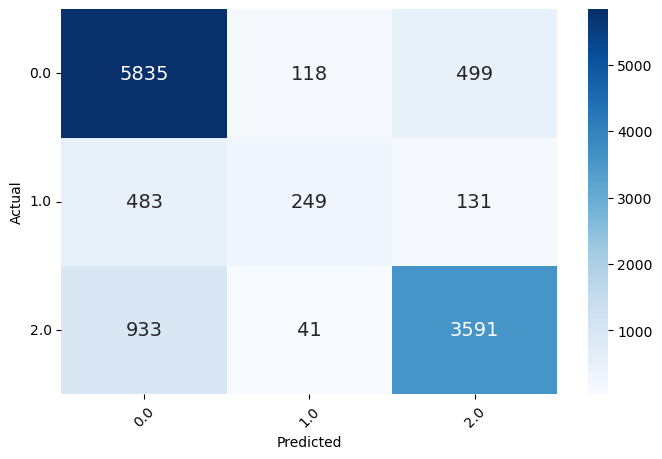

In [66]:
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [67]:
vc.fit(X, y)

#predict
submission = test_set.drop(['id', 'status_group'], axis=1)
submission['status_group'] = vc.predict(submission)

#bring the id column back
submission['id'] = test_set['id']

#create df for submission and save
best_submission = submission[['id', 'status_group']]
best_submission.head()

# Replaced the target variable with 0,1,2

replacement_dict = {0:'functional', 
                    1:'functional needs repair', 
                    2:'non functional'}
best_submission['status_group'] = best_submission['status_group'].replace(replacement_dict)

best_submission.to_csv('endfile2.csv', index=False)

#the best score of 0.8244 !!

Learning rate set to 0.097451
0:	learn: 1.0261560	total: 13.7ms	remaining: 13.6s
1:	learn: 0.9691502	total: 28.2ms	remaining: 14s
2:	learn: 0.9230950	total: 42.2ms	remaining: 14s
3:	learn: 0.8831360	total: 60.2ms	remaining: 15s
4:	learn: 0.8488270	total: 75.6ms	remaining: 15s
5:	learn: 0.8191212	total: 90ms	remaining: 14.9s
6:	learn: 0.7950508	total: 105ms	remaining: 14.9s
7:	learn: 0.7727720	total: 122ms	remaining: 15.1s
8:	learn: 0.7540228	total: 137ms	remaining: 15s
9:	learn: 0.7370291	total: 153ms	remaining: 15.1s
10:	learn: 0.7222184	total: 168ms	remaining: 15.1s
11:	learn: 0.7089885	total: 182ms	remaining: 15s
12:	learn: 0.6975655	total: 196ms	remaining: 14.9s
13:	learn: 0.6864504	total: 210ms	remaining: 14.8s
14:	learn: 0.6778177	total: 223ms	remaining: 14.6s
15:	learn: 0.6687443	total: 235ms	remaining: 14.4s
16:	learn: 0.6618773	total: 250ms	remaining: 14.4s
17:	learn: 0.6544168	total: 263ms	remaining: 14.3s
18:	learn: 0.6474451	total: 276ms	remaining: 14.3s
19:	learn: 0.641441

167:	learn: 0.4574420	total: 2.26s	remaining: 11.2s
168:	learn: 0.4571334	total: 2.27s	remaining: 11.2s
169:	learn: 0.4566605	total: 2.29s	remaining: 11.2s
170:	learn: 0.4560038	total: 2.3s	remaining: 11.1s
171:	learn: 0.4555074	total: 2.31s	remaining: 11.1s
172:	learn: 0.4552919	total: 2.33s	remaining: 11.1s
173:	learn: 0.4547566	total: 2.34s	remaining: 11.1s
174:	learn: 0.4544455	total: 2.35s	remaining: 11.1s
175:	learn: 0.4538981	total: 2.37s	remaining: 11.1s
176:	learn: 0.4534959	total: 2.38s	remaining: 11.1s
177:	learn: 0.4529840	total: 2.39s	remaining: 11s
178:	learn: 0.4524767	total: 2.41s	remaining: 11s
179:	learn: 0.4517385	total: 2.42s	remaining: 11s
180:	learn: 0.4512990	total: 2.43s	remaining: 11s
181:	learn: 0.4509619	total: 2.44s	remaining: 11s
182:	learn: 0.4506360	total: 2.46s	remaining: 11s
183:	learn: 0.4500846	total: 2.47s	remaining: 11s
184:	learn: 0.4495767	total: 2.48s	remaining: 10.9s
185:	learn: 0.4488969	total: 2.5s	remaining: 10.9s
186:	learn: 0.4486140	total:

339:	learn: 0.3997551	total: 4.56s	remaining: 8.85s
340:	learn: 0.3995755	total: 4.57s	remaining: 8.83s
341:	learn: 0.3993266	total: 4.58s	remaining: 8.82s
342:	learn: 0.3990700	total: 4.6s	remaining: 8.81s
343:	learn: 0.3988139	total: 4.61s	remaining: 8.79s
344:	learn: 0.3985385	total: 4.63s	remaining: 8.78s
345:	learn: 0.3983245	total: 4.64s	remaining: 8.77s
346:	learn: 0.3982084	total: 4.65s	remaining: 8.75s
347:	learn: 0.3980185	total: 4.67s	remaining: 8.74s
348:	learn: 0.3977456	total: 4.68s	remaining: 8.73s
349:	learn: 0.3975593	total: 4.69s	remaining: 8.71s
350:	learn: 0.3972418	total: 4.71s	remaining: 8.7s
351:	learn: 0.3969935	total: 4.72s	remaining: 8.69s
352:	learn: 0.3967697	total: 4.73s	remaining: 8.67s
353:	learn: 0.3965169	total: 4.75s	remaining: 8.66s
354:	learn: 0.3962088	total: 4.76s	remaining: 8.65s
355:	learn: 0.3960059	total: 4.77s	remaining: 8.63s
356:	learn: 0.3958103	total: 4.79s	remaining: 8.62s
357:	learn: 0.3955436	total: 4.8s	remaining: 8.61s
358:	learn: 0.3

513:	learn: 0.3615440	total: 6.84s	remaining: 6.47s
514:	learn: 0.3614628	total: 6.86s	remaining: 6.46s
515:	learn: 0.3613179	total: 6.87s	remaining: 6.44s
516:	learn: 0.3610529	total: 6.88s	remaining: 6.43s
517:	learn: 0.3608365	total: 6.9s	remaining: 6.42s
518:	learn: 0.3606414	total: 6.91s	remaining: 6.4s
519:	learn: 0.3604048	total: 6.92s	remaining: 6.39s
520:	learn: 0.3603039	total: 6.93s	remaining: 6.38s
521:	learn: 0.3601998	total: 6.95s	remaining: 6.36s
522:	learn: 0.3599836	total: 6.96s	remaining: 6.35s
523:	learn: 0.3597910	total: 6.97s	remaining: 6.33s
524:	learn: 0.3596986	total: 6.98s	remaining: 6.32s
525:	learn: 0.3596003	total: 7s	remaining: 6.3s
526:	learn: 0.3594185	total: 7.01s	remaining: 6.29s
527:	learn: 0.3591934	total: 7.02s	remaining: 6.28s
528:	learn: 0.3590600	total: 7.04s	remaining: 6.26s
529:	learn: 0.3588325	total: 7.05s	remaining: 6.25s
530:	learn: 0.3586427	total: 7.06s	remaining: 6.24s
531:	learn: 0.3583726	total: 7.07s	remaining: 6.22s
532:	learn: 0.3581

686:	learn: 0.3337924	total: 9.1s	remaining: 4.15s
687:	learn: 0.3336293	total: 9.12s	remaining: 4.13s
688:	learn: 0.3334137	total: 9.13s	remaining: 4.12s
689:	learn: 0.3333020	total: 9.14s	remaining: 4.11s
690:	learn: 0.3331784	total: 9.16s	remaining: 4.09s
691:	learn: 0.3330532	total: 9.17s	remaining: 4.08s
692:	learn: 0.3329337	total: 9.18s	remaining: 4.07s
693:	learn: 0.3328082	total: 9.2s	remaining: 4.05s
694:	learn: 0.3326736	total: 9.21s	remaining: 4.04s
695:	learn: 0.3325834	total: 9.22s	remaining: 4.03s
696:	learn: 0.3323662	total: 9.23s	remaining: 4.01s
697:	learn: 0.3321683	total: 9.25s	remaining: 4s
698:	learn: 0.3320755	total: 9.26s	remaining: 3.99s
699:	learn: 0.3319942	total: 9.27s	remaining: 3.97s
700:	learn: 0.3318681	total: 9.29s	remaining: 3.96s
701:	learn: 0.3316867	total: 9.3s	remaining: 3.95s
702:	learn: 0.3315718	total: 9.31s	remaining: 3.94s
703:	learn: 0.3314385	total: 9.33s	remaining: 3.92s
704:	learn: 0.3313082	total: 9.34s	remaining: 3.91s
705:	learn: 0.3311

857:	learn: 0.3132354	total: 11.4s	remaining: 1.88s
858:	learn: 0.3131025	total: 11.4s	remaining: 1.87s
859:	learn: 0.3129900	total: 11.4s	remaining: 1.85s
860:	learn: 0.3128996	total: 11.4s	remaining: 1.84s
861:	learn: 0.3128127	total: 11.4s	remaining: 1.83s
862:	learn: 0.3127250	total: 11.4s	remaining: 1.81s
863:	learn: 0.3126405	total: 11.4s	remaining: 1.8s
864:	learn: 0.3125671	total: 11.5s	remaining: 1.79s
865:	learn: 0.3124762	total: 11.5s	remaining: 1.77s
866:	learn: 0.3123349	total: 11.5s	remaining: 1.76s
867:	learn: 0.3122038	total: 11.5s	remaining: 1.75s
868:	learn: 0.3121291	total: 11.5s	remaining: 1.74s
869:	learn: 0.3120551	total: 11.5s	remaining: 1.72s
870:	learn: 0.3119748	total: 11.5s	remaining: 1.71s
871:	learn: 0.3119067	total: 11.6s	remaining: 1.7s
872:	learn: 0.3117953	total: 11.6s	remaining: 1.68s
873:	learn: 0.3117061	total: 11.6s	remaining: 1.67s
874:	learn: 0.3116325	total: 11.6s	remaining: 1.66s
875:	learn: 0.3115131	total: 11.6s	remaining: 1.64s
876:	learn: 0.

In [71]:
%pwd

'/Users/jasyot/Desktop/School/MMA/MMA 869 ML & AI/Project/Submissions'

In [ ]:
#OTHER METHODS:

In [ ]:
#CLUSTERING:

In [ ]:
#create a copy of the dataset
train_set_kmeans = train_set.copy()

#define X and y for training the model
X= train_set_kmeans.drop(['id', 'status_group'], axis=1)
y = train_set_kmeans['status_group']

In [ ]:
# transform data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

#create scaled df
scaled_data = pd.DataFrame(scaled_features , index=X.index, columns=X.columns)

In [ ]:
#Create an ellbow plot to determine the optimal number of clusters
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k).fit(scaled_data)
     
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o',  color =  '#66c2a5')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("Ellbow method")
plt.xticks(ks)
plt.show()

In [ ]:
#fit K means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state =11 )
kmeans.fit(scaled_data)

# Calculate the cluster labels: labels
clusters = kmeans.predict(scaled_data)
train_set_kmeans["cluster"] = clusters

In [ ]:
#calculate percentage of status groups per cluster
grouped = train_set_kmeans.groupby(['cluster', 'status_group'])['id'].count().reset_index()

pivot = grouped.pivot(index = ['cluster'], columns = 'status_group')
mi=pivot .columns
mi.tolist()
ind = pd.Index([ str(e[1])  for e in mi.tolist()])
pivot .columns = ind

pivot['Pumps (#)'] = pivot['functional'] + pivot['non functional'] + pivot['functional needs repair']
pivot['Functional pumps (%)'] = round(pivot['functional'] / pivot['Pumps (#)'],2)
pivot['Non-functional pumps (%)'] = round(pivot['non functional'] / pivot['Pumps (#)'],2)
pivot['Functional need repair pumps (%)'] = round(pivot['functional needs repair'] / pivot['Pumps (#)'],2)

pivot = pivot.drop(['functional', 'functional needs repair', 'non functional'],axis=1)
pivot = pivot.reset_index()
pivot

In [ ]:
#add the cluster means to the dataframes
train_set_kmeans = train_set_kmeans.merge(pivot[['cluster', 'Functional pumps (%)', 'Non-functional pumps (%)', 'Functional need repair pumps (%)']], how = 'left', on = 'cluster')
train_set_kmeans.head()